In [1]:

import pandas as pd
import numpy as np
import random
from scipy.stats import loguniform, lognorm
from scipy import stats
import time
import math
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Load and format the data

In [4]:
import pandas as pd
import numpy as np

def npy2df(input_file, return_gene_info=False):
    """
    Load the npy file with X number of bursting parameter estimation for a given gene. 
    if return_gene_info is True : 
        return the df containing the estimation, the gene index number (starting from 1, not 0) and a gene array of some sort?
    else: return the dataframe with the parameter estimation as column and each estimation attemps as rows
        
    """
    gene_no, gene, result = np.load(input_file, allow_pickle='True')
    
    result_flatten = result.flatten()
    df = pd.DataFrame([x for x in result_flatten])
    
    if return_gene_info:
        return(df, gene_no, gene)
    else:
        return(df)

In [5]:
%ls ./posterior/

gene_Fh1.npy  gene_names.txt


In [6]:
df = npy2df('./posterior/gene_Fh1.npy')
df

,kon,ron,koff,roff,mu,delta,dist
0,4.532311,9.236297,1.402771,1.643830,98.380989,1.0,0.274666
1,2.412495,6.052100,2.534706,6.625224,113.777361,1.0,0.327767
2,6.366312,14.505751,2.645333,5.125228,151.539727,1.0,0.309247
3,10.992992,18.563614,1.402629,1.115317,83.907614,1.0,0.352684
4,6.317921,10.510005,8.825892,15.085610,138.388045,1.0,0.271651
...,...,...,...,...,...,...,...
4995,1.274044,2.858253,2.420984,3.944639,77.123102,1.0,0.645964
4996,5.411791,11.966271,3.562691,5.847303,99.513757,1.0,0.535663
4997,3.521019,7.949049,5.816684,16.650460,172.366368,1.0,0.271080
4998,1.990243,6.853242,3.269729,19.697935,198.778096,1.0,0.236898


In [7]:
def BFandBS(df):
    """
    input is the dataframe containing the parameters as columns.
    need column named 'koff', 'roff', 'kon', 'ron' 
    
    compute burst frequency and burst size from the parameters
    """
    df['tau_off']= df['kon']/df['ron']
    df['tau_on'] = df['koff']/df['roff']
    df['bf'] = 1./(df['tau_on'] + df['tau_off'])
    df['bs'] = df['mu'] * df['tau_on']

In [8]:
BFandBS(df)
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs
0,4.532311,9.236297,1.402771,1.643830,98.380989,1.0,0.274666,0.490706,0.853356,0.744013,83.953963
1,2.412495,6.052100,2.534706,6.625224,113.777361,1.0,0.327767,0.398621,0.382584,1.280073,43.529423
2,6.366312,14.505751,2.645333,5.125228,151.539727,1.0,0.309247,0.438882,0.516140,1.047097,78.215642
3,10.992992,18.563614,1.402629,1.115317,83.907614,1.0,0.352684,0.592180,1.257606,0.540603,105.522735
4,6.317921,10.510005,8.825892,15.085610,138.388045,1.0,0.271651,0.601134,0.585054,0.843037,80.964439
...,...,...,...,...,...,...,...,...,...,...,...
4995,1.274044,2.858253,2.420984,3.944639,77.123102,1.0,0.645964,0.445742,0.613740,0.943857,47.333553
4996,5.411791,11.966271,3.562691,5.847303,99.513757,1.0,0.535663,0.452254,0.609288,0.942026,60.632523
4997,3.521019,7.949049,5.816684,16.650460,172.366368,1.0,0.271080,0.442948,0.349341,1.262166,60.214593
4998,1.990243,6.853242,3.269729,19.697935,198.778096,1.0,0.236898,0.290409,0.165993,2.191049,32.995866


In [9]:
df['log_kon'] = [np.log10(x) for x in df['kon']]
df['log_koff'] = [np.log10(x) for x in df['koff']]

In [10]:
df['log_bs'] = [np.log10(x) for x in df['bs']]
df['log_bf'] = [np.log10(x) for x in df['bf']]

# Smooth kernel density 

Kernel density estimate KDE


In [22]:
from scipy.stats import gaussian_kde
def best_parameters(df, density_kernel_name=None, save_kde="density_kernel"):
    """
    return the index for the best parameters.
    
    if density_kernel_name is None , we recompute the gaussian kde and if save_kde is a str. 
    Save the kde in df using save_kde as column name
    """
    
    if density_kernel_name is None:
        # Calculate the point density
        xy = np.vstack([df['bs'],df['bf']])
        z = gaussian_kde(xy)(xy)
        if save_kde is not False:
            df[save_kde] = z
            
    else:
        z = df[density_kernel_name]
    
    return(np.where(z == np.amax(z))[0][0])

        

In [23]:
best_parameters(df)

2851

In [24]:
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs,log_kon,log_koff,log_bs,log_bf,True,density_kernel
0,4.532311,9.236297,1.402771,1.643830,98.380989,1.0,0.274666,0.490706,0.853356,0.744013,83.953963,0.656320,0.146987,1.924041,-0.128419,0.012759,0.012759
1,2.412495,6.052100,2.534706,6.625224,113.777361,1.0,0.327767,0.398621,0.382584,1.280073,43.529423,0.382466,0.403928,1.638783,0.107235,0.011586,0.011586
2,6.366312,14.505751,2.645333,5.125228,151.539727,1.0,0.309247,0.438882,0.516140,1.047097,78.215642,0.803888,0.422480,1.893294,0.019987,0.008467,0.008467
3,10.992992,18.563614,1.402629,1.115317,83.907614,1.0,0.352684,0.592180,1.257606,0.540603,105.522735,1.041116,0.146943,2.023346,-0.267121,0.009377,0.009377
4,6.317921,10.510005,8.825892,15.085610,138.388045,1.0,0.271651,0.601134,0.585054,0.843037,80.964439,0.800574,0.945759,1.908294,-0.074153,0.012799,0.012799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.274044,2.858253,2.420984,3.944639,77.123102,1.0,0.645964,0.445742,0.613740,0.943857,47.333553,0.105184,0.383992,1.675169,-0.025094,0.005948,0.005948
4996,5.411791,11.966271,3.562691,5.847303,99.513757,1.0,0.535663,0.452254,0.609288,0.942026,60.632523,0.733341,0.551778,1.782706,-0.025937,0.013356,0.013356
4997,3.521019,7.949049,5.816684,16.650460,172.366368,1.0,0.271080,0.442948,0.349341,1.262166,60.214593,0.546668,0.764675,1.779702,0.101116,0.011511,0.011511
4998,1.990243,6.853242,3.269729,19.697935,198.778096,1.0,0.236898,0.290409,0.165993,2.191049,32.995866,0.298906,0.514512,1.518460,0.340652,0.004061,0.004061


In [25]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.color_palette("viridis")

def plot_kde(df, bs, bf, kde="density_kernel",
             title=None, dot_size=4, colormap='viridis',
             best_param=True,
             linestype='-', color_line='grey',
             norm_scale=True,
             show=True,
             save=None):
    """
    

    --> put the line with best parameter as an option..
    
    --> later we need to create a wrapper function to give a adata objet + a gene name
    
    df
    bs
    df
    kde="density_kernel"
    title
    size
    colormap
    best_param
    linestype
    color_line
    norm_scale
    show
    save
    """
    
    # scatter plot
    if norm_scale:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, size_norm=(0,1),
                              palette=colormap, s=dot_size)
    else:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, hue_norm=(np.min(df['density_kernel']),
                                                 np.max(df['density_kernel'])),
                              palette=colormap, s=dot_size)
    
    if title is not None: 
        fig.set_title(title)
    
    #plt.legend(loc=legend_loc)
    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0,
              title='kernel density')
    
    if best_param : 
    
        # Add the best parameter estimation based on the density kernel
        index_max_parameter = best_parameters(df, save_kde="density_kernel")
        xmax = df[bs][index_max_parameter]
        ymax = df[bf][index_max_parameter]
        fig.axvline(ymax, color="grey", linestyle="-.", linewidth=0.5) #linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        fig.axhline(xmax, color="grey", linestyle="-.", linewidth=0.5)
    
    
    # plot / saving settings
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    if show :
        plt.show()

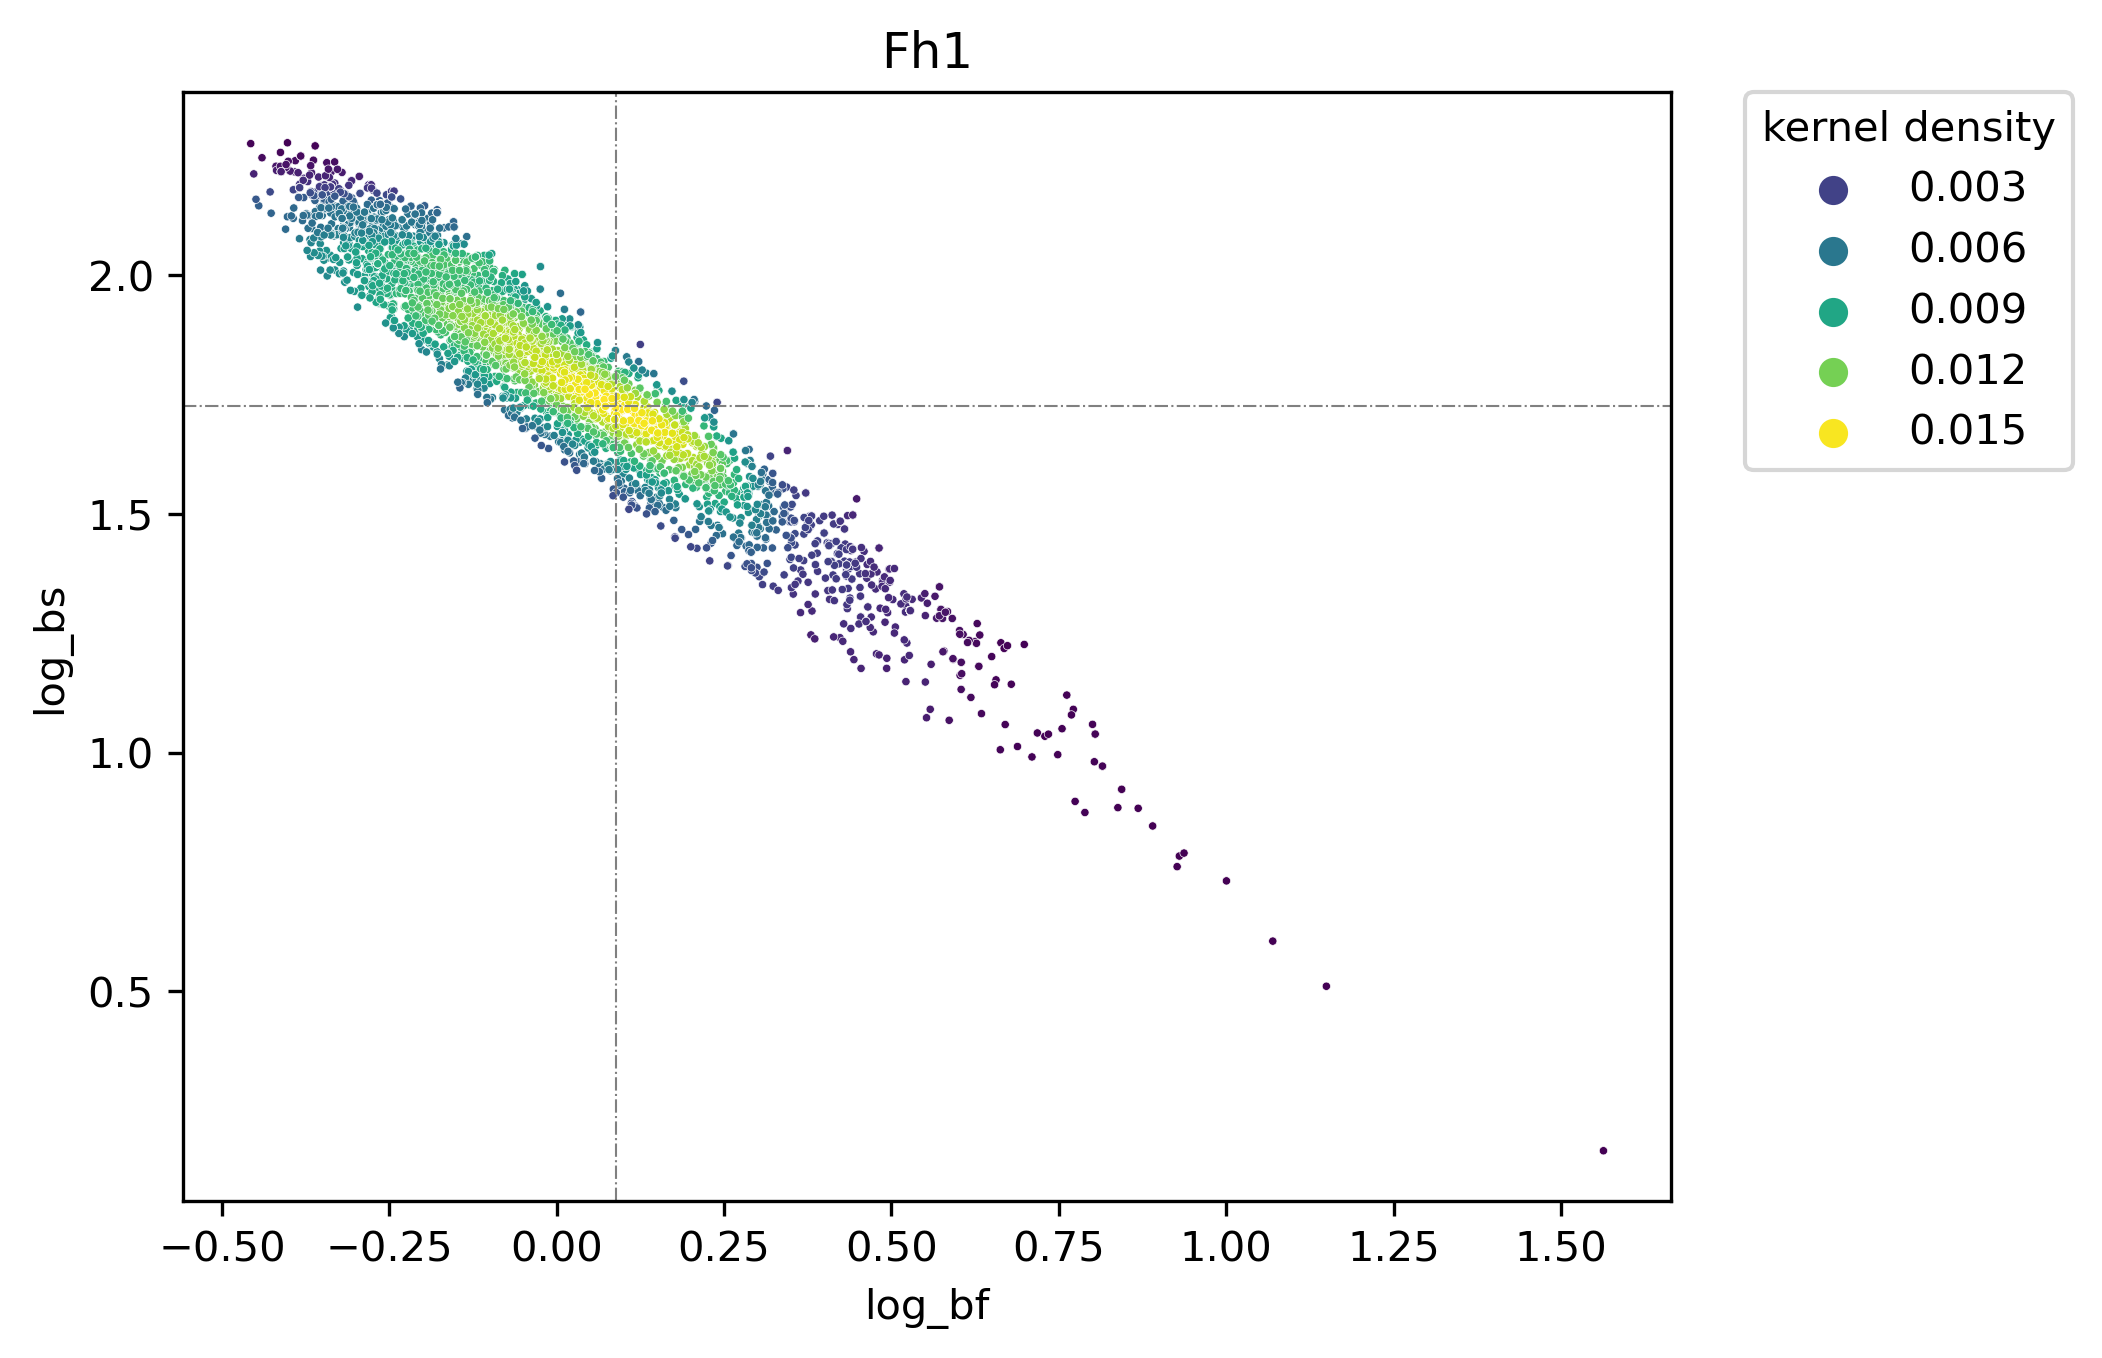

In [26]:
plot_kde(df, bs="log_bs", bf="log_bf", title="Fh1", dot_size=4, save="Fh1_kde_scatterplot.png")

In [27]:
# normalise the kernel density scale between 0 and 1 
sns.scatterplot?

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAACDYAAAVOCAYAAACDzyuTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy89olMNAAAACXBIWXMAAC4jAAAuIwF4pT92AAEAAElEQVR4nOzdd3RU1d7G8WcmmfReSei9946giNJEBARFihQVG1exoGDHXlCwclFQUREFCyhekA7Se+8tCSQE0nub8v7By+CQBBIISYDvZy3Wyt5n77N/MzcGbs4zextsNptNAAAAAAAAAAAAAAAA5ZCxrAsAAAAAAAAAAAAAAAAoDMEGAAAAAAAAAAAAAABQbhFsAAAAAAAAAAAAAAAA5RbBBgAAAAAAAAAAAAAAUG4RbAAAAAAAAAAAAAAAAOUWwQYAAAAAAAAAAAAAAFBuEWwAAAAAAAAAAAAAAADlFsEGAAAAAAAAAAAAAABQbhFsAAAAAAAAAAAAAAAA5RbBBgAAAAAAAAAAAAAAUG4RbAAAAAAAAAAAAAAAAOUWwQYAAAAAAAAAAAAAAFBuEWwAAAAAAAAAAAAAAADlFsEGAAAAAAAAAAAAAABQbhFsAAAAAAAAAAAAAAAA5RbBBgAAAAAAAAAAAAAAUG4RbAAAAAAAAAAAAAAAAOUWwQYAAAAAAAAAAAAAAFBuEWwAAAAAAAAAAAAAAADlFsEGAAAAAAAAAAAAAABQbhFsAAAAAAAAAAAAAAAA5RbBBgAAAAAAAAAAAAAAUG4RbAAAAAAAAAAAAAAAAOUWwQYAAAAAAAAAAAAAAFBuEWwAAAAAAAAAAAAAAADlFsEGAAAAAAAAAAAAAABQbhFsAAAAAAAAAAAAAAAA5RbBBgAAAAAAAAAAAAAAUG4RbAAAAAAAAAAAAAAAAOUWwQYAAAAAQLF07txZBoPB/qdz585lXRIAAAAAAACuYwQbAAAAAAAAAAAAAABAuUWwAQAAAACucREREQ47KJTEn2bNmpX1yyqy3Nxcbdu2TV999ZUefvhhtWjRQi4uLvle04wZM8q6VAAAAAAAAFwG57IuAAAAAACA4khPT9fs2bO1ZcsWbdmyRbt27VJubm5ZlwUAAAAAAICrhGADAAAAAOCacuTIET300ENlXQYAAAAAAABKCcEGAAAAALgOeXp6qlatWpc9v27duiVYDQAAAAAAAHD5CDYAAAAAwHWoVatWWrlyZVmXUeqqVKmiVq1aKS4uTqtXry7rcgAAAAAAAFACCDYAAAAAAK5J4eHhatWqlf1P69atFRQUJEmaMGECwQYAAAAAAIDrBMEGAAAAAMA1pU6dOjp16pQqVKhQ1qUAAAAAAACgFBBsAAAAAABcUzw8POTh4VHWZQAAAAAAAKCUEGwAAAAAAFwVcXFx2rBhg44dO6b09HT5+voqJCREbdu2VdWqVcu6PAAAAAAAAFwjCDYAAAAAAErUypUr9c4772jZsmWyWq0FjmnQoIFefPFFDR48WAaDoZQrBAAAAAAAwLXEWNYFAAAAAACuDzk5ORo1apRuvfVWLVmypNBQgyTt27dPQ4cOVY8ePZSRkVGKVQIAAAAAAOBaQ7ABAAAAAHDFsrOz1bNnT02fPr1Y8xYvXqw77rhDFovlKlUGAAAAAACAax1HUQAAAAAArtgDDzygFStW2Nt169ZVz549Va9ePQUEBCglJUXbt2/Xb7/9ptOnTzvM/eeffzR58mSNHTu2tMsGAAAAAADANYBgAwAAAADgimzcuFHZ2dmSpAoVKuizzz7TgAEDChz7/vvva/To0fr+++8d+t9++22NHj1a7u7uV71eAAAAAAAAXFs4igIAAAAAcEXOhRpq1KihDRs2FBpqkCQvLy/NmDFD3bt3d+hPTk7Wb7/9dlXrBAAAAAAAwLWJHRsAAAAA4Dq0ZcsWNWvW7LLmTp8+Xa1atSrWHJPJpDlz5qhq1aqXHGswGDRp0iQ1bNjQoX/RokUaOnRosdYFAAAAAADA9Y9gAwAAAABchzIyMrRz587Lmpuenl7sOYMHD1bLli2LPL5BgwZq0aKFtm3bZu/bunVrsdcFAAAAAADA9Y+jKAAAAAAAV2zUqFHFntOmTRuH9qFDh0qqHAAAAAAAAFxHCDYAAAAAAK6Iu7t7vpBCUdSsWdOhbbFYLmu3CAAAAAAAAFzfOIoCAAAAAK5Dt9xyi1auXFkqa1WtWlUmk6nY83x9ffP1paSkyMvLqyTKAgAAAAAAwHWCHRsAAAAAAFckICDgsuYVFIbIy8u70nIAAAAAAABwnSHYAAAAAAC4IpezWwMAAAAAAABQVAQbAAAAAAAAAAAAAABAuUWwAQAAAAAAAAAAAAAAlFsEGwAAAAAAAAAAAAAAQLlFsAEAAAAAAAAAAAAAAJRbBBsAAAAAAAAAAAAAAEC5RbABAAAAAAAAAAAAAACUWwQbAAAAAAAAAAAAAABAuUWwAQAAAAAAAAAAAAAAlFsEGwAAAAAAAAAAAAAAQLlFsAEAAAAAAAAAAAAAAJRbzmVdAAAAAAAAxTV16lRNnTq10OuxsbH5+l599VV9/PHHhc559NFH9eijj5ZEeQAAAAAAAChBBBsAAAAAANec2NhY7dy5s1hzTpw4oRMnTlz0ngAAAAAAACh/OIoCAAAAAAAAAAAAAACUWwQbAAAAAAAAAAAAAABAuWWw2Wy2si4CAAAAAAAAAAAAAACgIOzYAAAAAAAAAAAAAAAAyi2CDQAAAAAAAAAAAAAAoNwi2AAAAAAAAAAAAAAAAMotgg0AAAAAAAAAAAAAAKDcItgAAAAAAAAAAAAAAADKLYINAAAAAAAAAAAAAACg3CLYAAAAAAAAAAAAAAAAyi2CDQAAAAAAAAAAAAAAoNwi2AAAAAAAAAAAAAAAAMotgg0AAAAAAAAAAAAAAKDcItgAAAAAAAAAAAAAAADKLYINAAAAAAAAAAAAAACg3CLYAAAAAAAAAAAAAAAAyi2CDQAAAAAAAAAAAAAAoNwi2AAAAAAAAAAAAAAAAMotgg0AAAAAAAAAAAAAAKDcItgAAAAAAAAAAAAAAADKLYINAAAAAAAAAAAAAACg3CLYAAAAAAAAAAAAAAAAyi2CDQAAAAAAAAAAAAAAoNxyLusCAAAAAAAAAAAAgGuJzWaT1WqVzWYr61IAoEQZDAYZjUYZDIayLsUBwQZcd5KTk7Vq1Sp7u3LlynJ1dS3DigAAAAAAAAAAKHs5OTk6ceKEvX3LLbfIz8+v7Aq6hthsNmVmZio1NVXp6ekym81lXRIAXFXOzs7y8vKSj4+PPDw8yjzoYLARJcN15o8//lDfvn3LugwAAAAAAAAAAMq1efPmqU+fPmVdRrlms9l05swZpaSkyGKxlHU5AFAmnJyc5Ovrq5CQkDILOLBjAwAAAAAAAAAAAHABm82mmJgYpaamlnUpAFCmLBaLEhMTZTabFR4eXibhBmOprwgAAAAAAAAAAACUY4QaACC/1NRUxcTEqCwOhWDHBlx3Kleu7NCeN2+eatWqVUbVAABQdHl5eZo2bZokadSoUTKZTGVcEQAAAAAAuJ4cOXLE4SjnC3+fjvPOnDlTYKjBzc1N3t7e8vT0lLOzc5mfOQ8AJc1ms8lsNisjI0NpaWnKzs52uJ6amipnZ2eFhoaWal0EG3DdcXV1dWjXqlVLDRs2LKNqAAAoutzcXIWEhEiSGjRoIBcXlzKuCAAAAAAAXM8u/H06zrLZbEpJSXHoMxgMqlSpkry8vMqoKgAoPSaTSe7u7goKClJ6erpOnjzpsEtDSkqKQkJCSjXcxVEUAAAA5YTBYFBwcLCCg4NJ+wMAAAAAAJSRzMxMWSwWhz5CDQBuVF5eXqpUqZJDn8ViUWZmZqnWwY4NAAAA5YTJZNLjjz9e1mUAAAAAAADc0C48gsLNzY1QA4AbmpeXl9zc3ByOpUhNTZWnp2ep1cCODQAAAAAAAAAAAMD/S09Pd2h7e3uXUSUAUH5c+LPwwp+VVxvBBgAAAAAAAAAAAECSzWaT2Wx26CvNTyQDQHl14c9Cs9ksm81WautzFAUAAEA5kZeXp2nTpkmSRo0aJZPJVMYVAQAAAAAA3FisVmu+PmdnHqcBgJOTU74+q9VaYP/VwE9iAACAcsJmsykuLs7+NQAAAAAAAEpXQb+TMRgMZVAJAJQvRmP+wyDYsQEAAOAG5OzsrOHDh9u/BgAAAAAAAAAABBsAAADKDaPRqGrVqpV1GQAAAAAAAAAAlCv594sAAAAAAAAAAAAAAAAoJ9ixAQAAoJywWCzaunWrJKlly5ZycnIq44oAAAAAAAAAACh7BBsAAADKCYvFooULF0qSmjVrRrABAAAAAAAAAABxFAUAAAAAAAAAAAAAACjHCDYAAAAAAAAAAAAAAIByi2ADAAAAAAAAAAAAAAAotwg2AAAAAAAAAAAAAFfZypUrZTAY7H8mTJhQ1iXhCk2YMMHhf9OVK1eWdUkOOnfu7FAfrtyIESMc3tOIiIiyLumGQbABAAAAAAAAAAAAAACUWwQbAAAAAAAAAAAAAAAoQREREQ67O4wYMaKsS7qmEWwAAAAAAAAAAAAAAADlFsEGAAAAAAAAAAAAAABQbhFsAAAAAAAAAAAAAADgEmbMmCGbzWb/U61atbIu6YZBsAEAAAAAAAAAAAAAAJRbBBsAAAAAAAAAAAAAAEC55VzWBQAAAOA8Dw+Psi4BAAAAAAAA14ns7GytX79eUVFRiouLk81mU3BwsGrVqqV27drJ2blkHxVGRkZq+/btOnXqlBITE+Xn56d+/fopPDy8yPWuWbNGkZGROnPmjHx8fFS1alXdfPPN8vHxKZEa9+3bp927dysuLk6pqakKCAhQWFiYOnbsqMDAwBJZ42o7cuSINm3apJiYGDk7O6tixYpq1KiR6tevX+Jrmc1mbdq0SceOHVNcXJxycnIUHBysatWq6aabbpKbm1uJrhcfH69169bp5MmTSklJUWBgoOrVq6f27dvLZDJd9n1PnDihHTt2KCoqSmlpabJYLPLw8LC/lsaNG8vX17cEXwlKGsEGAACAcsLFxUXPPfdcWZcBAAAAAACAciQ6Olq9e/fW9u3b7X3t2rXTH3/8oZCQkALnbNy4UW+//baWLl2qrKysAsf4+Pho0KBBevXVV4scPDAYDPavb7nlFq1cuVKSNG/ePH3wwQfasGGDbDabw5yKFSuqb9++kqQRI0bou+++s187fvy4qlWrpuTkZL3yyiuaOXOmkpOT863r7OyswYMH65133lHFihWLVOu/JSQkaOLEiZo5c6aio6MLHGM0GtWhQwe99tpruv3224u9RmlYsmSJxo8fr23bthV4vUWLFnrmmWc0ZMiQK15r//79euutt/TXX38pNTW1wDHu7u6666679MYbb6hOnTpFum+1atUUGRkpSapataoiIiLs67344ov63//+p7y8vHzzfHx89Oyzz+q5556Tu7t7kdayWq365ptv9MUXX2jHjh0XHWswGNSgQQP17t1bTz/9dKH/bRX2PVzYa/y37777zmHuhb799luNGDFCGzduVLt27ez9nTt31ooVKy5af0E+//xzPfHEE/b22LFjNXHixGLfp7zgKAoAAAAAAAAAAACgHNq2bZvatGnjEGoYOHCgVqxYUeCD18zMTA0ePFjt2rXT/PnzCw01SFJqaqq+/PJL1a5dW7/++utl1Wc2m/XQQw+pX79+Wr9+fb5QQ1Fs2rRJzZo10+eff15gqOHcOt9//71at26tXbt2Fev+33//vWrUqKH333+/0FCDdPYh+Jo1a9S1a1fdf//9ys3NLdY6V5PNZtMTTzyhbt26FRpqkM5+vwwdOlRDhw6V2Wy+rLUsFouefvppNWrUSLNmzSo01CBJWVlZmj17tho2bKhPPvnkstaTzj7Qb9WqlebNm1dgqEE6+/362muvqWvXroV+n/xbcnKyOnfurFGjRl0y1CCdfY/37t2r9957r9jfYyWtbdu2atmypb29cuVKHTx4sNj3+fLLL+1fGwwGPfLIIyVSX1lhxwYAAAAAAAAAAACgnJk3b56GDBmizMxMe99LL72kN99802HnhHPi4uLUo0ePfA++3d3d1bx5c4WHh8vJyUknTpzQ5s2b7Q+QMzMzde+992r69Ol64IEHilXj2LFj9fXXX9vbdevWVZ06deTp6alTp05p8+bNF51/6NAhDRo0SImJiZIkf39/tWrVSkFBQcrIyNCWLVsUExNjH3/q1Cn169dPu3btkqen5yXre/XVV/Xmm2869BkMBtWtW1e1a9eWt7e3kpKStGXLFsXFxdnHzJw5U6dOndLff/9d4sd1XI7HH39cU6dOdegzGo1q1aqVqlatqtzcXO3fv1+HDh2SJP3444/y8/Mr9jpZWVnq27evFi9e7NBvMpnUrFkzVapUSa6uroqNjdWmTZvs35tms1lPPfWUkpKSNGHChGKt+csvv+jBBx+0h2KqVq2qRo0aydfXV3FxcdqwYYPS0tLs49euXatHHnlEs2fPvuh97733Xq1evdqhz8vLS02bNlV4eLhcXV2Vnp6uM2fOaN++fUUKS5Sm0aNHO/z3OHXqVE2ePLnI89esWaM9e/bY27fffrtq1apVojWWtrL/LxEAAACSpLy8PP3444+SpCFDhlzRmXEAAAAAAAC4dn344YcaN26crFarpLNHmE6fPl33339/geOtVqsGDRrkEGoIDw/XW2+9pcGDB8vV1dVhfHJysj744AO9//77slqtstlsGj16tFq2bKmmTZsWqcZt27Zp1apVkqRevXpp4sSJql+/vsOYtLQ05eTkFHqPIUOGKDExUVWrVtWHH36ofv36ycnJyX7dZrNp1qxZevjhh+0P0Y8dO6ZJkybplVdeuWh93333nUOowWg0avTo0Ro7dqyqVKniMNZms+mPP/7QmDFjFBUVJUlatmyZXnnlFb377rtFeDeunl9//TVfqGHIkCH64IMP8h0hsnHjRj322GPavn27vvjiC/n7+xdrrdGjRzuEGnx9fTVhwgQ9+OCD8vb2dhiblZWlKVOm6OWXX1Z2drYk6Y033lDbtm3Vs2fPIq0XHx+v4cOHy2az6eabb9aHH36o1q1b51vnjTfe0HvvvWfvmzNnjv7zn/+oU6dOBd530aJFWrJkib0dGBioTz75RPfee2+hv3Pdu3evFixY4BDUuVxr1qyR2WzWyZMnHWrs37+/Pvzww0LnBQUF2b++7777NHbsWHvo57vvvtO7774rNze3ItVw4ffMY489VpyXUC5xFAUAAEA5YbPZFBkZqcjIyMvatg8AAAAAAADXtry8PI0aNUrPPfecPdQQGBioJUuWFBpqkKSPPvpIy5Yts7dbtGihXbt2aeTIkflCDZLk5+end955R7Nnz7bv/pCdna2nn366yLWe+xT9I488ovnz5+cLNUiSt7e3w8PaC8XHx6thw4bavHmzBgwY4BBqkM7urjBkyBD7h4HOmT59+kV/fxYZGenwINfV1VX/+9//9Omnn+YLNZxbp2/fvtq8ebPDp9onTpyo48ePF7rO1ZaVlaXRo0c79I0bN04zZ87MF2qQzh5hsHr1anXo0EGSlJSUVOS1fvnlF3377bf2dtWqVbVjxw499dRT+UIN0tmdQJ599lktW7bM/rDdZrPpySeftH/vXkpGRoaysrI0ePBgLVu2LF+o4dw67777rsaMGePQ/9VXXxV63z/++MOh/euvv17yg2QNGzbUc889p/379xcamCiqSpUqqVq1aqpUqZJDv5eXl6pVq1boHy8vL/tYd3d3jRw50t5OSkrSnDlzirR+QkKCw/Ey4eHh6t279xW9pvKAYAMAAEA54ezsrAEDBmjAgAHlYos7AAAAAAAAlJ7k5GT16NFD06dPt/fVqVNHGzZs0M0331zovKysLE2cONHe9vX11V9//aXAwMBLrjlgwACHAMCKFSvyHWVxMfXr19enn35a4NEYReHs7KxffvlFwcHBFx3Xt29ftWrVyt6OiorSkSNHCh0/ceJEZWVl2duTJ09Wjx49LllPSEiIZs2aZW9bLJZibf9f0n766SedOXPG3m7durXeeeedi87x9PTUTz/9VKSjOs6x2Wx644037G1nZ2f9+eefqlat2iXndujQwWHukSNHNG/evCKvXatWLU2fPv2Svw999dVX5eLiYm8vX7680LGRkZH2rwMDA9W5c+ci12MwGAoMA5WFxx57zOG/rQt3YSjMt99+67BTyqhRo66L3zcTbAAAACgnjEajGjZsqIYNG8po5J9pAAAAAAAAN4qjR4+qXbt2Dg9rO3furA0bNjjsIFCQn376SXFxcfb2U089pbCwsCKv/eyzzzq0//zzzyLPfeaZZxweNhdX//79C9zpoSB33nmnQ3v79u0FjsvIyNA333xjb9eoUUOPPPJIkWtq3bq1wyf2i/N+lLTvv//eoT1hwoQi/d6wSpUqGjVqVJHXWbFihfbs2WNvDxkyRE2aNCny/NGjRzsckVCc9+zZZ5+Vu7v7JccFBATYd6KQpJiYGIfQR2FSU1PtR2Vca2rWrOkQyFm/fr127dp10Tk2m81hNwsnJyc99NBDV63G0sRvzAEAAAAAAAAAAIAysnr1arVt21YHDx60940YMUKLFy+Wv7//JecvWbLEoT1w4MBirV+jRg2H4xlWr15d5Ll9+vQp1loX6tWrV5HHXhiAKOyh9po1axx2axgwYECxP0R066232r+OjIxUVFRUseaXhLy8PG3atMneDggIUPfu3Ys8f8iQIUUee6XfQx4eHmrTpo29XZzvoavxPVCvXj3713l5eXr++eev2aN/LzyK5Msvv7zo+GXLlunw4cP2du/evfMdiXGtuvb3nAAAALhOWK1W7d+/X9LZf6SzawMAAAAAAMD17YcfftBDDz2k3NxcSWe3wX/rrbf04osvFvkea9assX/t4uIiV1dXRUREFKuOgIAA+8P7o0ePFmlOpUqVLnmExKU0aNCgyGMvDHmkpKQUOO7f74ckhYeHF/v9uHAXimPHjjmEP0rD3r17HQIaLVu2lJOTU5HnN2vWTK6urg5HEhTmwvcsICCg2O+Zj4+P/euIiAhZrdZL/n7Ty8tLlStXLvIaRf0eGDRokCZNmmRvf/bZZ1q1apUefPBB9e7dW9WrVy/ymmWtZ8+eql69uo4fPy5Jmjlzpj744INCjxq58LiKRx999KrXWFoINgAAAJQTZrNZv/76qyTphRdeuKJt/AAAAAAAAFC+/fDDDzp27Ji97e7uru+//14DBgwo8j2sVqtiYmLs7dzcXNWsWfOK6kpMTCzSuJCQkCtaR8r/oPpiTCaTQzsvL6/AcSdOnHBoP/XUU3rqqaeKXdu/FfU9KUmnT592aNeuXbtY852dnVW9enUdOHDgkmMvfM/atWtXrLUuZLValZycrICAgIuOK87//lLRvwdatWqlp556Sh9//LG9b9euXRozZozGjBmjypUrq0OHDurQoYNuvvlmNW3aVAaDoVi1lBaj0ahHH31U48aNk3T2aI1Zs2YVeNRIbGys/vjjD3u7Ro0a6tatW6nVerXxMUAAAAAAAAAAAACglP071CCd3ZK/f//+xbpHUlKSrFZrSZaltLS0Io3z9va+4rWuxo6lCQkJJX7Por4nJSkpKcmh/e8dEYrK19e3SOPK6j27mjvWTp48WZMnTy7wPThx4oRmz56tMWPGqHnz5qpcubLGjh2rkydPXrV6rsSDDz4oNzc3e7uw4yimT58us9lsbz/yyCPlNrBxOQg2AAAAAAAAAAAAAKWsS5cuDtvJ//rrrxo+fLjDg8lLOXeEBc67Gu+JzWYr8XsW19V8QH29vmdPPfWUIiMj9d///lfdunUr9PiG6OhoffTRR6pVq5Y++eSTUq7y0gIDAzVw4EB7e+vWrdqyZYvDGKvVqunTp9vbrq6uGjlyZKnVWBoINgAAAAAAAAAAAAClrFOnTlqyZInDdvw//PCD+vfvr+zs7CLdIzAw0KFdp04d2Wy2K/5zLQsKCnJor1u37orfjxEjRpT667jwmIaUlJRi36Ooc/79nrm5uclqtV7xe1atWrVi13s1+Pr66tFHH9WiRYuUnJysrVu36vPPP9fAgQPzHZWRk5Ojp556Sp9++mkZVVu40aNHO7SnTp3q0F6wYIEiIyPt7f79+ys4OLhUaistBBsAAAAAAAAAAACAMtC+fXutWrVKYWFh9r4///xTPXv2LNJW/i4uLg4PwI8fP668vLyrUuu1IjQ01KF96NChMqrkylz4Og4fPlys+WazWcePHy/2WtnZ2YqKiirWWtcKZ2dntWjRQqNHj9bPP/+sM2fOaMGCBWrdurXDuJdeeknJycllU2QhWrdu7VDnzz//7BBcuTDo8Nhjj5VabaWFYAMAAAAAAAAAAABQRho3bqw1a9aoRo0a9r6VK1fq1ltvVXx8/CXnd+jQwf51Xl6eVq5ceTXKvGb8+/2QpMWLF5dRJVemYcOGcnd3t7e3bt1arGNKduzYoZycnCKNvV7es+JycnJSz549tXr1ajVv3tzen56eriVLllzx/Uv6+JDHH3/c/nVGRoZmzpwpSYqKitLChQvt1xo2bKiOHTuW6NrlAcEGAAAAAAAAAAAAoAzVqFFDa9asUaNGjex9W7duVadOnXTixImLzu3evbtDe9q0aVelxmvFbbfdJicnJ3v7zz//1JkzZ8qwostjMpnUpk0bezsxMVGLFi0q8vwff/yxyGMv/B6aPn16kedeD1xdXTV06FCHvqLudnGp+/5bUYMmhbnvvvscjp/58ssvJUlfffWVrFarvf963K1BItgAAAAAAAAAAAAAlLmwsDD9888/ateunb3vwIED6tix40WPU7j//vvl5+dnb//yyy9atmzZ1Sy1XPP399eQIUPs7fT0dI0dO7YMK7p8w4YNc2i//vrrDg+wCxMVFVWsgEvPnj1Vs2ZNe3vTpk365ptvil7odcDZ2dmhfWEo4XL8+79LSTp16tQV3c/NzU0PPPCAvb17926tWrXK4X8rT09P3X///Ve0TnlFsAEAAAAAAAAAAAAoB/z9/bV06VJ169bN3hcVFaWOHTtq+/btBc7x8/PTc88959A3YMAArVmzplhrWywW/f7770pMTCx+4eXMhAkTHB5M//DDDxo3bpwsFkux7rNv3z79888/JV1ekQ0aNEghISH29ubNm/XSSy9ddE5mZqYGDRqkjIyMIq/j7OysN954w6Hvscce0++//168giUtXbpUx44dK/a8kvTxxx8X6RiXcywWi2bNmuXQV79+/Suuw83NTdWqVbO3N2/erOTk5Cu652OPPSaj8fwj/mHDhjkEJgYPHiwfH58rWqO8ItgAAAAAAAAAAAAAlBOenp6aP3++BgwYYO+Li4tT586dC33I/vzzzzuEIZKTk9W5c2eNHj1aBw8eLHStvLw8rVu3TuPGjVPNmjXVv39/paamltyLKSPVq1fXV1995dD3wQcfqGPHjpo/f77MZnOhcyMiIvTFF1+oS5cuatiwoZYvX361yy2Uu7u7Pv/8c4e+9957T/fff79iYmLyjd+0aZM6deqkdevWScq/Y8DFDB482GE3gNzcXPXv319DhgzR1q1bC51nsVi0fft2vf7662rQoIG6du2qqKioIq97NUyYMEGVK1fWwIEDNXv27IuGdfbv36/evXtr48aN9r5KlSqpS5cuJVLLrbfeav86MzNTPXr00OzZs7Vnzx4dP35cERER9j/p6emXvF/16tXVo0cPe/vC9/rRRx8tkbrLI+dLDwGAkmO1WpV4KlnmPLNMriYFhvmXdUkAAAAAAAAAAJQrLi4umj17th555BFNnz5dkpSamqoePXpozpw5uvPOOx3GOzs7a86cObrjjjvsD7UtFoumTJmiKVOmqGLFimrUqJECAgJktVqVmpqqkydP6sCBA8rLyyv111cahg0bptjYWL3wwgv24xs2bNigu+66Sx4eHmrevLlCQ0Pl7u6utLQ0xcfHa9++fVf8ifqSds899+jRRx/V1KlT7X0zZ87UrFmz1Lp1a1WtWlW5ubnat2+fw5Eljz32mPbt26dVq1YVea2pU6cqKSlJc+fOtffNmjVLs2bNUnBwsJo2barAwEAZjUalpqYqJiZG+/fvV3Z2dsm82BKUnZ2tOXPmaM6cOZKkqlWrqnbt2vL395erq6uSk5O1f/9+HT161GGek5OTvv7663xHU1yuJ598Uj/88IM9TLNx40bdd999BY799ttvNWLEiEvec/To0VqwYEG+/jZt2qhFixZXVG95RrABuI5ZLBYlxCQrIyVDLm4u8gv2kaevR5nVk3QmRavmrNesd35X0ukUBVcO1Mg3B6pNzxbyDfIus7oAAAAAAAAAAChvjEajpk2bpoCAAH3wwQeSpKysLPXr108zZszQkCFDHMb7+vpq5cqVGj9+vD755BOHYxeio6MVHR19yTU9PDwcjnC41j3//PNq0qSJRo4cqdjYWHt/Zmam1q5dW6R7+PuX/Qc0p0yZIqPRqClTptj7rFarNm7c6LDTwDkDBw7Up59+qttvv71Y65hMJv3222+aOHGiXnvtNYfAQlxcnJYuXVqke3h6ehZr3dIQGRmpyMjIi47x9/fXDz/84LD7yZVq1qyZvvrqKz3++OMlFgDp0aOHatSoke/Ij+t5twaJoyiA61ZqYpoWfr1Cj7Uap0eaP68HGjytd4Z+qtiIM2VST1Z6ln5+b56+GPOtkk6nSJLiTiTogxFT9Pc3y5Wbc30mQgEAAAAAAAAAuBLvv/++3nvvPXvbbDbr/vvv1xdffJFvrMlk0kcffaRDhw7pscceU2ho6CXvHxgYqLvvvlszZszQ6dOnFRYWVqL1l7UePXro+PHj+uKLL9SsWTMZDIaLjjeZTOrQoYMmTJigQ4cOacyYMaVUaeEMBoO++OILLVq06KKfyG/atKlmzJihn3/++bJ3HDAYDHr++ed1/PhxjR8/XlWrVr3kHG9vb91xxx364osvdOrUKbVu3fqy1i4pS5cu1WuvvaYOHTrIzc3tkuOrVKmi8ePH68iRI+rVq1eJ1zNy5EgdOHBAb7zxhm6//XZVqlRJnp6el/xeLIzRaNRjjz3m0Ofn51foThDXC4PNZrOVdRFASdq7d68aNWpkb+/Zs0cNGzYsw4pKn81m09IfV2viyCn5roXXqqAPl72qoPCAUq0p5misRtZ7SlZr/h85bh6umrb7I1WoFlzi61qtVp2JjJfVZpNvkLc8fcpuxwoAAAAAAAAAKEv8/vzSzGazDh8+7NBXu3btEtuWvizs379fu3btUkJCgpKTk+Xs7CwfHx9VrlxZ9erVU40aNS77Aeu1KDExURs2bNCpU6eUmJiovLw8eXl5KSQkRHXq1FG9evXk4VG+nyUcPnxYmzZt0qlTp2Q0Gu1HjVyt/56PHz+ubdu2KS4uTklJSTIajfL29lZ4eLjq1aun2rVry8nJ6aqsfaXy8vK0d+9eHT16VDExMUpLS5Mke/1NmjRRrVq1rrn/BqZNm6aHH37Y3h4zZow+/vjjq7pmWf98vHZ/CgMoVMKpJH378s8FXos5EquTh06VerAhITqpwFCDJGVn5ig1Ia3Egw2xEWe0cs46Lfx6hbLSs9Wqe1MNfO4uVaxd4Zr+RygAAAAAAAAAAEVVv3591a9fv6zLKDcCAgJ0xx13lHUZV6R27dqqXbt2qa1XvXp1Va9evdTWK0kmk0nNmjVTs2bNyrqUEjVt2jSH9vV+DIXEURTAdSknM1fx0YmFXj+05WgpVnOWq+fFz+RydXcp0fViI87onaGf6puXftapY6eVfCZFS3/4R2M6vqKTh06V6FoAAAAAAAAAAABAadi6das2b95sb996662qV69eGVZUOgg2ANchk4uz3C4SJKhQPaQUqzkroIKfAsP9C7xWrWFl+QZ5l+h6EXtP6MDGI/n6M1Oz9ONbvystKb1E1wOAkmA2m/XLL7/ol19+kdlsLutyAAAAAAAAAADlzAcffODQfuKJJ8qoktJFsAG4DvlX8FXvR7sVeM3dy011WtYo5YqkwHB/vTHveXl4uzv0+wZ56+Wfn5JfiG+JrrdyzvpCr21csE1piQQbAJQ/VqtV+/bt0759+2S1Wsu6HAAAAAAAAABAObJy5Ur98ssv9nbNmjV11113lWFFpYdD5oHrkMnFpLvH3KETB6K14X/b7P3e/p56a/54BVcOKvWaDAaDajWvpi93fKC96w4pYk+Uaresobqtaiq0anCJr3exoy1c3FwkGUp8TQC4Uk5OTurZs6f9awAAAAAAAADAjSk9PV3x8fGSpDNnzmj58uV69913ZbPZ7GPeeOONG+Z3yQQbgOtUYJi/xn79mBJjkxW5/6R8g3wUXjNUgeEBcnIqm81ajEajKlQLUYVqV/8ojK7336yFXy8v8NptQzoqMNzvqtcAAMXl5OSkNm3alHUZAAAAAAAAAIAy9uuvv2rkyJGFXr/99ts1ePDgUqyobBFsAK5jPoHe8gn0VrWGlUt13cTYZCWcSlJibLKCKwUqoIKf/IJ9SrWGCtWC1fPBLvnCDZXqhKnP6B5ydXct1XoAAAAAAAAAAACAktCkSRP99NNPZV1GqSLYAKBExRw9rVfv/lAnDsbY+xq0raUXZj6hkFI8AiOoYqCGvny3utx3kxZ8vVyZqVnq1L+tGnWsp/AaoaVWBwAUh9VqVVRUlCSpSpUqMhrLZocdAAAAAAAAAED54uPjowYNGujee+/V448/LlfXG+tDvAQbAJSYxNPJmnDPJIdQgyTt23hEn4z+Wi989x95+XuWWj3BlYIUXClIDTrUkcVslZvHjfUDHsC1x2w267vvvpMkvfDCC3JxcSnjigAAAAAAAAAAZWHEiBEaMWJEWZdRbvAxQAAlJvl0iiL3nSzw2pbFu5Qcn3rZ987OzFZsRJwSTycXe67JxUSoAQAAAAAAAAAAALhGsWMDgBKTmph+0etZ6dnFvmdubq5ij8dr4bcrtXvNQfkGe6vf491UuU6YQqsGX26pAAAAAAAAAAAAAK4RBBsA2GWkZik9OUOS5OXnKU8f92LND6jgV+g1J2cnefl6FLumqP2n9Fz3t5WZdj4UsWXxLt39RHf1fbybQqsQbgAAAAAAAAAAAACuZxxFAUA2m00nDsbo3RFTNLzhWA1vOFbvjpiiqAMxslqtRb6PX4ivWtzeuMBr3YbdLL9Q32LVdSYqXlOfn+kQajjn988WKSMlq1j3AwAAAAAAAAAAAHDtIdgAQLERcRrT5U1tXrxLNptNNptNmxfv0pgub+h0ZHyR7+MT4KVnvnxYNw9oJ6PRIElyNjmp9yO3a9irA+Tu6VasurIycrR7zcFCr29bvqdY9wMAAAAAAAAAAABw7eEoCuAGZzFb9Pd3/ygjJTPftczULP393Srd/9LdcjY5Fel+wRUD9PR/H9LI1+9RVkaOPLzdFRDqK1cP1yLNz87MUXJcqvJyzZJsFx1rK+RyXp5ZpyPitGv1QUUdilGdFtVVr1UNhdcILVINAAAAAAAAAAAAAMoPgg3ADS49JVNbluwq9PqmRbt09396yDfIu8j39PB2l4e3e4HXcrPzlBCbrL0bDislPk2NOtRRSOVA+Qf7KC46Ud+9+btW/rpR5jyLPv/nVTVsX0d71x8q8F4tujTM12c2m3VwyzG9fPckZWfk2Pv9gn307p9jVb1h5SK/joJkpmUpKz1HJldn+QR4XdG9AAAAAAAAAAAAAFwawQbgBmdyMV30Ab1voJdMLiXzoyInM1dblu/ROyO/lMVssfc37VhXz3wxUm8Nm6LD2yPs/VPH/6THPhiisT3ecQgpSFLvh2+Tl59nvjXORCXoraFf5BufHJeqDx+Zrgk/j1FwpYBCa0yITVZmapacTE7yDfCSp6/H2dqzcnTyyGn98M48HdxyTIHh/ho09k41al+nWKEPAAAAAAAAAAAAAMVDsAG4wXl4u2nAUz21bcXeAq8PeKqnPHwK3n2huBJik/X28P/KanU8Q2LnmoNaMOMf+Yf4OvTvWXdY6xbu0KerJujPr5Zqz9qD8g3yVr/R3VW9YWWFVgkqcI3kuNQC1z+6K0ppSekFBhuy0rO1e/1hTXnuR8VGxstgMKjlbQ31+PuDFV4jRAc2H9MLfT601550JlVvDv1C/f/TTYOfv8segAAAAAAAAAAAAABQsgg2AFCtptXU++HbNP+rZQ79dz7cRbWaViuxdZLjU/XS949LNpuy0nP057TlOrTtuCTpr69X6PH3B2nTop0Oc376YL7mTVmi6dveUU5GjlzcXBQU7l/oGllp2RetITc7r8D+o7uj9Oq9n9jbNptNW5bu0fO9J2ri/57Xx2O+yxfIkKTfPl+sniM7E2wAAAAAAAAAAAAArhKCDQDkG+St4a/crV4P3qpNf++UzWZT2x7NFFTRX97+hR9TUVR5uWYd2HJMEx//VnHRSZIkv2BvjXixj0KrBGr1vC3KSM2Si7tLgfPNeWaZc8wKrxF60XUsFqvCa4Tq5Zn/kcFo0M5V+7R45hr7sRQe3m7y8s9/fEVqYrqmvfJLgfeMj0lSclyqTh07U+i6R3ZEqFKtChetDQAAAAAAAAAAAMDlIdgAQJLk7e8lb38vVW9YuVjz0pIylBCbrE1L98ommzr0aCpnF2dFHz2tMycTVb1hRXl4uenFAZ/InGexz0uOS9Mnz/yoV79/VFuX7VF49RDFRsYVuEbXQTfJL9jnonWkJqZr9Z/b9P27fyg1MUNGo0GtuzbSi989rg9GfaX0pAzdN7a3girm3+0hJytXh7dHFHrvwnZ5OMfFreBABgAAAAAAAAAAAIArR7ABwGVLSUjTT5MX6o/pKyVJVeuFqWqdMH005nulJ2dKkjr0aCLfQC+HUMM5NptNi35cq1vubqPO/dvIzdNFbp6u9h0WJKle65oa9HxvuRaym4MkWa1Wbfh7lz5/bta/+mzauGi3TkXE6/GJQ2TJs6j5rQ3l5u6ab77RySj/UF8lnEou8P4Ws0V1W9bQwa3H8l1zNjmpRqPihUEAoDAmk0ljx461fw0AAAAAAAAAAAg2ALgCx/ZG20MNknTfmB76+JmZ9lCDJIVWCdKBLfkDAedEHYrVkGkPqWKNEJncnDV1/Zs6vveEEmOTVatpVYVUDpR/iO9F60iMTdGMd+YVfP+DpxRcKVCNO9QpdL5/iI/ueaKHpr74syTJydlJzTvXl1+Qj2IjzqhCtWA9/fkIPdvjXWWkZDnMG/PpCPmHXnw3CQAoKoPBIE/P/EfmAAAAAAAAAABwIyPYAOCyZGXk6NcpS+xtb39PSQalJKQ7jEs8k6IKVYO0f3PB4YbwakEKrRIody83SVKFqkGqUDWoWLVkZ+Yq6XRqodeP74u+aLDBaDTq5v6ttX/LUZlzLeo+vJM2L9uruOgktbmjuWQwqFKdCvpi9QSt/mOLThw8pdsH36TMjBydioiX6+bjqlw7VEFh+Y+5AAAAAAAAAAAAAHBlCDYAuCx5uXlKTUyXh5ebhjzXS1XrhivhVFK+cRsW7dILUx/Uyt82y2az5bve64HOSolPk4urs1wLOCaiKEyuznJxMyk3O6/A6yGVAi55j4AQXz3+wWDt2XBUrw//Ulbr2Vo3Ltmj2Z8u1sR5T6tGw0oa8EQPRR44pfH3fOIQ4giu6K935zypijVCLus1AIAkmc1mLVq0SJLUvXt3OTvzTzUAAAAAAAAAAIxlXQCAa5Ont7va92iqcVMf0D9/7dSEB6fLJ9BbklSjUSW9NfsJfbJovN797WkFVQrQm3OekLvn+eCCi5tJI17uq5jjZ7R55QH9b+Y6nT6ZqIy0bMXHpig1MaPItfgHe6vb4A4FXvPwclP1hpWKdJ/szFxNfOI7e6jhnMz0bE184jvFRScq8XSqXh8xNd/OFHHRSXr30W+UkpBW5LoB4EJWq1VbtmzRli1bZLVay7ocAAAAAAAAAADKBT4GCOCyODk76bZ72mrKq7/p4M4oSVLU4VgNHNNdN/Vqrs9f/lWHdp2QJIVU8tejr92tjxaOU9TBGNmsNrl6uGjRrHWqVKuCjuyN1s71RzRnyjK99N8R+ui5n1ShcqAeGHenPLzdZDAY5OXjLt9ArwJrcXFz0X1P99TJI6e1458D9n4vXw+9OfsJBYUX7YiIUxFxysnKLfBaxP4YRRyMlbefh2KjEgocc3T3CZ2JTlLkoViFVgqQf7CPXNxMRVobACTJyclJt9xyi/1rAAAAAAAAAABAsAG4oWRn5igjLVtGo1H+wd5XfD+z2arNy/fb27M+WazPFo7VM/0+UXpqlr3/zMkkvfnwN/pg9mj99MkixRw7o7xcszy83XTnyFv0+9f/SJJSEtL165fL1f2eNqrdtIq+fm++dm04Kkmq2aCi/vP2ANVsUFEml/w/ugIr+OmZT4fp9IkEHdoRJW9/D3l4eyjy2BlVqBokv6BLv96cnIKPsjgnNztXsVGZFx1zOipBbz82Qy5uJv3nnXt0U4+m8vB2u+TaACCdDTN07ty5rMsAAAAAAAAAAKBcIdgA3ADMeWbFRCXop8+XafvaQ/Ly9dDdD3RSu9sbKiDY57Lvm5OVK5vt/LEN9z3RVesX73EINZxjs9n04yeLNeSZO/TOw9NVr0U1DXq6p7597y+He2xZsV8jnr9T4wZPUVry+RDB0X3Reu7ez/X5X8+qap0KBdayaeV+Hd198mzgYuU+JcefPS6iz8ibNXzsHQ5HYRSkcq0KMhoN+Y6ikKSAUF9lpufIN9BLBoPBoeZzTC7OMjqf/YR1bnaeJj0zS1XrhKlO0yoXXRcAAAAAAAAAAKAkHD9+XDt27FBMTIzS09MVFhamqlWrqkOHDjKZynaX6W3btunw4cOKjo6WJFWsWFF16tRR8+bNS3Sd5ORkrVu3TtHR0YqPj1dQUJAqVqyoDh06yM/P74rvn5iYqAMHDujEiRM6ffq0MjLOHq/u6+ur0NBQNW/eXDVq1LjideCIYANwAzhxNE5P9f9UuTlmSVJKYoY+e+V3bVi2T8+8P1B+hRzxcCke3m5ycTUp9/93OqjTrKr+/G51oeOP7Dmpag3CNfGPZ7RjzSF9PH6Oks6kOoyp37KaNq/c7xBqOMecZ9HPny/RmPfulZvH+ZCCxWJV3KlkxcWmKj4hQyFhfnrmw8FaPHuj1izcqfnfr1GfEZ0uGmywWKxydnHWgNFdNeezxfmu3/9cL/313WrVa1lNnfu10orfN+cb03PoTVqzYIdD369Tl+nZSUPk6u5S6NoAcI7NZlNcXJwkKTg4WAaDoYwrAgAAAAAAAHAt+PXXXzVp0iStX7++wOsBAQEaOHCg3njjDQUFBZVaXXl5efroo480ffp0HT16tMAxtWrV0kMPPaRnnnnmisIX27dv1xtvvKEFCxYoNzf/0eOurq7q2bOnXnvtNTVr1qzI901PT9fnn3+u9evXa/PmzTp16tQl51SqVEnDhg3Tk08+qdDQ0OK8DBTCWNYFALi60lMz9dW78+2hhn/bvPKATp9MvOx7B4T4qO+DN9vbSXGpCq3oX+j4oDBfGY0GZaZm68ePF+ULNUhSmy4NtH3toULvsWfzMWWm5zj0RRw8pSfv/kyzp67Q5pUH9L+fNmjCIzPU4pZ6anZTHVktViUnnN29IS/XrLSUTHsYQ5KS4tP0+9f/6D99PpGHv5ee/HCwajaqJC8/DzXpUFsvfz1Kuzcd06FdJ/TXd2vUqktDDXq6p/2ICW9/Tw16uocq1Q7TirlbHWqLOR6nnKyLH3FxjtlsVkxEnLatOajl87bq6N5oxcemFGkugOtDXl6e/vvf/+q///2v8vKK9rMDAAAAAAAAwI0rPT1dgwYN0j333FNoqEE6u8vAf//7XzVq1EiLFi0qldoOHz6sdu3a6YUXXig01CBJR44c0fjx49W+fXsdOXLkstZ677331LZtW82bN6/AUIMk5eTkaN68eWrbtq0++OCDIt87NjZWL7zwgv78888ihRok6eTJk3rnnXdUt25dzZgxo8hroXDs2ABc5zLScrRj7eFCr29Ytld1L/OoBBdXk/o+1FkyGPTH16s09bXf9e7PozX/+7UFHtXQf1RnVaweIpOLszr3baGV87Y5XDe5OqvpTXUUcfh0oWv6BXnL2eRkbyfFp2ni2J+VleEYdrBabfrynfl6fuJ92rH2kFzcTIo6clp/zlynw3uiVal6kO4eebOCKvho1udL9dePZ/+ynzFpkSpWC1KXPq3UoHlVefl6KC0lU0Hh/nI2OcmcZ9HhPSc04rle6jGkg3Ky8hQXk6Rf/7tM29cszVdvnWZV5OZ18SMwJCkvz6zDu07o9VHfKDUpw97f+tb6Gv1Gf4VWCrjkPQAAAAAAAAAAwI3DYrFo4MCBWrBggUN/cHCwmjdvLl9fXx09elTbt2+3P7c5ffq0+vTpo6VLl6pjx45XrbbY2Fh17dpVkZGRDv21atVSw4YNZbPZtHfvXofAw9atW9WtWzdt2LBBISEhRV7rnXfe0UsvveTQ5+7urtatWyssLEwxMTHavHmzsrOzJUm5ubkaN26cDAaDnnvuuct6fQEBAapdu7YqVKggLy8v5eTkKDY2Vjt37lRaWpp9XEpKikaOHKmEhAQ9++yzl7UWziLYAFznDAbZH8gX5EqPSPAP8taQp3vojsEdlJmeLQ8vVz370SB98sIc5f3/LhEGg0G9hnZQozY1JUkhFQP08Kv91Pb2RvplyjKlJmWoSbuauq1/G3334QLdef9NWvHHtgLXu+fRLkpJztTKBbvk4uqsOg0rKrKQIEROVp4yM3NUo0G4jEajHu/ziSxmqyTp0O6TWv7nDn32+xNa8NMGh3nREfH64ZMlMrk4a/wnQ/Tm6B/U/rb6GvvxUM2dtkL9H+kiVw9Xhfz/cRhWi1W7NuRPEDo5G9X3wc5ycbn0j9ozJ5P0yshpykzLdujfvGK/fp++UiPH9ZKb+6UDEgAAAAAAAAAA4MYwfvx4h1CDyWTSpEmT9PDDD8vF5fzzn3379umhhx6y7+iQk5Ojvn37avfu3QoLCyvxuqxWq/r27esQaggLC9OMGTPUrVs3h7F///23Ro4cqdjYWEnS8ePH1a9fP61Zs6ZIR/X+9ddfevnllx36Hn74Yb399tsOR27ExcXpxRdf1PTp0+1948aNU+PGjdWjR49LrhMSEqJevXqpa9eu6tChg6pWrVrguLy8PP35558aN26cQ2jj+eefV8eOHdW2bdtLroWCEWwArnO+/p665c5mWnbBEQnntL+90RWv4eLirNDK53cUcHJx1hcLxiryUKyyM3JUu0lluXu6KqTi+TH+Qd7qfFcLNe9YR+Y8izy83JScmK7mHeso7lSyRo7rpRkfLHDY+aHnoHZycXfR56/Pk4+/p3ZtOqYnXulz0drMeRY9//FQffzy7/ZQwzlGJ6OiI+JltebfXUI6e2yF5f8DIeuX7VeFyoF67duH5R/k7TAurGqQ3pr5mD56+kfFn0qWJAWH++vZyYNVoUrgpd9ASYd3n8gXajhn8S+bdNfwTqpYPbhI9wIAAAAAAAAAoLyy2WzKzMyV2WyRs7OTPDxcivQAG46OHTumTz75xKHvl19+UZ8++Z+bNGjQQMuWLdNtt91mDzckJCTo9ddf19SpU0u8th9//FEbN260twMCArRu3TpVq1Yt39gePXpo3bp1atmypZKSkiRJ69at0+zZs3XfffdddB2LxaKxY8c6PEt6+umnNWnSpHxjg4ODNW3aNHl5eenjjz+WdPZ78dlnn1XXrl3l5OSUb8451atX16lTp2Q0Gi9aj3Q2XNK/f3916dJFN998s/bs2SPpbNhjwoQJWrhw4SXvgYIRbACuc67uLho6ppt2bTiquP9/6H7O0DHdFBjqU+JrBoX6SqG+qlwz9JJjfQO87F+7e7rqnkdvU16uWXm5ZnXs0VR7txxTbo5ZjdvUkE2S1SZ17t1cqUkZumtoe/n4eii0UoBOn0zMd2+j0aCGLatLBunAzhP5rlstVrm4XvzH4L+PvVgwe6P6DLsp3xgXN5Oa3VRHH89/RqkJ6ZLBIJ8ATwWG+hZ4z5MR8bKYrXJyNiow2Efuni46FZVQaA3ZmbnKyzVftE4AAAAAAAAAAMqrY8fOaPny/TpwMEaHD59W2r8+6Oft7abatUNVr264brutgarzIb8ief3115WXl2dvjxgxosBQwznu7u6aMWOGGjdurNzcXEnS119/reeff141atQosbosFotee+01h75JkyYVGGo4p3r16po0aZJGjhxp73v55Zd17733XjRM8P333+vgwYP2dt26dfXuu+9etL733ntPCxcutM/bt2+ffvzxRw0bNqzQORcLPRTG399fn3zyiW677TZ739KlS5WWliZvb++LzERhCDYAN4AKlQL04ezHtXP9Ua35e5f8g7zUa3B7VagSKC8f97IuLx+Ti7NMLs7y8HJTeLWz2wTFn07Rvh0n9MGLv8psPn+sRpNW1fXalyP0xF0fy2Jx3JFh4GNdFBjqq9gThYcGkhMzFFLRX2eik/Jdq1a3gmIiz8/NycpTbk7hAYPAUN9CwwySdOpkonZtPKYf/7tCZ04ly9vXXX2GttftdzVXnSaVC50XEOIjFzdTodcBAAAAAAAAACiPNmw4op9+3qDdu08WOiYtLVvbtkVq27ZIzfppvRo3rqRBg9qrXduapVjptSUrK0u//vqrQ9+4ceMuOa9OnTrq27ev5syZI0kym82aNWtWvqMcrsSaNWt0/Phxe7tixYoaOnToJefdf//9evnllxUdHS1JOnr0qNatW6eOHTsWOuf77793aD/99NNydb34sd6urq4aM2aMHn/8cYf7XCzYcLk6d+4sd3d3ZWVlSTr7fkdGRqpRoyvfTf1GdOn9MgBcF0LC/dW1fyu9PGWYnnhrgGo3rixvX4+yLqvIMjNy9N4LvziEGiRp15bjWr5gpyb9OlrNb6ol3wBP1W5USa9OHa6+wzvKw8tVPv6e8g8uOP32x/dr9coXw+Tt5/he+Ad766FxvTR3xhp7n7efh1zdTWePqLjgWItLSUvL1trFezX51bk68/87Z6SlZGnmF8v13WdLVbFGSKFHTQz6T1dV+NdRHwAAAAAAAAAAlGcpKVl66+0/9eJLv1401FCQ3btP6sUXf9Hb7/yplJSsq1ThtW3RokXKzMy0t9u3b6969eoVae6/d0WQpN9//71Ea5s7d65De9iwYUXa8cDJySlfAOJitSUkJGj16tX2touLiwYPHlykGocMGSKT6fwHSletWqXExPw7g18po9EoPz8/h760tLQSX+dGQbABuMGYTM5ycrr2/tPfvOawrJaCwwQLft0iV3cXtezSUEOf6aFb+rVU3WZV5OPvKUkKDPXRM+8MkNGY/4yufiM6qkqtEH3+xxi9OmW4hj3VTU+/e48eefkuffH6H0o4k2ofO/CRzjoTm6zXx/6syW/9qYN7o5WWmpnvngVJiU/TrC9XFHhtxV87lZ2Vq9e/fkjNO9ax93v5uOuhF3urXdeGRTq3CQAAAAAAAACAsnb06Bk9NOprLV++74rus2zZPj006msdO3amhCq7fvz9998O7c6dOxd5bqdOneTsfH5T/+3bt+v06dMlVdoV1Xbh2IULFxY6dsmSJbJYzn8YtmXLlkU+4sHHx0ctWrSwt81ms5YsWVLkOosqMzNTcXFxDn3h4eElvs6NgqMoAJRrp6KTlJqSad/loCAZadkyGAz6avJie1+12qEKaH/2LzCDwaBGravr83lPas5XK3Vs/ymFVQ3UfY/eqso1QuTiapLJzaQ6zauoSYeaSk/J0ofPzdGpE2fTea5uJvUZ3lEhVQK1fXOEet/TWl9/tlRPDtuuYY/eqj73tZWX98WP9MhIy1ZQqI9yfM06XcCxF9GRCbrp9oZ6btJgpSZlKjcnTx5ebgoO95OLa/5jKFJTMpWTnSdnZ6MyM3Jltdjk7mFS0EWOwgAAAAAAAAAA4Go6evSMnnl2ltLSskvkfgkJ6Xr6mVmaPGmwatQIKZF7Xg/27Nnj0G7fvn2R53p6eqpx48bavn27vW/v3r0KDQ294rpycnJ05MgRh7527doVeX6HDh0c2ocPH1Zubq5cXFzyjb2S9+DcWhs3brS39+7dW6z5RfHTTz/JbD5/xHn16tVVtWrVEl/nRkGwAUC5FXMyUROen63U1Cw9MKpzoeNq1K2glCTHnROOHTqtlu1r2dtu7i6qXjdMT701QFmZObJYbUpLy1J8fJo2bzyqWd/8o9iYZFWtEayH/nO7Xvh4kDJSs5WSnKHkpEytXLJXP7+wQZLk5e2mcW/erclv/KHvp65Qx9saXDTYkJKcITkbdXPv5vLwdFXFSgH666cN2vzPQfsYL5+z8/2DfeQf7FPovbIyc3Ts0GnNnbVB9z/SWb9+v1YrF+5WXq5ZdRqGa9QzPVS9dqj9fgAAAAAAAAAAlIaUlCyNf2FOiYUazklLy9a48XM0fdqD8vXld9+StH//fod2rVq1ChlZsJo1azoEG/bt26cuXbpccV0HDx502EUhJCREPj6FP/O4kI+Pj4KCghQfHy9JslgsOnTokBo1apRv7L59jjuCXM57cLH7Xam1a9dq7NixDn0XtlE87G0OoFzKzMzRrBmrFXEsTonx6TKanFSxamCBY0c8cbu+n+p4zEOlQsYanKTUtGwdOnhKiQkZ2rMzSu+8/JsijsUpOztPB/fF6LnHv9fWzcfl4eMh/xBfVa0dqpH/uV297j67LVF6WrZmfrVSd97TWpK0ftXBAteSpMT4NH38zl96YsTX+n7aKk39eLFeHz9HbW9roJu6NpQk+QZ4KjCkaH+x794WqWdGfq2BI27SW2N/1pI/tisv92za79DeGI0b9a0i2ZYLAAAAAAAAAFDKPvt8iRIS0q/KvRMS0vX5FyV/VMC1KDExUYmJiQ59VapUKdY9Lhx/+PDhK65LUr7dGopbV0FzCqvtStcq6fcgJydHJ0+e1Pz58zV06FDdfPPNSk5Otl/v3bu3HnvssSta40bHjg0AyqWEuDStWLRHEz64V5WqBSk7K0+vfTZUuzYd1zcfL1Jmeo4qVg3UA091U2xMsnZtibDP9fZxV826FfLdMzEhXb/+vEHz525TdnaePDxd1btPcz3/Wh/FnUlT5WpBstlsOhObosbNqyomJlE/zlijyIh4hYX76b77O6jfkPZ6qP8XOrgvRveN7ChJysnKLfA1WK02LV+0R2tXOgYfzGarPv9wod74cKB2rD+iVz4erIAiBBsS4tL0w9SVeviZ7rJYbWrWtqaSEjLk7euuCuF+SohLU9SxOH3z8RK9OPFeBV5k5wcAAAAAAAAAAErKhg1HtHx5yX7i/ULLlu3TbV0aqF274n0y/3rz74flkuTh4SFPT89i3SMkxPFYj5SUlCstS1L+2i5cpyiKWtuVrnWl70GzZs20c+fOS44zGAx6/PHHNWnSJBkMhmKtAUcEGwCUS1arTVN/fEQbNxzVxA8XKjU1S05ORnW6ua4+m/240pIy5BfgpXUr9+urjxbb5wWF+OjNz4YouIKvw/3S07L11RfLtGzx+TOXMjNytH1bpFq1r6Xf527VoW/+kSRVrRakGrUr6Kcf1mr7/wcm4uPStHvnbD08uos++2GUnrh/mlxcTXr4mR5q1raGYqKT5OPrLi8vN/v9kxLS9evM9YW+vgP7YjRl7hPy9HGXh0f+86EulJ2dq373t9eC+Tv0+9ytatW6uj745gHt331SRw7HqlmnOqpaJVA/frlC2Vl5RX6vAQAAAAAAAAC4Ej/9vKFU1vl59sYbPtiQnu64K4a7e/GP57hwTlpa2hXVdE5p1nala12t9+AcFxcXjRo1So8//rgaNGhQove+URFsAFAuWCwWxcenKyfXIqvVqoBADy3+e4/+O2XZv8ZYtXLFfsXEJOmVV/upQkV/db+rhdp0rKP406ny8HJVQJC3ggrY/SA5OcMh1CBJRqNBIx++RS+/MMchCBAZEa8Xnv9Zb75zj/btPqmcHLP92rfTVunLb0epa++msjkZ9b+lezRl+kpJUsuW1fTEmG6qXPnsMRhWq1VJiYVvu5UQl6bQcP8ivT85OXnavOGovph8NsQRHOKjmzrX03NPzFRqSpZ9nLuHi158ra9MJqci3RdA+WIymezbkZlMpjKuBgAAAAAAALi0Y8fOaPfuk6Wy1q5dJ3T8eJyqVw8ulfXKowsf6Lu5uRUysnAXPtS/8J6XqzRru9K1rtZ7cE5ubq5mzpyp3NxcjRs3TjVr1izR+9+IjGVdAAAkJKTru5nr9OCj32r4g9P0+lt/KCUlWz/+uK7A8YcOxirx/wMDnt5uqlQ1SM3a1FCdBhULDDVIUkJ8/r+QWrSuro0bjha4u4HZbNXiv3ep0631Hfrzci06cyZVdwxopRdfmKPIiHj7ta1bI/TUkzN18uTZs61cXU2q16hioa+7Vbui/yWWlJChr744H/K4+742mvbFModQgyRlZeZq8gcLZLbainzvi8nKylVWZk6J3AvApRkMBoWEhCgkJIRtyQAAAAAAAHBNWL58fymvd3WPvLjWXM7vEUvrd4+lWVtx513pe7BgwQIdP37c/mfXrl1avHix3nrrLdWvf/bZUkpKiqZNm6YmTZpoxowZV7Qe2LEBQDFYrTYlJWfIZrPJx9tdLi5X/iMkOSVTEyct1MbNx+x9EZHxysrKzffQ/t+OHDmtRo0r5+uPT0hXWnq2JMnHx02B/l6yWCxyc89/1EOVqkE6cPBUoWscPBirnj2b5Ot3djbqlzkbZf3/8IDBIDVsWEk+vu6KikrQqlX7dWuXBgoP89fDT3bVMw/PkO2CnEFwqI/qNapU6NoXijuTqrxci70dXtFfEcfiChybmJCu6JOJcnc3yT/Aq8hrSFL0yUTFx6XKz99TJ6MSteh/O2W12XR798aqVz9MFYq4wwQAAAAAAAAA4MZw4GBM6a53oPDf698IvLwcf++flVX4s5TCXDjnwntertKszcvLS0lJSZe91pW+B+Hh4fn6GjdurK5du+qll17StGnT9OSTTyo7O1uZmZl64IEHZDQaNWzYsGKtg/MINgAokriENC1ftV9/LNih7ByzOrWvrXv7tVJ4Bb8rSrXFx6c5hBrOcXVxlpOTURaLtcB5IRfszJCba1bUyUTFnE6W1WrTiZOJ2rItQg8N66QTMUmSxabwiv6KiT7/l1xqapYCAz0LrS0w0FNpqdkOfZ5ergoI9NL2bVGSpHbta6l33xbaueeEEhLT1atFC9WqHqx/Vh9U966NVb12Bb3z6RB9PnGhoqMSZTQa1LZjbT36VHcFhxa8u0RBnJwdN9gxmwt+X87Jy7UoOjpJXt5uMpmK9qM+4nicXh4/Wy+92k///WSJtm4+br+2cd0R1W8Yrhde66ewcL8i1w2geCwWi1avXi1J6tSpk5ycOFYGAAAAAAAA5ZfNZtPhw6dLdc1Dh2Nls9lu2B1PCTac7y/LYMOljBo1SqGhoerTp4+ks/+tPP7447rttttUsWLhu32jcAQbAFxSfEK6XnlrrvYfirX3zfvfdi1dtU9fTR6milfwKf4D/7rnv7m4mnRL53paviz/llLe3m6qXCXQoS8uIU2//W+blv6zXzm5ZtWpGaohd7fR7/O3qmfXJpr83yV6+tke+ujt+UpMOHssxbrVhzTulbv0z6qDBdbQ845m+varlfa20cmgZ8f3kpOzUQEBnqpZO1Q33VJXL775uyz/v3vDohX7FBjgpYlvDFBqepbczBY1aFpFH305Qhnp2XJ2dpKvn4c8PF0LXDMlNVMpqVnafyhWFotVDeqGydfbXYFB3vLwdFVmxtljIQyS3NxN+Y7R8PBw0RPP91RmXp7+mLNTJmej+tzZQjVrhCjAv/AQR0xMkt587XeFhPjqVEyyQ6jhnP17Y7Rp/RH16d+q0PsAuDIWi0WrVq2SJHXo0IFgAwAAAAAAAMq1zMxcpaVlX3pgCUpLy1ZWVq48PAr+Pfv1ztfX16GdmZmpjIwMeXoW/gzgQmfOnHFo+/n5lURp+WqLiyt45+mLKWptvr6+OnHixGWvdbXeg3+766671K9fP82dO1eSlJGRoSlTpujtt98u8bVuBAQbAFzS4aOnHUIN56Sn52jWrxv15CO3ydXVdFn39vVxL7B//Cu/6N3XByj2VIr27Yu29/v4uOutd+5RUND53Q7iEtL0yvt/6sjx838JHTp6WhM+nK/Xn7tL23ZGqmb1YH381VI9Pra7XJ2cdPTIGTVrWUVevh6a9MX9Wr5kj5Yu2qPsrDwZDNKgIR3UoHFFdb6tgY4ePq1KlQPUq08Lubo56dU356pnr6YKrxigCRPn20MN5yQkpuuTL5epQYNw7doXrQcH36QAP09VCPWVu1vh71NiUoYWr9irr777x35Pg0Ea2K+1+vduqXGv9tHrL/wiq9WmJX/v1oD72mnmt6sd7vHsy70189eNOnTkfEJ2zfoj6tCulsaO6a4A//OJQ5vNpoTEdOWZrUpPy1ZkRLzGv3SX/v7fjkJrXPjXDnXoVEfBIUXfbQJA0RmNRrVq1cr+NQAAAAAAAFCemc2WSw+6CvLyymbd8iAwMFD+/v4OuxVERUWpfv36Rb5HZGSkQ7t27dolUtuF97lwnaIoam21a9fWnj17Lnutq/UeXGjQoEH2YIMk/f333wQbLhPBBgAXZbVa9feyPYVe/2fdIY0YfJOCLzPYULtmqFxcnJWba3boj4pK1P8W79QLL/VWcnKmjhw5reBgH1WqHKDAQB+5u59fL/JkokOo4RybTZr1+yaNH9NT0dGJ+uCTv2U1SO4Bbrq5awOt2XJUcxfvVHpGjlo2qqwPP79fiadT5eJu0sqNhzX6hZ/1438fUGZmrgwGg55+7kdZbQbVqROmmrVClZicka/uc3buPqF7+rbSj79v0gvvzNVb4/sqLiFNbZpXL/S9iD6VpP9+uyrfa/j5981q0qCSWrauri+/f1h//r5FURHxqls/TONevUvfTf9HsTHJatuhlmLiUh1CDees23BEh3s1V9vWZ4MNySmZWrvhiL79cY1S0rL0wcv9JZ098iIvt/B/EOblWWS1XvwYDACXz9nZWb169SrrMgAAAAAAAIAicXYumx1HTaYbe6fT+vXra926dfb2kSNHihVsOHbM8Yjw4sy9mLp168rJyUkWy9nnDGfOnFFaWpq8vb2LND81NVXx8fH2tpOTU6GBg/r16zsEBo4cOVKsWq/We3ChunXrOrSLWyfOI9gA4BIMcnMt/EeFi4uzruQYq8BAL735Wj+99NpvMpvPPzAPD/NTi6bVlJ6Rq7r1wtWgYaVC77FlR0Sh1w4ciVVkdKLmLt2pd98YoP1HY+UX4KmPpi/V5l1R9nHL1x/Smi1HNeWN+/THwu363/K9kqQ3P16gaqEB+nvRLo0efbvSc/O0bf8J/b3poHp2aqD7BrTRz79uKnBti+Xs68nKztOajYfVtXMDnYhNUoCvpzzdXRzGZmbl6tf52wp9HbPnbVa9OmGqViNYjz/VTbm5Zrm6mpSUlKFcs1Wenq7yC/DU5ClLCr3H3Plb1axJZdls0u9/btN3P5//R4+vv4cMBmnPrkg9+VxP5eSZZc6z6Ofv1mrjuvN/yXbqXE8BgUX7BwgAAAAAAAAA4Prm4eEib2+3Uj2OwtvbTe4X/I79RtOoUSOHYMP69evVu3fvIs3NyMjQrl278t2vJLi6uqpmzZo6dOiQQ23dunUr0vx/vybp7C4Krq4FHzlyYc3r168vVq1r16696P1Kisnk+MHgnJycq7LOjYBgA4CLMhoN6t2jmf5etrfA63d2byJ/v6Kf23Qhk8lJzZpW0Xdfj9KWrcd1KjZZjRpWUuVKAXJ1MykjJ1drdxyTn7eHKgR5y8/LXQmpmUrPzJGbi7MC/TwUcJH13d1MyjNbtGVPlI5Exun1J+6Q1WJzCDWck5tn0ZQf/9Gwvm3swYb1246ryxP19FanAXpn2mJFxCTax89fuUf3dm+ue+9urTm/b3a4V0iwt9LSz/9Dbue+k/IJ9NS3czfophY19Oi9HeXn4yF/H3cZDAZlZ+cpPiG90NcRn5Cu3Jw8SWcTsOdSsEFB3mrWvKpmfPuPatQKvej2W7m5FlmtNiWlZGrWrxsdrmVl5+rz6SPl4uqi3/63XTv3nZSfr4fu6d9CIx+7VY/eP03BId7q2qPxDZ+EBa4mm82mzMxMSZKHh4cMV5IcAwAAAAAAAK4yg8Gg2rVDtW1b8Y8cuFx1ale44X9v1qNHD3311Vf29sqVK4s8d/Xq1TKbz+9G3bx5c4WGhpZobf8ONqxcubLIwYYLX0fPnj0LHdu1a1eH3SG2bt1a5N0h0tLStG3b+Q+bOjs7q2vXrkWqsbhOnjzp0C7J9/pGQ7ABwCVVquivXt0a63+Ldzv0V6sSqF7dmsjJ6crOgXdxcVZ4mJ/uurO5vS8uMV3vfL1E63cet/cF+nnq7Sfu1KQfVuhg5BkZDFKHJtX15MBOMnx79tiGC91+SwOt3HT2L9DktCyZbTZt2XYs/8D/t23PCT0xrLO9bTQYlJiaoUMx8Q6hhnPmLNquD56+S/P+2u5wLMWwQR00b9EOe9vP10NpGdmy2mxavfWodhw4qXeeuktHTsTptrZ15eflrob1wrVnf3SBddWvU0He3m4FXguv6K9nxvZURnqO0rJz9OPPGwoc17NbY7m7uygiKl55F5x7lpSaqaAgHz38/I/K/v8AhU4maMfeE+rbo6mmfj9Kbi7OqlgpQJKUk5On9MxcuZic5O1VcF0Aii8vL08ffvihJOmFF16Qi8uNnTwHAAAAAABA+VevbnipBhvq1QsrtbXKq+7du8vd3V1ZWVmSzu5WcODAAdWrV++Sc2fMmOHQ7tevX4nW1q9fP3366af29g8//KA333xTTk4X/9CkxWLRzJkzi1xbUFCQOnbsqFWrzh7xnZubq1mzZumRRx65ZI0//vij8vLy7O2bb75ZAQEBl5x3ORYvXuzQLuxoDVzalT2NBHDNSU3P1rGT8Zq9cKt+WbRNx6MTlJZx8S2i/Hw99PCIW/TZ+4PU5eZ6at+6piaMv0sfvnmvQoJ9SrzG7Fyzvv1jo0OoQZISkjM0/uM/dX+vVpLOBhnW7jyueat268Uxd+Q7EqNW9RC1b1NTq7eeDzKcOJUoN1fHbX/+zeTsJFcXJwX6e+r2W+rrnVf6qW7dMM1fsbvQOVv3n9TNHWrLaDSoXp0KenVcb+0+EK1Dx87Yx/S4taGWbzyfUEzLyNE/W49o4+5IvTplgVIzstWra2O5u+WvzdnZqEH928rLs/AAgYuLSYFB3urds5mCAr3yXa9eNUjNmlQ++xpd8mfaalYP0adfLz8faviXeX/vlNUgVawUoNw8iyJOJmjitKV69OWfNPbduVq79aiSUzMLrQ0AAAAAAAAAcP3q0qV+Ka/XoFTXK488PDw0YMAAh77333//kvMOHTqkuXPn2tvOzs4aPHhwidbWqVMnVa9e3d4+efJkvsBCQWbOnKno6PMf/qxZs6Zuuummi84ZNmyYQ3vy5MmXPOohJydHH3/8sUPf8OHDL1nf5Th16pTDzhqS1KdPn6uy1o2AYANwA0lKzdTXv63TkOe/08c/rNSk71Zo8HMz9P2fm5SSlnXRuX6+HmrSqLJeevZOvfFSH93aqZ6Cgy69nc/lSEzJ0F//7CnwWnJalnLyLPL91y4BPy3arho1QjTj05F6ZPjN6t+7pV5+ppf63tlcEz5fIIvFah977ESCOrWuWejaXdrX0Z7jsXpj/F2qU7+Cxnw6T3HJGcrKzv/A/5zMnFyNefR2zZo+SiMG36Qp36/SwhXnj+64q3tTnUlJV3xyhsO8HftP6s6bGyozO1eRpxIVXsFXH789UHVrnd+GqFqVQH305r2qWMEv37oZ2bk6Fp2gT+es0gv//Uv/W7tXTi5GfT5pqIYMbKfQEB9VDPPTqJE3641X+ynXZlN2Tp78fD0UfsH9snPM2n0gptDXuHnn2bTtkYgzGv7c91q4ap9izqRoz6EYPf/ePP0wd5PSLxGQAQAAAAAAAABcf2rUCFHjxpVKZa0mTSqrevXgUlmrvJswYYJMpvMflpwxY4b+/PPPQsdnZ2dr5MiRys3Ntfc9+OCDqlmz8Gcm0tnjRv7951LHXjg5Oen111936HvmmWcUERFR6JyIiAg9/fTTDn1vvfWWjMaLP8oePny46tata28fPHhQL7744kXnvPDCCzp48KC93aBBAw0ZMqTQ8RkZGZo0aZJ9d4yiiouLU69evZSammrvCwgI0KBBg4p1H5xHsAG4gRw4flpzFm3P1z9z/mYdPRFXpHs4OxvlYrq6p9jk5lmUm2cp9HpcUrp8vdwd+vYfjz173ENOrpo0qqTJP6zUe9OWKDMr12HcTc1rKDImUcP7t8133wrBPhrar40+/321XF2dNXnO2e2Ldh+NUesmVQutp2v7evLxdpfRxUl5JmncmB56aGgn/eeBW/Xxm/fK5OGsqXPW5pvn4+mm02kZurldbRmdjTKZnFWvTpjeeqmvvvlshL7+dLjef62/mjWqLHd3x+3os3LytGLLYQ18+Tv9sHCrlm85rAnTF2n4Gz8pT1aNvL+jJn0wSA89dqvWRpzQ3S/P0IAXvtWkn1dKRunNl/rKy8u10Nd0IaNBys3L0/tfLpHZbM13/ee/tioxhV0bAAAAAAAAAOBGNOi+dqWyzn2ltM61oEaNGhozZoxD34ABA/T55587hBckaf/+/brtttu0bt06e19gYKBee+21q1LbkCFD1Lbt+ecwiYmJ6tChQ75jGSRp0aJFat++vZKSkux9HTp00MCBAy+5jpOTkz788EMZ/rWl96RJk/TII48oISHBYWx8fLwefvhhTZ482d5nMBj00UcfXfSYjLy8PD377LOqUaOGnnnmGa1fvz7f+/tvp0+f1kcffaT69etr+3bHZ3ITJ05UUFDQJV8XCnZ1n04CKDfSM3M0c/6mQq/P+mur6teoIHe3sj/P3c3VWT6ebkotZAeAyhX8FJ+c7tBXIchH/r4e6nN7E+05FKM2TapqydoD9utGg0GPDu4kN3eTJn69VE8Nu1VT3hiov5bvUWp6tjq0qK4GdcL08S+r9N7jvbVhX5RstrNz/7duv9555A5t23tCOblmh3Ub1qqg6pUCdSYpTU9+NleHoxPkZDSoWoUABfp4yNvfXbMLCJNIUrdO9TV1wQadTkpXeKCPvhp7j8ICfRQS5KOQS/y9lpCSoTe/yf8PgLjkdE36aZVeGdlVk3/5R6u2HbFfM1usmrtyt3JzzXpuaBd9/ekI7T8Uo5w8i9zdTGrWsJJ27D1Z4Hqtm1ZTbFyajkQWHoDZfSBGVcKvzhlUAAAAAAAAAIDyq127WurSpYGWL9931da47bYGatf24rsL3Gjee+897d27VwsXLpR09iH8E088oTfffFMtWrSQt7e3jh07pm3btsl27qGHJBcXF82dO1dhYWFXpS6j0ai5c+eqXbt2ioqKknT2WIbu3burdu3aatiwoWw2m/bu3asjR444zK1WrZp+//13h7DCxdx5551666239NJLL9n7vvrqK/3www9q27atKlSooFOnTmnTpk35dl1477331KNHjyKtExsbq8mTJ2vy5MlycXFRgwYNFBYWJj8/P9lsNqWkpOjQoUM6duyYw3t9zttvv60HHnigSGuhYAQbgBtEntmi5NTCt8lJTM1Qntki90JHlJ5gPy+N7NtWn/y4Kt+16pUClZaRo8x/HQ3h7+OuqmH+kqSwYF85OzmpaniA7r2jhfYeipGTs5PCK/jqrw37tHjnQb3yRE/5ergrPTtHfXo0VdTpJC3felhv/bRM743ure+WbFHVQH/7/dOzcvTVH+v17rN3ad6SXdqyJ1Ke7q7q362Z7ri5oYL8vbRw0wEdjj6b/rNYbToak6CjMQm6qUE19bqlof63aq/D6+h2Uz2l5eTqdNLZgEZMQqp+WrZdT9zdUSbnwpOB5+w9FlvotbW7jiklI9seaqgU4qfvXx0sNxcnnUpI06b9J5SakS0fX3dVrBakn5Zv19bo03rygVv1xCuzlZHpmDQc1Le1PDxMMlvy/0X8b87ObAIEAAAAAAAAADeqJ/7TVTt3RikhIf3Sg4spMNBL/xndtcTve61zcnLSnDlz9NBDD2n27Nn2/jNnzujvv/8ucE5ISIi+++47derU6arWFhYWpiVLlui+++5z2Lng8OHDOnz4cIFzWrRoodmzZys0NLTA64V58cUXZTAY9Nprrykv7+zzo6ysrEKPzTCZTHrzzTf1/PPPF2udc3Jzc7Vjxw7t2LHjkmMrVaqkTz/9VP369bustXAewQbgBuHl7qrWjavq2MmEAq+3a1pdnu5lv1uDJDk5GdXjpvrKzTPruz83KTM7TwaD1K5JNQ2/q62e+/gP+9ggP099/NzdCgnwtvcZnAx6dup8JaZlqmKQr8wWi6JOJ9uvT1+wUW891FMH98bpjW8W2ftrhAcqJiFFmw+e1B1D6zvUtOd4rMZP/Us92tbTS6N7qH7VUIUEesvJaFRWTp7+XOcYXDjn47mrNaZvJ015daC27Y1Sdq5ZjeqGa1/UaU3+7R+HsfPX7dU9nZuqcohfoe9NXEq64lIyZHQ1auJTfXQ48oy+/WuTw04S93RuIB8vV/3y3ggZDJLNJq3ZF6HYpDQ1rlZBbRtVkbOTtGrnUb3y9fl/2Li7GPXl+0P0v2V7tGPvCfn7emhArxaqFOansBA/paZlqXHdcO0+GJOvLqPRoIZ1rk6yEwAAAAAAAABQ/vn6uuv99+7V08/MUlpawTsyXw5vbze9/9698vUtDx/NLH+8vLz0888/a8CAAfroo4+0YcOGAscFBARo4MCBev311xUcHFwqtdWpU0cbN27URx99pGnTpunYsWMFjqtZs6YeeughPfvsszKZTJe11gsvvKAePXro9ddf18KFCws8LsLFxUU9e/bUhAkT1KxZsyLd18fHR3/++af+/vtvrVy5UgcOHJDVmv/I7n9zdnZW+/btdf/992vQoEHy8vK6nJeECxBsAG4QJpOT+ndtpj+X71ZWTp7DNU93F/XoWF8Wq00XOUaoVPn7eGhwz1bq1r6eMrJy5eriLD8fd1ksNn350r06cTpZAT4eCg30dgg1SJK7i0k1Kwbp1K5jOhaTP8hRr2qoXExOMpmc1KJuJW07ePb4hTpVQrTjWIwysnN1JjldzepU1I5D0fZ5mdl5mvfPHt1xUwOFBfva+w0GyaWQXRZsNumPDXvl7+uuAd2ba+XOo3pz5hIlpef/R53FalN8aoYqBvnKaMy/xVLE6USN/nKeTsan2Pta16qktx/rpRe/+Eu5ZoumPtdPISH++vyv9YqKS9LATs302g+LlP2v4EO9yiH64MFe+naB49EkPy7boV9W7tabD/RQ3x5N5eZiUoC/p/26j7e7nnu4qx575ad8uzr8Z9gtCvD1VEHyzBYZDQY5ORV9R4eYuBTlWSxyMhoVFuhTrLkAAAAAAAAAgLJRo0aIJk8arHHj55TIzg2BgV56/717VaNGSAlUd30bMGCABgwYoOPHj2vbtm2KiYlRRkaGKlSooKpVq+qmm26Si0vxP+Ba0LEKxWEymTR+/HiNHz9eW7du1aFDhxQTc/YDlOHh4apTp45atmx5RWuc07x5c82bN09JSUlat26doqOjlZCQoMDAQFWsWFEdOnSQv7//pW/0L0ajUb1791bv3r0lSWlpadq3b58iIiIUGxurjIwMSWcDEL6+vqpbt66aNGkiNze3EnlNOM9gu9LvRqCc2bt3rxo1amRv79mzRw0bNizDisoPi9WqiOhETZqxXNv2n5AktWpYRYPubKWv/linJrXCNbRHq3xBgWvR3uOxGv72rHz9zk5G/fz6MFWrEKA1u44rOT1TaRk5WrzxoBrWCFWWxaK5a/fI1eSkN0f00IHjp/XH6j1KSc9Ss9oV9Z97OinbYtbWY9Hq0rim3FxMcjIadCw6UU998Ue+9VrVrawx/TsqMSNLHm4mxSalyc/DXXm5Zm3YG6nsXLOi41O07VC0eratp9AgLw29rZX8vRyTp2dS0jVi8mxFJ6bmW6Nbs9oKcHLT7yt36fcPRur5bxdo/4kzmvRQb700Y6FDqOGcO1rX00Pd22jIWz/KzcWk1Mxs/ftvgzmv3a+aFYPyzbNabToVl6JF/+zXlt2RCg301j29WqpKmJ+8PB3/ko6OT9GBqDNauOmAXE1O6nNTI1UO8VNYgE+h/7vFJaVry/4ofTV3vaLjUuTv7a5B3VqoR4f6qhBY+DzgepGbm6t3331X0tmE8eX8Hw0AAAAAAIDC8PvzSzObzfm2ya9du7acnfmscHGkpGTp8y+WaNmyfZd9j9tua6D/jO7KTg1AOVHWPx/5KQzcQJyMRtWsHKR3n7lLcYlpiopN1u5jp/Tq9IVKSc/W3uOnte1gtD5+uq+C/Ep/W5w8s0VpWTkyORnl7XFlSbZqFQL0/qN36p0fliol4+zuCCH+Xnr9gR5ydnLS9mPRCgrwVEiQl45FJ6pjsxqy2qzqUq+ydhyNUbCfp3y83NSheXXVr1VBZotVCemZSs7J1roDkerfrrEW7zyk3zbsUUpmtt4b0kOdmtTQ6l3nt1FqXCNM93RpoqiEFC3cfkAr95691qlBdQ3q2EzOXs6KO5OmBnXD9ECvtgrwctfCLQdUwGYNik1KKzDUIEnLdh3R5JG9NaxHS51MTNP+E2cU4uel+JSMAkMNkrR42yE92KONXn2gu9KychTm763th6I1c/FWmS1WZeWaFXEmUUE+nvJyc7XPMxoNqhjqp+F3t9XAXi1kMjnJxZT/r5Lo+BQ9/9X/tD/ytL1v4aaD6tGmrp7s11EVLgg3JKRkKNds1tGTCXpnxlL70RpJaVma8ttaRcYm6T/3dlSgL9s1AQAAAAAAAEB55+vrrpdevEu3dWmgn2dv1K5dJ4o8t0mTyrrvvnZq17bmVawQwLWGYANwA7LabHpzxhLtPRab79rBqDOKOJVUqsEGq9Wm6IQU/bp6l9bui5CPh5uG395SjauHKcDb47Lu6enuolua11KjGmFKSsuU0WiQp5urluw6pBxZ9O2yLdp89OwRFE2rhmlcv87ycnPR/ug4vfVQD63eH6FPFq6Vl5uLejSvq9TMHE2ev1pWm00fDLtDP/6zTb9v2mtfb8IvS/XB0J56uHdbHTmZoO2HozWgcxN9u2KzKvj72EMNTauFq1uT2vrP9HmyWM9ukfDPvuP6ae0OfTzyLpk8nHU6NUPOzk7ydD3/Se24lMK37Ar09lCVCv6Ss1FbDp99Td7urkpMyyx0jtlildls1fMzF9j7bm9cS6+N7KYpc9fqeFyCIvYl66b61eTt7ip/T3cF+Zw/asLJyShPD9cL7mlRZk6enJ2MWrH9iEOo4Zy/Nx1U7/YN7MGG00lpOngiTj8s3aozyemqXzlE7z3RWz8v2qaNeyLt8xas26f772hFsAEAAAAAAAAAriHt2tVSu3a1dPx4nJYv36cDB07p0OFYpaWdP67Z29tNdWpXUL16YerSpYGqVw8uw4oBlFcEG4AbUFZ2XoGhhnPW7T6mVvUrl1o9kWeSNGziT0rPzrX3bT8arT7tG+qpvp3k53V520w5OxkVGuCt0ABvWaxWfbd8i+pWDNHz3y9QWnaOfdzOyFN64Itf9OlDfeTr6abHvpqnxPTzoYD1h6LUs1ldPdq9nab8vV4f/rFKo3t2sAcb2tWpomG3tNAvG/doz4lYBft46v6OLZSQnqlbG9fSu7+tsN/r/pub67U5S+yhhnOycs16+7flGnpzc/X/6Ae9O6iHujapJVeTSZJUMdC3wNfo4WrSG0O769Fpc9W7ZT2F/P+D/5iEVNUMCyz0vQnx85KLycmhb+nuIwoP8NGrw7vJxdVZ8zbv07RlmyRJ1YL99dKALmpSNUzuLiaHeWaLVTGJKfp9/R5tOXpSIb5eurNlfQ3t2kIzl2zLt/bv/+xW81oVlZmTpzkrd+rbRZvt106cSdby7Uf0zgM9dSouRVGnkyVJNpsUeSpJNQo4HkOScvPMSkrLkk2Sl7uLvNxdCxwHAAAAAAAAACh91asH68EHb5Ek2Ww2ZWXlKi/PIpPJSe7uLjIYCtjKGAD+xVjWBQAofUajQe6upkKvB/zrk/lXW3pWjibP/cch1HDOH+v36nRyWomsk5CaqT1RsVp/MNIh1HBOdp5ZJ+KT9cemvQ6hhnMW7jioWmGBcncx6UxKhv14hkqBvrqnQxM98e2fWrbniE6npGvPidN6f/5KJWdmycXJyb6eyclJVputwNcqSVHxyfZgwqtzlig+9Xwdwb6ealS1Qr45d7VtqJ/W7lBMUqq+XLpJrWpXkrOTUVm5eUpIy1SDKqEFrvV4r/baciT/1l9zN+6Vv6+Hnvr2T/uOFpIUEZekR6b+rmOnE/LNOXIqXvdOnKlvl2/R7shYLdt1RE9/O1+u7ib1alc/3/jsPLPMVquS07M0Y/HmfNfNVqumzF+nAbc3c+j39iw4rHAqIVUfzV6pu1/+VneNm65Xpi3UsZgEmS3WAscDAAAAAAAAAMqOwWCQh4erfH095OHhSqgBQJEQbABuQAE+Hup3S+MCrxkMUqdmNUqtlrSsHK3Ze7zQ66t2Hbui+yenZ+lYbIJOJadp5G2ttTPyVKFjg7w9tHTXkUKvbzx0Qk2qhUmSnIxn/6E18KammrJ4vcxWx4foSRlZCvDyUHJmtsL8ve1z8i7xsN3D1aQwf2/lWSw6eCrO3u/n4aZPRvXW64O7yuR09ke3i7OTureoo1X7zr9/kXGJen/EHXI2GvXp/DV6+I52uqNNfZmcz+7OEOrnpQlDu6lB1VC98evyfOunZecoIztXielZ+a5ZbTZ9tmCtUrPObxGWlJ6pCT8vUVauOd/46Us3qXubuvn6u7asIy83V+2LOC2bLd9lSVLE6SSFBHjb275ebgr9V/uc04lpenTiL/pt5S7l5Jpltdm0etcxDXvrR508k1zwzYFyzNnZWcOHD9fw4cPl7MzGWgAAAAAAAAAASBxFAdyQTM5OGty9pbYdPKkDkWfs/QaD9OqD3RXs51Wq9RhkkE0FP+E2XkFS80R8ssbPXKjdUWeP3ejfrpECvT0KHW9ycpKtsCftOrs9lkFSi+rh2n/y7PsWHuCjI7H5dzGw2aSNR07Iw+SsYZ1b6v25K5WdZ5aPu6ucjcZ8QQhJ8vN0U57Vqodvb6ucXLNy8ixKz8xWbFqG5m/fr0On4lUzJEA/jRsiWW2KS8uUp5uLrP+q+ckZf+mzkb0154Wh2nL4pPadPK37b2uuUT3aKM9skYvJWS7ORnV/85sCX2Oon5eSM/KHGs7ZFRmrrJw8+bi7SZJSM3Ps78WFrDabjp9JUligj04lpEqSqocFqEXtipIkJ6fz2boQPy/17tBAFYN8FZeSob/W77Nfc3Nx1vv/6a0KgeeDDRarVUaDQduPROv2VrXV/9amysrJk9lilburSWkZWfpmwUa9OPR2uV1kdxKgvDEajapWrVpZlwEAAAAAAAAAQLlCsAG4QYUGeGvyU30VGZukdbuOK8DHU52aVVeQn5c83FwKnJOSkaXYxDQt2LBf6Vk56taqnmqGByrI7/KPrvDxcNMtTWpoxc6jBV6/pUnhu0dYLFbFpWUoz2yRq7Ozgn097VtWnUlJ16Nf/a4T8Sn28Ut3HdGLd3fR8t0Fr2VydtItDWto2e6Cd21oU7uy1h2M1MThvbQrIkYV/LxVMcBHn4y8S2aLVU4Gg+Zv22+f/8M/2/Td6HuVkZ2rp3p11DcrNmvB9gMa3rmlvl6e/wiGx3u017QVm7UtMlpdG9bSS3fdor2n4vTYt3OVY7ZIkv45eFwz123Xp8Pu0smEFB2PT1SVID9FxSfb7/PEt/MlSY/c3kZDOjWX0ZKnyJRMrTkUqYi4JA1u11Rh/t46lZT/mI8HurTWsQKCGucEeXvK2Xg+kFB4DOQsF2cn+Xq4ymzx1J3tGui+Lk3l5mJSckamOjWqJiejQf06NlbzuhX10z87dHTdDlUM9NWInq1VIchbzw+7Ta3rV1aFIB+ZnJ0Vm5imrUdPaun2wwry9dRD3VqrdqUgvfHDEm06ePZojcrBfnru3s56pE97pWbmEGwAAAAAAAAAAAC4xhFsAG5gQX5eCvLzUst6lS85NiUjWz8s3qpvF55/ID9vzV41rlFBHzzaWyGXucuDp5uLxvTppG1HopWSke1wbeAtTRXil//4AUlKSMvQH5v2aePBKFUL8ZeLyUmNq1RQ69pV5O/lrpMJKQ6hBklKyczWoZg4DevcQt+v3OZwrU+bBjoSG697OjTR5qMnlJqZ43D9tsY15efpprcGd9fagxGqEeyvTx68S+N//ltHT58NAriZnDX0puZ6sudN+nThWklSalaOZq7Zplf6dVHnRjWUnp0rZyej6lYM1owVWxWTlKKaFQI1qGMzrT0cqW2R0ZKkJXuPaEyPm/TinL/toYZz8ixWvThnkX549F6N+WG+HuveTi/8+He+9+hATJwyc/M0+rs/9Eb/rprxz1b1a9lQ36zaolcH3q6vFm/S9mNn1/N2c9Uj3dvKYrWqVniQDAYVeEzEg7e1VqDP+SCLj4eraocF6fCp+HxjDQapZa2KalenipyMBtkM0pHYRP26YbcycnJ1W+Na+vX14dofdVrjflhon3cwOk4TZi/R6Ds66P5bmsvd9WzQJjohRaM++VUxian2sUM7N9ejn/ymhNRMe9+JuGSNmTJP05+5V3XC/PK/CKAcs1gs2rp1qySpZcuWcnJyKuOKAAAAAAAAAAAoewQbABRJdHyKQ6jhnN3HYrVgw34N69ZKRuPlHRvh6+Wm78fep7+3HNQ/e47Jz9Nd99/WUnUqBsnX081hbFJ6lhLSMhSXkqGb6lVTpQAfzV67Sz7urmpTu4oS0jJktVp14l87GJwT5uet9nWrys/TTT1b1NPOiBhZrTY1qx4ug6SP5v+jhHW79f7QO7Rm/3FtPHxCXm6u6tOmgfy93PXuHyt1JDZBXzzYR3lmqx6e/ruS/nVsQ3aeWdNXbtb4uzqrYeVQ3dqwpuZv26/tkae0MypW649EqUOdqqro76Pft+7RC/076/CpBJ1ITNY781coPj3Tod7UrBzFpqQX+J4lZWQpOTNbR88k6p+DxzX90f76dOFa7Y6KVYCnh4Z1bqHeLRvoUGyckjKylJNnVkZOriITklQ5wE/jZi3UwPZNNfzWljKbLbLKptUHItStSW2F+Xnr9Xu76Y1fljocmdG3TQN1rF/NoY4ALw+9dl9XPfDZHOVeEMAYfHNzzVyzQxHxSXrr3m76aslGzdu813597cFIVQ701WcP9JGLs1G5ZsfjOb78e4PuaFlPlVxdlJ2bpy8XbHAINUx6qJc2HjjhEGo4x2aTpvy5Tq8P7y7Py99QBCh1FotFCxeeDfo0a9aMYAMAAAAAAAAAACLYAKCI5v6zu9Brc1bsUK929RVchF0bzBaL4lMylWexyMlo1N7IWE1ftEkJqRm6u0MjvTmsu4J8POXt4ZZvblRcksZ/v1B7o05LOnvMwT03NdHtTWrpvd9Xavnuo+rTpoEaVamgVrUry8PFpDta1tMtDWrIarOqekiAXpq1SLuiYmU0GFQjNECVg3zVvm5VJaZlqk+bhgry9pS7i0kDb2qqOuHBiohL0tcrNutEQopMTk66o3k9BXp5KCI+2SHU8G8z/tmqz4ffpV827tbCnQf16G1tFR7goxyzWZMXrpGfp7sGtm0sJ6NRb89foTyLpcD7WKzWAvv//V7e37G5flizXY90aasvHuyr7DyzjAaDgrw9ZTQatOrAMcWnZ8rN5exxDGsPRWrqyOaau2mPvly20eF+TkaDhnZqrtrhwaoc5KdWtSpp34nTysjJVZOqYQry9swXNJGkehWDNOe5oZqxfIt2RpxSsI+n7mrTQCeSUvT9ku36P/buOz6qKm3g+G/6JJPeGymkEDoJvffeBQRFUext9bWsfVXU1bVhL6godhAEBOm9hRYggQTSe++ZZDJ95v0jMDAmQey6e75/ec89be7wIZHz3OcZEB1KZWOzU1DDBcW1jaxKSuW2iYN4Z1OS8+ez2Siv0xLm60lDs54tJzKd7veKDOHl1Xs7fD7phRWYLe0/W0H4q5JKpXTr1s3x34IgCIIgCIIgCIIgCIIgCIIgiMAGQRCugM1mQ9ti6PC+zmBut2zBj9VodXx34DRf7j7FzMHd0BlNrE+6eNj90dZjfLL9OB/8Yw794pzLY1Q2NHHbu99RXt/kaDNZrHy17xS3TxzIwNhwjmYX8f2xs4zqGc1H24/w3m2zWXskjf/7dAM3jOrHNwdTOV1U0fqZ7HZyKmrJqailqLqRp+eN5XhOCQuH9cHLzYWJLyx3+ky+7q48P38im09l8ObWJGKDfS/7OQ0WC6uOnCY60Idh8VHc9NFqR0mJ8sYmnlm3i8dnjGZCz1g2pWS0O4+XqwtuKiXNRlObe2qFHC9XFyb36sKwuEjs2Cmpb2Tz6Ux0RhOTe3UhOsCXLsH+ABTVNNA1JIBzZVW8u+MILy+cwltbDpFzvoxGJ19P/jV7DGG+ngDozRaUChlD4iNwU6s6/KwACrkcD1c1bhoVE/t1obHFwGtbDlLTpAPg+asn8uHOttk+Lth0MoMPbp3dJrABQKlofVvdZre3CVJoMhgJ8m6/VAmAv6eGX5ZDRBD+PHK5nHnz5v3Z2xAEQRAEQRAEQRAEQRAEQRCEvxQR2CAIwk+SSqVM7N+FnSey270/tEckbq6XP/zW6gy8tmYfW5MzkUokDIqP4B/vr2/Tz2qz8++Vu3jv7qsI9vVwtBdU1TsFNVxq5YFU/jl7JEeziwA4llVMVKAPu8/ksCH5LAB9okJYvrv9w/XcylpkMikbT5wls6yad2+eRd+oMJLzShx9Hps1mn+v301xbSN9o0KJ8vdxmmNqny4sGtEXg9mC2WrF00XNtkcWozWYeP773Y6ghkst3XKAVfdcS1J2YZvsD2O6RVPeoOWBycN4dv3uNmPvHjeYBp2emuYWogN90BnNKGRSvF1dqNQ2k5RdRF1zCz07BXHryP68sf0QL109if/78gdSi8v5z8a9XDukD518PAn0dMdboybUx5N6XQu7z+Xy/u6jVDQ20T0kgH+MH0KUvzeuSmW7z++CfRn5FFTXt2mXSaWYLZYOx5mt1nbfTHd3UeHr5srZ4kqqG5vpGx3KidxSx/1b3ljLe3fP5KvdJ9sNrLlmdALhgd6X3bMgCIIgCIIgCIIgCIIgCIIgCILw1ycCGwRBuCI9ooKIDPKhoKLOqV2tlHPrtEG4qhSXHV/b1MLW5NZSAsE+HuSW13bYt6CynvzKOuRyKf6ereUtcsprOuzf2GJwlFoAsFht9O3ciTs/WutoM/1ESYL6Zj3uajVZZTUggSeuGs11b69CZzQR5e9NtVZHcW0jAGX1WuJD/NGolOiMJhYNT2RwbAR3LF/nCFBQymXcOW4QU3rHkVJU3u6aBrOFQ1kFfH77PL47nsbhnCLc1Cqm9o7Hbrdz52freX7OBJYtns2y3UfJq64j3NeL20YPoJOvJyBhxaGT7MvMx2a346pUcMOwRO4aPYiSei1rks/w0b7jdA8J4OUFkylvaOKDm2Zjs9soqm3AZrXTJcSfYC936nR6imsbWJOcxkf7LgaA7M8q4EB2AR8smsXwLlFO+69rbqHJYMQOqOUyXpw/nmve+bbN5/x0XzIT+3Rhw4lz7T6HUd06k1PW+v1qVEqsNhsWq42Xb5jC98fPsmzHUXzcXFly9XhOF1YQGeDN7CE98Pd0Q62Ss2TRRJ79YgeWS0p3TOgbx/CenS/7nQuCIAiCIAiCIAiCIAiCIAiCIAh/DyKwQRCEKxLg7c67/3cVq3ansO7gGfRGMyN6deauWUPoFOD1k+NLqhsc/22xWVHKZZftbzBZWLk3hTunDUYukxHh3/Gb9xqVErP1YuDCgLhOaPV6DOaLWQIUMilyqdTp8PtS/p4aGlsMhPp4IJFA5wBfVj+wkPXH08EOx/OKHX0rGpswmC28dM1k/r1uFzP6duWat1c67cFksfLm1kNEBfhwz9hBvLPrSLvrNhtNvLBhLzeN7Mu4HjHsOZvHJ/uTKalvDaJ4bPU2uoX4c8eYQYT5eFLdpKOiUYuvu4Znv9/F2bIqx1wtJjPv7z6KXCojtbic/Zn5ALipVTTqDXxzNIUTBWXIpBLGdovhgYnD8NG4kJRTxAsb9/DYtFEs35/cZo92Ozyzfhff3LmAAI/WQJPCmno+2Z/MppQMjBYrw+IiuHfCUPb+6xZGPfex0/jUwgquHdqHPpEhpBSUOd1zV6u4bfxANEoFXz1wDUU1DWhUSiL8vWg2mFi24yjQGkSxYm8yqx5dyKn8Mj7ZfZzimkaCvNx5Ys5ovv3X9aQVVKAzmOjdOQQPVyUhfp7tPnNB+CszmUy8+OKLADz22GMofyJTiiAIgiAIgiAIgiAIgiAIgiD8LxCBDYIgXLEgH3fumjWEa8YmYLfbcXdV4aq+skM3d1e1478r65sJ8/fsMNCgd+cQMkuq+HZ/KvNG9CbI252IAG983Fyoa9a36T97cHe2nmzNBjG0ayQV9U10Dw9EKZc5MjXsO5vHlMR4R2mKSw2KDaeuqQWA28YNwP/84X0nXy/uHD8Io9nCqz8ccPS322FLSiZ+bq6suPNqVh894xTUcKkPdx3llYVTOgxs6BkWxAe7jnLN4N7ojOZ2AwvOllVz75cbuXlkf5JyCrlxaCImi8UpqOFSKw6e4KmZY9ifmY9aIef2UQO458sNjmdhtdnZnpbNycIyPrlpDsv3HeeuMYNo0huxtVfTAShvbKKmuYUADzcKa+q57ZN1juALgP2ZBRzPK+Hru67hg8XTeH3bURRSKVcP7sXg2HA2n8rgxWsnsutMLt8dPUOL0cyw+EiuH5mIm1rB6sNpfLz7GFZb6/oalZJ/zRnL8G5RHDjbGqBx9eBe7E7L5a1NhxzrVjQ08Y/lG7huZCJ3jB+Ah8al3f1fidKaRixWKzKpjBBf93bLYwiCIAiCIAiCIAiCIAiCIAiCIAh/PHFqIwjCz6KQywjwdiPQx/2KgxqgNSjC2+3iofP6pHTuv2pEm34eripunTSANQfP0GwwYbFa0RlMrEtK47mFEwn18XD0lUhgSt94JvSJo6qxmYdmjWBCnziaW4xEBfjw9LxxxAT5AvD9sXQGdwln9sDuyGWtf/VJJRLG94rhkVkjeezrrVw7rA+jekQ77Ucuk6FRq5g3qKdT+6rDp1vvqRTkVTmX57hUcW0jNpsd73YO3G8a0Y/dZ3Ox2e20mMxE+nkT7OXe4Vxdgv0orW9EKpWQe5k1mwxG5OcP5af06sLaE+ntluKoadJxJLeIm0f0Y09GHnZJh1MCYDCbMZlMHM8rcQpquEBvtvDx3mPEhQXz8a1XsezW2QyI6cQPKRkk5Rbz9vbDDO8ayduLZ/LRHXO4aXQ/nl+/m5P55SzbedQR1ACgM5p4cuU2rhnWG6mkdWNdQv356HwGhx9beSCFmuaWy3+ADlTWN/H9oTRuf30Ns5/+jJtfW8XKPalU1Gl/0XyCIAiCIAiCIAiCIAiCIAiCIAjCb0tkbBAE4Q8R4OnGO3fP4rY3v0NnMLE7JYdALzdWPDifdUlp1DTq6BYeSK/Owby+7gB1TS2EB3ihViioa2phxc5ktp3M4qbxA/D1cKXFaMLDRc3RzELc1CpevmEKFqsNpVxOsZcbz67aid5k5urBvfBxd+Xf3+3mya+3sXhMP9Y8eB16kxkXpQKZVEppbSNf3rsAHzdX3F1UTvu22+1Ua3V4uKi5e8Jg3t1+2HHvza2HmNynC11C/Nmdntvu544K8EYhl/HFHVfzw6kMThWW4a1xYUKPWM6UVLD62BkAfDQuNLTouXPMQJ5au7PNPNEBvnQNDuDqAb3IrqglMSq0w2etkEmRSluDAeKD/flo3/EO++7LzCfY052tZ7KY1jselVyGsZ0giPhgf86VVhPt58PejLwO5zucU0SL0USkvw+5lbVc//4qGvVGx/0fUjJ4cMowEiJCqdbqeGjKcJ76dke7c1lsNo7nltA/phNHs4tobDGgN1k67FvdqKNzoG+He2uPzmBk4+F03ttw8XutbtDx6uq9lNQ0cNvUQXi5/fIsEIIgCIIgCIIgCIIgCIIgCIIgCMKvJwIbBEH4Q0ilErp0CuDbJ64jvbCSwqp6uoUH4uvhilImw99Tw7HMIj7aevGN/Admj8DPU0NaYQU2u53S2kaeX7kTiaQ1k4L5/AH8+D5x9O4cQl1TC6+s38fmExmOOY5kFREZ4M2Ke+ZhsdnxcXPB113jtLfIAO9291zX3MLutFze336YKq2Om8f046u753MoqxCdycy4HjGolXIm9Yrj073JGMxtD93vHDcIuVRCZWML/u4aIv28aTaa+Nd3O9AZTQD0Dg/Gz0PD1W9/zXVDE3h02kiW70vGarMxu293+kWF4e+h4bkNuwjycOe6oX1wU6nwc3NtN0vB+O6x7M8sAFozH3i5qqlu0rX7Gb1dXdCZWvex8mgq/5wygn9v3MOlFSk0KiX3jh/Cc9/vZmZiV9zVqnbnAnBTq5BIJDS2GHhu/W6noIYLXt9yiPdunMlD32zi/RtnUVbfcWaEgup6EqJCiAvxQyGXddgPQK38+T/Sahpb+GRL+4Efq/elMm9kbxHYIAiCIAiCIAiCIAiCIAiCIAiC8CcTpSgEQfjDyKRSQnw9GZ8Yxy2TBjKkWyRhfl7cOKEfjS1GzhRUABDg5cZLN00lMSYMAFeVwmkeux1HUAOA5nxJjILqeqeghgsKqurZejKLqADvNkENHTGYLKxMSmXJmp1UaVuDApbvTubG91fjo3HhHxOGkBAZgp+7Bn93Fz64ebZTGQmNSskTs8YQ5e/N2BeXczi7CDe1CncXFXvP5aEzmpBJJUzqFcfDU0ew8eQ5LDYbKw6cYMvpLJ6bM47XF04jraySB1Zu4v6vf2BobCSJUaGsOZ5GhbaZ92+Yhf+PPk+/qFBuGdmPjSnnANh8OpPZid07/JzjusewLyMfgIPZhZwsKOO962cyf0BPhsVG8I9xg/n81nnIpBLm9u9BfYuOOf17dDjfvAE9CXRzoV6n53heSbt9bHY7edV1fHLrXBpbDMQG+XU4X1ywHyO6RRLg6YbRbOkwCMXfQ4NXO+U+fkp9s77dgBQAq81OVX3zz55TEARBEARBEARBEARBEARBEARB+G2JjA2CIPzpQnw9eW7RROqbWzBbbGjUSvw9NUgkreUUfNxc6R0VTGp+eZuxXUL98XF3xWazs+bQ6Q7XWHvkDHOH9MTf0+2K9lTTpGP57rZv8lusNl76fh9D4yPp5OsFgIerK73DVXx061U0GUyYLVa8NS54a1QMffZDADanZjJ3QE9yK2tZctU4pBIJcpmUZoMRd7WKMyUVjjW0egNag4k7P9+A7XzqhKK6RpZuO8jEHrHEBvpSVq/Fw0XFZ7fMpULbTJVWR5S/Nyq5nPUn0nhl/mQ2nDpHWb2W6EBfJvaIZVtattNnuWVEP1KLymkxmR1tm09nsiM9h8XDEukTHozBbGH18TOsTj7D4OgI+oQHE+btyfVDE/ji0Cmn+fpFhjKhRwzzl33Lw5NHdPhsFTIZw+Ii+OpQCnvO5vHI9FGcKihr00+jUtIrPBgPVzUf7zpGlL8PLyycxB3L1qJtuZgJwkWp4JUbphLq7d5mjo60GM006424u6roGh7AuaIqukUEMrRHFDKphOSsEpIzi3H5UVCNIAiCIAiCIAiCIAiCIAiCIAiC8McTgQ2CIPwlaNRKR+aFH/Nyc+GFGyZz77LvyS2vdbRHBHjz6i3T8HF3xWqzYbS0/+Y9gNlicwQJ1DbpKKnTkpJfhr+Hht4Rwfh7uqG8pNSByWqhd0Qw6SWVtBjNTnNZbDbqmlocgQ3QmoXgPxv3MbpbZwbHRtDYYqCuRc8Xd17Nm1sOUlyvRSGTsedcHnvO5TnGLRzSh97hwUT6eZOcXwrA4uF9eXfXEcd+L7UtLZtZid1wUSgI9fHg+Y170BtNTOsdT0NzC0qFnJhAP97cfog+4SF0CfKjRtvMfeOHMK1PPKcKy/F0UdGvcxjFtY08unpr22dlteLpquaTgyfIrarjvetnsvLYaQ5mF3Asv5i3F05n4eA+TO0dz5bTmRjMZsZ1jyXMx5NXN+8ju7KWrIoa4oL8yKqoaTP/jSMSqWlqYX3yWUwWK4ezCnniqjG8v/0wdc16ADoH+rBk3njWH0/jxpH9aNAZOGOoYM+ZXFY+sJCU/DJO5ZcSHeTLoLhwQrzdkctbf6TZbHb0ZjNKmQyFXIbFaqWuSY8dO+5qJRUNzXy49QhHM4vx1KiZN7QX/7p+PAfS8tl5KhuL1caIHlEsntgPf68ry/AhCIIgCIIgCIIgCIIgCIIgCIIg/H5EYIMgCH8Lob6eLLtnDlUNzZTVaQnydifIyx1XlYKCqnrOFJYzoU8cO1Nz2h0/oU8c3m4uVDY08eDnP5BaeDFDgkIm4+2bZtA/phN6k5nyhia2n84iOsiXBUP7UFzbwDtbkrDYbI4xKoUcrd5Ig06PyWrBW+PCYzNGkV1Zy2cHT+Dl6kKf8GC2ncnmrglDyK2o4fj5wIVLDY2NQCKRMKFnHOtOpNMnIoQeYUEU1NR3+Czya+qZ06+1HMTsvt2padKxJyufUG9PhsdGEOjlzktXT8ZsteGjcUEmlZBTWcs/v93C2K7RdAny44bl3/Luwpn4u2uobtI5zd/Z34dgLw+yK1uDSMoatPhoXKjT6TFZrHx1OIUIP2/UMhn3TxqGFNiZns2k19Y65vjm6Gn+OXk4//x6M2arzWn+4V0iqW1qnQvgu+NpJFSF8M8ZI1HJ5UilErxcXdiUksHCYYnIpFKuGtiDMT2jOZxdxPs7jjAoNpwpifF8d+QMscF+dA70xWazU1bfyOaTmRzNLiLYy535Q/tQWtvIS2v34Oai4ql547j7/XWOteub9XhqXHj2yx2cK65y7DGvvJZtJ7JYdu9VHX4PgiAIgiAIgiAIgiAIgiAIgiAIwh9DBDYIgvCHKKvVcjyrmOPZxXQO8mFcn1iCvD1QKmQ/Pfg8Pw8Nfh4auoUHAtCkN7DuWBovf78Pux2WzB9Pz4ggzlwStADgrXHh+tGJACzfnewU1ACtGQr+8ckGNjyyiC8PpfDlwYslFr45nMrI+M48cdUYlqzZCUCojweuKiUPfvMDSdlFqOQyVt59DQ9+vZm86jrHWKlEwhMzRrPySAr3jB/CS5v2O61704h+dPLxJNTLk4yyap6fO4HYQD9qdS2XfQ7+bhoa9QaWH0xmW3o23q5qXpg9kQ8PHOP2r9Zjt4OrUsH1gxK4ul9Pyhub8Pdww02tIsLPmxVJJ7FY7SzZsIvn54znSE4xW89kIZNKmdgzloSIEJ74brtjPblMitV2MXvE4dwipvXpymeHTmLbkUSvTkHcv3KL0x5L6htZdew0b98wg3XJ6aQUluPnpmHR8AQaW4zIpBLkUqkjWORUYRmnCi+Wo1h63TTWHE/jmiF9UCvkhPp5cPen3zvuf3/iLNEBvjw0bThhvp4A5FbWcsPbq2g2mBz9NiSf455JQ+gf24lOvl68v+WwI6gBWrN+NLUYnIIaLiiv07LhyFkWT+iPawfZRARBEARBEARBEARBEARBEARBEITfnwhsEAThd5dXXstNb3xLg87gaHvvh8O8fedM+sd2Qi6/8uCGS5XWaXlp/T7H9X/W7eXZBRMoqKxj68lMDGYLQ7tGMrZXDFKphJqmFtYdS2t3Lje1kvzqeqeghgv2ZeQxODacqAAfapt0LF00jSe/286JgtYMDM9eNZ5P9p1wCmqA1vIUL2zcwzvXz2DvuTw+vuUqVh05jZermql9uqI1GFAp5cjlUhIiQ9iVnoPOZOJwThGDojtxJLe4zV7kUimxQX7MW/Y1wR7udA32Z1qveJ7btIf0skpHvxaTmWX7jwGQVVVDZ18fXrl6MmfLKtEZjQCUNTRx5xff8/r8qUQH+qBtMbIvM5/lB5Id8yhkMnw0rjTqL353GpUSo9lCbIAvpfVaencKbveZJuUUkVJUzsc3XcX9k1zZdjoLu92ORqVgU0omE3rHsflURptxEX5eNOoNmCxWGlsMWG023tqa1KZfblUtBzIL6BcdRoNOz5JvdzgFNVzw/vbDvHXTTPRGM8u3HXO6NyC2E/vP5LUZc8H2k1lMG9iNCBHYIAiCIAiCIAiCIAiCIAiCIAiC8KeR/tkbEAThv1t9cwtPfrHNKagBwGKz8eDHP1Ct1XUw8vJsNjtrDp9xatObzPzz803sP5vP/OG9eXrBeKqbdNz50Tq+O5KGTCJBKZMibedvvpHdO7P66OkO19t46hzPzZ/A6vuvo8lodAQ1uCjkRAf6svVMVrvjrDY7uVV1NOj0FNQ2MLVPPCWNTdz86Xfc+fn3NJ0/iJdJJAyMCcfL1YUGvYGbR/TDz83VaS6JBJbMHkdeTS0vXjWRsd1jCPHxQCaTcuvw/oR6ebRZ/8ujKcxN7MHHScl8fuQkI+KiGBobefE52u28tHU/Xq4uvLP7MEfznYMpHpw4jNXHnZ/z9D5d2Zmew+ReXdh1LpfSei0xAb7tfn6TxYqvmyuh3p70Cg/mX2t2EuztzqmCUsZ1j2Fk185O/WODfPnPgsm8u+MwAJ4uKnadab+8CMC6Y2nUNbfQ2GLg9I8ycVxgtdkprK5vDSL50Zdvs9uRSiQdzi+TSrnMbUEQBEEQBEEQBEEQBEEQBEEQBOEPIDI2CILwu2poNnC2qLLdey1GM8XVjQT7tD2Q/ylWm43KhuZ2750prqC4roF/TBnK7rRc1Eo5g+LC0RqM/GfRFNzUKiR2ePn7fZwpaj0Md1UqKK5v6HA9bYuBUB8P/Nw1fH0kxdHer3MYTXojZqu1w7EtJjNdgv3ZmHqOOf16sj8zHwC1Qo6vmwsFtfU0tOgxWW0cKywm1M8DHzdXlt04mxMFpSQXlOLn5srwuEgi/LzIqKzh3m9/wHR+zdUn0whw0/DmvGkU1tXToDeyPT2bU0Vl6IwmvFzVAOzKzGNfdgGfLprDxpRzNBtbgyrKGrR8uPcYn9w0B4PFit5swlWpwEOtZtXR0+w7v1+AriEBDIuNhBg7XySdxGy18vXRFP45aQQPrdrsVOYB4OEpI/B1c0UqldAnIoTvH7iektpGXl04lXs/38AdYwdxz4TBVDfpcFUp8FCrOFtWhVZvoF/nMDIqamho0Xf4bPVmC1abDZvd3mEfALPVRkpeGaN6RbMzJdvRfjijkJvG9SfpbGG746b0jyfQ0/2ycwuCIAiCIAiCIAiCIAiCIAiCIAi/LxHYIAjC78pitV32fouxbemAK6GQyxjdI5p9Z9svI9A7MoSsshqUcilf3LuA93cdYefZi2/+h/t6sfSaqby8fh/JeSU0642M6R5Dcl5pu/MNjougtKERi81Gl2A/R7tKLqdRbyA20Jfsytp2x/aLCsVb48qhNduY278nAF6uaj64cRZrU8+ikssortfy5fEUAIZ2Dqd7cCDbM7JpMVno0zmEPqFBHM8vIdjbgyc37nAENVxQ1azjlZ0HGBEXyepTaczs2ZXrBvXhqfU7UMsVKGRSzFYbFpuN5zbv4ePFV7F8fzK7M3KRSaVcPaAn+fUNvLrrAFXNrVk0hkSF8+j4EfhoXKhq0jG2WwzhPp5oVEqkEgl51fUAFNc18nnSSd65bgbb0rI5V1ZFoIcbi4Ym0i0kAFdlaxkHpVxGhJ83EX7eWKxWPrplDscLSpj74ddIJRIsttY/K/0jQnn7xhlYrDae37iHZ2aM5cuDKe0+275RoShkMjSq1swZuR18BzFBvjzy2SZevXEaZwrKHUExZXVapFIJ/eM6cTzLOVtF52BfJvbrgkolflQKfxy5XM7cuXMd/y0IgiAIgiAIgiAIgiAIgiAIgghsEAThd+buqsLH3ZW6ppY29yQSiAry+cVzD+4Sjr+Hpk05C7lMyvwhvXjo883cN2043x5LdQpqACiqbeDuz7/n7etnsDM1m6uH9sJitfHJ3mRqmpzn06iUXDukN1lVNXx+JIW7Rw3igxtngVRCiJcHVY1N3Dp6AI+s2sKPEwckhAcT6OnOm9sPMSwukuN5Jbgo5Lx3w0we2bCd+hY9T0wcxYvb9wMQF+DL3IQe3Lnqe8znD/p/SM8A4KUZE6nR6RyZFn7sZHEZNw/tR0mDlncPHKVvWAgvzZ2E1mBAKZdjtraOy6qqwWKzMyC2E1MT4gnz8qCiqZk7V21wmi8pv4g7Vn3PksljUcpkJIaHopTLHPe/uHUe6eVVtJhMZJXX8tXRFG4fOYCM8gDOVVQT6uOBu4uq3b3KZTJMViv/2rADux2njAvHC0vpW1hGVlk1Wr2RYG8PeoQFklbinPlDLpVy/9Rh+Li7opLLeerqsdz87hpHgMQFcwf15FBGATqjmWdW7WDJwglU1GnZfToXPw9XuoYH0D+uE2kFFaxPSsNitTGpXxcGdY2gk79Xu/sXhN+LVCqle/fuf/Y2BEEQBEEQBEEQBEEQBEEQBOEvRQQ2CILwuwrwdOORuaN45NPNbe4tGN4HH3fXXzx3sLcHn95zNUs3HGBvei42u53unQK5ddwAPt93Ep3RRP/oMN7YcbDd8XW6FhRyKXERATz43RbcVEreWTyDLw+msDU1E5vNzvD4SBaN7MuqU2foHRbMjD7xFNc3Ulhfz7+37yPW35fnp47jbHYhr10zleX7kkkvrcRNpWRm324sHNyH6iYdp4rK+OSmudjsdm4Z2Y/9uYXk1dRxdWJPfkjLcOzp+gEJvLLrgCOo4VLPbNnFF4vmXfaZ+Li6cFXv7qxNTedESRn/UA0m0E3DkhljWZF0krTSSnqHBZFXV8dHR5J5buo4smtqWXbweLvzlTU20aA34O/mSklDI539WgNRqpt17MzJY/mxE9TqWkgMC+bO4QNZefw0epOZf04egcVmI7+uHn9XF9zU6jZzb03LahMIcsHK5FQeGjecbqEBvLPrMLeNH8ix7GI2nDhLs8FEv85hLBqZSIVWS5+IELR6A74ernxx3wI+23uC1IIy/D3cuHlsf8L9vPhi7wkmJ3Zh5sDuxAT7Mjg+gqkDuiKTSpFJpQB08veiX1wnrDYrQd4/vzyKIAiCIAiCIAiCIAiCIAiCIPzZ8vPzSUlJoaysjObmZoKDg4mIiGDIkCEoFIo/dW8nT54kOzub0tLW7NmhoaHExcWRkJDwm67T0NBAUlISpaWl1NTU4OfnR2hoKEOGDMHLy+s3XQvAYrFw8uRJ0tPTqa6uxmQy4ebm5vh83bt3Fxl6fwPiCQqC8LuSSiUM7RbJh/+YwxvfHySrpJogH3dunTiQ4T2iOnyj/0qF+3nx/LUTaWzRY7PZcVUpMFtt3Dt1GPdPk2AHjBZru2MfnDKC13YeYl92vqPteEEJV/ftyfoHFpFbXcuRwhLu+XYjTUYjXxxLYV5iD/qEBtOnUzDQmh3iUF4RfSJCyK+sZUqfLtw+egAalRJ3VxVbMrKYEB/LqjuvIdDTHYAmg5G1qWcBcFMpyazUO9b3clFT1tjU7n71ZgtagxHl+WwHP+bj6kJRQyOR/t5M7dGFTWmZbE7PZNHABJYeSuKB4UMor9UyJDaCw0XFfDB/Jrev+Z7Hxowkt6auw2ecWlbBVQndSCoqZOWZM1zTqxev7D3IjqyLWTCSCoo5UljCigVX4ePqwhNbdnK0qBiNUsm83t25NqE3KaVlHC4qYWB4J4ZFRlDR2MSE7rFM6hGHRAI2m50tZ7LYlZGD3mzGTa1kfFgMK4+uZVt6FsNjIvnnjJGolXLOllVxrryKnuFBvLrzADqTmf7hodQ2t6D2UHDb5IEMiOpEJ18vAJ5ZMAG73Y5EInHsWdnOLxH+npoOn8OPmcxWapp0NOr0KBVyvN1c8HH75YE6ggBgs9k4d+4cAF27dkV6PvBGEARBEARBEARBEARBEAThctasWcPSpUs5fPhwu/d9fHyYP38+zz77LH5+fu32+T2YzWZee+01Pv74Y3Jzc9vtExMTwy233MIDDzzwq4IvTp06xbPPPsvmzZsxmdpmv1apVEyePJmnn36aPn36/OJ1LsjOzuaVV15h1apVaLXaDvu5uLgwbNgw7rzzTmbPnv2r1/1fJQIbBEH43bm5qBjQJZx375qNyWxBJpPi53HlB8g/Ob9aiZta6dQW5OWO2WqlpK4RV6WCFpPZ6b63xgUvjdopqAFagwc+O3IKncmMzmRiy9ksp/urT6YxOq4zMokUqURCYW0DMQG+3Ld6I2tuvRYLdhr0BnIa6vCzuOLp6sL96zbzwdUz0BoM1BsMSJGgOH9YmVlZTUKnEFJLK67os1ptNmb0imfNqfQ29+4YMZBVqWdILinlo7mz2JyWSWyAH/l19Szun8jDm7fxxYK5zPtmJZ5qNZ5qNWXaJlpMJrxc1DToDe2u6evmwqNbtzOzW1dKGhrIqa11Cmq4wGa38++d+7iqVzeSCosA0BqNLD92ksOFJbw1cwoP/rCNNafTeWHieBYM7M13aek8snUberMFjVLBwoTerB1zHXl19UT6eqOSyfH30FCra2F/dgH7swsAuH/iUEq0Wt74ep1j/a+TUxkaFc60HvE8vn47XQL9WL7oKvzcWv+sXRrU8GvV61pYfzSdD7YdQW+yABAf6s9L108hKvCXl1cRBIvFwpo1awB47LHHUCqVPzFCEARBEARBEARBEARBEIT/Zc3Nzdx6662sXLnysv3q6up4//33Wbt2LZ999hkTJ0783feWnZ3NggULOHny5GX75eTk8Oijj7J69WpWrlxJTEzMz17rP//5D0899RRms7nDPkajkfXr17N582aee+45Hn744Z+9DrT+O+6zzz7Liy++iMVi+cn+er2eHTt24OPjIwIbfgUR2CAIwh/G283lZ4+xWK1UN7VgslhQKeT4u2scpQM6YrPZKW3QsurEaYxmMwsG9eKT/Sec+vSNDGV/TkGHc2w/m83DE0e0CWwAOF5YwpCocHw1rlQ36yhr1HLPyMEYbVbu27CZcu3FjAsxfr48NmYEe3Pyya6v5fNTKUyOjeWqPt04UlBMUl4Riwf1ZW1KOlqDkSajiQA3DVXNujbrquQygjzcGREfRaSvNysOn6RG10K0nw83DenLuZoajpe0pm86V1XNFzfOI7mijPU5GcT7+fPhvFmcq6oiISQEs81KVnUNABvSM5ib0IOPk5LbrKmQyegWFMDSw0nk1dXz8VWzOFJY3OFzy6yuIcSjbRmHs5VV5Nc1sLhfAp8mn0Iihc9PnmJd2jlHH53JzIdHk6nV65FJJdy7cRNXde/KLSP68dCqLY5+908YStfQAF7de6jNOofyixgaHUFcoB+ZlTXU6locgQ1Xwmy1UtWko16nRy6T4u3qQqCHm1Mfu93OvrR8Xt/oXOIko7Sam99bw9f/t0CUshB+MYlEQkREhOO/BUEQBEEQBEEQBEEQBEEQOmK1Wpk/fz6bNzuXA/f39ychIQFPT09yc3M5deoU9vO1oSsrK5k5cyY7d+5k2LBhv9veKioqGD9+PIWFhU7tMTExdO/eHbvdTnp6ulMWhxMnTjBhwgSOHDlCQEDAFa/1wgsv8MQTTzi1ubi40L9/f4KDgykrK+P48eMYDK0veJpMJh555BEkEgn//Oc/f9bn0uv1zJ07t80zl0gkdO/enfDwcLy8vGhubiYvL4+MjIwrCn4QfpoIbBAE4S+rpknHmuQ0Pj10giaDEW9XF24fNYBpveLbpPy3WK1UN+uo0+mRS6Vct2I1TQYjAM9OG8fVA3uxLjkd8/kSDlH+3lS2tA0euOBy54lWmx25TIb+fNTf63sO8d2t13Ln2o1OQQ0AOTW1LDt8jCnxccjPB2QMjgxHIpUwIDKMYwUlvLxzP0uvmsInR07w5bEUHhwzjMc2bsd2/peMCx4YM4ztuTm8fjiJL+bM5R9jh+ChVlHaqOXD48nk1dVf3KPdziuHD5JcXgbA1pxslDIZ70yeRp/gILZmZRPs3loaI6mwiKt6dmN0XGf2ZOU55nBVKHh22jiWJ7cGhRgtlvOZFTp+g1wqkdDRo9uVk8vtg/vjrXHBz03D+kuCGi61/sxZ3pszg1Wn01ibfo7RnTtzzcDefHM0ldtGDcDTw5WVJ850uIfvz5xjYrdYsipraGhpPwtFe7R6A1vSs3h5635Hho8QT3eWXj2V7iGByGWt31+1Vse7W5PanaNGqyOjtFoENgi/mEKh4MYbb/yztyEIgiAIgiAIgiAIgiAIwt/Ao48+6nTArlAoWLp0KbfddptTNtizZ89yyy23OMpUGI1GZs2axZkzZwgODv7N92Wz2Zg1a5ZTUENwcDArVqxgwoQJTn23bt3K4sWLqahozWydn5/P7NmzOXjw4BW9/PXDDz/w5JNPOrXddttt/Pvf/3YquVFdXc3jjz/Oxx9/7Gh75JFH6NmzJ5MmTbqiz2W321mwYIHTM1er1Tz88MPcdttthIaGthnT0tLCjh07WLlypcjQ+yuJwAZBEP6Smo1G3tl9mG+PXzzArm/R85/N+6jX6bl91EDUita/wvRmM4fzinh0/TZm9e5GQW29I6gB4OlNO5nRsyuvLpyCr6srSpkMrcFAg8HAupSz7a4/sVscB3ML2703MDKMZoORZmNrfSaz1UZdi57C+oZ2+x8rKeWeYYPIrq8FwMfFhQd/2MpTY0czvUc8OzJyWH3qDHcNG4i3xgWpBFbffA2fHD7BucpqOnl5cvPgvgR5ulHY0LpGakUFW89mc7ayqt014wP9eC/lqFObyWrlsV3beXHsBD44dpxwHy9cFHL0ZguPbN7OHYMHcNewgaSUluPlqsbH1ZV3jhwhubTUMYfObKKLvx9SiaRN4AXAqOgojhS1n9HBU61mZ34u5fomuhFA29GtrHY7JovVcX3fxk1su/kGxveIQSKTsPlcFk1GYwejodlgItLXCw+1Cr8fBcBczpnSSp7ZsMuprayxiRtXrGHD3dfTyccLAJPFQmVDc4fzpBdXMqpH9BWvKwiCIAiCIAiCIAiCIAiC8L/EbrejM5owW20oZFI0KqXIXvoL5OXl8eabbzq1rV69mpkzZ7bp261bN3bt2sXYsWMdwQ21tbUsWbKEDz744Dff21dffcXRoxfPKHx8fEhKSiIyMrJN30mTJpGUlETfvn2pr299gTMpKYlVq1axYMGCy65jtVp56KGHHNkoAO6//36WLl3apq+/vz8fffQRbm5uvPHGG0Drn8UHH3yQ8ePHI5PJfvJzvffee2zYsMFxHRwczK5du+jatWuHY1xdXZk5cyYzZ84UmRt+pcvncxcEQfiT1DXrWZOc1u69Tw+doOaSUg0l9Y3cs2ojWoORvuGhHMxxDkiw2+H70+e4Z9VGdmfl8e/te1n81Voqm5oZGRvVZv4Adw2LhyRyOK+ozb0JXWMIcHfjw0vKNqjkMnSmjms2AcikEnbltmZDKG9qItjdnSe27eTdo8cI8Hajk783djncvX0jY79ZgUatoF9sKFMS4wgKdueOnRuYs/YbXFQK1i1YwDdnTnPnkAF4qJQsHpDAe/Om8+acKbx51RTuHTaInIY69O38gKzV67HZ7UyMjaFK18xn18whPsAPi83G0aJipAoJOrmJvdX5HKoq4I4hA0gMDQHARSFHJZezJi2Nf45um54qyN2NO4cM6DATw+T4OJYeOcSXaal4uagv+7yU8ou/QNiAeoOBIB83tmZmc7qikoGRnTocOyImkl6dgvj2tgW4qBSXXeeC+hY9b+5qW9oCwGC2sDU923GtkMnw1nRcViU6yPeK1hQEQRAEQRAEQRAEQRAEQfhfkVVRwxtbD3Lzx2sY8uz7DHzmPYY99wEDn3mPIc++z80fr+GNrQfJrqj5s7f6t7FkyRLM5otnEzfeeGO7QQ0XuLi4sGLFCqesAcuXLycvL6/DMb+E1Wrl6aefdmpbunRpu0ENF0RFRbUJRnjyySex2WyXXevzzz8nMzPTcd2lSxdefPHFy475z3/+Q5cuXRzXZ8+e5auvvrrsGICioiIeffRRx7VarWbnzp2XDWr4Mblc5Bz4NcTTEwThL6m6SdduRgAAk8VKQ4uBMG9PTBYrnx85hc1ux8fVBX83zWXnVcpljkwBr+08yOOTRjG6S2c2p2XSYjIzuUcck7rHEezpzupbr+HLoynsz8nH00XNNf160zXIn8K6em4clEhqaTmB7m4MjgpHJus4mlQpk6FWKChvai1T8e3pNG7qn8hT23dTqtWy6nQar06fxH3bN1Gha+bpEaPZnJPFq0fbHrTfuHEtG+Zdx6BOYWzOyuSbG+bz4pF9fLQzGTugUSi4o/cAlB1EFnYP8CfMywMPbxXLs5PxLnLhntGDiPb0oaKliTkbv8JovZgt4ZP0k7wxairafQbm9+rFypTT7C8ooHdwMD/cfB0b0zMoaWxiTGwUCaEhyGQSPrh6Bk0mIwazhR0ZuezIzOHeYYMxWM20nP8lq8ViJsbPl5ya2jZ77BYYQPYl7TKJBC9XNcfLy2gymkirqOTuIQMJ8nCjQuucOUGjVDKuWzRXffcNC3v0ZmZcPGVaLWabFalUio/apd1SGkaLhbya+jbtF5wpqcBqsyGTSvHz0LB4bD+WbjjQpp+bWknPiKAO5xGEn2IymRxR1vfdd59ITSYIgiAIgiAIgiAIgiD8re3LyGP53mROFJR22EerN3Ikp5gjOcV8tPc4fSNDuWVUf0bEt30xUWil1+tZs2aNU9sjjzzyk+Pi4uKYNWsW3377LQAWi4Wvv/66TSmHX+PgwYPk5+c7rkNDQ7nuuut+ctz111/Pk08+Sen5LNK5ubkkJSUxbFjbFy0v+Pzzz52u77//flQq1WXXUalU3Hfffdx1111O8yxatOiy4/7973/T3HzxTOKJJ56gW7dulx0j/LZExgZBEP6SXH/iTXv1+Tf6DWYz2dW1RPv78p/ZEzlVVsaIdrIwXDA2PpreYa0Hz2abjSWbd/NxUjIj4iJ5c/5UFg/uS6iXB1KJhHAfLx4aP5wvF1/N21dPp3tIAB8fTmZDeiYeahV3Dh/AzUP6Ee3vg7tSxbjY9ssPLEzsxZenUhzX2bW1lGm1PDhiCG5KJd4uamzYqNC1/kAcGhbOp6dPtjtXi9nM0bJibu7XlwlxMfzfrk3sKc53BGvozGZeSz5EnamFERERTmN9XFx4cOgw5m76mm+yTpPTUMfxylJu27We5enJpFSXOwU1ABitFpYc2cXS6VPIq6sjv76e+4cPwcfDBRe1godGD+fFaeOJCvRiTf5pTtSU8lTyDm7Zt5aHjm7G1VfOptuuZ1h0OFtKM/lo5kwmRMdQoWvinVnTCPFwd1ov3MuTh0YO5ZPki5//8TEjWXXuDC8fOcjgqNZMDUt27Ob56eOZ3jMepUyGTCJhTFxnPlo4ixVpp9AolLx17DAfnDxOi8XM4h/WMeqL5Ty4YwuFjQ1tnqtKJififKmJ9nQNCaDBYCC/ro7K5mauGtSDp+aNxc/jYqkLfw8NH981l2Avjw7nEYQr0dLSQktLy5+9DUEQBEEQBEEQBEEQBEH4xRp0ev75zWbuWvH9ZYMa2nOioJQ7V6zn4ZVbaNDpf6cd/r1t27bN6d8QBw8eTHx8/BWNXbx4sdP12rVrf9O9rVu3zul60aJFV1TmQSaTtQmAuNzeamtrOXDg4guISqWSa6+99or2uHDhQhSKi+dQ+/bto66ursP+TU1NfP31145rjUbDfffdd0VrCb8dkbFBEIS/JF+NK2HenpTUN7a51zXYHx9N64Gyi1JBfKA/o7t05oHvt2C12XnrqqmkFJfRoDc4jbumXy881EriQ/x5Z8F09mTmtWZp6B5Hj5BAQjzbHkgr5TL8zmeBCPBw46WZE7EBcunFuDCVXE6IlwcPjByKu1rJprNZmKxWXBUK5vfpwbDoSM5VViOVSBxZKD44dpxHRgzn+xsXYrZaOVBysXyGndaSER3Jra8j3s+fEE93mswmJOfHXOqz9FM8N2Qc+wsvzju3e3eWnTmGzty2bMbXmadZPn42SqkMk805uKFC10yjyUDvTkFEBXrzfc45UlMq2H/tzVTqmjhUUcgbKYd4KGE4/9i70THOYLXwTXYqqbXl3NdnCDZsbCrKYGxsZ/oGhqKUyXhg7FCwQYW2id5BwehMJh7dup3alhZkEgnTunZhSFQ40779EqPVghkrvUOCSC2r4I61G5gcH8eLsyYgl0qJDfClrEVL3/AQ+oWH0MXbn23Z2djsdiZExbDs1HG25eeQUlXBd3OvIdT94vetVsq5Z/Qg7vp6Az+mlMsYHhvB1BWfcU2fPnTx9+NAQQFmq5UliycS6OKGxWTB18ONAA+NqAUnCIIgCIIgCIIgCIIgCML/tMzyau74dB1VWt1Pd76MTSkZHM8rZtlNVxEX5Pcb7e6/w9atW52uR40adcVjhw8fjlwux3K+nPWpU6eorKwkMDDwT9/bqFGjeOmllxzXW7ZsaVOi4oIdO3ZgveRlzb59++Lu7t5u3x/z8PAgMTGRo0ePAq2ZK3bs2MH8+fPb7b9q1SqnbA1z5sy54rWE344IbBAE4S8pwMONd6+bwY3L11DfcvGQP9DDjdfmT8XHrTWwQSGTcfPQvnx7Kg2twQjACzv28fKcySTlFpJcWIqni4rFg/sS5efDDavXUNDQgEahYHBEOAqFlOf27eWlyRPbDWz4MalU2m6qm2pdM3du+Z5egUF8u2gBxY2NeKpVGGwWsutr0VlNfDhnFtk1tSilUiJ9vQn39CLC2wuA8pYmx1x2u50wdw9KmrTt7mFCdDQyGaTXVXN9r97EefqxOTeLbzPTHH20JiPhXp70Cgwkt66OcE8vpsV14f3vj3b42ZIrS4n39ed0dUWbew1GAw/tu/jLyHcz59NkMZHXVMeSo7u4s+cg3jvd/txn66qQSCRIZDaivbwJ1GhAaqdKr+O+vZvwUKrwUbvwTd5pHh84kg/nzERvtqBRKjlXV0VOfS1Ga+svWM8m7eW10ZM4V17NxvQM9uflI5HA4oGJfJ2dysfpyY51JcBtPQZgtlnxVKsd7ZW6Zg6XFDO3a3f0ZjMF2no+ST3JnNhuPDhhGG/vPozJ0vrLkK/GlZfnTuLdY0dZlJhIXn0dbx05fPE5nD3LgNBQ3pg6lUA3tw6frSAIgiAIgiAIgiAIgiAIwv+CzPJqbvxwNVq98TeZr0qr44Zl3/LZ7VeL4IZLpKWlOV0PHjz4isdqNBp69uzJqVOnHG3p6em/SWCD0WgkJyfHqW3QoEFXPH7IkCFO19nZ2ZhMpnZL9v6aZ3BhrQuBDdD6DDqyZ88ep+vx48f/rLWE34YIbBAE4S8rNtCPNXctJKuymtyqOroE+REd4EuQp3MUnKdazenyi4fxubV13LpqHUOiwhkY3QmZVEJ8sD9nq6opaGgAWks27MzJdYx5fvdevrh6Lr4aV34JndlMbkM9uQ31zInvjpuLks/PpXC4rAg3pYqrYrqhs5jYnp/NPwYOQiKB5anJPDlsNGq5nAgvLz6aMROz1Ua9ycBTI0Zz26bv26zz0OChHK4q4s3UQ44sDRLg9u4DuSthAO+dOgaAUiqjztjCIyOG46lQc6K2hApDU7vZHS6QSiTY7W3vusoVXJqDYHBwGBq1irnbv+DlQVNpNBkId/cio766w+eTWl1OnJc/yTXFKBRSvNVqVLLWNE9akxGtqfWX3Nt2fM+IsAjuTBjA8rTTrMlI56PJsxzztJjN3Ll9I/2DQrl+UB/UcjkDQsI4XVfhFNTA+c+5LO0Yo8KiKKivd7q3Iz+HWXHxHC0vJrW6gkW9+nCotJCeEYG8du0UTGYrcqmUZquJjzOSuSmxH416I68lHWrz2Y6VlrI9J4frevcW2RoEQRAEQRAEQRAEQRAEQfif1aDTc8en636zoIYLtHojt3+ylnX3XY+XxuU3nfvv6ty5c07XMTExP2t8dHS0U2DD2bNnGTNmzK/eV2ZmplMWhYCAADw8rrx8s4eHB35+ftTU1ABgtVrJysqiR48ebfqePXvW6fqXPIPLzXepY8eOOV1fCKLQ6/WsW7eOlStXkp6eTllZGSqVCj8/PxISEhg/fjzXXHONyO7wGxGBDYIg/KUFe7kT7OXOyC6dO+zjqlQQ7OH8Q8EOHMov4lB+ET2DA1k8sC+HLynL8GNZNTUYLG1LNFwphVSGUipDrZAjlUlYvHUthvNpnBqMBt46dZj+gaE8OnwELx7dj7daTVdvf5pNRrIaqvm/fZvI07bWb/J30bBk4Dg+mDydf+7aRpPJBMDwThH0Dg7iuh2r2nzWD9KP8tbw6XirXag36JkaHceWwkxSasqZHdONV1P3cVN8f0aERbKvpKDdzzAuPIaPUo87tUklEl4ZOYlynZbhYREcKi3itbGTeOPMIXQWEzJJa/4Kq82Gi1yBvoNnqJLL+CLnOBmNVVAIPipXlg+/hsEhnThcVuzo9/Sw0TTYmnjoxDpeTJhJeXMTVTodo8Ij2Vt0cd/HK0o5XlFKmLsHwyIiWJOT1s6qrT45e4KJYbF8m3GxT4ibO9X6FnYX5jEsPIKZG75g2djZ3LRlHUartU0AiFQiZXRox38GPz91ismxsfhpNB32EQRBEARBEARBEARBEARB+G/27w17fnX5iY5UaXW8sHEvLy+Y/LvM/3dSV1dHXV2dU1t4ePjPmuPH/bOzs3/1voA22Rp+7r4ujLkQ2ACte2svsOHXrnWlz6ChocFpLaVSSefOndm3bx+LFy8mPz/fqb/BYKCxsZHc3FzWrFnD448/zlNPPcW99977s/YntNVeRnVBEIS/FblMxnX9+nR4/46h/fF2dSHkMlGB7ioVMukv+yvRZLUilcKs+K7M7dqdD1KOOYIaLnW8spRaQwu5jXXsLspjamwXtGYD87esdAQ1AFTrddy993v83TVsuPo61s69hk3zr+eF0eP4KP1Ym3kvWJeXzpSoWAaHhDE5OpYN+ecwWS108fLnzWEz6Osfwj19BuGpUrcZe3vP/gRr3Hh//Ex6+AXiplByTXwvNs5dSIa+jCRtFr0ivNk471rMNhtHq4oAqDE008nNk62FWcyIineaM8Ldi4nhsQwPiaCXXyAZjVXEePhxe/xgFkYnsjrvFE8OGYmXSo2/q4bXx0yiZ6A/XTz9+VfCRKwyMz0jPSm1VXL/kEE8NmSY0/yBGjf+PXosFruVan3HvyxXtjQT6u783c/v1pMGo5558T149OA2AlzdKG9qwng+kvTHeSt2F+UReb5sSHt0ZjO2drJdCIIgCIIgCIIgCIIgCIIg/C/Yl5HH5tTM33WNTSkZ7MvI+13X+DtoOJ+Z+gJXV1c0P/Olu4CAAKfrxsbGX7stoO3efrzOlbjSvf3ata50nYoK5/LdISEhrF27ljFjxrQJamhPbW0t9913H9dffz2Wds6OhCsnMjYIgvBfIdLbiycnjOKFHfucDpgX9u1NYlgoACOiopBJ9mJt5wB6UUIf/Fx/fhmKFrOJfcX5PLJ/O++OnY7ZauXT7Sc77L+7KI+efoHsLymgwaBnb1l+u1kO7MDrpw4xOTKOzu4+bMzLpIu3L1X65g7nrtLruK/3UA6VFXLv/o1EeHjx0rBJrC1IZVdZFi5yBbfGDWbt9GtZlXma4xWl+Li4cmuPfnTx8afepOOboqNM6hJFrPsA1AoZC/Z9gsnWethfZWhCI1cwKiiOa6ITeOX0Xj7JOM6TA8bw4P5NvDFiOul1lVS1tPD04FE0WXWk1hfR1cUXP1cXPht5DblNVWwtO4PVbmN+5EA81EpWTr8ara2FtzN2c/JsEf9JnM26wjMcrLpYKuTT3MPcEjuELQuu43BpCeEeXniolCxJ3sELgyfRLzCUrPqadp/LwKBOhHq5sWTkaJ7Zt4dnR44l1N2DkuZG9FYLtYYWYjx9aDQaOny2NrsdpVzW4f1x0dF4qtsGjAiCIAiCIAiCIAiCIAiCIPwvWL43+ac7/QY+2ZfMyPiOs+v+L2hudj4ncHH5+eU5fjymqanpV+3pgj9yb792rStd58cBFM3NzVx33XXYbDYAIiIiuPvuuxk2bBi+vr7U1dVx8OBB3n33XQoKChzjvvzySwIDA3n11Vd/1j6Fi0RggyAIf1smq5XqZh35dfW0mM0M7RzB9jsXc7KkFJPFSt9OIfhpNHi6tB44B7q58d6sGTyzYxdBHu7UtegpbGhgSEQ41yf2ocFooFavR28246VW4+vqirtSddk9FDc1ctfODdgBg9VCoMYNpUzWbsYGABe5ArPNyuCQMKoNOtJrKzucO6O+mnER0Vy3axXDgiMJ9/agt18w5+qr2+3f2y+IZWlH2VKYhUom45lBY7n14Eq05vMH9kZ46tQWengFsXTgbObGdSfczRsXhQKt2UBZSyMHKvM4UJnHi/2m8/yp3ZhsVtQyOc8lTKPaqGVr6Rm2lKUyNrgrK8bM48mj21l29gjvjp5JcmUJ/9dnKBGenvzj+FeUtjQ49rY85wDP9J6B1W4jxNWLGZ16s7viHEk1GcyPGMSth7/AYrfR1TOYSn2TU1DDBR9nJ9HDK4xVBSm8Pmwqu0tyydXWoZBKmR7dhe+y0zFanZ+7q1zB/LiezN61jM9H3Mj+62/B28UFjVKJq1GB1txa6624WUucj1+H30WYuwdqmZwILy8Kf/RLjJtSyc2Jiajk4keqIAiCIAiCIAiCIAiCIAj/e7IqajhRUPqHrJWcX0p2RQ2xQR3/e+5/ux8f6Kt/wUt3Pz7U//Gcv9Qfubdfu9aVrvPjwIZLy2TMmzePzz77rM1cgwYN4p577mHRokWsXr3a0f7aa68xc+ZMhg8f/rP2KrQSpzCCIPwtGc0WkoqKuPf7TejNFw+zr0vszT+GDMJX0zb7glohp2ugP89OGsfJ8nLC3D3oGxKCr6srjUYDd23ZyLma1qABqUTCnPhu/HPwcPw7SOFksVn58mwKdqCTuydlOi3f555jenQ8qzPT2h0zJDSc77LTeWPMFDbknSXMzZPhIRF09Qmg2Wxke2EONYYWAMLcPKjRt2Cx29hblsehigKWj57LuryzbQ7w1TI5c6J7cuuu71DL5DycOJyNxWkXgxoukdZQQVpDOcMCOuOiUACgN5uo0GsdfTwUaqoMrT/En+g1kTWFxzlVX+S4vzznIOtVp3hh0FwW717N4r2rGBAQztDQCD7O2e8U1HDBktSNrBt9Fx5KFfclf4UdOzd0Hsb7mfuw2FsjGycEd2N9UWq7zw5gW1k6t/XoT1pjEdM7x5NWV4FSLsFobOGLSXN59sge0s4Hi/TxD+LBvsNQKWDNmFuQSSR4KdRolEpqDTreOreXO7sMx0OpQmsykttYy5DQcJJKi9qs+8TgUcglUt6eNo116emsPXcOk8XCxNhY7hk0iE5eXh3uWRAEQRAEQRAEQRAEQRAE4b/Z5pSMP3a91Ezu+x8ObPgxiUTyh4z5Jf7Ivf3ccVfa/0Jmhh/r378/X3/9NfIOXnpUq9V8/fXXFBQUcPz4cUf7888/z7Zt237WXoVWIrBBEIS/pbKmJu74bkObshJfnkylZ1Agc3p2R282U6/XY7PbcVepaDKZuHbNt5RoLx7gu8jlrJh9FctOHncENUBr6YHV59LxUrvw0KChKNv5wWSyWsltqANaAxuy62vZWpjFx+Ov4lh5CYXaBqf+N/VMpMGg551x01l66gBGm5k3RkxjdW4aR6uK8Fa58MSAURQ3aVl66iDXxPXmzTOHHOPNNhufZZzgy/FX88yxXaTXtR7g9/QN4ukBY3GVS1k5+RoajXo8VGr2pWYhobWsxY9tL81kWODFdF1SqZQAtZvj2no+0CBA7Y5CKnUKarig1qhjb+U5XhgwifymeiZ0ikMjl7O9LL2dFcGOnWPVeTSYW7Cf31VXjxA+zT7q6OMqV7YbjHGB1mzARWnnydMb+JdsJlfFxXLj4Xcx2iwEqj25qtsgnvYciUKqQGcxUm6q4T/H11BpaMRX6cbCqKGMD+pBo8nExpI0evuEsWTwOO7ft4nXTx3i9ZFTGRAcxumqCoqbGpFKJPxz4HDifXwJ8/ACIM7Xl1v69QPAU612BIcIgiAIgiAIgiAIgiAIgiD8LzpTUvHHrlf8x673V+Pm5uZ0rdfrf/YcPx7z4zl/qT9yb25ubtTX1//itX7OOu159dVXOwxquEAul7N06VKnDA3bt2+nqqqKgICAn7VfQQQ2CILwN/XDucw2QQ0XvHf4GP3DQnn36FE2ZGRgsloZGBbGXYMGEuru4RTYoLdYuHXD9/x77Dh2FeS1meuLMyks6tWHMA/PNvdUMjn9AkNJKiuiqkXHiE5RmG02Hty/mSWDx1Kt03G4rBh3pYpruvZCZzayLu8sW45lopYpeHvUNK7e/jWNposH+XvL8rguNoGPx86m2qCjVHdxr4EubtzQNZGlaXuZFh3Lo/1G4qFQcby2kAeSv8Nqt/F4r/FY7Ta2lJeQ6BfKTXED+Tr3JLvLs533LpVjv+T5+ak0uMlV9PIO4XR9GQAauZJ+fp04UJXV4fewtSyNxcOHMC4slgp9A0jsDPSLYk5EIlIJyCRSqgzN5GirGB4Yg9FuIlTqztv9F7K26AR6qwl3hZoGU2uWivSGMgb4RbKppP2MF4P8I/mi4CByiYxAtSf/d+IzR5BEpaGRD3Jboxwf734VOouB1zO3OMbWmpp5K3MbZfoGbohs/SXi+dNbeab3FNZMvZaVmadRKyTEh7ghc3dlumsYCd5RhGm8kUvlaE0t1Jt0GGwWPORq/FQeKGSyDp/Nb8FktVKma0RrMqKWyfFWu+Dv8tv8gikIgiAIgiAIgiAIgiAIgvBr2e12zpZW/aFrppdWYrfb/7CsA381IrDhYvufFdgQERHBiBEjrmidYcOG0blzZ/LyLp5B7du3j3nz5v2M3QogAhsEQfibyqmp7fBeubaJ9Koq1qRfzBxwtKSEU+vKeX/mDM5WV9FkMjnuaY1GTFYr7kqlUzuAwWKhxWxudx2ZVMpVcd358PRxchpqifHywVWuoEbfwt27NxLt6UMvvyCaLUZkUglLju0mT9ua4eG6+ASWnzvuFNRwwZfZp7g2rg99A8JI9A+lsKkeP7UGT5Wa2w6uoqC5nhO1xXw4fB4L9n+F1W5HI1fy1qC5LDm1iZJLykBIkfBMwlQsdiv7Ky7+0JwUFo9MKgVAZzFSZ9ThqVTxYv/pbCpKw1UuZ8Xw6yhsquNAdWaHz1omkVJl1GI12EiqzmB6aF+GBUbwn3OrabEaAbglehydPT158sznWOxWABQSGTdFj0dnMTCzUy8+yz0CtJaaeHvANewuz0RvdX7uwS4edPbw5b2ccob6x7Kv6pwjqOHHVhclMT64NwA9vMIYEdAFuURKcm0B64qOMz98kKPvM6mb6eIRwKsDZvDQyS+oMFx8fkqpnLf7LyZY7cXTp9eSXJcPgEau4raY0UwLS8Bb2X6pkl+ruqWZs/VVLD11gNSa1gjkYcGRPDtoPJ09fX6XNQVBEARBEARBEARBEARBEH4OndGEVm/8Q9fU6o20mMxoVMo/dN2/Ck9P5xcxW1pa0Ol0aDooq92eqirnYBSv36jc8o/3Vl1d3UHPjl3p3jw9PSkuLv7Fa13pOu21Dxo0qG3Hyxg4cKBTYMO5c+d+1nihlfTP3oAgCMIvMSQyvMN73QP9yaipadNuslpZdfoMy2fO5qMZM1nYszeTY2OZFBOL2WrF18W1zRi1XE6dQc/2vGzKm5va3A9z92DV9AV09vTmrZOHeX3UVPzOz5PbWMf3eecI0LgR7u7Figlz6RcQCkDfgFD2l+d3+Bm2FmUil0ro4u3PhPA4EgNCkUigoLk1+nBIYCT7K3IdWStmhffkm9zjTkENADbsPJeymeti+jnaZoT3INLdF0+lC2UtDTyR8h0z977B4iMfU2NsxC4z8OSZldx05AP2Vp9hZqeEDvc5PawXG0qOszx3N1FuAWQ3l/NuzhZHUIOnwpVITQBvZ/3gCGoAMNutLMvZSqirJwP8IunpHQKA0WbhrXO7eWPAPEYExCABFFIZU8N68FzidF45+wO9vTtxbeQgqo2NHe6r0tCIt1LDKwkLGBUYzcGaZHZUHibO04s3+11Hg1lHoleoo//I4Ghez9jkFNQAYLJZeODE52Q1VTiCGqA1GOT1jK3sqTiHzd5+fa1LVem1pNWXcrAqi7ymakeGCpPVQomugX0V2WwuSSevqYZynZZDFfn868RWPss5xqzYbrw5choeShUHywu4cedqipoaLr+g8Lclk8mYPHkykydPRvY7ZwQRBEEQBEEQBEEQBEEQhF/LbP3pfx/9PZgs1p/u9F/K19cXb29vp7aiorblpC+nsLDQ6To2NvZX76u9eX68zpW40r392rWudJ2IiAhUKpVTW3Bw8M9aKyQkxOm6trbjl3eFjomMDYIg/C0Ni4zA20VNvb5txoPbBw3g6d272h2XVFTEqM5RPLV7F7f378+gTmHszMsj1MOTNydMJbWynJcOH0B3PkvD3K49+OJMCptyswhz9+CbWVfT6ZKyFHKpjN4BwaycvoAGgwGpRMLa6QupM7SgM5uJdPNApVCgNRtQSeWsGHsVFYYWbHZbB7kGWpltNoxWC+6XtHmrXEjwDeFUbRn+ajcUUinPJU7FQ6EmXOPN6+m725/LbqOiRcv1Mf0YGRRDhJs3Qa4eVBuauPv45+Q3t0YxPtRtMm9kbCWn+WJ9sr1VZ0n0iWR8cDd2lJ91mjfM1ZuZnRK4LulNbNi5K24Cr5xb59RnbFBPNpcld/g5t1ecxF3mxZyIBP4RP4akqlw0chXBrh4sSZiGwWYmv7maPRVneSzlG57oMZ0KYwU7Kg8R79GJA1UZ7c7b1SOUCI0v7+WsI6e51NG+tuQA+6tP82rv27m353CeObWdguY6En1DWVXc/vPTWYw0mfW4y9U0WZz/vH2QvZMEn3AqDfX4qtzxVLgSoPZy6lPR0kCL1YRcAm+k7yCruZJRgfE83nMqZ+sr+L9j32G0WQB4tOcEjleWsq3kYpaMfeV5xHn489rwKdy6ax1FTQ3kNNQS7u68jvDfQSaTMWDAgD97G4IgCIIgCIIgCIIgCIJwRRSyP+cdaqX8f/uloK5du5KUlOS4zsnJoWvXrlc8/tLsARfm+y106dIFmUyG1doaeFJVVUVTUxPu7u4/MbKVVqul5pIXV2UyWYcBB127dmXduotnEjk5OT9rr1f6DGQyGV26dOH06dOOth8HOvyUH/c3GNqebQk/TQQ2CILwtxTq6cE3117NPzdt40xFJQABbhoeGDGU6hYdFc3N7Y7zUqtpMZsx22y8c/Qo/xo1iszaaq5ft4YJ0dFMjInlzYlTuWfLD0yMiSUhKJiHdm8FoKRJy2enT3FT70T0FgsKmRQftQtuShUBrm4EuF6ssxTh4UWlrplaYwsfph7idE05ga5u3NZjALGevnioNAwJiiCpov0IwgGBnbD+KPLBW+XKywNmcM2eLxjgH47JbuGdc/up1DfhpXRhflQCk8O686+TG/lx2ESTxYCLXMaKnCRe6z8HtUzB2YZSR1CDv8odicTuFNRwwVuZW3m21zwmhHRnfdFJjDYLQ/1jGBYYy7Kc7Y61rHYrhTrn1E3eSjdS6zvOTFFpaOCmbuOw2SWEuHgyNCDGca/OpMVssRLl7k21MYRe3qHsrk4ipSELgCXdB+MmV9P8o2ADCRJuix1Hqb7SKajhghpjI9srk+msCeX2rn0JUPngqVR3uEcArVmPi1zZJrChxthMfnMl/zrzJQAJ3p15vNs8Qlx9qNI3UthSw+d5+yjX1xPjHsSziTNpMhq59ehnBKjdaDJZHUENvioN3gqNU1DDBVnaalLqShkc1InDFcWk1JQxplP0ZfcsCIIgCIIgCIIgCIIgCILwe9OolHi4qP7QchQeLipclYo/bL2/oh49ejgFNhw+fJjp06df0VidTud0SH9hvt+CSqUiOjqarKwsp71NmDDhisZf+pmgNYtCR0EEP97z4cOHf9ZeDx06dNn5LtWrVy+nZ9bQ0PCz1vpxf19f3581XmglSlEIgvC3FePnyyfzZrP15kV8evVsHhgxlDWn0/BzbVtS4oLZ3buxKfPiwfEXKSnM69b6w2p7bi5Wm42jJcV8M2cebkol/9y9Fdv5cg/XdOtJnK8vV29YydhVnzDqm+U8sHsLxdr2SyLkN9Ux84fPWJ+XTp62jsMVRSzeuYZvslLRmUw82XcMGnnbGmDzY3oRoHbDR6mmTKeluLmean1roEZnD182jL+JWlMzS1K2UKlvLY/RYNKzLDOJpKo8rotu+7Z3lLsvX+Udw2y3cqahlDqjjvTGi4f+cR5BnKprP8jCYrfxROq3dPEIYHZ4IjfFDCXRtxOvZ/zAvqqLWRwMVjOhrs4/jEtaaolx6zglU4x7EKuKd1FprCKjqRCD1YjBaiK1PouHU9/ituQXuPPEiyQ3JJPgG0a1sd4x9tP8DbyQMI+uHhdLSgSpvfhPwjWYrEZSG3LQyNsPWNhdmYKX0oXDtenUmmupNTXgrey4/li4xpdaY9tgGVeZ0qnExlVhg2i2tLCp9BjbylO5+/hyjtbmUNRSy+7KdG46/D5Gu5FHuk1ifXEKY4K7OMYO8e/cblDDBZuKzjGmU2vgh8jW8N/LZrNRUFBAQUEBNtufk8ZPEARBEARBEARBEARBEK6URCKhW2jAH7pm99BAJBLJH7rmX82kSZOcrvfu3XvFYw8cOIDFYnFcJyQkEBgY+Ftt7Vft7cd9J0+e3GHf8ePHO5XzPXHiBE1NbUuKt6epqYmTJ086ruVyOePHj++w/5QpU5yu09PTr2idC9LS0pyuw8LCftZ4oZUIbBAE4W/N29UFhUzGLWvW8+iW7SSXlnG4sJg720nlPrBTJ6J9fDhZUe5oK2xoIEBz8UB7U1YmBouFUm0TX6anYrXb8VG78Pq4yYzrHM3D+7ZR0qQFwGa3s70gh2s3fktFs/MPy0JtPU8c3o65nYPJ984codliIsLNi7WTr+f6uARiPH0ZENCJFwdNItbTj88ykzlWU8KkzR8ycuP7LNj1JbtLs9GaDFjsNj7IONju8/ihOJ2hgZ2d2oYERFHQVIfNbuPm2CHkNlVztqGcHp4Xf3AarGbcFB1nLdDIldSamsjVlfJm5g/ccfwjTl2SiUGKBKVUxpxOg5zG7a1MY2JIIjJJ2x83ComMsYG9OFB9mtez1qA1t1BjbKS4pZLHz7xHqb7a0fdMYw5PnHmP26JnOtoKWsp5O3slE0PjeK3vNXw55G7e7Hc98R4ByGU2eniG8ECXWTzVfSHhrv5Oa8skUlRSOXM6DSJY7cPa4oMsjh7Z7mcfE9idDG0FVnvb73J6WAK7KlLp7tmJzwfdR725iVuOv4mHwo0Psne06W/DzktnNzAsMBaTzQKXZNaQS6Xt/nm5wGSzIJdKcZUrSPQP7bCf8PdmsVj47LPP+Oyzz5z+50IQBEEQBEEQBEEQBEEQ/qp6hgX9set1+mPX+yuaOHEiLi4ujuvDhw+TkdF+6eYfW7FihdP17Nmzf8uttZnviy++cJSmuByr1cqXX355xXvz8/Nj2LBhjmuTycTXX399RXv86quvMJ8vSQ4wYsQIfHx8Ouw/bdo0p8wRx48fp66u7orWqq+v59ixY05tw4cPv6KxgjMR2CAIwt+ezmTCar94QPz5yRQaWvR8PGsWdw0cwG39+vHWtKmMj4nmn9u3OY2N8vam/JIIvhazBZlEyoVYTy+VmtfHTcZgsfDK0QPtrl/c1Eh6jXMJhmazidzG2nb724HUmnI0ShXNZiNV+mamR3Slt18Q76Yl8e+Tu1idd5q8xlr8XVrLW+Q31XHL/tUcqsinzthCi9Xc4dxakwFXmQIvpQv3dB3JvMhEDlfn8vGw6zlYlcXWsjOsKjiGDVgUNRSA1PoiBvh2XNpgSkgfVhceIcE7qk2ZCwkS7oufzHfFh9CadSyMHIFc0holabRZ2FSazCt9FhPicvGXgjBXX57puYBvi/dgsVvRmnW4K1xJrj3HoepUZoeN4vboq5gTNhovRWvtrUazjvzmMmLcLgZk1Joa+bxwEy9lrMCKkVpzLUuzPuPp9Lf5KH81b2Z/xqcFq7k7drpTcMOogF5srzhAsNqLIBcPjDYzEwN68VLCNYSfzzrhoXDhtpix3B8/hXiPQHx+lNFhbFB3+vlGUNJSw6KoUdiBt7I2oJYqaLYYMNvb/0Wt2qilyWLATa7Cckkgw4naIkaFdPwdjA6O5XRNOZ+Om0uoxqPDfsLfm0Qiwd/fH39////5qHNBEARBEARBEARBEATh72FKn/g/dr3eXX660385V1dX5s6d69T20ksv/eS4rKws1q1b57iWy+Vce+21v+nehg8fTlRUlOO6pKSkTcBCe7788ktKSy9mmo6Ojmbo0KGXHbNo0SKn69dffx2j8fJlUYxGI2+88YZT2w033HDZMe7u7k7P22g08s4771x2zAXvvPMOBsPFMtcRERG/WemP/zXyP3sDgiAIv5ZGqUQqkThKRgCsTE1j9el0egYF8saMKSz4dhVlzW1LCSxOSOTz0ymO6xEREZwsL2NGfOsvYrcm9GPpsSRuT+xPRl1Nh3s4XFbE2MiLh9I/dR4pk0ip0etYkZHM9pIstpdktemzJu8MUzp15d2zF+s8bSvO5Pbug9r0vVSgiwdvDpxHlbEZvdlEg1HHbV2GcceRzzHbWg/bzzWWs7cyk4e7T2JGaAIbSk+xp+Ict8eMZVnOLqf5ungEMdg/lodPfklqQyH3x09FbzWR3liMu0JNX5/O7Kg4yd7qM+ytPsO4wD682GchVrsdF5mCBlMTm8oO83yvhVQY6pAgoc6kZUXBZopbLgaEmGxmunlG0WTRsap4J3uqThDmEsCdMXM43ZDDpvKDZDcXEe4aSE5zidMeR/gnUKqvJLkunexm55IajeYm3sn5kkWRc/j32W+I1ATS3TOc/2RsIbu5iLmdJvBq/GK0tLCvZj/XR/fFR+mF0WbiaO1Jakzh9HYP46FuE5FJ5Njs4KNyocZUS4DajQe7zqDepOVEfTZ27NhpzWBxOVIk3Bg9lCg3b74bcyONRgPvZyThplDQ3SuQ9IZKp/6+Kg03x/dHgowwV3cUcvHj+7+VQqHgrrvu+rO3IQiCIAiCIAiCIAiCIAhXLC7Ij76RoZwoKP3pzr9Sv6hQYoP8fvd1/g6eeeYZVq5c6cg8sGLFCmbPns2MGTPa7W8wGFi8eDEmk8nRdvPNNxMd3fELd0CbF7D27NnDqFGjOuwvk8lYsmSJU9DBAw88wMiRI4mMjGx3TEFBAffff79T2/PPP49Uevl39G+44QZefvllMs+XIM/MzOTxxx/ntdde63DMY4895ugP0K1bNxYuXHjZdQCee+45Vq9e7Xh+L7zwAuPHj2fw4MEdjjl8+DDPP/98m/XFS22/jDgZEQThb89X48rU+Dg2nst0arfa7ZisVlwVCpbNnMndP/xAUWMjAGq5nFv79qOqRUd2XWtmhU4ensT4+OKuUiGxS7i//xC6+fnzypGD6M1mPFVqGo2GNusDBGrcSKuuxMfFhWCNO24KJd18AjhbV9Wmr0wioYdvILuKc9HIFfT378Sc6J64K1Q0mgyszjnNqdpS6gwtuCmUjnFTOsXTP6ATJquVnt7BnKkvbzO3v9oNqUTCK+m7yGysJNLNh9f6z+bxU2sdQQ2XWnp2O2tH382UsN7UGZvp6hHCmKBu7CxPo9bYzPCALjSYdTyd+i027NSZmnn69Lf8u/cCxgX1YFflKR4/vcKpTMPOyhR2VqYwMSgRm93E3upUAMYE9mZp5rforG2foUwixUvhxpnGXD7OX+9orzNpOd2Yw62dZ5HoHU+4azDBal+G+/fCarfRbNGTVJ3G3E6jqDbWcazudLvfT6O5CbVMzn1xs/BRangn5wsAygxVaOQuGBRmPshZxZnGbFIazjmNPdeUx8u9HuTFc98yJ2wwnd18eSvrW+6MnUehrpj9NSeIcg3DReYFgNFmxkWuQC1TYGgns0aIizduChUTQ7rxZtY6zmmL6OTqx21dxxGo9OW1wdPZVHyWjYUZGK0WxoREM7FTLN+XHuGayKEiqEEQBEEQBEEQBEEQBEEQhL+cm0f148SK3z+w4eaR/X/3Nf4uOnfuzH333cerr77qaJs7dy5Lly7ltttuQ6m8eL5w7tw5brnlFpKSkhxtvr6+PP3007/L3hYuXMi7777L0aNHAairq2PIkCGsWLGCCRMmOPXdtm0bN954I/X19Y62IUOGMH/+/J9cRyaT8eqrrzJjxgzs519+Xbp0Kc3Nzbzwwgv4+vo6+tbU1PD444/z0UcfOdokEgmvvfYaMpnsJ9eKiori4YcfdgQqGI1GJkyYwMsvv8wtt9yCQqFw9LVYLCxfvpyHHnrIKZBkwIABLF68+CfXEtonsdvt9p/uJgh/H+np6U4pXNLS0ujevfufuCPhj1DZ1MwzO3ezIzvX0dYnOIjXp0+hk5cnAFXNzdTp9ZhsVtwUSg4UFfL6kSTkUilTYmOZEB1LeZOWrNpaypubifPzpV9IKNd+v5oRnSLo4ufHR6eT26wtl0r5aOIsFm9ei5+LKyumzqG7XwCnqstYuH0Veovz4fZjfUcR6e7F8rMnWDJoHNuLs/gi8xQ1hhYCXdy4sWsiMomUcw0VIIHvC9NRSKUsGz6XWw+s4pYugxgXFsv/HV1LpeFiGQ03uYpXB8zCTa4kpbaESWHdMNmsSCUS9BYjDxz/ljJDQ5v9/zthNv19IgnWeAHQYjbwad4+MrVl+Cg1TAjpzc7yMxS21BDu6seMsL6caShge8UpZoT2563sje1+Jy/1vpHnz36Bwdr6Q7ufTyx9veP4KO+HNn2vChvOcP+ePJP+IXpr2zRRrjIVD8ffgL/Kkw9yv+WcNh8Af5U3t0fPQylR0GLT83LG8nb3AnBn9AKSak6R2ugcAHN3zDXEuUdy36kXOxz7TLe7CJcG8nnlNnZVHuWp7rfycd5ayg3VAKilSv4RewNPnmkNmOjvHcdA3+68es75syokMl7vewNqmYQvC7czJ2wUnxfsJL2xNcvEGwl38VzaOryVbgz374ZMIiW1IZ+D1RlY7Ta+HHIPcR4hHe5TEARBEARBEARBEARBEC5H/Pv5T7NYLGRnZzu1xcbGIhcvHP2kf36zmc2pmT/d8Rea2ieelxdM/t3m/zuyWq1Mnz6dLVu2OLUHBASQmJiIu7s7eXl5nDx5kkuPhJVKJTt37mT48OE/ucbPzdhwQXl5OYMGDaKoqMipPTY2lu7du2O320lPTycnJ8fpfmRkJEeOHCEwMPAn17jghRde4IknnnBqc3FxYeDAgQQFBVFeXs6xY8fQ6/VOfV566SUefvjhK17Hbrczf/58Vq9e7dTu5eXFoEGD8PHxoa6ujiNHjtDQ0ODUJzQ0lCNHjhAWFsbf1Z/996P4W/hPZLVaycnJ4ezZs5SVldHY2IhKpcLb25vo6Gj69euHRqP56Yn+ACdPniQ7O9tR2yY0NJS4uDgSEhL+5J0JQqtAdzdemjyBh0fqadAbcFMp8XV1wcfV1dEnwM2NADc3ACqbm8mvr+eNSVPwdXGhxWSioKGBb9LOcLqyklGRUZRqtfQICEQCHCgu5OquPRgeGsGB0oulDlQyGf8ePp7P0k4BUKNv4bqNq9k8bxHhGi82TFvEyqxUTlWXEejqzuJufbHb7MzfupJH+o5gde4ZPjl3MViiUt/MSyf3c2u3ASzuMoCrd30OwMjgaHRmEx8Nn09lSxPeSleeSZhMnbGFnKZqwly9CHb1RGvUE6nxprdvGP937DvSG8pRSKRMDO3GssGLeCV9K/urnMteGCxm7jz6Ne8NupYQVy9abGZ2VJyhtKUOgO0VZxgR0JWeXuFEawKx2e1EagK5LWYS3koNM0MG8X3ZEac5b4waSycXP4b79WRPVQoWu5Vms4G+3nGEdr+RLwq3U6irJNjFl5mhQzHbTDSam9sNagBosRpxl7uwNPNzClsuZqqoNtbz/NkPeaHnvYQo/XGVqWlpJyMEQCfXIDwUGmQSqSPDRIJXV2LcwjHZ2mZWuFSjRYdao2Zn5RESvbtwuiHLEdQAYLCZqDZW09c7hhP1ORyvz8Jb5c7SxOvZVp5Kmb6eLu4hzAkfiMlq5N6UNwBI1+bzTPebeOrM5+itJhrMOopbailuqeV0Q2GbfaQ2FIrAhv9yZrPZETF86623OkX5CoIgCIIgCIIgCIIgCMJf2RMzRpOcX0KVVvebzx3goeHx6aN+83n/7mQyGd9++y233HILq1atcrRXVVWxdevWdscEBATw2WefXVFQw68RHBzMjh07WLBgAadOnXK0Z2dntzkcvyAxMZFVq1b9rKAGgMcffxyJRMLTTz/tKM2h1+vZu3dvu/0VCgXPPffczwpqgNYgjy+++AIfHx+WLVvmaG9oaOjweUNrpoZ169YREiL+ff/XEIENf7CioiLWrl3Lzp07OXDgAFqttsO+MpmM8ePHc8899zB16tQ/cJetzGYzr732Gh9//DG5ubnt9omJieGWW27hgQceEIcvwp/OQ63GQ62+or6eajVGq4Wb1q9r9/6oyCiKmuoJdnNjRmw832dn8MDOrfzfgMFc370PmfU1+LtqiPX2ZemxQxwqvRhx2GA0kF1fy8jwKHZnZtPdJ5ApEV1osZh4/NA2chpbAwZGhkUxfdNn7a7/ecYJRoZGOjIu3NRlACsyj7O9JIt+/mHkaesYFRqNVCWl1qjDYDGjkEqx2e00mA3ceOALbLRGX5rtNn4oSeN0fSkfDbnWKbBBLpHSwzuUxMZKagxNNJkNyKVSbo4ew7uZW6k1NWO2WdlTkc6S3leztzKd3RXp2M/P3cnVlyW95zI6sCeZTSVY7Dbi3EM5XptFTnM5Pb2iGReUiN5qRC6Rsbr4AJnaYl7ovZispiJqTVq2lB+isKWCp7rfdNnvTGc1cHPUHOzYqTHW4yp3QSKRIAHqTI00mXXMCh3LmcZs3OUaSvQVFJ0PgujiHkWhrgy1TM2/ut3JuzlfMyNkNC1WI0+eeYuXez+Em9yVZktLu2uHuwbzxonvAEj07soPZfva9Pmy8Afui7uOPt6d2VB6lL1VqTSZddwVMx2lVIHNbuWB1DepMzU7xphsZjaXH2ZsYAI/lB2l9dN0TCO7sj/fwt+X3W6nurra8d+CIAiCIAiCIAiCIAiC8HfhpXFh2U1XccOyb9Hq23+J7ZfwcFGx7Kar8NK4/GZz/jdxc3Nj5cqVzJ07l9dee40jR46028/Hx4f58+ezZMkS/P39/5C9xcXFcfToUV577TU++ugj8vLy2u0XHR3NLbfcwoMPPviLzxsfe+wxJk2axJIlS9iyZYtTCYgLlEolkydP5plnnqFPnz6/aB2VSsUHH3zAvHnzeOmll9i9ezdWa9tS4AA9evTgoYce4rrrrruichfC5YnAhj/QtddeyzfffHPF/a1WK1u3bmXr1q1MmzaNjz/++GdHKP1S2dnZLFiwgJMnT162X05ODo8++iirV69m5cqVxMTE/CH7E4RfSy2Xc3vf/mzKyqL5Rz/cwj09Gdu5MwEaDQqZjMeHjkSjULA6I52XjxxEo1BwU69E/Fw0LPh+FWabrc38JU2NAIwIi+aO3etJqSl3uj8iJAqd2YS1g4NLo82Kq1zJfwZMQSmVs6c0h1xtLZ+MupoT1aWk1JRSY9BxbUwCk0O702I1Ud7SQH//CB47ucER1HCpIl096Q3lLIjoz8rC4wDcEjuCHG01XbwCufvY1zSYWg/2e3iF8mTPubx2bgMlLXWMDupOan0BuyrSnOYsbqnl4ZNf81LCtURpAvkgZyuHqs9xR8xkXjj7LTd3Hs9/zq5CJpHyUPw8dlScJMotiKKWKnZWJpNcf84xl8FqwlPhRqO5mR/zVrjjq/Tkh7JD2Ox2envF8GHeeqqNrTW3Ql38eTh+EcEu/uitFioNtYzyH0ioSwCnGzPo492VpZkr0FuNnKhP59H4Wzhel8bqkm0AKCRyFnSazMf537VZe5BPbzQyNUm0ZtaQIHEEdlzKYrfwWuYK5oSO5eU+NyNDit5qZEv5EcqN1STVpLUZA5DakMNNUdP4oewo57SF9PeJ5nhd22AyuURGN8/Qduf4K6tsbkZrNNJiNuOmVOKjVuN9SSYVQRAEQRAEQRAEQRAEQRD+e8QF+fHZ7Vdz+ydrf5PMDQEeGpbddBVxQX6/we7+u82dO5e5c+eSn5/PyZMnKSsrQ6fTERQUREREBEOHDkWpVP7seX/tC1gKhYJHH32URx99lBMnTpCVlUVZWRkAISEhxMXF0bdv31+1xgUJCQmsX7+e+vp6kpKSKC0tpba2Fl9fX0JDQxkyZAje3t6/yVpjx45l7NixVFdXc+TIEcrLy6mpqcHd3Z3AwECGDBnyty478VckAhv+QFlZWe22h4aGEhsbS2BgIBaLhby8PFJTU7Fdclj6ww8/MGLECPbt20dQUNDvus+KigrGjx9PYaFzGvSYmBinmjeXZnE4ceIEEyZM4MiRIwQEBPyu+xOE30q4lxfrF1zLG0eS2J6bi0omY173HixOSCTUw8PRL1Djxr+GjeaOxAHozCY0CiVKmYzpa75sN6gBIN63NdoxSOPOsrGzOFlVxsqs00glEq6L70NP3yBqDJf/pU6KhKuj+1Cqa+TV1L38e8Bk7k/aQIPpYg2odQVpPNx7NBPD43g9fS9vD5rLiZqiDuc8UJnLopj+lOobmN6pDyXN9VjtVp4//YNTv7SGUp48tZ6ne0/j4VNfMjaoJ8+eWdPunDXGJnQWIxabnVujJ5HfXI3RasZNrkYlkzMuKJG+3rG8lrEGO3auChvKp7nbuTVmEmcaczHaWgNL1pXs5fbOV7E06yss9ovRjXKJjAe6LGRZzjoym4t5rOsink3/yCl4I0jtS25zMe9lf+to3199Em+FO090u5lXMj9xlLmoMzVix87Gsj2O8bedeJplfZ/GRa5mZdFmqo31aGQuTAwaxqSgYTRbWni2x53kNZcQ7RbGCP++fFeys93nEe/ZGW+5Kya7Fb3VwIzQIXxdtKPD78RN7oLe2voMkmrSeabHDdx1fLlTZgcJEp7oMQtvxV+jPNGVKmpoYGnSITZlZWG121HJ5Mzv2YObE/vSydPzz96eIAiCIAiCIAiCIAiCIAi/g7ggP9bddz0vbNzLppSMXzzP1D7xPD59lMjU8DNFRUURFRX1Z2+jXX379v3Nghgux9vb+w/Lhu/v78/06dP/kLX+14nAhj9JQkICN910E5MnTyY6OrrN/dLSUp599lk+/PBDR1tWVhbz5s1j//79SCSXT1f+S9lsNmbNmuUU1BAcHMyKFSuYMGGCU9+tW7eyePFiKioqAMjPz2f27NkcPHjwd9ufIPyWpBIJnX18+M/4CTw23IhEAr4urijaSQfkolAQ7unluLbabNzddyDPHNzdpm8XHz86uV88tA10dWdyZBdGhXZGIgG1vDWNkg07YRoPSnRtS9LEePqS21hHhLsXJquVGZHdWXb2iFNQwwWvpO5hVEhnbu0yBAAvlQt1xvZLKvipNUS5+THEP5YKXRNdvYJ59Wz7dZ9qjTq0ZiNv9VuMl9IVg9Xcbj+A3KYqPJQqojSB9PRywU2u5vleiyhvqaWguYLVRftRSuXcEDWeSkM9Wc2lfJy7jX91v4l9VSdIrstAbzVhsVlZ2ud+9lQlk68rI8wlgJEBiZzVFpLSmMPkoEFsKz/SJiPFtJBhvHj20zbt9eYmPivYyCj/AXxXut3RrjXrMNicM3XcfmIJb/R+jCXd/4HFbkEukeEhdWdp8iucpJoApQ/xnp0Z6tebKcHDydDm080jGle5CwW6UpJqUoh1DyfOLQIflSd1Ri0auRo7dqYGD2FbxbF2n924wH7sqUxFKZVzb9ws9lWd5J3+i0mpL+REbR6BLp5MDO5Dg0kLf6O/W0u0jTy5aycHiy4G2hitFj5PScFitfF/gwfhp3H7E3coCIIgCIIgCIIgCIIgCMLvxUvjwssLJjO1Txc+2ZdMcn7pFY/tFxXKzSP7MyL+r3k4LwjCn0MENvyBJBIJU6dO5ZlnnqFfv36X7RsaGsqyZcvo3bs3d999t6P94MGDrFq1igULFvwue/zqq684evSo49rHx4ekpCQiIyPb9J00aRJJSUn07duX+vrWdPBJSUm/6/4E4bdit9sxWqwo5TJcFUpcFe2nX9KbzVhsNtxVKkeb1mBAIpEwK7YrJquVt08cpslkQgKMjujMc8PHEtDOga3Lj+pC+Shd+M/gydy1fz1a08V6Yz4qF57sO4aXT+5jaHAEarmcQQHhfHD2cOs8MgULYvowKCACs81KqMYTo8WCi1SJn8qVBVF9eS/jQLufZ2pYD07UFpHbVMORqgIe7z2B3KbqDp/TidpCZocnUq5vRCNXobO0rYvmq3RjoF80/0lfz+mGYqA1y8L0sETGBvbgrtiZNFl0WO1W1hQf5GB1a0mGzKYSnkhdwfIBD9DVozPNFj0/lB+lQl/Lk90XobeaKDfUUdBczpri1gCSEFd/Tpc7Z7/xUXpQY2zAYre0+xnONOYyK3SUU5tSqnAqKeGj9MRP6cXzGR9QY6znhZ7/R6Daj0J9KVKvQPpJ/Il0DWFc0FAC1b5ozTqmhoxidfEeGs3NdPeI4qXe9+Or9EIjd+FMQy6vZ31LcUsVAHdEz2RhxAS+KtzutI8+nrEM8u1Bonc8MqkMk9VMjamJu5JfZ6hfD+6IncSm8mTuPvEuJpuFjwfcS6WhHg+FK34qD+TSv25NriaD0Smo4VKr09O4MSFBBDYIgiAIgiAIgiAIgiAIwn+5kfGdGRnfmeyKGjanZnKmuIL00kq0+ov/1uzhoqJ7aCA9OwUxpXcXYkXZCUEQ2iECG/5Aq1evbjdA4HLuuusudu/ezXffXaz7/sUXX/wugQNWq5Wnn37aqW3p0qWX3XNUVBRLly5l8eLFjrYnn3ySq6++GqlU+pvvURB+LbPVSpm2iQ3p50gpq6CLny9ze/cgxMMDteLiX4k1Oh3pVVV8duoUOrOZ6V26MDwyklMV5Xx5OgW5VMZ1vXozIyaeadFd0JqMqOVyfNWuuCoU6EwmVDIZ8nayP1ygkMkobmrglcFTKGvRUtTUQGcPH/zUGpYc20mYxgNXuQIXuYJ6dWumBneFiteHzOTrrJN8ei4ZO6CSyVkYm0C/gFAS1r/G7ql3c7y6kOO1Fw+VJcBTvSfjLlNyw7G1NJoNAJS1aAlQu1NlaGp3j51cfajUN3KmoYhrI4fyUU7bDBX3d53Ko6e+pqil1tFmsVtZV3wcF5mSLu7BjA/uzdeFu0lvLODaiDHEuYdhtlk5VJ1GbnM5OdpSenpHMy14KE0WAxKkRLqGsK3iKP19uqKQtD7HBlMTfipvyg0X11JKFRispjb7upSVtiVDent1oUxfzfWRM2ixmChuqSJI7UuA2hOtScfKwt3cFjOLueGTqDU2EqDyRooUnUXP6uLdqGUqru40BoAMbRHPpC3n2Z630WRp4aHU97DZL675Qe73zAsbzbuJD7C76gRGm5lE7ziiNCGsKT7ED2VHMdksyCRSRgf04snu1/H82a8YGdCHrwv3OubZUZHCmfoScpoquCduEuOCe+GhcHX6XI2mFqoNzZysK8RFpqCPTzi+Kjdc5T+/dtqvUdbc/p8pALPNRqOxbZCMIAiCIAiCIAiCIAiCIAj/nWKD/LjvfMCC3W6nxWTGdOHlQ6VCZAIXBOEnicCGP9DPDWq44O6773YKbNizZ89lev9yBw8eJD8/33EdGhrKdddd95Pjrr/+ep588klKS1vTCOXm5pKUlMSwYcN+l30Kwq9xprySRSvXYLRYAdifV8CnyadYNncmQyLDkUul1La08NzevfyQmekYl1xaSpiHB0vGjiW1ogKr3c6x0hIGhobxxqQpxPv6Y7JaKW3SsurEGVKrKoj18eX6Hr0Jc/dsk60BWrO4DAmOYPKGT/FVuxLk6s72wmxKz5emWDp8Gh4qNcVNDRQ1NdDNO5BZkT14+8xBUmrKHfMYrRY+yTiODTuTw7rxUfpBXug7g0pDE4cq8/BQqhkeGI2bXMXLaTsdQQ0A6wpTmBfRn3cz2wYsKKQyRgV14XR9KSP8u6KSy6g16thYmozZ1vr8+npH4atycwpquNT64uM81XMONUYtYwISGODblT2VaTyRugq5RMaE4F4EqL0ZGZjI46c/R2u+WEJjQfgIXu51L/m6UmaFjeTjvA3sqTrJrZ1ncKYxx9Gv2lhPuGtgh995oNoHrVnnuO7j1RWbHa4KbS2v81LGV9SaGh333eWu/KvbYuZ2Gs2S9OUUt1Q67sW7R/Bw/HX09orjy8KtfF6w7fycMfxflwWsKdrN1OChTkENF6wu2YOb3AWb3U6pvga1VMXRmmw2lF3MkmO129hZmUKzxcDNUZOpNTUhRcrD8XOI8whDa25htH8v7MA72VvwU3kwIrCbY3ytsZk3zm7n+5IUR5sUCf/qNZ2JIT1xU6j4o/i6uF72vpvyjw20EARBEARBEARBEARBEAThr0EikaBRKdH8cf9cKQjCfwHxSv3fQEJCgtO1Xq+noaHhN19n3bp1TteLFi1Cdpm3zS+QyWRtAiDWrl37m+5NEH4LlU3N3L9hsyOo4QKLzcYDGzZT1dwMQF5dnVNQwwUlWi07c3MZGxXtaDtaWkJqZQUAqZXl/HPXVqQSCQmBwZysKGPiys85VFKExeq8ZlVLM6eqyshvqOfLCfNRyuQcryqhVKfF30XDstGzifNsjV7dU5qLWibnvh7DiHDzdgpquNTK7BSmdOrG1wWpjNn8Hjl1VdzVZTjzIxPZWpxJsa6eHWUZTmNO1ZXio3RjWmgvp3Z3uZq3+l/DR5kHeePsLk7Xl1Bp0NJiNfFC72t4sc+1fDTwdm6LHUeWtnU/Pko3booezUsJ1/FSwkLujpuIh8IVO1BpaOS+E5/x8MmvaTIbeS3xBnxVbmwsPUGT2cA/Uz5xBDW4y114tudCvJUa3s7+gU1lKaikGp7ufgsGq4milgquCZ+ATNL6I8xqt5GhLWR0QP82z0SChFs6z6bSUMNQ30Se7HYHfb17U2PUUmNs5MO8DU5BDQBNlhbKDbW8m/OdU1ADQEZTIe/nrONMQy7ntBczYqQ05PDC2S8YE9QPjULNpKCB7X5HKQ3ZTAkehNaso4dnZzaVH2+335HaDHp7R7O+5Ajv97uLMw2lLEp6lzuPLWfxkQ/41+lvuTduKoeqMqgzNjvGJVXlOAU1ANiws+T0Bsr09e2u9XvxdnEhytu73XvD/p+9u46Oq0wfOP4d10wm7t4kTVJ3o65ADSgFilOcRZZFF5dd4AfFYfECpVhpkVIq1N29TRt315nJ+Mzvj9Bpp5mUFors8n7O2XO4r89NINnc5z5PYqIIbBAEQRAEQRAEQRAEQRAEQRAE4bSJjA3/BeTyjl8mh+PUadd/iaVLl/pdjxw58rTnjhw5kmeffdZ3/cMPPzBnzpyzdTRBOCuarFYqWwOnx2+x2akztxETFMSXBw50usbSo0e5+5xhLC/MRwKMSE5GLpVS2tJMq93O8IRkVhTmI5FImJSWwc19BvDoupV8ccElxAUZAChtbeaapV9R0NwIQEJQMLf2HkT3iCikEglGlYYorR7pT6m3dtVVEKbW8X3JYSYmZXR6Npvbhdfr9V0/vGcZD+9Zhkam4JNRVyAFZBIJzpPmPbL7e65MG8CHQ6+j1NKAXCIjThuCQaGiW0gcUxJ7Eq1pP3uhqZZH9i3E7GrP+jAtvi8XJw3k5X5Xo5YpsbtdfF22i2VV++lqiOHurMno5AqqbS2U/ZTVYUHpVlZXH+SxnhexuHwHHq+bAaEZbGk4gt3j5N6sC/mwaCX55uMBHAdaSsgMiuOl3n+n0tqAFAmv9elDlbUeq9tOii6WOnsLWYZkFpavosHeQpegBC5NnIhOpqHFaSNKHUmxpZ4dDUcZGpFDliGRfHN5h/soRUKwQk9JW3XA+7yj6TDnxQ6BMv92s8vK7qY8hoZ3Z2rcMJZWb+0wN0odSrw2kmd63ESFtQH3T5kdehpTOTemPyqpEiSwse4gdbYWBodlsaU+n4Vl2/zWqWhr5I4dc3ljwLU4PS6gPVvDe/nrA54Z4KuSndzXbRLSnwJC2px2qm1mLE4HWrmCcJWOYJWm0/lnKslo5M3zJ3PDt99Q2nI8eKRbZCRPjBlDnMFw1vYSBEEQBEEQBEEQBEEQBEEQBOF/mwhs+C+Qn5/vdy2XywkPDz+re9jt9g77DBo06LTnDxkyxO86Ly8Ph8OBUryRK/yJuD0dywOcyPlTVgXnKca5vV5kEikKqZTnx09kX001dy1bwucXzeTZTevJazxekmF/bQ1Z4RE8MGQEtRYzcUEGmmxW7lr9vS+oAdqzN5S2NhOvNyCVSsELcomUCK0OgG5h0ShlMlZXFjI5OavTs0klEuJ0wYSpdDTY20svJOtDmTNoGoebqglWqpkYl83Xpfv85nmBDwu20Tc8iVcOreO2rBF8lL+VnY0lPN1nKovL97Os4iBOj5vhUek81/syXj2ylCaHhXEx3Xl83zccaqkEQCWVMyOpP/dmn8tzh5Zwz+7PmTv4er4s2eK3Z7BSi06mJjUomk9LthCm0vNot1kUmqsoa6v3C2o45oipgi31uSyp2kGBuT3ooEdwMndkTOa9wqW4PB6uSh7H491uwuRso9Vl4YeqTWxs2EeiNoqb02bg8LipsbYwv3gNf8uYEvA+KqUKzK62gH3t98uLy+sK2HeotZiMoARClQbClcHUn5QN4vzYIcilMoxKPc2O9q/R7NSJeDxSXjy8jGanBaVUzriY7iTpoohShXDL9g8C7tXibKPIXMfAsPYMIi6Pm4YTsjecrMrajNvrQSqRUmlpYV7+Tj7K24HV7UQukTIpoSt3dx9Jgj4Eq9NJtdVElaUVq8tFYpCRYKWaSK2+0/UDyQgPZ+4FF1JrNlNpMpFkDCZUoyXJaDyjdQRBEARBEARBEARBEARBEARB+GsTgQ3/BRYsWOB33a9fv/aHn2fRkSNHcJ+QKj8yMhLDGbxNazAYCA8Pp76+HgC3283Ro0fp1q3bWT2nIPwaIVoNBpWKVru9Q59SJiM6SI9EIuHC7Gy+zc0NsAKMTUtjU1kpt/QfwDdHDrOquJCeUdFsKi/1C2o45nB9HRWmVpKDjQA0WNvYWVPp61dIpbw8+nw+P7qf1/cdf8M/3RjGO+OmkxIcwriEdOYe3smImFRMTjtxumAqLC0nb8W4+HQ2Vhdzf4+xaBUK4rXBRGqCiNDo0cgUfFawk+szhrKptoham3/mivPicygw1RGu0lFjbWVp5UFeHjCDJ/YupqKt2TduTc1RttUXM3/4dXjxcPv2T6i2HT+L3eNiXtFmbsoYRf/QVLY3FvJZ8RbUsuNBTqFKPXd0ncRduz6k1Wn1tX9fsZuX+17Fe0XLAt57gNW1+xkQlukLbNjXUsxred9zbmwf3F4vt+x6gxClnmtTx2GQq+lhzGBq3AiKLTXY3E5ePvI1Vbb2oBIv7UEMDo9/Dgubx0GwovMH+DKJFJkkcJmeMKWBfU2F5AQnE6TQ+gIbZBIpt3S5AAky9jYVE6kKRiaRMTNhOE43vJW/wreGw+Pi+4rd1FhbeSBnKi3OzoMsisy1TIjtCYBcIueFvpfQ5GhDIZWxruYI35Tv9mWFOCcyA4VUjtlp58O87bx75Pj3m8vr4bvSQ9TbLDw3YDJHmuq5Y8O3tDrsP51fwtVd+3FNVl/i9cZOzxNIstFIsghkEARBEARBEARBEARBEARBEAThVzi7T8eFs85sNvPee+/5tU2fPv2s73NytobExMQzXuPkOXl5eb/qTIJwtkXp9Tw2fnTAvntGDkMlk/PV/oM0tFkZGB/fYUyYRsOUrK6sKCyge1QUq4oLARiakMSi3EOd7ru8IJ+gn7KXtLn8H6JPT89haXEeq8oK/drzmhu4atkCqswmZEgYHZfGJek9WVdRxL8GTiThpIfLAyMTuSF7IAl6I8lBoaTpwzEoNShl7fFrcqmUqjYzs9d9zuO9zuP2rJH0CU1geFQX/t13Ct1CYnn10FqmJvbky+KdZBgiKWtr8gtqOKbN7eDTom3U281+QQ0n+rx4K5PjewGwp6mUi5IGEabUE6LUMTNpMB8UrPULajhmb1MJJ1TT6MCLF8lJbbubC0nVx/LCkYW4vR7q7a08d/grnjz4BR8WrWVF9V5qrc1UWRsZF9OX2WmTGBqew8rq3UyOHRZwH7vHQW9jesC+8VED2NJwMGDfqMg+rKzdRZQ6lNmpU7gxbSq3dLmAJ7pdT7Qqgis3v8aN297iko0vsq0hn/NjBzG/eGPAtXY0FmBy2piZOJgxUd0JVnQsE5EeFA1AdVsLD+/+lqs3fMSd2xZwx9Yvsbk9PNlzOjKJlFCljqGR7Z+n1mpmXv7OgHturi2hyWHl5rULfUEN0J6p5L3D29lcXRpwniAIgiAIgiAIgiAIgiAIgiAIwm9JZGz4k3vggQeorj5e591oNDJ79uyzvk9zc7PfdWRk5BmvcfKclpbADzzPRG1tLXV1dWc05+QgDUE4RiaVMqpLCp9dfjEvr9/M0boGEkOCuWPYYNLCQnlw+QpWFxShkst4asJYRqem8l1uLm1OJxPT07kwJ4ftlRX0jY2hvLX1tPeVSNozMwAEq9TIJVJcP71FPzoxjVtXfRtwXklrM2XmZq5f9RWxOgM3dhvI9TkDkUukvDn8AtpcDqrbTAQpVBiUKvbWV/Fu7jZqrCZyQqK5PnsAxaZGJiZkcvma+dTZ2ssUXL/+S/qGx9EnPJEZKT25YdMnlLe1//tqVGqosZoYHJnK9vriTj9TqaWJ3NaO5SKOaXK0oZYpAAhT6am3mXml/zXsby4jXBVEalAU6lIFWxv8A6A21+cxKa4XR0zlAdcdHpHDiuo9HdrNLpsvM8Exdo+TOnsLP1bv4Y1+t7GzKY9N9Ydpc9npE9qF4RHdqLc1c2PqNL4oW0mT00SQXMukmMG0uVxclXw+urJVbGrYhwcvcomM0ZH9uChhNF+UrulwhoviR3K4tRSjQo/JZePePXOJVAfj8Xqps7fwRPcr/M72f4e/4f2Bt2Jy2Tq9j4XmWtpcXrxeGXdnTaXW1sybectxez2EKfVkGGJptFu4Z8dCdjQcDzpweT18U7oPCRLu6DqWkdFdidUaAWh12rC5A5fSAMhvqUctHKTqugABAABJREFUV2A7IYvPMf85sIUBkQkkGUI6nS/8OjKZjBEjRvj+WRAEQRAEQRAEQRAEQRAEQRAEEdjwp7Zo0SJee+01v7ann36a0NDQs76X2exfl12j6fhm8M85eY7JZOpk5Ol74403ePzxx3/1OoJwjF6lom98HK9Nn4zV6UQll2HUaNhZXsHqgiIA7C4393y/jIzwMMalp5EWFsrotFT0KhWJRiNjU1PZX1vrW3N9aTET09I5UFcbcM8ZWd2INQQDEKHRcWlWTz4+tBsAj9fjC3IIJLexDpVMweGmOu5cvxhoz74QpdHz0fiLuWHNV1zSpRfllmYWlx4GoHtoNIOjE9lbX8nI2DRWVBz1BTUcs7O+gp31FdRZzbwx6BLeOLKOInMjHq+HnJAYbC4nOrmq03PZ3S7itJ0/3NbLVTi97Q/Gb+86jjU1B7lvz3w8tKdjUEnl3NV1EgaFhhXV+3zzDrdW8GC3aaTooiiy1PitmaaPJlodSr7ZP6BCJpGiknb+4+zq1HG8mb+YzQ3Hy4uUV9SzumYvT3a/EpvLzpXJk9HJVdg9TpZV7eKjovUopDJe6DWbcdEDsXscyCQyclvLWVm9H61Mz6t97mJn4xG8eEkPimdT/QEOtZTwRPdruX3n23jxUmNrBkCKBFmHXBMgl8qQIvHdl5NJJVKWVu7H7LLzQ+UBxsVkc2vGBBZX7OSpnjNJ0IWR11LrF9Rwou/L9nNj5i2EKfWYnXb0ChU6uRIJdLIjBCvVtDmdAfvKzS2dnlU4O2QyGSNHjvyjjyEIgiAIgiAIgiAIgiAIgiAIfyoisOFPau/evVx55ZV+bePHj+fmm2/+TfY7ObBBrVaf8RonBzacvKYg/JkY1CoM6uMP7n840rF0ytH6Bo7WNyCTSFhz43XoVSqkEgkhGi1pIaEEKZWYHA7219ZwU78BdA0NJ7ex3m+NbhGRDIpPwOP1IpVI0CoU3N5nMDqFgrkHdiGRSFDJ5Ng7eYM+UqunxdFesiE7NJIYbRDVbSYONtbSZLMSrzfQPyqe/6zZTIhKw9MDJlLY2sDKijzkUimphjAygyPRyBRY3R0fVm+qKaZ3eBwGuYYb0ofSPSSGv2eP5fZtn/NE78n8UHEg4LkmxGWTpo8kRKmlydHWof+CxL4sq9jP7LTh1Ntb+aR4k1+/3ePi2UOLeanv5aypOegLggCQI+PerAvZ1VTAutqDSCRwXkw/4rXhPLx/Xoe9JsX0xeUJHBwSJNcQqTb6BTUcY3JZ+bZiC2n6GN4pXNqh3+Fx8UnJGiLVwSyu2AJAtiGJ7OBkPitdzw9VO7kyeRRpQTE0OFoZGJpDnCYat9fLBfFDsLjtrKndR6W1kcHhWWxr6JhNptraxJCIDDbUHenQF6zQIkGK2XW8JMSKqkNclNiPV/pdQ5SmPVimxtZ59hCn10Odzcx9W5cgl0i5vEtfeobFMDKmC6urOp4nThuMXqHC4emYrQEgIyQChURUsRIEQRAEQRAEQRAEQRAEQRAE4fclAhv+hEpLSznvvPP8AgOSkpKYN28eEknHN35/C79kn9/rbILwW1DKO0/5LpdJOfnbO0qv593J07ny66+wu108sHI5T48eR4WplaUFeUiQcGFWNkPiE/l4327qrG3MzO5OemgYEVodd/UbyuXZvXB7PFye1ZP3DuzssG9WaATNNjNrL7gRs9OB1eVEI5cjl0gpaG1EKZPx2rDprKrMZ1h0Mg/0Hk1FWyuZxgjsbjef5O/kn9t/oE94HI/1ncB92xZ32MOo0tDqtPF50W4+L9pNhiGCd4ddyssDLsao1DArdQCfFG7zmzMgPJkQpZYXDqzg9QFX8o+dn1FpbQZAgoTz4nsyJjoHk8uK0+3ig6K1Ae+rFy9rag4xKDyD9XXt2SYmx/Xh+8pdlLTVMi1+AL0z0pAAR1qrsLgcDA7LYlXtXtxeD0qpnCmxAxgakUO5tY5UXQyFFv9sDjnBSexo7Bi0csz6ugOMierVaX+rs41k3fEyO+VttdycPpk+Iek02E1o5Spqba18WrKOPHMFXfQxdAtO4bvyPRiVOi5NHIVCKiVcZeCBPfPRylScG9uHQeEZhCh12FxO7ux6HlXWZgrMxzNUBMnVPNTtQl45vLLDmb4s2cEzfS/yXYeqdJ2eXwK0OuzsqCsDYEttCcOjU3ms73jqbRb2Nx2/XzFaA2+fMwONVIlBoaLVae+w3l09hxEfZOx0P+HX83q9vhJMERER4merIAiCIAiCIAiCIAiCIAiCICACG/50amtrGTduHBUVFb626OhoVqxYQURExG+2r16v97u2Wq1nvMbJc05e85e45ZZbmDFjxhnNyc/PZ9q0ab96b+Gv5byumby9dUfAvmnZWRhPykgil0rpHR3D8suvZntlOSUtzegVSi7oms25aRl48bKpvJSRn7zvm/NNXi4jk1J4btR4InV64oPa37i/ucdA7C4Xnx3Z7ytLMTA6nufOmYhMKuGVvRv5quAAdrcbrVzBrMxeXJ7Zm0a7FZ1cSZ/wOBweN5eunE+rwwZA34g45gyewj+3/cCu+gqmJueQpA+hxNzk9zmuTu/PvBMCF4621lFsbiJWG8yMNe9wcXJfXht4KZtrC7F7XAyLTCNKHcQrR1ZxeepA3s1fy3VdhhOm0uPyekjWhbOjoZAn9n1NSVsD92RPosba0ul9r7a1kKaPJNMQy0WJA7G6HLx85Hu8eNl4QhaD53tfycP75jMhphfvDrgdi9NGqCoIhVTGlvojfFKymr93nc6amn2sqt2Dw+MiSRfJJYkjWF8XOOsEtJd60Mk7z1DTPzQDr9eDFAkSiYQHsi9jccVOvqvYgfenkgxGhY77s6czv2Qt16WN4+XcHyhta6DJYWFdbS4Dw7rQ7KhmUFgG58f14+uynfzfoSXEakOYFt+X7Q1F3J01GalEwpHWSuI0oXi88GruKvJMHcubWN0OWh1WwtVBAESog0gLCqfAVN9h7IioDDZVF/u1rasupKC1gTeGXUib04nN7cLmcqGRK9DJVMRqg5g37hLu3vg9eS3taxpVau7rPZKskMgOewhnl9Pp5M033wTggQceQKlU/sEnEgRBEARBEARBEARBEARBEIQ/nghs+BNpbGxk7NixHD161NcWHh7Ojz/+SHp6+m+69581sCEyMpLISPEgTfjtxRmCuKpvLz7cucevPSZIz82DB6CWd/zPpVwmIyE4mITgYL/2OouZTRVl3LdmRYc5a0qK2FFVybldMnxtEVod/xw4kht6DKDFbkOnUBCm1mJxOXly+0qWlhz/b0Kby8k7B7djdTm5LKMXO+sraHPZeWb3ar99dtZV8MDWH3ig92heObCemjYTFyb3ZM6BNb4x4+Iy6Bsez8O7/TM51Fhb+a5sDyannffyNjGvYBu9QuORS2U8umcx93Ybx/Xpw/jb9nk4PC5WVR9GggSFVIZWpuSFvpdQaGl/47zU0kBGUAybGwJnTehhTKKXMZGxMd15ev8CitvqAo7b31xCqj4KhVSB0+Nide0+llfvps1tp39oOv/oegHzi9cSptLzYPYlSJBQY2tmZ2M+g8K68lX5xoDrjo/ug1GpRyNTYXX7ZygIkmsYHJ5FgbmKR7tdQZBcy2FTJd9WbPcb1+y08NiBz3l3wC1srD3CvuZSbs+cRKQ6mG31eRSYa7ggfgCxmnDu2DEPz08BEWVtjWytL+CWjLF8VryFDEMM58b2ZGHpLhrtFo621hDI0Mh0/rnrWx7qeS4JuhAi1HreGTyL/c1VeLxeLC47X5fuRQLMSO7L3zZ+7TdfAsw9up2n+p3LqrICXtm3CbPTAUBWSAQvDDufHuExvDf6IlodNpweN0alhhidIeC/B8LZp9Vq/+gjCIIgCIIgCIIgCIIgCIIgCMKfinhC8SfR0tLC+PHj2b9/v68tJCSEFStWkJOT85vvH3zyg9m6wA8XT6W21v/NYqPR+GuOJAi/K6NGw22DBzExI52Pdu2hxWZnUmY6I1KTiTUYTnudClMrX+ceZk1ZUadj3t+3i2EJiRhUxzMFaBVKkhT+b2ZXN5n8ghpO9HnePq7K6ku8zsC7udsYFZvG/sZq6m0W35gghYoUQwiXpPeioLWebJ2BBWOuZk9DOXE6IyanDVOAcgNxumB+3H88W4Ld42JrfbHv2uK0s6h0Jw6Py9fmxYvD48LhcbG3qYynel7Aa0dWsrL6EI/3mMaWhnxfhgPfZ5YpGROdw/2753NLxrhOgxra14fZaePQyVU8e+grCk4oObGl4Qi7mgr4V48refzAp6yo2fvT+ipe7H09Tq+LidH9WFrtn5EjQhXMpUkjkSHl/3pdxweFy9nZlI8ECQNDM7kiZTQLyzYik0gZGdUDq8fJJ8WBy2rY3E62NxSwuHI392RPYX3tYb+MEz2MSbx65EdfUMOJ3s1fw7O9Z/Lw3q8YG53DB/kbeX3gLFbVHKbZ0eY3NkUfTqgyiHU1+dy7YyFvDLoUt8fDopIDvHtkC61OG2EqHTdnDaVbSAzXrP0Mm9tFvC6YG7oOJkoThMPtItUQyu66Cv61c43f+oeb6rh8+Wd8de7lpBhCO/16CL8dpVLJPffc80cfQxAEQRAEQRAEQRAEQRAEQRD+VERgw5+AyWRi4sSJ7Ny509dmMBhYunQpvXr1+l3OcHJGiJKSkjNe4+Q5v3WWCUE420K0Gvpr4+kZE43L40WrVJzRfJvLxevbt2JUq7G6nJ2OszqduD0dH3CfrM5q6bTP6fHQ6rAjl0oIUqiQS6Q80HsUDrebJ3f9SIhKywN9RnHFmvm0Om2+eRqZgleHXMBL+9cyKCqZKE2Q37oSQCdXopLJoZOPEK0N5uPi0k7PtqW+gHEx2bza/3Lq7Sai1Uae73MZ/3doMdW29rIUXYKieKjbdMot9Zwb34MoTTB3dT2fF3MXB1xzYHg6bx5dyrSEAX5BDcc4PC4WlG1icuxAFpRvYEhYFteljWNd3T6WVGzhgoThPJozixXVu7G4rQyP6E4PYwrLq7aTFhSLUaGnb2gXZiYOJ1QZxI/Ve7h/7weYXO2ZaJZV7+TNfn+jydH516TcWs8lSUNI0ISil6tRSeXYfwr+0MpV1NtNAec5PC7MLjsujxuTy4bL6+Hf+7/nmd4XsaRiH+trj6KUyhkf040Lk/oya90HAOxpLKfVYePt3E18XrTHt16D3cJTe5Zza9YwRsWkkdtSx4O9xvLothWUmJoBeKz/WN4/tDPAaaDRbmVnbYUIbBAEQRAEQRAEQRAEQRAEQRAE4U9DBDb8wSwWC+eeey5btmzxten1en744QcGDBjwu50jMzMTmUyG2+0G2rMvmEwmgoKCfmZmu9bWVurrj9d3l8lkIrBB+K+llMv5JVXtG6xtfJV7kF5RMQxPSOZAXW3AcZPTMwlWqwP2ncigOPUYj9fDtKXz6BIcxmXpvdHIFAQpVHwwciaHm2t4es+PfkENAFa3kwe2f899PUfTNTiSR3YdDySQIuGhXuNZXZXHuXHd+LBgy8lbAhCu0hOi0vmCFE4WqtKxq7GUdEM0b+etZm9zKVPj+/Jc78vw4kUukSGVwJzcr9nf0h4Q9W7Bci5OGMbtGZN45egPfuuNi+7JoZZywtRB7Gku7PR+bG88yg1p4xkemY3FbePdwiVsqj8IwH8KviNEGcTFCSPoZezCG3nf8Eb+1765ESoj/+pxLRVtDdy39wMaHK3+9xovR00VxGpCqbQ2Bty/pzGFvU2FfFu5hWRtJM/2voyvSrexvi4XCZJOzw0glUiQSaWoZe3BNMWWRm7bNp+xMVncljkGl9fDupqjODwumh3Hy/5Y3U6+OCGo4UTvHt3CJyMup6rNzN83LKbRfnxehFpP6U9BDoHsra/ioi7dfdf1bRYsTgcyqZQwtRaN4syCfgRBEARBEARBEARBEARBEARBEH4N6R99gL8yq9XK+eefz4YNG3xtWq2W77//niFDhvyuZ1GpVKSlpfm1bd68+bTnb9q0ye86PT0dlUp1Vs4mCP8tvF4vDrebbZXl9I2OJUbfMTAoWqdncnpXpJJTP+gGMKrUpAUHfmu+b0Qcm6pLuCqzL7OzBjAvbye3blzIP7Z8x6rKPHqFx1Joagg4t85mJkkfgsvjYnbmEG7uOoxHe03kk5FXsq2+mNdyVzMgIpkuQREd5k5J6MHhliqmxvfu9NzjYnJYX3eEEks9D3efyo3po3B5XexsbC/PYXG1cc3Wl31BDcd8UbaBOF0olyQNJVYTQldDHA/mXMD1XcbQYGvhmtRRBMk1ne6rk6uRSWSsrt2LQaH1BTUAKKRyLk0cSb/QDO7a8wb7W/1LhdTZm3k97xtS9dGYXdaTlwbg64pNzE4bG7AvTBmETCJhUcUW8kyVrKjZw/17P2RsTDe6GmJocViI0RgDzlXLFKikCkZFZpPXWsvo6EwAnB43P1Qc4Il9i/nX/iXEaIwcaDqerUIjU9BobwtQ3KKd3e3CKwGn2+MX1ADQ4rARqdF3MhO6GMMAsDgcbCov4ZJvvmDEJ+8x6pP3eHjdj1SYWjudK/w6TqeTuXPnMnfuXJzOzjO/CIIgCIIgCIIgCIIgCIIgCMJfiQhs+IPYbDamTJnCmjVrfG1qtZpvv/2W4cOH/yFnmjhxot/1iWf7OSePnTRp0lk4kSD8d9EplfSOigHgkTUreWbkOC7L7kGYRkOoWsPVPXrz5QWXEBdkOK31kgwhvDFyGnE6//FpwaE8NGA0O+pKSQsO44FtSygytWcRMDntvH14C432tlOuXW014fC4GRCRxF3dRnFRcm++KtnFiqrDeIEHd37NDZnDeLjnuYyOyeTc+G58fM7V3NJ1OBEaPb1CEgMGN1ybNpw9jaVYXHbCVHqWV++nxtpEm8vKsqrdLCzbyoKyTR0P9JPPS9aTYYjmwsQBnBOZyYCwNArN1UyJ78e9e95mRGROp3MnRPem0dFKn5AUjraW+/U9kHUJ+5rzyTOVY3M7As7f01xAvaOVsVG9AvYXmKvICIrh712noJMfD9zKMsTzcLcZvJnvn2nC7fXwn/wlXJw0hM9LN3FX1wkopDK/MRIk3Nl1AvuaShkZncWCkh3MSh3ExUl9fWM1MgVXpA7mwsS+PL77e9/cKQk90MhOnTlBhsT3vXGirwr2c0XXwJ9TI1cwLCYZgIP1Ncz69kvym9qDZJweDwuOHOTKxQuotgQurSH8Ol6vl5KSEkpKSvB6f75kjSAIgiAIgiAIgiAIgiAIgiD8FYhSFH8Ah8PBBRdcwI8//uhrU6lUfP3114wZM+YPO9f06dN55ZVXfNcff/wxTz75JDKZ7BSzwO12M2/evA5rCcJfTYhaw6MjRnPhl/OpNJuYvfhrRqekcveAoRhVagbGxhOm0/3sOvVWC+XmFtaWF9E3MpZ542dSYWml1NRMqiGUOL2B1w9s4vzkbF7avy7gGna3C41MgdXd8Y1vuUSKRibn7SObeLDXeNZWH+VgcxU9Q+IZG5vFK4dWc6S1hnt3LCJJF0qv0Hh6hMTRzRiL0+uivs5EvNbIFalDmJk8kO0NRXi8HtIN0aysOsjX5bs4JzKD/c1l7GsuIVkXzvrKXAD6haZSYQ1cogOg0WGm3t7KxvpDXJsyhuXV2zhiKiNWE8ZDOZehliqZlTSCT0rW+s3roo+hX2gX1tTupUdwIh6v29fXJ6QL+eZyCiwV9A7JPOW9NzktDInI5vuq7R361FIFCqkMm9vMP3MuACQYFFrClQaeOvhlwBIV9XYTermKQnMtK6r38dHgG/mqdDt55hoStWFckNgfpVROmNKASiqnb3g86+tyGRObxfTEPtTbTCTpwym3NHH5uvdx4UEtkzMjuQ9jorMIVWkZG5vBysqjHTI3ZBujkEmkdDVGEKc1EB8UjFGpodTczM76Cqan5nBJeg++yN+P56cH6OFqLW+MmEa4SkejtY3HN6wOmBGioKmRow0NROtOr1yR0+3G6XKjVf2SIi+CIAiCIAiCIAiCIAiCIAiCIPzVicCG35nL5eLiiy/mhx+Ov9mrUChYsGABEyZM+ANPBueccw4pKSkUFbWnaC8vL2fevHlcddVVp5w3b948KioqfNdpaWkMHTr0Nz2rIPxZZYaF8/XFs3h20zo2l5exs7KC7uFRjElJO62ghto2M//YsIR1FcV+7a8MP48pyVksLNzHxuoihkQnoZDKqLGaA67zVeE+bs0exvP7V3fouyStFzvqy5iZ1oeLVr+N2WX39QUpVDzX7wL+vW8ppZYmSiyNVFtbuTHzHNRyBRabjWClihu3vYvZZUchldHNEM9lKUNZXL6btTVHuDChLwMj0nh475eMisrC4rL51i8019I3NI0DP5Wh0MnVeL0e2n7KopAdnECL08IVySN46tBcbJ7j2RW+q9zIS73vQCrx8mzPq9jWmIfFZaNPSBoSvPz70HymxA0mShOKTCJDLpHh8roZHdWbuUXf0+pqI1EX2em9D1UGYXU7SNJFBey/Pm0SB5oLmVu8FIVExpS4ofQOSafMWsW92VNYU3OIL0o30ua2d5g7KaYXE2N78cCeT0nRRdI9OI4Wp4Un9n3JU70uYW9zMZ8Ub/SNn1+8kXMiunJt2khSgiKI0Rj5buyttDis1FrNJOiN7GooY2nlfvpExHB5el/m5e3kx8qjAERpgnik9wT0ChURah1vjpzGuqoiClrqmZqSxd29zuG5XWu4r/coZmf3p9TUjF7ZPjZMoUanVFJlNnGwvvMglA3lxQxPTO60H6CiuYUas4Uv9uynxWpjZJcUBiYlkBwacsp5giAIgiAIgiAIgiAIgiAIgiAIJxKBDb8jt9vNrFmz+Oabb3xtcrmczz//nPPPP/+s7yeRSPyuV69ezciRIzsdL5PJePzxx7nyyit9bX//+98ZMWIEycnJAecUFxdz1113+bU99dRTSKWiyonw16SWy+kWGcVrkybT5nAilUC4VodMKqXabKKouYm8pgbSjKGkhoQSoz/+xrvH6+XbosMdghoAbl/3PUumXs2XhQfY31jDK8OmoJErkEokvrftT7SyIp/rswbywsApvHpwPcXmJmK1Bq5M74dcKkUnV/D03iV+QQ3QXsriX/uWcm2XITy+93v6hCVwc+Y5aGUK6m2t5JtreGjfl77xTo+b3c0l9GpJ5JbM0VyWMhC5RIpWruaB7MmkBkXy5IGvAJBJpIyIyqJXSDINDhMjI3NocphQSxVEqUPZ3phPd2MS5ZY63i74xi+oAdpLO8wvWU6KLp7HD3xID2MaKpmCDwqXUO9oBaBnSCrLqrdwUfxo7syczpzcr9DJ1LQ4LXjxcqi1iJGRPVlTu7fDPbs8eSzbGg4TrNDw7x5X8k3FVkosdcRrw5kWN4i9zUcYGtGDyxLHMDSiG4dai3nm8EfYPO33sKcxnSd7XMoj+z/zBXOEKvUkaMNJ0oXzj13ziFAFkRIUgV6uot7eQrPDis3t9AtqOGZ9XS6jo7JJ1UfQ5GjDg4cQlQaLy8EtWz6lvK3JN1aKhGf6TmdUbBekEikRaj0uj5dHdizlgpQe3LtlMU6Pp31wyUGClWreHj6DKouJTdUlvLF/CzqFnCcHTuT6zYu4IC2Hc5MzSTWGcG5aJmkhoTRZrSwpOEqsPohQjYY+UbEdznyiiuZWvth7kDc3bj3+fZlXSFywgQ8uvUAENwiCIAiCIAiCIAiCIAiCIAiCcNpEYMPv6Nprr+WLL77wa/vXv/5F7969KS4uPqO1oqOjUavVZ/F07WbNmsXrr7/O1q3tD6IaGxsZMmQIc+fOZfz48X5jly1bxtVXX01T0/GHa0OGDGHmzJln/VyC8N8mWKUmWHX839Gi5kZmffsllWaTry1Kp+f98y4gt6GWuCADsXoD3xUe7nTNhfkHGBefzv7GGh7dvoIPR89gZEwaqyrzO4zVyBQ0O6zE/BTMEKUJosFuYUHxXg40VfHm0IuotLYE3KfM0kTX4CheGTiDo63VPLJ3Ebd3HYsbJxvr8jqMf7rnDCwuK9duec2XrSBSFcwj3S6myFzBHV0nEKUOod7Wik6hYl9TPonaYJ44+AHXpkxCowpmSfUGpBIJLm8MWcEJ1BU2+9aXIiE9KAGVVMHBlmKuS53M3uZCdjYd9Y2RIOHOzAs41FLAurrdjIsawO6mg7zQ+0ZsbifZwckcbCnik5IVvNTrdhK1kXxTsYkWp4VkXRQzE0eSZypnSEQ2HxZ/TZOzleHh/egflozZZUEjkxGmMmBzWzlqPsrmxu100SXycM7VfFW+ml1NR9nbnIfD7eTKlBG8mbcMOVIezpnJzsZ8BkdkYFRokcu8LK/eQYvTTLfgVN4ZdB3vF673u58qqZxgpZZWp9UX8PDY/kUA3JQ+hoONtX5BDQAevDy462vmDruab4oPcFlaPy5e+TH/7n8uD2xdcjyo4SctDhuP7VjGU/0nsb2mjGqrGaywuDiX1OAQnt25DoNCxSPDRvPqrs28s387UTo91/foT5wuiLd27UAjV9A1LIL4IAPyACWLWmw2v6CGYypaWnltw1YeHDOcUJ024PegIAiCIAiCIAiCIAiCIAiCIAjCiURgw+/oo48+6tB27733cu+9957xWj+XfeGXkkqlLFq0iEGDBlFaWgpAVVUVEyZMID09nZycHLxeLwcPHiQ/3/9hanJyMgsXLuyQKUIQ/urqrW3csuw7v6AGgBqLmdtXLObybr24+7sviNcb+PeI8dy1fjH1trYO61RbTFyWOYw5+zbQZLfy0LblzBl6PgWtDZSYjz/oVkpl/N/g83n3yFaiNXrSgyN4au9yv7VcJz3oPlmNrZV7dn3uuw5T6ThiqqTEUu83Ljs4DoNCzeMHPvNrr7W3cPfuD3hn4K1cv+0luhuTuDxpDCWWavQKNa/nLuLOjIvY1niAbY2HfPOWV29jSFh3bk2fzstHFzA2qi+jo3qT21pIm9vG1LghgJvx0T2YlTSaAy1F6OVaeod0oaKtknhNOgvKV9LmtrG5YR9bG/YzPnow1ySfy71738Dj9fCPva/zr27X09OYisVto8rayOb6A4yN6svWxj2UW2sA+KH6eMBBeKoRvVzFooqV1NubqbM3UWNrYGvjPu7OvIpqayOVtnoOm4qZlTSJK5JGMimuNytrtnOwtYACSz7jogexpf4wB1uLASi31qOSKmh2WAAwKrTcnDGGMJWOWlsLYSoDTo8bu8vtO0eqPpJXD/kHQvi+pl4PR1triVDr2FlfjsvjxuXxYHJ2LI0BcLi5FqfXTYhGw8P9RvPkjlUsLT3C3b2GU25qRSWTc/UPX/nGl7a28PCGH5naJYue0dG8uWs7c/ft5vPpM+kRGd1h/RVHOwbcHPPD4aPcOnSgCGwQBEEQBEEQBEEQBEEQBEEQBOG0iMAGoYOYmBhWrFjBJZdcwu7du33teXl55OV1fFsboE+fPnz++edERQWuTS8If2WN1jYON9QF7CtoaiQ+yABAubmVZ7eu57rsfjy7a12HsROTMonUBPGvgRN4bPuP3NlzGLeuX8jt3Yfh8ng41FRDlEZPpjESg1LF4eZqdjU4uU4XzJyB0/mqaA/lbc10DY4kJSgUhVSG0+PusI9SKkMla//xoJLKuSR5AFqFkmprM6n6CIotxz/L9WmjmFu4KuBns3tcrKrex4UJQ/mybD1johpI1kXyQeEPxKjDAK9fUMMxmxr20y+0KxcnjCJEqeapQ2/6+lqcrRxq0dM3LJuV1WtodZuxux18Xv4FPYOzuDjhPAaFdkMpVQDtmQyWVm+ixWnmwewr+KRkBUWWKu7f/xZXJU9iaEQ34jXhDAvvxsMHXqXW3tjhPAnaKFL1sVTbaskxJBCj6YdOruej4sVUWuv4tHQJk+OG8VbB1wDIpBJGRmdz1545WN3HgwrW1e9mVuIkxkb15sea9v+2HjaVMCSsDweay3m61wzezF9MgbnaNydWE8pD2ZcQoQqizm7C620vydGZOpuJPHM9KR5QSuVYXc5OxwJIJRK+KNzDhSk9+M+IqUgkUiI0Om7rOZinN60NOOeb/MN8MPEC3tuzE6vLxT9WLmX+1BmEa3V+49ocne/tdLvx0rGEys/xer1UNZk4WFpNYU0jXeMiyYyLIDok6OcnC4IgCIIgCIIgCIIgCIIgCILwX0sENggBZWRksHXrVl544QXeeecdCgsLA45LS0tj9uzZ3H333SgUit/5lILw36HNeeqHyye+kX+gvoa7+g9Br1AyKSmTdGM4RS2NbKoupW9ULHqlkgtSuzE6Lo1vSw6R11rP3Zu/I0KtIzkolE01xeS11HNuQlfOS8hhafkhHG4napmcB3qOpd5uZk11Hh/mbeWylP58WLClw3luyDiHBG0Iydow/p4znq/Ld9DmSsbldXNp8hBW1xz2PZQOUekosQQO2gDIN1czNCIDgK8rtvBEt8uptTcxPLIHa+p2djpvVe1Obkydxj37nvNrT9LGopGpWFy5igOtR/z69rQcQiKBixPPp8HhX2Zjc8M+iiyVnB97Dn1CutLsaGFr4zYePbiQYWGDGRM1OmC2mWh1ONelTGXO0f9gdll87QZ5ELd0uZpXjn5GaVs1kSrjCX1aXs373C+o4ZhPS5fySM4NvsCGo6ZyrkiewDVpI/ioaKVfUANApbWR53IXMLvLCHY3lRCtMZCkC6PE0hDwvmUFx/B50S7GRWfT6rQRpdUjgYAhBCEqDfVWM88MPI+7N39Ln4Hnc93qr4jQ6Hh16FQqzK0B9wDIb24kWq+nwmTiaGMDTTZbh8CG0empfLBtV8D5A5Pi0cjP/FeQIxV1zH5tASbr8XsbbtDx3m0XkRwVesbrCYIgCIIgCIIgCIIgCIIgCILw30H6Rx/gr8Tr9Z61/51OGYpfMudECoWC+++/n4KCAnbs2MH8+fN5/vnnef7555k/fz47duwgPz+f+++/XwQ1CMIphKo1yKWB/3MrlUg6POCN0wXx2cRLmZScQU2biQitjv+MnopOoQRALVcQrFKzofp4wFGdzcL2ujLyWtpLReyqr2BqUjdeG3IRlW0t/G3zl0z+8W3eyt3EsMg08lrrCVfrubfbeGK1we37ao3c330CI6K78F35Xl4fdDkLSrewvi6Xo63VnBfXm6/LtvFgzhQMCg0AWqmSeG1Yp589WRdBlbU9C4Ld7UAulZGqj0EpVWBzOzqdZ3M7aHI0d2g3u6wk6+J8QQ0SJAwN68u9mbO5N/M6JkQPQy9XoZVJeDj7WvTy46UOam0NdA1K5KvyhTx39AXW129EKpHSJ6QXrU4T58cM77DfhfFjmFv8uV9QA0Cry8THJQuYHj/Kdw6AdH0CXrwcNZcG/FwevFRYa4lSh/jaXs9bxNCIdPa1FAWcU2ypJdsYi1YOLx75iluzzgk4bmB4CsXmBuptFmweO10MYaysyOeSLr0Djv9bt2GsrSlkW10Jo2PTcLjbA2zqrBZaHLaAc47RyRV+ATleb8fQiViDgcFJCR3alTIZ944+h5hgwyn3OFlts5m/vf2NX1ADQH2rhXs/XEKjqWP5FkEQBEEQBEEQBEEQBEEQBEEQ/jeIjA3Caenbty99+/b9o48hCP+VwrVarujWiw/2dXx7fVpGFmvKjj/QvjSrO1a3i+d3rmdDVYmv/eU9m7i7zzCuyupDsEqN2eEgQqPvdM8wtZY4XTAzVr1Pk+P4A98tdcXsbazg9SEzuHnzZ2QYIrm2y1CyjdGYnDZePryKtdW5ZBmjqbI2s7khH4D9zaW4vA6WV++hxtbM/TmTCZJpaHaYuCp1FPft+bjDGeQSGRNienPbjtcIVugYFdmTSJWRK5In8G7BYnoZM8g3lwc8f//QLCqsNR3aN9Xvon9oNtAeTHBT2qVUtJXyduG7ODwOJEjoH9qXYeGD+aF6Mf/X82+sqN6OTq6mV0gmQXIVxW0lXJt8GSHKYCwuC2HKUJZVr6VnSHfOjx3OksoNeGgv9xChCqbWXh/wjBXWKqLVYaTrEylpq6ZrUBL3dp1FvaNjOYuTyU6IK0zWReH0uE45vsrayMqaPTi9bnY0HebF/hfyXt5mDjRXYlRquTCxN1nGGO7b8Q0ALxxcyXP9pvPR0Z0MjUrhn33GMO/oLiosLXQ1RvK37sMIVWmweuxkGiJJ0Ifg8XhRyeTY3S4ONFbTPzqW7dWVHc6iksmI0Oqot7Z/XyUagjGq1R3GJYQE89R541iem8enu/fRarMzMDGeW4YNJP4MgxoAGkwWalvMAfuOVNTRZLYSGqQN2C8IgiAIgiAIgiAIgiAIgvBXUVRUxJ49e6isrMRsNhMTE0NSUhJDhgz5w19U3rVrF3l5eVRUVAAQFxdHRkYGvXsHfkHvl2pubmbTpk1UVFRQX19PeHg4cXFxDBkyBKPReNb2qaioYPPmzdTU1NDS0kJ4eDixsbEMHDiQiIiIs7aP0E4ENgiCIPzGtAolt/QZSKhawzt7dtDqsKNXKJmZ3Z2s8AjuXbsMaM/ecGVOb1aWFfgFNRzzwq4NjIxLIUyj5brVC3hiwHgygyNxez2srihgR32Zb+yN2YPZVlfsF9RwjNXtZGn5YR7pOZESSxNxumAWle5mQUl74EWkOojRsZm0OK2+OVKJlCprEwB7m4vZ21zM6KhuyKUwOqont6ZP4t2CFdh/ekAfotTxcM7FKKUyHsiZgcnVRldDEhaXlSRtFDMSRiKXylhVu4NGh3/Jg1Clgf6hWVRa/csyANQ7mlFJ2zNXDA3vS3lbCStrV/v6vXjZ1riDFmcL/UL7sqx6BbHqRA60HmVEZF9sbgvXp17JZ6UfU2NvD5wYFTGWYGUIHq8Lo0LHQ9nX0+a2oZQqUEpP/WPS7XVzU9oMtHItYyL7MSfvdcZGjiJJG0NJW1WH8RIk5AQnk9g1grW1B1hbu5+bukxGLpEjk0hxez0B99HLNUyOG0Df0DTAS5PdxMUp3XgwaDwRKgOllhau3fCxr+REs8PKXdsWcFPGOYyIScPstNMnPJ4Wh5UghYrPi3aRFBRKrMbA+/lbqLWa6B0Wz/xxM3l+z3rm5+9hzuDzuXvVUl8AQ/v3gYTnRkxEIZWikErxeL38a+Q4InWBg2wSjMFc1a8XYzLS8Hq96JRKIoM6D8g5FYut8wwfAHbXqYNDBEEQBEEQBEEQBEEQBEEQ/pctWLCAOXPmsHnz5oD9oaGhzJw5kyeeeILw8PDf7VxOp5MXXniBd999l4KCgoBjunTpwuzZs/n73//+q4Ivdu/ezRNPPMGSJUtwODr+TVmlUjFp0iQeffRRevXq9Yv28Hg8fPrppzz33HPs27cv4BiZTMbo0aO59957GTt27C/aR+hIBDYIgiD8DiK0Om7qPYALMnOwuVzIpBJ2VlXw6MaVeLxeDEoV9w0YTqvTzoL8A52u88mRvfSJiuGBPqNYXnqUpWVHUUplnJfUlWu7DuC+rYuZkJBJv4gE7t628Pj+aj0GhZpqaysWl4PNtcX0D09gV2MJHxZs8nugnqALoc5mIkkf6msrMNcwK3kIS6v2+NocHhcGpY6H9n/E9akTeGfgrbQ6LMikMrQyJRK8PLj/Derszb45vY0ZXJtyPq3OVrKD03imxy0sKl/D2rrdAAyP6M3E6AHsbznM4LA+JGiiKTspwGFP8xFyDOkMCevNWwVvB7xP+eZCZiVeTKImmkZnPSMjuyPBiU6u5e2i10lSJfOP9Htx4EACKCVqPiv5ngR9HE6vg7K2KnRyNX1DspEi9WVwOJFcIidRG0u0JhKZRMrB5lxmJkzG6jZzQ9oUHj3wLi6v22/O5NhhbKjfwOradUyOncSLfa7H4bYQoYllSuxAFlV0/IVzWHg2oUodzc56njm8Dg9eUnQxXJo4gWXV27kwYQjJegPP9JvKywfXUGltQSGVMTEum8mJ3YjWBrO7vpyLVn5I77BYRsamoZbLabRbePngGt8+xeZGFpcd5MUBF/Dk9tW8tH89n06eyarSAg7U1RCp1XNOQhKf5u3B5nbx4rhJhGm0IPGS21iHRi4nQR+M9KSyK3K5nOTQEH6tSGMQEgkEqHqBWiEnWNsxa4QgCIIgCIIgCIIgCIIgCML/OrPZzPXXX89nn312ynGNjY28+eabLFy4kA8//JAJEyb85mfLy8vjkksuYdeujhmtT5Sfn8/999/Pl19+yWeffUaXLl3OeK9nnnmGRx55BKfT2ekYu93O119/zZIlS3jyySe59957z2iP6upqLrzwQjZt2nTKcW63mxUrVrBixQpuvPFGXn75ZVQq1RntJXQkAhsEQRB+JwqZjLig4yn4Y/UGBsUlYnO70MjlRGp07Kqrotlu63SNOquFnNAorl21gFrr8bT8r+7fRFZIJAvGXUWERofL4yZEqaWbMYabug6j0W6hzmahiyGcRnsbS8sPUtrWyJ7Gsg57XJLcjzmHl6GTK+lpTGRvcynlbY2EKvVEq41U25oB2NFYwGPdL2Zx5TbeKVzGO4XLfEEAj+TM5IPib/yyMcgkUuodLayq3YnNbeWlvPmcGzOEYeE5XBA/kpK2cnY27uOJQy/i8rpYWr2Gh7JvZ0nVOtbW7cDhcZIZlEyqLp4ewV2weWw4vYF/QZmdciXLa75jd/N2X5sUGVcl38CNSbegUij4qvJj9je3/zLV09iPaQkX4vJI+U/BPCLV4SRps1HL1IyLGs6ymjUd9pgcO44IdSgyiRSP14NE4mZu4X9weByk67vyZLfrWF69g1xTKWGqYCZEDaDV1cBXFe0ZOr6tXEKaLhm1TMMX5QsZHtUNhVTKNxXbsHucyCUyxkf35rLkETx24G2qbA2+vYssVTxz+EMe73YDOxpziVQbGRzRBW+3IYQpDSTpIohUB6GWt0e2JupDOCcqlZGxaXycv5VH+0zi+g2fdvhMTo+bVw+v5YrM3ticbh7auoxmu5XU4DAOmar5YPV2PD9FFtzWYwiriwuZe2gXbS4nkVodt/cewpjENGL0QQG/Lr9GmF7DRUN68OXGjhGws8cPINygO+t7/hGkUin9+vXz/bMgCIIgCIIgCIIgCIIgCEJn3G43M2fOZMmSJX7tERER9O7dm+DgYAoKCti9ezfen/62W1NTw9SpU/nxxx8ZNmzYb3a26upqxo0bR0mJf4bqLl26kJOTg9fr5eDBg35ZHHbu3Mn48ePZsmULkZGRp73Xv/71L/75z3/6tWk0Gvr3709MTAyVlZVs374dm639+YvD4eC+++5DIpFwzz33nNYelZWVDBo0iLIy/+cqRqORgQMHEhoaSmNjI1u2bKGlpcXX/9Zbb9HU1MRnn32GRCI57c8kdCQCGwRBEP4gypMCHQAiNDoGRsWztDQv4JyJSRmsrSzyC2o45nBTLXvqK5nRpQe768uZkdIbu8fFfdu+xew6nnIp2xjFc/2nYnZZmV+4zVdyQiWVc2PmORxqqaTObmJe4RY+GHotTx1YyL7mMp4/vIRHu09nUdlWNtQdxuZ2UtHWwKWJI/i0dC0AHjzoZGpUMpkvqEGChAvjR9LT2IVCczkKqZxeIf1xeJwsqdrE6Mj+fFL6Fbua/DNVmFxmHt7/PI93u5NexnRkEhnl1ko+KP4Yq9vKE93uQ4IEL/6v8Kfr02h21voFNbSfzc2HxW/xaM6/mXPkcdrcx+/h7uat5JkPcWfGo9yYdilePJRZjrKx/nvOi5lAlDqcryuW0eoyYVQYmBI7jt7GbGyuNpRKJQ32ejy4uKfr/bS5zGhkWqxuGyk6FQPDRqKXG5hb8gmNjia/M62uXU+YKpSVtWv5sXYNA0P783+9Lkcl06KTq9BJlexuzvcLajj+ebwsLF9N75CuvFXwLf/ucSNZwdEUmmvxSIKpczQR5NFiVOoJU+uYM2gKjQ4zKYZgDEolgyOT2VRb3GHdIy213NbVSJI+jDl7NrS3Ndd3GLe89Ci7a6ppc7UHl9S2WXho4wosTgdXd+uNSnZ2a7XpNCpunjSI+LBgPli5nWaLjQiDjpsmDWZMjzRUiv+NX2nkcjnnnXfeH30MQRAEQRAEQRAEQRAEQRD+C9x///1+QQ0KhYI5c+Zwww03oFQqfe2HDh1i9uzZvjIVdrudadOmsX//fmJiYs76uTweD9OmTfMLaoiJiWHu3LmMHz/eb+zSpUu55pprqK5uz95cVFTE9OnT2bBhw2kFAixevJiHHnrIr+2GG27g6aef9iu5UVdXx4MPPsi7777ra7vvvvvo3r07EydOPOUeTqeTCy+80C+oQa/X89xzzzF79my/8hlOp5N33nmHe++9F4vFAsAXX3xBZmYmTzzxxM9+HqFz/xtPAQRBEP5HhKjUzO7en9UVhdjd/mUMYnVBDIiK54qVnaeTWlx8mPOSs2i0txGp0XPl2k/8ghoADjXX8HbuJh7vO5GFo26ixtZKvc2ERCLhm7LdrKnJRSaRckfWWKoszbzQ53KaHBaaHW2EqvTclz2NOz3n4fZ60MnVyKVSxkX3YnHldiwuK+fHDqDB0ejb78a0aRSYS3n84Fu+NmmRhFnJ53KufBhWt509TQcDfh6H18Gh1jxW162j2lbr1ydFRi9jD3Y37/VrHxI+kJU13wRcL8uQw+aGtX5BDceYXSa2NaxneMQ4Hjt0s699Xf0Srki8nUdy7qDWVoXNY2FH42p+rH2PNF0WsxJvBTysr/uBXNPxsyRq07gs8SbeyH+F6fGXYnXbkElkuE8oT9HsbCFRlwCAFy9bGrcxPe5c8s2FvFu4mBRdMiaXJuBnATjUWsSYqP40OlqxuR24vR4WVazm+SOVAKTr4/h714sJV4awqT6Xt/JXUGdvxaDQMjNxKA/0HMuehnK+KNrL/qYq37rJQSHoZErkEikub8cyHAAKqQynx92h/fU9WxifnE5K8K8vP3GysCAdV4zqw6S+mThcblRyGRHBehHlKgiCIAiCIAiCIAiCIAj/RbxeL2aXA6fHjUIqQy9Xir/x/QKFhYW8/PLLfm1ffvklU6dO7TA2OzublStXMmbMGF9wQ0NDA48//jj/+c9/zvrZPvnkE7Zu3eq7Dg0NZdOmTSQnJ3cYO3HiRDZt2kTfvn1pamp/OXDTpk18/vnnXHLJJafcx+12849//MOXjQLgrrvuYs6cOR3GRkRE8M4776DX63nppZeA9u/Fu+++m3HjxiGTyTrd5/3332fLli2+a5VKxfLlyxk8eHCHsQqFgltuuYUePXowZswYHI72ZzTPPfcc1157bcB7IJweEdggCILwJ2JUa0jxhPDppEv4vx3r2VxdikIqZXJKFnf2HopeoUAh7fyHq0Iqo8nWRklrC1aXE7PLHnDckvJD3Nl9JAk6IzHaYErM9eS2VBOjCeaWjFF0D4nH5LSTGhRBqEpPqEp/ynMbFFr+bojzXR81tUcnJmgiCVcaQB9P75BMytpqWFG9hWaniY+Lv+fh7OvxeN14Tsq6cCKr24ZSqkAmkRGmDMHpcRGpDsfpcTAz8UJMLjP55uOpqowKAy3OloBrJWlTOdS6s9O9DrfuZWDY8A7tH5e+wuyUe/m07CW/wIQCy2E8ePm2cr5fUANAaVsB80pe54rka5BK5FybPB2NTEeb28GiiqVU2WpI1SdTYa30zbk59Vp2Ne3hy/JFKCRyxkePZm3toU7Pa1QEYXa1Z9xQSuXctusVnB6Xrz/PXMFnJatI1ibxRt4yX3urs413ClZQ1lZPtDqEKckZTE7MYWHxfrKNUQQp1BiVWiYlZfBdcW7AvftFxvPWbv+sGNlhEczu3p8Gq4V6m4UojZ5wjRatQhlwjV9CJpUSZTz7pS7+LLxeL21tbQBotVrxf+gEQRAEQRAEQRAEQRCE/wm5zbV8V3KIvQ2VHGyqpsVxvCRzsFJNTkg0PcNimZKUTabx9EsQ/JU9/vjjOJ3HyzVfffXVAYMajtFoNMydO5fu3bv7Hra/99573HvvvaSmpp61c7ndbh599FG/tjlz5pzygX5KSgpz5szhmmuu8bU99NBDXHzxxacs2fvRRx9x5MgR33VmZib//ve/T3m+Z555hh9++ME379ChQ3zyySdceeWVAcd7vV6effZZv7aHHnooYFDDiYYNG8aDDz7IY489BrRnyXjkkUf46KOPTjlP6JwIbBAEQfiTCdfqCNfqeGnEeVhdTuRSGeEaLRq5Ao/Xy6XpPXl65+qAcy9K686Fyz9CK1cyo0u3TvdweT043McfgCfpw1HLFOQYY7G6nehkSmRSKU6Ph2ZHG0al9ow+Q4TKSLo+gRvTpnLUXMr3lRtpdLSSEZTArekXs65uN+vrdrGhfg+TY88hXhNDubXKb40ns+8mWKXH4rLQL7QbOpmWNmcbJbYS0vVdKGuroMRSzM1p19HmtlJrq8OoNBKsCCJFl0aB5WiHczk8djSyzj+LRq5DLun4o1EmkXPUvJ8UXVfyzf7ZJRweO/tbdgRcr9xajFKqoMlRz8KK9qhXgzyEq5Jv5Iuy7xkQ2ofncl/xjU/RJTO3eB4AMxIu4JuKxYyJGs/CirUB1x8fPZDVtTtJ0cXg8Xr9ghqOGRHZm8f2fRVw/rKqPTzf5yoONZczOjqTGJ0Wh8eF1WPD63BzQ7cB7KitoKrN5Dfvzp5DWVVSgPuEKNj+0XFcndOHhzf/SIOt/cG8Qirlb70Gc0VWb0LVZ/Y99FfldDp5/vnnAXjggQf80sUJgiAIgiAIgiAIgiAIwn+bVRX5vHV4M9vryjod0+KwsammmE01xbx5aBP9IxK4KXswo2K7/I4n/e9itVpZsGCBX9t99933s/MyMjKYNm0aX3zxBQAul4v58+d3KOXwa2zYsIGioiLfdVxcHJdffvnPzrviiit46KGHqKioAKCgoIBNmzYxbNiwTuecHCRw1113oVKpTrmPSqXijjvu4JZbbvFbp7PAhgMHDvh9HrVazW233faznwfgb3/7G8888ww2W3sgz5dffskbb7yBXn/ql0mFwERggyAIwp9UtK7jW+lSiYTJydksKjzIoSb/0gxj47tQazNTYzWjlslJCQrrdO0wlQ6ZRILZaUevaP8hH6UJBqDW1sqPVYf4vHgbbS4HQyPTuTR5AOGqIMLUp/fDNkRp4OGca/i4eAkra4+/1b+/pYADLYXcnTmLUksVzU4TQXItlyZO4YUjb/syN7zU6xFK20p5pfAVLK72GlQhCiPXplyNUR7Mk4cf44rEqwhRhVDeVka8No5odSgSiRQJXiZEn8ebBXl4T8oEUWDOY0L0ueSbA2chOCd8HMWm9j4JEoaGjyXH0Bub24ReHkxmUA4tzgbq7NW+OTZ3W4d9TtTmMpNv2ue7bnU18UXZq9yS9gRvF8zDw/FSD21uC3aPHbVURbgqjEOmQwQrg7khdTLvFi72y2zRLySLaHUoJZZanu15E1+VrWN4RA9GRfZAJpVgc7tYWrUDjxesbv9yJMd48eL2uInWGLl842u4TshGcVHiQC5JHMJjA8dQ1NrEtppywtVapqfmoJLKmb18kd9at/YaxA0rv8Z+QsCM0+Nhzq6NdDGGcV5K107vkSAIgiAIgiAIgiAIgiAI/1ua7G08tnM535V0npG2M9vryti+towpSTk82nccISrx0tTJli1b5sv8CjB48GC6dj29v8Fec801vsAGgIULF57VwIZFi/z/dnzllVeesszDMTKZjMsvv9wvO8LChQs7DWxoaGhg/fr1vmulUslll112WmecNWsWd9xxhy/jxdq1a2lsbCQ0NLTD2HXr1vldDxw4EKPReFr7hIaG0r9/f985bTYb33//PTNnzjyt+YK/znN3CIIgCH9K0bog3h8zg9eGT2V4bApj47vw0ZiLuaprX57a9SMANreLqjYTPUPiAq5xXcYgHtixmHu3fUuZuQmL0069zUx1Wwv37vySZw4sochcT42tlYWlO7lu81xKLPXU20wB1wNocViotTXT4mgPRLC7HX5BDcd48fJJyVLOjR1Gz+B0FBI5YcoQHuv2d7oZMhka2g+L28x/Ct/2BTUANDmbeSnvVcLVkShR82HJB2QHdaXFVcf/5T7E/x15mOdy/8kb+c+glWmZnXIrkapooD1IIcfQg2lxFxGvSaa3cVCHc/ULGUKcJpGPy18D4OKE65B6zXxe+iRfV8xhXsmjLK18gwviLidWneibp5ZpkZ7ix6lUAqn6TL82q9tCja2UQWH9/Nrl0vYSHjGaGArN7RGgmxs2U2k7ytPdr+OmtKnMTpnMsz1uYXRkX+rtrbza5w7CFQYmxvYlTqvg/eL3eS3/TT4v+5QBYQntpUBOIVip5ekDi/yCGgAWlG7lUGsFe+sr+bb4ICFqNa0uGy/uW0ehqYF3xk8n6KcSE30iY9lRU+EX1HCiOTs3UNdmCdgn+FMqlTz66KM8+uijIluDIAiCIAiCIAiCIAiC8F/pcFMt5/7w7i8KajjRtyUHOfeHd8ltrv35wX8xS5cu9bseOXLkac8955xzkMuPv/u+e/duampqztbRftXZTh77ww8/dDp2xYoVuN3H/67dt29fgoJOr4yxwWCgT58+vmuXy8WKFSsCji0vL/e77tat82zZgXTv3t3v+vvvvz+j+cJxImODIAjCn4TX68XhdqOQyZBKJKccG60N4vzkLEbHd0GGBJVczp0bv8HpOf72/wt71vHysCksKTvI0orDODxuItR6rssYRIvD5kv9dbCpmqf7nctruWu5r/tYrkgdwmXJg1DK5BxqqWR+0RZanVa+KNnO1WlDCVf7/2LQ6mzjYEsp7xYsp6ytjkRdBH9Ln0ytvfNfNqts9YQpg0k0ZnKg9Qgb63eSZUjlhtTLUMpkfPRTOYaTub1uVtWu4ZYutzG35D0aHDUsLP/Yb0yDo443C57j3synmBY7DalEjlQipc3VikqqxIuTybEzGBk5nl1N25BKJPQxDkIr1+DFziNZL7OxbiUWVy17W1b5f1ZXA1+Xz+HChPspMB9CghS1VE3vkCHsbNrQ4bxJ2jRqbUXo5MHo5cGYXS2+vkZHLXKJir91mc3K2vXU2upQShQkauNxehyoZWpUUhV9Q3oRrDCwrn4VtbY65FIFFTYjMxMuwuWJoNZeRqvTxK7mXHY07fGtb3KZWVjxLXdnpNDVEEdua0WH84WrgrC7Xbi9ng59AJ8Ub+DfPS9Bq1Dw8dHdNNra6BsZT7oxnDRDKN9Ov4L9dTXIpRKWluZ1+vUuMTV3CJw4prSlGYfbjVwqJTbIgPI0IncFQRAEQRAEQRAEQRAEQfhzOtxUy2Wr5tHisJ2V9WqsZi5dOY9Px1xOV2PkWVnzf8GBAwf8rgcPHnzac3U6Hd27d2f37t2+toMHDxIVFfWrz2W328nPz/drGzSo44uGnRkyZIjfdV5eHg6HI+BLYL/mHhzba+vWrb7rgwcPBhzX2Njod3262Ro6G79///4zmi8cJwIbBEEQ/mAuj4eK1la+O5LLzqpK0kNDuTinO3EGAxqF4pRztfLj/RMTMvmm+HgErMXl4JZ1izg/KYu3hsxELZdTbG7ii8Ld7Go4HmFY0dZCsbmRO7JH8X35Ab4o3oXT0/4Quk9YAs/0voiH9ixkbc1Rzo/vidfrRfJT4EWz3czS6l28lrfYt15uazmPHZjPbRnjT3n2aE04X5Ytoc7RxIDQ7oQpjbxRMI9bulxGha2y03kV1gr0EcMZGj6UFTXfBRzj8NjZ3rSBEss+StqOACCXKLgt/SmanDXMK36awSGTOT9mBjW2Yr6vnEO9oxyQ0EXfh/Exs3m/MHA9MpvHgtlVi9WZT9+wKSyrfJ5JMbfj8jrY17zdV5aiiz6L8VGTWVD2PL1DxhKmjPQLbIhQxbClfiNFbfnMTrmLGnt7YMONqdfxXO5LdA/OIlUXzcGWtbQ4ikjSJjM+6iK+rvwBhVTB6trFtLqaSNZ2I1qd4BfUcEykKhylFB7Imcrduz6m3n4844ZOruKpHpeypHx3h3nH1NlacXndDIqNYVR8CianHafbQUKQAZPLhlIhYWRiMgalhjqbhW8KDgdcJ90YjgT/YJ0qk4l1ZcW8smMzFSYTRpWaq3r05uKsbsQFnTrLhCAIgiAIgiAIgiAIgiAIfz5N9jauXfvZWQtqOKbFYeOaNZ+xZNJsUZbiJ4cP+/8ttkuXLmc0Py0tzS+w4dChQ4wePfpXn+vIkSN+WRQiIyMxGE7/770Gg4Hw8HDq6+sBcLvdHD16NGCWhEOH/DOC/JJ7cKr1jjk5qMJut5/RPiePz83NxePxIJWKwgpnSgQ2CIIg/MEO1dZy6YIvsLra0/ivLS7m/d27+c/kKYxISkZxmm+w9wyPJTkohGJTk6/N4XHzXckhZqX34caNn9HksAacu6+xCr1CwSeF/qUjdjWU8a99y7it6xhezf0Rr/d4n9Vlp8LayDsFyzqsV2dvQSfXI5fIAr6p3zO4C9sa9rK2vn2/Q635JOviuCh+AgqJkkhVJHX2+oBnjVZHYfPYCVeGs+4UARDVtkqMinBKaA9smBRzGVsbltDTOIJZSfcjlUgpbTvEZ6VPnjDLS755J33sE2lzd152o9ZWTKq+H7savyVGm4nLY2Jw6FCGho3E5rGhkCiotObxZdnz2D1tGBRhWFx7ffNDlZFoZBrkUgUXxF/O/tY97GneQUjCTMose3k0516KLfv5uuIN35zStiPsaVrFjIR7UMuC2Nu8maHhowmSG5CgoF9IL19wgwQJGpma61Jm8VbhByikCu7PuYgmh4MiUz1pQTHEaELZ1VBEpNbY6efsaohFKpHw993vIpNIuTB+CBNi+vJ/B39gedUBXF4P/UKTuSfnXM6JS0GvUGJ2Ojqsc2OP/n5ZIWxOJ9/m5/LvTcdrkzXbbby8fTNFzU08NHQEkTp9p+f6X+ZyuXw16KZPn+6XEk4QBEEQBEEQBEEQBEEQ/swe27mcGqv5N1m7xmrm8Z0reGnI1N9k/f8mjY2NHbIIJCYmdjI6sJPH5+V1npH3TJycreFMz3VszrHABmg/W6DAhl+71+neg7CwML/rqqqqM9rn5PE2m43S0lKSk5PPaB1BBDYIgiD8oeosZu5a9oMvqOEYj9fL35f+wA+XX0ncaUYzxmgNzBt9Ka8d2MjCogM4PG76RcRxY/YgGuwW5NLOAyRitQYWl7enbUrWhzI2Jgu1TMGBpkrW1eShk6mZltiHaLXBl62h0WGm1t6C3eMMuOZXpZu4K+Mynj8yz5fFAMCoCGJGwhhezpvrN77YUkGVtQ69RMN5MZM42NoeHRmuDCPL0BUPXg61HGJ05Chey3uJCdETCFdFUWEtCbh/nCaRXsH96Rs6nDzTflK0mbTYK2l11vNd5WvMSnqU5dXvBpzb5momSB6KydUYsD9cFU+UpgsqmZq9Td9yuGUJwYoYuodMocZazvr6b3xjFRIl4ao46h3tv7wk6zIYH3UhEomEaXGXAQ5ClEH0Mvbg89LHsbnNJOhyWFz5Tod9XV4na2rnMz3hdqzuej4t+T88eFBK1QwIncDoyJsB8Hgd6OQ6HB4XwYogStrKebPwP4QqQwhXhrKybgu3pN1Ao9PMhYmD+KRoA2aXfxS1FAnXdRnFiqqdDArLYGN9LjnBSdy2bR7VtuOZJ7KCY6mzmWhx1PL++Au4Z91SSkzNAOgVSm7pOZDDLdV0DY3wzamymHltx5aA9/bbvFxu6zvwtAMbShubqWhupaK5ldTwEKIMQcQZ/3szPng8Hl9k8NSp4v+kCYIgCIIgCIIgCIIgCP8dVlXk811J4Dfez5ZvSw4yJSmH0XFn9mb+/5rm5ma/a61Wi06nO6M1IiP9y3q0tLR0MvLMnHy2k/c5Had7tl+71+nuk5WV5Xe9ZUvgv213JtD4s3W//2pEYIMgCMIfqMlqo6ipKWCf2eGgorX1tAMbAOL0wTzabxy3dhuCze3C6nKyp7GSBF0wV6b354X9qzvMkQBjYzP5IH8Dj/Y8D5fXw7elBzA7HQyKTOI/Qy6jztrKubHdMSg1vnmV1iZkEkmH9Y7Z3HCEK1JG8VjODexsyqXR3kJ3YxqJ2kjeKvwMk8sSYM4eZBIpw8J6c1XSFSilCpxeJ3ub9yFBylXJV6KSKEnVp9EtuCcRqlDeK3q5wzpyiZwu+kyW1nxG75ChRKjiUMm0ZBkHMK/4Mbx40cr01NqLA559d9NKhoZfwNIAgQ96eQghykjqbEf5sfolX7vV3UJ1VS6Dwq8iyzCAw63bUEk1XJRwF3IUXJV0JzKJjEprARvrFjE9/lbkEimHWreyq/E7+oVeiM1tRiXV0eYy4fIGDhjpETKc7yrepbgt19fm8NhQShTU24tYXrPIN1cvD+bC+GtYWr2eQ61HaXQ00eho/347Ysol06BA6nXxev9reO7QdxxsaS9REq8N5e6s86mzN9HmsROhDiZVH02ppckvqOH2zHGUtzVy67Z5ACRoQ7mp7xBSdFG4PV5anTY+L9jD+upCJifn0OqwYVCqabHbMDk6ZnY4prC5iYyw8E77j8mtruPGT76mpvV4FHhWdAQvzzyfxFDjz84XBEEQBEEQBEEQBEEQBOHseOvw5t9ln7cPb/7LBzaYzf5ZMTQaTScjO3fyHJOp8wzGZ+L3PNuv3et09xkxYoTfdUFBAZs3b2bw4ME/u8eGDRsoLCzs0H627vdfjQhsEARB+AOdmJ4/EKenYxmHn6OWK4jXGwGot1nQKZTY3S6iNEHsrCtlTXWBb6xMIuGhXuOxuO3ckT2aNdX5rKo6nm4p31THd6UH+Hj4Fdy7fREvDZzh61NIZdTZ7YQpg2hwdPwhHKEKpqKtjpfyvqCnsQsGuRa728XnZd9TbasLeHYPXroFZyCVKOge3I3/FLxDvuV4OqldzbvpZshhZsJFHGjZR4w6himxM1lStfCEh/kGZiRcyY81X1FgOcjB1h2MjJiMzqqn2p7ryx7h9rrQyIKwBig5UWcvIUV3M6MiL2ND3QKc3vaH8NHqFMZFXYnX62Jd7dsBP8P2hk+5KPEF+oSMIUwZg91tYXXdlxSa96OSaeltHM6wiIlUtO0iQpVKpCqWUZFXU2hpj2aWSCR+GS5OJJPICVfG+gU1AIQpowlWRvJZmf+ZzK4WPit9nauS7+Fwa57fuk6vi62N28gOzqHcWs0/u5+PUqLC4nKilSspshSxq3kvidp4sg0ZhCqC2NlY6psfpTYQqtKxvaGI5/pchFwqQSaRsaWukJePLOfh7lN5dMePNNmtRGn0HG6p5rn9K3iw53g0P1NewahWn7IfoKyxmVs//dYvqAHgcHUdTyxexb+nTyAi6PSilNtsDlrabGhVCoJ1Z/6LtiAIgiAIgiAIgiAIgiD8leU217K9rux32WtbXRlHmmvJNJ55JoD/FSc/0Fefxt9TT3byQ/2T1/ylfs+z/dq9Tnef6OhoxowZw8qVK31td999N+vXr0d2ilLiLpeLu+++O2CfCGz4ZURggyAIwh/IqNYQrtVS39bWoU8ulZIYbPxV64erdYSrjz/cfW7AVKqtreyoLyVIoaZrcCSvHl7DEVMV42KyeGb/yg5rtDhtvJm7gZ6h8exqKCUlqP1N+mi1kdeOLOGOzKk8dfAzHJ7j5TSUUjkPZs/grYJFeLwedjcdBaDcWsv46F7kmjpGKAIMCOnBe0ULuT7lIo6YD/kFNRxzoPUg/Sx9cHjcbGvaRojCyD2ZT9LsbACgzW1iTe03VNqKfHPW1i3mjvR/kWta72s72LKJfqGTWF/3hd/6SqmGGQn3sLb2TVTSIC5KuBO314tGpkcnD2FR2WOMiroWh6fj1wzA7XVgc7dgdpQgx8GK6v+jq2E8fYw34vLaKTCtZUnFp2hlIQyNuIY1Nc+RqB1Ign4cADa3mSC5ESkyPPgHtmhkelqcHctj9AkZyfr65QHP4/I6KTAfIDOoC7mm40Er3YOzMDlacHmtHDFvZkNDDTHqeMZHT+SriqVsatgFwJbGPSilCu7OuAGL08vamvaginEx3ZAioW94PC/kLsLksiFFwpDwrszpdzFfl+5hQnwmnxXs4W/dhvF54U72NVUyY9X7fDfmRvpExbCrpmMtslC1hhhdUMDPcqJak4WK5taAfRsLS2ixWn82sKHNaqeqycQXa/dyqKSGqBA9l43uQ1x4MFEhP38GQRAEQRAEQRAEQRAEQRD4zUtQBNrvrxzYcDLJKTIrn805v8TvebYznXcm4//5z3/6BTZs3ryZK664gg8++ACVStVhvM1m46qrrmLbtm0B15NKpWd0VqGdCGwQBEH4A0Xp9Twxagy3fP9dh747Bw0m/BekaTqVULWWULWW7JBoANpcDu7MGc3WuiLW1xR0Om9F5RGeHzAVm/t4eYRwVRDXpI3ms5L1PNvzGvY2F1FgriJRG0HvkFTUMgVlbTV+6xSYKwlXjiVRG0tpW6VfX6w6khR9PJ+V/UCRpYwtDVs7Pc+2xh3EqmPoFzKAV/NfJD0ok2C5gZfzHyBZm0m8JoUQZThHTHtweZ148VJuLSJF14ODrRsA2NzwDTemzaHKWkC+eadv7WERF7G98XPK2/YBkGfe4OtL1Q2ku3E8Ek79S4dGFkS0JpVaWyEOj4V9zYs6jGlzN6KUagEobdtKdsgFqKU6bB4L+5vXMCLyAlbXfuk3x+m2EaGK7bCWQRFGvb260/M0OKoIURp91//IuJ1guZbRUUM5bMrliOkwNo+NSlslu5q3c3Xy9VTb6ii0tEdZOzxO3imczz2Zt/BeQXtwSHpQFE3OVt4r+NG3rgcvG+oPU21r4vLkUZS1tvHC4MnsbixlX1P719vucfFRwVaeHT2BK75dQLXleBSsVqHgrXOnnlb5lUZL4MASAK8XLI7ApTxOdLSinptf+Qq7sz2A5GBJDav2FHDXhcM5b2AWoUHan11DEARBEARBEARBEARBEP7q9jZU/vyg/+L9/mz0er3ftdVqPeM1Tp5z8pq/1O95Nr1eT9MJpb7PdK8zuQejRo3i9ttv55VXXvG1ffrpp2zZsoVbb72VYcOGERoaSmNjI+vXr+f111+nuLgYaM8kodPpaGho8M01Go1ndFahnQgHEQRB+ANJJRKGJSXx1cxLGZaYSJhGQ8/oaN6fOp3LevRAo1T+pvtr5UoygiO5NLUfCmnnKZMkEgleL/QJTfC1yaVy+oZ24e6u09jRUMiA0HTUMiUHWkq4Z88HLCjbyFUpkzqs9XbBd9yXeT1XJk0jWRdPkjaWGfGTuCJ5Gq/nfQqA2dWGy+vqMPcYp8eJTCKj0lZFqDKM7Y1b0cr0XJtyP8m6bBocTaikei5PupO+xuHoZEEYFEaS9d3Qy40AePHwXtH9DAibzHWp/8fE6Bu4IP4fZAT19QU1nKzQspW0oP6oZUHo5REBx6hlBqzuetbVPIVS2nnqK5nE/2t7qGkhlyc/gVERxcHWdXi9dmYm3EmavgdhyhhyggczK/keFFIZBkWo39xmRx2RAQIejolWJWJ2WUhVJ/FKrydxeer5pPRFPip5jgZ7Pg9m3c+Q0KE/3RcvCyu+4LwY/7ph9Y4mvLi4Pn04ABFqPZ+VbOiwF0C+uZpgpZrkICOv5a7ls6Jdfv3LK3MxalV8Pm0mb06cwk29+/Pc6PEsnnE5vSKikJ9GtGp8SHCnfSq5DIO6Y5TsiSrqW3hq/kpfUMOJXl20gRbLmf/CLQiCIAiCIAiCIAiCIAh/NV6vl4NNnb909Vs40FSN1xu4nO9fgQhsODt7nek9eP7557n00kv92oqKivjHP/7BoEGDyMjIYNCgQdxzzz2+oAapVMrHH3/cYW0R2PDLiIwNgiAIfzC9UknvmBheO+98rE4nSpmckLOcqeHnyKUyzkvI4b28LQH7x8dmIpdICFf7//BVyxQk6yO5KX08tbYWDjQXU2Vrj5BcWbMPvXwgz/W8hR+rt1PvaCEzKInBYd2osrXSx9gDg1xPraORPU25fF62FIB+ITlkG9JxeE1UWANH3vYy9mB7406GqAYBYFAYsXra+Kj4Nazu42/yb21cy4XxVzMwbDQra77A5GpkWtzf2Vj/FUWWvTg9NtbXLWBizGxS9T3x4sXlsaGWBmHzdKxxpZLqaHFUU9C6lYmx97Ko7EHc3uOZAaTIGRd9J2ZHBW2uerTyYJRSHQ6PpcNamYZRFJrWAXBJwofIZBKQeLk65VHMLgsmVy1qqZbzY67A7XWzt/l7ii2bSNcP4sqke/io5P9o/aksxa6m1YyPvoKPSl7psI9SqiI7uBcGRQTZhmyWVH3MvpbjX+edjlr2tWzmptTHKLDkU2OvocXZjE7eMSjD5LLgljTx5sBZqGVymp0dP9cxFdYGMoPiuCS1J68d2oj1hGwfRqUWKRKSjEaSjEYmpaV3uk5nQrQahqQmsqmwtEPfrAG9iAg69S+hJqudwqqGgH0uj4ej5fWkRIed8bkEQRAEQRAEQRAEQRAE4a/E7HLQ4rD9rnu2OGxYXA70ilO/3PS/KjjY/6WvtrY2LBYLOt2pS/OeqLa21u/6bD1oP/lsdXV1Z7zG6Z4tODiYsrKyX7zXmd4DhULB/PnzGTBgAE8++SSNjR3LRp8oJSWF999/nxEjRjBr1iy/vqioqDM6q9BOBDYIgiD8SRhUagyqzt/w/63FaIK5MKknX5Xs9WsPV+m4JWs4ESodekXg80kkEqI0Rl7ofR337Z1LWVs9AAXmajIscZicbtL1qfQJSefbim1saTiCUirn/Nj+DI3oQ7QqCrPLilIqZ3hEPx7cP4eHsm9kk2ITTc4mv72i1FFEq6MpaSvlQvU0Ghz19A3pwxdl7/oFNRzzdcXHzE65iwLLfgDml75Iv9DRDA2/EL3cgNNjZUnly1TbCgAJKbrenBt7P6tr36DJUQFAd+MEMoKGYXE1oJSq6BN2Pg22PKbGP0qxZTdNjjKCFTGk6vuxv+lLuodMRypRsLfhQybE3MPyquexe46XXIjT9CBVP4itle9yRconFJmWk9uyEJu7iXB1Nn3CbkIv1fJD5Z0opDpGxTxDqr43FZb1rKi8myBFNFcmPYzZaabJWUuoMhy5RMGU2EtZVv01dk97pGmIMoJpsVewtX49/UP70+Ss9gtqOMbpsfND9SdcFD+DNwpep5exN1HqUO7veg1er4QN9XvY1XQIp8fF0uqNLK/ezCM5N6CQyHB6O2Y8aP++MfB87ucEK3S8Mngat21ahN3TnoXjvu5jsLkd5JssSACtTEmM1hhwnc5EBwfxxJSxvLJ6Ez8cOIrT7UGnVDBrQC8u7d8DverU2U5+LqD7rxzxLQiCIAiCIAiCIAiCIAiny+kJ/PfB35rjD9r3zyAsLIyQkBC/MgylpaVkZWWd9holJSV+1+npZ/7yWSAnr3PyPqfjdM+Wnp7OgQMHfvFev/Qe3HnnnVx77bV8+umnLF++nD179lBXV4fT6SQ2Npbs7GxmzpzJhRdeiEajIT8/H4fD4ZvfpUsXkbHhFxKBDYIgCAJOt5vaNguXpPRjTEwm84t2YHLaGR6VxpTE7iTpQ39+ESBRF8mcXrNpcliwe1yEKXXcvustmp1tPBs3gIf2fez3lv9bBUtZVbuXK5JGcWniFJRSL/8p/Bw3bursTfwt/Va2N25na+M2pEjpF9qXLENX3i38gAvip1FgyeOWtL+hkCgobSsMeCa3102jo54geQgmVxNtbjPr6r5lS8Nybk57jHklD+Lxlb3wUmTZRY0tn8lxd/B1+SMMj7gWi6uO78ofwosHAIVUw6io2zjYtBC3106wIgqLo5BlFQvw4iFMlUqEqis1tv3saXifsdG34/Z6cXmdGBSRtDgqKLfs4Pzkf7Gl7nkq244HG9TZ9rOs4jbGxr5Az5Ar2Nv0MUHyMPJbvqHQ/CMAba5GHO4G1lY/g1Kmx+puweN1kqDtz9VJ1yGRaFBINQQrwmhw1NPNmMmmho8xKrM7/drlmw9wbsyVXJ18DbW2El7NewyHx45CoqRf6Aimxf2Nz0vXAODBw/q6nYyN6cEPlbs7rGVQaIjVGClpqwHAqNRzYUoP5hfsYs6AaRjVGu7b9RV7m9qjaYdHpnNX9niSNCEoFIrT+l6D9nIUD00axU3DB2J1ONEplUQZ9GiUP79GkEZJYqSR0trmDn0yqYSM+MClRgRBEARBEARBEARBEARBOO5UJY5/S8o/aN8/i6ysLDZt2uS7zs/PP6PAhsJC/7+nn8ncU8nMzEQmk+F2twee1NbWYjKZCAoKOq35ra2t1NfX+65lMlmnAQdZWVksWrTId52fn39GZ/0198BgMHDjjTdy4403/uzYzZs3+10PHDjwtPcR/P18EWtBEAThf15Vm4lPjuzhsh8+558bf6SHPol7sscidyv5sbQAz2m+vV5vM7OvqYp/7V/GU/t+4JuyfdybdTFT4gayqmZfwNIFeaYqWl1W3s1fRqQqiiZHCwBp+kQeO/giLo+UO9JvZ1bipdjcNn6sXs1VyVfS29ibZG0X9jfnsqf5ANel3Ef34P4Bz+XyOpFL/GP5ehmHsbHuixOCGo5rc7dSYysmI2gESqmafc1f+4IaAJweKyuqXiA7ZBpV1j0cbf2BCusO3xiP14lE0v6LdaMjjzXVj1Jr3YVCAlpZEAqJE7Xbjd3T5BfUcJyX7fWvkGGY8NN6NorMq329EequlLftwem1YXHV4/mpHEZZ23Z+rHqEHyvvI0iu4FDzF+hksLrmLdxeJzJJ5/GMUqQopSpKLbmsqVuCw2Nv/6xeB5sbVrC+/nsGhHX1jV9Xt4ux0Vn0Ckn2WydYoWVOn6todLQwJqoXComMjfUHmJ7UjS9GXkVXYxTXbvqAvU1l3NV1LAtH3sKtXUdT1dZMnqWOJnvn5S1O5PK4qbaYsHgchAdpyYmNIjk8xBfUYHO5qLNYaO6krlp8hJEHLx2DXNbxV6Hrzx2EQfvHZU8RBEEQBEEQBEEQBEEQhP8WermSYOXv+7e0YKUanfzUGVv/13Xr1s3v+uSH56disVjYt2/fKdf7pVQqFWlpab/4bCcGa0B7FgWVKnDJkV9zDwA2btx4yvXOlpUrV/pdjxw58jfZ569AZGwQBEH4i6u3Wrh7/fdsry0HwOJy8NKejby0ZyPPDzuXLwv2cl5yV6K1p46obLCbeXLfd6yqzvW1HW2tIbRExztDZnHPnvc7nbul4QgZhgR2NB4lVZdAoaUML14cHgffVf3IkupV9A3pQZwmmjCVEpVUzWt5/6HSVuVbQ4KEq5Ivxev1cKB1p9/6UepYmp0Nfm0x6kS2Nfj/4nKi0raDjIu6jqWVTwbs9+Khou0AWcFTOdSyyK8vRtuTfNOSE84mpVvIDJSSIHY1vkyxaTljYl6n2tox28ExLY5i3DgZEH4TLq8NL8dTq3nxcnJsokqqJy3oHDSyYFqcVbQ4KtnfvJBobR9MrnosrmYGhl3GagLLMvTD6XGxrXFdwP7dTZsYEzkFoyKIZqcJp9dNgamUx7tfiM3toNZmwQuo5VI+L11EibWSviHdeKbXNbyY+zVquQy9TMdbR9cSpTbw6oBLWFF9gL/vnIfH6+WcyEzOiezKxwWbuCt7PJEaQ6f3ptpiYn7uXj46tAeTw86Q2EQeGDCCLsZQJEgobWnhne3b2VRWRqhGw039+9MvPp5wrdb/MydFMu/+y5j3404OltQQFaLnirF9SYkOJTz49OvRCYIgCIIgCIIgCIIgCMJflUQiISckmk01xb/bnt1CopFIJL/bfn9GEydO5O233/Zdr1mz5rTnrl+/Hpfr+At/vXv3Jioq6qye7ejRo35nGz9+/GnNPflzTJo0qdOx48aN88sOsXPnztPODmEymdi1a5fvWi6XM27cuNM645kwmUwsWLDAd63X65k5c+ZZ3+evQmRsEARB+IurMLf6ghqO0cmV3NVrGIl6I3f3HIHZYcfksJ9ynRJzg19QwzGNDguVba0opJ3H0iklMtweNwXmKrINXbg5bRZSZMRpYgBwez1sa9zDooqluDweSizFhKvC0MqOP6j24uWj4s8YFDbWb+2hYWM4atrtl3EBwOZuQyszdnomnSyYVmcNra6aTsc0OcqJ0/VnQPgNvrYk3RDMziqcnjYAEnSDmZr4JkWmJWyvf45gRQqjY+fgxYlS2vkvWBKkSJFRZf4eh7vFr6/OdpgEbS/fdY+QaYyNuQuvp55622YMcjVhqni6B0/H6/0piwQuSi27GRo+ocNeenkwE6MvxeZpw0Pg2nRevNTZq3mmxy1cnXg+Hw74JznGSOaVvsPHpW9RYd9Hkj4ICU4mx43kli6XMDCsO2tqN3FX12lIJRKcHjc7G0t4of8M/rHrU/6Tt4oKaxNVtma+KN3KkwcWcW5CD97OW4vN7aTc3Mzh5mqWlh9mW10JxaYGmmxt3PTjN7y8ezNNdisur4d1FcVM+eZj8poaKGhsZPK8eXx58CAVra3sr6nh1sWLeWHDBppOyt4QpFGTER/BP2aM5KVbpvLEVRMYnJ1MdGjnQRWCIAiCIAiCIAiCIAiCIPjrGRb7P73fn9GECRPQaDS+682bN5Ob2/Hv84HMnTvX73r69Oln82gd1vv44499wQen4na7mTdv3mmfLTw8nGHDhvmuHQ4H8+fPP60zfvLJJzidTt/18OHDCQ09vZLcZ+KVV17BYjmepfiyyy477bIcQkciY4MgCMJf3M7aCr/rIIWK+RMv4f92ruPFPRsAkADnJXfl4f6jidIF/qH7bdmeTvf4sngnk2L68UHRioD9wyJyeD3vG2anTSTLkMBjB+Yik8i4JnUibxZ88NMZJFycMIUMfRrr6nagkUVwZfIwmhwNLChfiNvrxoOHcmsNqbquODw2BoeNJkWXwUcl/+6wZ7AinAFhU1lc+VLAM2UahlBtyydclUqV9WDAMeHqFHY2fEK8tjfdjTMwKOOJ1/bBiweVLAi1NBiZVMrSsut9GRfKLGuRSzScE/0U0ZpeSJD5ZWM4JkE3DCkyEoMm4vXaSNKdQ4llPQBur51622G6Gsbj8toxyA2sq/6nb26j/QgFph8YFzsHuwfUUj02j5mdTV8zOPxSLk+6g73NW2hzmelq6EO2oR9erxuF5NTp24IVRrw4GB3dk4XlX7Czebuvr7StmPV1q5mdeiuvH30Xh8eBWqpicuxEbG4LrQ4X6UFxTIzrxt6mUoosdR3Wr7W1sr2+gGprC1XWFp7Z8yOrq/N8/VGaIN4cfDFGdcfUY06Phye3ruHcuAzsro7lRb44cICr+/Qh5IRf9o8x6NQYdH+O0hNSqZTs7GzfPwuCIAiCIAiCIAiCIAjCn93kpGzePLTp5weexf3+6rRaLRdddBEff/yxr+3ZZ5/lgw8+OOW8o0ePsmjR8QzEcrmcyy677Kye7ZxzziElJYWioiIAysvLmTdvHlddddUp582bN4+KiuPPK9LS0hg6dOgp51x55ZWsXbvWd/3iiy9y9dVXd1q+AsBut/PSSy/5tf3c2X6J3Nxcnn76ad+1Xq/nwQcfPOv7/JWIv5gLgiD8RXm8XiwOB9mhkWjlCl/7f0ZN48mtK1lXWeRr8wKLi3N5evtqzJ1kbpBKOv+RsrOxlFGRPUjRdUxnNSKyG42OVlweN71DuvDYgblU2Ropt9axtaGAm9OuIU4TzeVJF1FgruSfB15hWc0mVtRs5rncuexqKuCKpFm+9WxuB+OiptEtuB+rapfyn4LnmRR9DefFXEuP4KGMCJ/KLWn/IkQZQZymKzmGkSedSMI5EZdSatlDlLoLfUIvDviZlFIdUepMamy57G1aSKphNDGanuxpnEdF2xZ2178OuNhY/Zhf4IJBkUivsJvQysNweswMjryH9tCR43TyaHqH3cC+xhcpal1Aifk7eoVeTO/QK31j9jZ9TJw2mwFhl7Ov8b0O5/N4HWyp/T80Mg3nRBy/P5vrP2Vl9SsEy2Fs1BQydd35umIONfY8ytp2kqhNDfh5o1SxGORBtNgraXY2+QU1HGNymVhft5ohYf3avxYeO1+Wf4PL60Aq8eL1uJgY240VVQcC7gGwoe4IvUITqLG2+gU1ANRYTcze+Cn/6D8s4NzNVaWE67QB+wA2lpR02vdnIZfLmTFjBjNmzEAuF/GngiAIgiAIgiAIgiAIwp9fV2Mk/SMSfpe9BkQkkGmM/F32+rN77LHHUCiO/21/7ty5fPvtt52Ot9lsXHPNNTgcDl/bddddR1pa2in3kUgkfv/7ubIXMpmMxx9/3K/t73//O8XFxZ3OKS4u5q677vJre+qpp3725a+rrrqKzMxM3/WRI0d+NnjggQce4MiRI77r7OxsZs2adYoZ7VwBXqjrzJEjRxg7dizWE7II//vf/yYpKem01xA6EoENgiAIfzEer5fSlmbe2LGV2Yu/ZsGBg7w8dAqz0nsRptaiUyjZdlJpimMWl+RSb2sL2DcloWene06MzWF9TRG3dpnGP7NnMjisKyMiu/Fwzkx6BSfzfcUWXup7M2aXlSpbo2/e8uodzC1azbjICYQrw9lQv7vD2jubDmH3eIhWtwdNZBky+LTkXZZULaTOXk2zs5H3il5hTe0qwpQp9AsdyzcVr/F+0UO8mncXWcHDuSZlDqOjrmFizC3MSnqKVkcVJlcdhebt5Ju2MyrqDr+yFWGqFCbGPsCWuvaAApfXjtfrod5egFyqo962H4fHjBcPDo/JNy9RP4qeYbMpaF3I0vKrWFFxPXZ3A5MT3ifHeCmpQRMYHHk/o2KeZkPVrVS1rcPiqqC6bQNrKmcTrorj/PjXGBX9MFMS3iRclU6rsyRgxgeAFmcJEjy0OvKYkfAoydqe6OQhhKuT6BY8Eq1MT4n1AIPCzmVZ1WuUWvZwRdJthCv9A1CMilCuTL6VJkcpGUHd2dG4tdOv9Z7mnfQ0+kdML6leQbI+jI1NuwiWq1FIZZ3OV0hlSCVSaq1mX5taJuf8hByuTR9I37B4qq0tpAWHdJirkStwuj0d2o9RyjrfVxAEQRAEQRAEQRAEQRCEX+7GrMG/zz7Zv88+/w1SU1O54447/NouuugiXnvtNb/gBYDDhw8zZswYNm06nlkjLCyMRx999Dc526xZsxg4cKDvurGxkSFDhrB8+fIOY5ctW8bgwYNpamrytQ0ZMoSZM2f+7D4ymYznn38eieT4y4Nz5szhxhtvpKGhwW9sfX09N9xwAy+++KKvTSKR8MILLyA7jb8dX3311cyaNYvFixf7BSycqLKykscee4zevXv7ZZ8477zzuPXWW392D+HUxKuAgiAIfzF5DfXM+OozTCf8YvNV7iHuGTKMO3oMobrN1Olcj9dLs90KdHyonKgLY2JsN5ZW+r+NH6EKYmxMDjdv/pz/Z++uA+Mo0weOf2fdd+OeNE1Sd/eWtrSFAsUdinNwyOHuLoccdxxwuHtbSqFGaUvdLZWkadxtN+s28/sjZUtIgv3guOPezz/Xeee1md1el51nnycsR8m1JHB57/GMTc7FHfbTqPFwa7/zsGutVPnqOs1b6Wug2FNNS6i+232tbNjK8LhhVPqqyNCnc03Pu3ig6HoUlFifgOwnz9KPhmAzJ2b8hYDcRrWvBF/Uj1WbTH/rFEKKH0+kkf1tKzk24waW1j5HSPbTFOzLnKxHaQvXIKGmLVzN6rpncUeO7EkladGq9LSFq4nTJiNJamTlSI0ugzqentZZfFN3Cxzel4LMrpYXKGlbwJjkuyhyvYtVk8KqmkuIKoHvXaXCjqa/MiTxJhp9a0mMu4gy93Jsutxu78u3ZIJEo/XkmTMZaB+BP9LI1sb7selyGJJwJa+W3oBa0jAlZS7JhjQuzr0WT9RDle8Qcbo4VET4vPo+9CoTJ2fd+4NrKShopY4fL2r8dQSiPnY6N2NSKZycNYINTQc7jZ2W2o/ze44nKstYtQbmT7+QxZVFDE3M4IvqPex2VZJnTSLFaOX8fkP4qGgvB1obCcvtwQxn9R5IhdPZ7d7GZWfH/hyVZRq9XmQFjFpNlyUqBEEQBEEQBEEQBEEQBEH4aaZm5HN8Tj8Wlu/9zdY4Iac/R6Xn/2bz/zd69NFHKSws5MsvvwQgHA5z9dVX88ADDzBs2DCsViuHDh1i27ZtKMqR78t1Oh3z5s0jLS3tN9mXSqVi3rx5jBkzhoqKCgBqa2uZOXMmBQUF9O/fH0VRKCws5ODBjt8V9+jRg08//bRDsMIPOe6443jwwQe5444j5Zpfeukl3nrrLUaPHk1qaiq1tbVs2rSpU0DCo48+yqxZs37SOoFAgE8++YR3330XrVZL37596dGjB1arFafTSUVFBXv27OlwnwFmzJjBhx9++JOvR+ieCGwQBEH4H9Lq93PriqUdghq+9dT6tSw9Zy61/u4DGyTArNV1aAtFI7QE/CjATf1nclzmIN46tB5vJMSklF70tadz97ZFhOX2rALlnhZUkopn9i3ji+rdseCDDKODp0eeSaYxiSp/Y4c19Cotvuj3H/Qf4Yv6mZg4AV/Uz7rWnTi0Vm7p81fMKj2f1rxFD3Meva0Debr4WVxhFzf1vpE3y17AqrGTpE/DrDmIUWVkUvIsMox9OS/3WfzRNkJy+4ecGv8+6v0H2dr8Gp5IY6f1E/Q9UVDY7/yCVONAsiyjSDENx6bNIsUwgvrAFvJtx7G/9V1A6TTeG6nFGTqIO1RBWHZ1EdRw+F7LTtSSjgzzJPa1/pMC+zmoVXYk1F1mbbBps5GRGeg4gcVVl8fa04wjGBR/ARqVgWCkkbk5f0WvtuLQpeCNuHCFq9jY9AFhxY8v4iIoe2Njl9b+nRHx5/J141dd7nGoYziJOgdGtQH/4dcsxZBEkaeEMl8F05OPosCawrjEAtY1HSk1cWO/Y3CFXVy37SUCcntAyCBHD27ucwrXbfqEIndD+/zx2TSHvIQ0AWYWZHND3FjWV1exsqKUC/sPp9Hj4a3tOxiUlsqUnrmoJIkNFZX0TUomyWwGoMHj4cPde3h92zZa/QGGpaVx+1GT6ZOUhPE7qdt+D6FQiEceeQRoT4mm0+l+ZIQgCIIgCIIgCIIgCIIg/Ge4d/gMNjVUUP+dbKy/lhSjhXuGH/2rz/vfTq1W8+GHH3LJJZfwwQcfxNobGhpYvHhxl2OSk5N54403mDhx4m+6t7S0NJYtW8aZZ57J9u1HsjEXFxdTXFzc5Zhhw4bxwQcfkJLSuaz1D7n99tuRJIl77rmHcLj9+2W/399t2QytVssDDzzAzTff/LPW+VY4HGbXrl3s2rWr2z4ajYabbrqJ+++/X5Qd/pWIUhSCIAj/Q5zBADvqO2dFAIgqCpVtbZi0OgYlpHbZZ2pmHokGU+y42uPisW2rmPHZK0yb/y8e2/oNPc2pPDPyTB4cciLbG6v507r3qfG7jsyR3otCVyWLqnd1yKhQ7Xfypw1vcVXBqZ3W3ddWwaj4gd1e1+j4gaxo2MDNu57ghZL3eHT/S9y863Eqgw2cmjGXHFMvXil7leZQMxElwtcNK5maeDwX9LiWoXHjaA224I56aA014Ym6WVz7GnZtCnG6jNgaG5s/ZlLKX9CpzB3WNqrjGJd0Gf5IKwPjT+GQdz0flf+JxTX381nVDaRbj6a3/Uwc+jyagru7vYbmwB5sulwk6Yf/adapbLQGd1PjXcb6umuRUBiScGmnfio0jEm+CZWiptKzGgCNZGBK2sMkGXqxt/UVtjQ+yiH3fAxqFTqVmkC0lbDsQ68y0hAsoTVU0yGoAaDUuwW71spwx6hOa1o0ViYmTWR14zwmJR5JM3ZC+ixWNqwFIN2YxoeVy7isYDJ/HXY2k5P7cFHPSciEead8ZSyoAWCXs4xbd77BQ8NOAOAvfafTGvTzp3Xv81ThCp4vWs2VG99D0QV4ZdZJ3LpuMf/Ys4H3zz6DHml2nt27lid2r8Yap2Vm73wsOh3NXh83frGYp9euo9XfHnixrbaW0959n111Xf/dEARBEARBEARBEARBEAThx8XpTbw25UzsOsOvOq9dZ+C1KWcSpzf9eOf/QRaLhffff5+PPvqIMWPGdNsvPj6eK664gj179vzkLAX/X7169WLjxo088sgj9OzZs9t+eXl5PPLII2zYsIH8/F+WleO2225j48aNzJkzp9sfjOl0OubMmcOmTZu45ZZbftb8Z555JlOnTsVg+OH3t9Vq5eKLL2bPnj08/PDDIqjhVyTupCAIwv+QqNw5W8B3tfj99E5M5J7R03lw01dsb6qNnRuflsNdo6bxwo7NtAb8HJfXm+aQj/eKduKLtD+M/qRkD8srD7LwuPPRqbRsaCrrtMYxGf24f/eCrtcPeXGHIjw5+Coe3vsGLWE3OpWWnuYMxiYMYVHtKlpCrg5jrBozoxMGc9uuJzu0+6IBHtr7T54cfAtBOUqpt30vZrWZmSkz8Mk+vm78GoPayKz0U6nxV/B00f2c3+MKJEnDQc9OJiXPZUHVw4f3Vs2qhjeZmnobvkgj3mgT8bocdGorq+r/ybEZd7Kw6ib80SN1wALRNlbXP8Os9Pswqx0MTbiOQLSZSu9y3OHKDvs1aBJwBfejlvRoVBYicueoZqM6GVkJcdD1FgAh2UWl53OyzMeSqO/DXuf7eCMNJOj70C/uDOq9W6kLbEWjsgAwIulq9re+RXPwSLmQGt9a6vybmZr+HGvqHsKqzaSH7fQuX59vhWUX01On0dfeh43NG/FH/fS19WGAbQALq1+mOVTPaVk38lXDWmanTceutVITaA8akCQVu1wHWVa/iXxLJsekjWOwoxeXb/l7l2tV+Ztoi3gY5MgkQW/mr3tWdOrz9qHNTEzJp9jZzJszTuPCZR9T7nbGzr9zYCeLy4v54JizcPuCrD2c+uy7FOC+r77mXyedSIbd9oPX/1vSarXceOONsT8LgiAIgiAIgiAIgiAIwn+TPo5k3pt2LheufP9XydyQYrTw2pQz6eNI/hV298d26qmncuqpp1JaWsq2bduoqanB6/WSmppKTk4O48eP/0UZYr9fWuHn0mq13Hrrrdx6661s3bqVoqIiampqAEhPT6dXr14MHz78/7XGt4YOHcr8+fNpbW1l3bp1VFdX09zcTEJCAhkZGYwbN464uM6ltn+Kb+9vKBRi165dFBcXU1tbi8/nQ6PRkJycTL9+/Rg+fLj4bvc3IgIbBEEQ/oc4DHry4+I52NrS5fkhKamoUbG3toETswdw9cDxhJUoGVYbZo2OPy/9jMLm9lIMHx7Yw9DkVJ4cN5srV8+PzeEKBXhj/zauHTyeqWm9WVzdsaaaRqXCH+1cCuNb+9vq2NVSzRNDrqbcW0e6KY4Vdbt4p+wbHhhwDR9VLmZd8w4URWF0wiDOzD6Wpw68itxFiYegHKLYXcY4x1AkJBQUbu1zC29XvMlBz5FUV5/Xfsac9JM4J/tPvFv+Mhf3/BMfVT7MVXnPcVzGzayqfw13pJGmYAV7XCsYHn8S+5t2UOw+QH/7RI5KvR5nqBKTJg6FKIFoW2zuVEM/9GoL+9oWUeffjkHtoJf9LCRktjc9hYIMSKQaR+EP16OVLAxJuI4tjQ8BcmweCQ2DEv7C7pZnYm1x+v7E6fshSWHUKAyIO4eIHMSiSWNt3QP0tM3AGTxIv7jzqPZtRCcZOgQ1fEtWQuxueYVsy2QKne8yOPGabl8ftdT+geyQZzdbWlcywDYajUpPla+Y18sWxLJwpBmSuKHXZXgiLr6s+07ZCkUmTmslXmdlespwLBoNQTlEW9jX7ZolnjpOyRnGZxXdZ7x4q2QTj4+fxZb6qg5BDd9qDvh4Z/8OhjkyOg8+7EBTE6WtrRi0GhJMv0/0tyRJmM3mH+8oCIIgCIIgCIIgCIIgCP+h+jiS+eKYS7hv6zI+Ky/8xfOckNOfe4YfLTI1/Ey5ubnk5ub+3tvo0vDhw3+1IIYfEhcXx+zZs3+TuXU6HSNGjGDEiBG/yfxC90RggyAIwv+QRJOZR6bO4Kx5HxKR5Q7nLhs2AqNWy20rlrKi9FCsXS1JKMBrc04m9L0x2xvq2NfUyIikDLY0Vsfal1QUc1R6T87PG8M39QfxRo4EMgSjUWxaI21hf5d7zDbH83bJJl4pXstARyoH3S2MSujL8ro9bG+q4qzs2UxNHo0n6qOorQxZkSnzVXc5F0BDsBm1Wo2CwvTk6Wxr3dYhqOFbC2rmcVufO9FKGnzRAHqVkb+XXM2pGTdxRs7DRJQQgaiHQtc3vFdxD2G5vYxBpX8vM1IvJ9mQRYZpMnG6NNSSxKamfxFVwgxPOIel1TcTVYIAuMO1NAb20dM6jb6Ouexzvsno5DvQSAb0ajPf1F1FmmkCE1Kfpsr7FZ5wJTZdHhnmyRQ738Idat97gf08TJpU9jQ/RiDagISGdPN00i3Hsd/1Lj1tM9CqzFh1WejUVjJN46j3H6ljlmQYTIH9JNSSDgk1beEq7LoCCp3vEog0kG8ZzUHPxk73aaD9aKJykN7WQSyr/5BvmhZ2fg1NvQjKQT6ueotzci5hl/NIcEuxp5hrep3CTudOVjR8TlvYxZV512BQaTuUofiuDGMC1R4fLcGugx+GxmcwMTWPdKuZRWUHunsr8HX1IWZkFnR7XqtS0RYMUt3W9rsFNgiCIAiCIAiCIAiCIAjCH0Gc3sQz4+ZwQk5/Xtq3nk2NlT8+6LBRSVlc3m8sR6X/spIEgiD8MYnABkEQhP8xA5NT+PzM8/jH5o1sra0m2WzhqpGjGZqaRlVbW4egBoDo4TRTD3+zilvHT+LiJfM6nJ9fvI8LBg/pENhg1mgxaLQ8ufUbnh15Ogsqd7KmoQSzRodOpWZuz3E8d+Arvi/D6CCqKLjCfj6v2s1F+eN5tWQl/yhaGutjUut4dOhp5Foy6WHKQJIgURdHU6i103wABdZc6v3NnJxxGn2tvXjx0D+6vTfrm9cxKXkmKtSopPZ/Ij+ufgIJiXNy7uKDinu6HLeq4W3OzL6HdU3vAWDVJHJM+k20BIvY2fJ2LKjhuw65v6J/1vNkWaYQVYLsbfknjYHNAFR5lxOKuhmWdCth2Ucw2sz62mtRiADg0PfDrE1nd/OjsfkUIlR7F+MOlzIk6V584UYs2mws2gyiSpD+cWdT6l4EQL7tZOJ0OexsepKQ7ATArutFWvI9ZJom8E39XRyb+SoGtY29rq+RiaCV9AyKO4ZBjpksqr6H3raZ9LeNoLBtS4frUksajk07mxrfTi7reRFGtR2jyohPbg9KiNPZWVS7kK2t22Jj1jav5pj0Ycyr6hxIkaSz0dOSil7Vyj1DZ7CwopDPKvbgi4ZJ1Ju5f9hx7HPV8EX1TpbV7uG4jMGMzziG29YsIxCNdJjLqNYQbzSikiTkLtKnHV2Qz+ryMlIsFgalpnb5Wv/WIpEIS5YsAWDmzJmi/pogCIIgCIIgCIIgCILwX21qRj5TM/I54GxgYfledjbXsKe1DlcoEOtj1xkYEJfK4IR0js/pR29RdkIQhC6Ib8sFQRD+x+g1GnonJPLotBl4QkF0ag0OgwGAT/Z2nxbsQHMTScbOKfK94RAGdcd/Tk7M7c+LOzfxp/5juHrlQqZm9uSZkaeTY7Uzv2wPFp2Rc3uO48OyTYTk9ofPAx2ZXNl7KnduXwBASI4QVWSW1nUsP+CLhrhmyzs8PvRMXi/7gtdHXs+Z2bP5+8G3O+0tw5hCsj6eS7Y8TL4lk+FxQ/FFuy954Im4SdMlkmzIYLDjKLa1LiMk+7GoHYTk7scFZS8yCka1DX+0DXekiZX1rzEr/Uq2Nf+z23GV3g0Y1HbcwQPEG4bRy3EuUSWARjJj1CSyvu4mXOGDjEp+gGzLbMo97fcm13YyRa0vdTlnW+gA3nAFFW1fMCTpNup823AGC7HrBtHDMoMKz3JSjIPZ1HBHh3GuUBGraq5gSvpLLKiYy9LKy5mW+Rz97FMIyF7a83ZILK99HFe4ms3NrzMl5Xp6WnqzqXkV3qibnuZ+jE44irWNb1Ph2w2N0MM8mMcH38pnNSsodh8iXu/oENQAsK11G5f2vJzmoJvVjUeyO/SzZXFH/9P4sHIZqxq3Iysyo+L788/xp/Dg9uXcOHA6j+75girfkaCWna2VDI3L5r6xU7llzdIO65zQsy/OYIDHZs3g5i+XdChe0sPh4NQBA7ji88+4avTobl+z35osy2zZ0h4scvTRR/9u+xAEQRAEQRAEQRAEQRCEX1NvR3IsYEFRFLyRECE5ik6lxqzRIUnS77xDQRD+04nABkEQhP9RJq0Wk1bbsU2n67a/WpJQSxJWnY6IrOCPtJcNmJCZw/ammli/UcmZpJlsLCv/BpUkMTunN28X7WBdbQUfHHMWrxVvpCXk47TcIbw74TLKvM1oVWoOuOq5ZeuntIbaAwiGxWfTEvSRpLdR4++cjeGdsnWMS+zP1FW38eHYm7m85xm8X7kIV9iDColhcQO4IPckntz/LgAHPVUsr99Kb2sfdrl2dnmNg+1DiMoB1jZ+iV/2Mjv9ahzaeGQlAshdjsk09mOAYyp6tYUZqdeyuvEVWkM1NAQPoZH0gAR0zg4AIKHiYNsyhieczzd1N8Za43QFDEm4gkTjMHrHXYheHU++4zwyLEfTFNiCVduDQLS+29fKHTpI77gLcYcOcqD1BTItM4kz5BORWxiVdCt7W5/vclxYbqPBv5kc8zTKvV+xo/nvDIibi1WbTVD2oZW0NASLAFCQ+br+SRL1PZmYOJ1M0zC2tX7JvKqHYmU6AMq8Oylyr+Xc7FMJyGE2NG/otK6MzMulLzEz5Rgu7vkXavyt2LQmEvRmbt75D5pDrljfdc272OUq5sERl7G0uqhDUMO3trdWcHzmUDItNqo8bQAMT84gy+rAqtfjjYR498zTWVFyiBSLhRFZ6XgjYbyhEDdPnMCk7B7d3ltBEARBEARBEARBEARBEP5/JEnCotX/3tsQBOG/jAhsEARBEGJGpWd0m6Z/Wm4eRq2We0ZNRatWo9eq+eDALq4YMpo3D2zlpNz+TEzvgTcU5pbV7an0N9RU8saxp3JUZj4hOUogEuXc/JG8sH8NH5Xu4Jy8YbxVspFtLRUd1tJKaq7rNx29pCWsRDrtBaAt7Megag/EOH394yyecB8D7b0JyEG0kgZ32M9du1+iNtAUG/NZ9RoeH3w5e9sKiXxv3mR9Cj3MuexyrWOLcxVphmxq/FWk6HrgVVxYNfZYRgZoD0o4Ju0qXOFWvqr/EHeklRR9NhOSzqE1VE6yPpuwHCXTNIoqX+cSCwDJxn5UeNaiU9tI0PenOViIWtIzMOFSDro+Iqz4aPTvok/ceWgkHSHZRbJxLCpJi0rSISuhLue1aHMpa/uINPMUChxzUZQom+quJsEwgv4Jt+AKFnc5DqAluJtE4wCagnvo5zidfa2vMz71ARLUOdT69nbq3xQ8hF27F2e4lZ3OJV3Oubn5MwbYp2DVJmBQd/0fLFElypd1ixifOIrXSj8jSe+gn71Hh6CGb3kifjY078QX7T6Ke2XDPq4YOJp1tRVMyeyJRqXCotXhDgbQaNRY9Dp6JydS7mvltM/fi5WtyLPHMzorE0VRRJS4IAiCIAiCIAiCIAiCIAiCIPyHEIENgiAIQozDYOCuiUdx/+oVHXIMpFutXDlyNKe+8x6uYBBoz/jw+KyZuIJ+Gtw+NCoVD29YRZO/PeOCTafn2anH8fDGVWysqwLacxfM6lHAX0eexA2b57GwvJAre09hW3M5H1dswxXyMyKhB2fnjubpXd+gklRc2+sY7tz1Yae9jknMo9hTHTueteYeAB4YeA6P7n+ty+vzRv3sc1Vzc+/b+KT6Iw6496OVtIxOGMuxqbNR5ChJunT+nP8wpZ4KgnKI6kA1n1a/zzDHCE7IuIFPKx8mrAQZFT+Hg9497HJ+E5u/PljBJ1XPcVLGVRx0b6LM+wInZt5MY2AfQbmtw14GOs5Ep7KSa5vKfufnJJkmMDTxOiRgR9NTtAT3YNFmMizxJrY3PYY3UhUbOyjhL2RaZlPhntfpGtWSAZ3KSo13IVnW2Vi0uexovB2AHrbTafJvxaRNwxOu6DQWwKLJIdU4HLs2i40ND9Ev7jy0qvYSJDqVEQkVyneyV5jUcYxOOJc1TZ92OR+AP+omooRpDFSSbcpChQq5iwwYA+390UhqfNEgOZZUdrm6D8DY2FLIjKSp3Z5XFIUZ2fmMTMmkNeCnJRjApNGSabXxVvF2ltTuZ3Z2P57Ztq7DuBJXC2cu+oBFJ51PptXe7fyCIAiCIAiCIAiCIAiCIAiCIPz7iMAGQRAEISbJbOHovJ70Tkxk+aGDNPt8DEtPZ3haBpd+Oj8W1ADgC4e55vNFzD/3HFZXlRKWOz6o/vOQMTy1bS07G+tibQrwZVkxGpWK03oM4f3S7UxI7cnYpHwcWhtmjY49LXVcv34hrlB7OYMRSZkMtGex21UZm8eqMXBK9kgu3vRUp2sIRiNYNCY8EV+X1yhLCi+VLObEjGM4L3suKkmFTWPHoDGwoPpj8i19+OuB51BJEhf0OId/HfobCgorGpcyLG4YJ2beSnOwggxTP/516PYu11ha/xaz087ngHs1y+peYnrq3dT7d9AY2INRHUdP61Qs2lS+rLqOkOyJjdvZ8g5TUm8/XPoCBsRfzpbG+whEmzrMv6f5H0zJeBF36CCtwd2xdrVkZGjSvRQ5XwIgFHVS6Z5/ZKCkosIzj3zbqexo7nzvJDRkWqaxt+UpsqwnkmEaR6Z5UixzQVj20ts2lf1ty2NjJiZfztrG58k2T2Fv2+ou70eOaRChqA9fxIlFk8yFuefzaukbKN8Jn4nTxjEz9WicoVZu6Xs6ha5KjCpDl/MBmDUG0k2Obs8fmzkIs1ZHksmKOxREI6kwarVsrK/k8/L93DdyOn/7XlDDt1zBAFvqq0VggyAIgiAIgiAIgiAIgiAIgiD8hxCBDYIgCEIH6VY7Vp2BHg4H4aiMRqXiz58tpM7j6dRXVhQ+3VPIvOPPpbLNhTPk550DOylsqifPEd8hqOG7vigt4vMTz6M15KPG28ae1nreObity74fH9rFncOP4o6d7yMrClNS+nJV76NJ1Fv4c/7x/OPgQqJKe1CFWlIRVeD49Im8V9G5LIJFYyReZ2Onq4idriKeGXo9va05ALSFPQyNG4877OEvva5DBXxVtxAFhVPTz6G3vT8SKswaO2XefTQEKjvN/y1vxIVaai+T0RKq4sOKe8k09SdZ34cC2wTUSoRVdQ91CGoAiCoh1jf8g8mpN7Kv5WUUJdIpqAFAJsya2huYlPYs/kgNvkgtOnUcDn1fdjXejzO4E4s2F63KSrJxPLISpDW4s/06QweQgJ62kznUNh8OZ07QqCyMSX6Yes9KGv3rafRvYHzay5i1qbF1VZKaHuZhGNV2djs/R6cyoxCmxr+dvvbjcWhTcYY7vuYq1IxLOhVfpBlftBVvtIF8cx7397+LNc1rcYbaKLDk0tfWhxLPQUq85ex07mR22vEUWMezubVz+QuAkzKmUGBNI9MUR5WvtcO54fE5DI3PxnS4Tp9V1/6/sizzbtF2AJKMFirdnctcfGtnQy0n5vfr9rwgCIIgCIIgCIIgCIIgCIIgCP8+IrBBEARB6MSq12PVtz8Mrvd4qG5r67ZvSUsL7+7YyQe79pBmtXLl2FG0ZPs7lLL4vqiiUOf1oAoa0Mo6mgLebvs6QwHSDA4WTL4eSQKbxhh7YD07fRQj4gvY4TwEQLLewZK67YxKyGdq0gi+btwaywqQqHdwVf7pvF72OdAeBGHTtJdYaAy08F7l56xq2BwrkdDH2pMr88/ixMwzWNe8gaeLniMQDdDf1o85Gcfjjzb84D1US+oOx1W+Qqp8hZi1ifS1jscZKutwXoWG4YkXY9dm0RgoIdM6h7Dc/X0Jya34IrU0+7fSK+4yFEUmqvixanvTL/46gtFWGvxr8IWrSDSOId9xEYoio1FZKWx5ghzrqUxMfRpftAGNZEQjGTCoHUiGXuACUChseZpRKU+hktRoVDbMmmRW1j3KhOTryDENw6xNwBWqIk6Xw7rG5zg2/VZ2Olexv20tUSVChrEPU1Pm4os0s7T2caJKOHatYxPPZUriSFY3zmNf2+fscc3nnJw7ebfyQ0JyiPcq3+GUjNOZmjyMFQ0dg17GJgwg1RDPrbue4s7BZ7CrpY6VdcVoVRrO6DGC4Qk5XWZzkIFANApAa9BHmtlKrdfd5f3tl5D8g6+vIAiCIAiCIAiCIAiCIAiCIAj/PiKwQRAEQfhBJq2WvklJfFNe3uX5PklJ7KmrB6DW7eaupV/x8kknkmq1djunSpKQFYV5xXvZ1VjHOQMGsqTqQJd9RydlkWSwkmLqPJ9RoyNOZ6He72JhzWZaQ+0ZEFbU7eKcHpN5fvgtVPnqUUkqPBEf/zo0n2p/e0DCsanjidNa8Uf8fFq9lK8bNnaYe7/7EE8eeJUzsmbwafX8WPum1s3scO3koQF3oFcZCcr+TvvKMvWmIVDS5fUk6rKJIndqn5R6G8VtS9jsexEAncrCpJS/dDkHgFZlwaYrINk4hrDsYlvjPYSjHkamPE4gWocnXIKiREkxT0ansnPQ+Sp94/5C//hr2dn0EOXujyl3f4xWZUVWogxKvAVIxBncTqJhBG2hErQqK/5IHbsa7yHZNJEetjOZlfEI3nA9Cs3sbXkTmSij4k9ApYpjZd0jZJlGcXLmdUhIWDWp+OU2vqx5qMPeZSKsbXqdk4y9qfDuxx1tz7gQloOE5FCs36fVH3Fc2hwmJV3A1tZiJCSGxuWToHNw885nyTAms6/tAOnmeE7N7Y0r3Ea+zcE/Dn7E7LSx9LHlEK+3HVlXkTmpZz+WVBTx4cHdzO0/lEc3dS6fYdZqGZOe3e29FwRBEARBEARBEARBEARBEATh30v1e29AEARB+M9m1eu5bvx4pC7OGTUaxmVns6GyY1mGR1evxqbVMTAhpcs5Z2YX8E11e6BEibOFNKOdTLO9Uz+dSs31gyZ3GdTwLbvOzBk5E7lnwJmMTehNf3s2Z+VMYrCjJ7dtf59gBLa1HOD5gx9T7W/AoNJxZtbRnJUzA78cpink4qv69V3OXeGrRS1p0Uod4wBDcoiv69dxRvZNqL93zqJxcHz6pexs/bzTfJmmgbjCjahQo1NZYu0phoG4QpVU+zbF2lSSBoM6GbMms8u99XbMxaROJSL72NvyD5oDWxiceBvecBkba69gf+tzlLs/ZHfTgxQ2P8nAxDtBUqFGz5jUv5NpPha7rg/JxvGMTHmURt/XNPq/Idk4hd5xVzAw4Qas2jQafavoG/8XIrKH1dWnoSJKkfMlNjfcRb1/A43+zWxreohi5784Jv0eitxLWV57L8tq70ElqSh0di4J8q2tLR8zJH4KABpJh0al7XBeQWFh7XzeKH+BgfZkkgwqqn3lvFP+BTf0OZdZaSOo9B9im3MLBk2UAmsGKxs3oVWpuafwVZ4p+pCW0JFsI9U+J75ogMEJqexsrkWnVXN+vyFopCMfh1JMFt4+9nQch8tXCIIgCIIgCIIgCIIgCIIgCILw+xMZGwRBEIQflZ8QzwtzTuDO5V/R6G0vj9AzPo6bJ07k2XXrO5WdONjcgqRIvDB9DlevWMi2xtrYuamZPTmxoB/XrlgYa7tn7Vc8MeUYFlUWsrBiLyE5yojELK4ZMAGTSkexswlPOIRdpyfBYMauN3RYz6EzM8iRQ53PSam3gT2uKt4s/QaAu3Z9yNTUATw37CZkRcGg1hGvs1Hjb+GePW9zS98TCSuRbq+9OeTErLHgDDs7tC9pWM4AR39Oz7qDmkARnnATPcz9iNelEox6mJp6ORubPqIxWIpeZWaA42gyTP0pbttEjnkowxMuY33jUwDk2aazs+Wd2NxxulxGJf2Z3a0fMSTxdva1/pOW4G4AVJKOfNsZpJumsKXxMSy6TLKsJ5FvvwC1pGFD3eXIhDvsNRCtp7D5cRIMI9BrEpEUCaPGgVk7hkCkju0N1yMrAUAhyTiB4pYnaQ3u6PgecFzJ4MSHaAnuoSGwie9zhQ7gCu5hgH0Oe1wLyDKNQK3S4Q7Xd3tv3eF6kgzDABjimIIswxD7YHa4dnboF6eLI8WQyqul73BG1ukcmz6eTyoXUuGvivXZ7z5Irimb07LmsK5pHwDrmws50VNLfLyNqCzzUdl23i/dyoNDT+BgawufHNrD6XkD+WTO2XjDIUwaHQ1BN0/uWYFOpeGaARMpsCdi0YogB0EQBEEQBEEQBEEQBEEQBEH4PYnABkEQBOFHmXU6puXlMSAlBWcggEqScAeD3PjFYipcrk79rXo9kiSRabXx8oyTaQn4cIdCGDUaFpTs49oVnxOMRmP9G3xeLluygPePO4NJKflIkkSJsxlJVnH92kVsaaiO9Z2emceDY2eS+r0sDnq1jhGJ+bxeupJqf0usXUZhSFwuCToHJk37A+oqXxPXb3+JxqALnUqLRlITUaJ0JV5nxxvxdmjLM+cxLnEsBrWJ9c3rqPJXolPpCMkN5JhDGFQ69rlW0Mc+hbG6s4nIQfa2rWJH6zLO7vEoS+ve5qjkOUxIuZ29rR9gUiWSY55EQHZyyL2CUUlX8nXtvYRkD3X+XQyIO4VejouQlTAOXQ+coRLW19/OkMS/UNb2BUXOdzGo4xmccBlRxdfldTQHNtPTfi6b669lUOLdNPrX4A0f6tAn0TiJJv+aTkENAAedzzMu/SOKmv/W5fwAZZ6FjEl+mB6W0bhCB2jybSbZkE9dYH+X/ZMNBfijXjKM+YxKOBoJPydlzGJK8mS+blhJSA4zzDGYNGMiFd5t3Nznz7SFQjQGGzsENXyr1FdBc6iZkzIn4Ay7Wd24i4U16xjkyCMUlSl01uKNhLhh8yfcPeQY7h49mW8aDrC4vp5RCT2RFJmr1n1CVGkP1Vldd4hnx85hVlZfNCqR5EoQBEEQBEEQBEEQBEEQBEEQfi8isEEQBEH4SSRJItVqJdXaHlBQ4XRS63Z32feCYUNJMpkASDCaSDC2/7nG08aHB3YTjHbOkJBisrCnuZ471y0D4LaRk3ls2yp2Ntd26Le8qgTdpq+4f/TRJBrNHc6lGeP456jLKHRVsrJuD4kGG8emDyPFcCSooSHgYq+rgsZge0DGPlcVk5JGsqJhQ6c9pRmS8EXchJX2DAgaScPFuRdR429gfvVyPBEvva15HJM2m6V1i1lcv5h7+t3FO+V3c0rm1VR4t7OpeR5hOUCueQSnZd/Hftc21JKaHa3zcQXrmZ5+L55IKwHFilGbzgnZ5xGINBOSPQAEZRdbm1/99lXg+Mxn2VR/LxPTn2Jd3e2E5fbXQK0y4I/U/cArCPLhzBSHXG+RYz2F/a1PxM4Z1RnE6Qeyqb5z4IJDPwirroBw1IXSTQAIgKJEkJUAGinK7pYXUKFlasarFLqWEFU6ZpGQUNHfPh2rNpksUy5f1/2DvrZJxOtz2NL0d05Kv44qfwXbWpfwdUMZAFZNHHNzH2Jh8fJu97CmaSN2jZlRCT0JymGiSpSooqBXa+hrT2VDYxm3DJzOjtZSHin8LDbundINzEgbwF3DpnPv1mWx9ru3LmFYUibpps6lUr7lC4eo83jwhsMYNRoSTWYcBkO3/QVBEARBEARBEARBEARBEARB+HlEYIMgCILwi6RaLPzr5BO5fP5nBCNHAhWm5OZy9uDBaNTqTmNSTBb+OX0O533xEWatjjN6DWRIchoSEhlWG/dt/CrWtyAugUe313aaA+DL8gOc03so3nCIHFtch3PJBjvJBjtHpQzocuwhdz0VvsbY8d+KPufFkVfiifjY1LIr1p5jSueG3hexuWVjrO3UzFNY0bCO3a4DsbYdzkJ2u/ZzQ69LqQ3U4I/6idem8U75Y+RbhzAh6ULUkoYafwlhOco3TZ/SyzoUFTqmp1/PopqnqQ0UxeZb2fA6x6RdxciEq9jc/PcOe083DiMsexiWdAvl7sWxoAaAQKQJkza7y2sG0KsTiCoBADzhUozaDABSTUeTZT2FcLQFCYnI4YAKALMmh74JN9EWLMQZ3EGrfz051tk0BrZ2uUa6eRJROUCzfyOpxpHU+TdR613NnMz7+Kru77jCNQBYNclMSL6A/c6PsemyqQ5Uk2IsoMy7hXh9FpOSL2Je5R0cm3EXdYGy2PzuSCvQnoWjO7Iio0gSb5W/z7UFf6Yl6GFJ7TeMSRzMWT1HsLR6H3adni9rdncau7R2D6MSepJptlPlbQ98cYUCtAT83QY2VLvbeH3nNt7ZvRN/JIJGpWJ2fi9uGDOBLHv3wRDdkSSJnJyc2J8FQRAEQRAEQRAEQRAEQRAEQRCBDYIgCMIvpNNoGJ2VxdIL57KvoZFWv5+BqamkWCzEm4xdjlGrVAxNTmfFaRfR5PPz5Jo1vLS+/SH5oJQU/jxmNCpJYntjLc5g4AfXN2o0HHA28tr+rYSiEU7I7UeePYGk72Vx+L5vGvbSz5EROw7IIa7Y/Dx39D+D07OOxRvxYVDrCclhHtv3GnN7zOa2PjezoXkTqYY0drs+7TRnVImyoGYpkxInE1aCTEg6mbpACTudq1nqO0iBdRjjE+fwadWzhJUgGpWOkYmnsr31yw5BDe0Uvqz9Oxfl/g1VswaZCCpJy5ika1BLena2LqCv/Rhqfeu/NypKU6CQFNNU6n0rOu0x33EJ5W0fAWBQJ2PUZDA+7SOcwW1sr78Cm74/efYrSTCMoNG/Fo3KRr+E29jTeCshub20R7N/LaPTP8Wuy8cVOthhfpMmnWTjSPzROmp9y8mxnUdIbiPDPIadrR8yOmEORk0iCgqhaBt7W9+mJVRCXKSWbMuxJBvyWVT9EP3l6VR5t5FnHYUzVEGCLo3mUHuAS6qhB43+WsYnjKDUW9Hl6zs+cRSbmrcSVaI0BRuxaRy8cOgtPqv9iocGXs/fx5zOM/uXdvv++LJmJ7OyevPJod2ckjuQfHsiRk3XH5fcwSAvb9vC67u2x9oissyCov20+P08Pn0mqRZrl2O7o9VqueCCC37WmJ+jqclNa6sXnzdEQqIFh8OExSKySwiCIAiCIAiCIAiCIAiCIAj/2URggyAIgvCL6dRqMu12Mn/GL9N1ajWKInHhp/NwfSd4YVd9PVd/voiXTjyBS1fMw6Hv/mHrjUMn8vHBPbxbvCPW9m7xTiak9eCp8bNJNlm6HWvVGdGqtCTorDSH2jMehJQoKxsKGZfYn762DF4r/ZQNh7M33L/3ZeK0Ni7scQL73SXdznvAfYiTM2YRkb28X/E0Pcy9GZ1wPHHaJNJNPan0ljAh6XQ84RYKrIORkNjpXNLNbArFno3k22ZS1LaI0YlXUeZeQ6VvMwDZ5pFoJAPB743a1/oGo5PvwqYroLztA0KyE4u2B3mOC2kLFtEabL9fObbT2dv0JAVxF7C/5SEAMiwnU972Nr3jryfHegYqSYdK0pJgGk+tZ+GR62x+jFHJ91PtXUmVZzkyUTLMk0kyDCcq+yhxvYuiRJFQMSj+Mio8SwnKLtY3PtXllWpURnLMw1hc+yT97NPwRZopalvOUWm3UBcoRac68j5I1GewvnUdx6TO4evGdVT7O5beyDKl089WwJvl7wHtpTcW1LSXrWgOOVlRv56ZqVNwh/3dvo5tYT997ck8NmY2b5Vs5KPKLSQZLFzWazyTUwtINBx5bzV4vbxbuKvLeb6pLKfF7//ZgQ2/pdLSRu66/SNqa50ASBLMmDmISy6bQnx8939nBEEQBEEQBEEQBEEQBEEQBOH3JgIbBEEQhH8rWVH4oqioQ1DDt0LRKB/tLuS43D5Ue9wMTUxne1NNhz5xeiP59kSe2PFNp/Frasv4quogZ/UaEmvzhkO4w0HUkkSiwczMtKHctO1Nbu53On8v/ozGgJM7+5/DV7X7+LRiG0MT6pmROoEtrYVElCgAreE2PqtdxYSkrstbAKglNUn6JGRs/Dn/EZzhVlSSBpPaxrK6JaxpXklIDpJlzCFB34MkvZ2Q3P0Ddm/ESZzGjkmdgEZljAU1AJR61pJjmcF+5+sdxihE2dBwL0elv0S6eSYKYVoCOylxvo4nXApIZFnmoFfHodckUOP5LDbWoEknx342Oxv+TCDSfs8ltGTazqJX/I1Utr1PinkGGslEk3c5WeZZ2HV5RGQv4WgbKkmirG0+rlAhPWxnopZMuEIlVHtX0CvuUmp8XZev6GWbzYq659BKWvKtY6nybieiBFGhIllfQHNoWayvL9pGoi6DF0ue5S8F17LDuZe1TZuRJJiQOJqB9j48deD5WP8kfRLlvurY8arGTcxIncjk1N4Uujq+r741I30AZp2OqzZ8ECt54fW0cPu2hZyYPYjbBs3EoWvPSNIWChCKRrt9DavcbfRLSu72/L9TQ4OLm65/l9ZWb6xNUWDJ4l0kJVs57/wJaDSdy8cIgiAIgiAIgiAIgiAIgiAIwn8C1e+9AUEQBOF/iy8cZlVZWbfnd9TVMSe3Lxok7h99NGNSsjqcv6L/aBaU7u12/Gv7t9Lk9xGKRilyNXLThoUc8+W/OG35m7xVvBWDysAledN4cu9Cbu5zOv8ccQ2vl6xlYfUOjk7rz4Lq9bxdtpqb+1xML0sPAFSoGJcwlEH2ft2uOzZhOKsbV3Pnnge4q/Bh/lr0T5qCTt6teI0VjUsIye35FSr95Txb/BiyAunG3t3O19MynEzzRMan3EKZZ02Hc7X+nTj0A4nTdx6fY5lFU2AHYTlIVI6QYBhO/4RbGJ78JGPT/oVGZWZX04Po1HEEow2xcXp1PHsab44FNQAohKlsexuHbhB5jstwBbZR7/2SkNyEQoCo7MMV3EtzYAsb666lwb8GgzqZXNvpKEqYlsBefJE6JCVAtnl8p71mmkZh1WYxPP4khsTNoMz9Na5wNWZNIgoSrrCTkHwkAKYt1MLYxAk0hRp5cN8dRGQX1xZcwpV551BgSaU5VMuI+EEY1UYG2ftT6asjJIdRIZFmSCLFkEiJp5Ih8WnE6Uyd9mPTGpmW2o+nCr+KBTV81/yKXTQG3LFjs1bX7esHkGjsvMaPCYVCPPHEEzzxxBOEQqGfPb47ZaVNHYIavuvTjzfT0uz51dYSBEEQBEEQBEEQBEEQBEEQhF+byNggCIIg/Fvp1CpSLd2nvU8wmhiYlMqk7Fy21VczJ7c/Nw6dRIPfi0GtwRsO8k1dWbfjPeEgiqJQ7GrklGVvEJLbf1HvCgW4d+tSvq45yKOjZvPM8Bz+sX8lR6f3YUdrBQBmjQFnyMvWUAnlvkbmZIzihIzpACTqbXxes55TMo/jk6rPO6yZpE9gdto0Htn/aKzNrDFjVOup9Hfeq4LCZzWfMT3lQt4rvx0FucP5RH0O8bp0vq57hinJVyErHbMC9LQehSQZGZhwA4FoPTWelaglAxnmCbSFy6nxrSXZOJyw3EZE8bK/5R+YtdlEFS9toSJAwRM+RKJ+OK2BzSSbpuMO7SMiu/m+PMdVVLS9Q4NvcazNGz5IvXcRw1JfQ1GitAZ3YNZmkWY6igzLNFQouENlWLSZAOxoeooBCX+mwDqdcu8GQCbHMg6TOoUtTf+iJXSQsOxnesajfF51N0en3kaKoQ8huYh8y2AiSpghjsn0sg7FoLbyp7yr+dehf2JS6/FGa1lU8yqNwSokJPItQ7i33zU0hfw8su8ljkubzLC4vlT5KzFrTJg0WjY07+Xx4SfxYdl2vq7bjwJMTe3DNX2mE5XhkKe52/fX9uYqCmztWRgcBgMTs3L4prK8U79sm51E088PbADw+Xy/aNwPqars/pp8vhDBUPeZJwRBEARBEARBEARBEARBEATh9yYCGwRBEIR/K51aw9yhQ5m/f1+X5y8bMQKtqj2hUKbVzp3rlnPxgOEsrShmSUUx/eKTOaFnH76pLety/LTMfFQqeHD78lhQw3etqj1Erd+NRqWwq7WaAnsCABaNgSpvM/1s2RS2ldMUbOOVQ8sBSDPEcWbOOBbXbeT49PHc0OtKtjt34Yl46W0tIE4XRzAaISQf+YV9uiGNcm9Jt/dhc+t6ZqbM5IzsB1jZ8Bp1gYNoJB39bFMYm3g6GxpeZXD8qcyvfpgxCcdR4V0PQA/LJFKMg/i8+hZAwapJIcXYD6NkR61yEIzuZmTyHbiDJchEMKhT6J94KzXe1fgjjeQ5LkcrGXCHikk1z6LBt4Ie9oup9XzaaY8qyYhZl0+J82+dzkVkN4da/06v+FtBaUImiiuwma21z6OSDAxKfgG1Koki57vIhNnd/Dd0KhtJxmGAhKKEqPXvYlzylagkNRIGStrWc3rOszT6t7HPuZFEwyBOzrwIrcqOSWOLrT3APogHBzyGO9LIv0rujAWGKCgUe7ZTHyjnvB53cW3BeZT7ivjbwadiYyUkjkubw562vWRZ4a9ZJwFQ46/DoTPg+pEsCWbNkSwNZq2WuycfxV+WfEFh45HsFxlWG/867kSy7Y4fnKsrWq2WK664IvbnX0uPnt2XxLDZjOj14iOhIAiCIAiCIAiCIAiCIAiC8J9LfIstCIIg/NvlOhzcOnESj32zukPC/xP79KXB5eHGzxZz94yjSLfbePnok3lq6xp6ORI5o9cgytucjEnL4u3iHVR5XB3mtWp1XNx3JP5ImI0NFd2u/3V1MSkWA55IgHxLKn8dei7OUABFUbiu9ym8X/41yxu2x/prVGqih7MmLKxZy5K6TQx1FGBQ65lfvZFKXz3/HH4TBpWBwOHSCUE5iElj7nYPWklHQ6ietU1fMiv1IiwaCyARkRUa/IcYnXwBH5TfhifShCSZSNL3oTG4n77241hUfTscvnPuSD1udz0AIcVPf9uxKLKCVZ/HQedHWLTp7Gp5OrZuuWchZk0mE9KeJRRtYUDSwxxsfYYE47hOe7Tp++MMbOn2Gpr8q8mKnMUh55OxNpVkIN4wlnrPIlLMsxmbeh9bGh4nKDsJyW3UetfQ23EBKcaBqJT17Gy8nZDsIsEwggLHJVR61rOz9R8AlLR9ikmTwrSM5/GEAwSjLtSSFoPagVYlsazu3U7ZLgDaIi00BSvRq3Usb1je4ZyCwsLa+fw571qqfK0Y1AqgkGiwogAOnZHxybmsbSjtNK9GUjEoLuM799LJeV+9z1WDxnOVcTS1bjdJJjMhIhi1P/8jVlWrC08ohDcYxmYwEG1zk2a3/fjAnyArK57kFBsN9W2dzp11zlgSErrPoiIIgiAIgiAIgiAIgiAIgiAIvzcR2CAIgiD829kMBs4eOJDpPXuyqqwMdzDIgOQUtlZU88iyVShAIBzmiRNmoVepuXvMVNpCAao9LuJ0Rp7bup4HR87gy8oDLCrfTzgaZUZWAVcNGodR0hAhilalIix3fugNYNLokBWF8Un5NPp93Lv9y1h2B42k4qp+k7gyL4PnSz5HLanIM6cxJK4ADj/rDslhNrbsjc2XY0olEPVzTcFVfN2wkt2uPbjCbfSzDWRR7TyUDuEb7UbGj6HQtYlyXxEvHnok1n5yxoVkGLJwhhrwRJoAWFb3T45Ju4aI7KYpWNLlw3yAYvcKhsWfRYN/O5XuL+gbP5e1ddd26ueNVLGv5WWSjYNw6PNpDWynp+MKNCobEfk7D74VBZC6fR0lJKLKkbIJWba5OAyjaPatICq3EorWYlDHMSntSQJyGxHZh0ZlxKLJoLD5Cep9K2Nja7xfUudbwbi016n2DaIpuAsAX6SeLY1PYtP1Y2fLmwAk6HsxPvUBqnxF3e4tpERYWr8qdpxhzOCopMk4tHZkFFpCDfSx5qKRtJi1RhQUQlE/Nq2de4fOpMzbQFRRCEYU3ijewvaWKh4efgKJhvYAAFfQz/N71tMc8HPf1uXoVWoceiNt4SD+SJhrB47nmkHjUR/OPvJjyppbuevz5WwqrwJAJUnM7FvADdMmkBVn/0lz/JCkJBtPPnU2D94/n6IDdQBodWpOP300M2YMRK3+afsUBEEQBEEQBEEQBEEQBEEQhN+DCGwQBEEQfhcWvR6nP8CC7XsJyzIvNm+KBSKcPXwwY3KyuPPL5VQ42xiQmswlo0cQrzdxxsIPAFhadpBLB43gs2PmUutxs/hgMad99D4j0zO5dfxEZmf3Y37Znk7rSsDMzN4E5RAZpnguX/tBh/MRReaZwpW8OP4M3h5zI+W+BjY0FeENh5mRMpql9Rs79FdLKv5ccCp6tYndzkOMS5zK7LTZNIdaUaPjgh6X83rZix2CGzKM2QyPG8Gb5U90mEuFmlxzX149dA8nZ14aaw/JfhZUP8ZA+wwS9Qnd3lNZCeMOV2PSxBNW3DiD+6CLoAqASu8ysq0zUKFncPLTVLoXMCDpcQ40P4Q/UgmAJ1xEXtw1VLS90eUcSabptPrbS2RkWM9GhZa9DVfGzjf5lmLQZFOQcD+y7GNrw50Y1MmMTn2wQ1DDkf0H2dfyFCOSrmdx1UWx9lrfBvJsJ8WOm4NFBCJOzBo7znBjl3szqa24wu0ZPaYkTaLA0pPl9QtoDNajlbQMjxvH0LghHPJU8nLZIhqDzWQa0zk583g2NO3n0+rVAFg1Jq7ocyp55uOxaPV4IwHWNhaRqLOzvakmtl5QjlLv98SONzVU0hYOEqc3drm/76pscXLjvC/ZXVOPSlHoTxAUWFJ4AJ1axU3TJ5Jk/f9nVMjIiOeRx87E5fIRDISx2ozEx5vR63+9kheCIAiCIAiCIAiCIAiCIAiC8FsQgQ2CIAjC78YXCrO3vuOD6akFPUm3Wbl63uextoNNzSws3M+/Tj+R20dN5uFNq4goMsfn9eW8+R9T5/UwMj2DcZnZHGxt4axPP+T9U09nU0MFNb4jGQhO7zmYs/KGsqupDpUkkWK2MDuzP4uqCjvt7bWiDTwxcg737v4Ah9ZCL2smmcYsrsjLYmn9elpDbgosWRybNoGStiY2tuxlffM+ALSSmmt6Hc+qhk30suZwV7+HKXTtwhV20tc2gER9Eq8cejhW3uJbp2ReQq3/EL5oG7KioFOZCMlHMiKEZB/Jhs4lI76VoM8jIvtRS6CW9IRlb7d9FSIYNSloVEZ2NN2KN1yKN3yQPokPoJF0yEoIjcqGWjKSZjmRWs/8DuO1qjh6Oi5nZ/1lSGhJME6isOHyTusEIhU0er8g03YZmZYZ2HQF1HtXd7uv5sBmNCpDhzYVWjSShXhtXzzRavJs09FKMuOTjmdRzatdzpOoSyXfnIdepafAkst7FS/FzoWVMBtaVlETqGRo3FTKfe1ZEoo8JTy6/xnm5pzFAHsue1yluCM+njjwFs8M/QtP7/mIPGs6x6SPgqiGJKOZam/n0g4AySYLBvVP+5jlCgTZXdNeTkQCBhICYC96Pt9zgMsmjPpVAhsAHA4TDofpV5lLEARBEARBEARBEARBEARBEP5dRGCDIAiC8LsxaDWoJYmociSrwKmDB3Dt/EWd+kYVhdu/WMZ7557O8NQMttRVsbmmikHJqTzYbwDrKipo9Hk5q98g0q1WvthfxLtTz2FbczVfVuznxJz+7G9p4sTP34rlMFBLEtcMGc95eSbeKtncYb1qn4uAHOXeAWfyTcNe1jTs55vG/eSYk5iZNhS7zsghdyO3bf8Qs9bA3QNOigU2hJUoTx1YwBND5jK/ahHjEkdydOqxHeb/U/7d7GvbSpF7N1ZNHEPtE0g1ZuGOuDg761Y2tnzJ+KTz+Lr+xdgYhy4NX8RNimEA9YHvZ6OQGJFwPv5IHVZtMt5wNfFx54Kr63vv0PUhGGkmIqnwhktJNc8k3TyLota/4QzuQqeKI9N6MlmWkzBrC+if+Ah13kWE5TaSjFOw6/tT7X6bDNuZtPjX4gxs7HohoMG7gDjDGNKMA4g3HkXV94IkOl6FBunwC2TSpDEu5S40kpZApJFJaVejUznY6/yQZdWXMzL5LvrZRrK37chrp0LF8RmXUeXdxozUoyn1lrKs/rMu16rwHeKo5OMwqo34o/5Y+6fVCzk7+2z2uErJt2QyO20svoifK3sdx5Lardy642UeHHQBl/QdxVXfLOhy7vN7D8Oo+WmZEOra3N2eiyoKnmDoJ80jCIIgCIIgCIIgCIIgCIIgCH9UIrBBEARB+N0kmE3M7tebzwr3A2DQaPAEQ4Si0S7717k9eEMhhqdm0Cc+kX9s2ciErBwu/WwB8uHgiM8OHCDZbOavM2eBLHFijwEcl92PjXUVPLtzXYf5oorC09vX8MLUOcwr34UnEoyd621LISrLWNVWzu0xmeeLlwJQ7m3kpYMrOsxj0xkxqA0k6Kw0h9ofUisobG45xG39/oxVa+50LbKiYmNzMSZNHFPipiNJ8GHVxzQGm8g15zIr7VJ84WaOy7idHS0LaQlVoldZOOhZz+C406nz9+FA22KCsodkfV+GJJxJvf8Qapw0BnaSY52NLEdIMoygMbDle6urGJJ4PaFIC+5oOWZtD1JN09jWcD3flq4IyS0ccr1MW3A/OdZT8ISL6R1/O1HZhze0jwrX32kL7iDbfiXZtotoDazp9nWWlSAqSYdJm0G181+k2E7lQOvzXfZNNR+FL9qCUZ3M1PS/sr3hLpyhvbHzVm0ew5Mfo9a3mc0ND9I/7hJGx99EQ7ARrcpAlqkXZZ4NrGp6lZHx55JnmcinVfXd7q3aX06qIYlSb0WszR3xoFOpOCZtDH2s2bxfsYTGYCsqJEbG9+eRIReyofEAo+IHcG6vobxdtP3InZUkbhk6hWyLo9s1v69HYhzXTh1LdWsbS/cUwXfiGFSShFknSkUIgiAIgiAIgiAIgiAIgiAI/9tUv/cGBEEQhP9dZp2OG4+awNgeWbE2SfqxUe0ddGoNU3J6cv/Kr2NBDd9q8Hp5cctmVIcn80fC/GPX+m5nnF+yj6PTe8eOVUic0XMY7nCQu7Z+ydxV7zMzbWi3449KHsDy2r0clTKkQ3uNvwWj2kBzsI0ybz2VvkbaQl7CcoRldSvY7tzJKMdwqv013Fv4ICsbV1PYtpfPaxdxb+GDIJmo9JYRb+jPmMQLKbBOoMA6iYXVD9IYrGZs0tUcnXYvmeaxfF33Aumm/tT7t1Pu+RqDJg2TNotc+5n0ss9Fr44HVCTohzI25Qn8UR9GTTomTSbZ1tM56HwBUDpdW1NgDXpNKiZ1CttrTmN73UmUuZ4l03YxIFHhep6qttdJME5FQotBk4lWFd9hDodhLApRWn3rsBjyaXB/SJ79vE5r6dVJ9I77M1sbn2N00i3sanq4Q1ADgDtcwvbGOxmTfBMKUfa0vsjGhlsIh9eTqk/CH60hSZ/CyVn30cs2Gp1Ki0bqPo7TrLbii/i7aDcy0NaT54rfpzHYCoCMwsaWPTy27zWGxOeg1yjMzu3Jl7Mv5L6RR/PImFksOf5iTssbSJLxx0tHuENBdtTX8tiW1XxStZcmrZ+HTj66Q58ZffOxGfRdjm9s81DR7KSyxYksyz+6niAIgiAIgiAIgiAIgiAIgiD8txIZGwRBEITfVarNytMnHkuT10eVs42sODsGjYZAJNKpb4bdRpzRAIBWrabO4yHczQPdtRUVRA6fC0Yj1Ps93e6hwechJy4VgHSTnbuGzERSJD4r3cexGQPoG5dMvE7PmIQCNjQXA5BssHNG9jh6mFMwawy4wj5Ciq/DvMekjWCHs4Sn9n9EbaAFgAG2HlzX5xSK3AcBSDOlctee+1C+F1QQlIO8WvYG1+RfyXPFVzK3xx2saHiHnpYBjEw4g83N71PmPZKJYZDjeEyaJCak3s2KmpsocS8hrPjZ3vwSqcbh9I27Cq3KREuwhLUNT6CW9AyLv5gEQz4qSYMnfKjb+9PkX4NOpSVKGwChaD0N3s/pm/QUFc5/4g5uQy3pGZjyIt7QXjQqOxp1PFWu12gL7SLTdiGKEsZqGEhJ811E5DbSbZczMuVJajxfEZJdJBqGk2o+mlr35wyIPwmzNonmwNYu9+MK7UenMsaOZSVEgqEfDYHN7G55F5n2945Jk8jklIcYHjeGjS2dM0poJA2JhjTqg40d2tMNqUiShk+qvupy/bpAE7X+Jl6qnc/cnOOpCzYwISOTPGtKt/fw+0LRKMtKD3L911/G2kqcLawoLeLcw8cT83O4cdpEUmzWjtfv83OwoYVnlq9lV2Ut8WYT54wZwrGDepPusP3kPQiCIAiCIAiCIAiCIAiC8MdTWlrKjh07qKmpwePxkJaWRk5ODuPGjUOr/X2zw27bto3i4mKqq6sByMjIoFevXgwd2v0PC/8T+f1+9u3bx/79+2lsbMTj8WCxWIiPj2fAgAEMHDgQjUY8hv+1iTsqCIIg/O7iTSbiTSZ6JSUSjER4YNY0bvp8SYc+WpWKx2bPINl65Jfw/nC42zkVIBxtD2ywaHUMS8qgxNXSZd9hSRmckNWPSWl5JOjNPLL1a1bXlsbO61RqXp5yKpfkTWNKSn/2OCuYmTaMR3Yvoait/eG3VWvgqj6TOSNrCh9UriTTmEi8zsJVW5/rELSwp62M67b9k7sHnMnnNQuoC9QTVrq+jmp/NQE5yLk5t2LVOKj07WOAfQKNwSpOyHyIxsBBFBSSDPkUu7fzUeWTHJV8MhNTH0AnGdnn+hCAOv9W6vydgwTUKgO7ml9nSOJFSKhR6LoEiEoyYNL2JM44kVb/NwA0+ZbgC5fTN/FJJElNpfMpWvxLOozJT3gCrfpGSlsfJ912Lip0ROT24IiathdRSxbijJOxaOJx+xdh1+VwqK29RMXw1De73Mu3wrIbFTpkQsTpClBJena2vNihjy/SxFe1NzEj8yWq/JVU+8tj5zSShgtzr2FR7coOYwwqPWdln4Y/GqTcV9vt+gc9lVg0RjY07+akjKPwRH2Ue+uway04dD+eraHW4+bOb5Z3av9ueMttMyaTFWfv1Gd3dT2XvzmPbxOV1Ld5eGrpGraVV3P3CdNItVs7jREEQRAEQRAEQRAEQRAE4Y/t448/5qmnnmL9+q6zF8fHx3PGGWdw//33k5iY+G/bVzgc5q9//Ssvv/wyJSUlXfbJz8/nkksu4frrr//FwReNjY1s2bKFzZs3s3nzZrZs2UJdXV2HPqWlpfTo0eMXzb9t2zbmz5/PihUr2LRpE+EfeD5hNps544wzuPbaaxk0aNAvWk/oTAQ2CIIgCP9R9BoN03vlMf/Cs3l541bKWpwMSk/h/OFDyXJ0fMg7JDWt23my7XaqnC7segPJFjOXDRjFgkN7CckdH94bNVompedyxsIP+GTO2Ty4ZTlr6so69AnJUa78Zh4fzzyPtw5t4O6Bc7hyw/u4wkdKGLjDAR7ZvYTHh5/ENfknMDqxL3vbyhmd0JdNzfuQv/PIui3io9zbwjDHMCJK58wU36UoMvG6VDQqDTZtImElyIbmz9nY/AUJ+nQkJJqDHyHTHsShkQy8X34tCbpchsQd3e28Dl1PvOEaKn0rSPENJcU0jTrf0k79JNQkGEexo+58cuwXk2m7kGCkDp06CZO2J07/GkLRqg5BDQCyEqC46Xr6JP8Ld3ALrb4skizHd+gTVTw0+RZ1uT+tykJ7xayuM3Lo1HZkQgD0cZzJ9pY3uuwXktto8m/muLTZhBSFal8FFo2NHuY8JEXLOTmnkt24gbpAA7nmbMbEj0BRJAJyCIvGiKeLMhUAcTobe9vK2OjbzWBHL+7Z0x6IkWdJ567+55Jj7j57gzPop6ytFV+k+w++AOn2ztkXqlvbePSLVSidq4aw8kApV7i9IrBBEARBEARBEARBEARBEP6HeDweLr30Ut5///0f7NfS0sI///lPPv30U9544w1mzpz5m++tuLiYM888k23btv1gv4MHD3Lrrbfy0Ucf8f7775Ofn/+T5q+pqeHaa69l8+bNlJeX//iAXyAQCNC/f38OHeo+6/H3eb1eXn31Vd544w1uvPFGHnjggd89W8YfgQhsEARBEP7jWPR6+qem8MixMwhEwpi0OnQadad+yWYzx/fqzcKiAx3aJeCaUWN5YtUaxvfI4cZJ48mxxvHytFN4YPMKip1NAPSPT+YvQybw9NY1eMIh1KjY1FCJBHz/ubEnHGK/s5E7+p/AbmdNh6CGb5k0OqxaAy6fj2s2v0tQjjAxuYCHBk3kueKPqfE3x/puaz3IJT1noVXJSEidSlEAxOviMKpNpBhT8Ed8jIw/lsjh7A4KMk3Bqk5jZKU9EKA5VIpZk45e7SAYdXbq1z/uTPa1vg7AjubnmZT2MK5QIf5IdYc72TfhViR09Ep4AJWkpjVQSLr5OIy6DIKROtQqA/Wurj8wK4Txh0uw68fS5PuCDPvFaFQOInLn/WhU9g53wBM6SIZ5JtXeLzv1TTZOREKLVmXGpEkiwdAHd7imyz0AtASLqAvvo9yzk3h9BlU+L8n683iv8h8oisIJGRcz3JFPfbCMFw7dyNEpl7G2aQdHp4xmXvXKDnMZVDrm5s5mRHwfxib0o8rfSFvwSAmSEk8N123/J/8ccS0phrgu91PmbsUbDnW73x/iC4U41Nh15hGAzaVVDMxM/UVzC4IgCIIgCIIgCIIgCILw3yUajXLGGWfwxRdfdGhPSkpi6NCh2O12SkpK2L59O8rhX0vV19czZ84cli9fzoQJE36zvdXV1XH00Ud3CjjIz8+nf//+KIpCYWFhhywOW7duZcaMGWzYsIHk5OQfXaOhoYGPP/74V9/7d0UikS6DGiRJonfv3mRnZ5OYmIjH42HPnj0d+kajUR577DGKi4v54IMPRHmK/ydx9wRBEIT/WAatBoO2+3+q4oxG7pw0hSGpqbyyfRuNXi+DklO5aOgwlhw4SFFTMxVOF3OHDyHTbseq0XNm3mAyrO2/hC91tnDPmq9oDvi5c8wUIrLMIyNnY9XpqPG38XzhOhr8nth6TX4ve501+JWuf8V/x6BjeLH4awpdR4ID3i/bxLLavTw89FTu3P0voocDDxJ0NuZXb+K0rFHMTjuGz2s7fvCUkDgv+xysGivrmzbji/oZbO+FN9qKClUsQ8N3WTQOokqg/d6pbWxrXcD4lHvY0fxPWoJFAOhVNgbGn48/3IBFm4lWZaYluJ919Q8yIvF6NJJMo28NOnU88cZRVLgXoFfFs6vxRgCsur5k2k47vEc1GpWNiNza7WsUjFTTK/EJZLkNUBiY8iL+cDV1no9xBtbFrjY//n4suoGMS5+HRBS1pMVhGIJK0lHlWYRCBAk1aeZp9Im7jJKme5iR/iQatZ0G3xZs2izawpVd7sGhyybX1p9i9yZq/EWHl5RiQSLzql/8Xn87u1yF/Dl/HGW+3mxvbQ+c6WnO4Ja+57Gkbhl37/mYiBJhiGMQJ2WcwOSkQaxq3NU+gaLQ4G/FrjHTHHJT429Fr9KQbHAQr7Pw1v7tTMvIx6rT4Q79vAAHtUqFSpKQD/9HiCTBmLxshmSlEYpGSY/rnOUBoM0XoNntw+kLYNRpsBn1pMd3LnMhCIIgCIIgCIIgCIIgCL81RVEIyn6iSgS1pEGvMiJJ0u+9rf9Kt956a4egBq1Wy1NPPcVll12GTqeLte/du5dLLrkkVqYiGAxy4oknsnv3btLSus+M/EvJssyJJ57YIaghLS2N119/nRkzZnTou3jxYi688MJY2YjS0lJOOukk1qxZ84vfFyqVil69erF///5ffhFdUKvVzJgxg7lz5zJt2rQuS3ps3bqV66+/ntWrV8faPv30U+69914efPDBX3U//2tEYIMgCILwXy3JbCbXFsflQ0fiMBg42NTMA8tX0uDxAhCIRPCH28s9pFtt3PLNYopaj2RO0KnUPDf1eD7Yv5sH166KtefHJfDE+OO4eePn1B8Obsi1xbOxpJQxaZmd9pFuchBRIh2CGr7VHPSwrGYv4xMHsLpxFxISYxL7cdvONxkRn8u4hHHkmnvwRe1imkMtZJuymJN+PFaNlcu33UBUaS+foULF44NuY2LSaaxq/KDTOjNSL6TKu4lZ6ffii/oJRYOoiGNCygMEIg2oVFqMqnjckVpaQ5WgyiBBN4j+cZdT5HqP/a4P6WmZil9uoy1cTZHrHfrH/QWrrg+j0z5GkiQ0kgW9Oh4ArToRtWTDqC3AHy7u8vUxaXuB4qPG9TBtga8BBbXKTor1zySaZuAKbiHZfAIt3k+x6vsTCG2k1vUsEbkRu+EEelovJM9+FhHZj0ZlwB86wK7aU5EVD+FIGQpZVLg/YGDcOaxteKrT+lqVmThdJnWeBfS1jaPQ1f5h0h1uIkmfQWOw8+tV6d3LyPghvFDyKidnHs/x6RMo99YxIWkQTx54lsZgU6zv1tbtFLbt466+t7LHWcZFeTPRqtSsbd7BDtcBell6sKR2F1/WbseiMfD34ZfSEvTxVtE2bhs7mTtWLeuQqULND39Qd5gMTOrVg5UHSsmMs3PnCUextryCJaUlGLUa8tMTafB4SbaYY2Nqml18tH43b6/eRjDc/l7qn5XCA2fNID/t31dLTxAEQRAEQRAEQRAEQfjfVesvZ4dzLZW+g1T7D+GPemPnjGozGcaeZJnyGeqYQKox+3fc6X+PQ4cO8eyzz3Zo++ijj5gzZ06nvv369eOrr75i2rRpseCG5uZm7rvvPl544YVffW/vvPMOGzdujB3Hx8ezbt06evTo0anvrFmzWLduHcOHD6e1tf1HdOvWreODDz7gzDPP/Enr5eXlMWLECEaOHMmIESMYPnw4FovlVwuY0ev1XHLJJdx6661kZnZ+PvBdw4cPZ8WKFZx33nm89957sfYnnniCSy+9lJycnF9lT/+LJEXpqkqzIPz3KiwsZMCAAbHjPXv20L9//99xR4Ig/Na2Vddw+judH/QDGDQaFl98Ppn29l+n13jaeGrLWhaU7CUsy1w5eDS1bg/zivd2GtvD7uDy4SO4fdOXHJ2ZT5+EZBZV7OW58SdyzupXCMqRWN8TsgYRkAN8Xb+vy30k6i1c2XsCL5Ys4IqCOexsLWN5/U4eGXQOjx94mWNSJ3BCxkQkIKLIrG7YTku4jg0tmzvNdW+/6whEG9jY/BnOcD3J+h6MSjieZH0W7kgzW1u+YqBjAu5I+4fABF0acdpEVtQ/xejEc1he+yDeyJGH8yo0TE+7jUR9D8rb3qPW9xXBaAvDEh9Cr3Gwu+lBfIdLVFi0PRmUeDcWbS4qSYOiSHhCm9jfeEmnferU6fRNfpnypisJRA52Op8Zdz+hiItG7+tk2G8kHK2kvu352Pk0+y1Uu+fjj5R2eU8dhnGk2C5lfd3V9I27Ab8MO1veIHI4a4VVm8HY5KvZ3/wcnkg5o1Nf4o2ye4gqYRJ0mYxLOpd3K57pNG+WoRfHZVzGsvpv+KZpI4oic2zqdBL0Dt4sf7fLvUxOmsDRyTN5/MBbHPJ2DJaY2+N4ilzNfFm7nQJrGsclTuHm9Ys5oUdf5vToz4KifVS0OclzxHNKfh+WvfYWALfddluHqOpvlTa2cPmb87j7xOncvGgJjV5vh/OTe/bg0dkzSLSYCUUivLt6B08t/KbTPKkOKy9feSrZSY4ur0kQBEEQBEEQBEEQhD8e8f35j4tEIhQXd/wRT0FBgUgh/wvta9vKyoYFlHq7/t60K7nmvkxJPpG+tmG/4c7++82dO5c333wzdnzBBRfw2muv/eCYoqIiBg4cSOhwJlmNRsOBAwfo2bPnr7avaDRKQUEBpaVHvtd9/fXXmTt37g+Oe/3117nwwgtjx3l5eRQVFaFSqbodEwgE8Pv9xMV1XRb4+4ENpaWlXQZX/JBIJEJdXd2PBjR8n9/vp3fv3lRWHsk0/Pjjj3PTTTf9rHn+k/ze//8o/l9YEARB+K+XabeRE+egvNWJUavhouHDGZqeij8UIdlixqg+8s9dgsHEXWOm8Jfh4wjLURQFZnz4epfzlrmcxGlN3Dh4MplWGzdvWogkgQY1T4w4hbu2f4Yr3F6WQlEUND/wAUsjqcmzpPPMsKsIyVHeL19DviWNukAjAF/WreHLujWx/uf3OI4mb1OXc71w6B3+kn8JPSzjsGqstIZb0KnMNIXqKPPsItGQzrvljyLT/ut8taThuLRLGZ14HpubXukQ1AAgE2FF3RPMzniQprCPPvF3YNdmIklR1lSfg3J4HgBP+BAb6/7EhPS3KXe9Q7btBFyBbeTGPUB1298JResBCbthAjmOW5Gj7i6DGgDqXH8nI+4u8gzPIEk6qlvv/l4PBaTu7ymo0asc5Fjn4NBlYpADHJV2B7KioJI0BCN1FDY9hjdSBYBJbeLcnDsIRL1oJA0qFC7qcRuLat+mPliJVtIzIv4oxiTM4I2yV4jXJXJ9r0uwa+MxqQ28VvZ2tzvZ7SrkqKSjOgU1ALxRtpB7+l3O0rqdFLtr6d0rgUyzjc/K9rGs6iAzMgsYlZVBg99Dgsn0A9fbLjcpntcuPo0X1m/qFNQAsOpQGSXNLSRazNS2uHn96y1dzlPndHOovlkENgiCIAiCIAiCIAiCIAi/Om/EzYLqV9jhXPuzx5Z691Fauo8hjgnMybgIs8b6G+zwv5vf7+fjjz/u0HbLLbf86LhevXpx4okn8uGHHwLtD6rfffdd7rzzzl9tb2vWrOkQ1JCRkcG55577o+POO+887rzzTqqr279jLSkpYd26dUyYMKHbMQaDAYPB8P/f9A/QaDQ/O6gBwGg0cuGFF3L//ffH2r7++uv/6sCG35sIbBAEQRD+6yVbLLx26knc+MVirhg1ijc3bOfFr4+kuRqZk8kjc2ZQ7/Hw2qZtZDhszOpTgMNowB8NE5HlbueOygoX9RlBqaeFCSm5bG2uojno4+NDu7h94LFoVSr80TApRhu+SIBltYVdzjMzfSBvlWyiwtvCrPSBXF1wEol6A08ceKVTX4NKR39bHp9WfxJrk5CYljyJIXEDCcsRQopCprEPH1b9gyGO0WxpWUlPSwGZ5l58UPFEbEwvywjGJR2HJ9xCRIlQ49/Z5f4iSgB3pJ7mwAH62o/HHS6jwbe8Q1BD7J4oASrc88mxncOe+tOJKh4suoFk2q9Ho7IgoUaS9GhVcTT7l3R7byNyAwZNDyqaLyHVcS8K4Q7n2/wrSTLNpML1fJfjUyxz0KoMWKRmalpvI8VxH+vrr++yr0mTTkT2sanu0g5tQ5MeZHrSBPSaRBQlQrV3BV9X/4m5OU8QkvV4Ik3opCAqyYRJbez2WoxqI95oe5CLQaXjqOThFFgz8EWDrGrYQWFbCf3tWexylrOodiPvzTiL5/ds4NOSPXxWtpcp6T25dcQUso02kpKSgM7RxN+lVkt8sb+o2/Mf7SxkVHYmoUiUFo+/235FNU1MGZDX7XlBEARBEARBEARBEARB+Llq/eW8cugh2g5nlP2ldjjXcMhTyMU97yDNKNL3f9eSJUvw+Xyx47Fjx9KnT5+fNPbCCy+MBTYAfPrpp79qYMO8efM6HJ9//vmo1eofHadWqzn33HN57LHHOuzthwIb/tMNHTq0w3FNTc3vtJM/BhHYIAiCIPwhZMc5eO6E2dy98CvWH6rocG5zeRW3zl/ChN49OLp3PkWNTVz20QKcgQAvnT4HvVpNMNr5AT5Ajs2BUaujX1wqz4w9EW8khE5Sk2OJ5/qNC9Cp1GhVaryRELcPmc5RKX07laPItSQxLL4Hrx98j8HxmTjDPm7eMo8PJ1/K6dkzefXQPHzR9vIJqYZErsw/g/pAQ2y8hMTlPeey21XE4/teQKa9ilSmMZWLe16JRoqwtO59+tuGsL31awCS9dnMTLsAnaTnq/rXqPYf4IzsG2NzqtCQbR6DRZuCN9JIuXc9oaiXPo4TOeB8jX5xF9AW7D49nDO4h0zLsUQVDwCe0G6Km2+LndepUylIuAutOrHbOSTJgKJEiERrUaHtdN4b2kSy7TJM2gJ84Y7prez6UVh1g9hXP4eo4m6fT2nFruuFK9T5gX+/+D9T7VlOgmEY3nAlgWgj+fa5rG14BHe4qlP/NXX30C/uXEyaTFpDJWhVKUxJmsSmlq1dXstRyZNYVreV/rZczs05mlWNq1hRv5vRCSO5KHcmNq2D/a6W9r3Ys8iyOrhn5DSuHjQOBbBpdVh17ZHFV155Zbf37LtUPxT4ILUHRmg1KiwGHZ5AqMt+PZK7TtEmCIIgCIIgCIIgCIIgCL9Erb+cF0ruwR/tnGn0l2iLtPJCyT38Ke8+EdzwHYsXL+5wPGXKlJ88duLEiWg0GiKR9lLL27dvp76+npSUlN99b1OmTOkQ2PDll1/y1FNP/Sr7+j18v0TDtyVAhF/mh/I7C4IgCMJ/FV8owqri0i7PbamoZkKPbJYcKOaljVtwBtoDCT4vPMApBV3XEeyfkEyq2RI7tuoMpJpsxBvNnJs/AofOSEiO4o20fxh5fOcKpqcM4pkRZzMxqRejE3tyQ99ZXFEwlbt2zEdBYVb6AFbUHcAV9rPfVU+cJpk/58/lxt6XcEufy7i976X8vfhjTBoLdm17irWhjkGUeatZ1bgxFtQAUOWv47nid7BpU2gJ1WPVxtMWbsKotjIz7QK+rp9HpW8v1f4DAASjQUzqeLJNo5mZ8RAqVQKVvjIUbMxMf5AkQ1/idTk0BbYQiroxaFK7vddGTRqy7Or2fChah6LIaNSJqKSuU8UlmE7HG2wvvxGO1qDX5HbqU9FyAz3jric//n5s+pE4DGMpiL+PHPtl1LtfjgU1ANQ4H2ZIwpVkWWYiHY7dNGpSGZH8EPG6Pti1FtINPRiScBmjkx/CqE3vMqgBwBOpwaxJxB0up9yzkajiRSUpHJU0qVPfvtbeDHUMwh3xcXbONP5W/BxJ+kROyTqRMl85H1Z+wvL65VxZMIWXRl5KqtHAqoYtNIaasek0ZJhtsaCGnyreaGJO/+4jsOeOGEqd243FrOfqY8Z12cdhNtArPelnrSsIgiAIgiAIgiAIgiAI3fFG3Lxy6KFfLajhW/6ol1cOPYQ34v7xzv8j9uzZ0+F47NixP3ms2Wxm4MCBHdoKC7vORPxzBYNBDh7sWJp4zJgxP3n8uHEdv8ssLi7+rw4G+P69SEtL+5128scgMjYIgiAIfxieQBCzTsusfr3IdNhp9Hj5ovAATn8AtSShAMuKSzqM+XzvAR49bgYRRebT4r2xshTjM7J5bMpMEk3mLtfKNDv4eNqFPL93DYur9qFWqTg5ZzAjErORJIWKhDwqfM3Mr9hBsbs9+8KohFxSDXbOzR1DvN5MnN6MhMwt2z4ipLRHx/51+OnUBBp5sWQBVxdczKKaxYxLHMmLJe91uY+WkJNqfwMJulTCcphUQy55liHsdm1gcvIcVjW8Geu7pWUJE5KuIorCJxX3Ix8uM1HtL6TQtYITMm7Bpml/wL7P+RqD46+gObCpy3VzbWcSCB3o9rXQazKIyM00ed6jR8LTlLfcSFR2xs7b9JNJsp5Ho7u9zEST+wV6JLxISeNcInLLd2aSUElq/P4lJOh7oRCl1fMCausltPqXdVgzqrRR2nwZCcY55KU/i1qVhFrSIssudtYdj6wEv7O/THLin+52/wCyEiYi+3GFqzCrzRR5KxidMIyJSeNY37yJsBxmZPxw7ForBpWWy/OOpiXUzB19r6ewrZh/HHwxNlelv4r1zRu5Iu8yXiv7nBp/IwAzUsZxXo/jcOh+Xp1AnUbNhaOGs+TAQercnlh7ms3KEyfMYl1tFctKDmLSajln4GDevfls5v71fcLR9vd3qsPK0xceR1aC7WetKwiCIAiCIAiCIAiCIAjdWVD9yv+7/ER32iKtLKh+lbNzrv1N5v9vs29fx2y7+fn5P2t8Xl4e27dvjx3v3buXqVOn/r/3deDAAaLfyY6cnJyMzfbTv4O02WwkJibS1NQEQDQapaioiAEDBvy/9/Z7+Pjjjzscjxo16nfayR+DCGwQBEEQ/jAcRgNPnXQsn24uZFHxPjLi7dx37HQ2lley/MBBSlpaOo2RFYVbP1/KKYP68eWp5xOIRjBpdCQYTTgM3f+KXpIkcizx3DvsGK4bMAVFAU84xHsHdlHrcXNev8Hk25Jxhfz0sCQyOaU3yQYrpZ5WXj6wgcaAh4sLxjAxNY+/j7gIg1qDTWekLeTj0QE3YNeZ8Ee9pBt7kqJPxn+4VEVXKrw1HJt2Lu9V/I2Let6KokjsbdtDc7CViHwkmrXKX4ROfS6Lqh+PBTV8S0FmSd3fOSvnYVSSHleoiCgyvRxXUOx8CeVwfxVa+iXchDdcil6TgEZlJ9JF5oZs+1U0ed7AFy6kyvUUmXEPAhEi0Vb0mmz02lyK68+lZ+LTuHyfEI5WIcutZMc/TDjaRDBSikk3BJWko6b1QUKRYgh+dwUJjcpGnHEaccajgDCgpdW/gibvJygEsenGoFHHs6/p5g5BDQDBSBUqwqgkLbIS7rR/FRpUkhaHvidTUoZQ5dnMEPsE/JEmPOFSjksbR0QO0BZuwqZJ4P3Kx6n07QfgzOy7+aRqQac5I0qEj6s+5fj06bxY8gkAS+vX0cuaw8y09kjkcDjMv/71LwAuvfRStNrOJTq+lWG38cF5Z7DkwEEW7TuARa/jtumTuWjBp9R6jgQ7rCov44TeffjkjvOpqnNiNepJsJqJsxjxhMJYDaofLGshCIIgCIIgCIIgCIIgCD9mX9tWdjjX/qZr7HCuYWjcBPrahv+m6/yna2lpoeV733VnZ2f/rDm+37+4uLibnj/P9zMU/Nx9fTvm28AGaN/bf2Ngw+bNm1m7tuPfiZNOOul32s0fgwhsEARBEP4QFEWhtKGVq17/DFlpL9dQ2tjKmgNlXHfMBE4bOhCTVtflWFlR+GhnIZeNHklBUuLPWjMUiaJXadnSUMVlX82LFYr48OBuBiQk8/yUE3jx4GqW1uxlREJPHtm1DL1Kw9OjT+Kjsm28WLw6Nt+YpFwuLBjDrds/QKtSc2O/Y5mWPI5SXwUmtQFfN8ENKYYEtJKFU7KuwB1280XtIg549tLPNpBelhE0t1TH+gZlL95o11HTgagbb6SVntaTOdj2HmvrbmBIwk1MzPgAT6gESdJg0ebS4F1OketvmLU96Zv4FKUtD+KPtJcAUUl60m0XYNUPpsnTHgzhD+/nUPM1qCUrKpUZu2EK8dJx9Eh4DH9oHwmWi2n2vEJbYCmRaD3+UCFadSqSoqBS6duDGr7DpBuOVT8Ci64vsuxGUXw4va/jD27CYpxDXuKzSGhRZA9h2U1U6Tr1XZPnA/o7zmJ365udzvWyn4Qn0kC8rgBvpJE0cz+WVP2F4HeCOFIMQ+kXdzqFzvkk6dOo9O3HrLHTGGxFRu5yzdpAHUl6e4e2j6qWMip+AHF6G4qi0NjYns1BUZSupugg3W7jgpFDOXlgPyJylCfXre0Q1PCtzw7s5+yBg5jQN5cmj5ddNfW8/uU2fKEQs/r24pi+vchwiOwNgiAIgiAIgiAIgiAIwi+zsqHzD31+q3X+1wMbnE5nh2OTyYTZ3HXm4e4kJyd3OHa5ui87/HN8f2/fX+en+K329u8UDoe5/PLLO7RNnDhRZGz4fxKBDYIgCMIfQkObh7s/XhYLaviu55et54NrzqbU6cSi1+EJdq7JNTYni3iT8SevV+NuY01lORqVihSzBT1aFsw+ny/LD/DK3i2E5Ch7mht4YNNKTurdi4gS5ZFdXwFwTt4IPinbzur6jg/sNzSWEpWjnN9zAi8Ur+CunZ/wypiLcQbdzEydzLzqJZ32kaiLI9OYRnWgmi9qF3NS5mwOePYCsK9tD0enXMfetm/wRNojeH/sUXlEDpFinoxObafI9TY7mp9AJenoZT2XHNux+CPVyISw6vogocEfaaZv8kvIipeo7EGS1ISiLUSiHvIS/kZZyy14QtsAiCpebPoppFgvQlGC1DnvxRfaSILlInISXycQ2k+c6TQqmi/HF9qCL7SFJOu1ZMX/lWbPu4Si1SSYz8Gi60Vd06nIcnuAhkadT7z9ZvTaATg9LwFhLMaTiRJCUbrPRNDkW8DgtMWYNSnsan0dX6QRkzqRvo4zSDIOwBfah1ZSoVHpWVl7LyG5Yw2/+sB2rJ40QorCIPsMwnKIQY7xmNVx/Dn/fL6qX0+Zr5JgNIjynTsv0XFPzUEX0cMZMTQaDXPnzsUZ8rDDdYg9bZWkGeMYGp+PSpEIyRGMah0JhiOlKyRJwm40UNrayufF3ZcHWbB/H30SEnlwyUq+2FcUa99VU88bm7bx3twzyHTYux0vCIIgCIIgCIIgCIIgCF2p9ZdT6t334x1/BaXefdT5K0g1/vxMAH8Unu/9sMlo/Onfa3c3xu12d9Pz5/lP3tu/00033dSh1IdWq+Vvf/vb77ijPwYR2CAIgiD8IbR6/TS6u/5lfjASpcXjx6BR89ixM7l+4RcEI0dKMaTZrDwwazq2Hyg98V017jb+vHgh140exyPrV7OvuTF2blbPAp6ZdBzXrl5IWJb5qqqEC/sPw6jT0Bxs39+opBzeLFnX5dybmyu4pNf42PHLB1dy98AT0ashEA2ytH41UaU9G0C2KYOr8+eikmTWNa8n1ZjC1pZNsbEKCm+Xv8l5OX/hoHsDxe6NSKjQqywE5c6/6tepjMTps9je+FdUKjVDE29HdfijQkuwmMbANnY2PUiCYTBJxukoioxWk8ru5n+QZiygwTsfgyaLcLQZd2g3Bk0OA5NfQFG8RBUvapWNQOgg++pOAElFr6SXKWs8m2bPq7R43iI36R1a3c+T7riPULQKX3AbUaUVnWYMydbz0WryUUsqqhtmAjIadQ7x9ttQZA+h0HaMuqEY41+hqe0RrKZT8PgX4rDe3O3rqFUnEolWoZGbGJ1wAQZNFipJgzd8iOLmO/CGDzE4+SUCUWenoIZvlXqWMyH1blRShAStkWU1D6OS1IxNnMv5OcfhibhQ0FITaGFe1WIsGgv1wY4ZM/ItWehU7dlEVCoV+hQbj277kNrKFqKKzDk5RyErKj6u2EwfWzrTUgewqbkUjaSmjz2NBL0Fk6Z9fPQHsjxEZZlGt7dDUMO36t1eXl6/hZunTcKk6778hSAIgiAIgiAIgiAIgiB8329dgqLzemuYZTz737rmf5LvBw8YfuL32t/1/eCB78/5S/0n7+3f5dVXX+XZZ5/t0HbvvfcyZMiQ32dDfyAisEEQBEH4Q5Ck7n+ZD6BRqRidm0urz8fCi85jS2U1Za2tDM/MoG9yEmk26w+O/1Y4GuWdPTs5rd8A7l2zgkPOjg+pFx8qxqTVclLP/nx4cDeyouAM+vFE23+nrwAhOfKDmRO8kRBqSUVUkTnkaSQoR0gzJXJ29okck3YUbWE3OpUOi8ZEkiGBxmAjnogXvUqPpPpeNoBQE38rfpqB9sGMSjiXJH0PpqdewaKaJzqtOyHpXPa0fkEvx5kUOT9kbf1DmDWpDEu4mizLNFqDu0nQD6c5sJXmwE7STFPQqizo1HYURcYXLsEXLonNZ9b2pMH9Oo3etzpfpAKtvuXYjMfT5p+HQphwtAFfcB0e/yJ0mnx02r7IkVKqG89FrYonM+ktXJ6XARm1Oo3EuEdpbrmWqNwQm1aliic57m/ISChKlEi0ljjjZFr9qzptIct+Od7gflpDW2h2rUNCi1GTTlTxE4y2zxmM1OGP+Lp9raJKCFBQFIU9zkWoVVpmpd/G2qYPqK7/FwAmtYPetnE8MOBW3OEAH1etQkKKZXG4IHcONq358GsfYFPzAa7vcxzeiB+HzoKiqLl71zxmpA4CRcUl615HPjxWLam4od9MxiTkoVKpmJVfwPz9XUfHz+nTlw+27+n2Whbs3s+UglxcgSCjsjJJs7f/nQgGI9S63Xj8QXQaNRaDjvQ4kdlBEARBEARBEARBEARBaFfpO/iHXu8/3Y99N/5rjfkl/pP39ltYvHgxf/rTnzq0HXfccdx2222/047+WERggyAIgvCHEGcykuawUuvs/Mt6k05LmsN6uJ+JOJOJ3Pi4X7ROS8DPwuID3DpuUqeghm8tLN7Pp6eczan5A7Do9MiKgjcaZGJKHqvrS9CrfvifX7NGF8vKkGVOQHe4v0GjJ02TTJqxY42xeG08g+2DWNbwFefnnMGW1vUdzsvI7HRtJ8WQTma4FZ3Kxlk5T7Cx+UNaglU4dOkMiz+eMs8GdjsXUehaSj/7NI5O/xOKBOsbX6favwuD2soA+yzGxF1CKFpHVAmwq+lJxqY+g6I4O1+HrhfewIpur7MtuI7c+Ecx6foTjBxEVsKkxT9NddPFhCIHCUW+/Q8ULcmOe1DkMOFIe7YBh+VPtDrv6xDUACDLLbQ4bycp4XXMxhnUu/5Kuv0qzNo86jwfE5HbMGhyyLRfSiBcQjBSQ6bldHKtZ6NTO/AGN6JSWVCr0znkeht3aDfJ5jkAGNUJxOvziSgBGvx7UIhiUMchyxFkQCbCMMepbGpZQLV/P1rJwPTUS9FIWqp8u9jROo/etskcl5bPrLQhLKrZzOTkUeSaM2L7dwbaKNy+mYWeShoz/KCCVEMi9w86m6ZAiBu3ftjheqOKzOOFX/Lk8DN4YMcSHh9yMivLSnEGAh36TcrJIdvuwBsKdvt6gEKrL8Atny8hw27jrXNORSXD5tJqnvriG5o87QEew3qkc/dJ0yhITfyBuQRBEARBEARBEARBEIT/BYqiUO0/9G9ds8p/CEVR/qsfgP9/WCyWDsd+v/9nz/H9Md+f85f6T97bb23t2rWccsophMPhWNuECRP44IMP/mffq782EdggCIIg/CEk2y08csZMLn35U8JROdYuSXDfKUeTaDX/KusoioJZq6PB1336K5WkQqdS827RLuYd3EsgEqGnPY7nZsym3NvKlqYKJiTns6ahc2TxsIQsDrhrY8eX5E0i3eT4wT2pVWrGJ45lWcNXtIbaGGgbyu627R36JOiSmJw0HavWQmuolsLWNYxNPAeD2kRUCbPH+QW7nYsACMoeWkO1RAjzSfkNyLSX7fBEgmxofptq/xAG2cezu+mvDEy4jirvUmzaHJLNJ9HgnRdbMyK3oVEnQpguaVWJeHxLUavtWA3TiERr8QYOkZ28EJf3bUKRMvSafCzGmXh8X6ExxaPV5BMMbUejySYc2d/lvJFoBYrixWqYTKPnYyqbr8ain0yfxEfRqtNpC26h3v3G/7F339FxVGcDh39TtjeterMlucq9Aq7Y2JgOppjeTG8BQocAAQKhJEAIhBZ6KAFsTC+mG4xt3HtvktXrStt3dma+P2RLXiTRAoGP3OecnJO95b13Z5Zh0LxzL377JIp85xAIPUk4uR1NLcXtnE596CnCsYWU+O/CZh0BeJiWfxuyGSAcX4IiZzI6/US2Br/AY+2Fx1LAp7WPAJDnHMj8xtkAHFlwJUsaX6Umtql9bsubX2eU/zhMVE7osS9FrsHtN7VJI8lH1fPRljfTAzeN+VEMoCbWwOqWjSyq7TqRBuDdilVMyu3Dn9a+y4NHHMaX23fx8fZtuK1WTh0ylDGFPXht2yom9C1m1sp1XcY4sH8fvtpRBkBlSyvzt5eR63Dzh1fnprRbvrOKc594jecuPIHirB+XICQIgiAIgiAIgiAIgiD8NsSNKFG96y2Cfy5RPUzciGFXHN/d+Dfo15w88Gue289p2bJlHH744UQiHav/7rvvvrz77rs4nc5fcGa/LSKxQRAEQfjNGNYznzm/P51/L1zFml01lGT5OXPiKHpk+LCqyk8yRobDyaSeReS6ur+ZunLfcdy+8DPmV5a3l21vaebMd+bw5KFHE9JjHFRQimmafFXfsXXD6IyenN9/PDesfBW7bOGy0mnkO9JJ6ElMTBpiISoibQ+3i1wZmJJBQzxIOBkj35HOzQNuYnHTIvbLmMhw/2iWNS8irsfZN30cQ9KGk27NACDHXkJGTgEJIw6mwYbgAvp5D6IxVk5FdCUA47PO5LPaB9uTGva2K7KS/TJOY1zuQ2xvfZnqyDxAYoD/HIbnvkpD5EMMM0qGYwqyZNAa67wNBECB7xqSRgUNwSeJaVuxqsVkuk8joVfhsh+EklhCQttMVeNM8jKeoLH5ajL8dxGKzAGzm2yJ3XS9mqbmSyjJ/DdN4XdwWPsgkwQzgtc2Cr9jElpiGRX1R7T3iWurCUbnkJP+EEm9lurma+ib+xmSZNLYeh8RrSORojb4BMVpN+OxjySh1zI28xi+qp+FvnteRa5h1EQ3pSQ17LGs+TWOKriFd6se4PSSe/Ba2lY+aNECjM0cRBlrADg6/wDeb1hIVI9hkSzURlu7/b51sVZ6pGezI9TI+V+/wH2jj+G0oUMBCVMyOPD1p0gYOjePmsLEPkV8ubUspX+Gy8n0IQO4cNab7WXD83L5wytz6UpDKMKKsiqR2CAIgiAIgiAIgiAIgvA/TjeTv9C4GvC/mdjg86VuExuJRAiHw7hc3//lvrq61JVw09LSfoqpdZpbfX39D47xc83t57J69WoOOuggWlpa2stGjBjB3Llz8Xq9v+DMfntEYoMgCILwm2FVFXplp3Pt4fsTSWjYrSo29af9V51FUThtyHB2BJq5bt+JrGmo5ZOybcT1tgQAq6wwJDuXuxZ/0alvQzTC2e+9wT+mHcH6hgaO6zmaU3vtR1xP4rHacKlWmuIh7h5+Iqqk8vSmxdyx7Avu3286DovMFUtfRjN0BqXlcWG//blr/es0J9qyoSUkjigYyeEFI/isbhUH5Y7g1B5DcapWHGrnjFBVthLRo2wNbeGz+pXE9EUM8+3H4eknMr/u78iShZrYhm6Pw87wUjIt6u6kBgCTiFaPVS2kd/q1xJONVARfRZYkstxnkEhWkuk6FQmNXYG/kuOZSSK5mV1NV7bHjCZWsqtpJYX+u7AoeaS5z8EwW5C4DYihG7sIhl8gy38/suwHrECii9kpKHI6ft+d6MnNuGQT2QwgSR6aAzeQk/kvTAwqA9d16ilJFlrD/ybbcwnlTb8jrm2mKbY0Jalhj7LA7ZRmPc26uotQZRdTc/5K3HQiIVPqGc/ixpe6PX47QovJtPWkVavDNE1atABfN37Bwrp5+OgNQGtyAzcMOJO/bHyeuBHj9wMPQDd16mJBZpetYnNrbXu8Ab58dgQbADAwea9qPQcVDqQxFuGk92eRMNp+n3ev+Jzb953G5L4lvLNmE5GExviSnozr1ZNb535CQu9IZLEqKpuqG7r9Dst3VnHM6EHd1guCIAiCIAiCIAiCIAi/fYr0yzxqVCTLLzLur0FGRgZ+v5/m5o4VXsvLyxkwYMD3jlFWlvriU9++fX+SuX0zzjfH+T5+rrn9HNavX8+BBx5IU1NTe9ngwYP58MMPf/UJGf8ficQGQRAE4TfHoir4fqIVGr4pqmlEYxofrt7K5roGemWl889pR/P8hpV8Vr6dUwcPo7w10G3/pliU1kScXJeHsz6d1aleArxWG3eOOYRPqtq2qrh04Rye3P94DNME4MJ+k7h1zStE9I6H+iYmb1cuI9PmZmeojr9seI1zek2j0JmBKrfiVV2k2zzt7QOJZl7Z9SLLmpe0l5VHdjKv3sfv+92GLMnIqBh0nXFtVVxYZTuq5MSuZtIv7WxynROxq+noRpzy1heJJivp4TkDRbFhmAnqwh8Q1xsoTL8Th9qTpuDT+J0n0Br7EN0I4LAMJjftamKJVUTj84knN+B1HI6q5qMnK9uOf+wDdKOWzLQH8brPpDX0RKe5eVyng6mR1JZjsQxGkiAYuB5J9pKe9gAgoyUbyE3/B6ap09B0O7rUQKb3WixqDzRtAwpJSjKfBimT2tDL3Z7P1tjXeG1DaY2vYFvDlfTNep4B3v2xyDbiRqTbfnEjjEW2Ek42YRg6SwPLmd/4MZgde61tDa0nWh3m+tIzqYs3807NLCqjNeTYszizzxSaY4O5d/0n2GSVqXkDueCrjnkO8eejyDKBeIztrR031ZphcP2iuZR4/RwxuJRDC/tz72fzeWbJcsxvzNE0TbI8LuqDXS8l2CPD12W5IAiCIAiCIAiCIAiC8L/DJjtwKK7/6nYUDsWFTbb/18b7NRowYAALFixo/7x169YflNiwffv2TvF+Cv3790dRFPTdL1DV1dURDAbxeDzf0bNNa2srDQ0dL1spivKrTWzYtGkTU6dOTVmVorS0lI8//pjMzMxfcGa/XSKxQRAEQRC+p6RhsHhnBRe+8mZ7ksHKymreXLWef5xwJNeNmcibWzeiynK3MWRJwmOxUhYJdFlvAi2JOLLU8YDbME2+qt7JPhkl5Ng9NCWCKUkNe5uzawm3DD2OuBHjie3vUBVtBKCHM5vrB5xEP08BLVqQXdGylKQGgFx7HvtnHUAoGcOupNHXM5lNwY+7HKfEtR8NsfXsk/sg9bFtZDjGYVfTAYjrDfjswwiGaplfcxaGmcCh5tHXNxNZcmCYEerCs2mJr0VVfOSm3YFu1OG09KGy8QIMc/d/BEXfpqHlPnpmvYTdMgC7bRKx+DwkVKLRV7EoPUnzXkM0Nh+7bTSS5EaRcpAljUDTqbuPJthsU/H576Ol+XKCLTeQnvkqqhQjHvsaSbJQmP0YSH6amq8gqC3a61vayMh6D8PsPkFBN4PIkmP3/w9jGhVMyDqRXZEN9HQMZ1t4YZf9ejiHsbjxPWSfRMyIsqDh0y7bVcZ2YpXhuZ0voZlJVFRG+0dgkU2KPDbO6zOeAWk9eXjDFyRNo23WssohBQMBSBqdtxIB2NHazENrFnJIUT8kiU5JDVZFweOwcubEkdz73ped+lsUmakDe3d7XARBEARBEARBEARBEIT/DZIkUeDoxdbQmv/amIWOXkh7/f30f9HgwYNTEhsWLlzIkUce+b36hsNhVq9e3SneT8Fms9G7d282b96cMreDDjroe/Xf+ztB22oNNpvtJ5nbT2nr1q1MmTKFmpqa9rK+ffvy6aefkpOT8wvO7Let+ycvgiAIgiCkqA+GufbND9qTGvbQTZMb3/4IPWmiyjIO1YLX2vXN1oFFvcl1eujpSmO/7B7cN/YIHplwDI/vfyxn9h+FU21bQs3yjeSIqkgrVwyYxgBfITvD3e9L1qJFyLb5uGv9S+1JDQC7InVcseIRKqONvF35Aaual6X0m5A5iUNyD+eL+s+4f/Pd/Hn97Qz2H4vXktdpjP2zLwYTFNnF6+U38EXdYzTFd7bXG6bGhubH2RV6F8NsS8CIJqtZ3XgXNrUH1a3PUB54gJb4YhojH7Gh4SrCyUaiiTUdSQ27mSSoaDwPw4yS4b8bRSlAVfLRk9sJBe/CZhmC13kMyfh8ErG3MY1yFCUHWc5ujxGPf4KerMRiGYGhV6Iny2lpPI5Y5Ami4UcINBxBLPwY6f6/fuObxolH38NjG93t8fbYRhNOdGxTkUjuQtObMY0GxmadgipZO/VJt/bAKrsZnLY/G1o+QDM1NLPrRBWAyugu3KqbEwuP5o4h12KRNbaHNxA3AhxfPJSvaraxvLECgGy7h2cmnka+04duGLRoMXp60rqMq0oybpuVu484mD8edAA9/T58dhuHlvbljbNPxe9yMm1IX44YUZrSz2m18MDpR5Lu+t/cw1AQBEEQBEEQBEEQBEFI1cPZ5zc93q/RIYcckvL5888//959v/zyS5LJjpV6R4wY8ZM+jP9P5vbNtoceeuhPMKOf1o4dO5gyZQpVVVXtZb169eLTTz8lL6/z39OFn45YsUEQBEEQvqfGcIRANNZlXVMkSnlzgCFpOSyu2cVfJx/ClZ+9R1jT2tv0ScvggqH7cPQrL/L09GM5MLcfd87/gsZYBFmSmNKzhEcnHsOzm5ayprk6Jf6Y7GIe3/QVRxQOJtPRfYZqniONungz+u639/eWMJK8U7mQXIeHYLIjgaDAUUhvdx+e3flke1lYD1MeruaQ/Fuoia6nOroau+Kjh2s/NAPCepAPq/6MXfFS4ByJU0lr7xs3mgnE13c5vw1N/2CQ/ywCsa9Syitbn2RI9uOABdBS6nSjGU2vwWkbQV7WW2j6LrT4Amz2wwmF/omW6IgV0tahKIX4/PcSaDyDPWsRRCMv43Sfi9ayAsNoBKxAvL1fLPI8NvuhWC0HkNRXYhpRTGJEIs9TnP4Ma2tOwvzGthxOy2B0M45mdGz14LENZkPLm7isvVhc/wBHF97Esqa32BlejirbGOCdQn/vZKLJVnSjlR3hhfT3HY6MgkHXqyt4LWlMyhpDviOdOzbchrn7Oy0PLOXd6re5qv91nFg8GlOCdJuTbLsHSZJoSUR5aftSrh09kd9//m77ig57XDp8LE7VQpbTxamjhnFwaV90w8Bjt+GytiVkFKb7uPyg8Zw9aTSbqurxOGwUZ/nJdDnwOH/exIaqmgDbdtazaNl2fF4HUyaUkpnuJs3n/FnHFQRBEARBEARBEARBEH6Y4Wnj+azu9f/ieBP+a2P9Wh188ME4HA6i0SjQtirCxo0bKS0t/Y6e8Oyzz6Z8PuaYY37SuR1zzDE8+OCD7Z+ff/55br/9dhTl27eP1nWdF1544Wed23+qvLycKVOmsGvXrvayoqIiPv30UwoLC3/Bmf1vEIkNgiAIgvAN9S0hNlc38PHqLfhdDg4e3h+rRUHXDN44+1QimsYHG7cwa+UaolrHw27ThMtefYdHTzoKt83KS4efwM7WADXhIMOy84jEE5z3zpv0Tk9nXUMdf144r72vYZp8XLadna0tPDTtcE6f13ED57c6GODPpsiTxq3LP+DqoZPJtHloiAc7zf2sXpP5sGZJp/I91rWWkWErZoB3CAsa27YY2D/rAN6rfjulnVt1U+DM42+bbyDTmkueo5h4vIWP6v6GbiY5p+QPTMm5BlNS2RJaxPyGlxmadgh59n4EYl0nNQBE9RoUxddlXSC2BId1KNHEsk51ptmWUKKq+ZjoyPZpaNomnK5TkFwnE2z9O7q+BQBdryAe+wKrbRKJ+Odtx9doRJY8gIQs+9g7qaF9bpHnyPDfi5b4FFkuQla86HodimRjWO4sdgYeJBD7HEVyk+U6Bp9jIhvqr27v77T0xabkE9XrybOMQZLgi5pb6es9jBH+G7EpXmQUEkaMBfWPEEzWAZDQWxjpH8vS5vmd5pRuzSSiJxmXOZo7N9zentSwR1gP83zZs5zf6yKybFkpdVZZIaZrzC5bwZPTjuH1retZ31RHgcvLcX0H0ZgIYVPbbgUlSSLL7eryvOSnewHon5fVZf3PobImwA13zGHnro5VR16Y/TWXnzeFKRNL8fu6nqsgCIIgCIIgCIIgCILw35fnKKLENYAd4Q0/+1glrgHkOnr+7OP82jmdTmbMmMHzzz/fXnbPPffwzDPPfGu/zZs38/rrHUkoqqpyyimn/KRzmzhxIiUlJezYsQOAiooKXnjhBc4888xv7ffCCy9QWVnZ/rl3796MHz/+J53bf6KqqoqpU6eyc+fO9rKCggI+/fRTioqKfrmJ/Q8RW1EIgiAIwl5qA0EufuJ1Lvrn67y2aC1PfrKE4+97gXeWbuCtZeuZ+egslm2roDQ9kweOPRyX1Uq228WIwjxkSSJpGPzt0wXM31rGha++xWOfL+bDVdsodHl5Y9NGSjMzOWnQUB5bubjL8bc2N7KjpRl993YXIzMKeG7SKaxsrOD5LUsoCzVzz6rPuHHQ8Qz0dWSAuhQb5/WZgt/qJJzs/NB+jzx7Oo2JRurjzQzxDgfAq3qpj9eltDss70gWNMwFoCFRw5qWRWwOrkI32xI55tW/jd2SyztV97KpdT5bggt4bdcfmVv9EHa1+wfgMhYkutv/TqXrWxMLFrUAAC1ZTlPz9VTXTaOh+XfUN11MQ+CPeH03oqgD2nvEYh9gtU/qiGAdjZbciN1xNInY512ObhotGMYuDL0CXV9DS+OpBJtnEmg4iHjwTnr7L2VQ1qMMzvk3Hts4NjbchG6GAZkMx1QGZT9MXfMtjPCfxLqmp+nvPZCxWZcR1RvZFZoHZoKq6BrerLihPakhx16K11rACP8+9PcMSZlPpi2H83pdw5rAJmpjtWim1sWsYUd4OzE9RqsWwNxrmxSHauWc/mOYX7udSxbNQrHpHNm3L0UZbm5f/QFFHj9eq72bc/HLicQS/HvO4pSkhj3+/sSnNAciv8CsBEEQBEEQBEEQBEEQhG8zOXv6f2mco/8r4/x/cOutt2KxWNo/P/vss7z11lvdto/FYpx11lkkEh3b4p5zzjn07t37W8eRJCnlf9+1tYSiKNx2220pZVdeeWVKQsA37dy5kyuuuCKl7I477kCWfx2Psuvq6pg6dSpbt25tL8vLy+Ozzz6jV69ev+DM/reIFRsEQRAEYTdN13lp/ko2VTV0qnvi48U8dO50Xlu8lgc/WMAfj5vKu0s38K9Tj2NddR2RWALJgD8ddiCvr16HJMs0hCOkOxz8bvx+fLx5G2bEZLAvmyEZOQzMyKYmHOpyHrtaWvj3AafRGIuytLqSymALxZ507ln9KQAV4QBXLnybM/qN4sziKSRNnR6udLaGdvHQ5re4sO8hLG/e3GXs43rsz982P8DCpiXMLD6RwWnDsCl2FElBNzu2QkizpLE5WNdlDIDmRD2GaXYq3xL6iv2zZ6BIdnSz87Yd+e6DCEQ+6TKm3zmZuqY5ncozvZehypkk9SZago8SjX+aUm8YjdQ3XUam/14CzefvLpXaltAAQGnbhkLbiNN2IC1NJ3U5vsU2hWRiJ7KcTaj15pS6ZGI+oeaLsLqvpqLuQNJc5zMs558Ypo4iu8HUqGg4Cz25E0e8D1Pz/ohhxjBMlUzriSCr7Ap+RI5jOOOzZqIZGgXOgWjJXSS0bSRNB/v4x3BA+qG8Stt/fJxddClL65/m4NwTqY13fsi/N81I8MDm25mcdTDD0vbBZ/UD0N+Xzbn9x/DkpkW8Vb62vf3JvUcyND3/W2N2pzkWJaJpyJJEpsOJ5TuWkPuhmprDzP1sXbf1Xy7aSq+i/97qEYIgCIIgCIIgCIIgCMJ3G+AdxfC08awMfPXdjX+k4WkTGOAd+bPF//+mV69eXH755dx7773tZTNmzOD+++/n/PPPx7p7u1mADRs2cO6557JgwYL2soyMDG655ZafZW6nnnoqDz/8MF9//TUATU1NjBs3jmeffZaDDjoope3cuXOZOXMmzc3N7WXjxo3jxBNP/F5jNTQ0EAp1/bf2b6qoqOiyXFXVbreSCAQCTJs2jY0bN7aXuVwunnrqKSwWy7cmbHSluLj4B7UXOojEBkEQBEHYrSkYZfaCNd3WL9xUzsjiAhZv28W/vljOCWOGUt8a5s63PkPTDQD65GTw5+MO4oGvFpDrcXPNARO58s33CcY7VlH415KV3HnENEKJBItrOt9IOVQL57z/BpWhVgAOLu7DzGHDUxIJGuNh/rbmi/bPd44+nKOLRzLA24NoMs5ZJYfw3M4PMcy2eVkkhcv7HUuuLY2zSk7hsW3P8NSOl8i2ZXJ84ZGM9u/H100dN7U10RoK7CXsDHfcrO0tz1FEMFnbZd2ixrfZN+dBFtdelpLc4LOW0j/tHFZXn9CpT7pjGqFEObnpDxCKvIXVOgRF9qJKaVgtxZiYGEYT4cgrXY5pmC3oRgBZzsYw6nA4phOPf45qGYTH9ycUOR+SNYCOJDkxzdQbXVnOxmY/BC3xFZHQ412PoZcjo6HIWQTC/yQQfoK8jMeoDfyDmLYWSbJTmPEIwcibVNQdAuiABa/zBNzO4yl0DmJb8D1ieoThGZcyv/o0kkbbdiIONY8Mx/6EtY5bs2ByB9vCCwhq9UzKu77LOQH4LemASX28hlkVz7EisJiZJb/DZ0nDb3NyUel4jisexrzqrRiYTMrrQ47dQ5rN0W3MrkQ1jQ1N9dy+4FNW1NXgslg4beBwZg4ZSZ7L84NifRvTMIknkt3Wt4aiP9lYgiAIgiAIgiAIgiAIwk9nesE5bA+tpzXZ/N2NfyCv6md6wdk/edz/7+6++27WrVvH+++/D4CmaVx66aXcfvvtjBw5Eo/Hw/bt21m+fHnKaq9Wq5XXX3+dvLy8n2Vesizz+uuvM2bMGMrLywGorq7m4IMPpm/fvgwaNAjTNFm3bl3KKgjQ9uB/zpw5SFJ3K/+muvrqq3nuuee+V9uJEyd2WV5UVNRtgsLKlStZvXp1Slk4HOawww77XmN+k9nFC4PC9yMSGwRBEARhNxOTcDzRbX04FsduaftX5876ZnJ8bqqaW/E57DSE2pbH31rbyBOfL6Yo28+Yop7c//lXKUkNALpp8qe5n3HX9IM6JTa4LBZyXO72pAaAj8u28ft9xpHn9FIdaaUrQ/z5WCQFh+wkYpqMThvI2FED2RGuwaFYKXHnkmXzYVOsOCMuLut7IfXxeoLJEBbZxoE5h7IrUk5VrG0+71W/zU2Dbubrpo9JfmMLBAmZA7KPYUNgLj5LDi1aaoJDVXQjtc5RTMh/ibC2jZheS5p1EDYlHcOIMzjnKaqDL9IaX4oq+8hyHQOSlV3BOQzOvI4YXsqa7kM3I/jtk8jznkhrdBG57sMxze4faif1KmQ5HUly4nCehINjADuSaScauBBdW4asDsTrf4xo+BkS8c8ABZv9cJyeK4i0/hWb80gMveusXQAjuRWbdRCYOumes1HkbJJGEwAZ7vNoCb9ANP7ZXj00WiMvYphRbNZRDE47gYReTVxbyn7Zf2ZX6CPKQ28TTVZTEXwFXVOAo9uOs2Rhau7F+CwZqGjsnzmJLxrmdZrTCT1O4ov6ue2ft4Y2UBurwmdJA8Bnc+CzOejr+89WOVjfWMfxb73cnmAT1jQeX7WERVXlPHHIMWQ73f9R/D0cdguD+uezblNVl/VjRoql3QRBEARBEARBEARBEH6NXKqHc3rdyGPbbiGqh3+yuA7FxTm9bsSl/nQv1/xWKIrCq6++yrnnnssrr3S8FFZXV8cHH3zQZZ/s7Gyee+65bh/y/1Ty8vL46KOPOOmkk1ixYkV7+ZYtW9iyZUuXfUaOHMkrr7xCTk7Ozzo34f8nkdggCIIgCLu5bFbG9OvJgk1lXdaP7V/EX99tWyUh1+cmEImS4XER+kYyxKcbtvPA6CMwZdhQV99lrHBCw0yauCwWwlpb4oDHauWvkw/hkRWLUtrqpsndC7/g+qFTuXzR651iTcrtTabdyVe1O1nRsIsh6flURVrxWe2UpvWkwOnHrnb8K7/YXciT219ha7gMh2LnzcrPUSSZa/qfg0WGraEt+K1+7JKbs0v+wGsVj9OYqAHAZ0nn6IJzWd+yka2RBMPTTsOlSnxe+zAJoy3poMQ1mrUtX/J5/cucVfIXCixpNMfWsbHpKZyqlYrgLHJcB5LpPhndjLIj+DIRbSf75D7N5sYbCSfWt8+1MTqX5tg8BmU/hiTZkOUMDKPrbRmsloEokhuLpQ/J5A60xEJMI4bDPhVdWwaAkVxPtPl3WJwzsDuPR8KGrA6itekcTH0tVsc0JMmDaQa7HENVS8iwDEbXVhNvuQZZziHTfRY1LX/GaduHltCDXfaTJRempLCtbjomexJFZDLdF+BIO49NgSc6xrBpqLITj5LOtsBDbNB2AjJT8p6h2FXCh7VzaU400dNZxDEFx+KQVeptmXgtabRqAQCWNS2gn2dgl3P5MZqiEW5b8FmX24+sqq9lR6D5J0tsyMzwcPFZk7jsDy+jG6njlfbJpTKwPIkAAQAASURBVLDA/5OMIwiCIAiCIAiCIAiCIPz08hxFXNj7Np7a/uefZOUGr+rnnF43kuco+glm99vkdrt5+eWXmTFjBvfddx+LFi3qsl16ejonnngit912G1lZ/52tXvv168fXX3/NfffdxxNPPMH27du7bNe7d2/OPfdcrrrqKiwWy39lbsL/PyKxQRAEQRB28zhsXHHERJZsrUDT9ZS60oIscrxubpx+ADfP+oiTxg3ni407OHBIX2Ja6rL5hmmS7XIhqd++VJZVVnnx8BNYUVtNhsNBb38GdeEgmwOdH9zPq9jJOUNH89TEk7hr1cdsbW3AY7FxZt99OKX3KJrjUaojLWwLNvHAui/b+/msdh4dP4NRmYWosgJAmtXLeb1Ooi7eyKLGFSiSzNjMkWRa0/FYXJR6Ox6Ip9szOa/XzUT0IKZp0qIFeb1yDuWRtuXDVgVWUOQsZnr+VbxXdQdOJY3enjEsbLwNE4Ow3oLbkoZFdtMYX01P7zVUhd6kJvw+NeH328dxqiUYRiglqaHjeMaoan2JQs/Z+DyX09zyx05tLGofZNlPKPYwhjkRl/MUVCUfkwSS5Mbue5FYy6kAmGYrifDTEH4aJAeu9FdxuI4n0rqWePQt7M7TSGprQZJIJlZ0JDlIDmQli1BTx5J3utGEy3ozYMM0453mBbStIGE/gLLGc7/5zWgKPUqe/+/YlCziej2KReegmWH6p1/I/OorCWo729t+VX0mBa4pXFhyDlbFQ0irYUnj32mKbyfL1o/Te57M4qaVLGleiFW28k210XoqY1UsalyCKlmYmDWWTGs6WfbMLue9t3BSY3V9Tbf1n+/awX75Pb4zzvdVUpTJQ3edzOPPfcHqDRW4nDaOmDaUYw4bQV627ycbRxAEQRAEQRAEQRAEQfjp5TmKuKL/fbxZ+TQrA/N/dJzhaROYXnC2WKnhe5oxYwYzZsxgx44dLF++nKqqKsLhMLm5uRQVFTF+/His1s5/N/wu/+nWCRaLheuvv57rr7+eZcuWsXnzZqqq2lZrzc/Pp1+/fowaNepHx3/22Wd59tln/6M5fpvJkyeL7SN+JURigyAIgiDspSQnnX9fcTJ/e+dLFm0ux2mzcuSoAYztW8QVD79JXoaXv59xJJWBVk4eN5zb3vqkUwyfw06WxwWyRKbLSUM40qmNLEm4rBZO/dcsst0uwokEzdEYowrzuXPcNK744r2U9nZFpdjrp6c3jUFpucSMJIokk2V3oRkGr25fhWbovF2+LqVfSyLGWV+8zAcHn09PT8eb7j6rB5/VQ19P8Xcek3RbNulkszqwgn9sfaBTfVlkJ+WROiZknkm+cwgVkY2YGO31cT1IXaSMYu9RrGl8kKHZ97Mz8CTN8SUApNlGMTjzDna1/L3bOTTH5pHlmobXdgBp3htoCf5jd8KBhN22Pz7PBTQ1X4AsZ+JynkJry83E458CJrKch9d3I67Mdwk3HA6Aog7C5r6oLbhRhdU2HkvmR5hGEFm2oGOAGUdKO5Wkvotw8FE8aXcTDT7UaW4S0DPjEVQ1v8u5u+wHE4i82e13awm/TA/3IWxteR4Jhb5p56DpQYLaDgAcSjal/pPxWAowTA2bnGBl03NsbP2wPUZNbB011X9kUs71VMYq2CcjdRm5ulg9j21/is2hbe1l8xrmMyFzLMcVHEX2dyQ3KJKEQ7UQTWpd1vvtjm/t/0O5nXYGlxZw6zVHEotrSJJEVoZLZGsLgiAIgiAIgiAIgiD8P+FSPZxSdDkj/BP4vO5NdoQ3fO++Ja4BTM4+mgHekT/jDH+7SkpKKCkp+aWn0aVRo0b9R0kMwv82kdggCIIgCHuxqgq9ctI5Yb+hTB85iLiW5JPlW7jq47cwTJMtlQ00NIcY268n9839ksrm1k4xLp82jmyPm4ZwhKv2H88N73/Uqc3MfUby0eatJHSdipaOGMsqqjhqcCn9/Blsbm5buSHNZuepg48l392WmZzpSF3yP5CIUeLxc9vyD+lKXE+yoG5HSmLDD6UZGl/Wz+u2flHT10zPP4ontj/E9IKjAfBZsnAqbqJ6gI9qb+akkmeoCH3IkrpbKPYcQ6H39LbYehjdTCJL3T8cVyQXFiWTuvALKLjIyXoNCR1Q0bT1RCKz8XiuwmYdTXPTeSSTHQkehlFNoPl3+NOfxuI4CSO5Ebv7EmKBazHNQHs7R9qjmIkvSUQ79qIj+hKybRppGS8SbLkGQ1ubMi9JTscwWlAkC0ZyJ1bLQBJa6qoTipxBJLGm2++WNKqxKWm4LMUMSr8Yq2ynId6WgOC2FDI662o2N93LVm0LEipDsh9OSWrY2/KmZ5lReC0+1Ud9bBfbQyuRkGlK2lKSGvaY37CQ8Rn7fmdiQ6bdyQn9B/PcuhWd6iRgbH4PGmNhMuyub43zQ2Wk/zTbWwiCIAiCIAiCIAiCIAi/jAHeUQzwjqImWs7KwHx2RbZSEd1OVA+3t3EoLgodvejh7MPwtAnkOnr+gjMWBOHXSiQ2CIIgCMI3BEJR/jb7CyoaWrqsf2fReqYM78PVh+6P125nzrK1xJM6mW4nl00bx4GD+gDw5op1jOldxIPTD+eZJcvZVN9AvtfDycOH4rfakVSJ55et6hT/jTUbePKoY9na2ojHYqPA4yXH6UaR5S7nY1dU0qwOGuOdV4bYY3uw6UcciQ6maaCZXb+tD22JDy1aM35rBuFkM6We8UzMPolWLYhu1AHwzq7rObTgTwS1rVSGPiSolVHkmY7LmsZXVTMZlX0LtaFXuoyf5T4KRXJRH3wagNrg4/TOeozaxktw2iciSTZC4TfIwJqS1LC3YOtd+NMfB30X0eZLwew4XpKcBcTQo53HN+IfIdumgBntVOf03AhYkZAIBu8g2/cXagN/REtu3evY6Tito4kklnQ5L4dlGGm2kbhlC01Nd/PWhweD5ME9TmZY7iWsqf8DCaMtycWu5tIYL+8yDkBQq8Fv8VIV3chru/6Kgc7+WWfySW3X++oBfFL3BX3dvXGo3SeWWFWVmUNG8nX1LjY2NbSXS8BN4ybzxq5VHNZzID6rA7Wb32lVaytlgQBvbdiILEscVVpKD5+PfK+323EFQRAEQRAEQRAEQRCE34ZcR08OcZwCtG1tEDdi6KaGIlmwyXYk6du39RUEQRCJDYIgCILwDbIkoypdP5wFsKgKkiSR43VzzWH7c/b+o0gkdRxWC9keN7Is0RgKE9d0nvh8MWsqazh21GBOHjqEplCU2QvXsLWukb+feiQZTieNkdSEhKRh4LXZmdKz9/ear9tiI8vuptidzs5Q1wkMIzIKWNlQyavbV2GRFY4pHkxPdxp+m5O6WJDGeIhoUiPb7sGpWgglY7RoUdwWO+lWF3ZJ5ZCcY+jp7MOqwBKqY5Up8Yf4hlEXq2ZazpE4FRuaaeWBLX8kaWhc0OsSANJtvWlM1CFJ2RT7LsGhOFnf8Eea4ssAaIytIs9zBtXBf6XEdllKyXQcQGusY+ULj30ckejHGGaQULRt2w6nbTzaN1ZUSDmuyS2AiqnXpiQ1AKj2aejRd7rtq0dfxu27m1DgWgy9AsUyAJf3T0iSA13bADiRTINw4PdkuX+PrPYlqVegymmY+i4ktR+N4Wcwzdg3Iqv4XcdR0XgiphklqalUVSSARiY5xpE0mtqTGgAMM45Fsnc7TwAJmdcq7sVAJ8feiyxbIbK0utv2cSOObhrd1u8RSkY5f+Ro0lQHn5Rvw2e3s29eAW+Ur+adinW8smMF7x58PkXu9E59K1tbueWTT/hs+472spdXr+HQfn25YdIkCkRygyAIgiAIgiAIgiAIwv8MSZKwKw7gp93eVBCE3zaR2CAIgiAI35DmdnDcxCHcN/uLLutP2H8YNkvbv0LtFpUCv69TG1mSGZifzVNfLiWR1Hli3mL8LieReIJIom3lg882bGNYfi6fbt2e0vfYIQPx2W0/aM75Lh+XD57IFYve7FSXbXfjtdg59qPn2sue37KMGSVDuWDgfpy74HlqY63YZJX79zmO1ysWsbBhCwC93dlcP/govqhbw6LGjThVG4fmHcSUbJWXdz2NYRocmnsUw/2j2RLcTkRX8Vr8lEd2kDDiAASTMcZkXUpAizOr4hESRtvKB/mOPkzPv4kdgfupj35JWXAOw7P+xDDXUdSF3yRptJDpnIYqe6hufRS3tbR9/orsRtcb2ZtuNCMrOd0eI0lKA1SMZEUXdQ4kM4TZXWcjiCyn4/H/E0mSkcwkRmI+Ruw9JNNAdhyNL/0JAk1nEAneji/tERLBPxM3gkAS2TKCkoyHqWz5K3FtIwBWtZgc3zU0hZ7B3L0ahKzoHHBwM2Ezg0GZZ9IQ+zhlGnG9Hq81A1myYHSxgkaBcwShZCul7n2ZlDOD1kQ54eR2zi85hJp4jH+VvUUoGUrps49/JG7Ld28hUeBy47UrJPQkF2YOxyXbuXv1Z7xT0bZCRkxP8sbONVw6aH/kb2TYL95VkZLUsMf7m7dwZGmpSGwQBEEQBEEQBEEQBEEQBEEQvpVIbBAEQRCEb5BliQNH9uPtRevZXNGQUrf/kBL698j+zhh+l4NMjwunxcK5E/dhaEEOFY0teJ12ZEXmyS+WYFNVtJie0q/In8bUvr1/8NJrbouNcdkl/Hn0Yfxj/Zfsn9OHft4sbIrC6KwenPPFq536zN6xmjE5Pdvf1j+5ZDRvVy5pT2pwKFauGHAYf1j9LKFkxzYMm4OVjEnvx4zC08myZbC4aQ3Xrb6zvV6RZE4rOga74mJZ8zwqo9UUOnL4rP4fKeNXRbfyQtkdzCy+jULPMSSNGFta3qE1sYsS7xH08B6AVXGg6ZXoRisu2ygItvWNJjbidZ9EKPZue7y4th6L5QbAAnR+6O9ynYmhx1GswyCcWqdrq7FYx4G2tMvjK9v2x4gvQpJdSJZRJMP/woz9u6N/cB2S0guf/zFCLbehaysxjeb2ekNbAa23Ueg6A9RiJDmfqLaChpa/kUhu6RhHNhk94jSS+NkWeIYs536d5lLZ+iIH5FzMpzUPYdKx0oJD8TM55/dURyoYn3UY71dcSsLoSGJIsxZzZd8r+evmp4nqbStH5NiyGOQb0PYdTJ2Q1oKJiVN1Y5U7kmsqIw08vX0un9etQjcN0q0ezio5iAsH7suwzHxuWTYXgGUNFcR1DYdqbe9bFwrx0urOW67s8cLKVexbWIjfITL0BUEQBEEQBEEQBEEQBEEQhK6JxAZBEARB6EKO38ODlxzDyq2VvLFgLRZV4YRJw+hfmE2m77vfbgcoSPPy4ClH8vQnS/nne4vay31OO7eeOI3CTB/zy8vYFWgBYMbQQRw1aAB5Xs+PmnOG3cmBuf0Y6ivgkRVf88jGpWQ6nBiDZM7tN4bbVszttCLBO2XrmZzbn9lly9gvq5hrVnzZXndI/jDerlqUktSwx6KmzZzV62CatBo+qv0ypU43DZ7b+Ro3DLiQlYGvGJa2D69V/KXLOQeTTdTEyqhs/RfNiQ3t5VbFzYamOzEMjWHZt1GUfieYCdIchxOIvkssuRVFLURVCkjqHdtiNAb/Sbr/b7QGrmlfBQHAZpuK03kywcAleNMeRFLyMfWqjjknlmBzX4wezQajLnWSkgfFfgDJpnMAHV3OxJL+HJq2BPSt7c1MfTuythF32mPoic+/8U1lJCUXI7EII/IiDv8jhKPzUpIaADI8F2FVS3AqGQzKvAZNb0SVPSSNYMd3jH2FIjs5vugBdoS+JpCootA5hJ6usXisOYDJO7suTklqAAgkdrK99SUOzpnIx3ULGZ+xHwflTiHXnk0g0chXDZ+wsPFTNCPBEN9opuUeTZYtl+poE7etfZ7NwY7j3JQIct+m17iqdAaD/TlMyClhfu0OenszsMqpt5eaYRBKdE402SOcSJDQ9W7rBUEQBEEQBEEQBEEQBEEQBEEkNgiCIAhCN7LT3Bw0uj8Th/RClqX27Se+L5/Tzvz1O5m/IXUJ/pZIjBtf+oBZV53GzH1GctSgAUgS+B0OFFn+UXOtDgZZVl1Jsd9PTSjEYSX9md5nAO9t38yNX3zM9L6lXDBgLI9tWJjSL5zUsCtt3ythJjH3Sn3YJ6MXd234N91piAd4s/qDbusXN66hv3sYFkmlVWvotl11bAcF7gMINu/Eay1hYPr5eC3FbG26i7H5r/Jhxfmosp185/4Uuc/FZZ9AU+glaloep2fGozQHnyAUfQ/Q0Y0AktyTzKy5JLX16EYTVutwJCmNZLICq+NkNL0eR/ozxFtuRk8sbpuE5EPXa7H6/0ky/BRGbC6gI9umoLpOI9n6Z2D3w3ejgWTLLajeG0g2n5PyXYzoa1gcxyDbpxBrvQ0wsNgPw+Y8CTPxNabRgOw4Cln2kek6hnTXcYTii5AkC27bWIxENRvWrQI0+vfviYzBqKx7WNXwJ2J6DQBuS1/SrAMguZFS9xB2tK6lyDkUi5wkmtiKik6+cwQ7Q1+krOgAUBn5mmN6XsyEzIkEtToSejOBhMKj2+6mJtaxRceS5i9Z07KUy/reQmM8mZLUsLdnt3/IvSPO59iSwXxVu4NTeo/q9BvOdDiYXFLM5oaufwNTe/Uiw+ns9vchCIIgCIIgCIIgCIIgCIIgCCKxQRAEQRC+g8Nm+VH9GlrDvPJV10vwR+IaGyrr6JGZRpbbRTgWp7KplbLGZuwWlQK/jyyPi6iWpCkcIZLQcNutZLpcOL8xn+pgkGs//oAbJkzi0x3baYxGWFi5ix3NzZw0eAi3jZ/KLV99wqxBJ1HqyyGkxXm7fD1f15exf14v4kQY6i/EKqnISBh7JTcokkzS7PpteodqJZBo6fb7NydaKXS6MTBxKB6ierDLdmnWHLKcA5DlQvy2QmbvupcpOTMZl/8GrckqhmZeCxhUhT7h48pLcFt6UOw+gjzXGOrDn5Ph/h1O57E41CKi2i6SZph4bBmmoWNV+2DgQIt9Trj1D/j8j9HcfBay5MfnuxWb9xZAx9RrMY1GTKMZ2X4Equt8JElBj7xIsvkSMFP3rjC1pUhyZpffxwQkORtH2l/Roh9gs01Abz53dw3o0TnoSgE2/5PEwq/g1De2zQEN3SxizuttK2BcMPMC7I4SnN4/MzTjSqxqIVbJQiKxGF1vxGYZiCR7yXcfSXNkDjXBZzDMCLLkoNh1PL3d1/NJzT2Y6CmzS5phZOK0arXkO8awJbQuJalhj5gRZV79+xQ5x3d7jhsTrSRNHaeq8tC44yh0+Tq1sVksnDBkCLPXrqMpmrr6R7bLxRGl/VF/ZEKPIAiCIAiCIAiCIAiCIAiC8L9BJDYIgiAIws9ESxqE44lu68sbAgA0hyM898Vynpq3FMNse/jtslm595TDqA628sSXS6kMtKLKMseMGMilU8aR5WnbDsM0TT7ZsY3rxu3Pyqpqvi7bRdIwOa7fIPK8Hm78/CPOGjaScfk9WVxVybvbN1IfjXB8/0Gc3X8fchxunly3hH29/fAobk4v2Z/ndswDYHHDNqbmDOe96iVdzt8p2+nlLmZVYF2X9X08PSiPLGZ50yL2yziCz+s6r/5gkx04lHS2BjfR3zuEhBHnhJ63YZVsVEZW8VXjE4STjSiSlVLvFMbnPURCr0eR7MQMHZ9jMpsarsNn3w+HupWKlnsBsKu9sKmFJPS3iGnbGJL3Pr70V5GUTDzePxKLvkVT05mAiar2J81zMVrrDYCKpBSgum9CkSIYkZe+5Qx3PreyYwaGrqNI27FYJ2CxjEBrOBy+uQmIXokefhW7cwamOQXTCCMpBTQ3/gkY1NEsuYVo8zn4Mt8lFv+amsA1tK8cEQSbdV+8vpvZ0fAo7F6dwTCjNIT+hd8ZYHDadNYE5rTHs8puVMlJa2IdAzyjsSlOljZ91e03XN+6kn3TD+623iIpWCSVfr4ccu1+rIrSZbsSv5+XTzqRhxd9zdwtW5AlicP69ePCffehyO/vNr4gCIIgCIIgCIIgCIIgCIIggEhsEARBEISfjd2qkuNzU9sS6rJ+cI9cAL7euosnPk9NHgjHE1z63Fs8d+HxnD1mJNlpHh7+bBGzlq1FkiSuO2QSTquFQCxGttPNXfPmsWhXx1v3iysq6JeZwT1TDubGzz7iDxMnURcNEUsmqY+EeWTFYsbX9eTwPv14a8dGAP65dgnPHDiDRJHGy2ULea9qJc+Pv5glTZupj7dgly3slzEAt2ony+ZjcWMZU7MPYHVgfcoWFgBu1cXYjH0Z7C3GobrwKG5aEvWsDHzS3tatpnF4/u/AVMmwZfLczrupi1cgIzPAO5qDck7EqfgJJxvRzQTrWj6gRauh1LMfSxvuQJYs9PIcTB//NTiVdLbUn9s+fiy5nVhyOwB+xzSSeg01LfcTSSxFkX1kuGbg859CLPI8kuQgpm3G7nuAZPQdrN7riYceRXYc2f3JlTOB1JUzJLUvsloEUhCz8VhIewlkGYv/YTB1TBLokZcwE4uRbZOQbcPRms8Co353AB8O+++BnSlxTTOEYbTQGLgavrG1RDyxmEjkddIckwhEP0upa468Q1HmMymJDcPST8cwQqyov4UDCl7AIeVgUxzdfk2rbMOlOnAoNqJ6vFP9lJzh6KZOoTMTVe46qWGP3unp3DplCpePGwtAusOBx2b71j5lgQChRAJFlnBbrBT6Oq8IYRgGlc2tBMIxkrpButtBjs+F3Wr91tiCIAiCIAiCIAiCIAiCIAjC/x8isUEQBEEQfiZZXheXHj6em16a26muMMNHr+x0GoMRHvnk6y77Jw2DD9dsYWN1Pesqarn7pEO576MvmbN8HedOGI0zPQ1ZkmiNx1OSGvbY3NDIxrp6in1+HKrKgIxsdrQ0t9d/VVnOqQOH4bZYCWkJYnqSy754mzmHncaMojEEtRgO2cZfhp9LRbgBBSvv7FrP5tYQ/iwnpWnZfFa9gd/3vZCXd71GdawOgFJPH87rdSp59hzyHbnt443PnMGQtANoTtRik53EjQQrm5azX+YEnth+a3vCg4HButbFVEV3ckbxtbxadn57jIrISkb6j0aWLBimxtbWd2hJlDE551o0o6HTMbCphWS5prO9/lT2JAXoRoB4sgLTcSCGOpKkvgtJziEpZWL13YahrUGLzkJWMlDsR2DG3ukUV/Vcj5EMIFlGAzqyfRqy0hOj5Vpk373gfhpJcWK2XA/JtsQRSfKjui9CVwei2PZHaz4fSHYENVswgn8GTk0dyzKMaPwzvpnUsEckMoss392dEhvAADMKSDgUP8PSTyfXXsoXVWcAJjWRBfjtA5mQeSDLmud3GXukfxyt8UbuHHoWf1j9TEpyQ6m3B2eUTMOh2L4zqWEPr92G196WzBBNapQHm1nTVE0kqTEsI59sh5s0m4P6UIjNTY3c8tmnbG9u+80Oy83l9ilT6eNPx25pSyqJxzVW7arhD//+oD2ByGmz8PvDJjBtSF8yva7vNS9BEARBEARBEARBEARBEATh100kNgiCIAjCz0SSJPYfUMKNx03hofe/ojXS9lB4bL+e3Hz8gWSnualtCVLd3NptjKrmVtJdDkLxBLfO+ZgrDpvADa/PJbR7iwuLLPP2ho3d9v9g8xaOHTKQLKeLlzas/uaGCCyvraJfWhbL6ysBqI+GaUnEGJzRkZBQFW5mS0sL9679pL3sq7rtpFkd3LvP0XxRu5GbBl5BXI8jSzIe1YXb0vFAuT7WzPrWHSxpWk+61cVofz+WNH/C6pYFXNn3z7xT/XSnFR8AmrU6amIV5DuGUhVd3V4eSFTiUDIIJ2t2x19D0kzitAwgom1IiZHtPpn61n+wd1KAxz4Zn31/KutPbC9vjbyGquTRI+tltNhHAMRD/8TpuwdZ7du2JYVRi6SWoniuAaMZInehWCcCCmbsfYzk7i059Fok+36YjSeA2dIxGbMZgncipz2LHnuXlKSGbyFJbpJ6Y7f1phlElu1d1rks+Uzv8RiSBLta3+KLpj+31+U6xhNM7MAhRRibMYmFjfNS+vZw9KKHs5hHdtzBTQMe4vF9Lmd7qJqGeCv9vYWkWz2kWdy4LJ3Hro8HaIy3EExGyLGl47e68ez1m4gkE3xcsYWrF75N0uw4N8cUD+b64QdQE44w8/U56GbH72JVTQ2nzp7FnJNOoXd6OgAVgVYueeoNNF3viB3XuPP1z+iR4WOCt6Tb4yYIgiAIgiAIgiAIgiAIgiD8/yESGwRBEAThZ5TmcjBjzBD2H1hCKJbAqiqku5x4nG1vrdstKv3zMllXWcdhw/ozqX8vME2C8TizFq+lX14W8za2banQEAzjtFiwKDJOa9sb6yZgmF2/yQ+gmwalGZmsa6zj9a3rO9W7rVbiupZSltjrITGAZhrcv/bTTn0DiShPbF7AJQMm4lJcZNr8AAS1GJFkAqdqpSrawHWrHqQh0fGA/7WKefyu77FoRgybYqc8sqXb+W8NraGna1RKYoNd9aEZ4ZR2dbGNFKZdzeb6c1LK7WoR9dralLJMz5lUN5zDN1dASOrVtEbextGecGAQabkGxToau/d2JCUX02zFlPyQ3A5GC2bk6c6Tto6D+LzUpIa9SMk1mPrWbr/zNyWT23G4ziYY7mIswGoZRkTb1qncYelLa2IXX9fd2KludNZdxI0G5ldfiUGSQb6LGea7mBWBtWiGRql3KCbwYtljDPaOxKaoZNnTyHV40ZM6ZaEN7IpsRHENBMmPS/UCYJomO8PV3LTm8ZRzPj5zKL/rM4N0W1u7qnArVyx4s1M6y+s713JW3315ePHXKUkNewQTCd7etJGL9tkXWZJoicW4/dSDMQGrLPPawrV8uWEHAI999DW9stPJT++8fcX3FQxGaQ5EKCtvJBbT6NM7G7fbTlam50fHFARBEARBEARBEARBEARBEH44kdggCIIgCD8zRZHJ83u7rPM5HVx16ERaI3E+WLKJPzz9HkndIDvNzVnTRjO4OJeHP17Y3j4cT3DQwL5kuJwAuKxWThg8hAXlu7qMf2jffnjtNm6d2zkxQQKGZefy9zUd2xBYZYUsR+ry/csbKzC6WFEB4Ov6Mq4dPI2mRARFi/Jl3SberVyFXbFwWf8DeaXi3ZQH3AAGJg9vfZ07Bs/EMHVcqpdQMtBlfK8lnUiyY4sJm+zGJllJGMGUdjYlDU0P0Tvj7+wK3E1CrwZAkd1IWHHbJ+BznYQkOTCNRiA1mWOPQOhfeNPvRYu+3l6m2vZH01YRDVwCZltChWIZjNt7JwRvB8soJPuBYOoguzElB2gru4wPYGrrkNR+mIkl3bbZQ5K8uLw3IimFWNS+aMlvJoFI+H03sj3wUEqpVSmgd+ZDJPQkimRHN2Mp9X57KZ9Xnoix+zhsb3kYVXLR27Ev6faR1GsxVrYs54zi39HT2RuvJY24HmFNywLeqHgMc6+kkGFpEzk07yw8ljTq4wGuW/0ILVooZbyvGlaTbfNzdq8jscoqc3as6eYXBTE9yera2m6PyfLqKgKxKKsra7nurY7VSxwWlcsmjiU/3csrX61iZ30zUe37rYrRlUAgzIqV5dxz33vE421xJAmOOnw4J504htycH58wIQiCIAiCIAiCIAiCIAiCIPwwIrFBEARBEH5heWle/jrrLdaX17WX1QVC3DPrc/5w4hSGFOSwprIWSYICv5erD5qI225rb7tPYSGDsrNYV1efErfQ6+WA3r1oicfo6fVR3pqaYHDtfhN5Y/v6lAfMlw8f3ymxIa5/+8PhqmgLDtXKpUv+RWW0ub38pOLRLGna0GUf3TSoj0fo6ShgbMbBfFT7Sqc2EhKDvfsxp/xiAKyyk8Pyb2Rl48Mp7ayyB7+tPxZJwjQVSnNexDDCSJKKrocoSL+P1mQ1q+pvwqZk09d7WLffRTfqkNUiFOu+6InFKJYhIHmJBm9JbaetpTVwBb6MF0iGnyPZfDFtyRIS1rTHUJTut0CQkltRfHdhRF4G9G7budL+hs2qkgg9iWIdT1b6w7SEHicceRtIYFFLSfNeRjzyNj09x6F7TiGWrMSm5uOwDMKi5GCRajm44GE0U2dn6HPqossYlnkDgfh6DDOeMl7SDFMT+YzayBdMLpzNqPTJ2JSObSaaE/W8XvFIp3muCnxJb/dQRqVPZVektlNSwx7vVS/gmMJJZNn8lAWbu2wDENLiZLvc1IS6jpPr9hBPJLl09jsYe63qENWS3PPplzx49OF8uHIzhRk+grF4lzG+j8amMHfc/TaG0TGGacKb76ykX/88Djt46I+OLQiCIAiCIAiCIAiCIAiCIPwwIrFBEARBEH5hdYFQSlLD3p6cu5jzjxjDmspapo8cRHGmn2yvO6VNrsfNP48+mk+2befFVavQDYOjBw7goL59eXPzBoLxGP886Gi2tzTxyc5t5Lo8HNmnlHAywZtl67DIMkUeP1eNmMiY3J7Y1d3bXJgmtZEQw9ILup17qS+HkBYnnIwxOK0Qu2JhW6jtu5gYmN2+lw+RZJx/bHuAS/pcys7wRraEVrXXycgcW3gRKhKjMk7FoaTjULKpi0Up9h5Fc8O9AFhkNwfm/w2nmoUsKbt7ZwKQ1APEzJ0kdQdbmx8EIJqsxGoZ0O2cLEoJuhFAdZ6OapuMrOQTCf61y7amUY+mrcNIfEXHChAmicDFODPnYoYf7SiX00HOBr0WyXUWhuRFTbuPZMstHVtWSE4Uz2VA22oTshFHC/0LQ1uBoa3A1AOkea7F574AUEjE5xFpvRdd3wHRF5AkD4qcScJoxO67nZbgh8Ri7+75ZvR0zaQ0734saj5bAx1be3T6XuiYZjwlqcE0TZY2fdxtny/qX6fUsw/VscZu28QNjYShIUsSk/N78/6ujV22+7JuO+eOHMVl77/bZf1pQ4fx3NcrUpIa9vbqqrUcOqI/Y/r2ZMm2CoYX5XfZLhiNk9CSeJw2rGrnW+K5H61NSWrY26zZSxg+pAf5+f4u6wVBEARBEARBEARBEARBEISflkhsEARBEIRf2Lry7pfdrwuE8LscXH7wOI4dPZhMj6vLdrkeD6cOH8ah/fpiAH67HUWWuXLM+PY2pRlZHNarf0q/Fw8+iYSexCIrZO61UkM8qbG0ppKr5r3PMX0HcFzRcF4rW5nS1yLJXDVoKpl2D//etpxgTOaw3NH09Pi4b8N7NMWj5NuzqIqlriSxRz9vMYuaoty/6V6u6H8V4WQL20PrsCtOSlwDaY43cd+WO0m3ZhJOhghoTQAckH0oB+Q9gEkMq5zJ1tA2YqaK35KN25LWHl9V0rCaPVhdfzMANiUHMGiOb8BpP5hIbG6nOWX778A0WmhuvhiLZShpaXdg6BXdnR70xGpkpQAzpY2OFv8aS9ojmKH7wXUuphnH1MuR1IFgKUVquQ3TDGPx/Qkka9s2FpKC0TIL6AGAEnkUa9pZ6NKpmMgolqEkmk4Gowo1421CwXvBjLaPappBdL1tiw5JdhOP7739iEY4/ASS7EL1/J50e/erDTjUPBTJmVJmmDoBrevzCBBKtpA0k/R0ZnfbxqM6sclWAMblFpNpd9EQC6e0kYD9snvSz53F6UOH8fzqjmQXVZa5edJkMhwO1td1P5eyQIDz9htNKBpn396FneqbQxHWldXy9IdLaApF2LdfT06dPIKCTC+q0pYco2lJampaOvXdo66+Fb2bpAdBEARBEARBEARBEARBEAThpycSGwRBEAThF5aT5u62zqIq9MnJYPLAXiiK/J2x0p3O72yj6TrBWBzdNEh3OlHktrg1oSBN0Sjvb9lCazzGpOISHp06nQs+ep1LR43l7pFFPLftaxrjIYamF3BO33HURsLMnPdke+y5FZvIdXi4Z7+jWRnYwcySI7hrw7OdVm7YN30Q24K1TMk+lFkVz/OHNddRbOvF+X0vYlHj+7hUP8/tfJyEEacyWp7Sd17dXPbxj+Xf5XcQSgYAyLYVckjeTOwJO3EjTJolF0kyMY0WPNZh9PJfR4tWhYSEw5KLxTYCm3UIwfCLJPU67NYRZKXdhN0yCF2vAFRkpQdJ04Ld/yRmsgwt8gKGviNlLrLaAzPxVedjHLwR2f8Jsu8etKYzwdjrQbyci8X/JFLrDdBy1e5CCTCRNAU4qa1I6QHBO1E9N2Baj0QLXgVGVVtrM4zDeQLR8HOdxlbUPuhGI6ZpIMtZGEYLkAAgHPonTucp2JQMMuyjaYwt7dS/NO0c6lrvR3Meits2GouSgSKrlHpGs6F1caf2AEXOUiyyFUUyKHRkUxHtvALJST0PJMPmBaDA5eOVA0/nlqUfML9mJwAlnnQuHTyB17et5/2yzbx/+FmcMnQYy6ursCkKg3NyMDCZtXUtA3KyWLarqsu59M/KJBxP8On6bVxz+P4pda2RGE988DUvfb6yvWxnbTNvLVrHs1edSGlhW2KGxaIyaFA+X361ucsx+vbOwWYVt9GCIAiCIAiCIAiCIAiCIAj/LeIvssJvnqZpJBKJ79VWVVXk3Q/4DMMgmUwiSRIWi6W9zfeNtTdFUVB2vwXaXVxN0zC7WVb7+8Q1TRNNa1vy3Gq1/kdxZVlG3b0sd3dxk8kkhmH86LjQcSwtFguSJP3ouN2do73j6rqOrne/l/33ibvnWO79O/kxcaHrc9TV7+8/ibvnWHb1+/uhujpH3f3+fmzcPceyu9/fD9HVOeru9/dj4/6U14h+eenYrSqxRBIw2bOhgo7EEfuUkpPmxjB0dP2HnbtvnqNEIkFVa5C6SJTXVq6jJhhieF42hw/sj9Nm4d0tm7h/4YL2/v9etZLB2dk8O+1Yjn7jeYp8fs4cMoIRuQXEzCQSMr/7ajbq7ktMUm47lzXRIM9vWMrhRX1Z31jFDX1n8kblZ2wJlZNm8TI1e18ybRm8uG0edw87nbN7XMTKwDIUWWF7uIw+nv1QJHP3sZRAMdue+wPoEv3dQ9A1ODr3WiySSjjZhEU2ea/8b4T1QMdxdY9hSvapRPUcPqy6HpO2a4uZtDAs/XQ8Fi/Z6Y/jUPMxDCsSXpJJiCc0nJ4XaYy8w47KkzHMGHZLH/I8v0fWvkSLvtE2gOxEVXuR0LcDoCUVTFNCVXRk2URWJOINl5LUmkm95WpAa7gG1XMDRM9LOWcJTen4YB2N5DiWRNM9mL5RmMZe16PgLCyO89AsCaKROUDbdchiGYbTdQdaYgNe90OYRi2SnEPSqCcYfABFqcc0wzjVPgz138C2wCtURN7FkMK4LD3p651JLLKCxvA71La8Q7b7dPK8v0NVPPS0DcSFn3AydSUDGYmpOSeTMJL8u/wpLut9Ji/s+JQ1wW2YMthkK0flj6WXPR1d09F3z7XA7uZv+x5BcyKKbpiYmFwz/302NNehAivqd/HWrnUYMiQNncvcE7j80/d4bMpRpPdw88ryNWi6zl5HDAk4cdhAVCQuP2gMbqua8s9kdUOAVz5fsVdrkGi7ztzzysc8cOEx+FwOAEaPLMLntREMxfim007dj7Q0e6d/3sV9RBtxH9F1XHEfIe4jxDWijbhGdB1XXCPENUJcI9qIa0TXccU1QlwjxDWijbhGdB33h14jfsxvWxAEQRB+DSTzh949CMKv3Lp16xg8eHD754svvpjs7O6Xxt7bjBkzGDRoUHuc2bNnU1RUxMyZM9vb/PWvfyUSifygOR166KHsu+++AOzcuZPnnnuOrKwsLr744vY2jzzyCPX13S+t3ZVJkyYxefJkAOrq6nj00UdxOp1cc8017W2effZZysrKflDc0aNHc/jhhwMQDoe59962vexvueWW9jazZs1i/fr1PyjuwIEDOf7449s/33bbbQBcffXVuFxtS+C/++67LF3a+Q3ib9PdObrooovaz/3nn3/OvHnzflDc7s7RmWeeSXFxMQCLFy/m/fff/0FxuztHXf3+fqiuzlFXv78fqqtz1NXv74fq6hx19/v7Ibo6R939/n6In+sacfAhh2DNKOSSR17HZUaZmBahNSlT5+vDveccQY7f86OuEfuOHcehB00jpmls2bmLOS89j2K18i/d3t7mQD1MDj/sP6BjeVnYR/Ql0+nk4ZWfceLWtv7/Ku34I8CkSp2i4A/8w0ehnS1D6gklI9w04DzeevAtABoP2oZpaxtj8Lbx1Kz/YcfBlt1E3oFL2j+Xv3YARtzKsWeOpHfBKJyW/B91jcjMdHPOqSH06NMAPDPrGBqb/ZxwxHsU9fRh993Loi+u46OvxvyguHtcd/bLWN0H8q852ZRVGMw4ZiL9+wTQwk+ztfJM5rz5w67BAOef/wZZWW9imAYv/vt2ynf05IBpQxg43E8iWcbGLe/w5TtDfnDcy6+8HNOWpC5WzsKPF1K2poGhY4fTe9/+RPUwX+/4guZ3W39w3DeLVVpsEpPzelNYHkLeXkG/oUNYl+1hTHoP7v/gMya1dl4d4rt8GXDSoLX9XkvsCYZ7YlTGVW6+4hJ6ZKUBv65rhLiPaCPuI9qI+4gO4j6ijbhGtBHXiDbiGtFBXCPaiGtEG3GNaCOuER3ENaKNuEa0+V+7RtTV1fHII4+0f167dm3770tok0wm2bJlS0pZ3759UxJgBEEQ/hf90tdHcRUWBEEQhF+YLEkMLcnltRtPZ9GKtaz56mMKMnz84eyjyPC6fnTcd5ZtIKfvQMqbA9z75lymyRBOaKDYv7vzt3BaLISSCaK6pds2PyZrUpVVpucfSkBroSEe7FTf3z24/W3//4S0+019m5JLU3wn4WQzcb3lO3p1ZhghLK6TMZOrMbSOP27I6j5Y034HRuBHzc9pj3PVmbv/kBifC9LFQAtm8B7keF/saQ8hVXa9JcR38fvuRJIyaAndh2nufkPDaGFHw5UAJJK5wA9PbDBNjfLwQubV/oNwtATIZ1Prm9jD/XFahrExuI4cevzguBeUjmFNsoUsm5u6aB3ZwI7WJp5v3soyfyXnTt6HLW+9+4Pjdmf3CzPUNnX+/QmCIAiCIAiCIAiCIAiCIAi/HLFig/Cb880VG1asWMHAgQO/V1+xrFsbsaxb13HF0o9i6cdf8zXCNE3mb9zJ1c+/y55mqqpw78wjufjFN8lwOrhoyr7c/tHn6Hue3gKKaTKpTzFun423Nm/sMrYsSbxy/Akc99ZLKJLEI4dM59KFb/K38Udx8VezOm1FATDYl8OF/ffjqmVzuoz57ITTGODLxaZYqIo0UB6p542K5QSNOOf1OZAMm5tYIoqMzpKWj1kS+JLTiy7ilZ0vUuzsRS9XX96p7hz7kNyjSOgtVMd3cVTe8Syrv4PW5C5kte26ospupmU/xLLGR6lNLG5/kO2Wi5iQ/UfKWl4g0+qmIfhEt8e6b/ZLKGYEi6UYq8WKmSwHoiTitSBlolqzCDWfTFrmHGJ109F1qYsoCpaMN5AkO5hh0Ldjxr+E2FwgjtXScV1JOv6IYYRRo/cjyyam/98YsU/QWp/uFFXyPUgscFG3c/fmvYMpZ1PZcALR6GZMUyIn8zG2NV8MyHhsk0m3Ho4sWdCMZupCs8nxnE266/BuYwIE9DL+XdY2rqlLYEogmUiKyfisy1jStJOpmQfgUrwsaZ5HZXQ7mdYcxmYchN+ahW2vZJuWeJimZJDPaldSkwgwOK2E0en9eGntOo4qKeX8T9+gMhpqa2ya7b8/gKP7DOSO/Q5s/+fpm8rqmjnp7hd3p8d0bEUhA6P6FnLf+dOpaw5x0X2zCQTD7f3yM7zc/7vpFGb5vvU4/JqvEd8VV9xHiPuIb8YV9xH/W/cR3xVXXCPENeKbccU1QlwjxDWijbhGdB1XXCPENUJcI9r8Wq8R69evZ8SIEe2fxYoNnf3SbyQLgiD8Wv3S10dxFRZ+8ywWS8rN7fcly3KX/X5MrO8Td++b0R9DkqT/atyf4iL134y7939Q/VhdHcufK253v5Mfoqtj+XPF7e538kN0dSx/rrjw8/2z/EtdI+paQtz5xjySZsdD9P1LS/hk47a2uIqMLkspSQ0AuiSxvr6RSwaNYc6WTV3GHt+jJ1XRCKrFwj8OPJLiND/TCvtRGwkxJb8vn1ZvTWmvSBI3jzqIG1e8hS539VAfPqnbCorCisZyevnSuGn1q5R687l5yLH8Y/O7LG3aiolJps3DhX0O5cJek7GrMmFCjM+dzHM7/4mpdv4DyEeN73FBr0tYsPMjFrR8RqG7lFCoY2nLMZm/Z0PoReq0jqQGgJBRxleNtzA1/6/E418RiHX9BzcJG4pFxqYOwqbmAJA045jJrVhtPUFOJxL8M6YZIpFYh8V1HEr01U5xZMdJKPYcJMkG2mrMYNuKCXRxmi22PMzWu0Bu+76SbEOKzcJq6TxHyaJhdFG+h6nvAsmP33UWWR4/AAYyPtsUst3HIhktyFIQw4xiJFdQ5D8Oh30kkhwkqdeh6TWoShYWJQeLktXW39RZ3fh2xxwUk73X7Njc+h7HFF5Pc6KRB3f+Ad1sm9+O+AaWBudxWtHlDPKORpUthBJR1kbKuH3tixi7Y3xevxqfxcW9wy8gqakE9b3+uChJJPc+j3oSyWLB2s2/S3IzfJx76Fgef39RxzFBwumwcd0JU4jFNa546E0aWyPsSXwA2NUQ5LbnPubvlx5NmsfR7fHd26/tGvFdxH3Et8cV9xE/b1xxH/HzxxXXiJ83rrhG/LxxxTXi548rrhE/b1xxjfh544prxM8fV1wjft64v8Q14j899oIgCILwS5F/6QkIgiAIgvCfC0Ri1LWGU8rSnHbqg21vtjeEwgzIyaarNIOa1hBeq41+6Rmd6lRZ5qpx4/HZbXx8wtnsX1hCb18Gd485jMN6lvKn0Yfyp1GH0MOVhlu1Mjm3N29MO5sCl4/KcKDb+UaTGk9snk+ey8v9G97BxOTGwUdz7cpnWdK0BXP3Q+2GeJA71r1KQzyJW/GgSipgEjdiXcZNmhqaqSEhsTKwmB6ew5D3yuNMs/WmLPRZl32DWgUhrQpJKaS73M805+FUBl+lJjibiFZGVNuFJPuIhB8nrpeh6dvR4l8AEG65Btl5KorrYpA8bQEkL4r7chT3hchKGpghDG01pmV02/yTMrM/msDsjyaQTMogOQEJjPL2OUhIYDZ3fWAlB3R5lgFkkLyg70KJvU4ycBHJwMVI0RfplX4tTktPjOQKwsEHiYX/hc3SC6uaQyKxmmh8Ha3RL6hsvoUtNYeyre4k4lpbwohuJgkm67oZE8LJJuJGlNernmlPatjDxOSVXY8STAYAaNKC3LX+5fakhj1atDB/2/QadqvMpIKSbsc6rLgU+7f8scnjsHPK5OE8c8UJHDC0N0OKc7ng0DH8+7pTKcnJoKk1QmVD19uSrN1RQ3Mo2m1sQRAEQRAEQRAEQRAEQRAE4ecjEhsEQRAE4TdA6WJlhB11zQzMa1tV4IoDJ1DT1MoZo0d0aqdIEgoSDx92BKcOGYpj94PhfQsKeWXGiSSSSYZn51Po8WHdne3vUC1kOlzkOb2c0nsks6aeydxDL+CBsUcz0J+Lz+pgWv6Abuc7NruEVc0VOFULTYkwQ9N6Uh5uoDYW6LL9P7fNJarDaP8Y5O+4fZElBRMTzUwwt+YDDsi/D6+lCNi9ugLdL/EY0irZHnyPAv/dfDO5wa6WkuY8mvrw++wKPk0wvpoN9b8nrO3C7r2X1tCju1vuORdJAg2HkzAl1PQXsGS8jiXjFWTXhchq/u6mNpA8yN4/gJyNYUps2F7Ehu1FGKYVyXsbZjh1WwxT2whqaddfILEIxd71thGK/WgkyUak6VT0xJI90dDj84g2nghGE9HISxhGDbpeRjj0T0wjiixbiUZfguQqivy30id7FnGtnJ0N56Lp9aiSlSLX6G6PaZ5jALJkoSlR3/WUjXh73c5wLQmj6xUn1reWYaJx6fCxuNTOb7n0TctgWFZut/PYw+dyMKJ3AXfNPJSHLz6G8w/Zj8JMH7IsEYrGv7VvLPHDl6IVBEEQBEEQBEEQBEEQBEEQ/nNiKwpBEARB+A3wuxz0y8tkc3VDe9mGilquPXp/lu6swCYrXP/SB1x66DjuPGwar65aS20wxMCcLC6csC+PzVvMwm3lXDx5P16dcSI2VSVpGKyvq2P/kmKc37JMoSRJZDncKWVO1cplAyczv24brVrq6gr75/SmOtJCts1Lvj2dPw89jXxHGnNrF3c7xs5wHSYSh+UdTUW0nAxrFo1dPCj3qj4SRsdb9ZtC6xibmMbUvHvRzBCKZEOWrBhm13uPOtUs1jR+hmZEKM18lri2hqTeiNc+nqQZY33D1VjVbPLcJ+Kw9CbPcxplLY/Ty38lyeQuYvGFWGxT0eIf7Y5oEA3/jWj4bwC40p9DlTzI8p7EBgcGMeLNF2Dz3IzscnLItFpMNOTM5zEoQ9LLUicZfgTZczNG4NxO8zdjH2P1P4ImuUlGXwM0wIrqmIHFfQnx4N/B7LzahWk0o8e/xmodQyLRtk2DL+0eWsIvEEss7Bg6+jpO+8H0zX6JLXXHktQbsChZ9HZPYEnDS8SM1pS4MgpD0w4lmqzt8njvkTQ0QolmoslvTyxImjoF9jTmHHEqf1+5gM8qtuNQVWb0GcyppcMp9vq/tf/e7FYLdmvq7zorzY0kQVfbvFpVBa/L/r3jC4IgCIIgCIIgCIIgCIIgCD8dkdggCIIgCL8B6W4nfz75YGY+PItwPIFVVfjLaYfxxvx13HDYZH7/3NsAPPT+AvL9Xg4b0Z+iIX7iWpKq+laqmluIJZPc//FX3P/xVxwyqB9/POIA+pSWov7IvR6L3enMmXIeL29fxifVm3BbbJzRe1/iRpI5O1fw+4FTOeeLV6mLhTisxwDGF2R1G8trcSIhsbixjP7ebM4uvpC/b/0LCaPjQbgqWTip5+l8UjunvUxCwqFaWd+6kALXcKwS9PUeyaaW1zqNkWHrTzRZiUmS6shXVEe+wmvtg0V2k2X40LXF+O2TSHdOZXvLU2xsfhBV9lLgPhrNaMXhOIVwZBY5mXNIJpZgmoGU+FbHyURjC7DaDJAsqEoWpl5HIngvmBEMM0Yy/jYDit8BTGLNIKsDcHjvRmq9EYzdyQFyLiiFyL5/YATvBKOq7ZtaJyK5zgJtFaraB9X/MJg6yD4A9NgHJPdKUvgmQ1uKxTKQRGIRqlpK0mhISWrYIxKbi9s5A4d1BLoR2H1+cji+6AE+r32IXZEVAGTaShiTeSrbW14iz30YHjWtfcuJvSmSikmCd6sfZN+M87qdX5bNh2FqWK0qpY4sbt1vKteOmtg2ltOJx/KfJx34PU4O228A7y7a0Knu1GkjyfC6/uMxBEEQBEEQBEEQBEEQBEEQhB9OJDYIgiAIwm9Ev7wsZl91Gh+v2YJdVXnv6w18vHIrEwaXUNnc8Sa9x25jRFE+G3bVsa22keIsPzcdcgCPfLmYhTvKARiUl0260/kfzUeSJHq4/Px+4AGc1XcMqiSTNA1mfPZP/jjsCN4t38AtIw/BNExUWaaP38ejkkLS7LxVxHGFY9kSrOTuDbPp487juIJxXNH3Zta2rKQ6Vk4PZxGlnkHEDY39s45HkWBNy5cUO/uQbsknpsPj2x8ikGjm5gE3Y5pJtra+i0Hbtgd5zn0Z6j+FRbXXpIzbmtgKQIn7EFo0Bb9zEqvqr26vTxqtlLX+i9bEBgZl/BHTqEXT63H6HyQZX4CeWAxSGlbndBLJClpa7yZNSScc+4wM79VgBsAMotink0wsIRl7O2V8I7mBSMuNOH13IcXfQ7IdDLIHM/4FOI5ByZgFZhCwYqJhNJ2P7LkKM3TjnrOAnPYEWvN5bVtgyOnoenk3J8yPYYYAsNkPIRh5s9tzGwy/QJZ7JqqS1X6u0209OTjvOpoSW9GNGJFkJRsaHyCcrCSht3BU3hm8tOsJTFKXQ5iWfQxrAx+zNbSEAscIjsofw1tVizqNeVGfw3mhfDZX9jufdMVHjsvdqc33URVqJaG3/cbyXR6qgyHKAwG+Lq8g1+3ivOljyPK7eeXTlUTjGl6njZmH7sOR4wZit4pbZ0EQBEEQBEEQBEEQBOHXbceOHaxcuZKqqipCoRB5eXkUFRUxbtw4LN+yMu9/w/Lly9myZQuVlZUAFBQU0K9fP0aM6LyFsiB8k/jrrCAIgiD8RsiyRGGGj5mTR1NW18xfXvkcgOrGVnpk+NjV2EKB38tlB4/jhuffJxTr2I7h6U+WcvupBxGKx9lY28BBA/t2it8ciaIldVw2Ky6bNaUuEI1SGwrx6bYd6KbB5JIS8r0e0hwOArEYJuCy21BlmbtGHY0FC+mqm8u/eJu43pZccOOoSdw17HRuXv0iMUNrjz0hcyCH5I/irEUPcPPAk6iLBXmlfAnP7dA4tsdoDszeD6dq4aEtr7A8sAkAm2zlmIJJlLiGU59o5PHtf2t/oH77hts5pcfpHNrjOAwzikV2EtJaCGuVaEao0/e2K1k4FA+qcypbA491eeybY0uI6Q000AePkkNt/dHYrMOwWkZimBFaArdiGG3bhNgsI1GUXiSS5aiyB0kpQXWdQ6RhBoYhUVmTA0BBbi2ybGLqZZiSDdlxGiTLQe2B5DwBSd7zYL+tPWYCJf0ZjPBTHROzjMBILAZ0zNi7WFwz0VtWdvkdVMcRtAauA0CSLJhmtMt2AIYZwaaWIKOgaTuRlSwU2YUswar6uwgnq1KPT2I9jvgnXNT7Wr5o+JSqaBnp1izGZkyhLrqJTcGvAEiYrUzOGURPVzqvVyymPh6gn6eAk4smkGlzcVLP6Xxev5CaWANDfP0p9fYmy5be7Tz31hgJs72lmb8s/pJltVWk2x2cNXgkA9Ky+d2cd9qTHazKl/zrhGM5esIgdMPEbrWQ5XOhKPL3GkcQBEEQBEEQBEEQBEEQfgmzZ8/m/vvvZ+HCrldtTU9P58QTT+RPf/oTmZmZ/7V5aZrGfffdx5NPPsm2bdu6bNOnTx/OPfdcrrzyyh+dfFFfX8/SpUtZsmQJS5YsYenSpdTU1KS02bFjB8XFxT8q/uTJk5k3b96P6gvwzDPPMHPmzB/dXxCJDYIgCILwmxSJJTDMtgf5byxcy2kTRnDXW59z+sSR3P/WlylJDQCarnPn7E/548kH4nc7yU/ztNc1hSMs3VnJ418spj4UZnhhHpccMIaiDD92i0pTJMIjixbzzPLl7X2eXLqMfx4znRW11by8bjUJXeewPv04Y+gIhqcV8uzm5TyxfknKHP68bB6XDB7DU/tdSlm4noAWpq8nn5geZ21gJ5f0PZzZ5UtY2VzW3udvG9/n1qEO3q7+mLJIdXt53Ejw8q6PUGWVQoeaskqAgcELu54D4JQe55BplXi/6k72yziRQemXsjnwLJoRBCDdNoTRWTeRNBpxWnoSabqn22PeFP2a5vhSok1VlLgvoiX4F2Lx+SltrJbBxJNbqG2+HgCL0oO89L8Audiz3iMWq2X2U58AcOWVMzGDbVstGMltYN0PrCNQ1Zwux5ckK6g9Qe74jxJJ9mMYdQCY+k4U00S1H9lpZQir+3ck9RpMswWARHwJDvsktNDmLsdyO6aTSCyhIfQQYOJ0HIHPfT4WpYBsx2h2BN/q1Kcq/BHZ9iEcmXsqG4MLCSeb+Kz2McK7t6eQkMlzDOChrfdR6CjijF4TcSle6uPVrGn9nEHecTy09Xl00wDgk7oFpFm83D74CvIdXR+TvW1oauCM92a3/3PREI3w1yXzGZvXgysnjePuT79s++66zumvvMY7Z59G7+yM74wrCIIgCIIgCIIgCIIgCL+kUCjEeeedx8svv/yt7Zqamnj00UeZM2cOzz33HAcffPDPPrctW7Zw0kknsXyvvx13ZevWrVx//fXMmjWLl19+mT59+nyv+FVVVVx++eUsWbKEsrKy7+4g/L8mEhsEQRAE4TfI7bAhSxKGabK5soFIJMG5B+xDgd/LjrqmLvsEo3GK0/0AvPTlShRZYky/nmysqeeaOR+0t/tow1Y+3bSN5846nlFFBWyqb0hJagC49cAD+MfSRWxtbqI61JYk8OTKZby+aT2zjj+JJ9cv7nIOD69dRF9/JvvnlmBRZKJGHAUfIFEZaU5JagBwKFZcqpqS1LC31ys+59bB53F+yXW8W/0ylbHU/hXRMpxK28PrrxtfoadrBMMybkaRZGRUamM7iBtJNL0Zm5KFhIq5e/uKb1IVD7oRpT7xKXmuSfg8V9MaegTTjAASDvtU3K6ZVDX+rr2Ppu9CUYoJRp6hJfgommYA5wJgUofFvxSteTTI6USDD2J3n42uhUFyo6jZbe3MJKZejaEtw0yWIVuGIHn/ihm6BzO5Dcl5KpK+C8V5KmDB5j4Pq+ss9PjngAXVNgEj8RWqbTR+/z+IRF5Hkpy4XaeS1LbjchyMIvvR9DJawi+CmcSiFlPXeFr79wiFnyMa/YDcrNfpl3Yi5aG56GY85fhYZR8Z9r4k9Grm1T2LiZFS71b91MXq2s9LRbTjXJ1TfAX3be5IatgjoLXyyNYXua70AjwWV5fnBWBXa4A/L/y8Palhbwurd3HGwBE4LRYiWttKIZphsLi8kt4ZIrFBEARBEARBEARBEARB+PXSdZ0TTzyR9957L6U8KyuLESNG4PP52LZtGytWrMDc/bex2tpapk+fzscff8yECRN+trnV1NQwbdq0TgkHffr0YdCgQZimybp161JWcVi2bBkHHXQQixYtIjs7+zvHqKurY/bs2T/53IVfJ5HYIAiCIAi/QekeJ4eO7s+7SzYC8PDbCzhwRF8mlZZ02+fq6ZN4af5KXlu0NqX8lInDuXjSfjwy7+v2Mt0wueWtj3nqzON4cumylPbnjhpFb386U3r0YkqPXhSnp/H2lk3M2bSexmiU2kiIxlik23lUhFpJd7Q9pPbgaCuUYFZZ52SIDJubmlhjt7HCepTmRJD7N73MTQNPYU7lkzRrHYkdMgpp1p7tn8vDKygPr2j/nGbJp7dnHBtbnqfYM4Mc5zRqIu93GkdCxW3pRSTZdpO+uuEWJuS/Q5ZtNJg6ipJDKPoJlY0XYprh9n69cjcRi79JS/Dvu0s6bs3qGs+gZ8Hb6EovZLU3qm0EoeaLMYw6VMsQnJ5rkZQ+SMZ2Eo2nA7GO+Sg9sfr+ghG4DFkdgmS3kGy5FcxAWwOlD6rvNkys6JFnURxHoLXchGTGcVtGIin5qJIDv2MqidCDJI1aFLU/ub4/ICn9qGk4odMx0I1aQtE5RAwvE3L/zNrm52iMrQEkcp37UZp2Epsa/0iafQL9PPuyKbgopb9mxHCpHSuFFDqKmJi5P+nWDMJJmbiRoCsbglsJJkPfmtgQTSbZ0FTfbf3q+hp6ZaSztqYWgGJ/Gn6HHU3XsShKt/0EQRAEQRAEQRAEQRAE4Zd0/fXXpyQ1WCwW7r//fs4//3ys1o7thNevX8+5557bvk1FPB7n6KOPZs2aNeTl5f3k8zIMg6OPPjolqSEvL49nn32Wgw46KKXtBx98wFlnndW+bcSOHTs45phjmD9/PpIk/ajxZVmmX79+bNy48cd/ie+wY8eOH9T+v7n9x2+VSGwQBEEQhN8gl93K5dMnktQNPlyxGdOEj1dsYfrYQXgcNoLR1LfpCzJ8OKyWTkkN0LZ6wz1nHEaa004g0vHwfFt9E8FYnOZotL3s/H32wa6oHPevl9vfjpcliQvGjOaCEfvw+IolNEWieCw2glq801gAfbyd35L3qE6ULm5iWxIRMmy+9s8WSSHT5iemx2nWgliktofSET3GUzvmckT+QbxT3bYkm4TEAN9Q1rVupb/3ADa1fvaN6BLjss4kYSQp9F6KTXHRxz+C1sT69gSGNjIDMm6ivPXfKb01M4hkWpDMKInkDhpa/wroKW1MGvZKakhlmiFi8YU4098lGr6VRKQjfjKxiNbG4/CkP4MRepS9kxoATL0cLfQ0qudWMFtJtv4xNbi+lWTTOVgynkdynobW8gdMfQdgYurbUZxnEw/+DS36WnsXI7mJWPPFWL23o6rF6InaTnOORN/F6b4GUwqxX+b56LjQTY36yEesr7+KpNFCLFnFmMwHiekhyiIdvzenmkZPZy/ssoNpOYeQbrGwrPlldDNJqXdml8eo/XiY+rfWK5KMKsskDaPLerfVSjyZxGe3ccu0KQRiUWZvWMd7WzZz6vBh9MnIIMPp/NYxBEEQBEEQBEEQBEEQhO/HNE0wQ4AGWEBy/+gH2P/Ltm/fzt//nvq3xVmzZjF9+vRObQcOHMgnn3zC1KlT25MbGhsbue2223jsscd+8rm9+OKLfP11x4ty6enpLFiwgOLi4k5tDznkEBYsWMCoUaNobm4GYMGCBbzyyiucdNJJ32u83r17M3r0aPbZZx9Gjx7NqFGjcLt/3t9VV99F+HmJxAZBEARB+I3KTnNz08kHcskR42gKRQlGYjQEQlwwbT/ufeuLlLYHDevLm0vWdxvr/WUbmdq/N6+tWJdSrioyU3r3YlVNDekOB4Oys/j9W6krGhimyaMLl/D36YfhtzuYt3MnM0tH8dCaBZ3G8dsc9PdnpZQlDZ3GWIQjCkYzt3p1Sl0wGcM0FbKtfk4rPpJ0i58twRocioV0m4OqWDV+i5c8ewbbQpVk2g5sm7dkYUbhacxv+JIVzcv506BbKHQOYWnjq4SSTeTa+zMq41gcSjr/KrudqB4C4MyimxiW/TciyTKao8tQFTdptuFUBGfREO04plYlE1V2s6jmWsbm3E0svhirWkIiufUb31gnqVd0e9wT2jpcjmNTkho6mIRb/ojbfTFJrfMedUbiC/DeTLL1pi5jS/ZpmMiYyZ0ozpOQ1T7o8c/QIy8g2yYQazqzy35a6AF8nhupS3zdqU6WHChmI43NNyHJbjzOU5CtY6kKzkLfvVKFYcbZ1PB79k27kAOyTyRqaDgUL07Fi0PxcVmf69gZWcSndU+1zROZfEf3W0KkW324lG9POkiz2Ti4uA/vbt/cxZwlBqVn80DDQh497ijum/8Vmxsb2uvf3byZYwcO5PpJ+4vkBkEQBEEQBEEQBEEQhB/J0DZiRN/G0FZhauvAbOmolHxIlkHIlmHIjqOQLf1/uYn+P3Lbbbeh7d5aFWDmzJldJjXs4XA4ePbZZxkyZAiJRNvqqE899RTXXnstvXr1+snmpes6t9xyS0rZ/fff/62JACUlJdx///2cddZZ7WU33XQTJ5xwArIsd9uvtLSUpqYm/H7/fzxv4dev+1+CIAiCIAj/73kcNnpm+xnQI5tQLMGf/v0xVQ2t/PmUQxjYIwerqlCSnc4Bg3vTHO5+e4jmcBS3zZpSNrJnPmkOO9MHDCDNbufQfv2Ys7b75Ig5a9ZzaO++lKT5OanvMKaXDGTvfNl8l5d/HXgCRe609rLGWJinNizh4LefYkNjIxOySjvFXVK/gzuGXMqcsrWcs+gZ7l73Presfotrls+h0F7ER9Ubub70bEanDcCteDilxzmcU3Ipy5qXs6x5KYqkoMpOhvqP4MTiBzir9zMcnH8NuqHxUe2L7UkNAC+W/4Xy6C4scjbZrkNwW/qyvPYi6iKf7DUjmQEZN7Or9QOiyWpMFBpCr+Jzn93FUZFRlcJuj5nVMhBd39ltvaGXg5zeTa0JZhgzuaXzqM7TkdQ+JBpnoLVeTzJ4J4nmtvmp3psw9KpuxzSNRmTZ0WWd23UqkdinmMQxjEZaQg8Rar2bgRnXpbTLMx+m2D0DvyWNQns+WdZeeC3p2FUXXouLpY1z9voWBlXRFeyfOarLMc8uPp50q6/Luj0ynC6u3mcCPTyp7STgrokH8cW2MsYU9WBpZWVKUsMec9avZ3tTU6dyQRAEQRAEQRAEQRAE4dvpsU9JNJ6I1nAYevhRzMSC1KQGALMFM7EAPfwoWsOhJBpPRI99c3VVYW/RaJTZs2enlF133XXdtO7Qr18/jj766PbPyWSSl1566Sed2/z581O2aSgoKOC00077zn6nn346BQUF7Z+3bdvGggWdX47bm91uF0kN/0PEig2CIAiC8D/AZlGZNKQXr95wOrO+XM2i9Tu57JBxFGT5cNmseJ02xvYtoqw+0GX/ESX5rK2ta//stdu4ffqBSICu6bx03PFopsHTS5d1O4f6UJjxvXtyaL9+5Lk93Dx6CpcMGUtVOIjPaiPD7qSnp+MmNKHr/HvLKu5d2bYSwp+XzuOWfaewf9YgPq1bTUzX2D97AOOzSvn3zq9Z2JC6GkJM17hi2b+5d9SJXLzkGZ7Y71zq4uXMrpxDKBkEQEbmgl4Xk2ZJA8CldiQJJE2dHeG/pcRMmglmV/yDo/Mvwi7VoKAwNOt+KoOziSYrcFv70ct3HuFkNVtbHwcgrgeRZScJoxW/53cEgk9g0rYNh0Q2Ps9lNAau7XS8JMmN3TYOPbG022PaRum6WM7ANONISiGmsddDecmNbBtLovmiTl30yPNYfPeCZP/WEWXJ26nMbhuPKrnx2PbBZZ9CfeA6wEBLrsYtgVXJIqHXMyF3AabSQHnLX2mNL0KVfeR6zsBjG42RjGGaVjQzdWuNZU2vcWDu5RS5cnmvegFNiQAlrkLOKDqW3u6e32tJuZK0dJ4/fAar62uYt2sn2U4XR/UpJcfhYkxuD5KGwZmvvdZt/5dWrWJkfj7Kt2SIC4IgCIIgCIIgCIIgCG1Mo5lky60Ysbd/eN/EEpKJJRj2o1B9tyDJ4sH1N82dO5dIpONFtbFjx1Ja2vmlsK6cddZZvPrqq+2f58yZw003db3q64/x+uuvp3w+44wzUJRu/oa5F0VROO2007jnnntS5jZhwoSfbG7C/28isUEQBEEQ/kc4bVb65mdy3YzJJJI6dqua8kD4tEkjeHPpOqKJZEo/r9PGMfsOJnPrDg4f3J8cn4f+ORlEE0nuevNzPli9maRukO11ceG0MeS6PfxzSeeH8SMK8jiyf3+yXO62+ShWIiTJtrhxW6xk2lKX+a+Lhnhk7cL2z0nT4OavPybP6WFqYW/O6zuYFc3lVESaeaui81YMAAkjybbWOjJsHj6r3cCR+UM4MPswKqI7SLNkMNAznHSbn4Z4EEkCr+rCodoAULAws/herIoLkAhqNbxZ+TdU2cJn9bM5ruB3+CwuGmMr6OE7C5eaiyy5WFR1IWF9W/scVjfey34597Ct/kzctn3IzXgckwQSFpLGTmy2SXg9l9EafAww2vtlZzyHnsxEtQ4DrECi0/dTrWMwjdYuv7vqOp9E+GmszlPQWzq28JDsU9Gj73TZB0CPvIzquR4k9+69DlMplhFIkpWczFcJhV/CRMdlPxDJjBAK/B7+j727jpOjPh84/pmZdZfzu9xd3Im7EiQQHIIXt+IUKJTyK1KKW4ECBUpxlwQNBBKCJSHEiCcXO8n57e2t28z8/jhyyXJ3SFuglO/7L+Zr853ZJa+9nWefhyQm8yF4nZfSGm4PDEklP8dlGkwf+x2oShXr6o9H0/f84bW15Up8tlmUea4CbSd55p40JvdEdetofFB/L4WW/lw78GJaUo3kmgrpYS/r9jq+qTbWyht1X7Ar1sKYnr0oteXgtZnxWe34bNAQiZBS1W7nxzMZNF3vLoxEEARBEARBEARBEARB+JqW3kg6cCZoDf/eOok3SaW+wOh7Atn4/R7a/1q89957WcfTp0//3nOnTJmCwWAgk2n/HnjVqlU0NDSQn5//s+9t+vTpWYEN8+bN45577vmP7Ev45ROBDYIgCILwK6MoMlal86/Oi31unr3kBG6ds4jl22qQJJjcv5wrj5iGzWQgFkzxzpoN2Mwmfj97Gn+eu5D1NXv+OGkMRfnzawv4w5HTGVZQwFf19R19ZoPC6aNHIukSFY3NGA0KD3+xjDc2bCSjaRhkmSMHDeR3UyaR72gPfIikk8Qy6U77rIuFeXbLagZ4c+nh9JFQ00QyyW6vN5CKckavaXiMdlrTaVTNSzQdJZVRKLdl+OfmF1nftgNFkpmSO4wze87Ca3TSmonz5q4PcBmd6ICqq5xSfgeNiWpa080YlRzMBj+93H07zpXR4nitg4hG9gQ2RNLbWNl0B6NyXySe3kgouQyzsRcO02hULUpr2x3kuP8Ph202iUQD0F7WIqPbSKmfY0jvxOq6gXjoWkDvWFeSfVidv0fTDci2M9Hir4AeRlJKUOznoKo1ZBLvIBt6o9gvQIs+BqSRJA+a2n3JEF1rQMvsxOp9iHjgbPYOqJDkHMzOy9EylRhN07AoBWhaHfHwLehaU8e4VPIdnPYnaQ23B2QYFD85xj4YLCG2B27PCmroeJ1i71LsPIvG8AKm5R7DKzV3dRoTyjQSSO1kXu3TXNi3c393amOtnLn0UZqS7UEgCxrar7/MnsPDY84k3+rGY7Ews08fnl+zpss1jhk8GOP3iCwXBEEQBEEQBEEQBEH4NdPSG0m3nNS53MS/vGAD6ZYTMfpfEMENe1m3bl3W8YQJE773XLvdztChQ1m1alVH2/r16/8jgQ3JZJKtW7Mz644fP/57z584cWLWcUVFBalUCpPJ1M0M4ddEBDYIgiAIggCAQZHpV5TLX884jNZIHE3TSKdV0skMn1fU8Nrna2kORbGZjewKhLKCGvb2xEfLufzIqVz69rsA9M/N4daDD0DTNE595lWm9ilnZzjIh9v2PPzPaBqvrltPIpPhpgP3x2k2Y5BlJPZ+lJ+trzuXPJuNzxu3Umr3UxVt6XLcKH9PXtjxBUua2s830F3IxQP2xW5UuHbto6S19shkVddY1LiKdW3buXPY+UTSMQ4oOJCVreswyAZGe4dQHaulh62Eh7ffj4TE4UWzGeoejlWx4jJ6MMpW+nnPpym+lKS650G/09iXmvgqKkPv4DMPIhxbSn38XnzmoYzOvZrm+AK2Ba5HTRuAEwFY0zCbXjnnIKfmYTT0wu17kkxiEbrWiGwcgmzoTyD8MGbjQFLpCnJ8LwAZ1PRXJKMvoGXWA5CK3I/Bchhm/2ug7gApFyQ7WmpZl/dLNo5EMY0lk16PPfct0okP0TOVyMaByIZSVLUB1Cp0WkjEHu3m1YFMai1GQznpzBZslmmokWfRLWNpS3ze7ZyW+Af09l9GXN2FVXERV/dkozDJVo4qvobaeCVn9roet9Hf7Tp7UzWVt3at7Ahq2FtltJmlLRUcUTIas8HAKSOG8+6WLQQT2aUwBuXl0j8n53udTxAEQRAEQRAEQRAE4ddK11rbMzX8p4IaOhZuIx04A1Puu6Isxdc2btyYddynT58fNL93795ZgQ0bNmxgxowZ//a+Nm/ejLpXVtS8vDxcrs5lbbvjcrnIycmhubkZAFVV2bJlC0OGDPm39/afdumll7JkyRJ27txJMBjE4XDg9/sZMGAAU6ZM4cgjj6Rfv34/9zb/p4jABkEQBEEQsiSTGe55/iMWr93Z0daz0MdNJx/I9c/Px2mzUNHQdRABQENbhGKHkwcPOxSH2USR24nDYuLkJ1+hsjXIVQdM4fE5K7qc+86mzVw2aSJOsxlV1ZlW1ItFtds7jcuzOsi3OnGbzGwLN3Nar8nctPaNTuN62HzEM6mOoAaAjW11fNpQQUZu6Qhq2Ftzso2vgttoTNTydv3CjvZXat7liKL9ybPksF/eQSxofI83al8hx5zL3F0vclTxCQx1j8BuLGFy0TM0xD6mLvoBRtlNT8/JLNx1Lkm1lZZkezR1rmU4fT3H05pcTUv4n13ej6TajEMpJRp/i2h8HlbzJGTZSzr2Jqn0OmyWg8iojSQSn5Kxn4xMimT4XnQt+/XJJN7CZD+JZPAKQMPs/QfEuio1YUSxzUZNf4li6AlYMFoOBskEWhidDIrkRpctSBjgW0JPJMmKThqP4wJkyUkq9SFwNSADXZd8kDGioyLpKseXXE4gE6E2vgmvMZdccyEbW+7EbizEbRybVUbl27Sl48yv6zoLA8Dbu1axf8FQ2hJJ7lj5CfceNot3N23m4+07sRgMHDKwP0MK82hJxSjF873OKQiCIAiCIAiCIAiC8GuUabvh3y4/0S2tgUzbjRi9f/1x1v8FCQQCBAKBrLbS0tIftMY3x1dUVPzb+wI6ZWv4ofvaPWd3YAO07+2/MbDh/vvvzzpubW2ltbWVrVu38vbbb3PNNddwxBFHcOedd9K7d++faZf/WzrnoRYEQRAE4VcrlkjxwKufZAU1AOyoC3DXcx9xzsxxhONJ/A5bt2sYFYVIIome0anY1cwtcz/iptcXcuHEcVy931SSmUy3WRh0oC3Z/mv5LYFmTu8/moGevKwxORYbd4w/GIMk89eVi5mRP5Ad4QB/GHwIeWYnADISU/L6c/fIE7l93bxO5+nrymNNcFun9t2WtKwnonYul/BG7YeE03GGuUZ1tC1t+ZQh7hE8sfMhmpLtf7jZjEWUu05gTMEDjMy7DVVPklRbs9Ya4D2dZY1/QpYMpLXsP0R2a4q9h9N+ytdHGeLJj4nG55JKtwdHuOy/wWDohT/nOTJyPhm5BKv3CSS5IGsdxbwvkpwHaECadPhOTJ77kIzDOsZIhn4YPfeTijyEJOeC7EfNbCUZfZx0fC66JJOOzSXWMpt460WAFaN5ajd3UMZgGkOO+zoUUsQiD2GzHo4s2fBZ9+v2vvts+7O5/hqSajPJzGZaom9hUNfSGHmZpfW/ozW1gZroAta2PEha6/z6dEWSJIxy97G8ZtmAjEQ0neKD6q2cueBVQkqC8yaP5qQx+7A0UMV5H83lk107vtf5BEEQBEEQBEEQBEEQfo3UxEK0xFs/6jm0xJuoiYXfPfB/XDAYzDq22WzY7fYftEZeXvZ3rm1t/5ksG9/c2zfP8338WHv7qWmaxpw5cxg5ciSvvfbaz72d/wkiY4MgCIIgCB0CoRjzl23usq+yoRW/w0ZrJE6e047VZCSeSncad+jI/tjNJm5982N2Nu95mL9g/TYOHNqXceUl37oHu7G9XlqJ081p773K78dMwW+zURkOkGd1YpQU6iIR/rFuORWtLSypr+RP46dTEa7nioGHYDeayDU7MCtG/rTqdQKpaKdzRDNJXEYbwfQ3Mxa0cxvsxNWu+z5rXs7RxQcwu+Q02tIBqmM7sCsOdHQWNr7PSaVnYJCN7Q/UJTu6riNLJiRkdDQA/JZ9aEmsQtNTBJNbcZlG0ZpY1OlcqhYmpal43TcRbLsZnfagD0my4vfcgi45aYi9Ryx4OwAGOZdiz9U4/S8ha41kMluRlHySqZUkUstQLIeiJuagZdaRbLsag+03yI7fAjKSXEAyeCHoOpJSQLTlN2jqXg/zw3dhdf8ZxTITNfE+sdD9OFzXE2w5Hl1rytq3w3UbmlpPqPViIImi9MRsP4FoyESp5wrCyRWkv5FVosB5GorsodB7BLIexmUaQiDwLGk1hEZ2Zo3K8HsM8p2NUe4+wGY3r8nOcaXjuHl954weAMeXTcBqMCFLMookkdY03tm5mXd2Zv9/4DJZvvNcgiAIgiAIgiAIgiAIv1Zq9JGf6DyPolj+/ZIJv2SRSPb3llar9Qev8c054XD439rTbv/Ne/tPGTp0KAcffDDDhw+nT58+eDwekskkjY2NLFmyhJdeeom1a9d2jA+FQhx//PG8+eabzJo162fc+S+fCGwQBEEQBKFDPJlG1brLpwAtoRgOi4knPljOzcfO5NpX3s8KbhjSI5+TJ41kzvL1WUENu81fW8HRYwYzqbSUz6uqOvWPKCrEZ2v/4FrsdJFrtfOnzz/EajCSa7UTTMYpsDl47ICjGOoroCkWJcdqw6gofNCyneZwhpSqcuag0bjNZhzGrh9Gv7trPbPLJ/Do9q4fdk/JHcr9Wx/v1H5A3mRGeofw4LYXqInVU2DN4ciimSS1IACNyTrSWhqDbETTNYKpJr4KLqbE2oMi+zR2RT8CwGbII5KuAWBn5F0m5d9EMPEZsiHD5ONfBkA2ZDAp+WiSTkNsKcW+v6OgoUhWZNmFhszWptPJ7JXtIaM1URm4kt65T5GKPouqVmO1HYViGISOjGw/F13dhZZehq41ko7cA5IDs+duUqFr0dUqTJ6HSYQfzA5qAEAn3nY9dt8TqKbpKMYhIPnw+N8glfyQdOozTOYDMZpGomZ2oOspPN77iEYeBcmMqrVgNL+LUTqBIQUv0Rx9l7bEpxhkLwXO32A2lJLMbCcaew+HZRJGKcMY/6kYlXxC6UbWBh4npYW+3olKRuscsNKdyXkDGLZrFV8Fs99zU/MGMMhdDIDPYuXAsr7M27ml03wJmFxU9r3PJwiCIAiCIAiCIAiC8GuipTehp778Sc6lp5ahpTcjG/v/JOf7b/TN4AGL5Yf/IOebwQPfXPNf9d+8t3/XSSedxIMPPsjgwYO7HTNjxgyuvfZannvuOc4///yOoAxVVTn++OPZtGkTxcXFP9WW/+eIwAZBEARBEDrYLCaMBoV0Ru2yP9djJxxLsnZHHVuqGnnhohNYW91AazTOPqUFRFMp1tbU8d6azg+Hd3tn1Saumj6Fq997n01Ne2qlDczL5d5DZ+Gztf8KP8/m4ImDjuHSj95mVWMdVeEgfd0+Hj3gKC7/4D1W1td2zN0nL597D5zFhR+/yYZAI8f0GUKRw8WZfabwedPWTnvY2FbHaN/RrG3bxpKWdVl9p5bPJKpGSGqprPbBrn6U2Aq5ddOe6PPWdIiNoe2c3fNYftvrSuwGOxWRrWyNbCXH7CfP7KMivI6Pm97msr7/RyRdRVtqG9F0HYW28QCktQgbgy8yIPcBdrU9RERai9M0lkL3eZgMBcRTFWS0KGsbL0SWzHjM0+mXcyvh+FtZQQ17q2u7m2LnGeiSkabQ/STTGwEDTusB5Lqux6TFILMeZAuS7CUdeRAtvQbFcjSyYQDpxEVdrmswTUJSSlFTX5IIPYskObHYT8dknonJfCDJ2JO0tf0BaH//SJIbu/smkL3ouh2DwUsi+TSZTBV51vPJsx8FWFE1E82hWwjHF1Lsv50dgRtIZnZ2nNdmHMLkghv5tP7/SGtRJBQM8vdPr5dncXH7iBPZ2LaLOTXLUSSZY0vH0ceZj//r8iVei5WrRk9lTXM9uyKhrPl/nrA/Odbvzg7RnV2BIGlVx6QoFPlc//I6giAIgiAIgiAIgiAI/420+I9bgqKr8/2aAxu+SZKkn2TOv+K/eW8/1Lnnnvu9x5588sn069eP6dOnE4u1l9SNRCLceOONPProoz/WFv/nicAGQRAEQRA6+N02jp46lJcWru7UN7Asn3Aixcg+xRw2diCj+/Wg0OeiLMeLIssk0hlaIlGKPC7SateBEQDJjEp9MMIJg4fSO89PNJWmyOUkz2En5xu14EpdHh4/8GgCiTjRTAqfycpVC+ZnBTUArGls4IoP3uPufWcx660nAagKBenpyOHC/jN4aPNH6LRnopCQOK33JObs3ECpqT8zB02kIroTdJ2Brp4sa9nMlNwhmGVTVnDDzIIpPLT1hS6v6enKufxx4G8JpzNURLbybv1bOA1OhruHM7PwVDJajKd2/p0TSm9A10MEEusptk9lS9uzqHqchvgXhFI76eM+mjLfLdTF1/Fh/T3E1QBWxcdQz5GU2WZR2XoTPTwXktYjRJLLur3HsdR6DMah7GjYD74ufwEZwvF5JFLrKPE/iKY2YzSMQ0JFtp6E7LiMWHIJZLYBnUuMIPuwuP9EqOVo9L0CKiKpxZgsR2Kxn07iGykHdb2NaPAK3LkLSas7qW88Dki2z4s+iqL0wO97nFj8bZzm/vgcJ7Ct5YqsoAaAWHodgfAzjMu7jpTailFxYVH83V5/V3ItLnItLibk9gXAKHf+GNzL7eP5g49nRcMuPq7ZQa7VztF9B1Ngc+C1/PDAhl2BNrbWt/DowmVUtwTple/jvP3GUer3UOxz/+D1BEEQBEEQBEEQBEEQ/htp6a/+p8/338bhcGQdx+PxH7zGN+d8c81/1X/z3n5qY8aM4S9/+QuXX355R9tTTz3Fvffei93+/X+0JewhAhsEQRAEQehgMRk549BxZDSNuZ+uQ1XbH4qPHVjKWYePZ2VFDYeNGciEAWXkeNo/UBoNCgA2sxGb2UMineHAIX15ZdnaLs8xuV85ORYrJlkmFkqS67LR2+fFbDQCoGoaTeEoLdEYqqbjd9godXowGRQ2NTexdFd1l+uubqhD13WmFffk1Y3reXrdKi4YOY6TB4/ioKKhrG2tJqFlyDO7ebd6I6/uaA8MsBmMTCnozUl9hvDHNf+k0OJjVtFY/jLkcp7a+TrrQluQkbHIFmJq1x/EU1qaSCbGnZue4JTyw7ig14Wk9TTLW1fwSs3rjPGO5vjS3/Fi1X0cWXQ8DfEqPOY4o/NuYW3LncQytcTVBoKJepYseJOWVAXuEa1ICsTVAMta/skQzzEMLZhDJFPLjpY7KLUN6PZ1NCnFJNMb2BPUsEdarSaVqcYgmUEpoCFwMZragKo1ARqK249sGICW2ZT93nBeQzx8f1ZQQ8f1J+Zith0Bkg302DfPiKYFaAmcze6ght1UtZq2tptRjAMJBK8hx/cM8XTnDBte6yy89qOoCj1POLUes5KHgQw+yzhMBh8ZLUE8EyCjxzHKNqxKDops7PLedBXQsLdyl5dyl5dj+g5p36OmEc4kiaaT2I3mb527t+ZwlPlrKrj73U872gLbd7F8++vcOHt/Zg7tg+NfqDEoCIIgCIIgCIIgCILw30TXdfT0+p/2nOl16Lr+X/vL/h/bf3PwwH/z3n4OF1xwATfccAOhUHuG2FQqxUcffcShhx76M+/sl0kENgiCIAiCkCXHbeey46ZxyszRhONJbGYjZqOBRDrDIeMG4nPZsJi6fmgMYDEaOH3qSD5YV0Ewlsjq26dHAZIOb3y5gV1tIawmIxZF4Yx9x/DJph14HVbyvU6unvMegWj7B1ibycg1B01j5uB+hJLJrk7ZIZRKcsbAUVw4/y3SmsZ9y5fQ0+3lyH6DsComzvvsZda11n2du6FdLJPm/ZpNnNBrBE+OuxKbwYLf3F4u4MLep5DUU+g6JLRvP7eMjI7Oc5Vvc+vQS7ll0y0dfWvb1lFgyed3fS/lq+ACfKZCtkeXUBFezBjfOTiNHnRdxaIX8v76l4AeuIZXIO210w3BNxjgOZJVTdeg6SkGeM+E8KNAptNe8l3nEQg/1u1eI4mPsBkHoaVWk06vyb6HkafJcf+BRPBi2Ov8BuMQom3XdLtmKrEIo3Ek6dRnWe2S7CWjVqJ3Cnhol0x9Qp77GlKZnWS0tk79VmN/XLYDWd14Scd+0lqQtU2XU+o6hR6uM1nV8jjbwu+ho2KQLAz0HM9Az7FYDb5u9wtQn2iiNRWiOlZHjtlHgSWHImse0P5HeXW0ldcrV/NpwzY8Jiun9RnPEG8hPvN3R1SH40n+Nn9xl313v/Mpo3qWiMAGQRAEQRAEQRAEQRB++fQI6J2/0/lxz9kGehSkX+4D73+H252dCTQWixGNRn9QFoDGxsasY4/H85/YWqe9NTU1/eA1fqy9/RzMZjP77rsvb7zxRkfbmjVrRGDDv0gENgiCIAiC0InVbKQkz/OD5+l6+4Nnh9nEnSfMYv66Cj7bshOrycisYf3plePjuhfnM3NEPxRJJs/pYGdTgOc/W01bIsHR44dwwQtvkFb3ZBqIpdL86c0PKfN78TgtSJAVmLA3r8XKb956hWh6TymFe778nIklZUTVFGtb67rde0VbM1MKenccbw01cPaSJwmkogDcPOJw/CYPLalgp7lOg52U1n5OVdeoSzTjMDiIZCIdY+oTDXzS9Bkeo4mBnpmsDb5LMLWLD+r/BoCMgaNLbsI5ZDsAkpR9lRoZEplWND359X6fp7fvbna1/hFNj349SsJnOwaLcQitana5jr0psoeM1oSa2d6pL6PuJBx/G5f3YVKRR1HTK5EkD0gmur/z7efuslWyo3UT1NBOR1V3YTb0wmzcc/+txn4UOE/DZuxDSgsx2H8dO0PPEd0ro0NV6Bn8tplsC89D/zo7RUZPsLb1KVQ9xVDvaVgMri7PWhdv5K7N/2R7dE8GEK/Rxf8NuoBejh5sCzdx8sdP0pbeE5zzeeN2ju85it8NnoHH9O1BCU3hKMlM1yVZQvEkwWgccr3fuoYgCIIgCIIgCIIgCMJ/vy5Kmv4kUt895H+U3+/H6/XS2tra0VZVVcXAgQO/9xqVlZVZx3379v2P7O2b63zzPN/Hj7W3n0t5eXnW8b8S7CG0k3/uDQiCIAiC8MvX0hZlxcZqbnz0Pf786HtU7molmUgRjsQ5deIIjhg+kE/X7eD3T79DPJVmQr8y1lTVMXlAGcu2VlPVEmRcnx4s2rIjK6hhbw98tBi70cTM3l1/kJ1WWo5FMTCrd7+s9qpQGxlNxSwbcBhM3V5DmcNLMtOe/aApEeaSL5/vCGoAeHLrUk4tm41Byo4LVSSZM3vO5u3aRVltehdBAJ+1fM5A1zgMso0+zslZfUM8B2MyWHAN3Y5r6HYkpfN8RbJ0/HdTfDFbQnPpk/capb57KfbeTM/cJ8lIPrYF78ZlP6GbK5VwWKaTydRhMBR3OSIaf5vm4J1YPffjyH0Pu/9ldA1MloO7WRPM1kNIp1d1ate1OCbjsG7nyXIemhYmFHkINbMDt2Uabss0StwX0hx6gG2Nx1DdfAZt4QcY5LuUkfmPMjT3NgrshyBhJJzagNWQ02ndTW2vEU5Xk1TDnfqaEq38c8drWUENAK3pELds/Du1sQbuXrcgK6hht5d2rKCirZG/rfuUtYE6AomugzYM8rd/zJa/o18QBEEQBEEQBEEQBOGXofvMrj+u7r/n+zX4ZhDD1q2dy7t+m+3bs3/w9EOCIr5N//79URSl47ixsZFwuPP3c90JhUI0Nzd3HCuK8osPbLB+I2vrv1KeQ2gnMjYIgiAIgvBvaQ5Gufnx+Sz+akdH27ufb2TqyN5MHteb61/5IGv8+H6ltERiXHLQJOZ+uQFV0+mV5yOjalQGWr+5fIedzUGMyFwzaSqKJDFvWwWariMBB/Tqwx8nTaMyEOTQ8gEc2qs/C6q28/jaFZS63JhkBbfZwil9x/Dwxs87re0xWVEkhauXzOPsQWNQFI2aWPZeKsKNPL11Fb/vdz6bI5vZFq2i0JzLaN9Q3qn7mC2R9khig6TgN7mJZqKdzpPWMhgVM5oOKkYGuQ9mQ9s8AMoco5Ew4jL2IJSu7jTXZSxBkkxIGNC/Lj8RSKyiJvohyeRqoukNpLVWdmdVKHEej808hVjy071WkSnw3kYmU4nf8wcymWroJgeGzXYoiqEESVLIZHagZmow2U4gnfoMXcu+NybLoWg62Jy/Jx7+K7oeBEAx9MPu+StIPizmA0gkP+h0HpfjYsLRZ5DlHDKZrZT7biCtNrC98QT2LrORUquoaj6Xstwn2Bq4Hq91P0bmP0gs04amd/5lgKaniGYakSUDZqV/Vl9cjbOitevajy2pIIFUG4lU91H/H9Vv4cv6Wu5d9ymH9BjIn0YdQK4lO/Whz2HDbbPQFuscHFHoceK2mrtdXxAEQRAEQRAEQRAE4RdDcoDk/mnLUUhukL5/2YX/RUOGDGHx4j1lUJcsWcJhhx32veZGo1HWrMkuTztkyJD/yL7MZjO9e/dmy5YtWXs78MADv9f8va8J2rM1mM2/7O/R9g7UAMjJ6fwjLeH7ET8VEwRBEATh37J6c01WUMNun6zchsdo5uJZEynN8TCwJI/rjt2fi2dNpNjnYsG6rXywpgKDIrPvkN4s3lpJT7+v2/P0yvVhMRrY0dTCxaPHM+/EU3n1mBOYd9Kp/N+kaSyvrMYgy6zcVcuKqjr2K+nNc4ccy+/HTSHHZqc2EmaivxcHFQ/IWrfA6uTOMUdw85cfMXfHBs5a+GqXv9QHWNayk3OXvMAozyiOLzmE5lQbN298hBWtGzrGnF5+FKuCKzuOFUlhrHcM5/X6Lef3vhAZAxXhzfxp3XVIch/2LbiaHraR6EiE00H6SWcihfLR94o1MMtuxuVeRjwTosh+SNaeqsJzKXKdTFprY+8AhQ1Nf8BiPYrS3NfwOS8mx3UNPXJfwmqeis12JOgSTZEn8bpvBpSsNc2mCdish6HraZKZGjK6RjqzlUDbtdg892O2nY1iGITBNB6b+zYk0wRUrZ54fB4O31M4vP/E4f0HRtuJSHIORmMxXs/NOB2XIEntdfYMht54PXeTUitBsuP33kU0+TnB0L20Rl5k76CG3XTSBKNz8Vgn0xybw/bA1Xgs/UioXQfEKJKBzW1z0PTskhAJLdVlRo3dWtMhphT06bZf10GS2ktvvFO9kaUNe9Lj7QqFqAi0YDDJ3HbCQZ0yN5gMCjcfN5MyUYZCEARBEARBEARBEIT/AZIkIRkH/7TnNA7p+G7m1+qggw7KOl60aNH3nvvpp5+Syez57m3EiBHk5+f/p7b2b+3tm2MPPrj7DLK/FF988UXWcVFR0c+0k18+kbFBEARBEIR/WTia4MX3V3bb/8oHq7ntksM4etwQNF1nZ2OAa55/j8rmIAC5LjtXHjaVpz5ZwRfbq3lw0gheWrGmy3IUF04bR2s0TrHTw9MrVzFn40bi6TTPH38sGZPGlpZW/jDvw6w554wbzWmjh1MdauPo15+nLZngzGEj+cfEE2lORnCbrBTb3Vz48Vzq41FuHncgFoMRIwZkJLQuHn4rsowkwT92vMtJpfvhMbrYEa0hx+xlau4Yym2FPL5jCQAm2cS5vc5jcfNG7tj0EkktTb7Fxwk99mPf3AN4ueY1PEYPo70jMcseWuM1vPHU58BQjjj/RGLU4jKWYDHk8FHDPzms+A+4LcNwmnpRFX6FhNqIVSkCycGw/GfYEbyLUHIlsmQl3344JiWPjc2XYTH0pND1WwKpOqoj/wBkyp1HY7PMJJj4gLyc11D1BLquYZBtJDOVqKikU+upb7sNUPGZh5DJbKOp5WQs5umYLPuj6zFaw/ehqjXk+B4jlVqCpgcIBs4GMpgth2IyH0AytRZJcuB0XIbNNpt0ehOqWk9b+BFUrRm/96/UtpwFZLA6J9IWm9/teyqZ3oTVMgOAlFpPa/wjciyDaE5syBpXaBtDY2IdcbUFXddA2hO8YVMsWGQzCS3Z5TmKrHm83bKi2z2M8pfy5KY97/vHNi1ljL+UTS3N3LLkY7YEmjErBq4aO5lXLjuZuV+uZ1tjgP6FuRw+aiB+h7XbtQVBEARBEARBEARBEH5pZOMw1NTi7x74Hzzfr93MmTOxWq0dZQ2WLFnCpk2bGDBgwHfMhCeffDLr+KijjvqP7u2oo47i/vvv7zh+5plnuOmmm7JKVHRFVVWeffbZH3VvP7W1a9eydu3arLbp06f/PJv5HyACGwRBEARB+JepmkYi1fmX9bvFk2nQdfzO9tRwXruNx847htZoHFmSsJtN/OWNhSzeWgXAkx+v4LYjD+K29z+mKdJeysFuNnHVAVP4bONOkhmVyf3KmFxUxhH9B6JLOpWBVtw2G/9c1vlB9GNfLGdqrzK+aqmnJR4D4NFVy3l01XLsRiNJVeW8EWPIszq5YsQ0/rlhOSubdnHagBEcUjyMt3at7rTmab0mUWBx099RyoqWbUzLmcjUHB2DbMAiG8mz+Plt73NYGVyFSbLyUtXHrA/tqVnXkAhwX8UrXNTnaMptPdkZ28GWyDZ62nsRiu/55f/SwJu4LD4imS8JpRuYlHMaZtkOmEhoEv19V6PpcUKpnWwLvcM+/gsZkvd3VD0KSKDrNERexGroSbHnClY330EotScFXEtiOX7zaIbl/I6m+OfURt5B1WPkWCdS4jqZcPwTosnPiCaXYpD9GB0nfj1TJ5H8iETyo461DIa+qGotZsvBpFOrgAyyXIjNcTY1jTPR9RCy7MXjvAybZQbB8L2k0xsBcDnOpzXyKLszNKhqEyZDMYn0pi7fU0almJS2J31bML6QEtt+WYENXlM/xuVejqqlkABFzq716DY6ObRoX16tea/T+oNdfbErNk4cOIaFgS2E09nBD4eWDGFtoJ6UticLRLnDx5ZAC6e/81pHW1LNcNOSRQzKyeWpQ2ZjRMFpMX7nH3CCIAiCIAiCIAiCIAi/NLL1MNTowz/p+X7tbDYbs2fP5plnnulou/3223niiSe+dd6WLVuYM2dOx7HBYOCkk076j+5typQp9OzZkx072rP81tTU8Oyzz3Laaad967xnn32WXbt2dRz37t2bSZMm/Uf39lNSVZXf/e53WW19+vRh0KBBP9OOfvlEYIMgCIIgCP8yp93CjDF9qahq6rJ//3H9cdgsHccGRabQ66LQ6+pou+6o/fj7gi94a9Umlm6toofPyVOnzyaRTqPpOrIkce+8zzhk2AAWV1Rx/lNzO8o0FLgdPHLWUfxl4cfd7nHRtp0MLy1g/7LefFK9s+OBdDSdBuCz6kqOHDiAimAzK5vaPzg/s3k1t0+aid/s5LXqLwmnE3hNNs7uM5VDSvbBa3ZwWNE0bl3zHn9d92RHXofxOT25ZdQRFNpymOKfSn2ilSk5YJSNfBXcklX+4MWqBVzW72isioUtkUoWNa7nyILJLObV9nur5NKaqsRlzGdG/m/JNw8gpsXZEA1RE6siz5xijG8yBfaeWBUXNmN7ujgjno5zlHouQ9WSVEXezApq2K3EcQCbA3fQmljW0VYdfpn66HxGFz5BQ+h2ADJaCxldR1H6oqoVndZxOS9B0lVs9jOIRZ/E5bkHScmnPnABuh4CQNNaCbRdj4QRn/tmmgMXoGr1mEz70BJ5rGOtSPxtcrx3Eoov6PL19DiOYUvzHzqOFdlBoXUE3oJyYmoAr3kAqhbjk9qLiWcaybeNZR/fhThN5Rjk9np8TqOd/fMnoEgyb9UuJKYmMEgKE/0jObH0UAqsOaC38cjEk3inei3LW6rxGK0c2mMooVSKW1dl7+3sfuP5w8Kus0xsaG5iQ0sj00p7dtkvCIIgCIIgCIIgCILwSycbByCZxqCnvvzRzyWZxiIb+//o5/kluOGGG3jxxRdJf/0955NPPslRRx3F4Ycf3uX4RCLBGWecQSqV6mg766yz6N2797ee55tlPz766KNvzTqgKAo33ngjp556akfb5ZdfzrRp0ygvL+9yzs6dOzsFAfzlL39B/kaZ15/LAw88wDnnnIPFYvnuwUAqleK3v/0tCxZkf494/fXX/xjb+9WQdF3vvsCwIPwCrV+/niFDhnQcr1u3jsGDf9r6ToIgCL8mdc1tnP3nF2kORrPa87wOHvvTCRTkuLqZuUcilaY1FkfXwWE24fo6GKKhLcLxDzxP/6Jc+hfk8PgnyzvNveSgiby1bQubm5qz2vv6/Vy172TW1jWwtraBPKed/fr35s1tG5mzdWPHuInFpZw7ahTXLfuQqnCwo10CphX35Li+Q+jl9mFTTJhlAz6LnaSW4bpVbzFv1/pO+zm6xzDO6j+Jf2xdxCeNm7EpJmYVD2V0Tg/u3fIMMTXRMfbBkVfRnAyQ1jMoyKxuWUfDi1sBOOPSE7BYzGi6hKRbiWjNPLr9ZlR9T4YMCYnjepxPT3t/cswFnfai6xrRTD1fNlzWKbDBrPgY6ruMDc1Xd/maFDqOwCmlCMZeAUCRPZT7/0o89iKJxHtABkUpxe26Fh0n9eGH8DtOxmYah643Utt4UJfryrKfHM/tQBJdT2FQSqkNnIumBTrGuO1ngFxEfds96KS+vlYz+e4riGZ2UR95vmNsb/9dbAj8FVWLMTjnVtYGnqI1tTn7nJKJ/Yv/ideS/UdvLB0jkA6T0JKYZSN22crGljUUugvJMecRTUNKy9CajOE12bl48VzWt9ZnrWEzGJkz40z2f7H7aPhzho3m2knTu+0XBEEQBEEQBEEQhJ+K+P78u2UyGSoqsn/Y0bdvXwwG8Vvhb6MmFpJpPftHP4/B+ziKZd8f/Ty/FL///e+56667Oo6NRiP33HMP5557LiaTqaN948aNnH322SxevKdkiN/vZ+3atRQWFn7rOX5oYAOApmlMnDiRL774oqOtsLCQJ598kgMPPDBr7Pvvv8/pp59Off2e790mTpzIZ5991uncXWlubiYSiXTZ17Nn9o+NPv30U0pKSjqNMxgMXbbvJkkSBQUF/OY3v2H27NmMGjWqy38TMpkM77zzDjfccAOrV6/O6tt///2ZP3/+97qm/1Y/97+P4l9hQRAEQRD+LYU5bh770wk8P28F7y/ZBBIcPHEgJx40koIcF82tEVrbYiSSGbxuK163HbvVlLWGxWSk0GTstHYslaIpHOWK4VO45a2POvUDrK9uZExJcVZgQ67dztUzpnDFG/MIJfaUEnhl9TpuOfRADu87gL8s/phtbQEO69efQCJONJ3KWleSJMbml5JW4aFVX5JUM+xf1ofRecUoCry/awPfZFOMHFI6hN98/ndiavt6kUySJ7cvZmlzAef0OYb7Kp4DQJFkIpk4f17/JGldRZFkDs/bk1qtIZmkMryVcDrMrMKpPF/1t6ygBgAdnTd2PcnJpRdjVWzYDXuCSBJqmB2RpSQyLei61mmvPvMwAvHPu7ynAI3RDyjI+WNHYIOqBdne/Ft8tiNxe/+O2VBCNPkVNW1/I/F1WYl46it65jxNJrOu23U1rQUJnabAhchyDjbLobhsswlGHu0Y0xZ9ArvlIHrmPoymS4COJDvYFXqS1viHHeP8tsOJq0FSajMWQxEJNdwpqAFA01OsCzzCmLw/YTF4O9ptRhuSDIubV/FKzXN7JtTDAOdgTi8/j0KTnzKHH4AHJh7JPWs/YV71RjRdZ3JBT/44fH8MyNgMRmKZdJfXnGe3d3s/BEEQBEEQBEEQBEEQ/hcolhlolsPQEm/9aOeQLYeLoIZvuO2221i/fj3z5s0DIJ1Oc/HFF3PTTTcxcuRInE4n27dvZ+XKlez9W3eTycScOXO+M6jhXyXLMnPmzGH8+PFUVbWXIa6rq2PmzJn07duXwYMHo+s669evZ+vWrVlzy8vLef311793AMCVV17JU0899b3GTpkypcv2srIydu7c+a1z6+vrueuuu7jrrrswm80MHjyYwsJC3G436XSaxsZGVqxY0WWQxejRo3/QNQldE4ENgiAIgiD824py3Vxy4lROPXQMAB6nFZPRwPbqZq6+4w12NQQBkCWJIw8Yxpmzx+PzfPfDXpOiYFQUzEYDoXgyq29crx7MHjsEg6zQw++mh9vFP5evpCES5aQR+/DAp0uzghoAdOC6eQt4ePZh/HHcNBbXVTEst5CljZVMKizjzR17MjlcNWIa65obuH3ZJ7hNFk4eMAy3ycK2tgA9XV5G+HqwIlCVtf4hPYbyWvXyjqCGvW0K1ZNSJXLNXpqSrUz0D2Nh43LSentpjNHeAQz39uF92oMC/rLxMQb7+nJ2r6NoSTXSlm7p8h4ltBgZPU00E84KbKiOrWZ+3e0UWYcw0LEv4bbsPxB0NCSp+4+CkmREkf3Zc/QELdEXSWS247TsS33b7Vn9mh5HkkwYlG/7g2jvoBYdSXbisB2JxTyJcPQ1ool5QJpo4j3MxiGk1ACh2Bv43b+jyHkGJqUACRm/fRYt8RVsDtwDgMs0iPr4im7P2hBfRlqLkEhFSGtxTLIdq+KjJdmcHdTwtU3h9SwPLGFG/kHIUnvKuzKnj1vHzOLqYfuiAS6jGZfJQiydYvaAwTy9bnWndWRJYrooQyEIgiAIgiAIgiAIwq+AwX0DqdQy0Br+84vL+RjcIo3/NymKwssvv8zZZ5/NSy+91NHe2NjIe++91+WcvLw8nnrqqW4f8v+nFBYW8sEHH3DCCSewatWqjvaKiopOv/rfbeTIkbz00kvk5+f/qHv7dyWTSVauXPmd4yRJ4uKLL+b222//3mUshO79dxQmEQRBEAThF89kNJDnc5Lnc2IyGmhoDnHxjS93BDUAaLrO6/NX8/ZH61DVzlkEvsnvsHH4yAFEEklyHLaO9lMnjWBqv3JufnUhVzz1Nsfd8xzzFm/iroMPorffR7/cHNbU1ne5ZlpVqWkLcdsHn3B4nwEcP+clKhpaOWvgGOyG9ofuPrOVApuDt7ZvosDm4IF9D2NlYy3nfDiHsz54ndnvPM/+uUM5rdeErLVH+EpY0tT1h3KAzxu3089RSrmtkAPyx9IYD/DIqGt4aOTVHF96MM69AhNmFx/IkcUzqIu3YFX8zMibjUk2d/RbFTuzCk7m9PI/IEtWklqGQLK9nEM03cJnje0ZEGrj63Cah2E39MjaS3N8Bbm27iPcC+0HY5AsuG1HAkpHu9OyH3muC2gM/a3LeaoeRQVkqesSJE7b0cQSH2E2TcTrvZe21CoqGg6ksuV8dNlPce4cfK5rKcl9Bw0jseTnOG0HYDH0IpOuoLf/zxQ4z6Ah8i7RTDXQ/j7S9CRG2dHt9RhkO6qeoCa6jDlVl/L8jlP5tPF+MloEea/r29uCxvcJpUNZbTajiSK7mxK7G5fJ0tF2zvAx7JOXXQ5EkSTu2W8W+bbu9yUIgiAIgiAIgiAIgvC/QpK9GH1PgOT+Dy/sxuh7Akn2fvfYXyGHw8GLL77IK6+8wvjx47sd5/P5OP/881m3bh0HHdR1Gdn/tH79+vHFF19w66230qtXr27H9e7dm1tvvZWlS5fSp0+fn2RvP8Sdd97JrFmz8Pv93z0YyM3N5cILL2TDhg3cd999IqjhP0TS9847Igj/A0SNMEEQhP8Oi1du58rb5nTZ57RbePquUzGbFFrb4gTaonic7WUqfG5b1tj6tjCPLviCAo+L++Z/TlmOh3OmjeW6F+d3Wtdjt/CP82eT0DIc+9SL3e7tmv2n8eSylZwxfiRPbFpFZVuQIbl5XDt5Gs9uWYnTZCaUSPHOjs08sO9h3LpsEbXRcKd1bpt8IC9UL6Yi3ATAjcMP4e9bPySQinZ53mN6jOa48hEokszbtZ9zZPG+3LlxLitbt7fvX7Iy/usyd4nDvKyJ7MmyMMzTl+NLp/BS9T0okoETe1zK3No57Izu6BjT19Gf08vPxiirPLX9lI52m+LhwMLLyKj1hFObiGXqKLRNI982ie3Bv1EXmZu1T4uhmFEFj5POVJLMVGIz9kNCQZE96JKBnU2nksrs4JuspmG4rDNpjb1Died3tAQuQ9ODHf1m0zjyfA8gYSKlVrO98Th0srNbmAy9KPT8ifrWa3FZZ6HIbhLpTYTj7+O0HkiJ/+8kMjWsb7qUEtfpNMeXUxt5E0mSGZJ7L5/U/b7Le9/fczLB5FbSWpy+ntOYV3sjOhr9XAfSlMrj4+ZFneaYZDNX9rsWnykHh9HZ5bp7qwm1URVq4/NdleRa7UwuKSPPZscl/nARBEEQBEEQBEEQ/kuI78+/289dQ/5/gZbeRDpwxn8mc4Ocj9H3BLJxwL+/1q/Ejh07WLlyJbW1tUSjUQoKCigrK2PSpEmYTKbvXuBHtGLFCrZs2UJtbS0ARUVF9OvXj1GjRv2s+/ohampq2Lx5MzU1NbS0tBCPx1EUBa/XS05ODsOHD6d3794/9zZ/FD/3v4/iX2FBEARBEH4UO2q6Lp0AEI4miMVT/PmhD1m5saajvX/PPG699HAK8/ZEdRe4nVxwwARC8QQpNYPDbOaZRV2XHAhGEyypqKJ/SQ49PG6qg21djuvt99IQjrCrNUSezU59JMw+uQX0cnm5Y9IsgokE/7fkAwpsDiKpVJdBDQB/X/MlZw4fxW3r2tO6bQ81c1SPUTy+7ZMuxx9SMoxgMoouqRxdsh+Xrnic+kTrnvuSiQNWADzfeJD+VbACCYmJOYdiVSy88Y2gBoCKyGaeq3qKU8tOwyTbSGkxAPKtg0nrZirjKSKZHPo4ZuCz9sdm9NPXeyWF9kOpDr9ARgtTYJ+F3zoZq7EYjGXougZIHfXfmqLzKfTeQE3zJaj6nvtrVAoo9PwfO5ovIKM1UxO8m0LP7UgkUNUWTMaBmAzltCXXgK4Sjr/aKagBIJXZTlqtR0ImEHksq89pnYkkyZiUfAb4b2FNw9l4rZMZnncXRsWPjINB3rPY0Pp41jyveQC5lhFsDj4P6LQkvqTUPobK6BdUhD5kesEtXQY29HP0Z2ngM3LMOUzyz8CsmDuN2VuJy02Jy83EktJvHfd9pTMqTaEou1raSGdUeuR68Dtt2Mw/7x+ggiAIgiAIgiAIgiAI30Y2DsCU+y6ZthvREm/+6+tYDsfgvl5kaviBevbsSc+e/52lUUeNGvWLCmLoSklJCSUlJT/3Nn6VRGCDIAiCIAg/it6lOd32uZ1WahuDWUENAJt3NHLt/W9x91VH43XtydyQ47ST47RzzvSxNLSFufuNrgMHZEkiHE0wskcxNx28P2e++DraN5JTHTd8CJ9sr0TTdUb1KOLUwhFIEuTY7FgMBmLpNNtbW5haVE40nWJToLHb69gZamVCTi/uHj0bq2JkY2sTo/zFfNq4mS3h7Ij0Y3qMQdM0KiL1jPCUszPSkBXU8E0zCybzSeuqrLbVwS2cVLY/Ekl2RF/rct6G0DoSWop9PEewPPACZfZxFFkn8OSO29G/LtuwLDAfrymfs3rdiNeUh9kwCY9lNDoqBjk7Y4YkyaTUKBk9hVG2YlJy2Nryf/TL/SfpTDWJ9EbMxj6YDeU0hp8iozUDEE9vYnvLRSiyG7OhF4XuYaytP4aMFqCP/26iycXdXns0uRSLaSjpeHVHm0EpxG5uT6WnyGYsxjKGFzxLOLWGUGIZfttMVjRfQ1/P2exf8iRV4Q9IaW3kWUeho7K04Xqg/b1QGX6bof6rqYx+gY6GLHVOYKZICtPzDuSJnQ+i6RqDXcPJVwq73fN/SiyZpjEUJpxIoUgSH66q4MWPVxNLplFkiXMPGs/xU4fhsVt/9L18m8ZdrcSiCeLRFA6XBYfHjtcvSm4IgiAIgiAIgiAIgtBOkr0YvX9FTRyOGn0UPbXs+881jUWxn4di6b6MqiAIvz4isEEQBEEQhB9Frx455HgdNLdGOvWdcuQYXpq3sst5G7c30NoWywps2M1sNGA1GSn0Oqlrzc6icOz4fdh3cC9qmtt4d/kmhvcq4p2zTuHWhZ+wtr6BAoeD40YMIaVq3Prhx/jtNvYpLKDI7cpaJ62qvLO1ggklPXAZzRTYuy5B0NPlZWReERld43eL3yKttQcNPD39RP429lTWB3fx7q6vsCgmpub1Z0NrAzE1zePbFjJ3yh/4pOnTb71/Brnrj2kpVcOoSN86N5aJMdx3JM3JbQz2HMFTO+7sCGrYrTXVwHt1T3NMyUWYFAuK3DkbQUIN05rczsqWZwin68m19Ge47wTspmGsrj+JfPux5DuPRNUCZLQ4Lus0gvF3stZQtTY81pk0hJ/CaR5NRmtF1RMokpOMnujm2vOQ9OTXRzJOy0Hke/8Po6F4rzE2DKaeWAxFeK1TqIu8Tx/3b1jZdA351ul4LeOIxKtY0/IgCbU5a/20FtnreiVyzIVM8E3hy9YlZPQMve19ObDgUD5seJe42p71IpgKkG/51wIbMqqKpuuYviMlW10wxEtfrOXZz1cST2eQJJjUp4w7zjqEPz45j1AsycPvLmFQaR5TBndfk/DHVlvZzIM3zmXlp1sAMJoUZh47hmPOnk5Bie9n25cgCIIgCIIgCIIgCP99FMsMFMsMtPRmtPhbaOmv0NPrYK9MoEhuJOMQZOMwZOthyMb+P9+GBUH4ryUCGwRBEARB+FHk+Z08cP2xXHv3W2yvbn+wbDQoHH/ISCaN6s0DL3SddQGgLdr1A2+AXJeDc/cbx42vftjRdt7+44glUlz0yNysseccOJabD9qfnW1BVu+q45nlq9ne0kr/3Bz+etSsjqAGTdNJqRlMigGTomA3Grn+44XcecBM/FYrZsVAUs0AkG9zcP3Y/WiMRllVW8tr6zfw8IRjeb92E33cfob4CvCYrZi8Br5oqKY61soflr9FNJPisNgQjiudzKKGdZTY/N9+A/XOWQQAdEnDonQO+thNQsJmsGM3+JlZeA0bQ8vRULscu6FtKTMLTsGnWABQtQyRTICoGsIsW9gVXcKSpr91jG9LV7Mt/BEHl9yGpgVpiL5CQ/QVZMmC33oAPdznYDb0I5nZ0jHHpJTisO5PChvB5AYspr6YDQPx2k+kKXx/l/vy2o/DqOThd54LkoIie1HkrrMByLIZSU3SEl+MzdiDwb5LqQy/Qb6yL7WxroNHfOZBtCarAOhpn4TD4OeAglkM94zCY3Kj6WmiaoRR3tGEM23UJWrQ0dF0DVmSu73331QdDlITbePlijUk1AyHlA9giK+Aclfn9ImJdJrXl6/nsUV7fr2g6/BZRSVN4SgXHDqR217+CIC/v7uUoWWFeBw/fdaGuqoWbr/8Bbas2ZNNI51Sefu5pciKwkkX7IdbZG4QBEEQBEEQBEEQBOEbZGP/joAFXddBjwIpwASSvaMMqiAIQndEYIMgCIIgCD+asiIf9193LMFQjGQqg9tpxe+20dgaQZakTmUidvM6v/2B7fh+PTh67BDmfLkOr91Kz1wvf3zmvU7jHpu/jH3KCxlcmk+x28WknmWYDQo+mw2/3UZaVdkVDPHGqg2srW1gUGEuR40YzHEDh/DPr1Zy3ttvcNqwETy635Fc9NGbqLrOnZMP5toFH7ArvCdjxD9Xr+TWGQdwUM++eMzte7cZTKhoLKjb3DHurep1nGOdgNlhYaC7CItiJKGmu7zG5YF1ndpGeQdikx04DQ4GOAexKbyhizFjUDARV5NYDU7iWqzb+6ihkdaTBFMBZCQqIsv4oP6fpLQ4J5ddyxdNf+80R0flk/q7OLzHXynzXkZGi2BUfKCn2dx4NmW+PxJPraMt9i6yZKfIdzNf1p9Naq+sCbF0Df29FxFJfkY8lZ25I9d1BYlMI0h2zIYSZKn942paDZJSm8loEQyyE5OSg1FxA2BUXAzK+T82B+4knNrCQO952Iy9cBrLCad3fuMKJPp5TuPjxkcoto5kSv4lmBUHFjmBRVF4Z9ej7EpsBcBnyueQghOpiGxHkZQfHNRw35rPeHXbntdxXtVmBvvyeWjakZQ5s4Mb6tsiPP1Z11lMNtc343PbsZgMJFIZ6lrDpDJdB6v82EKt0ayghr2999IXHHrSBBHYIAiCIAiCIAiCIAjCt5IkCSTx/YEgCD+MCGwQBEEQBOFH5XPb8Lltndr2n9Cf+Ys3dRo/ZmhZl2Uo9iYhYZFlHjzzSMxGhacWruh27Asfr+awsYOYOrgnJR53R3soHmdjXTPnPDOHtNr+kPjzrZU8uXglD510BHfMmMlVC9/nya9Wsaq+ltsnHUyuzcbTq1dnBTXs9seFHzC+uAceS3tgg0kxcHLvMby6cxXxvYIXHtuyhFK7l5enncndI87gmtXPEMrEAVBliE8v5jc9p/FycH7W+iM8AzioYCoXLv8Hj4y9kFPKz+DFqudY1/YVOjoSEsM9o9jHM5HfLr+N/QvGclLZwZTbBnZ7b3LMRWwJb+Kt2lcY45vMPu6hmGQLEjIJNYBGpst5kUwDKS2B37InLaCuqwzMf55Yej1mQ3/Kcg5Blpysa/4TqhbDZRqMqsfIaDGKHLP4ou44+nmvwOs4i3hyCZLkwGGZho6BrxpOw20eSx/fn5BlGxIyW1v+TCDx0ddnk8m1HUxP7xVYjSUAWAz5DM65kaTajKpFUWQbU4vuY33gH1SF30MjjcfUl31yLkHCwcyi63AY8rEbcwDQ9BQvV99NQo12XFMg1cDrNfdzTu+bcRraM2w0JppIaWkUScFtdGIzdP1erY4Es4IadlsfaGDOtvVcNHQCBkXpaI8n00SSqW5fq5pAG36nnV0tbfQvzsFqNnY79sdUVxXoti+VzBCLdJ9tRRAEQRAEQRAEQRAEQRAE4V8lAhsEQRAEQfjJ2a1mLj55GpIk8cHiTWi6jiTB5BG9ufKM/XB/R8YGj91Kc1uMix+ey/mzxtPcFu12bEskxo6GAEPKCnBYzQA0hiJsqG3kurc+7Ahq2C2talz9+ns8d9ZxvHHsybywfg3BZIKWSIxyp4f3tlV0eR4dWLqrmnLPnl/il9i8vDj9TP68+l1WtLT/yn1cTjn/N/wgXGYbfZVCHht3AXXxVlpTUXo58rEbTOwI1dPD1ptZRdNJaWlMspE1wSr+tOYFElqatJYh11zIqWVnElEj1McbAZkVgQpu3fAMGT3Du3WfY1dsHFMyjb6OEVREVnXa87TcY3m3/m3iaoxPmuazvm0Vx5acz1u19yLx7dkJvpkeUJIULMYSLF8HGoRTdah6lBzbfhQ6T6IluQWT7CTfOoKm6NtoepRNgT9jlL04TAPR9CpCbS8wwP9nBuU+SCi1mVWNF5BW2/BaRtPDdTKaniSYXAxoNMXeQZIM9PL+HrMhDwCDbMcg2zv2FExWIKExPv9GkCSi6VrWNt+HUXExNu+GjqAGgPWhJVlBDXteV41FDa9wePH5rGpdy/NVr1ETr8Usm5iaO5FDCw8gz5KbNSedyfDS1jXd3rtXt63lyF6Ds0pSWEwGjIpMWtW6nJPnshOKtQcNXHDIRJxfv5d/ajkFrm77ZEXGYvt59iUIgiAIgiAIgiAIgiAIwv82EdggCIIgCMLPIsfr4Pdn7s/Zx0wkEk9it5rwuKw4bZbvnGu3mLjsyCms2VHHxpomhpQWsGlXU5djh5QWsK2uhZ2NAUpzPcTTaR78YAnTB/emKZz9INtmMjK9Xy88NguheJI++X5u2fcA3tq8ib8uWULuZDtqN+UzAEKJZNaxQZbp787nwfHHE0onkJBwmSy4Te2BG06jFafRSqk9l2A8xjGf/pXmVJy/jT2ZZ3Z+jKp3fshtlo14TO0P790mN7vaWrhu3RNd7ufN2o85uGgiR/e4iBWBD1nc/DYxNUyxtQ+Tco5kdXAVDYnajvEtqSbqk434TIWYFBeKZELVO2cRcBmLCaWDJLStOA0+nEZfR5+qpWhNbWdZ00NMzLuEivAimhNrO/olFMbmXoHfuh8t8QWktVZaE4v33MPUOiTsVIYe72hrjn9MS3wxw/L+SiywlZTaCEBT9B16uM7qCGzYW1qNsLblfurji6mMvIXXNIT+3lPp7z0LTU+RUsMYJBtmg5ukGqcy2jl7yG674tsIZ0LcsfmBjrakluKDhkXsiFRycd+zs4IbMrpOPNN1iRGAuJpG+8Zr63fYmDVsAG+s7FxeJMdpR9LAbDRw029m0rvQ3+3a3yUaTdDUFGbBwg3U7GplyOBixo3tTVGRB1n+7lIbvlwnhaW+LjM3TDpwCA7Xd///KwiCIAiCIAiCIAiCIAiC8EOJwAZBEARBEH42dqsJu9X0L83tkePh6StOYNnmKnrkeXlnxUbiqezSCVaTgf2H9eHiR97gpGnDAWgJx3hj5QYOHt4/a+xxo4YytW8576+pYHttC4tM23FazJT5vWg67AwGqQwGGZiTy8bmroMoJvYo7bLdY7bhMX97eY2MpGKVzQysTbJg4UccOmQ0b9Qt6zTutJ4z8JmcHce74o3drpnUUiTVNPmWAqbmHc0o3wzSWpp1bat4reZFWtMtneZsCK2jp60/XwY+YHTOuXzR9LesfkUyMSbnt7xT+ygtqV2M9x/JeP8RuEztD9uDqUrerj6fYtsYdoTnZQU1AOioLGu6ixlFd9ASX0h7ros9TEouTbFPO+1LJ82OtscocBxHVdvfvm7LkNKaiaR2kNICWJR8TIofg2wlrUeRJRMjcq7CrPiRMLGk8QbS2p5glnLHwQzxnQMoeE353d5Hl9HLlvD2Lvu2RnfQkGjGIJnwmdtLnViNRg4pG8D86q6ze+xb1Av/N94PLquFC/YbT0NbmKXbqjvaC9wO/nbKEVgMBp77/YnkuR2dsmV8X8lkmtVfVXHDn+eifp0Z4uNPNvH0s59z1+0n0LdvwXeuUVSey/UPn85NFz7Nrp3NHe3DJvTmjN8fjD/f/S2zBUEQBEEQBEEQBEEQBEEQ/jUisEEQBEEQhF+sQp+LIyYMIZHK8M9LjuOWVxaytrIegKGlBZx94FgemrcEi8lAsb/9gWs8lSatajgtZuxmE9FkipmD+tLD7eaSp9/qWHvZ9hqe/Xw1z/z2OMYWF+MwmXh+zRqumTqVi95/G+0bmRtmlPei0OnkX5VjcXJWr6ms+fxdqGukeOQQzuk1kzm7FtOcDJNv8XBO7wOZkDMAs2Lccw+sud2uaZaNHWMVScFl9NOcaOLz5kVdBjUAWGQLGS1JRXg5DoOb/YtuZWd4IeF0LR5TL8qd0/m46TVaUrsAWNoyl/6ucbhMflJqhBXNj6LpaXo5Z7Cy+Y4uz6Gj0Rhfj9M0mHBq3V49El7LeLa2PtjlvLbkasrdp+3VIqNIVta33ERLYhkSBvp6LqTUdTyalsRuyGdL6+OMzLuRRXVXoX0j+8TOyDxshkJq4psZ7PkNX7TMQ6dzRo4puUfzVOX73dxlWNO2gQUNX3BK+ZH4zR4AhucU0d+Ty+ZgdhCMy2jmvCHjMRmUTuuU+NzccuxMAtE4VS1B/A4b+S4HPfyebs/9QzQ1hbnltrc7ghp2C4cT3Hn3PP5y0zHk5XZfamK3sn4F/PmxM2kLRgk2R8gr9GB3WSjo8a9nkhAEQRAEQRAEQRAEQRAEQfg2351vVhAEQRAE4b+cxWRgUI98bv7NQdx39uHcc+ahTBnck5tfXsDG6kbuPvNQct3t5RtsZiNWo4GlFVVcPXMqAEeNGMQD8xd3WjeaTHHdax9gkQ08N3s2KVXltQ3reWTWEUwo7oFJUSh0OPnT5OncOuMA/NZvz8rwXSbn98PYO4/tuRp3bZrPwvoKzuo1i6fGX8bDo8/n4KJRHWUodiu0+Mkz+7pcb1bhZLym7F/Qp/UMo7yTut3DSO8YtkZWALA5tByj7GFszvnk2qbTkEry7M6bqYyuz5qzMvAeGS1NWotRF2+fq0jmrOwI35RUwxhkx14tEv18fyKeqQE6l+BoH2HMOs6xHQiSkUBiJdCewWFL8D6Saiuf1V3A9tALmBUvzYmNnYIadtsWnkNf135sD8/j0KLTUaTsuN/Rvv0psvahKdl1IAiAw2BnW7SKxS0r0b8OeClzeXl036O5YMgE8q0O3CYLR/cawqsHn8LzW1ewqG4bSTXTaa18t5OBRXnMHNqP0T1L/mNBDQC1da3E413fh63bGgiH4997raLyHAYOL2PC/oPpPbhYBDUIgiAIgiAIgiAIgiAIgvCjEhkbBEEQBEH4n1Ga68FoUPhySzXVTUFOnj6SGfv0we+0EYomMRsVcp0OTp08kgc+WMJrl57MY6ccRV1riIzW9cP0dTUNhOIJhuTlM/ekk2iKRlGQuPuAg9F0HYMik2ez/8vlAfaWa3dzyfFn0JqKUhUNYJQVkhmdB776gokF5YzKLSGSSWEzGPGbbfgtdvxmD38ZegE3b3icylgdABISx5bsz1ElMzDJ2R/3EloSlymXXvYBbI9uyuob45tMvqWYmYXn4jR4cRvzSekQ09KE0iG2RVahoXbad1wNk1BjqFoGk+wgrgYIpWvwmvrRmtrS5bXm2cZglMZgNQ7EZijEaxlDfWQOXmv3QRd59v0IxD4GwGfdlzLPhSTUCPvk3gmo1EfeQ5bs1EU/JpZpzyhhUrzEMg3drplUWzHJNraF59PDHuGsntcSykQIpQPkmIuoCK+iOVnHRP9oPmle2mm+IimU2IqpiTfwfv1njPIMwSCbSKppDLKBoTl5HN7zOCQk6uJtnPzR0wRScV7auZr5B51HicPT7d4A0qpKYzhKbTBEWlXp4XXjd9iwmX54CZd4PP2t/ZlM1/8PCIIgCIIgCIIgCIIgCIIg/NxEYIMgCIIgCL9o8USKeCKNxWzAZjVT5HNxxPjBHDF+MOmMSk1jkHtfWMSarbXke52cdsgYjh87lFyXna21zQwtyaf1O36pruogSRI5VjvplMZnW3awvq6RocUFjO1ZQl1aw2424bZavtee25IJWmIx2pIJHCYzfqsV39fZHhxGCxIyS+pqWFxfSVLLMKO4N18FarluxXtk9PaHzwM8efxt4lH0dPkptuXx5yEXEMpE0NExYGZVaxWPbv2Ewe5ihntLKbC6kSQJl8HJ3Tv/ytElhzMhZ182h9Ziko2M8k0koyWpje+gp30QMTXDm3UfsrTlS9J6mhGeoRzV4zoWNfyDpuTOrOvp6xzL23XPE1cj7OM+kq8C/2RT8E3G5p7L4ob/63T9LmMZSTXBgsYH8JrKSOtbGOXrgWLogyTZ6eO9nK2t92TNsRiK6O25iEh6K7n2Q7EaStnS9grbw6+h6gkUyUpP1xH0dB7G6ubbOuZF09UU2Pfv9rVwGcuIpBsBqI4upja2nENL/oZDsbMpvJolLe/SFK/jqOLz2BGtpjq+q2OujMyZ5Sfzbt0nAKS1DEtb1rO+bQf75Y8noypctOT1Ls+bVDNsDTd3GdgQS6fIaBomSeGzbZVc9fp7xFLtQQkGWeay/SYye+QQPDZrt9fVlbKyHCQJ9M7VNvB67Tgc3+/9KwiCIAiCIAiCIAiCIAiC8FMTgQ2CIAiCIPwixRMpqmtbefq1L9hW2URJoYdTjxlPz1I/Dlv7A9qNOxs477aXyajtwQA7agMsXV/J+UdPpLzEz50vLmLcgB4cNm1otw98e+Z6cZpN6LrO+toGzvznq8TT7SUEXl+xHofZxB3HHsw7azdx7rSx9M7xI8vdZ2+oj0S4btGHfLBjW0fbqIIi/jpzFsVOF7FYjOpwEFmXSadhH38R9fEQL2xblbXOpmAjpyx6nhdmnEJ1LMATFUtxGEyc2Hskly1/gpi6p+SAx2jjHxPOpI8zH4/Rw/Gls/nHjidwGVz0dfZG09M8UPEYp5SdTD/naCoi23m5+nVqE/Udayxu+ZJVwXVc0e9sXq++AVVvvwduYy49bIN4qeYpJCTG+y4lzzKUxsRadkYWMz7vRja0PkEovRMZAyX2fSl3HcqCultIaREaEu1lLdYEX6OnbQArmu+gt+sYhuY9REvsIzJakFzbDBymAaxquoZQahOj8u5nbeARqqLzOvan6nG2tr1IgWUCimTuaI9larEoHqxKLnG1qdPr0d/zG1YGXu04tihu6hOb+LDhIYZ5DuOSvvewObyZp3b+jd/1u4C6RBNrgxtwGh2U28t4t+4TVrZuaH8dvUNY3VbBFy0baEmFOLf37G7fBwDxTHYGheZYlPWNjTyxaiWRVIqD+vRlQkkp48pL+GjLDgAymsZdH3xG//xcpvQt/9b1v8ntsnDEYSOZ++bKTn2/PXdf8vPcXcwSBEEQBEEQBEEQBEEQBEH4+YnABkEQBEEQfnE0TWfF2iquuX1uRzBCdV0rS1bu4OrzD2TmtEGEY0lu+uf8jqCGvT0yZwl3/+5IGloj5PtcLNtSzZ+P2h+v1UY6o2IyKGxrDvDcktVcNnMysgSNoSiXPv9WR1DDbpFkilvfXcQZk0dx8j9e5uVzT8SgyBgVhTxndomKxmiEmz9dlBXUALCivpYL573FIzMP5ZH77gPg6WILGVli/9Je/Hn1/C7vQ10szLrWOm786h1aUzFuG304165+NSuoASCYjnH1ypd5dPwZ+M0ORnlHkmvO5fVdc6kIbyPfks/5fc6l1FrK6uA6IplwVlDDbnE1zqdNyxngmsym0GcMdk1hYu7RPFf5MAA6Os9UPcyRRScyzH8mtdElJNQoUwruQEclkmlka2gR7+36E6qevcd4JoBRcQGwLfQaO8Jvk28di1UpQJFz+ay2PUjAbijDYiylKvpe1nxZMjEm90ZaU1WUOGbRFF/W0be+5R7G5/+JdYEnaEp8BYBZ8TLIcxpNyUqCqcqOsYM8R2E35DDKezQbQh/S0zGaeQ1v05Zu5aaNV3J+r6sJphOsCm7lmcp3O+Z5jS5GeYcwp+YxADaGd6LqKUrtHqqiwU73UgIGePI7jgPxGLd+8glzNm3saFtZV0eBw8EzR8/mnCljuOD5NwnGEwA8uGgp+5QUfO8sIQBer4MTThhPnz75vPTKFzQ2hujVK48zT59Cz555GAzy915LEARBEARBEARBEARBEAThpyQCGwRBEARB+MVpDkS47aH5XWZY+OvjCxm9TxmJTIaddYEu52u6Tk1DkFyPndZwnDFlpazbWsvtiz4inVEBGFiax99PPZIlFZUMKy2gJRqjMRztcr3qQBs5DjvhRJJXVqxlQ30T25pbuGj6BPYf0BuDorCmvh63xcyUHuVMLCll4c7tLKzcjvb1RaxpbKAx1nl9k2IglE50ey8q2pootLoIpmK4jCaakuEux22LNNKaiuI3O7AZbAxw9edS20WktBQm2YTdYCeWidOYbGJ7dEe351vdtp7rB13J9LwTqI7t5P6KG0hosY7+lJbk5Zon6Wnvz5nlV2E1OL6+5ypbw5+wOTSvy3XzLAMJp7Z3HGt6krrYp4zK+SMNsQ9wmwZTYD+IAvv+xDJNQPaLP8R3MXE1gtNUhkmxUWCbSn2svURELFPHioY/MtB7ISNzLkNCIaOnWdr0CHXxNeSY++Ew5mNTcnGbevFO7b3kW3ozs/AK6uNbGO0Zw4Km+ZhlM0gqBxVMYnnrelJamrSWYULOcCb4RnLrpmfR9tpXZayeq4ZN4+LFb/DNt+qZ/caRY7btGRtsywpq2K0+EuGRL79koD+H5885nt8+M5eq1jZ2BUMk0xn4YdUoyMt1MevgYYwcUY6qapjNBnJynD9sEUEQBEEQBEEQBEEQBEEQhJ+YCGwQBEEQBOEXJxiOEQzFuuxLpjI0BSK43Hue+E4cWs5hkwYjAQaDwoad9ViMBnQdAqEoNfWtPPNhdnr+jVWNXPbQG/z1giPQdZ1UJsO3yWjtmSFWV9cxpCSfJTuquPW9RUi6jttlxWow8tyKNXywZSsGWebggX15/JAj+f2C92mOt19LXaRzUEJGU3EYzUTSSQCMskxa05CAHIudob5CJuf14ovmnSTVb99jSs2QzKRRZAWDLGM32LFj7+iXJRmbbGOCfwKT/FPRdI2oGmZh40Kq47sAMMtmzLINi2JiaeAfWUENe1N1Lethviwp9HMdyNrWl0lp2QEcsmRkhP9kdra9iiJZUPUEViWfwb7zyLeOB9tEQEeWHOyMfIbDmF0ywSDZybWMZnXgKXZGPkbGwLjcCyiyz6Qh9jE6KiWOg0iqIZpiXxFUI4TT9YzLuQBJUqiKfUVTYjtWYzGSpOAxFlAZXU1l9CsOK74Kk9KeyeCIohOYu+sttke308/Rn0MKx6NIMpvDmwikSzBISta+iqx+3q75ir9POZqntqxkXaCeApuTiwZNZkJeGU7TnmwLr29Y3+3r9t62CsaXlHDhG29x34mHcPlL71LidWM1Gbud810KCkTZCUEQBEEQBEEQBEEQBEEQfjlEYIMgCIIgCL84EtK39suShMtuoU9JDvuP7ouegdsemU803l7+YPjAEg44vT8A+47oy12vLupynfrWMI3BCIFIjJI8D0ZFIa2qncZZjQbsZhMXTBtHud9LjtPOxF5ltMbi9C/IIZCIc9ncdzvKCAA8t2INn26v5M8z9uOC998CwG3pXFZg7raNnNR7BDISo3NKaUsmKHN6kCWZdYEGkimdpkyMREqnlzMXRZJR9c7lN6yKCR246IuX8JvtnNhrDOUOH27TnqwBJtlIT0cf7to0h83hGgAKLT7O7XMoXwWXsSK4igPy98VldCJLMjPzj2e4pwmjZCKYbmZ563yaknUATMk5GNvX2Rp2cxoLOKL0b3zacC/18TUA+M19mJB7PltaX6PMNYM+nuPQ9AyKZMZpKu2Yq2pp1gVfY2nTw0zOuwinsSfhdHtmiWL7ftTGVrIz8jEARtlGONOMzVhMuesULIobVYtjUiKYlDw+r7yAAusg0mSYW3k1ab39ddkUWoBRsnBQ0R9Y1PgkgVQ1nzQ+xTGlfyHPXIjd4GJ7tD2rxJbIZrZENnfsrzHZwOFF+/Hwtjfbr8vkxiQZ2BltZGd0AXeOPQWQMMoKfsueYJKO6+sq/UjHtWsMysvjwcMPozrYxh9mTaeHx02mi/eiIAiCIAiCIAiCIAj/nr3Liu6maZ2/axEEQfi16erfQln+6crbisAGQRAEQRB+cTxuK7k+B02BSKc+m9VEjs+Bz2Xjlt/OYslXO3ngxY+zxqzeWMNVd83lshOnYDQqtEW7L/WwsaqBWDLNPr0K+e30sTywYEmnMRfMGE80luKTdTuYn9rCtIE9GdevjAcXLuWW2Qfy7saKrKCG3apa26hpDTHAn4PFYKA+1vl6Ptu1kytHTuHe5Z/z4LLl/GnCviyprealijUdGRHMioEbx+9HKJFmdukYXqr8otM6p/acxMObPuWzxm0AvFG9hgsGTOW03hNwfZ05oD4R5LKVjxFV9+y1LhHgpnUvc9vwU0mqScb7RyNLMoFUG0tbtvJW7SKiapwe1gJm9ziOpuRG2tKN9HYM7rQHSZLxmXsxs+hmkloIHR2z7MSsOLEZS9EBSTJhkCRC6WYaU2twG3OwK24yepgVzU8CsDLwIvsV/J5VzTcRy9STax3Dl83/BMBvHsgI/1msbn2F5YFXkJDp6ZjM+NyzyTP1I5iqJqmFGek/jbdr/tIR1LBbWk+wqOFBxuacwnt199GWrieUqufiPr9ncUv7fb2j/A4W7VzEu7zbMa82UUuexdO+B5Ob3/U/nk+alzPQXcIxPSZQYPv2DAlHDhjIi+vWdtk3q18/GtoiXPTyW6S+DmYwGxT+cMA09u3Tk0KP61vXFgRBEARBEARBEATh++vqIV06ncZkMv0MuxEEQfjvkU6ns44lSeoyGOzHIgIbBEEQBEH4xcnxOvjTpbO4/KZXyWT2RIlKEvzxooPwe9t/EW+zmHnx7RVdrlHXFELLqGBScFhMRBKpLsfluh1UNwexmUycMHYYZX4PDyxYQlUgSM8cH7+dPo5ILMWVz73TMWdHUytvrdzEfacdhs1iYvGOym6v5fPtlRzZfyAH9urL46uWsru4gPz1B8Ijeg3i8TUr+LByG/29OUgyvFixJmuNpJrhj4vn8+SBszmpfALFVi/P7lxMYyJEsdXLmb2n0hCLsKBuc9a8hzZ9wsHFg3GZLOi6zseNa7KCGnbT0Jlbs4xL+55CcyJORoNHtr3E8tZ1HWOq4/Xcu+V5rux/OrMK+2M3OLu9ZovBhYX2h/GRdIiVrZ8zv+EVAqlGcs1FTMs9hEi6kY+bXgFgH/dU9ss/nozeXo4jlmnmo/p7mJT3e0yyCYPsJKa2oEgmRuacy7xd15H5OmBBR2N75BPq4muZXfYQCib85l7oukYk09Tl/sKZJmzKnmABi+JEC0mM941luGcf6lPVjB40gmnKVByakwvXX4hBMpBr9nLNwFNQdZXHtr3KON9QTuy1P16zo8vz7K2X18uMnj1ZuGNHVrvXYuGckaOZ/djzHUENAMmMyo3zFtL/tONEYIMgCIIgCIIgCIIg/AdJkoTJZCKV2vNdUSgUwm7vnIFREATh1yQUCmUdG41GEdggCIIgCILwbSRJYki/Ip665zTmzFvNpu0NlJf4OPaQURTluzEaFADS6QxNrdlZENxOK8V5bsLRJLX1bRQUuzl++nAef29Zp/P4nDZsFhMHjOwHgNduZdY+AxjbqwfJdIaMplEbCPGH5+ZlzTMbFK4+fBrLd+zCajFgMbaHKxQ4HZw0Yhi9fV4AtgdaqW4LMb1HTzbVNXFwaX8+pH0fD04+AtlooNDh5PKP24Mmjuo3iOc2re7ynmi6zkfV2zjE0J+5W7ZxRt/98JgtlDjc3Lj6HdYH67qct6BuM31ceaS0DCsCW7u955tCNSxtqcBltJHU7FlBDXt7csdcBrmuxP71p8ykmqItHSatp7HIFnwmd8eH3XA6xKfN77CwcW7H/KZkLa/WPMaB+bPp7xzD5vCXrGn7BJfRR6l9EpXRTwGIZBqIqWEWN81hoHsmOeYBOAwFbA7N7whq2FtcbWVHZAlDPUcyPudcNP3byzhotPcXWgdg0p3oTo1nq/5BRWRjx5hCSwnn9LyEBwc/yDN1z/BR43I+qF9KQkshIXFA4YSsoIaMptKUCBPNpDArBvxmBzZD+689cux2btn/ABZXVfHk6tVEUykml5bxm2HDeHrJSpKZrvf7xBcrKPd58Duyv1yJJ9M0BiMsWrWNupY2JgwpZ2BpHnne7gNOBEEQBEEQBEEQBEFo53a7aWra84OIUChEbm4uBoN4rCYIwq9TJpPpFNjgdn97ltr/NPEvsCAIgiAIv0gmk4GyYj8Xnj6dRDKNxWTAaMz+aGM0KNitJqLxFC6HhYtOnIrJoLB1RxNej40x+5RRVuwjHE/SEoryxpL16F/XdyjOcfOHE/alsrGVcQNKs88tK0RTKQLhKIou8YdDp/PYomW0RGIAXH7IFF5etpYvd9QwpCSfw4b156Ot2zl/wlge+ugL7q9tAGBQYR7XzJrGPQs+Z2VNLfcccWDHOS6Z+w4ZSaLA4eD6mfty3+rF+CxW6qKdy1XsVhcN05qMs7K5lpXNtQA8NO2IboMaABJqmlgmRSSdoNDq7XZcjtlFT0c+c6o/Y4inoNtxzakgMTWBH2hJtvJy9dt80rSMjJ7BZ3JzctnRjPQMRpJ0wpkQ+eZyTiq9jO2RDawKfkpSiwOwqOktTiq9gM3hLwFYFniPk0sv6whsADArLgKpnaxufZXp+RcSSdezunVut3vbEfmUge6DyLX0J662oUgmVL1zpg5FMiGhYJYdjM85GVkx8fKup7KCGgDqEjU8tuM+zuv1O8b4JvGX9Y+T1jMYJQOX9z+FPLOvY2xrMspbNWt4ePPHhNIJDJLMQUWD+d3g/Smwtv8BkGd3cFj/AYwsLGJJVTXzK7aiZTRW1XT/+tUEQ0RTafx7tSVTaT5fu4NrHn0X7es39CuL1lCc4+bvVxxDUc5P+weHIAiCIAiCIAiCIPzSfDOwQdM0Kisr6dGjhyhJIQjCr04qlaK6uhpN07LaRWCDIAiCIAjCD2A0KB0ZGr7J77Vz3EEjef6d5dxwwSwefHIRO6tbOvpNRoU7rz2afQYVc/nsaZxywGgaWsPIkoSOTq7bwdCehbhslo45TcEId76yiA9XVnS09Sny89eTDyUQa38on+928NbqTQCsq2ng9KmjGDN9Cuc+M4dEOtMxb0NdI2c/9ToPnnwEbYkE6xo7l0aoj0S48q33uPvwg1jRvIvB/jyWNdR0eb1jC0p4ZdvarLY1zfWMzSlnWfPOLudML+jHrV+9z4zCfoz3D+bNXV+go3cad0zJJIKpCGvbdjAup1eXawHISBglhWAqxN2bH6Misqe0QiDVxgMVT3Bl/3MptRXwdu17LAt8iaprDPfsw8llV/BO7VM0JKtJacmOh/IAKS2BzZCH3ZBL9OsSEhLtNS8LLENQZB9ucx4T8/oQSleytvVlIpnGrL1ZZQ8yBmwGK4pkZJz/RBY3P9XpGkb7j0PVVU4qv4u3ap/moMIzWNu2qsvrrUvsIqpGyDfncVn/32CRTZTZi/AaXZiU9kwdGU3lrZo13L7u/Y55GV3j7V1rqYm1cv+4E/B/ndlBkWVKPR4Mskxfvx+zQWFAfg6bG5u7PP/A/Fw8VnNWW1NblFueXdDpddzV3Mb9r33KdacdiM0ivoQRBEEQBEEQBEEQhO4YjUbsdjvRaLSjLZVKsX37dmw2Gw6HA5vNhqIoP2kadkEQhJ+CruuoqkosFiMSiRCLxdD17O8a7XY7RqOxmxV+HCKwQRAEQRCE/1kGReGYA4bh99h5+8O1WUENAKm0ylW3zOHZ+8+gMM+Nw2qmZ4Gvm9UgnkrzyDtLs4IaALbWtnDDU/M54+Ax3PD8B+R5HJy63ygm9S3j7x99wYdrK/C5bVlBDbslMyrz1m7ht5PHcf0H85nRxXmjqTQ7WoKsqK/lzKGjugxscJssjCvowU0rF2S1v7x1DfdMmcWa1hoSavb5ZxT0pyURZUnzTvp7cthQv4uL+h7O37e+TfrrUg0SEocXjae3o5jnKxcQSIXxGN2YZCMpLZ213h19L6eXrwcZXUVBzgpq2JtZMXL7prtoTQc72lYGV7MpvJmL+5zLkztvQ0NFkfYErFgVJ1bFyWE97qM+vo5Achtmxcm0/CupTzTxxI6byXydfSHXXMIhhb/ni+b7CaaqO9YY6jsaRTZ+vQc7gz0zcZuK+KL5OVpTNXhNJYzLORmXsYh36/5BMN3EoUUXklDjXQZ77NaWDlJq9TE1d1SX/U2JMA9v/rjLvtWtNTTEwx2BDbsVuVwUuVwAnDF+FO+s30LmGxHRBlnm1LEjcFmte84VitAYinLpCVPxOaxs3NHIU+99SSLV/tovXLmVS46ZIgIbBEEQBEEQBEEQBOE75OfnU1VVRSaz5/sUXdeJRqNZAQ+CIAi/Nkajkfz8/J/8vCKwQRAEQRCE/2l+r4NxQ8u4/7GFXfYnUxm2bG+gMO+702YFQjHeXLK+y77qpiB2swmzUaExGOGu1z7mksMnM65XD3r4PXy6vbLbddftqmf26CE0hLv/o7gm2IbVYOT9nRXcOfkg7ln1OXXRMAD75BTwh1HT2Brs/Kv+QDLO/auX8PzUs3hsy2csb6nEbbRydNkI9ivsz+ELHmGgu4C6eBtv71pDKB3n+sGnEUiFSGsZimw5LKrbQjAVw/h1oMFLVZ9wfu8TeXDrc2S+DoB4aOSNtKYi3LXlDULpGBNzB3DPsD/jl+yctvqKjv30c/Zke2RbVlDDbjE1zrLAKga5RtGQrCaU3nM903KPwWH0okgKJtlOvmUI6BJ1eiOfNM/NWqcpWcPL1Q9wTMk5fFh3HQAjfCfiNWaXFHEYc+jtnITbWIIsySTUCJ81v0FFZEXHmLr4Vga4piKjoKF2+dr4jDk8sv1BLupzGU6js1N/NJMilE50ORdgW7iRQZ7CbvvznQ4ePv4IrnvnQ+pC7a95kdvJn2ftT4FrT0BEZWMrF/1jLpVNwY62cX1L+cs5B/PHR94llVFRNZ2M2h4gUdvYRjiSoKKyEY/TRo8iLzluG3a7BUEQBEEQBEEQBEH4tTObzZSXl1NdXU0ymfy5tyMIgvBfwWw206NHj588WwOIwAZBEARBEH4FVE1HVbVu+wPB2PdaJ5ZMdzwU7kpTMIrLaqEp3R6g8PSC5Vx53HRWVNaS67B3Oy/HaSeSTFLkckIi3OWY4YWFHJU7kNpIGJ/Fyl+nHEowGUdCYktLM5uamjioTz+8ZiutyXjW3MG+fN7YvoHR3t6c3nsimq5jlo1EMyniapqWZISBXz9Y/6Sxgk8aK/CZ7BhlhcZEmDyLk318hUzIGcQHDSv5KrgDg2zgqgHnsjNaw5Sc0bxdu5ynduwJHvmkaT1FVh/3jDiTC4t/w4O7ngWgt72MTeFN3d6LDaFNHFw4mXH+6bxb+ygGycTk3CMZ5p3WkcHBavAQU9ME0vV81Phyl+vE1BAxNcXk3EsotA3FIDlQJHOncQk1wkvVdxBMN3axClTF1jPSO5PxvsksDnTOutDb3g+bYmNbdBvhTKjLwAaDLGOQZDJ61++dPIur2/sB4LPbmNqnnCd/cwyhRBJJApfFTJnP2zGmqS3C+Y/OoaalLWvuFxVVeOwWDp00mNc/XkN5gQ+7xURtQ5B7n/iIz1du7xhrs5q45fLD6NcrD4/T9q17EgRBEARBEARBEIRfA6PRSFlZGXV1dYTDXX9nIwiC8GvhdDopLCxEUbouDf1jE4ENgiAIgiD8z7NZTeTnOGlo7voP0IF9Cr7fOmYjJoNCKtP1L/fzvQ7aYnt+mR+MJjApBuav28Ifj9iXjyu6Ls1w+LCBPLb4S34zYjjV79d26ndbzLjMZoKxJJfMf7dTSQKH0cQ7x59CscPFm7NO4+0dG1mwaxt+i5XDywexNdRMudPHp1WVXPfpQtKahiJJPH/IsRxWMpSDi4dgVRTyLS4aEiEAAqk92SPO6zeND+pXMsbfhxl5w1nYuJoVgQpWBCq4qvBowp5EVlDDbrXxAE/t+Ijf9p4Ju9rbkloKq2LtNHY3q8HKAMcwZHRm97gcBTPhTIpoJo1JSmNSjLQkm7hnyw0cV3IKoXRLt2s1JHZhVrw8t+U6DJKRsb59mZRzEIpkwm30oOkZEmocq+LoNrDBLDtYXb+WgwqOQEfni8DnaKhISAxy7cOxJaciRds/yMfUzgEyNdEWPm3cwIzC/syv3dip32uyUerovvzJ3sr93m776oORTkENu324poJ7Tj2UOZ+s4aoTp2M1Krz89sqsoAaAWDzFVXe8wVN3nCICGwRBEARBEARBEATha4qiUFJSgqqqRKNRIpEIkUgEVe36+yFBEIT/FYqi4HA4cDgc2O32ny2gYTcR2CAIgiAIwv+8XJ+Di06fzp/ueqtT3/DBJeTndv6VfVdyXHZmT92H5xeu6tTXp8hPSziWFfQgSeBzWBlRVkShy8klMybwwEdL0PU9/adNGMmOQCtLd9Zw4IC+eMeMZc66jahfj+np8/LH6VO546PPKHI7uW+/Wdzz5WK2BQMA7JOXz+37HkgPV3spjR4OD+cNGc9v+o/AKCsEEjFSWoaPKncyZ+uGjr2pus6yul1M9Pfh7AWvUWR3cduko/h7xQLWBmsAsBvMnN1nCiU2Dxf1O5SUlmZ63lAm5w5lQcNKElqKA/uN5fEdC7q9ZwsavuLUnvt2HDcnAxxVsj+rg191Of7AvP0wyBa+Cm7EZXRSGduG3WAlpiYJKEF62nuwuHkhoXSQuBrDYfAQyQS7XMtvKqIuUYeqq6i6yqfN89ge3cSxJeeS1pLousrCxtcY6Z3JO3UPd7nGYPckXt/1OKTO4LAex7J//ixiagyLbMUiW9BU2KhtwGVw41AcWXMb4kGuW/MyFeE6bh52EnXxNta27glc8ZpsPDbhFAq+JWNDPJ2mKRYlkkphNxrx2+w4TKZO4xrbuv/ViKrpyLLEI1fMZmBZPs2BCHM+6Pr+p9IZVm6opqz4+wVbCIIgCIIgCIIgCMKvhaIouFwuXK72v+N1XUfTNPTdX/QIgiD8j5AkCVmWkSTp595KFhHYIAiCIAjCr8LoYWXccvUR/O3JRdQ2tGExGzn8gH046cgxeN3dl4nYm9lk4PQDx5BMZ5j7+TpUrf0P1+G9izh71jiufea9rPGTBpbTrzCHe086FKNBoVeej2n9erF0RxWyJDGmvIRQIsn6ukZePP14SrxuXCOGcPSkibTGExhlme0tAW6c/xG72kJsbW6hqjXIqaOGk+9yYDYo9M/JIdduJ5HOYDEakCUJWZJwmiwAFDncjFBLuOKj9ztdTy+3jz8um4cO7IqGuOyTdzhtwEjO7DUNVdfo587FqpjRdB2f2YbZYCCWTnL/rvnYjU5sRgOSJJHQuq8zmdIy6Oic1fN4ejnKyDP7kCWZGbnTWdi0KGvsSM8ISmylNCRbWNyyiq/a9pSsMEgGzut1Aj6ThxWtSwBY0vIp4/yHsqDh2c6vlWzDorjp5fDzWcs8VL094GRXfAfhTJAlzW+T1tOM908lx5RDf+dYNoeXZa0xzncYXmMhJ5deRVJTuXb9NSS1PRk5hrmHM9Y3ieWt67i4z+XYlez3UWsqyrq2agCuX/MS5/Y5gHP6TqYqGiDH7GCIp4Ryh7/bPxAaoxHuX7aElzeuI61pyJLEwb378qfJ08l3ZAfjFPvc3b4GZqOCx2GlpqWNUZYeqJpOJNb9a1bb0HXmB0EQBEEQBEEQBEEQ9pAk6Wf/9bIgCMKviQhsEARBEAThV8FptzB1XF8G9yskkcxgMMj43DaMxh/2cSjHbed3R0/l1ANGE4omsFlMqJrOhQ+/Tmsk3jGuNNfDpYdPpq4pREGOE7fBisdmxWww4DSb+HjLDl744iv2HdCLw4f2J8/V/qA6lkyhZ3TMuoxVMbKjpZW60J5f4+8MBPnLB4sAOGf8KPJsdh787At2BUOMLS3h0MH9KfG4kfd6WB5KJVG7+PWAQZEIpfY84G5JxLhn9Wcdx0/OOJYzFr6CWTEwu/dQzh8ynmKHm5nFw7h61QsAXNRjXyblDOLlqs+7vF+jfL2xyEYOKpye1X50yVFMz5vK0pZlZHSVcf4xOA0umhOtrAyuzwpqAMjoGR7e9jy373MV+eYiWlJNbI9u4cji4xnjO4gVgflotJfocBn9HFL4W96sfY1e9r70dQxlU3h1x1ob2lYRzYTZEtnAuraVDHWNYL/8IxnqmUFNbCMm2UJvxwgqwuv569ZrOaP8Gh7Y+iCFlkLyLPlEMmG2hDfzVdtqCiyFJLQ412+4lf8beCVO057sC03JUMd/R9Uk925+G5ti4pSeU8mx2GlKhklpGfxmBzmW7GwP0VSKe774nJc2rOtoO6b/YA7u05fFVdXk2u2UezzkORyYFIVct53BPfJZX93Q6TU4csxgXvh0NWV53q9fd5nifA+7GoJdvmZD+hV22S4IgiAIgiAIgiAIgiAIgvBzEYENgiAIgiD8qvi9ju8e9B1sFhM2iwly248zqsY/LjmWdZX1bKtroTzPi57RufCOV5EkiTsuPIzBPfMxGAxYTUZ6+D38ZsKITuvWBoI89NJc1tc0sDVlxGQwMHv8UG496ACuee8DtL2CEw7o25sSl5uj/vl8R9vinVU8tnQ5L5xyHAPyczva7cbOpQu+j4SaQQd0IJ5Jsz7QQFJTGezswbS8gXzcuJEZi+/gjWmXM9Lbi5Wt27Pmm2QD5/c5mHyrt9PaTqMDp9FBmb2so60ivAOrwcKCxiVd7kdD46vgJg4pOp6C1nLq45U0J1tIqiZOKL2WlB7HIJkIp8O8VvMijck6csz5WOTsTApWg53kXlkm1oZWMcw7hvn1c3AbvUzNPZCmZCPLWhdRYOlBSzLAb3tfSHWshqpYNSXWnszMn8WixoV81vwJs0tOYm3bRp6pfInL+l6A39x+vX5zdlYFRZL5w+CjmL9rM/eu/xSd9teztzOX+8YeT09HTsfY5niMVzeu7zi+ctwkWqNxzp3zRsf7wGowcM+sWUwpK8PvtHPnaYfwl1c+ZPHmKgCMisIxE4Ywsmcxf3jmXV664iRqm9twuyycc/xEbrj/3U73uDDXRa8eOZ3aBUEQBEEQBEEQBEEQBEEQfk4isEEQBEEQBOHfZFBkZB3Wba5l7bY65jZ9RVt0T8mCK//2Jv/84wn0yO/8gH+3YDTOTa8uoKCxkuEm+H/27js6yjLt4/h3ei/pPYQk9N57lQ4CghQBe2+rrr2XddVddW1rr6hYUGmCINKl994JCQnpPZmZTH//iAyMSVjb6u6+1+ecPZvc7bmfmXhOwvOb687yaHD7/MxZv5spvg7cNagfH2zfRXGtA4BLunbkhrkLG6zj8Hh4YMl3vDN9IpFGIwBRBgN9E1PZmH8qbKzXH8Cq0VHtbXgsgU2rJ8MWRbuIOO7pOoh5Wfu5Zd0iPAE/veJSeLDbBUxP7cN7WWsoLqnkvrYXs6Z4HwvytlDjddE1IoMrMy4gRmsPW9cX8FFUV8OeilzyXRV0sqeQZo4mRm9FrdTgC3ip9TmafJ3KPZVsKDnE5vIc2trSSDQ0Z0v5OtadWIESZahqwxlpxnT2VK3/UVsrlhUsDmvbU7md5qZWbKtYh0ap5aKkWXgCHpL06cQbUnjx2Cs4ztnX8sIVXN38cuoCdehUOhQosGlsuPwe8l0laJUaYnQWWloSOFpTAMCQuPZsKTnFt/kHw659oqaEazd+xJwBVxNnqK/4UO0+W2Uj1WojSm/kH99vDJvn8vm4+euvWXrZZWRGRWHUaZjUtwPTB3TG4wugUinYmZ2Pyajl9nH98HgC3PzGPE4VV7LwiSu497rhvPX5BiqqnCgU0L19M/581VBSEpr+ORVCCCGEEEIIIYQQQog/ggQbhBBCCCF+A7V1Huat2YvPH2jQV1njIq+46rzBhrJaJxuO5dBTX//r2bkHR8zfdoB3r5tMbD8TOr2asjonLo8Xb6DhtQD2FxZR5XKHgg12nYHnBo7mhhUL2Ft69qiClTkneLrPaG5ZtyDsegrgke7D2FtUyKsDJ7Iu/yQ+fzBUYWBLUS6Tl33M4rFX8HzXWQQJYtbomZbcn4Ex7QkSxKDSEqO3he3LF/CzpyKPm7bOxh3whdrTTNG81vNybBozeysPk2ZMJtuZ1+i9tbZm8NaJhZS6Kzlem8vm0gM81G4GR2sONAg1WNQ24vSJFBTlhNrGJsxiW/nG0L2c4Q/6MalNTE+5AY3SyK7Kg1wQO4s0YzPeyZ4dFmqA+uoRH+Z8ws2Z11PoKuGGjGs4UJnLbbuex+l3E62zc0XaWP7W5RIe2P05h6pPMySuPfftaBhGAShwVZHnrAgFG0waTajvolZt+WzvvkbnBYJB5u7bx70DBnK8qAytVo3T48Wk03Agr5i5W/ayYMcB5lw/jcue+hRHnQeACY98wAf3TeO1x6bhrPOg06ox6jXEx9gavY4QQgghhBBCCCGEEEL8kSTYIIQQQgjxG/D7A42GGs4orqg57/ziKgcBFGyuM6LXqBnXrSUt46OprXOzdM8RympdPPjpt2TERvLWtZPYkZ9//v38KPSQZLby/sjJFDsd5DtqiDOaiDOa0SiVfDRsOp8c3cXJmgrSLZFMTm9PMKDgdF01f1q5hCp3Hb0TU5g/6jLK3U7yHdV8cXwfz+/+nuf7jcWi1QOgVqtJUUdT4XZR6XZR6S7FptURa6g/kqG4roZbtn0UFmoAyHaU8o9Dy3i840Wkm1KZmjKWvx95s8E9xemiCAYVlLorz75u7nI2lBzm2vQ/syj/MwrrTqNAQUtLeyYlz8Thq6Z/1ChMaguZlg6sK1nB9oqNDdZuZ+1MgqEZb2V9SGHd2fDHn1veQrYjp8F4AHfAjT8YAFR8V7iLreVnKzGUuit57sgcbs6cwnNdZ1Hrq8Pl81Pn9zb5nuU6yukWVX80R5TByICUZnyfm0O0wcjp6uom552oqKC4tpaXV21kZ87Zn4seack8N3MMqw+cYN2erFCoAUChgLmr9zC0SwtUSgXJsXZ0OvnTQAghhBBCCCGEEEII8Z9J/vVSCCGEEOI3YDbqsJr0VJ9zBMW5MpKjzzvfbqoPB3RNS+L6C3qyaPNBPlu9i0iLkVl9upAaZUOhgBPF5by1aiuzBnVBAT+qO1CvWYSdSJOBwuoanB4vWpWKKLORaIOJaIOJtlGxobGFjhruWrmM+3sPwuHzsLPwNMfKytlRlM/ynOOhcTnVlSw+cZhXh13I23u2M7lFO4w6DbVeNxatDoBiZy0Vbhf5zioW5hxgWe5h4gwWnuwxim4xyRyvKcLl9zTYL8CqwoPc3noEycZ49Eodd7W8lg9z5lHsLkOJgm4RHRgZP4jnj8xpMPfz3BV0st9Aj8hhJOjjsGsjOFSVwwN738SsNjIpeRid7a3wBZ0crT7YYH6SIYUkQyqf5S4ICzUAeIO+BuPP5fS5SDIms/XYgkb7Z2cvJkoTydMHF/BA26kYVVqcTbwGzUxRoa9tej3PDB3BLd8uJqe6klbR0WzKzW10Xo+kJN77fntYqAFgW3YeaqWSq/t3Z9Ga/aF2pULBw5cNY//xAh58fQlenx+FAgZ0TufP0weTFGs/7z0LIYQQQgghhBBCCCHE702CDUIIIYQQv4GESCtXjOnBy19836CvbVocCdHW886Ptpjo1jyJKwZ24/a3FuHx+QEoqKjhwKkixvVswzWDe/D26m0s2HaAq4f24Lo+PXhz07bQGnEWMxe1b8PEDm1ZdSSLF1ZtoNThRKNUcmGHNtw2pA/xVkvYdZUo0KpV6NVqblu5BKNaw/NDM3l667oGe3R4vby/fweDk5vz923fc22H7rh9fqrddewqzeeJbSs5UV2OTqliXFprXu0/mT9vWsgVaz5j8airKffUNnn/AYJ4An6UCiWxhihiDVG0sqbj8Dmp83sodVfx14Pv4fK7G53vC/r4Km8hN2TcxB27XsQdqK+MUOap4oWjH5FhSuHStDFMS72Bg9U7OFS9C5VCTc/IAaQYm1EX8HG45liDdd1+NzaNjSpvVYM+BQqamZpxsLrxwAFArc+FUgkl7moWnt7M5GZd+ChrS4NxqaZIkozhR5UkWqy8PWYi5S4nlWl1bM7NbRBkMWk0jMjIZNyi2Y1ef1PWKW4a2pv0hMhQ26ierThwvJD5a84ebxEMwrpdWVTV1vHk9WOJjwr/OSmvdOD3BdDp1FgthibvVwghhBBCCCGEEEIIIf4dlH/0BoQQQggh/hdoNCrG9mvLLRf3x2TQAvWfjB/SNZO/3TKeKKvpvPNjrCYeuWgI6776mHG2ClQ/eoS9eOshOjVLRKNS4fb5CQaCXNWrG29OmUCnxHj+1L83Dw0ZhKPazdpjJ3nw6+8odTgB8AYCzNtzgNu/WEJprSP8ukYTV3fohu+Hoyvax8SxtSCvyX2uy82ha1wSAB8e3EWxs5YdJae5fOUXnKguB8Ad8PNV1gGe37mO+zoNJQg8t3c1rawJTd+/zoJaEf6rqSKoZlHufsrdTtQKVZOhhna2DMxqCzdk3Mji/A2hUMO5TjhyqfDU8OrxTznpcNEjciyd7SOo9KiI0SVhVJlDY1ONKVyZdjk3Z96ESW3j5oybiNPFNlhzaOwQvivYilZ5/qxwlNbKzS1Gsbb4AO0iYri4Wdewe+1gT+LNPrNCR3YAePw+imqrqPLWYdbraBMby5sTJhBrOvtz1DIqijlTplDtbPx1OaPS6eKCri3QqlX1++7SgsXrDzQ6ds+xfCprnGfnVjlZsfYgtz34GTNufId7//IVu/fn4vgX1xRCCCGEEEIIIYQQQojfklRsEEIIIYT4jURaTcwc2Y0RvVrjdHnQadVEWowYfwg6/CuKxs6VOMeJ/FLS4yLRKJUYdVoijAaGtEinU2I83+w5wh2fLuGvk0fw7Or1jc7fdbqAguoaos1nH44rFApGp7dkd1E+zax2AsEgKkXT2VeVUkkwWL9Rt9+PNxDgyR2rGx17sKIEo1qLTatnR0k+VrWRXlEZbCk7AUBzUwy3tx5FlM5CMAh1Pj8urxeDRkMwGGR10UHey1pDcV1nxia3ZVR8X5YVbgy7hl6pZUryMJ448A43t5jKropDTe59T+VR0s3NsKhNxOkScQe8xOnVOP0+zBozOqWW9tb2dI7oxkfZX1PqqQQgyRDHLZlXs7lsAxvLNhGli2R0/ChcfgX/PPYFd7e+HIvaSI3P2eCaHW0tWFW0lzbWVDrYU3nm4FeMTezOvME34PR7Maq0ROiMROrq35Ps6nIKnDVkV1fQ3BpBvNHC54d3E20yM6ZZSz6ZMoXC2lr8wSBRBgNzd+5nUHpak/cMkBJpR6/S8I+bxvPQe0vxBwKhiiCNOV1SReu0OBxON3PmbeHzBdtDfQeOFPCnBz/j8bsvpGfX5mjUKrRa+ZNCCCGEEEIIIYQQQgjx7yX/CimEEEII8RtSq1QkRJ3/2ImmKJSK8/br1Gq6piUypXcHIkxnjwNwerw8/239ERgGrYYyR8MH7Gfszy+iQ2I8AP5AgOIaB0W1tZiCOt4cNoFPDu+hV2Iy7+zb3uj8Yc0y2HA6J/S9Raulou481ysrorklEofXg0Gl5YH2FzLn5CaK3dVcmzGUx3d+y47S+goRySYbD3UeTueoJFAEeOv4KgAW5+8mQJDL0vvTJaI13xSsp8pbS1trOsPjerO9/CDjEgeRoI/GoNLh9fka3YtepWNY7AB0aiOBYIAgEAj6+erUWmakDWdC4oUkGpJ58uBbBM6pmHHaVcSjB17lrx1uI8PcmipvDTZ1LM8efg2AL3K/4/aWl/DckY/DqkrE66O4OGUYj+77hJVFu/lzq8ncvvN9vs7fxiVpA+hgTQrb37HKUq5Z8yU5NZWhtuaWCN4eMpn39++g1uNh28l8VmefRKdS88rIMczZvgebTk+fjFQ2nTjV4J4Ht2pOrNWEIgCHc0t45bZJaJRKFIr64ycaE22vr15RUelk7sLGfw5efGsl99w8ktXrDnPxhG4kJ0VgNukbX1AIIYQQQgghhBBCCCF+JQk2CCGEEEL8wQKBID6/H7tRd95xLZOiaZEQzeqdx6lr6yMpykqU1URJdS3uHz6Br1QoUCuVoaMlfkyvVlPmcGDT69mTX8hNX3xNhdMVmntpj85EaA1c0qYjnx7aGzY3xmBkRptOXL9iAQAZ9khOVVbxZPeRbCzO4eNjuxpcL1JvoNbr4eZ2fYnUG1mfc4K86jru7DCC6as+otx9NhSR56jixg1f8unQS0kz2SlxV4f6vsnfw7L8vfSNacn0ZsOp8lYTo7NzvKacjcXFaJRqmhudXBDXm/mnVzZ67xcmDMQV8PPcoS84UJ0NQBtrKn9qeRHri/cwMK4H72XNDws1nOEJeFlTvI2CuhJ2VhzknlZXh/qyHfksL9jIUx1u5nB1DqWeClKNCYCSpw7MpdbnotbnQq+qr9yRbo7DpjGGrZ9TU8Ft6xeFhRoATtZUcPv6r3l14ETGLZzN071GsTr7JC2iItmTVwjA+1t38MLEsaiUStYfq78vhQKGtM5gWs+O+AIBos0mxvVpw5tfb8Js0DGgUzrrdmc1uM+UODsx9vrqEbmny5sMP1RUOfH6/Hy3+iDfrT7IrdcPZeyIjhh+YnUSIYQQQgghhBBCCCGE+Dkk2CCEEEII8Qdxujzkl1axYNU+8kuq6N4mqcmxVw3rwff7TpIUZeONJZt5Y8lmurdM5qkrRqNSqgAwajWsP5rNiNaZfHPwaIM1zDotJo2W8loXTo+XK+Z8FQpEAASCQb4/kc3I1i24qWNPxme05oP9O6lw19E7IZnOcQk8tOE7XD4vkXoDD/cawtKjR+kcn8iEZm1JNtt4Yc/3uAP1a6oVSlpFxNCnrhn945tT5/OyMOcAZrWOdQVZYaGGM4LAC/vW8lyv8cTpbRTVVZ3dH0HWlxzB5XdzW6tRPL53IUdrikL9a4sO817fK9hZcZAcZ0HYulOSRxBAye27XqHO7wm1H6o+xR07X+e17rdR6q4my5HX5HuQ7ThNmumH90gBBpUel78OgOO1uRytOc2nOeuxa80syttFpdcRNl+hAL1Kw0PtphCpM4faS+sc1HjcHKwobvS6+8uLqPW6qfF6UP5Q1cMXCKDT1P8q7/L6uGPBEi7t3oXpvTvh8fnQqdVEGA08tWwNb86YCECM3cxd0wZTWFaNzx+kxulm19HToeukxNl54IrhmIz14QS9XtPkawGg1ahCX7/69mr69MggyaDF7w/gqHWjVCkwm6WKgxBCCCGEEEIIIYQQ4teTYIMQQgghxB+gzu1l1dajPPn28lDblj1ZjMis//qGUb3ZdiKfCLOB4Z1bsv9kASfyy/AHzn6EfvvRPL7ecohRPVrx1qUXUVbtwGrUkxBhobbOw7qs7NBYs07Lm9MnklNaQSAYZN2JbDQqFVf27ErnpEQ8fj8JVjNVdW6eWLaK3MoquiUncdew/sSYjXgCfrYVnmZYagbNbREkGK1oUKFVqXl+4wa8/gAjMjJ4Z9DFPLb9O07VVvLx8GnE6M2kZkTg8fkxqevDDl2jk9haktvka7O/ohC338cNLS7g8X3zGvTrlVq2lmWHhRqgPvhw69ZPeafPZWQ7TrOn8hB6lZ4R8X1I0EXxYc6KsFBD6L0IeFiYt4FJyf2I0UVQ7C5rdF+x+kgqvfVVJJYVrOfytLG8ceIrACq8NcTorJS6qymoq2gwt4MtjTqfl9e734BNYyIQDKBUKAHYWJhNnN7S5OsBUOv1oAA0P4RYjpSWck/vAaF+l9fHW5u2hb4fnNmcFKuNy3t3QQEUVdWgUamINBvZm1XIs5+u5uqxvZg1ujulVQ7sZgMVtS4eeW8Zr995MTaTgYQ4GwaDBpfL22A/mc1jsdvOVp0IBIKcyC5BrVKyauVB1q49hN6g5eKLe9C2bRKRkeYGawghhBBCCCGEEEIIIcRPJcEGIYQQQog/QFmVg6ff/a7JfqtOR3pMJDV1bp74aDkOt4e3/nQxWYVlPHPlaPJKq1iy7TCZSVH8de5K1h/MDs1tFhvB05ePZlbPzuRUVGLSamgVG81Ha3dysriC9lNH4HB7eemisby7fjtvr6l/IK5RKZnQuS1X9OzK/YuXsy4rm3VvZfP8xNGMaduSlvZoPtq9h+VHj/Ng/8H8de1acqoqQ9f96tBBVp7MYs7kizFrtXx5+ADv7dtBjcdDlMHIrV17c3u7QSzOPUCqyd7kvccazKgUSgbEtuaGFhfw3om1eAI+AFKNUdzeZjS3b5vT6NwaXx1vHF1HmtlGpUeD218HQQ0Ov4d9lSebvOb+6pNMUQ5kUvJwDhw83uiYvlFdePbIewDsrTpCG0tznut8B3NPfcdpVzHHa07xQNtp/OXAp2HHWdg0Ju5odRHHq0q5fsvHGNVaZve9lkxLHOV1Dt44uIkX+05AAY0cglF/REiEzkD/hDS25dVXWAgCS44f4eaBvXh13Zaw8TFmE5f26MyJonKiDEZu/mABxwrLSIqwctOwPjRLiMDp9vLKvPWolApMei1Otxefv/74EsUP65hNOu65eRRPvrAEv//s0SZmk45rLx1AzulykhLsnC6oRK1Wkhhn49ZbPqSsrDY0dt/eXPr3b8ntd4wiIsLU5OsvhBBCCCGEEEIIIYQQ5yPBBiGEEEKIP8ChrKKw6gs6jZqRfVrgLdgKQMdm8Xx/MIeNh3KIizDz2i2TOJRdxCff7aSgtIqMpGgemD6EL7fsDws1AOQUV3DP+0t44ZoL2Xz8FG0SYlm07RBLdh0B4Mo3vmDOrdO544tvOFJYEprn9QdYuPsgaVER3NS/F+9u3kGdz8eT366me0oS/mCA7QWnaRMdw6nKKnKqKonQ6xmV2QKbTs/x8nJWZ2cx7+BBEmwWXtqxKbR2mcvJYxtWcXv3vlgNegYmZfDO0S0Egg0f5U9P70KQIBFaE5c1H8CYxC5UeBzoVGoiNCaCgCfgbzDvDE/Aj8PnZnXRfowqHXatEa1SjV3bdNWACK0FtULFydoyJiWPZOHp7/AH6x/ma5UabsiYRjNjIre2mEm5u4rW1ubYNFaeObCAm1qM5nB1DlnOfDSKCt7q8SdWFe0hv66cbhGZdLQ35+OTm/nq1A4AHD43z+xfwt+6TsUXCFJa58CgVDM+rS0Lsw8CEGMwMal5exJNViwaHSa1lju7DODyeV+F9vzV4YNc2qEzcy6bwoK9hyipddCrWTIdEuLQq9VE6fRc89bZ8ccKy7jj48VcP7QXF/Zry9cbDuIPBKl2ulEooHebVIZ1b4FKoeBEXinOOg8x0WZeenIa3285TlFJNRlpMbRIj+W1D9fSPDmKFplxnC6oZGDfliz+eldYqOGM9euPMvniHk0GG6qqnFRXuVCrVSQk2pt8j4QQQgghhBBCCCGEEP9/SbBBCCGEEOIP4Pb4Ql8b9RqeuGkM36zdh+6Htj//bR6XTujNvVMG4w8G+WLVbuau2hOaczS3BJQKlu862uj6eaVVVDvdpEdGMHv1do4UlIb6XB4fJbWOsFADwGW9u9AnI5Vdp/JRK5U8P2E0R0tK+ef3m6l0uYgyG4kxmugSl8CG3Bxu6NaDttExLDhwiAOOEjrEx/Le+Iv4eN8eYi2NP8R+Y/dWvp16OeUeJ491GcmTu78LCylMaNYenUJLWZ2LZhbQqTQkGSNIMkaExnj9fkYktOfDkxsavcaA2JbMz1sPwC0tRxOls6JRqrg4ZSDbyo80Omdy8kDynKW8dHQxI+I7c2/rG6jwVKFWKDGojGwtO0H3iA4MjOkOgNPn5sn9X7C1/DiHd+Zza8vR9Ixsy5GaXPZWnmBYXFecPi9/PfA1j1Z/0+B628tPcry6mCRDBD1iUpi6/CM+H3kZVq0ejVJJ56hE5hzew7zqg2RYI4kzmEky2Xh0yFDe27mDvOpq2sbEMKZlC3bknKbKVUdKhBV/IIBRqyFCb+DGrxc0eq/vrNnKRzdM4+sN9SGK9IRI7pgyiEPZhaTGRDB70Va0Og21jjo27jnJsF4t6dM+je/WHGTd1uO8/Vn9696hVSJlRTUAXDiyE4898lWj1wP49tt9dOyYGtbmcNRRUlTDV59tZu+uU1htBiZO6Um7DknEJ0Y0sZIQQgghhBBCCCGEEOL/Iwk2CCGEEEL8AdplJoS+vnZyX96fv4UjJ/IZ3qq+rdbh5p9z1qFUKhnUI5MvV+8Nm5+eGIVSqQyr+vBjxwtKeX31FspqnGHtdpOenNKKsLYbBvakps7DjR8vDGsf1jaTh0cOQa1SEmcy89KIMSw4eohBzdIoq3Fx+6KlobH7C4tYcOAQ/5w4jqzq8PXPqPP5qPF40KrUfHfqOK/0mUSxqxan30OGNZqNBTk8snU53154dZP3pVGpmJbWiyX5eyhzh1cIaGmJJ1JnQK/S8nyXK2lvT0WjVAGQaohheuoQPju1OmzO1JRBxOntzM/bDMDywt0sL9yNRW3AHwzg9LsBmN5sIDbqAxsVHgdriw8AUO11sr0siwRDNJtKc6jxuvhcsZth8R05Ul3Y5H1Ue+u4f8cH/LPXJTznW8vJ6jJuad+HVXlZ/Gnt4tC4EpeDzd/m8nDPoQxLzkTRLUjHmHiijSZsej2tIqOpaO3CFwhi1euIs5g5nF9MlbOuwTUjTAa6piUSJMjzN13It9uOMnlAe+59bTGPXT0KfyCAyaTjQFYhkVYj9145jH3H8tl/spAal4cjWUWhtfr3yOTzL7fy9KOTSIi3NXmfADRSmeN0bjl33vQRdXVeAPJPV/DM4wu4YER7rrhukIQbhBBCCCGEEEIIIYQQIRJsEEIIIYT4A0TZjMwa0w2VUkm3VskkRlo4eDyf4uNrw8a9P28T3dunNjiyYdLgjtS63Og0Ktzexo9lSIy0hh5uGzRqLuzWlj4tUlGgwGrRhcbZDDpaxkXz57kNKwusOHicPukpRJuMKBQKuiUmkmCx4HR7mTB7ToPxLq+PF7/fxJSu7Zq8d51aTYReT5HLwTWr5xGjN6FVqSh01uAPBhkQn8bqnCzMah2JZmujayQZI/iw73XMzdnCt/n76ysypPZgeEI7NEolPaMyGhw9EW+MYmJSX0bEd2NXxXGCQGd7BrU+F38//CndIsL3XONzhb7WKzW4fF52lGUTb7ARDAYIcPY9GRbfiTt3zsH3w/EVKoWSdrZEUk1RePw+CuuqwtbuYEvhSFUxBa5qcmrLuKpVT65Y9QWvDJjAk1vDgxdn/GPnetIsEXSOTyTeaMag0QBgNxqwGw1hY9VKZdj3GpWKu8YMwGbUs+FwDl9t2k//1mlcMqwL7y/aTJTVSKTFwK3PzaPW6Q7NW7X9GFdd2ItqRx0jB7dh2+5sAK6f2Z+MtBj+8tBErBYDHo+PoRe05etFuxrd+/DhHQgEgiiVCgCKCip58+UVoVDDuVYu389F03pKsEEIIYQQQgghhBBCCBEiwQYhhBBCiD+AyaBjTL+2vPLOKj79tL5SQMe2icTow8fVONz4fH40ahXdWiVj0ms5mltCtN3Esm1HGN+zHV9s2Ntg/TYpscTYzPj8AaLMRv46dSRfbdjHve8twR8I8syVo0mOsJFXUcXglhks3d/4kRYA83YeZHSH+lISWpWaZKuNhQcO0VStiH2FRdxi7NVoX6fYeKL0BiINRt4YdBHXrvmKo5Vnj8noGpXIVa17cMvKryl1Obm7x0C0KlWjayUZI7il5XBmNe+LQqEgUmtCqVA2OvaMOEMkZe5ailxuyt0Ovsk9zPTmPZmacgGJhihmn1xFsJE7GxbfhdeOrmJF4UG0SjW3tx7B1enDeDdrBQaVlkqPMyzUcEX6IPQqHVNSeqFUKEk22Zmbs4UNJcfQKzVckzmIh3fVV2XwBgLcu20p17bpQazBjMPnoXtsMpe36YpaUR8ECAIfH96Fx+8ju7qC5rbzP/S3mwykx0aSVVwOwCMXDeWbHUfYcvRUaMyCrQcY3qkFvTqkQSDIy5+vCws1nPH+4i28cMdF6NRqrp7el8G9WxITZcZsOvvDqtWqmTatNxs3HKOsLLyKRs9eGZzKLcPt8dGpUyp6vQa328fe3ad+fKmQrRuP0apN4nnvUQghhBBCCCGEEEII8f+HBBuEEEIIIf4ABcVV3HzfJzicnlDb/sOnGdK5/mulSonfF0SlVGAx6nj+xgvZuOMkVbUuZgzuQmq0nd3H8rhxQj/8gQCLth7E569/sN67ZSp3XTSQWLuZSwd0oX1yHH/7cjWnSipD13ph/vc8NnM4Ty5bg0mnIb+yusm9Vjpd+PwB8iqq2JqVS4v4aCqcribHAyRZrNh1eirdZ49DSDRbeGnYWCINRgCaWSJ4qMsFuAM+KtwuInVGjleU8aeVi3F4vXx2eC9Xd+hOvMnS5HU0KhUxqsarOjSl1utm3qntlHnqH8Dv2pWDSqFkeEI7bmlxIf889nVYuCHTlEC/6Pbcsf1TADwBH38/+A2v9riUSK2ZWl8dWuXZX6sfaDeR1QXHePXQ+rP7VKh4oONo+sW0IM0UwyuH1lBSV3/9ZL2dOcMu4WBFEbVeN2PSWjEwsTkPbPiWak990MCs0XJP94FEG0xsKzzNkJT0895jtMXE3y4ZzRVvfEGczUytyxMWajjjuz3H6N8qjTiTiV1HTje6VjAIx/NKGd23Dd3apTR5zYQEOy+/chkrV+xn3bojGAwahgxth1Kp4JV/fkcgEOTNN64kIyMWFKBQNHpCBQAqdeNhFiGEEEIIIYQQQgghxP9PEmwQQgghhPid+f1+lq7YFxZqAAgGYF+Wlm6dmtG3k5G1O05w66xBbN2bw3PvrgyNW7nxCImxNp6+dQw3/XM+w7q14LkrxuLzB9CoVezPKsCo02IzGbh5eB+2Hc8LCzUAFFXW8tic77h94gDaJMew6kgW27LzGt1vv8xmON0epr75KWM6tmLlsRNM6d4RBTRataFdXCyxJhNLplzG4bISTlVX0iEmjhSLjThzeEhh2cljfHZkL0a1BqfPG3bkhsvnQ4mCU1WVBAGTRkO00fRzXuoGTtWW8+HxbXSLbM7ywn2hdn8wwLL8ffgDAd7ucSt7K09S6qmhnS2Vcncd9+/6MlSR4YzZWRt4vssVPL5/LiqlApNaR5oxhiJnLSsKDoeN9Qb9/GXPEj4fdC25tZWMSGxHjdfNiZpSooxm7lj/NTtL83mx34VMyezAlcu/DHtta70eHtm0grljLqGZzf6T7rVVQgxf3TGL3NJKXlmyoclxy/Yc4brBPc+7lkalJNJqOO8YgMhIExqtmh490/F6/Xzx5Vby8ytD/Z99vpk7/zwag15Dj94ZbN10otF1evXN/JfX+k9UU+mgzulBpVISGWf7o7cjhBBCCCGEEEIIIcT/DAk2CCGEEEL8zhxOD1t3ZTdoD6KguFLN4ZNuBg5Ko6zaRc8Oacy664MGY/OLq1i4fA9TB3Vk9nc7+HrTQQCUCgXPXjeOaFt9AMBs0LH9WG6j+yiurOWBD5ay7LGrGd2+JR9s2EmZwxk2xqBRM7NXZ6ocLpxeD51TEnlk6QoiLSau6NaF93fsChuvU6t4csQwIo31VRm0ChVRGiNZxeX43EECAUiwng03jE1vxSeH91DrDQ956FVq3hs5iU8P7uXjA3uoqqujV2Iyd/ceQLo9ArNWd/4XuREun5d/HlrH0rxDvNlvCutKDlPn94aN2V91GrvWzNRmA3D5PDyw+0tWFx1qdL1cZxlROhuvdr8OT8DLXztN5bSzknePbm50fIAgS/L2s7e0iJK6Wi5v0ZsLU9rx5Yn97CzNB+BoZQlFNY4mj/l4e/827u424Cfdr1KpIDnShkGjwen2NjnO6fZS5/HROi2Ww9nFjY7p2b4ZqiaOBDlXXZ2XVasPcfRoYaP9J44X46rzEBNn45qbL+DQgXxqqsOrf0y5pDcmk77R+f+pXA432Yfzee+vCzmyO4fIWBtTbxlOn5EdiIj5eRVFhBBCCCGEEEIIIYQQDUmwQQghhBDid6bRqLDbjU32220GLujdiotHdmH5+kNNlutfsfEIc56/gq4tk9ly+BQJkRYGdEgnzm5Gpzn7a15CRNNHOVgMOlRKBQl2Kx9ePYV/fLeeNUey8AeC9GqewlV9u/HIZ8tJi47g9RkTya+uwaDVMHfnPm4e2Jvnxoxi/oGDlDgcdIyPZ1qn9rSJjQbgdGUV181dyLGSstD1YswmPpgxiRYx9WNaRETRLTaRHcX5Yft6qNcQXty6ia0FZ6tIfJ+Xw6Z5uXw+YRrdEpKafoGbUOlxsSTvIN6An3/sX8PfOs/g85yNbC49jlqpYlRCR65rMYR4gx0ArVJFmimqyfVaWuIxqrSYNPUhiwitmUJjNc/s+67JOUWuamxaA5tLcnhk51L6xKQz98TeUL8/GORoZVmT87OrK1D8zPu2GXUM65jJW99tbbR/dJdWtEyN5tZpA7njH/PxeP1h/dOGdyE2wvyTrqXXa0hJiWoy2JCcHIFepwGgeXosL711BWtWHGDntpPY7UbGT+5OfGIE8Yn2n36D/wEObs/i4ZmvE/zhP9ai3DJeufczDm7P4vpHJ2GJ+HWVRoQQQgghhBBCCCGE+P9O+UdvQAghhBDi/xuDXsslE3s0aFcQJNbuY2jvOFITI7BZDNQ63U2u4/MHUCoVDOiQzp0XD2J4l5a4XV5OFVRQXF4Tesg6sH06KmXjj8NnDupClKX+oavD6eHaft15cco4Xpoyjo6xcTw4ZxkHThWxZOdh9mTlk19RxYXtWgPw6rrNPLt8HZm2SEZntsDl8qJTqlGrVFTX1fHwNyvCQg0AJbUOrvlsAUXVtQDEGs28NmwC9/UcSILJgkWjZWrLDmTYI8NCDaF7DgR4atNaimprfsIr/WNBzqRE9lYUcMeWBSTq4nmy03QebjeZTrYMEo0RodEqpYqJKd3QKBtWKlCg4LoWQzCqtQR+OKJCp9Jg1xrpYG86dNHOnsiJ6tLQ94FggDq/L/R9vqOaDHtkk/Mz7FHY9f/6SIhzqVUqLurdnkhzw3lxdjNDOmQQY7fQPiOeDx+bybgBbUmKtdEhM4Hnb5/AVeN7YfmJFRS0WjXTpvZE0UT6YsaMPhgM2tD3KalRTJvVjwcem8jt942lS/fmJPyXhRrKiqp49f65of/ezrXyi61UlPySn1UhhBBCCCGEEEIIIcS5pGKDEEIIIcQfIL1ZDDMn9WTOvLOfolcooUO6h9071jF6RD+0Wi29OqXx9tyNja7RNjMes1GHx+tj75F83p23kTq3j9zCCvQ6DQ9eN5IubZKJtZl57spx3P3+EnyBQGh+75apXNyvAypVfda1qKqGkmoHT81b3ej1Plm/m3snD8Fi1LElJ5cjxaWUOpx8vG03ADf060Givb46RLnTxfqTpxpdp6C6hqLaWuKs9VUA4kxmruvYk0mZ7QgQxK7T8/yWDU2+djsK83F4mz5aoSk2rYFRyW35Onc/ANXeOj44vpUPjte/B18OuarBnERDBG/1upIHd39JvqsSgAitiYfaX4hWoeGhHd9Q7XExvll7OkQmEm+wcme74cz6/j2CPzpQIkZvIckYwfGas8EGu1bH8JQWvHlgCwDL847xxsCLWHjiEIEfPShXADd17EWs8adVTzijqKqW6jo3b904mU/W7ebb3UdRKhVc2KMNlw7qSkJE/VEJBp2W9ORo7rnsAhwuDxq1CusvOBIiKSmChx6awHPPLcXlqj9iRK/XcNufRpCS0rAChlarIibO9rOv85/CWeOiIKe0yf4ju7JJbRn/O+5ICCGEEEIIIYQQQoj/PRJsEEIIIYT4A9isBmZM7sWooe3ZtjubYDBI5/bJrFv9DSqVEsUPH3mPj7HSu3Mam3dnh81XqZT8+cqh2CwGcgsq8Hh99O+cQXVNHTPH9qCqxsXDLy/mjcemk5kaQ9+2aSx86Ar2ZhdQUeukS0YS8XYLkZazR2KkRNvZnV3Q5J6rnW50ajWrDp3g2QmjOFFazoqjx7HpDUzq3JbUCBs2Q31VAJfX1+Q6ABVOFw6PB6/Pj1mnRa1SEWs6+8DeotU1OVenUqFsoiSAx++n3OUEIEJvQKc+++uuUa3lT20Hsb7oBBUeFwPjMmhli+VIVTEWjZ5koz00tshZQ7nbiTcQIMEQyft9rqHK6yIQDGJR61l5+hg3rJ8fGr/s9GFaWmN4Z8AltLTG8WafmTy59xtOOcoB6B2dzpWZfXl4+7Kw/Q5Z/CILRt7E/KwDFLtqcft9fHJsN38fMIqntq6hvM4FgF2n52/9R9HC3vTRGI05VljKDe/Pp7CqFo1KxYj2LXjmstGkx0YSZ7Og1TSsRqHXatBrNT/rOucyGLT079eStm0SKS2tJRgMEh1tJirKjEbzv/fnh0rV8DU8l9H688MhQgghhBBCCCGEEEKIcP97/7L4XyQrK4tt27axfft2tm3bxs6dO6mpOVuqtlmzZmRnZ/9u+xk8eDBr1679xfPff/99rrjiit9uQ0IIIcT/OItZj8Wsp9k5n2JvkR5eNSDSZuKBG0by3YbDfLZkB1U1dXRpm8yNMwaQlhiJw+Xm0IlC/vrqMtpmxJOWHMWaTUcor3Ly6E1j+GTJdu69ahh6nYbkaBvJ0U1/Mj7KbCQzvukH57E2ExEmA81tdu78YDEmnZakSBtF5dXMrd7L7WP7nb03nRa9Wk2dr/GAQ7TJyO1fLqa01sXAzDQmd2lHst0WCiyMSM/kH9sar9owvkVroozGBu2na6p4f+8uvjpygEAwyIWZrbiuS09SrWfvuZk5kkXDrqfa7WZbUR6Hyoq5IKYdveJTsGoN+AMBDlQUcfP388lzVAFgUGm4q/MgJjVvj11nYH9FAX/Zs7zB9Y9Wl/DpiR3c2m4g/WIz+bD/ldR43UCQpbmHuH3TAswaHbe0GUC8wUq+s4rNJdkk6Ex8PmIGHxzezjenjrC/vJD+8WnMGzeTWm99xYMovZFYoxm18uxJcv5AgKLaWrLKKihxOGgVE02cuT4cUul0oQgquObdeZTWOADw+v0s2XOYJXsOM7VnB+67cHBTb3WT3B4ftU43apUSm+Xs0RYej4+yCge5eeV4fX7SUqKIsBuJ+y+uxPBTWSNNdO7fkt3rjzboU2tUZLRL+QN2JYQQQgghhBBCCCHE/xYJNvzO1qxZw9NPP8327dspLy//o7cjhBBCiP8C0RFmpo3pxvB+rQkEghgNGszG+k+BF+XX8NH8rTxz9wQOHitg3+F8YqMsTJvRDZNJx+gBbXF5vOh0//oT+NFWE53SEoizmSmqqm3Qf/3w3qTYLTgcbiZ2a4fNpCfKYuT91Tv4/tBJumckMaFHOwBizSau7t2NV9dvQatSkWK34fJ6ya+uYWB6GquOZrHueA4ABwuLmbNtD59dNY3MmPpgRYzBxAN9BvLUpnVhe2hui+CWbn0aVHQ4XVPNtAWfk1dTHWr7+MAelmUdY/7kmaScE24orK3l0uVzqfa4Q21WrY6PRkwlwWRmxopPcPg8oT6X38tfdqwg2WRjREpL5mXvafI1/DxrFzMzuxNnsBCjr/9fMBikf1wGHr+fVGMUsw/vJLumgkxrFLd1GoibIM2tkdzaoR+XteoGgF1jwKTVoFc3/r75AwH2FRZx1RfzqXafvY9eKcnc2Ksn93y1lPuGDQqFGn5s/o6DXDO4B0mRPy144PMHyC+u5NOvd7BtXw5Ws54ZF3ana9sUDHoNm7ad4OkXl+Hx1AdZlEoFl07rzeRx3bBZDf9i9f9uZpuRW56ext2TXqSi5GxIWalUcM8/Lycy1voH7k4IIYQQQgghhBBCiP8NEmz4ne3evZvlyxt+wk8IIYQQ4nyUSgXREeYG7fuP5nPzrIE8/uISamrrQu3frN7P9TMH0KlNEsvXHaJftwwS42yhIy4aU+fxsmDDfl66cjxPzVvF3lOFABh1GmYN6ELH1Hge/2wFm46cCs0xaNU8eskI1Col767aTv/WaURZTGjVamZ170z35EQ8Xj9HCkox67S0SYrFGwhw7Sfzw65d43bz9LdrefHisVj0OqKMRia1akff5GbMP3KQMpeTC9LS6RibQDObPWxuMBhkxcnjYaGGM0pdTr44tI/bevRFpVRyqqaSm9csCgs1AFR73Ny8ZhHvDpsUFmo4o0dMCsEg5NRUNJh7LqffQyAYDGtTKBS0sMawvSifOzd8E2rfWZrP5Svn8kyf0fSMSebK5fPIrq6klT2aGzr2JN5kQaNUEmeyEG0wYtScDTkU1tRyxdx51HrC97olN48Um41xHVpRXF3L0LYZjOzQAo1KRUFVDV9s2Ud2aQVev5+yWidGnZYI078OHuScLufah+ZQ564PLuQXV/HIS0sY0b8NV0/uzRPPLubc2w4Egsz+dBNtWiTQp0fGv1z/v11SeiwvLr6LvZuOs331AZLSYxk8sTsxiXa0+l9+rIcQQgghhBBCCCGEEKKeBBv+Q+h0OpKTkzlx4sQfvZWQkydP/qzx0dHR/6adCCGEEP8/eDweXnrpJQBuu+02tFrtv5xjtej5aN6WsFDDGW9/up6XH59KpzZJrN16jAv6tCIupulPj3t9fnKKK1i75zg3jeiDRqOkyukmGAhysrCchVsOhIUaAFweH4/M+Zbnrx7HA59+S355NTVON1FWE4FAkE/X72H1oazQeI1KxUMTh9A/vRmrjmWFrbUhK4cqVx0WfX01hmijiWijifYxced9DWo8bhYdP9xk/zdZxxjWPJPmtggq6lzk1VY1Oi6vtgqn19ugfWaLrmRYorh/0zI0ShV3devPwlP7Gl3jgoSWWDX6Bu1lbhd/39X4kV9Pbl/J833HkV1dSbeYRK7r2IOHv19JibO+2oJWqeLWbr2Z2bYTkYb6IzgOFZc0CDWc8fXhw7wwZjRp9ggKq2p4bOFKnB4vmbFRXH9BL7aeyGXF/uPklVXx3Z5jXDesFxaDrtG1AMqrnLz04epQqOFcy9cfYtygdmi1atyN9M/+bBPtWiditfxvV20AiE2OZNiUngyb0vOP3ooQQgghhBBCCCGEEP9zJNjwB9BoNLRr147u3bvTo0cPunfvTocOHdiwYQNDhgz5o7cXkpaW9kdvQQghhPh/x+l0/qzxcZEWnC4PzVOiyc4rbfCp+ZO5ZazadISKKheBQJDh/VsTF914uMHnDzChR1s+X7Gb1ZuO0TY9nlF9WvP28i1M7t+R2V/saHSex+cnq6CcER1b8PW2Q3y+fg/3Tx5Crd8bFmoA8Pr9PDF/Jf+8YgKrj2Vxbm2D8DoHP51aqcTQxJENAEaNhuUnjtMzMZkIU8PQgQJoFxWHSa1tUG0hyWSjW3QSd6xfEmozq3Tc1nYQuY5K1hedoLiu/tgOo0rDre0GYtI0DKSUuGpx+xs++Aeo9Xrw/3DdW7v04cbli6jznR3rCfh5ftsGmtsiGJfZGoD86obVKc5w+/xEmU389evVbDuZF2o/XlzGfV8s48lJw2mXFMvinYf5/tBJJvdq32SwwePxUVpRy/Z9pxrtB9i2L4fM5rEcOJzfoK+opDp0PIUQQgghhBBCCCGEEEL8UhJs+J1dfvnl3HAd3EPVAAEAAElEQVTDDej1Df9RXQghhBDi56iqduH3BejfqTkajYqWmQNYtfko36w+EBpTU1tHabmDU/nlvP7xOtZtOcZTd08gOjL8WItal5vPvtvFe19vCbVlF5SzYssR/nrTWNRaFQ534xUCAEqqaxnfvS03vzkftVJJpNXIq4tWNTrWHwiy62Q+HZPi2XO6MNTeu3kKqvMcldEUo0bLVZ26sT4vp9H+8Zmt+eLAfr49cYy3x01Eq1ThCfgBGNOsFVMy27O7qJAqdx0ur49neo7hyZ0rqPV5mJLekfcO1Qc6rFodf+k5gkKHgy15BWiVau5sO4y6oJtd5bnc1GYAqeaIRvegUarOew9KhYKO0fHsLi4ICzWc6x/bNtAxJp5kq422cbFNrhVjMqFXqcJCDed6c81W3rz8Ip76ajUAu7PzSYuNbHRsaaWD/OJKVEoF/kDj0ROtVk2gib7WLeIwGP515REhhBBCCCGEEEIIIYQ4H+UfvYH/byIiIiTUIIQQQohfraLSwatvruL6P33IR59s4r3Z67nv4a+Is5m5eHSX0LjMtFhOF1aEvj9wrIAjWUUN1iurcoSFGs7w+Py8s3AzqdF2UqJtTe6nZ4tUPlm3i4m92vHCVRcSYzVR7nA1Ob6kxoHNcPZ3IpNWy9W9u5FVWv4v770xHWPiGJPRskF7n8QUInQGjpaXcbyifu1r2nUHYGJ6W27r2JdovYmhKem4PF5mLfqCj3fv5dX+F6FWKEmzRHCkogSA5/qO5dU9m3hs80rWnc5mRe5x7lj7DWtzcrmz3QU0t0ShUjT+63W03kiU3thoX6LJSmVdHQkmCzlVlU3eY051JQdLi9lfVITX76dldFSj467v1Z0DuQ3f4zNyy6twnXPkhlLZ9J8EJ0+XsW3/KXp3SW9yTN+u6eTmN3zflEoFV87oj8nY9DEXQgghhBBCCCGEEEII8VNIsEEIIYQQ4r/Q9p3ZLF91oEH7R59somu7FAx6DaOHtGPn/lMNPmm/aOVevD5/WNv+EwVNXsvh8kAQnp45mucvG8vj04fTOikm1N8sNgK310fz2Eg8Xj+3vrWQbUfzaJcU1+SafTJTsep0tIqNZka3jrxy8The/HYDaw+f/KkvQZhoo4knBg5j9rjJTGzRhvGZrXl+6GjGpLfigdXfAfVHUmhVKi5t04XPR0/nlg59mLNvD7cv+4ZH166iZ3wKK6ZfycnKCtaczObbsdfQJiKWJJOVXrEp7CrO50hFWYNr7y0toKzOSaXb1eAoizPijBZeHVhfLeJcOpWaF/tfyCeH93C6tooMe+OVEwDS7ZFolWre27aDWxYu5t7BAxiWmYHyhyoXkQYDTwwfijaopM7b9PEPaqUSjbp+H8mRVro0S+REQRnHTpdQVFlD8Jx7qHN7WbbhEJNHdibCamiw1uQRndm5J4cH7hhDetrZn4nYGAtPPjiRlKSm70cIIYQQQgghhBBCCCF+KjmKQgghhBDiv0xllZPPvtzaZP/6DUf5y13jOXW6nJdnr27Qr1WrUBB+5IOiiSMgOmYmcOnoHvz5pQXk/FD5ITbCzI0X92PtkZN4/QGm9OvIs/PXcN2I3ryxdDMA8zbu4/aLBnDnZ980WDMxwopOoyZab6RZpp0jhSXcMHs+/kCQCzu1/smvw49FG4xk2CPx+gIECfLMhnWUOp2h/hntOxJjNKFRqah2uZk891NqPO5Q/91FyxjWPIMvJk5n8vxPuaZzDxLNFv7UqR8lLgcfHdwddj2VQsHDPYdiUGl4atNaaj0eRqe3ZFxGK5It4dUtlAoFXWOSWD7+ahacPMj+skI6RydyYfM2JBgt/LXfcK77bgFto2Mxa7TUehse+3Fr197oVWqWHDpKELh14RImtW/LPyeMwx8I4PH76ZGchFKhoNblQaNS4fX7G6wzrF0mpVUO2ibFcc+FA7n9zUVkFdQHNqKtJh6YPpSerVIx6bVkpsbgdHl4/oOVPHDjKA4cK2DP4TysZj0Th3XiRFYxr89eS1yMlcljupIUbycYDFLrdNMyMw6DXvOL308hhBBCCCGEEEIIIYQ4Q4INQgghhBD/ZXw+PxWVzib7KytdQJCXPmgYagCYOLIzanV44a5OmYncNX0wRZW1LN18iNJKB0qFgmsm9OHuVxbh9pytAFBcUctf3lnO+w9fQoTdyGUvfk7/Nmks3XE4NKagoobv953krxeP4I1VW8gtr0KpUDCoTXNuGNqLW+YsorjaEbYHpULBkDYZv+AVOSvGaGJy67bc8M0ivIFAqL17QhJXd+6GRqWiqKaG5zatDws1nLHi5Amu6dqdeJMZ/w/z+8SlcqCsCF8gPCRwZ9cBbD2dx9KTx0Jte0oKeXffDr6acAmpVnvYeK1KRZo1kts79ccb8KM5p3pDh+h45o+fSY3HzYdjL+b2VUs4VV0FgFGt4frOPSipdRKjNXGmnoLT6+XjXXv4eNee0DpzZ07DoFJj0mj4xyVjuOOTJfjOeR3SYyL50/C+fLx2O09NH8llz36K0332WIrSagd/futrZt81nY7NE4i0Gbl4ZBcKS6pRq5X0757O0N4tMeg1FJZUkZ4ajUqlpKikmtdmrwmtc98tI7Ga5fg1IYQQQgghhBBCCCHEb0OCDaJJt912G5s2bSI7O5vKykrMZjNRUVG0bt2aAQMGMHHiRFq2bHiWtRBCCCH+vUwmHZ07prJq7aFG+3v3TKdlehypiZGcyi8P6xvcuwXNk6NC3zucbrJyS3n3s41k55WRGG/njskD2X+qkOyCCjbuPRkWajgjEAzy3uKtPHHNKF6/4SI2H8nhWH5p2JjF2w5xOK+YKwd0Iy7CTFpsJNEWIy6Pl8zY6LBgg1qp5LlpY4izmn/NS4NOraZfSjNWzLqSnYX5lDqddE9IItlqJdpoAsDp87I6u+kjL749fpS7eg/ApKmvNuD0esmrrmZ0WivePbAdALNGS5olgmc3r28wv8Tp4LVdW3is3wXo1Y3/uq350ZEUAPEmC/EmCxUuF3d264dBo8EXCKJUwJcH97Pq5Elmj5983vuvcbmZMedzNCoVtw3uw8LbLmX90RwKq2vo0TyZ9JhIIo0G7pkwhDmrdoWFGs712uINPHv1OCwmPZeO687qbce554WFoZ8Fq1nPnZcNJcZu4pUnpzN/2W5OniolMc7GrMm9SE2KRKf9z6vW4PcHCAaDqNUNX/9fos5RR0WZA7VWRUy8/TdZUwghhBBCCCGEEEII0ZAEG0STXn755bDvKyoqqKio4Pjx4yxevJj777+fCRMm8Oyzz5KR8es+XSmEEEKIn86g13LZJX34fuNRvN7wKgJ2m5G+vTKJtJl46ZGL2XEgl6VrDqDTqrl4VBdaNI8l0l7/gN/v97NxRxaPv7gkNL+0vJa9B/O48bKBDByTwTuLtjS5jyM5RTjdHjIToom1mXC4vOzLLgwbc7ygjKfmruKSgZ3p2zINrUaFWa/j71NGUVBVw/aTeUSYDHRplkSMxYhe8+sfhuvUalJtdlJt9sYHKBSoFAoCwWCj3Sqlkm5xiUQajABUe9w8sWE1742ZxKKsQ5S4HHSPS+L7vOwm97Dg+CFu69aXBLPlZ++/xOngjm+XNtp3oqKczKhIjpeVN+hrFxfLkaL6cInX7+e5letZeTSL5y4azcoDx/l2z1F6ZqTQt0UqWo2BncdPN7mHI7kluDw+LEbIzq/ghY/Cq39U19bxxJvLeO7OiZhteq6e3heVSondakT/K4+f8PsDuFyeH/7fi16vwW43/qo1KyscnMou5ev52/HU+Rg+phOt2yURHfPT3h+v109FSQ1OpxudTkNEtJnSwiqWz9vBzg1HMVkMXDijNxltk0hIifxVexVCCCGEEEIIIYQQQjQkwQbxiwUCAebPn8/KlSt57733mDz5/J8g/CWKi4spKSn5WXOOHz/+m+9DCCGE+E+TmBjBK8/N4IVXv+PI0UIUCujdI52brxtKfJwNgNhoK6MHtWNwrxYoFQp0uvAHzqUVDv7x9opG13/vs4189urVNIu3s+NwbqNjEqKs6DT1v05ajQbG9WzDx2t3Uu0MP+LBoNUwY1BntJqzn5KPNBuJNBtplxT3i1+Dn6LK5aLCWUcgEMRi0BFjNmFRaxiZ0YLFx440OmdMi1ZYdLrQ91atDn8wyEPrVvD8wDGszD2O0+eFxnMRJJmtDE1NR/EL91zr8TTZ9+bObbwzbiI3zPuagpqaUHuq3cZd/ftx77xlYeN35eZTWFPDq99torbOw6Kdh2gVH81Ll11Ix+ZxrD/QeOWKhEgrWrWKimon7y3Y1OgYvz/A+h0nSEuKZMIFHdE2UZ3ip/L7AxQVVXH6dAUWs57PP9/Cyaxi4uPtTL+kN6nNooiMbLyiR3lZLafzytm57SQ2u5HuvTKIjjajN2iprHDwxkvLWfXt/tD4Td8fpUWreB7/+zSiY63n3VdleS3LvtrO3HfX4XS4MZr1/OXVy3ji5g+pPudImL1bsxg4piNX3D6ChJSo86wohBBCCCGEEEIIIYT4uSTYIBro0KEDo0ePpnPnzmRmZmK323G73RQXF7Np0yY+//xz9u3bFxpfXV3NtGnTWLRoEWPGjPlN9/Laa6/x+OOP/6ZrCiGEEP8LtBoVrVsm8PcnLqbW4UapVGC1GDCZdA3GGvTaRteorHZR43A32uf2+CgurWHK0M7MX7uPxoobXDO+NxaTPvR9YqSVj+6YznML1rH+4EmCQejVMoW7Jw0mKcr2y270FwoGg2SVlvPI1yvYkZsPQFqkncfHDaNjcjy39erLltN5lDgdYfOmtetAlMGI8ZzKEdEGIxc0S2dlThZXfjOPoc3SGZDUjDR7BJ8dPvs7kVap4tG+Q1Ch5Nvjx7j7u2Vc3KY9XRMSMWk0RBobVh2oqqujyl0HQbDp9dj0eux6fYNxZ5Q4HZh1Wr6YNY1TlVVkl1eQYreRX1HDgwuXU+50NZhztKiU1gmxbD+ZB8CRwlKW7jnC6J5tmLtuH6XVjgZzrhvTG6NOQ/bpMvIKK5vcT25xJdF2M3V1XrTmn/6nRSAQpKyshopKJ35/gAi7CZ/Px6efbqJP7xY8cN9cAoH6H7rc3HK2bcvilluHM3xEe8zm8NentKSGJx76kkMH8kNtCgXc89B4+g1oRc7JkrBQwxnHjhSyZsUBJk3vjVLZeAzF6/Wz9MttzH7lbABo0Mj2zPvg+7BQwxnrvtnLhFl9JdgghBBCCCGEEEIIIcRvTIINImTGjBm8+uqrtGvXrskxQ4cO5cEHH2TOnDnceOON1PzwSUG/38+0adM4fPgwSUlJv9eWhRBCiP/3bDYjNtsvK9Pf1MPcs/1KEmNsPHn9GJ54bzlujw8AlUrJjZP60SotvNqCQqEgLS6SZy4bTZWzDgCLQYfV2PSD+n+X/KpqZr4/l0pXXagtu7ySKz/6ii+vnUHbhFg+mzyNpcePsCY7G6tOx6yOnUmPiCTFFh7CsOr0/HXAcPyB5azJPcmK7BOsyD7BC0NHM7p5C5aePAbAo32H8O2xY6w/dSo0d0PuKVpHRXNvv4HkVlczPD2DOLOZQDDIifJynlizmg259eN7JiXz2OAhJFgsjM5sydLjRxvc16Q2bYkymjBrtUQZjeSUVBBrNHHN7Hn4mzhaI9Zioqi6Jqxt2d6jmHU6XrxxAte++AUutxcAlVLB1aN60Tk9keKKWr7dfJi0pChKKxuGHwDSEiNRq5VUVDp555MNuOq8DB/QhvRm0UQ3UV3B6/Vz4OBpnvjrQip+CAfo9Roun9mXyZN7ct89n4dCDed6841VdO/RPCzY4PX6WfjVtrBQA0AwCH9/chHvzrmBr+dtb3QfAIvn72DoyA5ERjVRCaKkmrnvrgtr69wrg2fv+bzJNb9ftpe2XZo12S+EEEIIIYQQQgghhPj5JNggQq677rqfPHbmzJm0bNmSwYMH43TW/4N0bW0tjz/+OG+99da/a4tCCCGE+A3ZrQaiI82Ultc26LOa9UTajRj1WgZ3zaR9RgKni6vw+f2kxkUQaTU2WQnCbNBhNjSsHPF7WnUkKyzUcEYgGOTl1Rt5bvJomkdEcHWX7kxs3QadSk2U0dTkevFmCy9dMIZSl4sqTx1WrY4og5H+yWlMyGzD/GMH0SnVYaGGMw6XlbKjIJ/NebnMP3SA18aOx+3zcfHcz6hxn62YsfV0HpM//5QlMy/lkYFDsOp0zDt0AG8ggFalYmrb9tzSszdmbf3rXu5wEmE0oFTAsNaZfHvoWINrW/U6EmxWcsuqGrwOFQ4XOq2arx68jNNlVbi9PprFRhBpqX/f124/xpLvD/LQNSPYfqDhfWnUKvp0ao5WreKauz6m7odwxLLVB+jQOpHH77qQmChLg3lFRVXc88BcvF5/qK2uzsub766lY4cUysoa/jxCfYihqLCKlHOqIVRWOFg0b0ej44NB2LT+KNExTR814XH7CDYSojjD6XDjcjZ9NIgQQgghhBBCCCGEEOL3IcEG8Yv16NGDJ598kj//+c+httmzZ/PCCy9gMjX9YODnuOmmm5gyZcrPmnP8+HEmTpz4m1xfCCGE+D2pVCpGjx4d+vrfLTrCzGN3jOWOx7/E6zv7kFmlVPDo7WOJiqj/FLtWoyYx2kZi9K8/TqLaUUdZtYPjuaUYdBrSk6KItpvRqn+7+/X4fGw4kdNk/+68AhxuD2adDp1aTaLlp92XTW/Apjc0aB+V3pLeiSncuXxpk3O/OX6Uya3b8uzGDeRVV7EuOycs1HCGy+dj9p5d3D9gII8MHMKN3Xvi9HoxabREG40Yfjgio6TGwTsbd/D5rr0Y1BrmXDGVUxWVHCosCa1l0el4bfp43l21tcF1LmibyaG8Iib3aIfb6ycuwkJKjD1sTGFpDRU1LtbtPMGD147g5TlrqXHW7zkm0sztswZDMMg33+0PhRqaJUUwc1IvjAYth44V4nC6sVkMRNjrfzcMBoMsX7E/LNRwxvAL2mIwaHnksYmo1SrKyx3M/WwL+fkVoTFKpTK0TllpLXV1XpznCR6Ul9bSZ0BL5n22pdH+AUPaYLU1fE/P0Ok1KJWKsAoSu7ecoNeQNmz87kDja47q2OR6QgghhBBCCCGEEEKIX0aCDeJXuemmm3jssceorq4GwOPxsHr1asaNG/ebrB8bG0tsbOxvspYQQgjxn06lUtGzZ8/f7XoKhYJ2LRP58IXLWbJqP4dPFJHRLJrxwzoSH2tFrVL+ptcrr3bw2ryNLPh+X6hNp1Xz9PVj6dU2FZ1W85tcR61SkWhv+lP6sRYTGpWK4ppaKp11OD1erHod0WYjVsMvOzZDp1LjDQSa7PcF/CgV9a/n0bIy1uZkNzl246lcatweooxGUm32Bv0Ot4cXVm/gqz31D9bdPj/XfDKff0wag8/v52BBCQk2Cy1jo5i/dT/L9tZXctCqVXj9flKj7Ixon8HoDi15eeEGthw5hdmgY0r/jgzpmEHSDwGWLq2TYdEWDp4sonOrJF59aGr9cSRB0OnU2Mx6lq85yPK1BwHIaBbNNTP68/xryykrrz+6QqGAkUPacfWM/sTFWvF6/Rw7XtTgnm66bghFRdVcf8P7+Hz1r2NCgo1bbhnOu++s4WRWCXq9hthYKzU1dezYlsXrr69k7NjOtG6byOGD+Q3WBOjRO4Pk1CiaZ8Ry8kRxWJ/VZmDi1J5otGqKCiqpqnSyYsleKisc9OibSduOKUREmek3rB3fL98fmrf6m708/MIM9m87SfUPR2mcMWhsRyKiGz/WQgghhBBCCCGEEEII8ctJsEH8KjqdjiFDhrBw4cJQ2969e3+zYIMQQggh/r00ahUpiZFce0l/PF4/Wo0K1W8caDhj7e6ssFADgNvj4+5XFzH3L1fQLD7iN7lOUWUNw1tl8sm2PY323zK4D7V1Hh5dtILNWbkAaFRKJnVtx3UDe543FNEUg0bD1LbtWX+q8UoRw5pnsOV0/bV8AT8xRiMdYuPoHB9Pnc/H6uyTlP5wvFeEwYDmPO9BqcPJ/L0Hw9oKqmu45IPPiTUbeXP6RF5dt4WHRw1hep/O9MhIQaNUUelwEWU2YjcaCAQCzHr+U+o8PgDKapw8N28ta/ef4NEZw0mOttM8KYq/3DSW4rIaPlqynaqaOjq1SmTioA74g0GSYm0cOloY2sNV0/vx138swXFOBYVgEJatOkBSQgQzJvVEo1HRqmUCm7dmhca0aZ2Azxdg3rzt4fdUUMVTT3/NvfeM5dGHv+JPt40gMsrEtq1Z/OWJBQAsWbKbW24ezpOPzAurqgCQ1jyatPQYoqItPPmPS1ixdC/fLNiJx+Nj4AVtmTStFwlJERQXVrFu5UHefnlFaO6a7w4Qn2jnqZdnct3dYygtquLQnvr3r87l4ZO3VvPcnOtZuXAX278/gsli4MIZvclol0RCcmST750QQgghhBBCCCGEEOKXkWCD+NXS0tLCvi8pKWl8oBBCCCHOKxAIcOrUKQBSU1NDZfd/DyqVEsO/KdAAUFpZy/tLGj8OwB8IsmL7Ea4e1/tXX8fl8fLad5vxBQLcN3wgz61cj++cSgpTu7anRUwUd3y+hIMFZz/B7/UH+HzbPrQqFbcN64dJp/3Z1+6emEzb6BgOlob/LpRgttA/NY33d+0CoF1MHH2SUll+7Dgbs09h1Gq4v99Aip0Ont24nhu698Cqa7pyRKXLRSAYbLSvuNZJXmU1tw7qTZzVTGmNk8XbDvHNriOhMTeN6M3BrKJQqOFc247mcbqsmuRoO2qVklVbj7J627FQ/6qtx1i/K4t3HpnOiewS+vZI5/utx0mItVFSWhMWajjXF4u2M2xgG5IS7Ay7oC2ffL45dBzF6BEd+OijjY3OczjclJfX8tY7VxETY8Hl9PDmG6tC/aUlNaxYsZ8HHr+Izz/eyLEjhWi1akaM6cgll/UjKtoCQEyslamz+jJybCeCQBDQ6+srhDhq68JCDWcU5lfy8TvruP624Tz60ixKi6vJyy4lOs5KfFIE0XE2pl83iJGTu6PWqoiJtzd6D0IIIYQQQgghhBBCiF9Pgg3iVzMYws8ldrlcf9BOhBBCiP9uPp+P2bNnA3D//fej1f78h+v/qfyBIMUVtU32ZxeU/ybXKatx8vXOQ/gCAWrdHv455ULyKquo8/lpGROFTa+j0lkXFmo419zt+7ikZyeax/z8T93Hm828M/4ilh0/xif79+DzB7igeQb9Upvx0KoVBIHRmS2IMhi59LMvya+uCc1ddfwkF7ZtxWtjxtExLu6814k1m1ArlWGBjXOlRNhpFReN1x/gw7U7wkINAOmxUby9uPGQCcDKPcfp1SqVovKasFDDGR6vnxfnrGVg+zR6dm5Os+RILCY9BcVVTa5ZXVOH11sfpIiLtfHcM9P4y1OLKC2rxWIxUFpa0+Tc/IJKxo7thEqlIi+vnKLC8OusX3+Uo8cKufDCLtz651FERZuxR5jQasP/1PH7A1RXu/js400cPniamFgrDzw6kc3fN7zHM75feZCZVw8gpVk09igzmW0Sw/r1Jj0Jpl92fIkQQgghhBBCCCGEEOKnk2CD+NVKS0vDvo+Ojv6DdiKEEEL8d1MoFMTExIS+/m/g9/upqXWjUimxmJt+wKvTqmmTFse+EwWN9vdq2+w32Y/L6w098F994ASrD5wg3mZGo1KRX1nNU1NHElA1/dq6fX5q3R7qPF70Wg0FldUcLSrlWHEZLeOiaREXTYLN0uT8eLOFyzt1YVzLVji9XnIqKnhzx3ZaRUXz16HDaBcTxz83bA4LNZzx9cEjXNGtC5FGY4O+/MpqKlwu1p/IQa1S8cXVl3C4sIT7v14eNq5NfAyxFhMKhYLSagefb2x4HIc/EECjVuL+oWLCj+k19X8ibNxzssn73Hk4j8vGdGfPodPcfPlg9h/JJyG26SM8oiPNoZ9pjUZFh/bJvPbKZVRWOtHp1MTEWCgpaTzckJQYQUFBFXFxVjRqFVqtGs+Pqk0UF1Xz7jtreeiRCNq0S2p0ncMHTnPP7Z/g99f/fJzOqyArqwSnw93kvr1eP8FA49UxhBBCCCGEEEIIIYQQvx8JNohfbcuW8E/8JSYmNjFSCCGEEOej0Wi46aab/uht/GQFRZV8s2I/328+htGoY9qEbrRvk0xUhKnBWLvZwJ8uHsC1f5vboC/SaqRb65TfZE9GrQadWoXbd/ahfWHV2UoRsXYLivOcuKFWKlGrlHy6eQ9D22Yw6925lNY6Q/3xZiPvXHkxGbFRTa6hUCiINta/Bqk2O10Tk1AqFBg0Ggpralhw4FCTcxccOEynxISwtrzKKv65dhPz94TPu75/D16dciE3f/E1AM0i7Tw6aigutxdM4Pb5cDVy3MS6QycZ1qUlS7Y2vo+RXVsCZwMOjVEpFQQCQQgGue/p+Qzt14rhA9sQFWmirNzRYPzF47th+OHoB/ghxBNtQatRsXrtYS66qDtvvbW6wTyzWUdEpInrrn+fV16+lJTkSEaO7sjXC3c2GKvVqmndpvHfQ8vLann+mSWhUMMZn3y4nsuuGMDnH25odF6bDsnoztm3EEIIIYQQQgghhBDij/H7Hdws/ift27ePffv2hbUNHjz4j9mMEEIIIX43pwsquO7Oj5n9+SayckrZf+g0Dz+ziBfe+I6KyoYPtgFapsTw/C3jiYswh9o6t0jkrXumkhDV9Kf9f45oq4npfTs12tcqIZqUSBtxVgspEbZGx4xs14JDp4t57pvv2ZtbiFal4plJI/jmT1fw8dVT+fvUsSgVCkprGr/Hxpi0Wgya+ofjQcAbaLxSAoDH3zCIsCevsEGoAeDN9dsw63S8PnU8866awTPjRlDtqOPzrXvJr6hCr1Fj0esazFu+9xhjerQmMbLhaz5zcBciLfUVI/p2bt7kPof0aEFxWQ1xMVaUSgUrvj9MYXEVD9w2hpYZZ4/S0Os0zJrSi9hoMyZTw72UlNYQE2OhS5dmzJrVF41GFepLTLTzwP0X8t5766ir8/Lee+tw1XmYOasv7X5UlUGnU/P036YRE9N4NY3qahf5pysatO/ddYqYOCudujWsGKJSKbnuT8OJS7A3+ToIIYQQQgghhBBCCCF+H1KxQfxifr+fO+64I6wtMzOTtm3b/kE7EkIIIcTvoc7tZfZnm6iqdjXoW7fpGNMv6kGEvWHVBpNBx6AumbRJi6fW6UatUmKz6LGZDL/Z3nRqNVcN6o7H5+eLzftCx1L0zEjhL1OHE2+vf/D92qwJ3Prp12SXnn3Y3S8jlesH9WTGq58D8MnG3bw6cwI5pRVc8vqnVNfVH1lg1Gq4Z8xABrRMI8H+8wIZdr2eUS1bsPDg4Ub7J7ZrE/Z9fmU1s7c0rE5wxpxtu7m+Tw+uf38+FQ4XSoWCIW0zcHp8pEbauHJod17+Jrwagdfv5/XvNvH6LZPYeuQUa/dlYTHqubhfBxIjrST8EHiItpu44eJ+vPFl+Pxou4kbp/RHo1Lw4ZdbuOHSgfzz/TW899kGrpjal6H9W3PF9D74fAEUCgU79ubQvnUSJmN4sCHvdDnPvbCMI0cLARg2tC3PPjsdn8+Py+mltLSGV/75HQUFVQBs2XqC2lo3SUkRPP7kxRQVVXHkcAFRUWYyW8QRHW1BrVbRGOV5jna578+f8LcXZrL62/0smbeD6ionHbo04/IbBhMTZ6WosBKjSY/F0vRRK0IIIYQQQgghhBBCiH8vCTb8j/rxudyrV68+byWFV155hWuvvRa9/qf9g63H4+GGG25g5cqVYe2PPvroz96rEEIIIep5vV7efvttAK699lo0mv/MEvjVNXWs2nCkyf7v1h6kfeukJvtjI8zEnlO14Vx1Hh/lVQ4qq13otCoirEYibQ1DEj9WXu2kuLKWnKIKYuwmrhzQnasGdafc4cKo0xBpMmAzng1QZMZG8falEymtdVLudBFnMVNa4+Sy1z/H6fEAUFxVSzAY5M7PviEQDIbmOj1eHluwkg+uufhnBxsMGg239uvNmqyTVP0QlDhjQPNmNI+ICGvz+P2UOxsGSEL37XSRU15JhaN+TCAYZOWB4+SUVvDstNGM796GWpebj7/fheeH4zk6NUvg5pF9ePvbLVw1vAfDurTAqNOgUakpr6l/HW1GPWajnsnDOtGrQzO+XLGb8ionA7tl0KdjcxKi6+/7yql9KSmr4ZUnp7Hy+8Ns35vD8IFtOF1QSXFJNW1aJnDZ1D5ER4a/36Vltdz34Jeczj8bLFmx6iArVh1k+tRedGqfzMJFO0OhBgC1WsWZX3EjIkxERJho3fqnHYFmtRlIax5D9smSBn0lxTXkZJcyeHg7Bl5QHyzRaNVUVjp45dml5GaXktwsmmmz+pKYEonNbvxJ1xRCCCGEEEIIIYQQQvx2JNjwB8jLy8Pna1hmuLCwMOx7n89HdnZ2o2uYzWaio6N/sz396U9/4qmnnmLWrFlcfPHFdOvWDbW64Y+Hz+djyZIlPPbYY+zevTusb9iwYcycOfM325MQQgjx/00wGKSkpCT09X+ypj//Dorz9jatotrJl9/t5qOvt+Lx1j+Eb54UxVO3XUjzpKgm5xWW13Dfm0vYd7Ig1BZtM/HP2ybRLjmuyXlJETYW7zzExxt3U+Gsa9A/qUc7Pt28JyzUcK531m4jLTqCWGvjIY2mNIuwM/+yGXy8cw/fHTuBSavhyh5dGdA8jWhzeIgjwmige2oSuRVVja7Vs1kye08VNGg/XlTG8eJyrHod1w/rxYQebcktrSQYhCO5Jdz//jdUOupYvvMoc+6eQYRJz7Ite/li9W7q3F4Gdc7g0pHdSYqx0zY9ngevHoHPH0CnDf/9MDrSHAotdGidFBrTpkXCeV+DwsLKsFDDuRYs2kn7tklccklvNm44xtp19SGaoUPbYP+FoQJ7hIm7H7yQP9/8IW53+O/hV1wziG8X72b92vrrTJ3Rm4wWcfztsfmceetPZZeyce1h7n10Iv2HtkGn+88MHQkhhBBCCCGEEEII8b9Kgg1/gP79+5OTk/Mvx50+fZrmzRs/2/jyyy/ngw8++E33VVhYyHPPPcdzzz2HTqejXbt2JCQkYLPZ8Hq9FBcXs2PHDmpraxvM7d69O/PmzWtQKUIIIYQQ/3tsFgPDBrVhyXf7Gu0fMaTdz14zGAyyZtsx3p23Kaz95Okybn5yLu8/OZO4qIbVEZx1Hl78cl1YqAGgtMrBLS/N48MHLiEuwtLoNRUKBWM6t+Httdsb7b+gXQue/HpVk3s+VVaJ0+39V7fW6HVTI+zcPbg/1/bqjkqpINLY+AN7m0HPVX268c2BI7h/qLgQ6tPrGN2uJRe98FGjc7OKyziQW0yrxBjKqpzc9saiBmM8Pj8vLlhH3xapvDh3Xah93rp9LN92lA8fmkFqXAQqlRKVSnne+/opY87IO914qAGgrs6Lz+fnmb8v5onHJrN7zyn0Og0zLumD8UfHWfwc6ZmxvDn7WpZ+vZv9e3OJT7AxZnwXvl99KBRqaNY8mtHju/Cnq9+lsTzLP59fSuv2ySSlRP7ifQghhBBCCCGEEEIIIX4+CTaIRrndbnbubPo85zMUCgW33norf/vb337yMRZCCCGE+O+m06m5dEpvNm/PoqzCEdY3fHAbEuNsP3vNkopa3vlRqOGM8monR7KLGw02lNU4WbnjWKPzSqsc5JdWNxlsAEiMsPD+tRdz92dLySuvr4pgN+p5aMJQYixGMuOi2JmT3+jc9JhITL/ik/tKhYIY878+ZiPZZmHO5VN5avladubmowD6ZTTjwRGD8Xh9vHPVJEpqHCzbe5Tvj2aHKkxEW0wcKSzB7w+wcs/xJtffeDiHCT0bhlFqXW7eW7KF+2ZegP43rlCQmGBvsk+nUxMEgkGYt2A7Dz04nshIMxaLock5Z5SW1uD3B4mLa/izolarSEqO5MrrBuFyedFq1SiVCuLi7Ywc0xm1VoXdZuR0Xjm1NQ0reAA4at1UVjgk2CCEEEIIIYQQQgghxO9Mgg0CgGeffZbVq1ezZcsWysrK/uX4mJgYpk6dyi233ELr1q1/hx0KIYQQ4j9JYryd15+dyarvD7N241GMRh1TJ3SndWYcdtvPPy7A4/VTVulosv9odjEDu2U2aHd7fE0eFQFQWtWw0tS51CoVHVMT+PiGqVQ4XPgDQSJMBmKsJlRKJZf06sS87QfwBQIN5l47uCfBYACvz49GrTrvdc6VX1HNxuM5rD1ykpQIGxd1b0ei3YpJp210fE2dhxe/3UDfZqnc0K8ncVYzRRU1nCwu593V29h7qhCLXseE7m15YeY47vt8KQqFgiizkdIaByqlAouh6UoHeo0Gn6/h/QGs3nWcmy7q97ODDRWVDmpq61AoFFgtBmzW8FBCYoKduDgrRUXVDeaOHNaedd/XV1A4erSQYBA0GhU2W9PBhvz8Co4eKWTx4l14vX4GDmpN794ZJCU1DCCoVCrM5rPvV1y8jbj4s2Gc/NPl5703KVAmhBBCCCGEEEIIIcTvT4INf4Ds7Ox/+zV+7rncd911F3fddRcAeXl5HDlyhLy8PMrKynC5XKhUKiIiIoiOjqZz585kZGT8O7YthBBCiP8i8bE2pl/UkwtHdkSlUmE0NP5g/qfQalREWA1UVLsa7c9IjcZV56GsyonD6cZo0BJpM2LSazHqNE0eCZEaF/GTrh9jNRNjNTdoj7WaeGXWeB6e/x2lNfXBC5tBzwPjBqMIwrinP2RG/87MHNiFGOu/rr6QXVrBpW/NpazWGWr7YMNOnr54JCPat8CgbRgg2HQil03HT7Ez+zT/nDWBe+Z8wy3D+3LXnCWhUEdNnZuP1+9i76lC7h07CLvJwDurtzGifQtMOi0jurTg7W+3NLqncT3asGZX4xUddJqf9+eCx+Pj6Ikinv3nt2Sfqg/Ltm4Rzz23jiQtNfrsURUKeOKRi3jqb4vJ+WGcQgGD+reiY4dknv7bYgCio8wkJUeQEG9v8pqnT1fw8kvfsn37yVDb/v15LFywg6efmUZS0k/7GTjDHmHCYjVQ08jPosVqwGb/+cEdIYQQQgghhBBCCCHEryPBBtFAcnIyycnJf/Q2hBBCCPFfQKlUYDH/6yMC/pUou4nLxvfipY/XNOiLsBpp1SyOf8xezdJ1B/AHgigUMLhHC267bDDXjuvFS1+tbzCvc2YiMfaGYYWfqrLWRWVtHW3jovjw2ilUOesIBoPYDHoO5BZx6cufA/Duqm0UV9Vy/6Qh562MUONy8+SiVWGhhjMemrecrs0SSYmyh7VXu+r4Yus+AEZ1aMXCHQe5sEsb3lq1pdFKFXtPFXDryD68uWorNXVu7hjTH6NOS1yElZvG9uG1JeHHfaTFRTBzSBemPfJho3u+aEAHoqxnH+T7fH5KK2o5mVtGVU0dLZrHEGU3Y/+hIkN+YSW3PfBZWAWIw8cKufneT3jv5StIjLdTXFLN3ffPxel0c8nUXrRpnUhRURV6vYbtO7J5+m+LCQTq723mjD7nDTUAnMopDQs1nHH6dAVLv9nNrEv7odf/9NBNTJyVO+4fx5MPfhnaB9T/rN9+31hiY3/+UStCCCGEEEIIIYQQQohfR4INQgghhBDid+fx+KiprUOpVBBhrz/2YWTf1hSVVvPF8l34f3ignBBj5aV7JvPuVxv5Zt3B0PxgEFZvPYajzsOD14/EHwjy/tJtOOo8qJQKhndvyZ8mDyDS8ss+XZ9XWsUDs5ey92QBAGqlkov7d6BNWjwPf/4tP84ULN55iOtH9Go02BAIBPH6/Tg9HjadONXo9fyBIHvzChsEG87VMSWe17/bzLB2mRzOL2ly3OZjudwxqj/xdgtxtvpgh9WoY/rAzgxsn87CTQcor3Uysmsr2jWLQ69WM7F/e75auzdsnbSESCYNqq/GAeD1+dl76DT3/n0BrrqzFTIG9MjgjquGolIqWb3+SKPHWrhcXr5ddYBZU3qz9Nu9nMqtr9LwyusrGTqoNe3bJfP6GyvD5o6/sAvduzVv8j7r13Wz7Nu9TfavXHWQUaM6kpwSdd51zqXRqOnUPY1X3ruG+Z9v4VR2KcnNopg8vTfxSXY0OvkTSgghhBBCCCGEEEKI35v8q5wQQgghhPjd+P0BCgormff1Tmpq6jCb9LRtnUC7NkkkxNu4bkpfpozoQlmVA71WQ4TNiNvtZdn3hxpdb+veHJwuD5eO6Maonq1x1HnQa9VEWowYf8an9M9VUuXg5tfmk1NcEWrzBQJ8tm4PlyiVXNA+kxX7wo9uCAahpNpBs5izxx7UeX0UVFQzf8t+jhWU0T41jjcvu4g312xlR85pRrRrwbhOrTFo1Og1arQaVYO9WA16pvbswK5T+bh9Pkw6Df5gAK1ahcfnb3T/sTYTnZol/LCvICVVDnyBAFqVitbJsbSeEkswGEShUITm3DixL2N6t+GLNXtw1HkY07sNnTITiY2wnH1dymq586l5eH903e+3naBZUiTtMuJp0yqBl56ezkN/XUBNbV3YuJ17chgzrD1LloUHEVatPYzT5eGxRydRVelErVbSqlUCEXYTFou+0Xs8IxCAYKDpI9gC/iA/74C2ehaLAUtrA7fcPRqnw43RpMNobLoahxBCCCGEEEIIIYQQ4t9Lgg1CCCGEEOJ3k3e6nG9XHqBrp2bs2JWN213/yf8TJ4sJ+P0kJ0dh1OtIirOH5hzOKmr02IUzKqqcpCVFkRBl/U32mF9WFRZqONeCjft57NIRDYINAOZzghQ+f4AdJ/K45Z2F+AL1VQjWH85Gp1HxzKzRTO3ZgeP5pTzwyVJcHh8KBQxo3Zx7JwwmJcoWFjrok5lKu6RYVuw/ztgubVhzMIsRHVuyeGfDsIdCUV/ZIRAIUOmoY+XuY7y9dAslVQ6SomzcPL4vfVo3w/6j40PsFiN2i5H26QkEggE06oZ/Jmzfl9Mg1HDGwu/20jY9ntdmr2Vgr0xeeno6dz38BeWVjtCYuFgrChSNVnTYvDWLzVuzGD2iA3++bRRqtbLR6/yYyaRj2LD2bNhwrNH+QYNaExHxy6p2ABiNEmgQQgghhBBCCCGEEOI/wU/7F0MhhBBCCCF+JYfTzb4Dp3HXeXno8XnMX7STb77dy1//vpjPvtiK1xegssrZYJ7RoDnvuhbz+T/V/3OdKqlsss/l8aJopD05ykbUOcdelFTXcs9H34RCDWe4vX6eW7iOWLOJ91Zvx+XxAfUVH9YdOsldHy3hVGn49WOtZv45azwX92hP59QECiprGNu5FemxkWHjFAq4d9xgFm07SH5FDR8s38ZTn62ipKo+XHC6rIoH3l/Kos0HmgwoqFTKRkMNAPlFVU2+LjUON4FgkJOnSpn9xWYeeGYBD945JmzMxeO7ExFhZMjAVk2uM6B/y58cajgjIzOWtu2SGrRHR1sYP6Er5h+FOIQQQgghhBBCCCGEEP99JNgghBBCCCF+Fw6HG6tVz1cLdzToO3DoNN9vPIq/kQfuEVYjvTo2a3TNFs1iiLT98k/kn6vG4eZUYQWJdguvXDeB28b3x24KD03oNKoGR0ZEWYz88+oJxFjNobaSagfVLnej1zldXo3D7Wm079DpYnJKK6l2hh/jEGezMLFbOzqkxPPXqSNQKZXcN2Ewz84cwyV9O3HriD68duVE9pzMZ+3Bk/j8fuas3tXoNd74ZjOFFTX/8vX4sU5tGoYHzkhNjKCk7Oya+YWV7DucT8f2yaiUCm6/YRjJiRFoNGountSDCHvD96xN6wRaZMb9y33U1tZRWlpDTY0LgKSkSO6//0Juu30kLVrE0ywtmpmz+vL8P2aQnBz5L1YTQgghhBBCCCGEEEL8N5CjKIQQQgghxO9Cq1GxcXPDIxzO+ObbvQwd1KZBu8Wk5/5rR/DIK0vYezQ/1J6RGs0zf55ApM30q/dWUlHLc3NWs2rH2SMN2jaP5+nLRvPAR8uoqK1/iD65X0fap8bz3k1TOFFUSmp0BOlxkcTbLWHr+fwNj1s4Q6VUYDPo+cvUEahVSnZknWbJrsO4PPXHcpwsKicjLhKrsWElCptRj82o51h+KScKy1CrVJRXOjh0qpjXlm4mEAxy6cAuuD2+Jo/vcLm9lNc4SYmx/6zXKKNZDAmxVgqKqxv0zRjfg7nzt4W1rdpwmHtvHkmkzUREhBHDD0d1JMTbefWlS/l6yW5Wrz2MTqfmovFd6de3BdFRlgZrn1FbW8fx40V8OHs9p06VkZISyWWX96dFi3gSEyMYPz6C7t2bEwgEiY42oz/naJDG1qqocFBR7sDt8REXa8Vo0hEd3fT1hRBCCCGEEEIIIYQQfxwJNgghhBBC/IdQqVQMGjQo9PX/Gr1ei8PZeKUCgFqHG4WisYMeIC7ayt/unEB5lZOSiloibSaibEYi7b8+1OCs8/DaV+vDQg0AB08W8vJn67h+ZC/+Nm8No7q24srhPYi2moi2muiRmdzkmnF2MxqVCq8/vAJFpNnAUzNGsXL3cRZtPYjH56Nfm+a8cNk4XliyniMFJcRYTQ2OsPixlonRvLpsE0cLSsPaoyxGpvXrRI2jromZ9dxeHz5/ALXqpxdwi42y8PIjU3n+3ZVs2X2SYBCiI0xcdlEvTmQVk51XFjZepVSSnBCBvZGKGgnxdq68bAAXX9QdhVKB3WZs8r0H8Hh8rFt7mOefXxpqq6hwcNedn3L7HaMYNaojGo2KxMSI0Pji4moCgQBGgxbrOXuoqKjl2LFinv7rIqqr6wMrKpWSadN7M2ZsJxIS7D/5NRFCCCGEEEIIIYQQQvw+JNgghBBCCPEfQqVSMXjw4D96G/82er2GwQNa8f2Go4329+yWTkRE08dK2K1G7FYj6SnRv+m+SiprWbrpUKN9x/NKaZcax4KHryDSbMDSSBWFxkSZjdwxrj9/X7g2rP2Bi4byty9Wk1NSGWpbtfc4W46e4rmrxvH4VyvQadRY9Lrzrp8cZeelq8azZMchFm4/iMfn54IOmczo15lmMRHkUUmMzURJlaPB3PSEKMprnPgDPy/YAJAYZ+Px28dSWe2krs6L2+Pn5XdWcvBoQYOx44Z3wGY1NLmWRqMiMtLcZP+5SktrsdmMPProRZSU1rBo0U7ycssBeOP1lXTv3jwUSCgpqeazzzZTVFjFmLGdqa52EhVlJj7ODgrw+4M88tCXeL1nQyd+f4BP5mwkrXl0g2CDx+3D5/djMGjPG74QQgghhBBCCCGEEEL8+0iwQQghhBBC/G46tk8hJTmS3LzysHadTs1lM/piNJz/gf5vrarGRWFpNf5A48c2AFTW1tEhI/FnravXahjfoy0Z8VG8tmwTuWWV9GudRp3HGxZqOMNR52HxtoM8f+kY1CoVkeb6gEcgEKSsxkkwGMRi1GHQakJzkqNsXD20J+O6tSEQDBJjM6HX1PfH2Ew8fulI7nr7a5xub2iO3aTnjokDcLo96DS/7E8Bs1GH2Vj/PuUXVaJWNwxHZKTGkJ4aTWlZLVGRZpTKXx4IyMsr55+vLGf79voqEampUVxx+QBWrznEhvVHqavzUl5WS0KCnbKyWh5+6EsSEyPo2SuDJx6fz403XsChgwU88/Rihgxpg8mkDws1nOvTOZto0zqRxKQIqqtc5GSXMP+LbVRVOunTvwX9B7UmXio6CCGEEEIIIYQQQgjxu5NggxBCCCHEf4hgMEhJSQkAMTEx/5OfDo+JtvDcU9OYO28r33y7D4/bS6+e6Vx35WCSkyJ+9/3kFlVS5/ahUinx+xs//iEu4qdVFfgxm1FP31bNyIyPYsfxPCItRj5evbPJ8ZsOn+K6Eb1IjLJR5/FSUeviu51H+WztHlxuDwPap3P1yJ4kx9hQKevDBGq1kqQoW4O1dFoNqTE2nr5yDFmF5ZwuraJ5fCTxERY+XLGDJy4b+Yvu6ceCgSDjhnXkgv5tWLvpKIFAgP49WxAdYeKhpxfy+D3jWb3uMIMHtCI2xvqz1y8qquKO2z+mvPxs5YlTp8p46qlFPP7EZPbvy6WqyoXih+BEbm4ZWVklXHnVIF55+VseemgCZoue2to6xoztTHyshe3bs5u8XkFBJf5AkJpqF5/P2cjcTzaH+vbuPsXnczbz4uuXkZQc+bPvRQghhBBCCCGEEEII8ctJsEEIIYQQ4j+E1+vl9ddfB+D+++9Hq9X+wTv694iLtXLD1YOZfnEvgsEgJpMOk/HnVWqoqa2jzuVBoVQQYTeh+plHKpyxaM0+QMGInq0aPY6iVbMYomymX7T2GbE2M+lxkeSXVWPUaZocZ9Jp0KpV7Diah9vr5d3l29ifXRjq/3rLQVbuPsace2eQFvevH6zHR1pxe/1sOpjN6dJKdp/Io0tmMo9dOpz4SMuvuqczqmvqePrFpSQn2OnRtTlKpYKlK/aRlVMK1L9Pr727mq+X7eH5v0792eGGXbtywkINZwQCQeZ9tY2Rozqy/Nt92Gz1FS52bD9J165pFBRUcv0NFzB79nqysooB6NAxhZ5XDSQIrFt3pNHrNUuLRq1WUlpaExZqOMPj8bFv9ymCwSB+XwCjSUd0jOV/MoQkhBBCCCGEEEIIIcR/Egk2CCGEEEL8BzEajX/0Fn4XGo2amOif/3Dd7fGSk1PGG++uYc++XKwWPZMmdGPMyI5ERf70ygoVVU48Xj/9OjXng6+3MmtcDzxeH6t2HCP4w6kUHTMTeeyakb862ADgrPPy2OzlPDDzApbtPNromGkDOvP15oN8tX4ft4zvFxZqCK3j9vLGkk08OnMEGpWS4ioHWfllVNS6aJ0SQ7TdRMQPx1jUOt2Y9TquHd0LXyBIMBgkwmxAe84RFLVONx6vD5NBh0778/40qKp2YTBoeOLe8Wzdnc3SFfupO+fYC6g/YiQYhFN55WzccoKJ47r85PUDgSBbNh9vsv/w4QJGjOjAXXePIS6uPjARGWkmJdVLWlo0997zGT7f2Soc+/bm8vDDX/HyK5diMGhxuTwN1rz8iv4YjVpKiqoYNa4za1YcoK6u/p6ioszc9cA4vvpsC/94ejHBIERFm7n+T8Pp0Ssds8XQYL2aahdVFQ5cTg9mi56IKDN6wy8LLJUWVuL3B4n7AyqbCCGEEEIIIYQQQgjxR5NggxBCCCHEfwitVsvdd9/9R2/jP9qJrBJu/fPH+AP16YOKSifvzv6eHbuzeeCucTidHvbsz0WjUdOxXRKRkWaM5zxIrnXUcfBYIa99uJasU6XEx1iZOKoz5RUO4qxm/vGnibg9PnRaNXVuLzH2X3YMxblqXW7eXrKZGqeb7IIKLurVjvlbDoSN6ZKexIC2aVz0+GwGd8pg65HcJtdbs/cEf57kJqeogttfXYjrnDBB//bNeWDmULJOl/Hmok0UlFWTmRTNjRP7kp4YHQo1VNW6OJxdzOyvt1JSUUvnlonMHNODpFgbGrXqvPfj8fg4kVPCC2+t4NCxQlQqJf17ZPLk/RP42yvLKCmrBaBleiy5ueWheUu/28fQga2xWhsGABqjVCqIT7A32R8RYaJlqwRsNgPqH/bcs2c6VdVOvvxiW1io4YyamjpWrzrEy6/M4vHHFpCXV78/s1nPtdcNJibGynXXvIvL5aFbt+Y88tRk3n9zLceOFHDdzRfw0t+XUlhQCUBMnJWJF3fHZjVQVlqL3qAN7QOguKCSF/6yiJ2bTgCgUisZPakbM68dROTPCPXknypj/7aTLP9qG35vgAFjOtJ7aBsSm0X/5DWEEEIIIYQQQgghhPhvJ8EGIYQQQgjxX6Gqyskrr68IhRrOtXtPLidOlvDks4updbgBUCjgluuGMvKC9ljMevz+AN9vO8FfX14ampdfVMVrs9dy4fCOoFNw13MLADAZtLz/xEz05zk64qdyebzkFFcC8NaSTVw9uhf/uGoc6w9l4/H6GdCuOZ3TE/ng260A+PwBtJqmwwV6rQaX28utL8/H4/OH9a3ff5LPVu8m+3QZB07WV3zYWn2KrYdO8bcbL2RIl0ycdR4+X76LdxecPWrhVGEFSzce5o0HptI+M+G893Mqv5wb7/sEv78+OOD3B1i7+SiHjhdw67UX8MgzC2mWEsV1lw7kyWcXh+YplQp+7okNI0d24Iu5W0JVNM41bVovUlIiw44hiYwy4/MHOHjwdJNr7t+fh8Go4d77x6FSKfH5/FitBo4fK+Taq94JjVu39jB79uTwzN+mU1Ptwulwh0INI8Z0ZOKUHhTmV7J7ZzZRUWYctXXEJdiIirZSWV7Lk3fP5ciBs/vw+wIsnrsNlUrJ1bcNR/cTfrbyc8p44f657N+eHWo7vOcU33y6mSfeuYrE1Kh/uYYQQgghhBBCCCGEEP8LftlhxEIIIYQQQvzOnC4Ph44UNNm/Y1c2zc/5FHswCK+8uYr8wkoASitqeeW91Y3OXbJyH0O7t8Rm1jNuYDs++MtMkuPsv8m+DVoN6fGRoT29880WHnn/W0rLanE5POTklxNtNeL8ofLCjmN59GuXRmqMnTsnDeT5a8bx/DUXcvO4vsTazVw9sie7j59uEGo4Y966fYzo2bpB+zMfr6CkspbyaifvLdzcoN/r8/P0+99RXu1s8l4cTjfvzFkfCjWcq7i0BofTzT8en8Kk0Z156vklVFW7Qv0Tx3XB0shxDecTF2fj3vvGoVSGJyL+j737jm66euM4/s5Os9Oku6Ute++9lCEoIEsQBVHEvcdPcSu4cO89EAeKgqIMFQfKlr13oRQKtHQ33Vm/PyqR2KYUBBk+r3M8p733fu/3flPk0ObT5+ndpyndujcMCjUAhIVp0WrV2O2h24fY7Ub278vFEKalUaMYmjWL58D+XJ58/LugdfowDfdOGMSnUxfz+WdLWb8mDYDE5AhGXN6ZF56YzRMPzmT6x0t586X53HfbZ+zYepDc3CJyslxBoYajfT9zNblZRbV6/pQt6UGhhiMO7M1mwXdrKf9b6w8hhBBCCCGEEEIIIc5VUrFBCCGEEOIM4Xa7mTZtGgBjxoxBo/nn1QLOJUqlAo1Ghdtd/Rv6hjAt5RWeKuPfzF7Lvbf3p9BVRmFRWbXX+nx+3G4v0yaPxWwMQ6c9ef9MNoXpuH5QZ5Zu2RsYKy13s3TzXtQqJbcP645apeLizs2Ys2IbpeVuCorKmHDJ+bzy1UJSD+ViNui4cUhXPrhjBGaTji9+WR/yfkVlFdVWfMhzlVJcVs6utKxqKyAApOzPxlVcRrjFUO18cUkFazftC3nv5Wv2UC82nKlfLA8ab9Y4hnatE0NeF0pYmJYePRrTrFk827YepKS0gubN43E4jFhCnDEmxsaIER15+unZ1c5fPLgN0dFWIiIsAJSXu1nw29Yq68aM6cqXny9n88b9JNeNwPFn+4hrburFZ1MWkbr7cND68nIPz0z8ljemXMPhQwUhn8nt9uIqKMEebkRv0IZcV5BXxM/frAk5//uc9fS6uA1xSdKSQgghhBBCCCGEEEKc+6RigxBCCCHEGcLv95OWlkZaWhr+UO88/4fZrAYu6N0s5HzTxrGk7DlcZTwr24XH40OtrvmfviaDFqfdfFJDDUfUjQ5n8jUDMBt0gTGnxcgbtw0j1mGtXBMTTpcmieg1aqJsJu5+4ztSD+XyzI0DeeX2YezPyOejuSvZvCuDAR0bE26u/o39hEgb2fnF1c4plUqUx+gHUdO0SqXAFiJQABDpMDF8SHseu38wbVrVoU2rOjx2/2Aef2gYToe5xvuGotdriI2106dvMy6+uA3JyREhQw1HNGsex4CBrYLGlEoFN97Um5gYWyDUAFBSUo5Oq6myNjk5ks0b9wOQuieLeg0i0WhUOCMsLF24vdr7lpW62b0rk/CI0M+qVCnJPlzIvJmrcB1V0eJ4Vf4dIX9PCCGEEEIIIYQQQoj/BqnYIIQQQgghzgo6nYYrR3dlw6b9HDiYFzR383W9+OX3rfh8Vd/o7dg+GZ1Ojc1ioH5SBCl7s6qsMRt1RDktVcZPFmOYjj5t69OqXgy5rlKUSgV2k4FImxHFn0kCh8XIpCv7sTcjl29+34jX6+P5my5mQ8pBps2fF9hrzpItNKsbzbt3XcLIxz+tcq+r+rXny5/XVhlPiLRhCtPRJDkapUKBr5rwTJPkKCxGfcjnCLcZGTW0Pa+892u18wP7tsRqCaN3z8Z0bp8MgOGoMMc/UVRUxuHMQhYs2IKrsIwePRuRXDcSh8NUZW10tI2xY7sxdEg7Nmzch1arpnnzBMxmfdD6goISCgrKuHhIGy67vDNbtxzgxRe+R6tTk/+3cMhX0//gnocH4/F48XlDBwryc4tp2TqRuDoODuzLqTLfrVdj1ixLYd6MVTRoGkvLP1+nv7PaTfQZ0pbVi3ZUO99zQCucMbaQ5xBCCCGEEEIIIYQQ4lwiwQYhhBBCCHHWiI6y8spzl7NjVwZLl+/C6TDR5/ymKFVK3v14UZX1FrOe87o2QqFQYLcaePTOgdzy8HRcR7Wk0KhVPDlhCI7wqm+Qn0xqlYrocAvR4aEDFBFWE0oUbN2bSbjFgM0cxrT5VdsRbNmTwa+rdvLQmD48/fmv+P3gtBq5a0RPEpxW9mbkBq3Xa9U8ed0AnFYjJboKbh99Hq9M+z1oTZhOwwPjL8AWohIEgEKh4PwuDVm5bi/LVu0Omrvruj5EHVWp4GQFGqAy1PDdt2uY8uFfX+O5c9fTsFE0jz8xgohqKiRERlqJjLRSr35UtXseOpjHBx8spGXLBExmPRs37MNo1PHK62NZ8OtWLJawoPUb1u/D6/Fx5z0XEe40kZtdVO2+jZvF4Ygw88TrY5h41xfs2/NXkKZtp7r0HtCSyffNAOCLDxZSr3EMRlP1YZKGLeNp3KoO2zcEt/+ITgin77B26HTSrkYIIYQQQgghhBBC/DdIsEEIIYQQQpxVIpxmIpxmundpEBircHt5/fnRvPTGz+zanQlA+9aJ3H5TX6Kj/goSJCc4mPLCWNZu2sf6renUTYygR4d6REVYUKtOTpc2v99Pdl4x+a4SfD4/NnMYDrup1vtrNWoibCa6Nk9i3tKtIdfNXryZtyeM5LsnrqbC48Wk1xJhM1Hh9jB90lV8t3gTew7m0Kp+LP07NibaUfk6GPRaBnVvSov6MXz+w2oyc4po1zSBwT2bExNx7KoVDruJ+2+9kMysQlat34vRoKVDqyTCw40Yw05OmCEn28XuPVn8/ttWTCY9vXo3paiovMq6nTsymDd3HWOv7IZKpar1/pmZBTz55GxGjOzAd7PWsGlTemDuy+krGD2mCzFxdhLqONh/VNWFzZvTeeXFHxh/Yy9eeHJOlX2bt0ogMrqytUhcHQdPvzmWtD1Z5OcUYbEb2L4pnWfun4G7wgNAxoF8Kso9GENkamITndz74mWsX7aLn2auxuP20uOiFnS/qCVxic5aP68QQgghhBBCCCGEEGc7CTYIIYQQQoiznlajommjWF54ciRFRWUolEosZj3mv/0mvEKhICbSysA+LRjYp8VJP4fb42XLrkNMfP17Due4ADAb9Uy4ri9dWidhqMUb/2aDjvEDO5J2KA9XSdU3848oKqvADyRE2ILGdVoNyTHh3D6iJ26vF61aFWh3EbiHUU/zejE8dv1FVLg9GPSa4woG2K0G7FYDjetH1/qa2srOcvHIIzPZuSMjMPb1zFUMHdaOUZd14svpK4LWz/5uLYMuboPTWbVqQyg5OUWoVUrS9mYHhRqO+Hzacjp0rMvjT4/g0QdnBoUb8ENSvUjufWQwU9/7nazMQrQ6Nf0HtmbUlV1xHHWOcKeJ7774gzlfrqS8zF3lPg2bxRJm0NZ41tg6DmLrOGjXoyE+r4+IWBtqtXwbJ4QQQgghhBBCCCH+W+QnYkIIIYQQ4pxhsxqwWUO3UjjVDmUVcMeTM3F7vIExV3EZj7wyl/efHE2zBjG12qdpUjSZuUWc16YeC9bsqnZNp6aJmMNCvymuVCrQKWv+575Oq0an/WffElRUeMjJLWLbjkPk5hXTrEkc0ZEW7Hbjce/l9fr44YeNQaGGI76dtYaJk4aj12soOyokUFJSgd/vP6777N+XQ8/zGvPN16tCrvn15y3cefeFvPjqFeTkFJGXW4TDaSYny8W9t31GfB0HV11/PvZwI+EOE1FRVkx/a1+hUqu4aHh7Zv8tjAGgVCm57Jqe6Gv4Gh4tKi78uJ5RCCGEEEIIIYQQQohziQQbhBBCCCGEOAm8Xh9zF2wOCjUc7cMZy3j8zkGYDMeu2mAzhXFBh4bkFpaQFBPO3kO5QfM6rZprBnfGbjn+8MDJVFHhYd2GfTz8xCzc7r+eu2XzeB6972KcTjN+v5+cnCLy8ytbc1itYTidpmorROTlFTP7uzUh77dyxW5at07kjz9SAmPtOyRjqMVrejRnhBm3x1tte4vAWf48b7jDRLjjr14R0dFW3ppyLbt2HEKjVRGf4MDuMKHXa4Ku93q95GQVUVxSzrMfXE3OYRdfTlnEri0HiYq1cedjQ4it4ziucwshhBBCCCGEEEII8V8lwQYhhBBCCCFOggq3h227q1YaOGJPeg5l5e5aBRsATGE6TGE6XrpjKNN/Xsu8ZVspq/DQtXkiNw7rRkKE5WQd/YRl5bh46PFv8Hh8QeMbN6cz49vVjBvTjV27MnnyqdlkZ1e25jAaddx+2wV07VofozG4VYjf76e0tGrLhiNKSivQ6v76FkajUXHNtedjNB5fsCE62sqqFXto3aYOSxbvrHZNr15NUKmUVcaNJj1Gk564hNAVFEpKylm1ZBevTp5L8Z/hCVu4kXseHUJMvJ2wMC2OyNP/9RNCCCGEEEIIIYQQ4mxR9Sd1QgghhBBC/IcUF5eTleUiJ8eFz3d8LQ2OptWoqJvgDDmfEG07obYPCZE2bh7ejU8eHcNXT17Fg1ddQMM6kYTpj+/N/JOtrMzNqjWpVUINR8z9YQOHDxdy74TpgVADVL7ek5+ZS0rKYfbvy+bgwTxKSioAMJn0dOxYN+Q9u3ZtwP59OSiVCjp3rsfb744joYaAQShxceH0vaA5gwe3RVvN1yQ21k6z5vHHve8R+1OzefqhrwOhBoD83GIe+990fD6/hBqEEEIIIYQQQgghhDhOUrFBCCGEEEL8J7ndXvbvz+HDKYtYty4NiyWMS4a3o3fvZjiOaj1QWyqVimEXtOKbn9bjrSYgMX5EF8x/q1BQW8YwHcaw0xtk+LvsHBfpB/JCzjdpFMPPv2wJalFxtKkfL6Fxw2hmzlhJ9x4NuenmvkRGWhh3dQ/++COF8nJP0Pq6dSNo2SqBlq0SwA8Go67GSg1ZWYW4XGX4fH7C9Bq8Pj8F+SVYLGGYzFrqN4giIyOfV167gqlTFrFq1R60WjX9L2zJZZd1BvzMnbOOjRv2kZwcQc/zGhMRacHn81FSXFk5wmT66+vp8/kpLi7D7/Mz7YNF1Z7J6/UxZ+Yqrr+zPxpNZSuO3GwXuVkucrJcOKMsOJxmbCfw508IIYQQQgghhBBCiHOZBBuEEEIIIcR/0t69Wdxy6yeBigNlZW7efuc3/lixh4cfGozdbjzuPWMiLTx771AmvfE9ruLK39bXadXcfuV51E+MOKnnP53Ky9189fUqmjeLC7mmcaMYdm49FHJ+374czuvRCJ/Pz6KFOzh4II/Jz44iLj6ct9+9mo+mLGLFH7vR6zVcfHEbLh7Shohatt/YvfswL77wPTu2V97f4TBx5VXd2bH9ED/+uJF+/VpwxZXdiImxER1t46FHhlBSUoECsNoMHEjP5c7bP6OoqCyw59atB7hibDdmfrmC7VsPEhFpZsyVPWjQKJrSkgrWrNzDlo37ad+pLmmph0OfbUcGFeVuNBoVh9JzmXjbZ6Tt/mt9g6ZxPPLy5UTG2Gr1rEIIIYQQQgghhBBC/BdIsEEIIYQQQvznuFylvPnWr9W2UVi3Lo2Dh/JPKNig02ro2DKRT567kuz8YnxeH067iXCb8bjaUFRUeMh3lQJgNYdRVFxGfmEppWVubNYwwq1GDGHaWu3l8frIzi3iQEYehUVlJMU7CLcZsZrDjvv5jigr97Bt5yGaNI4lqY6Dvftyqqzp1qk+3nIvq1enVrtHXKyNrKzCwOcpKYfJzCggPNxEYqKTCfcNorioDBQK7HYDarWqVmdLT8/lnrs/p7CwNDCWk1PEyy/9yMOPDGHVqj38+ONG9GEarryqO1arAa1WTWmpG/BTUlzOc8/OCwo1JCY66dWrKbfdNBWft7Iax6FD+Wz83+fc99Bg4uLsuApLCXeYMJn1jL+1Ly9O/LZK1QmA5PpRaHUa8nOLePLuL4JCDQC7th7gxUe+5qEXL8diNdTqmYUQQgghhBBCCCGEONdJsEEIIYQQ4gyhVCpp37594GNx6hQXV7Bx4/6Q838sT6FZ09DVCGqiVquIclqIctauusDfHTpcwOffruSnxdvw+fz07tqIfuc15dl3f+ZARj5KpYKLe7fg2lFdCbfVHL7weLxs2XWICZNnUVRSHhjv3bUhd17dB8cJhDcAwvQa6iVH8vb7C3howsX8+PMmFi/fhcfjIzbGxvix3YmNtXHRhS2ZOXMVXm/VAMngwW15/90FQWO79xymyZ+vu8GgxWCoDG+UFJdz6GA+5eVu9HoNEZEWdDpNtWdbsyY1KNRwtJkzV3HRgFZ8O2sNmzenU1hYRklJBV9+8Qe//LIFgPN7NeGaa8/jlZd+5NChfKKjrTw1eSTlFV7e/fBaPp6ykCWLdgLQtVsDykvd3H3TJ4FnnP7pMpq3TuC+J4fz5H0z8B3VlkSpUjD40o4U5BWTl+1i9/bqK1psWJlKQW6xBBuEEEIIIYQQQgghhPiTBBuEEEIIIc4QarWagQMHnu5j/CcolQo0GhVut7faeaNRd9x7ZmUVUlJWgUKhwGjQEW43olAojmuPjKxCbnroC7JziwJj8xZsZunqPTx8+0XcM/kbfD4/3/2ykXCbgXGXdK6xksHhnCLuemIm5RXBlQMWLNtJvToRjB3WCZXq+EM0Wq2aS4d34KdfN/Pok7Poc35THplwMX785BeU0KhBFFaLgTC9lsmTR/Lkk7MDYQOdTs2Y0V3YtTOD7OyioH2razWRmZHP558u5af5m3BXeDEadQwf2YGLBrYmMspaZf2mjekhz707JZM77uxHTIyNzMxCsg4Xkp9fzLJluygtrQDgh+838MfyFCbcN5Dy8gpi48L55OMlbN92EGeEmZGjOjHumvO5btx7DBrSlkfu+TIovACwef1+mjSNo3vvxiz6ZRsAZmsYEyYOxef1cdeV73HNHf1qfI1Li8trnBdCCCGEEEIIIYQQ4r9Egg1CCCGEEOI/x2oN44K+zfn+hw3Vznfp0qDWe7lcpezac5hPpi1jX3oOcTF2hl7chthoG0lJTsL0tWsZUeH2sGDp9qBQwxH5hSWs3LCXji0TWbEhDYAv561lUO8WRFcTBjhiw7b0KqGGI6bPWc2AXs2JdJhrdb6/i4u18fTES3jmxe/5fv5Gvp+/Eas1jAl3XUTEn9UqtFo1bVon8t67V5OXV4zH48Xr9fPVl3+wfFlK0H4mk56kJGfQWHa2i9dens+K5X+tLS4u59OpSygr8zB2XHcMhuAQSlycPeSZnRFmdmw/xCsvzw+MxcTauPe+gUx+ajYFBZXhi7y8Yrw+H2aLgZtv+CjQsmTfvhzWrtnL2Cu7897U61j4y7YqoYYj5n23jlffvYoRV3RDoVRgsxvB7+e6Ya9TXubGECI8Ex5hpm3neoQ7T+zrIoQQQgghhBBCCCHEuUiCDUIIIYQQZwi/309JSQkABoPhuH/bX9SeTqdh7NiurF+fxsFD+UFzN93YG6fTVKt9vF4vy1akMPmF7wNjubnFbNqSzrXjehIWpiUp0VnDDpVKy9yk7svi9z92VjvfrEEMjZKj6NW5Ic0bxjL3t81kZrsoKi5nzvqNqJRKWjSJI9xmwHjUG/37D+WFvKeruByPp/qKFbWh02no2L4u771xFQUFpfjxY7dVVmko+XNvk0mPSqUkMtJCZGRl2CEry0VJcUXQXhZLGM8+N6pKxYbCgtKgUMPRvvtmNQMGtcZQJzgg0Kt3Ez6ftqzawMGQIW2ZN3d90Nihg/l8/NFihl/SgY+mLAqMJ8SH88hDMwOhhqNN+2wpFw1oSUF+ccjXp6S4HIVSQaNmf7U0mf3lCsrL3ABs3bCfDt0bsmpJ5ddco1Fx/b0XoQ/TsnzBNt54ajYXDm9Pg2ZxOCJPrK2JEEIIIYQQQgghhBDnCgk2CCGEEEKcIdxuNy+88AIADzzwAFpt7X7TX5yYqCgrL708mm1bD7Jw0XYcDjMX9m9BVJS11q0osrKLeP3tX6ud+/SLZTRrEktkhLlKVYG/y8wq4KdF26pUd1AqFUy44QKyc4t479NFZOcW0aheFLeM6cm6remk7svmubd+AkChgOvH9GBI/5aYTWEANG8UG/KecVFWdFpNrZ4zFKVSQWSEhcgICyUl5ezbl8OnnywlNTWL+Hg7V4ztRt26kZhM+sA1ERFmHp04jOxsF2l7s7CHm4iPs+OMsKBUBod5Mv4WOjlaRYWHoqKyKuNH9n/m6TmU/RkiABh0cWu0WjW7dmVWuWbbtoOMuaJr0FhpmZt9+3KqvbfP52fbtoO0apPI3Flrq11Tr2EU5WUe3G4PGk3lt10pWw4G5r/+dBn3PzMCvUHL0l+3ctP9A1n6yxbWHFXJ4o/ft9OkdR0efvHyWocbykorKHaVoVQqsDvNFOQVk59TRGlJBWZrGDaHCeNRXw8hhBBCCCGEEEIIIc4GEmwQQgghhBD/WZERFiLPs9CzZ6MTqpCRX1BCUXF5tXPl5R6KisopLXXXGGzwen18++N6lqzczZWXdmbNpn2BudFDOrBibSq/L/urksO2XRlMfGEOj949kC07DwXG/X5497PFtG4WT/PGlVUC6idGEOW0kJldWOW+N13RE4fdeNzPHOoZVq9KZdKkWYGxzMwC1qzZy5139ad//5ZotWoqKjyUFJej0aqpXz+K+vWjatzXYg2rcV6vrxrMMBr1tG+fxDvvXU16eh7l5W6SEp1UuD3cfOPUkHu53cHVK471p8Hj8dGoYTR1Eh3sS6sagBh1RVeef3I2T74wiqhoGwCNWsTz0+x1lfer8PDMfTPoN6QNT751JUWFpUGhhiO2rd/H6iU76T+8fY3nKcgtIjeriC/f/52NK/cQHR/OLY8M5tVJ37FzU3rlMykUnD+gJdfeeyGOGlqYCCGEEEIIIYQQQghxppFggxBCCCHEGUKr1fLYY4+d7mP8J51o2w+VUlnjvEajQqut+Z/cbreXvftzycwqxF3hpUeHeixetRuVUkGLxnFMm7mi2uve+WQR4y7tUmV8+uzVPJIciU6nIdJh5vWJl/Lsuz8FAhM2Sxg3XdGTdi3q1PIpjy0np4iXX/6x2rm33/qV9u3r4nF7+XrGSjZt2IfDYWLUmK40aBCFxWoIua/DYSIyysLhzKrBjFat62CxVB98CAvTkZCgIyHBERhLT88NeR+NRoVK/dfXskePhhiMOurWjWDPnqwq65UqBQ0aRnPfPV/w1LOj+HzqEpb8vh2Px0edRAeXj+vOH0t2sXdPFocO5AeCDe261sdg1FHyZxjG7fYyb+ZqlEoF6Xur3ueIOdNX0LlXE6whgij5uUXs353FIzdMDbS6uPzG3jx3/wzSUg4H1vn9fn6btwF9mIYb7x+ELuyfVewQQgghhBBCCCGEEOLfIsEGIYQQQgghTpDNZsDpMJGdU1RlzmoJIyLCjNlcc9l/rVZN88YxrNmYxusfLuC6sT3p270J23dncDir6hv6RxzOdmG1VA0FZOcWUeHxotNpKCmtwGYJ46n/DSa/sIQKtxezUY/DbkSlqjmUcTwKCkooLCytdq683ENmZgEPT/gy0BoibW82a9fsZczYboy8vHNQq4qjxcTaefzpkTw44Utyj3qN6yQ6uPXO/vh8Pvx+f62CKTabgT59mvHLL1uqzA0d1o683GIGDGxF/wtbEhdnx2DQcufdF3Hv/z6nvNwTtP7a63qBz8/hzEIO7M9Fp9PwwMShoFCQlVnItI8Wk76vMkhRVvpXO4zIGCvPfXA1T97zJRkH8gDQ6TV0Oq8RqTszQp69otyNz+cLOX/4QB6fv7MgEGrQaFSER5qDQg1H+/m7dVx67XnEJISH3FMIIYQQQgghhBBCiDOJBBuEEEIIIYQ4QU6HiYfvu5h7H/oqqJWBSqXknjsvJMJpPuYeSqWCC3s154tvV1NR4eGdjxdiMuro1qEeTepF13htTJSVwRe05Jcl2ykprQCgU9u6lJe5WbthH7PmrcPr9TGgbwvat04kIfbUvJGtVNYcLCgpLqeiwlNlfNqnS7ngwhYhgw0A9RtE8/IbYzl0MJ/duzKJjrZS5Crj3ts+w+/389yrY6hbP+qY4QaTSc8NN/XG4TTx3bdrKStzYzTqGHV5ZwYMaIXdbmTQxW0C6w8dyicy0sxb717N3Nlr2bbtEBERZoaP6IAj3MRVo98GoLS0gpXLU5g/b0OVeyoUkJD0V9UIpVJJ/SaxvDj1GgrySnBXeLGFGwh3msjKKGDzmr3Vnr3TeY3ZtHovTVolEPFn9Ycjil1lFBaUsuGPPYExoyWM3MOukK+Fx+2ltKSixtdLCCGEEEIIIYQQQogziQQbhBBCCCHOEB6Ph1mzZgEwbNgw1Gr5p9qZTqFQ0KxJHFPeHs8PP21kZ0omyUlOBvRriTPCjNlYc7WGI6IjLLz2xCgef3keBzPyKSouZ+W6vVxxSWe0WnW1oYDWzRLweX3k5xYx6e6BzJq/gfVb0unXozFPvjSPdRv3B9Zu3JJO3UQnz00cUauwxfGyWg04nWays6u+mW406igv9+Dz+f8aM+lo2DAGj9fL1i0HiD+qZUSo/T98ewF7dmWSm1sc9Kb8g/+bzhsfjCci0nLMc4aHm7h6fE8GD2lHRYUHnU6N02lCpVJVWVtR7uHW2z/jxpt7MnhoO4YNV6LVadixPZ1H7vsqsG7xwu3cdEc/nn5sVpU9ho/qhEajwl3hQaNVU1RURm6Wi7JSN0aTjtiEcPRhWvx+P2061ycu0cGBtJygPRyRFlp0SOaxWz4lLtHB5PfHExFtDcx7PF48bi9qtTIQrikuLCU8IvTXWa1REWbQHvP1EkIIIYQQQgghhBDiTCE/LRdCCCGEOEP4fD62bt0KwJAhQ07zaURtaTQqEuLDuXbceVS4PWjUquNu86BWq2jWKJa3Jl9OQWEpXp8fqzmMkpJy7rquDy+8/RPeo4IBDruRsSM6kbY/h3Ub9rF8xW6eeHgYd1/Xh207M4JCDUfsScvm96U7GDG4Xa1aN/yd1+sjP78En8+P1RqGVvvXtxIOh4kHHxrMhHu/wOP5q2WCUqlgwn0DmTl9BVD5Wl17Qy8cDhMb1+1Do1URFxeOq7AUsyUs5L3z84pZ/Nv2audyc4o4nFlQq2ADQElJBXq9mqgoS42vQ1iYhu49G9KwcR327slGqVKweeN+Dh7I4+4JA1EoKr9uSckRWG0GXnzrSj5861f2pBwmIsrC0BEdcFd4uPaytxh6aUcuHNSGd17+kZWLd+H3+9HpNQwZ1ZH+g9uyeulO/vh9B7c9MoQNK/ewYO56vF4/XXo1puN5jXlt0rf4/X7S92az9JctDBnTJXB2k1lPRbmHbv2a8/ufVSPcbi+5WS4S60dW247igiFtCD8FARchhBBCCCGEEEIIIU4VCTYIIYQQQghxEiiVCvQ6zT/aw2E34bCbAp8fOORh6coUnnloOOu37Cc7t5iGdSOJirDw4ls/c/u1vSkrc+P1+Xnzg9+488a+zPlpY8j958zfSN/zmmC3GY/rXFlZLn7+eTNz5qyjvMJD924NGDWqM7GxNhQKBQqFgqZN4/jgw2uZN289O3dkkJTkZPCQttisBr70LAPg7gkD+fmHjaxblRrY+5svV3LZ2K6MvLwzFquh2vuXl1etWHG0wvySYz5DdpaL5ct2MW/OOnw+P/0ubEHP85sQGSIQodaoadM2iQfunc7hw4UoFNCufTIjLu3EC8/NIzvLxUOPDiE6xoZSqaBl6zo88fwocnOLWbVsF3O/Wc3e3ZWhgvBwE089MIOU7Yf+eqYyN199vBQFsG93FutX7mHDqlRad0xmzM19qJMcwRfv/c5jt3wSVO3ip2/X0mtgK6z2yq+hSq2iYfM4zNYwtqzdS9ahAgCmvfkr9zwzkk/e/JWdm9KBygoj5w9oyRW39EEX9s/+rAohhBBCCCGEEEII8W+SYIMQQgghhBBnKLvNSJhey32Pf03zxnFYLWHM/mED+w7k0qBuJAcP5QcqORw4mIfVEob/qDfB/87n8+EPPV2t7GwXDz8yk127MgNjc+dt4PeF23n7rXHExdmBPytXJDi47rrzKS/3oNWqUasrWzzcec8AXn9lPtmHC4NCDUdM/3QZXXs0ChlsMJn0hBm0QS0ojhYTH17zM2S5ePiBL0nZ9Vf1gnfe/JU5363jhZdHV1vtIWXnIZ6c9G3gc78fVq9KZV9aDnfdcxFarZqGDaNRKoOrPrzy9By2/hkkANDq1DgjLUGhhqPNmbmaOx8cxB+/b8fv97NuxR7WrdjDdXf3J/NgXlCoAUCpUgSqNRTkFeOu8GI064lNdHDPMyPZsTGdTav2YLIaMFvDePTV0RQXlVNaXI7ZasDmMGI01a5FihBCCCGEEEIIIYQQZwoJNgghhBBCCHGGMoRpuWnceZSXuVm8IiUw3qRBNONHd+OpF+YFrc/NK6Z75/qs2ZBW7X79ezfHWkPLh+rs2HEoKNRwRFFROdO//INbb+mL7qhKFSqVCoNBFbQ2KTmCe+8bxKP3fRnyPrO/Xk2DRjGo1VXbeIQ7TIy+qjsfvr2gylynrvUJD/+rAoXP58fj8aLRqAIBgHXr9gaFGo44kJ7Lwt+3MXxEx6CAwuHDBXz4/u/VnvPw4ULKSt20a58cCG4cUVrqDgo1ANjsRjIP5od87pLicpTVtC5Z9tt22napz96/vfYDRnYEYMXCHXz6xi9kHMgjqX4U4+64gMR6kcQnOekzuDUGox69QQuAMyrk7YUQQgghhBBCCCGEOCtIsEEIIYQQQogzWITDzP13XMSNBSXkFZRQXFzO7tQsnnx+LoWussC6BvWi2JOaRWSkmQZ1I9m1J/iN/OgoK/16NUVVzZvoofh8Pn76aXPI+cWLd3Ll2O5ERNTc1kClUqLXaygqKg+5Jj+/GK/XW22wQaNRcdGg1ui0aj79aDGuwlK0WjUXXdyay6/shsVqoLzMTWZmAT/MXse+tGyat0zgvD7NsFjD+GHuhir7de/RkC7dGmIwaMk6XEhUtDUwX1HhZXdK1SDEEatX7aF9h2SK3WWoNCpMf1ZAUCoVVSpLFBWWYneYQm2FSqWsUvUBQKEA/9/Ka9RvEkvHHg35YcYqPnrlp8D45jV7uefK97n/+VH06NcM1d8CF0IIIYQQQgghhBBCnO0k2CCEEEIIIcQZzmzSYzbpiXSa+XXRdt7/eFHQfFiYlvFjuvHKGz9RXFzOvXddxIHMfH5duB2vz8eFvZvRu2cToiKqtlyomYKwMG3IWZ1OXe2b8tUxWfS071SXn77fWO38eb2bBlV++DurzcDgS9rT7bxGlJW50WrVhDtMaLVq3G4va1enMvGBGYHWDSuX7+bzT5bywutjcUaYA/tYrGHc9+DFLFywjReemUtFhYemzeO44aY+JCVHYDTpUSoUWK0GCgpKqj1LnUQnq1fuYfasNeh0GgYObkP9RtGEh5sYOKwdM6ctD6wtKanA5/MR7jSTm+2qslf33k1YuXhnlfGLhrfDYgtj97ZD+Px+BozsQMv2yXjcXj5989dqz/XWU3No2qYOkTG2kK+jEEIIIYQQQgghhBBnIwk2CCGEEEIIcZbQ6TSc360hDetF8s2cdRzMyKdB3Ujat0niw48Xczir8o3ziU99R6OG0dxzSz+sljBiom21DiAcTalUMGhQa376ufqqDYMGtcFmMxxzn4K8YhRKJVdecx6LFmyjrMwdNB8RZaFth+Rj7qNSKYmMslYZz81xMXnSt4FQwxFlpW6ee+I7JjwyhAW/bAHg5lv78u6bv7AvLSewbuvmA9x9+2e88uaVNGkaR0SkhUtGdmDKBwurPUPdupHcf9fngbFVf+yma4+G3HxHP4aP6sTGNXvZuf1QYP6zKYt49PlRPHX/V2RlFgbGW7VLov/gNky84/OgezRqHkfrjnVxRFpo1joJP36Mf1aF2LBiNx63t9rXJzLWRllpBds27KOstIKoWDs2hwmDURfyNRVCCCGEEEIIIYQQ4mwgwQYhhBBCCCHOIgaDjvp1o7j7lgtYtzGNL2asZOY3q/hb1wIOHMjDEKYlOsp6QqGGIxISwhk4sBXz5gW3c6hXN4IL+7eosbXFwQN5rF2Vym8/b0GtVnLhxa155+PrmPLOAhb/vh21WkXf/i0YPa57tYGF2so4VBDU/uFo+9JyUKuVNGsRT1ZmIRXlnqBQwxFer48P3/uNBx4ZisNholefpmzZcoAVy1MCa7RaNRMeGMTML1dUuX7Z4p0MHtaOdh3rMumFy0hPy2Hlsl3Ywo106d6QMKOOq2/pg0arpjC/BEeEmYP7cyktKWfsTb1Y/tt2FEoFgy7tQKv2yTgiK6trGEx/hRJyswqpqPBU+5zN2yUxZExn7hn7PoX5lZUmlEoFw67sxshremALD90OQwghhBBCCCGEEEKIM50EG4QQQgghhDgLqdUqYqPtbNi4v0qoAWDIxW2Ii7XXGDyoDavVwDXjz6N/vxbMnr2O0rIK+vdrQaPGMUQ4zSGvO3Qwj8fu+4q9e7ICY2tXpdK6XSJ3PzCIG267AAVgsRnwev0c2J/LhrV7KS2poHW7JJyRFqy1qAYB4A5RwSBAoeCRicM4dCCPH/4W0DjaxvX7KCurDEhERloZfUVXBg1uQ9rebIxGHc1bJPDJlIWs/mN3tdfP/34Drdom4nCacTjNtGqXFJjLyijghcdmodaoCDPocBWW4vP6AKjXKJqRY7vRsXtDjGZ9tXsXFZby4YvzGXBpB4xmPcWusqD5S6/tyZN3fk5F+V/BB5/Pz9dTl5BYP5J+w9rV/BoJIYQQQgghhBBCCHEGk2CDEEIIIYQQZ6kIp5knHx3Go09+G/Tmfrs2SQy7uC0ajeqk3MdmM2CzGWjaNBafz49aXfO+Ho+PJQu3k59XjEJBUPBi/Zo0UnZk0KNXEwCKi8v5bf4mXn/++6B1PXo34dZ7LsJei0oDsXF2lCoFPm/VhIc93IjFEobTacbpNLPij5RqdqhkMutRUFndQqVWkpTsJHVPFntSMtmdcpgGDaPZvH5/jc9NNSETgDCjltYd67L2j91B4QOA3TsysNgMIUMNAAW5xXTu1Zilv27j5gcH8dIj3+D1VAYjGjSLY+fm9Cr7HjHt7d9o370h4RGhgyhCCCGEEEIIIYQQQpzJJNgghBBCCCHEWUqrVdOuTRKfvH8t23YcotBVSttWiSiA/LwSyss82O1GDAbtSbmfUqlEeYwCEO4KL5kZ+dhtRsaO70l0rI0/luxkzqy1gTU/zFlP2/bJGM16Mg/l89pz31fZZ/GCbbTtWJeBQ49dacAeXnmvj99fWGXu9nsuwnFUZYlefZoyfdryavcZeHEbIv5sAQFgNOpp3iKBxKQIysvcaDQquvZsxPez11V7fd/+zVGHCJOYzGFce0c/bl/9Hh5PcIWJhk1jqdswmsL8EjRaNWHVfL0qKtysXLSDn79dR8eejZj05lhWLd5JRnoevQa2ZF2IKhIAmQfy8P5ZHUIIIYQQQgghhBBCiLORBBuEEEIIIYQ4i2m1amKibcRE28jJcfHxR0v48ceNeL0+lEoF5/dqwg039sZZQ9uIk6W8zM2alXuY/Og3lP9ZPUChgAFD23LDbX159/VfAPB6ffj/LG3w45zqQwIAM6Ytp2uPRtgdNVdtCAvTMnhYOxo0jOaTDxeRmVFAvQZRjLvufBKTnCiVisDacIeJm267gLdf/zlojyZNYxk4uE21VS7MZj3mP6spjLysE8sW7yQ/rzhoTdPmcdStF1XjOeskOXntk+v44LWfWbdiD2FGLeNv6UPLdsl88f5CNq9Lwxll5dJx3UmsH4nZEha4VqlU8vu8jQCk7srgjcdnE5fkxOYwElvHSVZGQcj7JtaPPGnVO4QQQgghhBBCCCGEOB0k2CCEEEIIcYZQKpU0bdo08LEQx6OkpIIP31/I/PmbAmM+n58Fv26ltLSC++4fhNn81xvlxcVlZB128duCreTnFtOtZyPq1YsMqm5wvDIzCnj8gRn4fH/1Y/D7Yd6stdx8d3/qJDnZtzebPhe2wGQOw+f11fiGfEFeMZ5aVhqwWA106tqAxs3icFd40Ou1mKpp7WC3m+jTtxlt2yWxdPEOXK4yOnWpT1ysnaho2zHvE1/HwctvXcn3s9exbMlO9DoNF13cmk5d6xMdU/P1Gq2aeo1ieOiZkZQWV6BSK8nKKODWy9/BXVEZBNmzI4OVi3ZwzZ0XMGhkR8KMOgA8Xh/d+zWn16BWHEzLwef3E5/kZNmvW8k8mEd8UgQmaxhFBaVV7jv21j7YjhEOOdMcTD2M3w9KpYKYpIjTfRwhhBBCCCGEEEIIcZpJsEEIIYQQ4gyhVqsZOXLk6T6GOEvl5RXz88+bq51bviyFvLySQLChuLiM+T9s4q2jqhbMm7ue5LoRPP3sqKB2DLXhrvBQ5Crjp+83BIUajvb9t2u54MIWLFywjRYtEwBQqpR06dmYpQt3VHtN81YJGP58Y7+2rFbDMdfY7EZsdiPJdSOPa+8j4hPCuerangwe3halUklklDVo3uPxkpPtIj+vBMWf9wt3mlCrK6smmMxhmMxh5OcW88qk7wKhhqN99NovdOvTNBBsMJr0xCY6mHjLp4HXWKFQMHRsF8KdZqa8/CP3PXspH774I3t3ZVZeY9Yz6rrzqNc49oSe83TI2JfN5uUpfPnKDxzam0VCwxjG3DuI+i0SiE50nu7jCSGEEEIIIYQQQojTRIINQgghhBBCnAOKispChgoACgpKAAcA2VlFQaGGI1L3ZPH1jJVcc32vWrcuyMl2MXPaclyuMoqLykKuO5xZSPPWCZzXtykxsfbAeOt2STgizORkuYLWK1UKxt3QG+NxBhtOhYoKD7k5RaTvz6W8zE1ScgS2cAPRMfYqa0tLylm5LIWXn5lHSXE5ACaznnseHkzbjsno9drAWldhCal/hhD+zufzs3PLQax2I0aTnrxsF9PeWhCY12hU9LywBU1a1UGjVXHTAxfz4Us/csHQtsQkhOP1ePH5/FSUu7E5jCf5FTk1sg/l8+OnS/jylR8DY3u3HuCpq9/l+idG0HdUV8z2YwdXhBBCCCGEEEIIIcS5R2ocCyGEEEIIcQ4IC9PWOG8y/dWWYfGi7SHXzZ2zjoL8klrds7CghFefm8fX01eQlppF3QbRIdfWbxRNYlJEUKgBIDLayotvX0W38xqjVCoCa196ZxwJSSf3N/RdhaXk5hRRXu4OuSYvt5jU3YfZvvUAhw7m4XKVsnJ5Ctde8S4P3P0FEx+cydWj32ba1KXVvk7p+3J56pFvAqEGgCJXGZPu/4qD6XnHdd6CvGJeevQbdmxO5+upSwLjBpOOh18ZDcDz98/g9lFv89T/vmDQZZ3weX289Mg3fPn+IrQ6DZ3Oa0yY4fSHQ2qjtKiMr9+sGrgB+OzZuRTkuKqdE0IIIYQQQgghhBDnPqnYIIQQQghxhqioqGDy5MkAPPDAA2i1Nb9RLcTRbDYDrdsksn5dWpW5+vWjsNn++k33yuoNVTVvEc8lIzuye1cGmzfso279KGzhRiyWsGrX5+YU88fiXQDs2HqQK8b3xGTWU+SqWrlh/I29MIfYJzY+nHsfHUJhQQk+nx+jSYfVduJVBnw+PznZLlwFpShVCgwGHbt3ZjD906Xk5RbTul0SI0Z3ITbeHmgPAbAvLZvHH/6atNRsAFQqJUMuaU9CHQfl5X+1i/D7YcYXf9C4aSw9ezUJjJeVVjD9k6XVnsnvh2+mr+D2CQPQaiu/DTNbDCQ3iKq2aoNSqSAm3s7bk7cSE2cnO6MwMHft/y7kk9d/Yff2Q4GxQ/tyeeKOz5n4xhW8P/sOlColVvvZUanhiOxD+Xjc3mrnSorKKMhxEV8/6l8+lRBCCCGEEEIIIYQ4E0jFBiGEEEIIIc4BFksYEyYMpGHD4KoJiUlOJk4ahv2oN7m7dmtY5fp27ZMYOKgNzz3+HQ/f+yVPPTaLa8a8w1svzycvt6jaex7YnxP0+YdvL+C+x4ZS/6gzOCPMTHruUpLrRdZ4foNRR3Ssndj48H8UaigpLmfZwu3cMu59bhz7Lj/P28CnHy7isfu+YtvmA2QczOfHOeu56ar32HNUoCDrcCETbp8WCDUAeL0+vvlqJVlZhbTrkFzlXp9NXUJ+XnHg89JSN2mpWSHPtnfPYcrKKgKf28KN3PnYEDTaqnnzkeO6s2j+ZgD27cmiQbNYAEwWPQaTLijUcLT3n/8BP5x1oQYAra7m3L3mGPNCCCGEEEIIIYQQ4tx1zv9kaM2aNaSmpqLT6WjSpAn169c/3UcSQgghhKiWRqPhnnvuCXwsxPGKirby9DOXkptTRFa2C4fDhMNhIjzcFLSuTqKTRo1j2HHUm+PDR3Rk4v1f4fH4gtb++tNmGjaOYejIjoFWEUdYrIagz/fuPsyrz85j8IgOjBnfg8hoK/ZwEw6nCYUi+NpTJS01i8cfmAFUVlxo0SaRR+/9sso6d4WX11/4gSdfvByrzcDe1CxycqoPcMyZtZabbu/LmlWpQeNZhwtxe/6qMBBm0JJcL5J9e7P/vgUAdetHodcHV2Kp1ziat7+6mdnTV7B5XRoOp4k+F7dhz/ZD/DJ7HQCrl6XwxBtj+enbtcQmOknZVn2oAeBAWg5lJRUh589kNqcZW4SZ/KyqLSdi60Zi+tufNyGEEEIIIYQQQgjx33HWVGwoKytjz549gf+83upLlB4xe/ZskpKS6NixI6NGjWLo0KE0atSI7t27s3Xr1n/p1EIIIYQQtadQKDAajRiNxn/tTWBx7rHbjdSrH0XnzvVp0CC6SqgBwOEwMenJEYy5shsmk57GTWLZteNQlVDDEdM/W0ZeNW/6R8dYsdmD32zOznIx5e0FzJ21hpg4O84I80n581xSXE5BXjEeT+jvA4pcZUx997fA5wmJDlJ2ZIRcv2PrQYqLKttm7N0TutKCq7AUna5q2KhBw2jCjgoq6PUaRo3tSnWPq1QqGDaqU6ANxRFqtZr4JCfX3d2fh58fRWSMjbeensNXUxYF1vi8Pj558xeefm8czkgLtvDQ1Ri0OnVQe43aKi4q4/ChfLIyCigvdx/39dXJySxg364MDqRm4covPub68FgL9717LVp98GttMOm5962riU2uueqHEEIIIYQQQgghhDh3nTUVG1588UUeffRRAOLj49m7d2/ItV999RWjR4/G7/fj9/uD5pYtW0anTp34/fffadeu3ak8shBCCCGEEGcsZ4SZK8d1Z9Dgtmg0Kj79cGHItXm5xXh9VUMPzkgLT708mvtu+4wiV1lgPL6Og2tu6k1JUTkmk/4fnbMgr5hd2w8x4+OlFOQV06FbAy4a3o7oWBtKZXBOu6ysgtSUv9pLeH1+VKpjZbkrUwhJyREhV5jNeirKPcFXKeDq68/HZA5+vrgEB488PYKXJ8/FVVj5mlhtBu55eDCxcfaQ99Bo1ZitYezfc5jC/JIq8zu3HCQ80sIdE4dSkF/Mx6/+jNtdNeTRb1g7bI6qYZZQvB4v6Wk5THl5PisX70StVtJ7UCtGX9+LqBrOW5PS4jK2rErl9YdncDg9D4BmHepyxzOXklAvKuR1YWFh1Gsay+u/PsjyHzaQtu0gDVrXoUPf5jjirCd0FiGEEEIIIYQQQghxbjhrgg3ffvstfr8fhULBNddcE/K3vvLy8rjhhhvw+XwoFAoUCkUg3HDkmuLiYoYPH86OHTvQ6//ZD1qFEEIIIU4Wj8fD/PnzAejfvz9q9VnzTzVxllKpVEREmAFo2SaR2d+sqXZd3fqRVSoNQOW/r+s1iObNqdeybXM6+1OzSUh04nZ7ePC2z1AoFLz0/tXE1XGc0PlcBSV89v7vzP5yZWAsNSWTuV+v4pWPriWxbvBv8Gu1aqJibOTnVQYD0tOyqd8oGoUC/pZ3BqB1+yQs1jAAEpMjsIcbycutWlngkss6s3XLgcDnzggzd9xzIYnVhCHCDFq6dG9Ew09iwQ9qtRK1RoXRpD9myMJsNXDLQ4O5a+y7lBSVB81deWsfLDYDRpOeMJOOx964gkm3fhYUbmjUIp7Lrj8Pra72f3ccSs/jjtHvUFZa2b7C7fYyf9Za1i7fzYsfX0dkjK3Wex2xd0cGj179flDIfMuqPdw78nVenX03UfHhIa81O8yYHWbqNIw57vsKIYQQQgghhBBCiHPXWfHT8tLSUtavXx8IJgwaNCjk2tdff52CgoJAoCEuLo7hw4ejVqv55ptvSEtLAyA9PZ3XXnuNCRMm/CvPIIQQQghxLD6fj9WrVwNwwQUXnObTiP+aJs3icDhN5GRXbTlx/S19sdmrb3+gVCrwVHh5/+WfsNoMzM4sDKre8OHrv3DPxKEYjLrjPlN2liso1HBESVE57740n4cmj8R4VMUEi9XA2GvP4+G7vwAqwwyLf9vGqCu6Mv3TZUF7mMx6brn7wkDFhcgoC8+/dgUTH5hB+v7cymdTKRg8rD0DLm6FQqFk2Ij2eLw+zOYwHE5TyLB1aVkFpSUV/PbTZvanZdOoSSxdejYiOtaORlNzm4iEZCdvfnULC+auZ82yFBwRZoZd2Y2EJCfGP6tfaLVqWnasy/tz72Tr+n3kZrlo2iaRmHg7dqe5lq8ulJe7mfHRokCo4Yjm7ZJo3jaRjPS84w42uApK+OjZuVUq5wEU5BazfulO+o/qHBgrLiwl73Ahm1ek4PdD8871CI+0YLQYqlwvhBBCCCGEEEIIIf67zopgw6ZNm/B6K38TyWQy0bZt25BrP/vss0CooVGjRvzxxx9YrZVlSydNmkSfPn1YtWoVfr+fqVOnSrBBCCGEEEIIIDLKyotvXMnLz81jw9rKMLDDaeKmO/rRuGlsjdeuXp5CbnYRudWEIpYv2kFhQckJBRtWL0sJObf2j924CkuDgg0AjZvFcfWNvfnk/d/xen38OHsdl13VjeffHMvcWWvIzS6iXad69O7XnKiY4PYGiUlOXnxjLPl5xZSXe7DaDNjsBgyGyrPb7JVvthe5yiguKq/ShgKgvNTNtk3pTJzwZaCawuIF2/j8o8VMfu0KmjSPr/GZlUolMfHhXHbdeQwZ0xWNVoVOp6myTqtVEx0fTvSf1Q/cbi+5WS72pmSi02mwO4zoDTW/5kUFpaxasivwuSPSzG2PDGHHxnRWLdnBhhV7uPjyzrTqmIwjwlLjXkeUuMrYuXF/yPnVC7fT79JOKBQKCvOK+O6D3/n8pR+C1oy6rR/Db+yDJbz2LTWEEEIIIYQQQgghxLntrAg2pKamApWlbps2bRpy3fbt20lJSQm0oHj88ccDoQaoDEW8/vrrdO5c+RtCO3bsYP/+/SQkJJzaBxBCCCGEEOIsEJcQzmNPjaCgoASP24vRpMcZYQ5ZmeCIo9sh/J3P56+2DURtHOO21c5brAaGjerI+Rc049DBPDQaFZHRVhxOM02ax+Nxe9HpNSHbQoQ7TIQ7qn9DPTvLxbrVqcz7bh0AA4e0oU37JJxHvemflVXIM499U+U1KSmp4PnHv+PJly4ntoZWDEeoVCpM5pqrOxyRn1vEDzNXM+ODRZQUl6NSK+k1oBVX3XEBEdHWkNcp1UpMZj25WS6USgV3PDaUN5+aQ+bB/MCabRv306pjXe6bPILwGsINrvwSUrYeIO+wC2e0lQOpWdWui68bEfjzlLb9UJVQA8CXr/9E656Nad29Ua2eXwghhBBCCCGEEEKc+2pu8nqGyMzMDHwcExO61+rixYsB8Pv9mEwmhg0bVmVNx44diY//67ekNm7ceBJPKoQQQgghxNnNbAkjPsFBUt1IIiItxww1ALTrXC/kXIu2idVWNqiN9l3qh75nl3qYLGHVzunDtMTE2UmqG4FGrWL9yj1sXpdGQV4xBqMuZKihJtlZhTx231d88NYC9PrKCgovPD2Hx+6bQXZWYWBdTrYLV2FZtXuk78uhqKj6uRPlrvAw78uVfPzqz5QUlwPg9fj4ZfY6nn9gBvtTs9i/J4uCvOIq19rDTQwb2w2Arr2bsmn13qBQwxEbVu5h55aDLP11C/O+WknqzgwK80sC86Ul5fzw5QoevOp9vvloMRde1rnKHlDZtqT3sPYAlBWXM+PNn0M+14w3fqbkJL9WQgghhBBCCCGEEOLsdVZUbCgp+euHZmZz6J6xS5cuBSorO/Tp0we1uvrHa968Oenp6QDs27fvJJ5UCCGEEEKI/x5npIU+A1rw6/ebgsa1OjU3/e9CzCECCMcSHmFm6OWd+faLP4LGjSY9N9x9IUZT6MBE5qF8Hrvrc1JTDgfGomJtTH5jLAqlgopyDwajDkeEuVZBhw1r07h4eDuUSiVbNu3HZNIz+spu/P7rVtasTKX/wFYAVJR7atzHU0N1ixORm+VixpTF1c5tXJnKgb3ZPHH35yQ3jGbC5JHUqRsZtKbTeY1o370hw8d2ZfJ9X4W8z4/frMZs0fPzn9Uqeg9qxXX3DMDuMJGfXcTHL88HYPfWA1x0aQd6DW3Hb9+uCVyv0amZ8MoVRMTaAaiocJN3VCCkynMdLsBd7gHpRiGEEEIIIYQQQgghOEuCDf6jate63e6Q65YtWxb4uEePHiHXORyOwMeFhaF/mCaEEEIIIYQ4NqvNwHV39KNjt4bM+GQpBfkltOmYzKVXdicm3n7C+1qsBkZf05NOPRoy85NlFOQX06FbA/oPaUtUTOgWC0WuUl6bPDco1GAy67n1voG8//ov/LF4Jz6fH7NFz1U39OK8C5phtRlC7ucqLMXhNPP2qz+x56g9v5q2nGtu6kXGwTxchaWYLWFExdhQqZR4vb4q+5jMeizW0Pc5ESXF5ZSVVIScz8oowGI1kLL1IPeOe5/Xpt9CVKwtMB/uNHPPU5dw+GB+jdU5/j63YO4GWrSvy0WXtGf/nsP4jnreNyd9x/CrezDpo+vYv/swUXF26jePJzzSglZXWe3CYAqjdfdGpGzcX+39WndvhOEEK30IIYQQQgghhBBCiHPPWRFsOLpKw9FtKY6WkZFBSkpK4POuXbuG3M/j+eu3qPwn2vBXCCGEEEIIEWAPN3F+v+a06VgXr8eL0aRH92fLhn/CajfStlM9GreIx1PhxWjSoVKrarymIK+ENct3B41dfWtfprz1K3t2/RVMcBWW8cbzP6BUKRkwtC1KZeg39hcu2BoUajjiw7d/49lXR+On8vsKszWMEWM68+Uny6qsvfaWPkRGhg5knAidXoNCoQj5fY3FZgi0qCjIK2Hr+rSgYAOAxRrG/G/W0LVPE779bHm1+/S5uDXvPDM3aGzGlEV0Pq8RKlXw18Pv9/P1lEXM+ngJzigLT350LdEJjqA1ao2Ki8Z2Z+7UxZSVlAc/U5iWQVf3RKM9K75dFUIIIYQQQgghhBD/guNvLnsaxMXFAZU/INu0aVO1a77//vvAxzqdjrZt24bcLz8/P/Cx0Wg8OYcUQgghhBBCYLUZCHeaT0qo4WgGgw6LzXDMUANAebk76I3+MIMWizUsKNRwtE/e/Y2cLFfI/crK3PzyY/XfhwBs2ZSOxVJZicFuNzJoWHvunzSMpLoR6HRqGjWN5cmXLqdDl/po9Sf3zXpruJEuvZtUO+eItFBR4aG87K+qd1vW7g187K7wkHO4kGJXOQfTc2jbpT7RcVUrbLRsn4wjwkx2ZnC1u7xsF16vj7hkZ7UhBJ/XR+uuDVAA309bytTn57Jm4XZyMgoAiEpw8NKc/9GsY73ANU3a1+XFOf+rEoQQQgghhBBCCCGEEP9tZ8WvwLRs2TLwcW5uLvPnz6d///5Baz766COgskRqx44d0WhC/yB1z549gY+jo6NP8mmFEEIIIYQQx8Pr9ZGb5SIvpwiv14fdYSLcaQq0LTheR6pFHHlD3xlpYX9aTsj1+XkllJaGbufgrvBQVhq6JV6Rqyzo86gYG1ExNpq0iMfr8aHRqIiKsR3fQ9SS0aTnxgcGkp1ZwM7NBwLj4U4zd0waytt/q7JQp14UABnpeXz7+TIWzd+M2RLG9RMG8OLDX3P7I4NJ2XaIlYt2oNGp6dmvOUn1o5j+wcIq927cqg76MC1aq5o7nxrB8/dOD5pv16MhXfo05cZ+z+L1VLaq+PLNX4lLjuDpz24kMi6c5KZxPDr1eooKSsEPJpsBi13C50IIIYQQQgghhBAi2FkRbKhXrx4NGjQgJSUFv9/PzTffzC+//EJycjIAL774IkuXLg2sHzJkSMi9ioqKglpW1KtXL+RaIYQQQgghxKlVUeFhy9o0nrnvSwrySgDQ6tRce3d/eg9sjckSdtx7hjtMXDauOx+/8xsArsJSwh2mkOs1GhVabdVKEBUVHnZuO8iObYdo2jyerZvTq72+S/eG1Y7HxFatfnAqRMbYmPTWWLIzCknfm4XJEoaroJR3np3Hof25gXUarZoO3RuSeSCPO694h/zcYgBys1xs27CP9t0aMPGOz2nSMp7Wnerh8XhZszyF2DoOVi7cEXRPpVLB+Dv7Bb4+XS5oxpuz7+Tbj5dwaF8OTdskcsHw9tw84PlAqOGIA6lZfPD0HO567jLCjDosdhMWe+ivjxBCCCGEEEIIIYQQZ0UrCoBrr70Wv9+PQqEgNTWVxo0b07FjR5KSkpgwYQIKRWU/XL1ezxVXXBFyn99//z1QllatVtOsWbN/5fxCCCGEEEKIqg4fzOeRmz8JhBoAKso9vDV5Hru2HjyhPTVaNQOGt+ea2/tiNOnJzy3GbNFjMuurXX/BwFbYw6u+sX4wPZd7b/mUGdOWcemYLihViiprGjSKJiHx+NsmlJaUc+hALof/bMvwT9kdZho0i6PXwNY0aBbHtg37g0INJouep98bhz3CxNyvVgZCDUdMe/s3omLtPP3uVcQkhLN/bzb1m8Zy8/0DiUt00K5b/cD3XHXqRvDMB9dQp25k4Powo466TWK5/YnhTHzvaq68uz97dx7CXe6p9rxLf9xIQU7RSXl2IYQQQgghhBBCCHHuOysqNgDccccdfPTRR+zYsQOFQoHb7WbNmjWBkIJCoUChUHD33XcTERERcp9Zs2YF1rdq1QqdTvevnF8IIYQQQggRzO/38/PsdXg83mrnP3nzV+o3icFsNRz33rZwI5eM6cL5/ZpTWuImzKBl8utX8OAd03AVlAbWtWybyBXX9kSnD257UVbqZvrHSyvbZGQX8f13a3nsqRHM+Hw5mzemYzBoGTS0LUMv7YjDaa71uXw+Hwf25fLtF3+wenkKBoOWgSM60KFrfaJOUoUHW7iJcbf3ZejYLhxMyyHMqCMyxoYjwkxBfgmLf9pc5Rq/38+nb/1Kl15N6NCjIZvXpvHpWwuo2zCa2x+5mAeeu4zC/BK8Xh9Gsx57iAoYao0ataby28yCv4Ungl4Hrw+3u/rQgxBCCCGEEEIIIYQQf3fWBBu0Wi3z58/nwgsvZNu2bQCBCg5+vx+/388ll1zCpEmTQu5RVFTE119/HfhNoz59+vwrZxdCCCGEqA2FQkFiYmLgYyHOde4KD3u2Hwo5f3BfNuXlbmofGwimUqmIjLYFPndGWnj70+s5uD+X3NwiEpMjcESYsdmNVa4tKSkPaj2xankKu3dm0P/i1gy7tCNarZrmretgMlVfBSKU/XuzuXv8hxS5ygJjr0+eS5uOdbnr0SFExdiqXFNUWMrhQ/ksmLOeIlcZPfo1J6lBFI5IS8j7GM1hGM1hxNVxBo0rFAq0utDfBvp8PnZsSmfBvA0AHNqfy6VX96BRi3iMISpehNKoVZ2Qc5HxdgzH+doJIYQQQgghhBBCiP+usybYAJCQkMD69euZMmUKs2fPJi0tDYDGjRszevRohg8fXuP1U6dOpbCwMPD5wIEDT+l5hRBCCCGOh0ajYdy4caf7GEL8azRaNQ2bx7Fqyc5q5xOSI6tUUvgnlEoFkdFWIqOtx1yr1apwOM1kHMwPjOXmFPHF1CUA9OnfgrYd6x7X/V2FJXz23u9BoYYj1q3cw8F9uVWCDUWFpXw3bTmfvvFrYOzHmatp2qYO9z17KYX5JezcnI7dYaJek1gckeZAxYTq2MKNDBrVibcmz612vlufZkx945egsSW/bqFRi/jjeNJKzhgbrbs3ZH01X98bHx2GIyr01yEnI4+SwnLSdh5CrVYSVz8Ki92I1XGiMRchhBBCCCGEEEIIcTY7q4INUPkD/xtuuIEbbrjhuK+95pprGDt2bOBzq/XYP9AUQgghhBBCnBoKhYLeA1vz1ZTFuCuqtiUYe0tvFJye6iUmcxiXX9WNh/83vdr5Cwe3RqVSHteeroIyli/cEXL+9/mbaNMpOCyReTA/KNQAoFQpuWRcd154YAabV+8NjOv0Gia+dSXN2iWh0aiqvYdCoaBbn6b8Onc9OzalB811Pr8xpcXl5Ga5AHj3mxswmkwUF1WQsvUgeoOWiBgrOl3twiY2h4l7XhzNnE+WMOeTJZS4yqhTP4rrHhlKk7ZJIa/L3J/DgpkrmPbCPLweHwAanZqbnx5F+z7NcMacnJYdQgghhBBCCCGEEOLscdYFG/6JsLAwwsLCTvcxhBBCCCGEEH+KirPxzPtXM3nCV2RnFgBgMOm45q7+bFu/nykvzmfApR1o360hjqjQrRdOhehYG0NHduC7mavw+yvHlCoFV117PiuW7CQmzk5kDVUH/k6hALVaibui+nl1NWGEX75bW2Wsa+8mrFm6KyjUAFBe5ubRGz/mvbl3Eh0fHvIcjkgLj74yml1bDvDjN2vQ6tT07NeCnKxCtm9KZ/iVXRk5vjOlLh/vvzifJb9swevxYQ03MuaGXnTs2ZDouND7B90rysoVd17IwCu64fX40IVpsDtrrrqwf1cGnzwzJ2jMXe7h1f9N463fHsJoMZCf7aIorxiDRY/NacFoke/zhBBCCCGEEEIIIc5l/6lggxBCCCHEmayiooJXX30VgDvuuAOtVnuaTyTEyVNR5iY320VpSQVhBi12hxldmAa1WkXT1nV4ZdoNFOQW467wUJBXzLefLmPd8t0A7NiUToNmsTz2+lic/2K4YeumdNwVHp544TLS03JQqpXExNr55YcNLPxlK/0vbnNc+1nDTZzXrzk/fls1rADQ+6KWVcYK80uqjHW/oBmvPPpNtXu4KzxsWZtWY7ABwBFhwXG+hfbdGoBCQe7hQvbu1rB9UzrbNuyn1NWRp+/9kpRtBwPXFOQW89bkuSgUg+g3rF2tKzeoNSoi/tZiI5Tsg3nMeOOnKuON2iRy+d0D2LV+H798+Qfx9aMwmPV8OPFrGrRO5KbJl0klByGEEEIIIYQQQohzmAQbhBBCCCHOICUlVd/EFOJsl5vlYsaURcydvhJ3hQe1RkW/oW0Zc3NvHJEWFAoFzkgLjggzc6av4K0n51TZY9eWg2xYsZs+g48vTPBPOCPMvPTtWr7/bi0RUVZ8Xh/Zf7ZpUKuV6HTH9+2UwaDl0qu6s/aP3RzOKAiau+Di1kTGVK3+0PPCFvw6e33QmEqtpLzUHfI+6anZFOQWYw03HvNMao0ad4WH7ZsPMHnCV/j9fu55aijZWYVBoYajff7u77TpXI/4pIhj7n+8yssqyErPDRqr2yyOkbf255nrP6SsuDww7oy1c+fLY3nupg95/Z5p3PPmeMw2w0k/kxBCCCGEEEIIIYQ4/c6ZYENqaiqHDx8mNzcXhUKB3W4nMjKS5OTk0300IYQQQoha0Wg03HTTTYGPhTgXlJZU8Okbv/DDzNWBMY/by/czVuEqKOGOScMw/dlGoDC/hPlHrfu772esolOvxpjM/07bgTpJEZgtelyFZVWCCL36tcBmNx33nnF1HDz7zlWsWLyT5Qu3E2bQMWhkB5LqRhJRTVuLek1iSW4YTerOjMBYXnYRMQnhHNqfW2U9QEJdJ28++R23PDIEq/3Y4Ybc7CJeenQW/j/7bfTs14K5X64KuT4vp4jystDBin/CYA6jXosEDqVlB8ZG3NKPV+/+LCjUAJXVHaa9MI+BV5/H5y/MoyC7UIINQgghhBBCCCGEEOeoszbY4PP5mD17NlOnTmXp0qXk5lb/Q73w8HC6devGuHHjGDx4MEql8l8+qRBCCCFE7SgUCiIjI0/3MYQ4qfKyXcyfVX3rhcU/beGqO/oFgg1nGmekhWdeG8v9t3+Gq7A0MN6sZTzjbuyFPuzEAkixCQ6Gje5CnwGtUGtUGIy6Gs/w+NtXMueLP/j+q5WUllRwYG824/93IU/d+XmV9XXqReJxe1n842ZG39i7VsGG7MwCykorAp/nZruqDVkcodGo0GiP/ezFrlIKcoopL3djNOsJj7Cg1qhqvMYeYeH6Jy5hzD0DUWlUuMs9ZO7LwZVXXO36bav2MPK2fgAUFUjFGyGEEEIIIYQQQohz1VkZbPj111+5/vrr2bt3L0DgN4uqk5OTw5w5c5gzZw7Jycm8++679OnT5186qRBCCCGEEP9tRYWl+Ly+kPMFucXEJzkBsNgM9B/RvtpWFAADRnb416o1ACiVCuo1jObtT67nwP4ccrKLSKobgTPCjC382NUail1lFBaWoA/TYq9mveWo6gKlJRV43B4MJh0qVfCb/xHRVq68tS+DR3fB7/djMOnw+/xMeP5Sprw4n+yMApQqJV16N6H/iPY8P+ErAPalZpHUMPqY5/T97fupcRe9wvvf3o7BpKOkqLzK+p79W2C21vx1yDyQy5uPzWL1wh2BM19+S18uuKQ91hpeu4x92az4aRPfvPMrWQfyaNG1AYOu6lnjvTxuL1BZ7UEIIYQQQgghhBBCnJvOumDDww8/zOTJkwNhBoVCgUKhAKoGHI6MH5nbs2cP/fr148EHH+SJJ5749w4thBBCCFELXq+XxYsXA9CjR48qb24KcTbSG0JXIwAwmP6aVygUdOnVhHnTV5KWkhm0rkGzWFp1qntKzlgTpVJBZLSVyOjQFQz+rqiojOyMAr77aiU7thzAGWnhkjFdiImzExljC1pbkFvM7p2H+PrjZbgKS+jUoxF9Lm5NVKwt6PsZtUaFM8oSdG3zdkmMvqk3JosehULB2mUpPHXn55SXVraJsNWiWgNARJQVrU5NRbknMGaz6Zn0+lgeu+3ToHBD45bxXHFTb+yO0OGE3MOFPHrtFPbt+utrWFJUzofPzkOjVTPoiq6oVFUr6R0+kMv0V35k/ufLAmOblu1ixE19Q97LZDXg9fpo3qU+Nqe5Vs8rhBBCCCGEEEIIIc4+Z1Ww4dFHH+Xpp58GCAozKBQK6tatS4MGDbBaK3/gWFBQwK5du9izZ09gzZH1Tz/9NEqlkkmTJp2eBxFCCCGEqIbX62XhwoUAdO3aVYIN4pxgCzfSrG0iW9amVZlLahCF7W9vkEdEW3nq3atYuXgnP369GqVCwYBLO9C2a32cNbRHOJPs3ZXJ/bd8iruiMiiwe0cGKxbv5Opb+tB3YEuckZXPUVhQwmfv/sac6SsC1+7cfIBvP1/Oy59cH6hkEYrBqGfFb9tY8fv2KnMWm4GYhPBanTfcaeLGCQN47YnZgbGR5z/HjN8n8Oq0G9mfmkV2ZiH1GscQHmEmJr7mfTPSc4NCDUf7/I2f6XpBcyJibUHjhw/kUpBdFBRqgMrv3zYu20n3wW1ZMrtqS5PhN/dl28rd3P3aOLIP5LFvxyHCo63YIyyEmfS1en4hhBBCCCGEEEIIceY7a4INy5cv56mnngoKKMTFxXHfffdx+eWX43A4qr0uJyeHzz//nOeff5709HQUCgV+v5+nnnqKAQMG0KlTp3/zMYQQQgghhPhPsdgM3PvMSB67+RPSUg4HxmPrOHj01THV/ua/M9rKgJEd6NGvGSjAbDFUWXOmOpiey2vPzAuEGo728Tu/0fX8xoHPszMLg0INR7gKSvnotZ/53xPDMRhDV7wwmvXc9NDFHNqfy77dh4PGn3hvHI6/VXgIRavTcF7/5iTWj2T6B4s4uC+Huo1iOHy4iLg6DhKSI2q1zxF7dxwKOVeYV0JZaUXQ2IE9h3ny+g8YMKZbtdd88+4C7nrpCpKaxPHdewtw5RUTVcfBFRMupkn7ZHw+PxPHvMG+7ZX3VaqUDL6uF5fdNQBbRO1eAyGEEEIIIYQQQghxZjtrgg0TJkwIqrwwcuRIpkyZgtFYc3lVh8PBbbfdxvjx4xk/fjwzZsxAoVDg8/m49957WbRo0b9xfCGEEEIIIf6zouPsTP5wPNkZhWQcyCUqxoYz2oojsuY3nc3WsyfQcERpcQVpR4UMjubz+kjZfog6fwYF/qim0sIRy3/bhqugtMZgA0BUnJ3JU8ZzaH8uKVsPEh1vJ7lhNM5oK0pl1XYPoRjNYTRrncgDz15KeambMKMWfZi21tcHnyl0RQeNVo1W99e3oUX5Jbx233QOp+cRFuJZfV4fL935Kc/NupOohHDMdiOJjWKJTnSSuT+bm3s8TnFhadD6b9/5lejECAZf1+u4XgchhBBCCCGEEEIIcWY6K4IN6enpLFu2LBBq6Nu3L9OnTw/qOXssRqOR6dOnk5eXxy+//ALAsmXLSE9PJz4+/pScWwghhBBCCFEp3Gkm3GmmYfO4032UU8wfcuaioW2o3ziGrRv2oVAo6Nm/OSarnreenld1l9DbVBEeYSE8wkKztkkncN5gBqPumGGKY0moH4nZZsCVX1Jlrv/Ijtid5sDnBXlFbFy2CwC9UUeYUUdpcXmV6xq1SWTDkp189vxcAN5c8BAA21enBoUajjb9pXl0v7gtzlj7P3oeIYQQQgghhBBCCHH6nRW/urJs2TL8fj/+P3+698YbbxxXqOEIhULBG2+8EfjY7/ezbNmyY1wlhBBCCCGEELUTZtSRWLdq64br7+pH6w51+d/4Kdw17kPuvOoD7rnmIyKjbTz5zpVV1nfq2QiTRR/yPgW5RezYuJ+3n5rDm098x9a1aeTnFJ3UZzlRETE2Jn9yfVCAAaBdz0ZcdnNvtHpNYMxT4Q18/O37v3Hrs5ej1qiCrrM6TYy5ZyDzpv5Vbc+VVwzA3m0HQp4jP8uFp5qWIEIIIYQQQgghhBDi7HNWVGw4ePAgUBlGaNmyJQ0aNDjhvRo2bEirVq3YsGEDCoUisLcQQgghhBBCHFFUWEppaQUqlRK7w1TrYHVsfDgTHh/OiiU78Xq8rFqWQk6WiybNE7j76g8DYW2AvJwiJv3vS96Ydj3OKDPZmS4AjGY919zVD6Op+mBDfk4R7z/3PQtmrwuMzf38D7r2bcotjw0l/G+Bgn+bQqGgbpNYXp11O4cP5JGfU0RccgT2CDNWe3ArQaM1DGeMjexD+WxZlYouTMejH9/Ins372bczg7rN4olJcvLOQ1+Rl1UYuC48ygpA/ZZ1Qp7DGWtHo9OEnD9e+VmFFOa4cJd7sISbCI+1oVKpjn2hEEIIIYQQQgghhPjHzopgg8/nC3xcv379f7xf/fr12bBhQ5W9hRBCCCGEEP9tZaUV7NuTxZRXf2Lrhv3YHSZGXtWdbn2bYneYjnl9VkYB61ftYfHPW1CqFPS8oDldz2/Mx2/+GhRqOMLn9fHtFyuY9PpYnntwJh17NGLAJe2JirOFvEfK1oNBoYYjlv2ylfMGtqLnhS2P65lPBYVCQUSMjYgYW43rHFFWbnz8Ep687kMA1i7azrrFO7jqvkE0apvEvI8Wsm9nRtA1nfq1xPZneKNB6ySsTjMF2a4qe4+9fzDh0daT8jxp29J59up32L0hDQCz3ch1ky+n6+B2mO3H/nMhhBBCCCGEEEIIIf6ZsyLYEBd3cvvwHv3bVrGxsSd1byGEEEIIIcTZa+eWA9x//VR8vsoQQubBfN6YPJeNa/Zyy4ODsNoMIa/Nyihgwo1TObg/NzC2e0cGRpOOtD1ZIa9LSzmM0aTn2fevxmgOQ6MJXQWgtKScWR8vCTk/6+OltOlSH7M19DnPJAqFgtY9GvHMV7fx/uOz2L05nfAoC3qTjs4XtOBQahaH0rJxl3tQqZX0uqQD4x4civnPyg+R8eE8P+cenhr/LmnbKqvxafUaLr9nIJ0vanVCLQz/LnNfNvdc8BSFR7X6cOUV89KNH2CPstLxwtb/+B5CCCGEEEIIIYQQomZnRbChUaNGgY9TUlL+8X5H73H03kIIIYQQQoj/rrycIt54em4g1HC0RT9t5vLreoYMNvh8Pn7/eXNQqOGI1J2ZxNdxsD81u9pr4xIdGM06zJZjhxE8bh8lRWUh50uKyvB6qlalKy9z4y73EGbUolKfWe0TjOYwWnVryFOf30JFuRulSkl4pAWFQsHVDw1hyLW9KC0uR2/QYo+woDfqgq6v0yiWZ779HwXZLirK3JVtIqKsaPUnpw3F5iXbg0INR/vgoS9p2K4utgjLSbmXEEIIIYQQQgghhKjeWRFsaN26NY0aNWLHjh1s3LiRlJSUE25JsWvXLtavX49CoaB+/fq0adPmJJ9WCCGEEEIIcTYqLipjXw2VFTav3Udyg+hq5wrzS/l5zvpq5xb+vJn7nryE5Qt3VJlTKBQMG92ZzAMFFLvKsDlM6PXakGcwmnV079+c7Rv2VzvftU9TzNawwOdFhaWkp2bxzdSlZB3Kp0XHZC68pANRcbYzLuBgrabVh1avJTrRecxr7REW7KcoXLBp2c6Qc2lb06koc5+S+wohhBBCCCGEEEKIvyhP9wFq65Zbbgl8fOutt57QHn6/n9tuuy3w+c033/yPzyWEEEIIIYQ4N6hUyhpbFxiMWkpLyjmUnsv6lXvYumEfhzMK8Hq8KBSgDHFtkauM1F0Z/G/iUMIMf4UWjCY99z11CRXlbm4d9SbXDX6VmVOWUJBbHPIMSqWSHv1bEB5hrjJnsRnoP6JDILBQWlzOz7PWctfl77B4/ia2b9zPjA8WcfPw10jdmVnbl+U/L7lpfMi5yDoO1GdYQEQIIYQQQgghhBDiXHTWBBtuvvlm+vTpg9/v5+eff2b06NGUlJTU+vqSkhJGjx7NTz/9BMD5558fFHIQQgghhBBC/LdZbAY69mhY7ZxSpaRp6zrMmLqU8UNf574bPuaucR9y86i32bR2HwajjouGtwu5d0y8g269GvP6tBt44YOreXHKeF799DrAxz3jPgDA7fby2TsL+GPh9hrPGRlr58XPb+TCkR3Q6TVotGp6D2nDy9NvIjo+PLAuL6eID57/vsr15aVuXn30mxoDFOIvHS5sjUZXfVuL0fcPJTzG9u8eSAghhBBCCCGEEOI/6KwJNiiVSr799lsGDRqE3+/nyy+/pEmTJrz99tvk5lbtY3tEbm4ub731Fk2aNOGrr75CoVAwcOBAZs+ejVJ51jy+EEIIIf4DFAoFERERRERE1Phb40KIU8No0nP9PRfiiAyuhqBQKHjspcvYseUA095fiM/rC8y5Ckt56JZPOZxRQNfzm5BcP6rKvs1b16FZ6zoYLWEkJDlp0S6J7IwCrhv8Cs/eN6PK+k/fWkDO4cIazxodH86ND17M+z/8jynz7+G2x4YS+7eWDbu2HMDn81d7fcrWg7gKax8UP5uVFpVxMPUwO9emkr4rA1fe8QU6IuLDmTx3Ama7MTCmVCoYekt/ugxqe7KPK4QQQgghhBBCCCGqoT7dBwAYP358rdc6nU7sdjt5eXns37+fW2+9ldtuu4169erRsGFDLBYLCoWCgoICdu7cye7du/H7/fj9lT/QCw8Px+l0ctttt6FQKPjwww9P1WMJIYQQQhwXjUYjrbKEOM3i6jh4+ZPr2LwmjRWLdhAdb6fPwFYYjHoeuPmTaq/xeLws/mUrl43vwZOvXcG6VXv4cdYalColg0Z0oHmbRBx/ax2Rsu1gyDNkZxZQXu4+5ll1eg0R0daQ8/6jAhjVztc8fU7Iycjn4ye+4ZcvlgUCKW3Oa8Jdb44nMsFRqz00WjVNOzfgrRVPkZWeQ2lRGbF1o7BFWDBYwk7l8YUQQgghhBBCCCHEn86IYMPUqVOP+7cSj6w/ElrYtWsXKSkpQWuOhBmOXp+Xl8cnn3yC3++XYIMQQgghhBCiishoG70H2ug9sFVgLCuzgMyD+SGv2b0jAwBnlIULBrWm6/mNUSgUGIy6atfXaxwTci9nlIXUHRmUFleQkOxEG6INwrE0aB6P3qCl03mNsTtNHNibzZqlu/D5/CQ1iMJsO7fflC8rKeeL52bz02dLgsbXLdzGU1e+xaSv7sAWYanVXiq1isgER63DEEIIIYQQQgghhBDi5DrrezEoFIrAf8czJ4QQQgghhBC1pdVpqFM3IuR8i7Z1gj43mvQhQw0ATVvXwWTWVzs3+PLOzPhwMbePeovUnZkndmDAaNEz6a0rUSgq21JEx4cz6e2raNE+idsnDcMWbjrhvc8GeYcL+fGTxQDYIy2069OMZl0aoFQp2bE2ldzMgtN8QiGEEEIIIYQQQghRW2dExQYIrq4ghBBCCPFf5Ha7ef/99wG47rrr0GhO7Le0hTjbud0eCnOLUSgVWMNNqFSnP49ttRkYf3tfHrixajsKg0lHx+4Nj2u/yBgbz025hsfv/JyMA3kAqNUqBo3qiFqlZPvG/QC8M3kuk966EovNcFz7V5S7Wb1oJy8+MCMwtmXNXuZ/vYrJH11L/WZxx7Xf2ajEVYo2TMttL1+GUqVk64oUDGY9o+4awJLZazi4JxOjJQyrw4y+hhBKdbxeHyWFJag1asJM1QdUhBBCCCGEEEIIIcTJc0YEG1JTU0/3EYQQQgghTju/309WVlbgYyH+izL25zL7kyUsmrsetUbNRZd1ovewdkTE2E730WjYNJZ7Hh/Guy/8iKuwFICEZCf3Pz2CyBjrce2lUCio2yiGFz++jgP7cijIKUKj07D4x018+8mywLptG/ZTUlR23MGG3CwXrz36TZXxinIPrz7yDc9MvRa703xce55twkx6Jrx3HZ8+/S27N+4LjH/9+nyufGgY9ggL17V/iCseHMJFV/XEbK9dBYuMvVksmL6M5XPXYLIZueSOAdRvnVjrthZCCCGEEEIIIYQQ4vidEcGGxMTE030EIYQQQojTTq1Wc9VVVwU+FuK/JmN/Lndd8hr52UWBsakv/MDvc9bxxEfX4oy2/eN7lBaXU1JUjkarwmI3Hte1JnMYvQe0oFWHZFwFJajUKqw2A3bHibd0cERaWPTjJt599vtq5zUaFUrl8VesSN+bjdvtrXZu3+7DuPJLzvlgg81hYvbCbUGhhiM+eWoWr/zyEF6PlymPzqBeiwTa9WlxzD0P7s7kzvMnUZDtCoyt/XUzF43vxdWPj8TqOLdfUyGEEEIIIYQQQojT5fTXdBVCCCGEEAAolUqSkpJISko6oTcyhTibud1e5k1bFhRqOGLvjgw2r/pnVd4qyt3s3ZnBSw/O5PYRr/Pg+A9ZPH8T+TmV9yvILSJ9bzYH0rIpzC8JuY9KpSIy2kq9RjEk1Yv8R6GGIzr0DN3GotfAVljDj69aA4DX46tx/r9QFaakqJyfpi0JOb/4u9U06VgPgM8mf4crt+qfvaOVFpfx8aSZQaGGI36Y8htZ+3P+2YGFEEIIIYQQQgghREjyq4AhFBQU8OqrrwY+f/TRR0/jaYQQQgghhDi3ufKKWTRvQ5Vxo1lPn2HtCDNoyTqUT3ikBZXq+IM/KVsOMGHse4E3/HMPu3j69mlcPKYLA0d35vn7vmL3tkMANGldh9smDiWxfuS/EjIKj7Bw6yODeeOJ2UHjMQnhjLm5Nzq99rj3rFMvAqVKic9bNeAQFWfHZD3+sMTZxu/zU+oqCzlfnF+C3qgDKttLVJS7a9zPlVvM4lmrQs4vnrWK+q2TTuisQgghhBBCCCGEEKJmEmwIIT8/n4kTJ6JQKAAJNgghhBDi1PN6vaxZswaAdu3aoVKpTvOJhPj3KJQKNNrgb0+ad0jm0pt6M+eTJUy+bQUmSxiDr+pOn+HtcURZa713fk4Rrz7yTbVVDOZMW06H8xqRujMzMLZt/T7uGfMub3xzGzEJ4Sf+ULVkMOroNbAVzdsn8evs9WRnFtCtbzMatYgnIrr2z3k0m8PMuDv6MeWlH4PGlSoldzwxHEekpco1udkufF4/RpOOsD/f8D+b6U06WnZvxIbF26udb9alAR9NnAlA3RZ1AiGHmtRU6cLnq7lKhhBCCCGEEEIIIYQ4cRJsOAa/3x8INwghhBBCnEper5cffvgBgNatW0uwQfyn2BwmBo7pwntPVlYtsNgNjLj+fJ644SPcFR4Ayksr+Oi5eaxcsJUH37qK8Iiqb85Xp6iwlH0ph0PO79l+iJiEcA7szQYqgwbxdSNYtXgHA0d1/Ff+XzSa9RjNeq65u/9J2S/MoOXCSzvQoEUc09/5ncMH82jQPJ7Lbjif2ERn0NrcLBfLft3KNx8vxVVQQqtOdRl7Sx9iE51oNGfv30Nmm5HrnhrFHb2fxOvxBs0lN4vH5/OTm1kAwLVPjsKVV8zWFSm4yzwkNY3DFmHBYAkLXGOyGeg6uB1LQlRt6DGs46l7GCGEEEIIIYQQQoj/OAk2CCGEEEIIIU47hUJBjwGt+O27tezalE6/kR35dsqiQKjhaFtWp3JgT1atgw1KZc1BZY1WjdfjRatTc/XdF+KINLNzUzplJRUc2p+HM8qCPuz420Gcbmargdad69OgWRzl5R4MBh16Q/Bz5OcW8+rEWaz4fUdgbMlPW1jx23Ze/vxG6jeN/bePfVLVaRTDqwse5v2HvmTD4u0YzHp6j+pChwta8Nx172GLsPDQpzeTti2dF274APef7SiUSgWj7hnEsFv6U1JYiiuvGKUSrnzkEjb8vhVXXnHQfXpf3pWoOo7T8YhCCCGEEEIIIYQQ/wkSbBBCCCGEEEKcEZzRVh5772p2bNiPPkzD1+/9FnLtsp820aJTvVrta7YZaNEhmU2rUqvMKZUK4pMjyDyQz4MvXc53ny1j85q9gfmPX/mJ/00eQZc+zQgznH3hBgCjOQyjufq5zAN5QaGGI9xuL+8+O49HXxuD2Wo4xSc8dbR6LfVbJfLwp7dQWlyGUqlArVGTn1XI89/fjyXcRHlZBSWFpUx4/3q0eg37dhxkxivf88Vzc6jbog7fvfUTm5ftxOIw0WVgW174+WEWTF/GH9+vw2w3MOLOgTTpWA+rs3ZBm1CK8ospLihBoVBgcZrRG87+diBCCCGEEEIIIYQQJ4sEG4QQQgghhBBnDEeUla79rBw+mIdWp6a8zF3tOqM5rNrx6pitBm6dOJT/jX6HooLSoLkbHhzEr7PX0qZrfbZv3BcUagDw+fy8cP9M3psbT3xyxHE/z5lu1eKqoYYjNq3eS1ZGAR63F7szRDLiLGG2GzHbjYHPbX9W+8g+mMv7D33J8rlrA3MN2iRx34c38tx17zLj5e85f0QnBl7TG6/HS2ZaNikb0xhw7fkMv/1C1Bo1Jts/C354PB72bz/Iu/d+ytpfNqFSqzjv0i5cNfFSYpIj/9HeQgghhBBCCCGEEOcKCTYIIYQQQgghzjg2p5l+l3ZizidLqp3vMaDVce2XUC+S17+5jaXzN7N26S4iYm1cPKYLNoeJrMMu2tWN4IPnvq/2Wr/fz5KfNnPZDb2O+znOdDW12FBrVBzYm80X7/7OzQ9djN1h+hdPduqVFpUxddLXQaEGgF3r9vL+Q9O54v6hfP7sbFr1bMKjl7xEzsG8wJrIOg6enjOBhIb/vFXHod2Hub3rw5SXVgDg9XhZ8PkSNi7cyiuLHieyjvMf7e/3+8k+kEv2gVxKCkuJSorAFmHBZDMe+2IhhBBCCCGEEEKIM4QEG4QQQgghhBBnHK1WzYgberF2yQ4O7MkKmrt6wkAc0dbj2k+hUBAdH87w8T0YNKYLarUSlVoFwGXXn0deThGuv1VzOFp2ZuHxP8RZoON5jfjghR+rnevSuwmrl+xi8fzNDBnT5ZwLNuRnFfLr9GXVzu3dko4z1k7Ddsn88f26oFADwOF9OTw99k0mz70vUP3hRJSXlDP92W8DoYajZR/IZfXPG7jgip7kZuRTXlKBzqgjPMaGRlO7b+W9Xh+716XyyJDnyM3IByr/X7jw6l5c/eQo7FG2Ez67EEIIIYQQQgghxL9Jgg1CCCGEEEKIM1JkrJ1npt3Ejg37WDxvAzaniX4jOxIZa8dkqX0riqMpFAp0ek3QmNEchtfrp2mbRLauS6v2ug49G53Q/c50jggL19zdnw9fmh807oy20n94O56443MAfpi5imZtE1EoFKfjmKdEiasMn9cXcj4vq5DREy7m4SEvVDu/Z+M+CrIK/1GwoSi/hDW/bKp2TqlS4owL5+NJM5j95nzKSsoxmMO45M4BDLrhglqFErL253Bv3ycocf0V2vH7/fwwZQGx9aMZec8gVCrVCZ9fCCGEEEIIIYQQ4t8iwQYhhBBCCCHEGcsZbcMZbaNrvxan9E11i83AdRMu4n9j3sXn8wfNxSU6qNck5pTd+3QymvVcNLIDLTvVZd70lRTml9C8XSLR8XZeeXQW5WVuALweH36//5wKNhjMelRqFV6Pt9r55GbxlJdW4MorDrlHdZUWjodKrcQSbiT3UF6VuWG3XsiCL5ay4PO/2rGUuEr59ImvceWVMP7JUeiN+hr3375yV1Co4WhfvTCbPmO6ExHv+EfPIIQQQgghhBBCCPFvUJ7uAwghhBBCCCHEsfwbb6gnNYzm2anXktwoGgC1RkXfoW156sPxOKOOr/XF2cRkCSO5QTSNWsRhNOn45bt1PHnnF0HtNy68pD1K5bn17aM90soFY7pXO1e/VSLO2HDCTHqUyur/7KnUKszh/6w9hy3SyiV3Dgoaa9i+Lg9+dju9x/Tgty+WVnvdnHd+Ijej4Jj779t2IOScK7cIT4Xn+A4shBBCCCGEEEIIcZpIxQYhhBBCCCGEAPRhWpq3T+bpD8dTWlSOSq3EajehC9Mc++KznFanpl23Bnz21gLysouC5tp0rkedepGn6WSnjt6o48pHhlNR7ub3r5YHKnU069KA+z64kcgEB1q9hguu7Mn8qQurXD/4xr7YIv954KXDha3pOrg9y2avpvX5zRhwbR/evGMKt7x2DX6/v9prvB4vrrwiIKrGvRu2rxtyzhkXjkZ37v/ZFkIIIYQQQgghxLlBgg1CCCGEEEIIcRRbuAnbP/xN/LNRdHw4r3x+I/NnrWHx/M3ow7QMvaILrbvUIzzCfLqPR3FhKQqlAoOp5vYLx8MRbePWl8ZyxQNDceUVYTCHYXNasDgqv/62CAvjJo7AEWNj1uvzKS0qw2g1MOLOi7jo6l6EGXX/+Azh0TbufPs6Lr9/KH4//K/XRNwVnmMGavSGY9+7bsskHLF2cg5WbXVx9ROjcMTaT/jcQgghhBBCCCGEEP8mCTYIIYQQQgghxHHIy3bhcXtRqpSER5j/lTYZ/5aoODtjbuzFxZd3RqVSYrEZTveROHwgl/wsF4W5RezfeYjoRCeN2iYTfpLagxgtBowWA6GqH4RH2Rj9wFAuHHc+FWVudGFaHDE2VGrVSbk/VLaksEVamfHSXNx/tofI3JdNQqNY9u84WGV9g7bJWCMsx9w3MsHBC78+xuSxr7Nz9W4Awkx6xj46gk4D255Tf3aFEEIIIYQQQghxbpNggxBCCCHEGcRgOP1vIgohqucqKGHz6lQ+emk++/dk4Yy2cvlNvenat+k5VeFBpVZhd5z+5/F6fezbcZD3J37D+sU7UCigfe+mDG4Uy9SnvmXcQ0NPWrjhWDQaNVF1nKf8Pqmb0gIff/X8bO5693peufF9stJzAuPRyZE89Pkd2GoRbACIbxjD0/PupyDbRUVZBWa7ifAYGxqttKEQQgghhBBCCCHE2UOCDUIIIYQQZwitVsu99957uo8hhKiG1+NlyY+beG3it4Gx7IwCXn9sFvtSMrny9gtOaosE+LMyhMeHVqvCeg4FJ2orc18O9wx+iZKiMgD8flj5yxa2r93LPa+PY+eGNDr3a3maT3lyNe/emF8+WwxA9oFcXr/1Q8Y/dRl+f+XnTTo1IK5BNM7Y8OPa1+q0YHXWLgghhBBCCCGEEEIIcSaSYIMQQgghhBBCHEPO4UI+fPHHaufmTFvO4Cu6nrRgQ0FuEeuWpfDZaz+TkZ5L32HtGHR5F8z2MMIjrWg0J68FwpnKXe5m9oe/B0INRyvMLWbj0h0oFAra9GiMLkx7Gk54arTt0xKTzUhRfjEAGXuzePaqNzHbjUz85l5adG98mk8ohBBCCCGEEEIIcXooT/cBhBBCCCGEEOJM5yoopdhV9U12AJ/PT0Z67km5T2lJOd99spRn7/6CwvwSHn59LGargafu+Ix7R7/Lp6/MJ/PAyblXTfx+P9mZBezcnM76Fbs5kJZNcTUhg1Ol2FXK2oXbQs5vXrGbiDg7fr//XzvTvyEq0cmLCx4jqVl8YMxsN3L982NJbp5wGk8mhBBCCCGEEEIIcXpJxQYhhBBCiDOE2+1m2rRpAIwZMwaNRvqfC3Gm0Ghr/tYpzKA7KffJzyniy3d/B+DWicOY8sIP7N99ODA/4/2F/PrdWl768hai4uwn5Z5/5/P5SN2RwcSbPyE7sxAAhULBhSPaM/a2C7A7T31bDLVGjdlmCDlvsRuo1yIB/Ul63U8lt9tD7sF8ivKL0YVpsUZYMNuN1a5VKBQkt6jDsz89QmF2Ie4KLxaHCUesHZXq3K/UIYQQQgghhBBCCBGKVGwQQgghhDhD+P1+0tLSSEtLO+d+C1mIs53FbiC5UXT1czYDzijLSblP1sF8fF4fSQ2jyTqUHxRqOCL3sIufZq7C6/GelHv+XXZGAfdf/UEg1ACVfz/9MGMVP89ag9d7au57NJPVwIhbLgg533tkJ6ITnaf8HP9UQbaLWa/9wPVtJnBThwcY3/x/PHHZKxxKrfp1PZo90kpi0wTqt04iMsEpoQYhhBBCCCGEEEL850mw4RgUCsXpPoIQQggh/iPUajUjRoxgxIgRqNVSWEuIM4kt3MR9L1yG5W9VBLQ6NY++OZbwyJMTbNDqKyu1tOiYzKqF20OuWzhvA4X5JeRnF7F9/T6mv/Urcz5bxoHULEqLy//RGXZtOUBRYfVtJ2ZOWURulusf7V9bTdrX5YLLOlcZH3zN+TRum0x4pDVoPD+rkP27MjiwO5PC3KJ/5Yw18fl8LJr5Bx888AWlR7XxWP/bFh4Y+AzZB/NO4+mEEEIIIYQQQgghzi7yE/Nj8Pv9Em4QQgghxL9CqVTSrFmz030MIUQIifWjeP3rW9myNo2ta9No0SGJ+s3icFd4ObQvB4vNgCVEi4HackRasNgNeNy+GttfaLRqKso9vPrgDNYt3RUYVygU3P7kJfQc2AqDSX9c987LrgwspKWEribgKijFU3HqKzYA2Jxmrn10OEOv682K+RtRqJR07NuciDg7Zttfr3NFuZuU9Wm8evenpG07CECjdknc9uJY6jaPR6k8PXn+nIN5fPrE19XOHUzJ4GBKBs7YU9NORAghhBBCCCGEEOJcI8GGEOLj40lNTT3dxxBCCCGEEEKcQSJj7UTG2unSpylb16bx0NVTyEjPBaBhi3juenoEiQ2iTjgcHR5p4eE3xvLyAzO59IbzWb1oR7Xrxt5xAYvmrQ8KNUBlMPvVh2bStF0SderXLthQmFfMhhV7+PiV+ZQWlzPu7gtDny/CjEb3730baQk3YQk3UbdZfMg1h/YcZsLgF/C4/wpc7FizlwkXP89rvz5MfP2of+OoVZSXVpCfVRhyfveGvbTs2eRfPJEQQgghhBBCCCHE2UtaUYSgUqlITEwM/CeEEEIIcar5fD62bNnCli1b8Pl8p/s4Qoga7N9zmEeu/SvUALBzUzr3jnmXzAMn3mJApVLSpHUiT025hvjkCDr0bFRlTcOWCSQ3imHWR4tD7vPbd2trdb+Kcjc/z1rD03dM40BqNrmHXWi1ahwhWmtccWvfkHOnQ3lpOV+++mNQqOGIElcZP01bQnlZxWk4GWh0GvRGXcj52HrR/+JphBBCCCGEEEIIIc5uUrFBCCGEEOIM4fF4mDlzJgAPPPAAWq32NJ9ICFGdYlcZn776Mz6fv8pcUWEpy3/ZyrBx3U94f7VGRUwdBzF1HMQ94yR1xyHmTfsDj8dL/5EdadQqHp/XT2Feccg9sjIKanWvvGwXn776c9DYRy/9yF1PDmfqKz+RsrWytYMuTMPlN/Sia5+mZ1SrvuLCMrauSAk5v2XFbgqyXZjtJnIO5ZGyIY3CHBeN29fDHmUlIi78lJ0tPMrKoBv6MvOleVXmzHYjyc0TTtm9hRBCCCGEEEIIIc41Z02w4fHHHz9peykUCsxmM1arlejoaNq1a0dkZORJ218IIYQQQghx7iotKWfnxvSQ8+uXpzDo8s4npWWD3WnG7jTTokNd8BPYs6iwlBad6rH+b60ojujSt2mt9i/ILaa8zB00lpmex4v3fcWQK7tx++PDwA8WmwG704RWp/lnD3SSafVqHNE2MtKyq513xFhRqpSs/30rk8e/Q8VRz9qub3Nuf/lKouo4T8nZNDoNl9wxgIw9h1ny7arAuD3KylNz7iMiwXFK7iuEEEIIIYQQQghxLjprgg0TJ048pb8ZlJSUxFVXXcX1119PdLSUBBVCCCGEEEJUT6NR4YiyUBCiYkJMQjgqzcnt+qfRBn/rZrKEcc29A7jjj9fxeYNb18TUcdCoVZ0T2veIvOwipr40n/Y9GlGvWeyJHboapSXl5GW52Lo6lfLSCpp3rEt4pAWzzXhC+5msRkbc1p8tIao29BnZmZLCUp688i28nuB2FWt+2cwPUxcx5v6L0WhPTWDDEWPnrneuY9zjl3JoTybmcDMR8eE448LPqMoXQgghhBBCCCGEEGe6k/vTtn+J3++v9r/jXXf0WGpqKpMmTaJ+/fq8//77/+bjCCGEEEIIIc4i1nATl/2fvfsO06sq1If9vFOTSZvMZCaVNDoBpTeliQqIBTSIigoWlKIHRTwYRRAboIhiAX8WioKKoBzxKE2aKEWqAqETCATSe536/cHHHIZMQspk3neS+76uXO69195rPxP+MPPOM2sd/5YuxwqFQg5+/+4pK9vw32pttsXQnPu747Pl9qOSvLyFxVsO2zln/epTGTKsdo3mGDS4X4aN6no7hiFDB6a2ft0KB11Zumh5bv3TfTn2gG/ne1/4TX582lU57u3fyc+/dU3mz160zvNu/obN8u5jO//3KCsvy0e//J6M3HJo7rnhoZVKDa/434tuyaxp89b53WtiQF3/jN5mZPZ4x87Zbs8t0zCqXqkBAAAAYC31mhUbknQqJbz6g6BXrndVbujq3q7uKxQKaW9vz9KlS3PcccflmWeeyVlnndVd0QEAgI3IG3Yfl8OPeXOuvuQfHdcqK8vz+bMmZujIwT2SobpPZbbdaWy+cdEnsnTJipSXlWVgXb/06Vu1xnPUNQ7MV354VE79yM+ydMmKjut9aqpy2o8/krrGgd2Wd/oLc/LDSVeudP3GK/+VN+69ZQ48fNd1mrdxVH0mfubt2e/wXfPYvc+krKI8Y7YZkT411WkcWZeZz3e9TUWSLJ63ZKUVL1Zn5vOzs2jekjx2z9Op6d8nW+w4NrUNAzKgbsA6ZQcAAABgzfSaYsMtt9ySJJk2bVo+97nPZc6cOWlvb8+AAQPyzne+M7vttltGjx6dgQMHpqmpKXPnzs1DDz2UW265Jffee2+Sl8sLH/zgB/OpT30qy5Yty/z58zN58uT8/e9/z9///veOAkR7e3u+853vZKeddsr73//+on3NAABAaRpU1z9HnXhg3vGBPfLMoy+mqroyY7celsFDBqS6z4bZ1mB1WQbV9V/n58dvOzw/ueakPHjnU3n8389ni+1HZpc3bZWGEbXdtrJAW1tbrv3Nnasc//0FN2WXfbZO7ZB1Kwg0blafQUMGZOhm9WlpbUtVdWXqhg5Kkuzw5q3zp/93U5fPjd1uZKqq1+zb4unPzcqvvv6H3PSbf3Zcq6yqyOd/+sns8rYdUjuk+0ogAAAAAHTWa4oN++23X+6+++6cfPLJmTNnTqqrq/PVr341n/vc59K3b9/VPvvAAw/kxBNPzF133ZXf/e53qa6uzkUXXdTpnsmTJ+fYY4/NnXfe2bF6w5e//OVMnDixR5aRBQAAepd+A/um38C+GTWuYaWxpuXNmTt7UV58dnZaW9syanxDBtcPSJ+aNV9NYU3Mn7Moc6YvzLNPvJS6xoEZOa4hQ4YNWqvvYcrKyjJsVF0OPmL3HHzE7t2a7xWtLW2ZuZotHxbMWZSWljVfOaEr1X2rUj1y5W01Nn/D6AwdMyQznlt55YaPnTExjZsNWaP577nu351KDUnS3NSS737i/+WCu7+p2AAAAACwAfWan9jPnj07EydOzMyZM9OvX79cf/31mTRp0uuWGpJkp512yu233573ve99aW9vz6WXXpqzzz670z3bbbdd/v73v+dtb3tbx1YVU6ZMyTXXXLNBvh4AAGDjtHTxitx+3UP51MHfy1c+/sucfuzFOfagc/OX396VRQuWdtt7Zk9fkG+feGk+887v5dyTf5Mvf/in+cyh38tTD7+Qtrb1Kwl0t8qqiux2wHarHN9213Gp6V+9Qd49fGxjvvXHk7P7QW9MWdnLK1A0blafSRd9OlvtPHaN5njxmRn544+u63Ksvb09f7v8H12OAQAAANA9ek2xYdKkSZk2bVoKhUK+9a1vZZ999lmr58vLy3PppZdms802S3t7e04//fRMnTp1pXsuu+yy1NTUdCy5etNNXS9ZCgAA0JWXnp+Tc//7ijQ3tXRca21pyy/O+UueefSlbnnHimVNufz86/PQ3c90ur5o/tJ85SP/L7NfWtAt7+lOux2wbQbVr7xlRll5WT7y+YNT07/PBnv3qC2G5QsXfCw/vesb+ck/vpZz/vzF7Pe+PTK4cdAaPd/W1p45L81f5fjM5+ekpaVlleMAAAAArJ9eUWxYtmxZfv/73ydJ+vfvn09/+tPrNE9NTU2OO+64JElra2t+9atfrXRPQ0NDPvzhD3es2nDnnaveBxYAAODVmpta8qdLV/3b+7+78OYsWbR8vd8zb/bi3PTHe7ocW7xwWZ57cvp6v6O7DR1Vl3Ov/Gx23mfrjiL52G2G57tXfCajxjVu8PcPGjIwo7cekc13GJ3ha/m+qj6V2Wrncascf8O+26Siotfs9AgAAADQ6/SKYsPtt9+eRYsWpVAoZPfdd09V1brvS7vffvt1HF977bVd3nPggQcmeXlJ0enTS+8DQQAAoDQ1rWjJi8/NWeX4jGnz0rS8eb3f09zUnOam1lWOz17N6gLFNGp8Yyb95Oj88tYv5xe3fDlnXX58ttt1XKr6VBY72mo1jqrP0We8r6OQ8WqDGgZm57dsX4RUAAAAAJuOXlFseOGFFzqOhw4dul5zNTb+32/mPP/8813es/nmm3ccz5s3b73eBwAAbDr69K3MtjuNWeX4ltuPTN9+617U7nhPTXWX2zq8Ytw2I9b7HRtK/4F9M3zMkIwc15Da+gE9+u450+dn2lPTM2Pq7KxY1rRWz47ccli+duXnOq32sMObt8k5f/1SRm05vLujAgAAAPAqvWKtzJkzZ3Ycz58/f73mWrDg5b1m29vbM2vWrC7vGTTo//ZZtU8qAACwpsorynPw+3fPNb/+Z5pWdP5eoqy8LEce95b0qale7/fUDx2Yj37+4PzotKtWGtt8u5EZOmrwer9jY7JkwdI8ePtj+dmXf5cZz81OZVVFDvzgXjnq1PekYWTdGs1RN7Q2ex66c0ZvOzJLFy5LRWV5+g2qScOo+g2cHgAAAIBeUWyoq3v5g6b29vb8+9//Xq+57r///o7j2traLu9ZunRpx3FNTc16vQ8AYE1VVVXljDPOKHYMYD0NHTU451z26Zz731dk2pTZSZLGEbU56VsTM3LskG55R1lZWd58yBvT2taeX593bRbNX5qy8rK86aAd8smvvDuDGwZ2y3s2Bk3Lm3L/rZPzrY9e0HGtuakl1116e575z/P52hUnpW7ooNXM0NmI8eu3iiAAAAAAa69XFBvGjPm/pVxffPHFXH/99TnooIPWaa6LL744SVIoFDrN+2rTpk3ruOfVW1cAAAC8noqK8mzzxtH57mXHZeH8pWlvb8+A2prUN3Zv2WBgXb+840N7Zs8Dt8vSxStS1acitfX907dfn259T2+2bPHyPPfYi/nFV3/f5fgTDzyb6c/NWqtiAwAAAAA9r1cUG/bdd9/U1NRk2bJlaW9vz4knnpg777wzDQ0NazXPeeedl7vuuqvj/JBDDunyvvvuu6/jeNy4cesWGgAA2KQNbhiQwQ0DNug7ysvL0zDCthOrMmPq7MyaNjcznpu9ynse+9fT2W73LXowFQAAAABrq6zYAdZE3759c+SRR6a9vT2FQiHPPPNM9t1339xzzz1r9HxTU1NOO+20fPGLX0yhUEiSVFZW5iMf+UiX9//5z3/uON5ll13W/wsAAFgDLS0tufLKK3PllVempaWl2HEAerW2trb89ZLbkvb2VFavutNfP7y250IBAAAAsE56RbEhSc4+++zU1tYmeXmLiMcffzx77bVXDj744Fx00UX5z3/+kwULFqStrS3Lly/PSy+9lBtuuCGTJk3K+PHjc9ZZZ6W9vb2jHPGFL3wh48ePX+k9jz76aP71r391FCD22WefnvwyAYBNWFtbWyZPnpzJkyenra2t2HEAerXW5tZMnzIrd/7lgex7+O5d3lNZXZGtd135+8INrbmpObOnzc3saXPTtKK5x98PAAAA0Nv0iq0okqShoSFXX3113vGOd2T58uUpFAppa2vLjTfemBtvvHG1z7a3tyd5uRDR3t6ed7/73fn617/e5b3f/OY3O54ZMGBADjzwwO79QgAAVqG8vLxjq6zy8vIipwHo3SqrK7PTARNy0RlX5iu/OiHPPTYtTz343KvGK3LmFSelfnjPbuUx47nZ+dMF1+XGX9+etrb2HHDkXpn4uUMzbFxjj+YAAAAA6E0K7a/81L+XuP322/PhD384zz//fMeqCqv7El57z6c//en88Ic/TGVlZZf3v/DCC2ltbU2SVFdXZ9iwYd0Znx7wyCOPZPvtt+84f/jhhzNhwoQiJgIAgN5hzsyFWbxgacrKyjKgtia19f3Xa74Vy5vTtKI5Nf2qU17R84Wt6c/Nymf2PTNtrW352NcmZmBd/0x55IXUDhmQnQ6YkBHjG1NZ1XN9/5nPz84X3vL1zHhudqfrg4cOyvn/+HqGjWnosSwAAGyafH4OQG/Va1ZseMU+++yTRx55JN/85jfzy1/+MnPmzOkYe6XEkPxfkeGV/91vv/3y1a9+NW95y1tWO/+oUaM2QGoAAIDStWJZUybf/1zO/8qVmfHCvCTJ2K2H5wvnvD/jthm+1qWERQuW5vmnZ+aPv7wts6cvyI57bZmD3r97GkcOTnl5z+2IOHT0kHzvukn5wX9dmp984bLUDOybN7xp67z/84dk2Jj6Hi01tLe3584/37dSqSFJ5s1YkBt/9fd86MuHWbEHAAAAoAu9bsWGV1uxYkVuuOGG3HHHHfn3v/+d2bNnZ/78+amurs7gwYMzZsyY7LnnnnnrW9+arbfeuthx6SEapwD0Vm1tbZk6dWqSZPTo0Skr67kf/gGbtmcefTGffc8P0tbW+dvDPjVVueDPn8/wMUPWeK6li5fnL7+5Mxd956+drvftV51zf3dCxm87olsyr42Fcxdn4dzFaWttS//amtQNre3xDIvnL8lp7/5OJt/1ZJfjY7Ybme/e8NXUNg7s4WQAAGxKfH4OQG/V61ZseLXq6uq8613vyrve9a5iRwEAWG8tLS259NJLkySTJk1KVVVVkRMBm4JlS1bk8h/duFKpIUmWL23KTX+6Px888a1rvNLCvNmLcvF3r+3yPT/66h9y5s8/noGD+6137rUxsK5/Btat37Ya66u8oixb7To+B39s//QbVJPmFS255Yo78q9rH0x7e3uq+1anvGL1f8crljVlzotzc88N/87sF+Zm5wN3yOhtR6R+eF3PfBEAAAAARdKriw0AAACsn2VLVuTJh15Y5fjD/3omTZ9oTt9+1Ws032MPTM2qFgZ87MGpWbRgaY8XG0pB0/KWjNxyeC4+/feZN2NBagb2zSEfPyD7HbFnzv3k/8vhnz04A1ZTvlixrCn33vDvfOPI76ettS1JcsV3/pSx22+Wb15zaho3W/NVNQAAAAB6G+sbAwAAbMIqqyvSMLx2lePDx9SnsmrNO/Fdrfzwar13M8R117yiOdddcmt+ctIlmTdjQZJk6cJl+cMP/po7//f+nPiDo7PjAatf/nfuS/PyzQ/8oKPU8IpnH34+l33zD1mxbMUGyw8AAABQbIoNAAAAm7ABg2rywRMPXOX4uz78plRUlq/xfNvuPGaVY5tPGJkBg/quVb6Nwdzp83P5t/7Y5djtf7g7b9h329QPH7zaOf7z90fT2tLa5dhNl92e+TMXrndOAAAAgFLV67eiaG5uzn333Zd77rknM2fOzNy5c1MoFDJ48OA0NjZmt912yy677JLKyspiRwUAAChJW71xs3z4pLfnNz+6sWPFhcqq8pz07SMyfHT9Ws01eEj/HHn8W3LFhTd3ul5ZVZH/+sb7Mmg12y1srBbNW5LlS1a9osKsF+ZmzLajVjvH/FmrLi40N7Wktbnr0gMAAADAxqDXFhseeeSRfP/7389vf/vbLF++fLX39unTJx/84Afzuc99Lttvv30PJQQAAOgdBtb2y+Ef2zcHvHunPPvE9FRWlmezzYdmcMOAVPdZu5J4vwF9896P75s37LF5fv/TWzJ31sJsv9v4vPfj+2bYZqtflWBDaW5qydzp8zP92VlZsbw5o7YYltqGAakZ0DOrR1T3qVrteP9BNa87xxv23XaVY6O3HZm+PfS1AAAAABRDrys2tLW15fTTT88555yTtra2tL9qg9ZCodDp3lfGli1blosvvjiXXHJJTj311Hz9619PefmaL6UKAACwsavpX52a/tUZMWbIes81cHC/7PzmrbL1GzdLc1Nravr3SVV1cb79XLGsKQ/e9mjO+vhPO1ZNKCsr5P0nH5rDT3hbBtUP2OAZBjUMyHZ7bpnJdz250ljd8NoMGVn3unMMG9uQCXtvnUfueHylsRPOOzqDhw7qlqwAAAAApais2AHWRmtra971rnflrLPOSmtra9rb21MoFDoKDe3t7Z3+JOk03tbWlrPPPjvvfOc709pqmU4AAIANqd+Avqmt71+0UkOSzHx+Ts780I86bQXR1tae3537v3n4jid6JMPA+gH574uOT+PozqWRfoNq8o3/+WLqR7z+ShaDh9bmK789KUd84V3p279PkmT8G0bnOzd+NdvuseUGyQ0AAABQKnrVig0nnnhirr322iQvFxZeKTDsvPPO2XvvvbPNNttk0KCXf0tlwYIFefzxx3PHHXfkvvvu6/TMDTfckOOPPz4/+9nPiva1AAAAsOH97bf/TFtrW5djl59zTSbstVVqh2z4VRtGbDEs37/tjEx97MU89cCUjNpyeLbYcWwaNqtfafXBVRkyoi7HfP39OezEg9Pa2po+NdWpbbRSAwAAALDx6zXFhn/961/52c9+1ml1hne+8505++yzs91226322UcffTSTJk3KNddc01Fu+OUvf5lPfOIT2WOPPXoiPgAAAD2spbklzz324irHZz4/Jy1NLT2Wp2FkfRpG1meXA3dY5zkqqyrTsFl9N6YCAAAAKH29ZiuKr33ta0nSscXEd7/73VxzzTWvW2pIkm233Tb/8z//k+9973sd21ckyZlnnrnB8gIAAFBcFZUV2eFNW69yfPz2m6W6pqoHE7Emli9d0aOFEwAAAKD09Ypiw5IlS3LzzTenUCikUCjk05/+dL7whS+s9Tyf//znc/zxx3dsYXHzzTdnyZIlGyAxAAAApeBN79w5NQP6dDl2zBnvy4Dafj2ciFWZOXV2/vLzv+Vr7z035xz9kzz8z8eycM6iYscCAAAASkCvKDb84x//SFNTU9rb21NeXp5vfOMb6zzX17/+9VRUvLwDR3Nzc/7xj390V0wAAABKTOPo+nz32i9l7HYjO67VDR2Ur152YqdrFNf0Z2fmc/uenh8c9/Pcd+N/cuvv78jn9z0jvz37f7Jw7uJixwMAAACKrKLYAdbEtGnTkiSFQiG777576uvXfT/R+vr67L777rnjjjuSJC+88EK3ZAQAWF+VlZU55ZRTOo4BWH9lZWXZfIfROfuaL2bBnMVpbWnNwLp+qRtWm7Kyzl3/ZUtWZP7MBXlpysxUVFVk6OghqRtWm8qqXvGtc6+1YllTfvPtqzPr+TkrjV113v/mrR/eJwPr+hchGQAAAFAqesWnM7Nmzeo4Hj169HrPt9lmm3Ucz549e73nAwDoDoVCIf36WRIdYEOobRiY2oaBqxxfOHdx/vLLW/Lrb12d1pbWJEnf/n1y6i8/nZ0OmJA+NdU9FXWTs3D2ovztsttXOX7blXdl8zeO7blAAAAAQMnpFVtRVFf/3wdIS5cuXe/5li9f3uXcAAAAbJoeu+fpXHLmVR2lhiRZtnh5vv7BH2bm1JVXEqD7tKc9rc0tqxxvWtbUg2kAAACAUtQrig2NjY0dx5MnT17v+R555JGO44aGhvWeDwCgO7S0tOQvf/lL/vKXv6SlZdU/4AGgey2cuziXnfU/XY61tbXn2ktuTVtbW8+G2oT0H1STPQ7deZXj+7xvjx5MAwAAAJSiXlFs2GabbZIk7e3tefrpp3P33Xev81z/+te/8tRTT600NwBAsbW1teXee+/Nvffe6wdoAD2oeXlzZkxd9TaFUx97Mc1NCmcbSs3AmnzirA+lb/8+K43tdvCOGbH5sCKkAgAAAEpJryg27LzzzmloaEihUEh7e3tOPPHETttJrKnly5fnxBNP7DgfMmRIdtlll+6MCgCwzsrLy7Pffvtlv/32S3l5ebHjAGwyqvtVZ/wOo1c5PmGvLVNVXdmDiTY9o7YakQvvPTuHHntgGkbVZ+yEzfKFXxyXU35xXAYPHVTseAAAAECRVRQ7wJo66qij8oMf/CCFQiEPPPBADj744FxxxRUZOnToGj0/c+bMfPCDH8x9992XJCkUCjnqqKM2ZGQAgLVSXl6e/fffv9gxADY5/QfV5OjT3pv7b3p4pbHqmqrsf8ReKRQKRUi26SgvL8vILYfnhB8ck4+csSTl5WWpbVRoAAAAAF7WK1ZsSJKvfOUrGTBgQJKXt6S4/fbbs8022+SrX/1qHnvssVU+9/jjj+f000/PNttsk1tvvbXjw6j+/fvny1/+co9kBwAAoLSN2WZkzvjdf2Xwq36YvtlWw/Pdaydl6Oj6IibbtFT1qUr98MFKDQAAAEAnvWbFhvr6+lx66aWZOHFix7UFCxbk29/+dr797W+ntrY2W265ZQYNGpRCoZAFCxbkiSeeyPz585O8XIZ4ZSuL8vLyXHzxxRkyZEiRvhoAgJW1t7dn1qxZSdKxDRcAPaPvgD7Z8x07ZcudxmXR3MUpKy/LwPr+qRtaW+xoAAAAAJu8XlNsSJLDDjssP/vZz3LCCSekubm5o6iQJPPmzcu//vWvTj8AeGUsSce9VVVV+fGPf5z3vve9PZ4fAGB1mpubc+GFFyZJJk2alKqqqiInAti0lJWVpWFkXRpG1hU7CgAAAACv0mu2onjFxz/+8dx1113ZcccdO4oLhUKh48+rvfpae3t7dtxxx9x555355Cc/2eO5AQAAAAAAAIC11+uKDUmy44475r777svNN9+co48+OuPHj097e3uXf8aPH5+jjz46N910U+6///7stNNOxY4PAAAAAAAAAKyhXrUVxWvtv//+2X///ZMk8+fPz6xZszJv3ry0t7enrq4uDQ0Nqa2tLWpGAAAAkhXLmzN3xoI8cs8zWTRvSSbsvnkaRw5O7ZABxY5GiWttbcucaXMz9dFpmf3i3IzfYXQaNhuSwUMHFTsaAAAA0EN6dbHh1Wpra5UYAAAAStCKZU2555ZHc/aJl6S1pa3j+o77bJVTvv/h1PsBNavQ2tqWp+5/Jl86+NtZPH9Jx/Vt99wyX73i82kYVV/EdAAAAEBP6ZVbUQAAANB7zJ6+IGcdf3GnUkOSPHj7E7n28jvS2tJapGSUujnT5q5UakiSR+96Mpee/vssX7qiSMkAAACAnqTYAAAAwAZ1940Pp62tvcuxP110W+bNWtTDiegtnpv8wkqlhlfc9JvbM3/Ggh5OBAAAABTDRrMVBQAAAKVp1ovzVjm2eMGytLW1rXK8VK1Y1pR5M+Zn+dKm9O1XncHDalNVXVnsWBudWdPmrHKspbk1K5Y39WAaAAAAoFhKotjw8Y9/vCjvLRQK+eUvf1mUdwMAAGwqdt53m/zPL2/rcmyLHUalum9VDydaP3NempfLv/0/ueFXf09zU0uq+1blPSe8LYd/9pDUDR1U7HgblW122yIf/urE1A+vzUvPzMwNv7ot82e+vEpDbcPA1AzoW+SEAAAAQE8oiWLDJZdckkKh0KPvbG9vV2wAAADoAeO2G5GR4xoybcqslcY+fcZ7M6iufxFSrZvF85fkgi/8Ov+4+p6OayuWNeX33/tLli9pyie+eWT69KsuYsKNx8I5izLjudn517UPZPqUmRm7/Wb57I8/nnuuezDXXXRLjvn6kakfMbjYMQEAAIAeUFbsAAAAAGzchgyrzbd+c0IOOGyXlFe8/G3oqM0b863fHJ/Ntx9Z5HRrZ/6shZ1KDa/2l1/cnHkzFvRwoo3T8iXL85ef/y2nH/adPHHv01k4Z1H+c9vkfOP938/Wu26eM/7whezzvj1SVuZjDQAAANgUlMSKDcnLKygAAACw8Whra8vcmQvTvKIlldUV+czZ78/R/31oWlpaU9O/TwY3DCx2xLW2uuJCa0trFs9f0oNpNl7zZizIpWdc2eXYJadfkQvuOTsD6wf0cCoAAACgWEqi2DBlypRiRwAAAKAbLZizOP+49t+5/AfXZ97MhRlU1y9HHH9g3vK+3TJ0SO/9gXS/QTWrHbcNRfeY/uystLa0djm2YPaiLJy7OI2jh/RwKgAAAKBYSqLYMGbMmGJHAAAousrKyhx//PEdxwC9VdPy5vz5V//I5d+/ruPagrlL8otvXZMZL8zNMae+MzX9+xQx4bqrbRiYzbYekecff3Glse333jqDeuEqFKWosmr1H1e8sqUJAAAAsGnwSQAAQIkoFAppbGxMY2NjCoVCseMArLO5sxbmygtu6nLsL7/+Z+bPXrxe8y9bsiIvPjMz1/7q77nyh9flifunZP7sRes155qqG1abr135uQwd09Dp+uhtRuSLv/x0Btb175EcG7uGzepTM6Bvl2MjtxyeQUMUSAAAAGBTUhIrNgAAALDxWDRvSZpWNHc51tbWnnmzFmbE2HXbRmDZkuX555/vz3mfuSRtbe0d13d5y4R84cfHpG5Y7TrNuzZGbTk859381cyYOjszn5udEeMb07BZfY+8e1NRP2Jwvvzb/8rp7/lu2lrbOq73qanOpMs+6+8aAAAANjGKDQAAJaK1tTW33357kmSfffZJeXl5kRMBrJvK6tVvp1Pdt2qd5541bV6+d+IlaW9v73T9vpsfyd+uuDPv+8xBKS/f8IsTDhkxOENGDM6EPbfc4O/aFFVUVmTH/bfPLx46N9dffGumPPJ8tt976+x/5N5pHL1upRgAAACg91JsAAAoEa2trbntttuSJHvvvbdiA9Br1db3z9hthufZx15aaaxx5OAMbhiwznPf9sd7Vio1vOLqC/+WA9+/V+qH167z/JSO6r5V2WzrkfnEWR9KS1PL6xZmAAAAgI2XYgMAQIkoKyvLrrvu2nEM0FvVDhmQL19wTE498seZN2tRx/X+g2pyxi8/mfqhg9Z57lnT5qxybMHsRWlra1vleG8yb8b8LJi9KM0rWjJwyIDUDa9NZeWm+S18oVDo1lLD3JfmZcbzs/PiU9MzdExDho1tzJCRdd02PwAAAND9Ns1PRQAASlBFRUUOPfTQYscA6BabbTE05//55Dwz+cU8/cgLGbPVsGz5hs3SMGLwes27x8E75obL7+hybPu9tkyfmur1mr/Y2tvbM+XhqfnWh87P84+9mCTp279PPvHtD2b/I9+UgXX9i5ywd5v+7Myc9u5zMvXRaR3Xho5pyFl/nZRRW40oYjIAAABgdRQbAAAA2CAaRgxOw4jB2eOtE7ptzq13GpvhYxvy0rOzOl0vKyvkE2dOzIDB/brtXcUwY+rsnPKWr2fx/CUd15YtXp4f/9fFGTKyPnu/e9cipuvdFs5ZlO8cc0GnUkOSzHhuVs5477n57t9OT92w2uKEAwAAAFbLGscAACWivb09S5YsyZIlS1a5fzzApm7IiME5+39OzgFH7JHyivIkybgJo/Kd//1ixmzT+3/j/t+3PNyp1PBqF53228ybsaCHE2085s9emIf/+ViXY88//mLmz/R3CwAAAKXKig0AACWiubk55557bpJk0qRJqaqqKnIigNI0dPSQnPT9j+SYrxyW1ta21Azom9ohA4odq1tMvuvJVY5NfXRaWppaejDNhrV4/pIsmrs47Un6D6rJwPoN+99w+eIVq8+zYOkGfT8AAACw7hQbAAAA6HX61FSnz+jqYsfoduPfMGaVY8PGNaa8ovcvvNje3p6pj07LT066OA/c/HCSZMLeW+czP/p4xm4/KhUVG+ajigGD+6W8ojytLa1djtcNHbRB3gsAAACsv97/iQgAAABsJHY/eMdU9+16xZ6PfHVi6oYP7uFE3W/6lJk56c1f7Sg1JMkjdzyez735q5n+zKwN9t7Bw2rzzk+/tcuxfSfumdpGxQYAAAAoVYoNAAAAUCIaRtfn7OtPS23DwI5rZeVlOfK/35PdD9mxeMG6SWtra/522e1Z0sW2DyuWNeWPP/xrmpY3bZB396mpzgcnHZ4PnPqe9Kl5ebWPyurKvOu4t+f4845O/9p+G+S9AAAAwPqzFQUAAACUiIqKimy7xxb5yb/OytyX5mfFshUZMqo+gxsHpm//vj2aZcnCpWla1pyagX1XuYrE2lq6aHnuuf7BVY4/ePPDWbJgWar6dM/7XqtuaG0+8tWJOfTYt2bZ4uXpU1OdwcNqu+3rAwAAADYMxQYAAAAoIWVlZWkYVZ+GUfVFef/CuYvy9IPP5bdnXZ3Z0+Zmu722yhGnvCvDxw9NVXXles1dVVWx2u00ahsHpbJ6w35UUVldmaFjGjrOlyxcmqWLl2Vwg60oAAAAoFQpNgAAAABJkqWLluWaC27IpWf8vuPa84+/mJsuvz3n3nxGJuy9daf7m5uaM3PqnPzzf/6VZ/4zNW/Yd9vs/NY3ZOiYISkUCivNX11TnYmfOzT/vPpfXb7/yP9+d49tCTH9uVl58anp+cvP/pbF85dkj0N3zu6H7JRRWw7vkfcDAAAAa06xAQAAAEiSzJuxIL8+88qVrrc0t+a8T/2/fPem01M3tDZJ0trSmof/8Xi+/I5vp6W5NUly0+W3p39tv5x329cybvvRXb5jzHaj8pEzJubXZ17V6fp7PnNwttlti+79glZhxtTZueK7f8pf/t/fOq49cPPD+cMP/pJzrjsto7ZSbgAAAIBSotgAAAAAJEmeemBK2trauxyb+ui0LJ6/JIVCIdOnzExba1vOnPi9jlLDKxbPX5KzPvyjfOeG01LbuPL2DgPq+ue9J70jBxz5pjx4y8NpbWnLjgdMSP2IwRkwuP8G+bpea+5L8zqVGl4x6/k5+d13/iefPvejGdBDK0cAAAAAr0+xAQAAAEiSlJWXrXa8oqIi3/vkhXngpodzykUnZMmCpV3eN+WhqVkwe1GXxYYk6T+oX/oP6pfNth6x3pnXxW1X3rnKsVuvuCMfOPUwxQYAAAAoIav/xAIAAADYZGz+xjGrLDcceNSbc+8ND+buvzyQiqqKrFi6YrVztTS3bIiI3aJpefMqx167AgUAAABQfIoNAAAAQJKkblhtTvj+0Std71NTnQ9OOjx//MFfkyRLFy5L3bDalJUVupxnQF3/DKjrmW0l1sU+791jlWN7HLpzagb07cE0AAAAwOtRbAAAAACSJH369cmBH94nP7rzW9n//Xtl2z23zJH//e789IHvpGZA3yyat6Tj3juuuTfv+NRbu5znhO8fnfoRdT0Ve60NG9eQXd72hpWu1wzom2O+9v7UDavt+VAAAADAKhXa29vbix2C0nb//ffnySefzLRp05IkI0eOzFZbbZWddtqpyMm69sgjj2T77bfvOH/44YczYcKEIiYCgDXT1taWqVOnJklGjx6dsjIdVACKp2l5c1Ysb0pN/z4pryjPssXL871P/jS3XXlnxz3Hfe+jaW9vz//+9MZMf3ZWxu0wOp88+0PZetfN07+2XxHTv76XpszMvdc/mP/92d+yZMHS7PzWHfK+zx2aYeOHprq6stjxAAA2CJ+fA9BbVRQ7wKbsmWeeyT333JN7770399xzT+6///4sWrSoY3zMmDF59tlni5Ktubk53/ve9/KLX/wiTz/9dJf3bLHFFvnkJz+Zk08+OZWVPvQBgPVVVlaWsWPHFjsGACRJqvpUpqrP/32v17d/n3zk9Im545p707yiOUny0y/8Kpu/cUwmfuFd2fkt26dfbU0GDRlYrMhrZfi4xrzruLdn14N2TFtrawYNGVjyZQwAAADYVCk29LBbb701Z511Vu69997MnTu32HG69OSTT+YDH/hA7r///tXe99RTT+VLX/pSrrzyyvzud7/LFlts0UMJAQAAKIaRWw7LD+/4Zn568qX5922TU1FZnnE7jMkub3tDho9rLHa8ddJbcwMAAMCmRLGhhz344IO54YYbih1jlaZPn563ve1tee655zpd32KLLTJhwoS0t7fnkUce6bSKw3333Ze3v/3tueuuu9LY6AMhAFhXra2tue+++5Iku+yyS8rLy4ucCAA6q6isyBY7js0ZfzglSxYsTVlZIYOGDEh1TXWxowEAAAAbMcWGElFdXZ1Ro0atctuHntDW1pbDDjusU6lh+PDhueSSS/L2t7+9073XXXddPvaxj2X69OlJkilTpuTwww/PP/7xjxQKhR7NDQAbi9bW1lx77bVJkh133FGxAYCSNWBwvwwYbNsGAAAAoGcoNhRBZWVlJkyYkF133TW77bZbdt111+ywww755z//mQMOOKBouS6//PLcfffdHed1dXW54447utzr++CDD84dd9yRXXbZJfPmzUuS3HHHHbniiivygQ98oKciA8BGpaysLNttt13HMQCsqUXzFmf+zIVZsmBp+tfWpLZxUPrXKh4AAAAAGwfFhh529NFH57jjjkufPn2KHaWT1tbWnHHGGZ2unXfeeV2WGl4xbty4nHfeefnYxz7Wce20007L+9//fj+MAYB1UFFRkSOOOKLYMQDoZWY+Pzvf/9TPcu8N/+64tte7dslnf/yJNIyqL2IyAAAAgO7hp889bPDgwSVXakiSf/zjH5kyZUrH+ciRI/PhD3/4dZ/7yEc+kpEjR3acP/3007njjjs2SEYAAAA6Wzh3cc79+IWdSg1Jcuef78uPP3tRFs9fUqRkAAAAAN1HsYEkydVXX93p/KMf/ega7etdXl6+UgHij3/8Y7dmAwAA2Jg1NzVn5vNz8tKUmZk3c8FaPTt/5oI8cPPDXY7d+ef7Mn8t5wMAAAAoRYoNJEmuu+66Tuf777//Gj/72nuvvfbabkgEAJuepqamnHnmmTnzzDPT1NRU7DgA9IDZ0+bmotOuyCffcEqO3vpz+eLbvpn7bvxPlixcukbPL5q7eJVj7e3tWbJgzeYBAAAAKGWKDWTFihV56qmnOl3bc8891/j5vffeu9P5k08+6YcxAAAAr2PezAX51lE/yh9+8NcsX7IiSTL10WmZdOjZeeSOJ9ZojgGD+692vGZQzXrnBAAAACg2xQby+OOPp7W1teO8sbExAwcOXOPnBw4cmCFDhnSct7a25okn1uxDOAAAgE3VjGdn5ZE7Hu9y7IKTf5W50+e97hyDGgbmDfts2+XY7u/YKYMbB61XRgAAAIBSoNjASqs1jB49eq3neO0zTz755HplAgAA2Ng9cmfXpYYkefGp6Vm2aPnrzjFoyICc+qvP5A37di437Pr2N+ZzFxyb/rX91jsnAAAAQLFVFDsAxTd//vxO542NjWs9x2ufWbBgwfpEAgAA2OjVNqx6NYWKyvKUV67Zt+yNo4fkjKu+kPkzF2bxgiXpX9svtY0DM7BuQHdFXW/t7e2Z8+K8LF24LJXVFRnUMDA1A/oWOxYAAADQSyg2kMWLF3c679t37T9ceu0zixYtWq9Mr5g5c2ZmzZq1Vs+8dgUKAACAUrTdXlulorI8Lc2tK4295YNvyuDGtdgisH5ABtaXTpHh1RbPX5L7//ZQLjz50syeNjdlZYXs9a5dc9x5H82wsWtfrAcAAAA2PYoNrFRs6NOnz1rP8dpiw2vnXFcXXHBBzjzzzG6ZCwAAoJTUD6/NGVeenK9NPC+tLf9Xbhi73ah89IyJqa6p7pEcra1tWTB7YQopZFDDgJSVde+ulQ//87F848jvd5y3tbXnn3+6J88+8nzOvfmMDBlZ163vAwAAADY+ig2spFAo9MgzAAAAm7KqPlXZ6S3b56KHz80DtzyS2dPm5g37bpvNth6R+uGDeyTDzKmz87fLbs+Nv74tZWVlOeQTb8l+798rDaPqu2X+udPn5/+d8usux6Y9NT3PPvK8YgMAAADwuhQbSP/+/TudL1u2bK3neO0zr50TAACAlVX1qczw8UMzfPzQHn/3zKmz84W3nJnpU2Z2XPt/X/x1rr3o5px93Ve6pdywYllTXnjipVWOP3T7o9n17W9c7/cAAAAAGzfFBkq62HDCCSfkiCOOWKtnnnrqqRx22GHd8n4AAICNUVtbW2678s5OpYZXTH10Wu678T85+GMHrPd7KirKUzOwb5Yu7Pr7zOHjG9f7HQAAAMDGT7GBDBo0qNP5rFmz1nqOmTM7fxhWW1u7PpE6NDY2prHRB10AAADdaeGcxbnx139f5fh1F9+SN793j/QfVLNe7xk8rDaHfebg/ObbV680VllVkTfuN2G95gcAAAA2DWXFDkDxbbnllp3On3vuubWe47XPvHZOAAAASkehkJRXlK9yvLyiPIXC+r+norI87z7hoOx28I6drlf3rco3/3xqhoyqW/+XrKPm5pbMfH52XnpmRua+NK9oOQAAAIDXZ8UGsvXWW6e8vDytra1JXl59YdGiRRkwYMAaPb9w4cLMnj2747y8vFyxAQAAoIQNGjIw7/z0W/OD437e5fh7Tjwo/Qau32oNr6gfPjj/fcmJmfPi3Dx5/5QMrB+Q8W8YnfoRdamsKs7HEnNempf/+fF1ueaC67Ns8fIMHz80x55zVN6433YZMLh7tlYEAAAAuo9iA6murs7mm2+eJ554ouPanXfembe//e1r9Pwdd9zR6XzLLbdMdXV1t2YEgE1BRUVFJk6c2HEMABvSHu/YOVvtOj5P3PtMp+tv3H+7TNh76259V23DwNQ2DMzmbxzbrfOuiwWzF+W8Y/9f7rn+wY5rLz0zI18/4ryceuln8pYPvimF7liuAgAAAOg2PjEnSXLwwQd3Kjbceuuta1xsuPXWWzudH3LIId0ZDQA2GWVlZZkwwV7jAPSMISPrcuYfv5iH//lY/vqLm1NWVsi7jn97ttl9i9QPH1zseBvMnJfmdio1vNrPT70sb9h32zSMqu/ZUAAAAMBqlRU7AKXh8MMP73T+61//umNritVpbW3NZZddttq5AAAAKE1DRtZl//fvnTOvPiVf+8MX8qb37LZRlxqS5KkHnl3l2Nzp87N04bJO15YvW76BEwEAAACvx4oNJEn22WefjBs3LlOmTEmSvPDCC7nsssty9NFHr/a5yy67LNOmTes433zzzfOmN71pg2YFgI1VW1tbHn300STJtttum7IyHVQAekbffn2KHaHH1DYMXOVYWVkhlX0qM3/m/MyftSh/u+z2vPDEi9lyl/HZ5317pGH0kPTta+tFAAAA6Gk+Ld9IFQqFTn9eu13Ea5WXl+fMM8/sdO3kk0/Os88+u8pnnn322Xz+85/vdO2b3/ymH8IAwDpqaWnJVVddlauuuiotLS3FjgMAG6Ux241Kn35dlxP2OHTnDBjcL4/d80yO3/VL+f251+SOa+7NpWf8Pp/Z48uZ8uBzPZwWAAAASBQbiuKFF17Is88+u9Kf6dOnd7qvpaWly/ueffbZzJ49u9tzHXXUUdljjz06zufOnZu99947N9xww0r3Xn/99dlrr70yb968jmt77713jjzyyG7PBQCbikKhkDFjxmTMmDEpFArFjgMAG6X6kYPzjT+dmqo+lZ2uj9hiWI4/7+gsmLUw5xz947S2dN6ecfmSFfnuJy7MtKc7f+8OAAAAbHi2oiiCN7/5zXnuudf/LY9p06Zl3LhxXY4dffTRueSSS7o1V1lZWa6++ursueeemTp1apLkpZdeykEHHZQtt9wyEyZMSHt7ex555JE89dRTnZ4dO3Zs/vjHP/ohDACsh8rKyhxzzDHFjgEAG7WKiopM2Hur/OI/38vDdzye6VNmZru9tsrobUdmyIi6/Pu2yVmyYGmXz0578qUsmd/1GAAAALDhKDbQyfDhw3PjjTfmAx/4QB544IGO608++WSefPLJLp/Zeeedc8UVV2To0KE9FRMAAADWWUVlRYaNa8ywcY0rjTUtb1rtsy3NtosCAACAnmYrClay1VZb5e67785ZZ52V8ePHr/K+zTffPGeddVbuuuuubLHFFj2YEAAAADaMoWMaUl5R3uXYgLr+GVg3oIcTAQAAAFZsKIJnn312g7+jvb19vZ6vrKzMl770pXzpS1/KfffdlyeeeCIvvvhikmTEiBHZaqutsssuu3RHVADg/9fU1JTzzz8/SXLSSSelqqqqyIkAYNPTb1BNjvzvd+c33756pbFjzz4q9SNrez4UAAAAbOIUG3hdu+yyixIDAPSQpUvt2w0AxVQ/fHAO+tgBGbfD6PzunD/lpWdmZOz2m+Ujp03MqK2GpW+/vsWOCAAAAJscxQYAAACAVxk+tjHDxzZmq53Hp6WlNZWVFRk2rrHYsQAAAGCTpdgAAAAA0IXh44cWOwIAAACQpKzYAQAAAAAAAAAAVkWxAQAAAAAAAAAoWYoNAAAAAAAAAEDJUmwAAAAAAAAAAEqWYgMAAAAAAAAAULIUGwAAAAAAAACAkqXYAAAAAAAAAACULMUGAAAAAAAAAKBkKTYAAAAAAAAAACWrotgBAAB4WXl5eQ455JCOYwAAAAAAQLEBAKBklJeXZ/fddy92DAAAAAAAKCm2ogAAAAAAAAAASpYVGwAASkRbW1umTp2aJBk9enTKynRQAQAAAABAsQEAoES0tLTk0ksvTZJMmjQpVVVVRU4EAHSHGc/OyoznZuWxfz2VxtH12XLn8WkcPSSV1ZXFjgYAAAC9gmIDAECJKBQKaWho6DgGAHq/F5+enq8f8b08/eCzHdf69u+Tb/z5S9luz62UGwAAAGANKDYAAJSIysrKnHDCCcWOAQB0k4VzF+Xi037bqdSQJMsWL8/p7z4nP7n3nIzacnhxwgEAAEAvYuNmAAAAgA1g/syFuf0Pd3c5tnTRskx56LkeTgQAAAC9k2IDAAAAwAbQvKI5rS2tqxyfM21eD6YBAACA3kuxAQCgRDQ3N+eCCy7IBRdckObm5mLHAQDWU9/+fTJ4aO0qx7fcZVzPhQEAAIBeTLEBAKBEtLe3Z9asWZk1a1ba29uLHQcAWE+NY4bk6DPf3+XYtntsmSEj63s4EQAAAPROig0AAAAAG0BFRUX2OHTnnPyz41I/oi5JUlldmbcfs38m/eakDB3TUOSEAAAA0DtUFDsAAAAAwMZqyMj6HPTxA/LGAyZk+ZIVqayuSN3wwek3sKbY0QAAAKDXUGwAAAAA2IDKysoyYvNhxY4BAAAAvZatKAAAAAAAAACAkqXYAAAAAAAAAACULFtRAAAAACWvaUVz5r40P9OefCnNK5qz2TYjM3jooNQM6FvsaAAAAMAGptgAAAAAlLTlS1bk3hv+nbM/8qOsWNaUJCkrK+QDXzos7z3pHRk0ZGCREwIAAAAbkq0oAAAAgJI2Y+qsfOP953WUGpKkra09v/n21Xn4H48VMRkAAADQExQbAAAAgJLV1taWa395c9ra2rscv+ybf8yC2Qt7OBUAAADQkxQbAAAAgJLV2tya5x9/cZXjM6fOTvOKlh5MBAAAAPQ0xQYAAACgZFVWV+aN+223yvEtdhqbvv379GAiAAAAoKcpNgAAlIjy8vLst99+2W+//VJeXl7sOABQMvZ53x6pGdB3peuFQiEf+8YH0m9QTRFSrd6cF+fmuckv5IUnXszCOYuKHQcAAAB6tYpiBwAA4GXl5eXZf//9ix0DAErO0DENOe/Wr+WcY36SKQ9NTZIMGVmX//rJJzN6u1FFTtfZ8iXL8/A/H8v5x/8806fMTJJst9dWOfnnx2X0tqNSKBTWfs6lKzL3pXl55J+PZ9G8xdlhn23TsNmQ1DYM7O74AAAAUJIUGwAAAICSVlZWls13HJvv3HhaFs5ZnNaW1gwY3D/1IwavU1FgQ3pu8gv58iHfTnt7e8e1yXc+kc/ve3ouuPecDBvbuFbzLV+yPHf++b6c/ZEfpq21reP6HofunJN/dlzqhg/utuwAAABQqmxFAQBQItrb2zNz5szMnDmz0w9DAICX1TYMyuhtRmbc9qMzZGRdyZUaFs9fkou+8tsu/3980dzF+ddf71/rOWe9MCdnHXV+p1JDktz9l/vzt8v+nra2tlU8CQAAABsPxQYAgBLR3NycCy+8MBdeeGGam5uLHQcAWEvLlyzP4/c8tcrx+278T1paWtZqzr9fedcqC49Xnfe/mTt9/lrNBwAAAL2RrSgAAEpITU1NsSMAQK/WvKI5c6bPz/wZC1JeUZbaxkGpHzE4ZWUb/nc7KiorMmRkXZYsWNrl+MgthqWiYu0+ipn+7MxVji2YtTDtrVZ5AgAAYOOn2AAAUCKqqqryxS9+sdgxAKDXWjx/Sf5+1V258ORLs3zJiiRJbeOgfOU3J2XCm7ZKZVXlBn1/beOgfOgr78tZR52/0lihUMhBHztgrefc49Cdc91FN3c5tu1eW6W6X9VazwkAAAC9ja0oAAAAgI3C0w8+m+9/+mcdpYYkmT9zQSYd8q3MeHZ2j2TY+cAd8p4TD+p0rbKqIl/+zUkZOqZhrefberctMmxs40rXC4VCPvXdj2Rg3YB1zgoAAAC9hRUbAAAAgF5v0bzFueSM33c51tLcmhsuvTXHfOPIDb4lRW3joBzzjQ/mPZ95R568/5n06Ved8TuMyeDhtanus/arKzSMqs93bjojvzj1svzj6rvT1tqW0duOymd//ImM22H0BvgKAAAAoPQoNgAAlIjm5uZcfvnlSZKjjjoqlZUbdrlsANiYrFjalBeeeGmV408+MCXNK5pT3bd6g2fpX9sv/Wv7ZbOtR3TLfMPHNeaUi47Psed8OC0trek3sG8GD63tlrkBAACgN1BsAAAoEe3t7Xnuuec6jgGANVddU5XNth6R+TMXdDm+1S7jU1nde0uDffv3Td/+fYsdAwAAAIpiw66/CAAAANADBgzun6PPfH+XY5VVFXnbR/fb4NtQAAAAABuG7+gBAACAjcLmO47JyT//dPr279NxrW5Ybb597ZczdMyQIiYDAAAA1oetKAAAAICNQv9B/fLWD++bnQ/cIfNnLUx5eVkGNQzMkJF1KRQKxY4HAAAArCPFBgAAAGCjUVlVkaFjGjJ0TEOxowAAAADdxFYUAAAAAAAAAEDJUmwAAAAAAAAAAEqWYgMAAAAAAAAAULIqih0AAAAAgA2naXlTlixclqo+lek3sKbYcQAAAGCtKTYAAAAAbISam1oy/ZkZueq8P+fhfzyW+hGD84FJh2eLHcdlYP2AYscDAACANabYAAAAALARevrBKTl539PT3NSSJJn62LQ8cPPD+fDpR2Tiye+0egMAAAC9RlmxAwAAAADQvebPXJDzjv1pR6nh1S7/xlWZN2NBEVIBAADAurFiAwBAiSgrK8uuu+7acQwAsK4WzVuSKQ9N7XKsvb09j//rqYzacngPpwIAAIB1o9gAAFAiKioqcuihhxY7BgCwESgUVj9eVv46NwAAAEAJ8auAAAAAABuZAXX9s9Uu47scKysry1a7btHDiQAAAGDdKTYAAJSI9vb2LFmyJEuWLEl7e3ux4wAAvdigIQPz+Z8flz411SuNHfudD6du6KAipAIAAIB1YysKAIAS0dzcnHPPPTdJMmnSpFRVVRU5EQDQm43bfnR++uB3c+0vbsq/b30kDZvVZ+IX3p3Nth6RvgP6FjseAAAArDHFBgAAAICNUHlFeUZuMTzHfOMDWbZ4ear6VKa678orOAAAAECpU2wAACgRVVVVOeOMM4odAwDYyFRUVmTA4P7FjgEAAADrrKzYAQAAAAAAAAAAVkWxAQAAAAAAAAAoWbaiAAAoES0tLbn66quTJIcffngqKvxTDQAAAAAArNgAAFAi2traMnny5EyePDltbW3FjgMAAAAAACVBsQEAAAAAAAAAKFmKDQAAAAAAAABAyVJsAAAAAAAAAABKlmIDAAAAAAAAAFCyFBsAAAAAAAAAgJKl2AAAAAAAAAAAlCzFBgAAAAAAAACgZCk2AAAAAAAAAAAlS7EBAAAAAAAAAChZig0AAAAAAAAAQMlSbAAAAAAAAAAASlZFsQMAAPCysrKybLfddh3HAAAAAACAYgMAQMmoqKjIEUccUewYAADdasWyFWlva0+ffn2KHQUAAIBeSrEBAAAAgG4356V5efxfT+XPP70h7W1tOeSTb82EvbfOkJF1xY4GAABAL6PYAAAAAEC3mvPSvJz94fPz4C2PdFy778b/ZOvdNs/X/vjfyg0AAACsFZs3AwCUiKamppx55pk588wz09TUVOw4AABrrWlFc5YuXpZH/vlYp1LDKx6/5+ncc90DRUgGAABAb2bFBgAAAADWy+L5SzLtqZfyxx/8JVvuPD53/vneVd775wtvyJsO2z0D6wf0YEIAAAB6M8UGAIASUVlZmVNOOaXjGACgN1i2eHn+9uu/5ycnXZQku1FTWQAAXKdJREFUGTy0Nq3Nrau8v6W5JW1t7T0VDwAAgI2ArSgAAEpEoVBIv3790q9fvxQKhWLHAQBYI/NmzM+Fn7+k4/zftz6SPd65yyrvf9tH9svA+v49kAwAAICNhWIDAAAAAOvsiXufTltbW8f5Uw9Mycgthmf0NiNXunfY2Mbs9/69U1bmIykAAADWnK0oAABKREtLS66//vokyUEHHZSKCv9UAwBKX2vLyttOnH/8z/KFXxyfx+95Krf/4a60tbXnbR/ZL2/76L5pHD2kCCkBAADozXxaDgBQItra2nLvvfcmSd72trcVOQ0AwJrZerctVrq2cM6inHH4d/LWj+ybs647LVV9KjNwyICUl5cXISEAAAC9nXX/AAAAAFhntUNr84FTD1vpekVlRd553NszdExDBg+tVWoAAABgnVmxAQAAAIB11n9QTSZ+4d3ZYd/t8ptv/zFzX5qXCW/aOh849bCM2GJYseMBAACwEVBsAAAAAGC9DBoyILsfslO223PLNK1oTr+BNamuqS52LAAAADYSig0AAAAAdIv+g/sXOwIAAAAbIcUGAAAAANbZwjmLsnDOorQ0t6b/4H4ZMqKu2JEAAADYyCg2AAAAALDW2tvbM/XRF/K9T/40j971RJJk6JiG/NcFx2aHfbZN3/59ipwQAACAjUVZsQMAAAAA0PvMeG5WPr/v6R2lhleunfbOs/LsI88XMRkAAAAbG8UGAAAAANbaPdc+kEVzF690vb29PRd/5TdZPG/lMQAAAFgXig0AAAAArJW21rbcd+N/Vjn++L3PZNmSFT2YCAAAgI2ZYgMAAAAAa6WsvCwjtxy+yvEhI+tSUVXRg4kAAADYmCk2AAAAALDWDjpm/xQKhS7HPvSV92Zw46AeTgQAAMDGSrEBAKBEFAqFjBkzJmPGjFnlDwkAAEpF4+ghOe2Kz6eyurLT9feceHB2eesbipQKAACAjZE1AQEASkRlZWWOOeaYYscAAFgjffr1yZ7v3CUXPfqDPPvI81m+ZHk2f+O4DB46KP1r+xU7HgAAABsRxQYAAAAA1klVn6oMG9uYYWMbix0FAACAjZitKAAAAAAAAACAkmXFBgCAEtHU1JTzzz8/SXLSSSelqqqqyIkAAAAAAKD4FBsAAErI0qVLix0BAAAAAABKimIDAECJqKyszPHHH99xDAAAAAAAKDYAAJSMQqGQxsbGYscAANgkLZi9MM0rmlNdU50Bg/sXOw4AAACvotgAAAAAwCZr4dxFefSuJ/Orr/0+Lz0zI2MnbJaPfeuDGf+GMek3sKbY8QAAAEhSVuwAAAC8rLW1NbfeemtuvfXWtLa2FjsOAMBGb/nSFbn2lzfntHeelSfufTqL5i7OQ7c/mpP3PT13/+X+tLb4NxkAAEApUGwAACgRra2tue2223LbbbcpNgAA9IB5M+bnktN+1+XYjz/7y8x5aV4PJwIAAKArig0AAAAAbJJmPT8nLc0tXY4tmrs4C2cv6uFEAAAAdEWxAQAAAIBNUkVVxWrHyyvKeygJAAAAq6PYAAAAAMAmaciIuvSv7dfl2PDxQzNwyIAeTgQAAEBXFBsAAAAA2CTVjxicr/zucyutzFDdtypf/s1JqR8+uEjJAAAAeLXVr7cHAAAAABup8oryvGHfCfn5Q+flxktvzTMPPZft9to6+x+5d4aOaSh2PAAAAP5/ig0AAAAAbLKq+lRms61H5GPf+mBamltSWVVZ7EgAAAC8hq0oAAAAANjkFQoFpQYAAIASpdgAAAAAAAAAAJQsxQYAAAAAAAAAoGQpNgAAAAAAAAAAJUuxAQAAAAAAAAAoWRXFDgAAwMsKhUIaGho6jgEAAAAAAMUGAICSUVlZmRNOOKHYMQAAAAAAoKTYigIAAAAAAAAAKFmKDQAAAAAAAABAybIVBQBAiWhubs7Pf/7zJMmxxx6bysrKIicCAAAAAIDiU2wAACgR7e3tmTVrVscxAAAAAACg2AAAUDIqKipy9NFHdxwDAAAAAACKDQAAJaOsrCxjx44tdgwAAAAAACgpZcUOAAAAAAAAAACwKlZsAAAoEa2trbnvvvuSJLvsskvKy8uLnAgAAAAAAIpPsQEAoES0trbm2muvTZLsuOOOig0AAAAAABBbUQAAAAAAAAAAJUyxAQAAAAAAAAAoWYoNAAAAAAAAAEDJUmwAAAAAAAAAAEqWYgMAAAAAAAAAULIUGwAAAAAAAACAkqXYAAAAAAAAAACULMUGAAAAAAAAAKBkKTYAAAAAAAAAACVLsQEAAAAAAAAAKFmKDQAAAAAAAABAyaoodgAAAP5PTU1NsSMAAAAAAEBJUWwAACgRVVVV+eIXv1jsGAAAAAAAUFJsRQEAAAAAAAAAlCzFBgAAAAAAAACgZNmKAgCgRDQ3N+fyyy9Pkhx11FGprKwsciIAAAAAACg+xQYAgBLR3t6e5557ruMYAAAAAABQbAAAKBkVFRWZOHFixzEAAAAAAKDYAABQMsrKyjJhwoRixwAAAAAAgJJSVuwAAAAAAAAAAACrYsUGAIAS0dbWlkcffTRJsu2226asTAcVAAAAAAB8Wg4AUCJaWlpy1VVX5aqrrkpLS0ux4wAAAAAAQElQbAAAAAAAAAAASpZiAwAAAAAAAABQshQbAAAAAAAAAICSpdgAAAAAAAAAAJQsxQYAAAAAAAAAoGQpNgAAAAAAAAAAJUuxAQAAAAAAAAAoWYoNAAAAAAAAAEDJUmwAAAAAAAAAAEqWYgMAAAAAAAAAULIUGwAAAAAAAACAkqXYAAAAAAAAAACUrIpiBwAA4GVVVVU544wzih0DAIBeprmpOWXlZSkvLy92FAAAgA1CsQEAAAAAeqGZU2fnwVsezu1/uCuDhw7KOz/99gzffGgGDO5f7GgAAADdSrEBAAAAAHqZ6VNm5gsHnJGZU2d3XLv2lzfn6K8fmcM+c0j61/YrYjoAAIDuVVbsAAAAvKylpSVXXnllrrzyyrS0tBQ7DgAAJWrF0hX51Zm/71RqeMWlp1+ROdPmFiEVAADAhqPYAABQItra2jJ58uRMnjw5bW1txY4DAECJWjB7UW757T9XOX7HNff0YBoAAIANz1YUAAAlory8PIccckjHMQAAdKW9rT0tzate4Wv5khU9mAYAAGDDU2wAACgR5eXl2X333YsdAwCAEtevtm92essOeeDmh7oc3/Ndu/ZwIgAAgA3LVhQAAAAA0Iv0r+2f4753dKr6VK00tvs7dsqwcY1FSAUAALDhWLEBAKBEtLW1ZerUqUmS0aNHp6xMBxUAgK6N3m5kLrzvnFz+zT/kvhv/kwF1/fO+zx+avd+9WwY3Dip2PAAAgG6l2AAAUCJaWlpy6aWXJkkmTZqUqqqVfwMPAACSpKKyIqO3HZXP/ezTWTJ/ScrKy1M3rLbYsQAAADYIxQYAAAAA6KX69uuTvv36FDsGAADABmV9YwAAAAAAAACgZCk2AAAAAAAAAAAlS7EBAAAAAAAAAChZig0AAAAAAAAAQMlSbAAAAAAAAAAASpZiAwAAAAAAAABQshQbAAAAAAAAAICSpdgAAAAAAAAAAJQsxQYAAAAAAAAAoGQpNgAAAAAAAAAAJUuxAQAAAAAAAAAoWRXFDgAAwMsqKytzyimndBwDAAAAAACKDQAAJaNQKKRfv37FjgEAAAAAACXFVhQAAAAAAAAAQMmyYgMAQIloaWnJ9ddfnyQ56KCDUlHhn2oAAAAAAGDFBgCAEtHW1pZ777039957b9ra2oodBwAAAAAASoJfAwQAKBHl5eXZb7/9Oo4BAAAAAADFBgCAklFeXp7999+/2DEAAAAAAKCk2IoCAAAAAAAAAChZVmwAACgR7e3tmTVrVpKkoaEhhUKhyIkAAAAAAKD4rNgAAFAimpubc+GFF+bCCy9Mc3NzseMAAAAAAEBJUGwAAAAAAAAAAEqWYgMAAAAAAAAAULIUGwAAAAAAAACAkqXYAAAAAAAAAACULMUGAAAAAAAAAKBkKTYAAAAAAAAAACVLsQEAAAAAAAAAKFmKDQAAAAAAAABAyaoodgBeNmXKlDz44IN58cUXs3jx4gwfPjxjxozJ3nvvncrKymLHAwAAAAAAAICiUGwosquuuirnnXde7rzzzi7H6+rqcuSRR+brX/96hgwZskGz7L///rntttvW+fmLL744xxxzTPcFAgAAAAAAAGCTZyuKIlm8eHE++MEP5ogjjlhlqSFJ5s6dmwsvvDDbb799rr/++h5MCAAAAAAAAADFZ8WGImhtbc2RRx6Zv/71r52uNzQ0ZKeddsqgQYPy9NNP54EHHkh7e3uSZMaMGXnPe96Tv/3tb3nzm99cjNgAAAAAAAAA0OMUG4rgS1/6UqdSQ2VlZc4777x86lOfSlVVVcf1yZMn55Of/GTHig4rVqzIYYcdloceeijDhw/f4DmnTJmyVvdv6K0yAGBjV1lZmeOPP77jGAAAAAAAUGzocc8880zOP//8TteuvPLKvOc971np3u222y433XRTDjzwwI5yw5w5c3LmmWfmpz/96QbPOnbs2A3+DgDg/xQKhTQ2NhY7BgAAAAAAlJSyYgfY1Jx55plpbm7uOD/mmGO6LDW8om/fvrnkkks6reTwy1/+Ms8888wGzQkAAAAAPa2luSUvPTMj1198Sy4+7be5+6/3Z9YLc4odCwAAKDIrNvSgZcuW5aqrrup07dRTT33d57baaqscdthh+f3vf58kaWlpyW9+85ucdtppGyQnAFAcra2tuf3225Mk++yzT8rLy4ucCAAAek5LS0seuePxfPmQb6dpeVPH9cbRQ/Ldm76WEZsPLWI6AACgmKzY0IOuv/76LF26tON8r732yjbbbLNGz37sYx/rdP7HP/6xW7MBAMXX2tqa2267LbfddltaW1uLHQcAAHrUnGnzcvq7z+lUakiSmVNn5/zjf5bF85cUKRkAAFBsVmzoQdddd12n8/3333+Nn91nn31SUVGRlpaWJMkDDzyQGTNmZOhQTXUA2FiUlZVl11137TgGAIBNybQnX8rSRcu6HLv/b//JglkL07+2Xw+nAgAASoFiQw96+OGHO53vtddea/xsv379ssMOO+SBBx7ouPbII48oNgDARqSioiKHHnposWMAAEBRLJy7aLXjTSuaeygJAABQavwqYA969NFHO51vscUWa/X85ptv3ul88uTJ651pdU466aTsvvvuaWxsTFVVVerq6rLlllvmXe96V77zne/kiSee2KDvBwAAAGDTMXbC6FWO1TYMTP9BNT2YBgAAKCWKDT1k7ty5mTt3bqdro0ev+pu1rrz2/ieffHK9c63OD3/4w9xzzz2ZNWtWmpubM2/evDz11FP53//935x66qnZdttt8973vjdPP/30Bs0BAJuK9vb2LFmyJEuWLEl7e3ux4wAAQI+qG1abfSd2vcLpp7770dSPrOvhRAAAQKmwFUUPmT9/fqfzmpqa9Ou3dnsCNjY2djpfsGDB+sZaL21tbbn66qtz00035aKLLsr73ve+bn/HzJkzM2vWrLV65qmnnur2HADQE5qbm3PuuecmSSZNmpSqqqoiJwIAgJ4zsH5ATjz/Yxm7/Wb54w/+ksXzl2TkFsPyyXM+nDfuPyFlZX5HCwAANlWKDT1k8eLFnc779u271nO89plFi1a/7+C62mGHHXLIIYdkxx13zBZbbJHa2tqsWLEiM2fOzJ133pkrrrgiDz30UMf9CxcuzJFHHplrrrkm73jHO7o1ywUXXJAzzzyzW+cEAAAAoDTVDR+cD33lvTn4429JS3NLqvtWp25YbbFjAQAARabY0ENeW2zo06fPWs/x2mLDa+dcXx/60Ifyk5/8JBMmTFjlPW95y1vyla98JZdffnmOP/74jnJFa2trjjzyyDz22GMZOXJkt+YCAAAAYNNRXl6ehlH1xY4BAACUEOu3FUmhUOiRZ9bGpz71qdWWGl7tqKOOyk033ZSampqOa4sXL7a6AgAAAAAAAADdyooNPaR///6dzpctW7bWc7z2mdfO2dN22223fPOb38zJJ5/cce3SSy/N97///fTr169b3nHCCSfkiCOOWKtnnnrqqRx22GHd8n4AAAAAAAAAikuxoYdsjMWG5OXiwde+9rUsXLgwSdLU1JRbbrkl73znO7tl/sbGxjQ2NnbLXAAAAAAAAAD0Prai6CGDBg3qdL506dIsWbJkreaYOXNmp/Pa2tr1jbXeqqurc8ABB3S69p///KdIaQAAAAAAAADY2Cg29JD6+voMHjy407WpU6eu1RzPPfdcp/Mtt9xyvXN1h7Fjx3Y6nzVrVnGCAAAAAAAAALDRUWzoQdtuu22n86eeemqtnn/mmWdWO1+x9O3bt9P5umyzAQAAAAAAAABdUWzoQdtvv32n8zvvvHONn12yZMlKWzy8dr5imT17dqfzIUOGFCkJAAAAAAAAABsbxYYedPDBB3c6v/XWW9f42dtvvz0tLS0d5zvttFOGDh3aXdHWy913393pfMSIEUVKAgAAAAAAAMDGRrGhBx100EGdtm24884789hjj63Rs5dcckmn88MPP7w7o62zhx56KA899FCna/vvv39xwgAAAAAAAACw0VFs6EE1NTWZOHFip2vnnHPO6z73xBNP5Oqrr+44r6ioyIc+9KFuz7e2Wltb8/nPf77TtS222CLbbbddkRIBAAAAAAAAsLFRbOhhX/va11JZWdlxfskll+Saa65Z5f3Lly/Pxz72sTQ1NXVc+8QnPpHNN998te8pFAqd/rzethc/+tGPsnz58jX7IpI0NTXl2GOPzU033dTp+hlnnLHGcwAAnVVUVOToo4/O0UcfnYqKimLHAQAAAACAkqDY0MPGjx+fk046qdO1iRMn5sc//nGn8kKSPProoznwwANzxx13dFyrr6/fIOWB//qv/8q4cePyxS9+MXfffXdaWlq6vK+lpSV/+tOfsscee+Tiiy/uNPbWt741Rx11VLdnA4BNRVlZWcaOHZuxY8emrMw/0wAAAAAAIEkK7e3t7cUOsalpbW3Nu971rlx77bWdrjc2NmbnnXfOgAED8swzz+T+++/Pq//zVFVV5W9/+1v22Wef131HoVDodH7LLbdk//33X+P7q6urM2HChAwfPjyDBg1Kc3NzZs6cmfvuuy+LFy9e6fldd901N998cwYMGPC62Ta0Rx55JNtvv33H+cMPP5wJEyYUMREAAAAAABSfz88B6K2scVwE5eXl+f3vf59PfvKTueKKKzquz5w5M9ddd12XzzQ2NubSSy9do1JDd1ixYkXuv//+172vUCjks5/9bM4555z06dOnB5IBwMartbU19913X5Jkl112SXl5eZETAQAAAABA8VnjuEj69++f3/3ud7nyyiuz5557rvK+urq6HH/88Xn44Ydz8MEHb7A83/3ud/OOd7wj9fX1a3R/Q0NDTjzxxEyePDnnn3++UgMAdIPW1tZce+21ufbaa9Pa2lrsOAAAAAAAUBKs2FBkEydOzMSJEzNlypTcf//9efHFF7NkyZIMGzYsY8aMyZve9KZUVVWt9bxru8PIKaecklNOOSVJ8sILL+Txxx/PCy+8kDlz5mTZsmUpLy/P4MGDM2TIkOy4447ZfPPN1zoTALB6ZWVl2W677TqOAQAAAAAAxYaSMW7cuIwbN67YMZIko0aNyqhRo4odAwA2ORUVFTniiCOKHQMAAAAAAEqKXwUEAAAAAAAAAEqWYgMAAAAAAAAAULJsRQEAUCKamppy1llnJUkmTZqUqqqqIicCAAAAAIDis2IDAAAAAAAAAFCyFBsAAAAAAAAAgJKl2AAAAAAAAAAAlCzFBgAAAAAAAACgZCk2AAAAAAAAAAAlS7EBAAAAAAAAAChZig0AAAAAAAAAQMlSbAAAAAAAAAAASpZiAwAAAAAAAABQshQbAAAAAAAAAICSpdgAAAAAAAAAAJQsxQYAAAAAAAAAoGRVFDsAAAAvq6ioyMSJEzuOAQAAAAAAxQYAgJJRVlaWCRMmFDsGAAAAAACUFFtRAAAAAAAAAAAly4oNAAAloq2tLY8++miSZNttt01ZmQ4qAAAAAAD4tBwAoES0tLTkqquuylVXXZWWlpZixwEAAAAAgJJgxQYAgBJRKBQyZsyYjmMAAAAAAECxAQCgZFRWVuaYY44pdgwAAAAAACgptqIAAAAAAAAAAEqWYgMAAAAAAAAAULJsRQEAUCKamppy/vnnJ0lOOumkVFVVFTkRAAAAAAAUn2IDAEAJWbp0abEjAAAAAABASbEVBQAAAAAAAABQshQbAAAAAAAAAICSpdgAAAAAAAAAAJQsxQYAAAAAAAAAoGQpNgAAAAAAAAAAJUuxAQAAAAAAAAAoWYoNAAAAAAAAAEDJUmwAAAAAAAAAAEqWYgMAAAAAAAAAULIUGwAAAAAAAACAkqXYAAAAAAAAAACUrIpiBwAA4GXl5eU55JBDOo4BAAAAAADFBgCAklFeXp7dd9+92DEAAAAAAKCk2IoCAAAAAAAAAChZVmwAACgRbW1tmTp1apJk9OjRKSvTQQUAAAAAAJ+WAwCUiJaWllx66aW59NJL09LSUuw4AAAAAABQEqzYAABQIgqFQhoaGjqOAQAAAAAAxQYAgJJRWVmZE044odgxAAAAAACgpNiKAgAAAAAAAAAoWYoNAAAAAAAAAEDJshUFAECJaG5uzs9//vMkybHHHpvKysoiJwIAAAAAgOJTbAAAKBHt7e2ZNWtWxzEAAAAAAGArCgAAAAAAAACghCk2AAAAAAAAAAAlS7EBAAAAAAAAAChZig0AAAAAAAAAQMlSbAAAAAAAAAAASpZiAwAAAAAAAABQshQbAAAAAAAAAICSpdgAAAAAAAAAAJQsxQYAAAAAAAAAoGQpNgAAAAAAAAAAJUuxAQAAAAAAAAAoWRXFDgAAwMvKy8uz3377dRwDAAAAAACKDQAAJaO8vDz7779/sWMAAAAAAEBJsRUFAAAAAAAAAFCyrNgAAFAi2tvbM2vWrCRJQ0NDCoVCkRMBAAAAAEDxWbEBAKBENDc358ILL8yFF16Y5ubmYscBAAAAAICSYMUGAIASUlNTU+wIAAAAAABQUhQbAABKRFVVVb74xS8WOwYAAAAAAJQUW1EAAAAAAAAAACVLsQEAAAAAAAAAKFm2ogAAKBHNzc25/PLLkyRHHXVUKisri5wIAAAAAACKT7EBAKBEtLe357nnnus4BgAAAAAAbEUBAAAAAAAAAJQwxQYAAAAAAAAAoGQpNgAAAAAAAAAAJUuxAQAAAAAAAAAoWYoNAAAAAAAAAEDJUmwAAAAAAAAAAEqWYgMAAAAAAAAAULIUGwAAAAAAAACAkqXYAAAAAAAAAACULMUGAAAAAAAAAKBkKTYAAAAAAAAAACWrotgBAAB4WVlZWXbdddeOYwAAAAAAQLEBAKBkVFRU5NBDDy12DAAAAAAAKCl+FRAAAAAAAAAAKFlWbAAAKBHt7e1ZunRpkqSmpiaFQqHIiQAAAAAAoPis2AAAUCKam5tz7rnn5txzz01zc3Ox4wAAAAAAQElQbAAAAAAAAAAASpatKAAASkRVVVXOOOOMYscAAAAAAICSYsUGAAAAAAAAAKBkKTYAAAAAAAAAACXLVhQAACWipaUlV199dZLk8MMPT0WFf6oBAAAAAIAVGwAASkRbW1smT56cyZMnp62trdhxAAAAAACgJCg2AAAAAAAAAAAlS7EBAAAAAAAAAChZig0AAAAAAAAAQMlSbAAAAAAAAAAASpZiAwAAAAAAAABQshQbAAAAAAAAAICSpdgAAAAAAAAAAJQsxQYAAAAAAAAAoGQpNgAAAAAAAAAAJUuxAQAAAAAAAAAoWYoNAAAAAAAAAEDJqih2AAAAXlZWVpbtttuu4xgAAAAAAFBsAAAoGRUVFTniiCOKHQMAAAAAAEqKXwUEAAAAAAAAAEqWYgMAAAAAAAAAULJsRQEAUCKamppy1llnJUkmTZqUqqqqIicCAAAAAIDis2IDAAAAAAAAAFCyrNgAAFAiKisrc8opp3QcAwAAAAAAig0AACWjUCikX79+xY4BAAAAAAAlxVYUAAAAAAAAAEDJsmIDAECJaGlpyfXXX58kOeigg1JR4Z9qAAAAAABgxQYAgBLR1taWe++9N/fee2/a2tqKHQcAAAAAAEqCYgMAAAAAAAAAULIUGwAAAAAAAACAkqXYAAAAAAAAAACULMUGAAAAAAAAAKBkKTYAAAAAAAAAACVLsQEAAAAAAAAAKFmKDQAAAAAAAABAyVJsAAAAAAAAAABKlmIDAAAAAAAAAFCyFBsAAAAAAAAAgJKl2AAAAAAAAAAAlKyKYgcAAOBlhUIhY8aM6TgGAAAAAAAUGwAASkZlZWWOOeaYYscAAAAAAICSYisKAAAAAAAAAKBkKTYAAAAAAAAAACXLVhQAACWiqakp559/fpLkpJNOSlVVVZETAQAAAABA8Sk2AACUkKVLlxY7AgAAAAAAlBTFBgCAElFZWZnjjz++4xgAAAAAAFBsAAAoGYVCIY2NjcWOAQAAAAAAJaWs2AEAAAAAAAAAAFbFig0AACWitbU1t99+e5Jkn332SXl5eZETAQAAAABA8Sk2AACUiNbW1tx2221Jkr333luxAQAAAAAAYisKAAAAAAAAAKCEWbEBAAAAAADYKLW1tWXuS/PS0tyayurK1A8fXOxIAMA6UGwAAAAAAAA2OvNmLsgtv/1HfnvW1Zk/c0GGjmnIMd/4QHY7eMcMGjKw2PEAgLVgKwoAAAAAAGCjsnTh0lz+zT/kws9fkvkzFyRJZjw3K+d89Ee58Ve3pbmpucgJAYC1odgAAAAAAABsVObNXJg/X3B9l2OXnvH7zH1pfs8GAgDWi2IDAAAAAACwUZn1/Oy0tbV1ObZ8yfIsnL2ohxMBAOtDsQEAAAAAANio9O3fZ7XjVX0reygJANAdFBsAAAAAAICNSt3wwakbVtvl2Pg3jMmghoE9GwgAWC+KDQAAAAAAwEZlyMi6fP1Pp660ckNt46B8+befS23DoCIlAwDWRUWxAwAAAAAAAHSnQqGQLXYel5/9+3t5+J+P5blHns9Wu22erXfdIo2jhxQ7HgCwlhQbAAAAAACAjU55eXmGjWvMsHGNxY4CAKwnxQYAgBJRKBTS0NDQcQwAAAAAACg2AACUjMrKypxwwgnFjgEAAAAAACWlrNgBAAAAAAAAAABWRbEBAAAAAAAAAChZtqIAACgRzc3N+fnPf54kOfbYY1NZWVnkRAAAAAAAUHyKDfD/tXffYVZV58LA34FhBhAQEAhNQYrYQ7HgiMEO2DD2FomaxPrFmOinXj/F5BqJ5kmMXnMTc689xp4YTSIaDbFjwS5Kc0CaCghIhxn298eN53Kmcc4wZc/w+z3PeR7WmrX2Wmfzzpo1e96zNwCkRJIksWjRosy/AQAAAAAAiQ0AAKlRWFgY48aNy/wbAAAAAACQ2AAAkBotWrSIvn37NvY0AAAAAAAgVVo09gQAAAAAAAAAAKrjjg0AAClRXl4eU6ZMiYiIYcOGRcuWLRt5RgAAAAAA0PgkNgAApER5eXk8+eSTERExePBgiQ0AAAAAABAeRQEAAAAAAAAApJjEBgAAAAAAAAAgtSQ2AAAAAAAAAACpJbEBAAAAAAAAAEgtiQ0AAAAAAAAAQGpJbAAAAAAAAAAAUktiAwAAAAAAAACQWhIbAAAAAAAAAIDUktgAAAAAAAAAAKSWxAYAAAAAAAAAILUkNgAAAAAAAAAAqVXY2BMAAOB/tW3btrGnAAAAAAAAqSKxAQAgJYqKiuKyyy5r7GkAAAAAAECqeBQFAAAAAAAAAJBaEhsAAAAAAAAAgNTyKAoAgJTYsGFD3HfffRERcfrpp0erVq0aeUYAAAAAAND4JDYAAKREkiQxZ86czL8BAAAAAACJDQAAqVFYWBgnnHBC5t8AAAAAAIDEBgCA1GjRokXstttujT0NAAAAAABIlRaNPQEAAAAAAAAAgOq4YwMAQEps3LgxPvzww4iI2GWXXaJFCzmoAAAAAADgajkAQEqUlZXFI488Eo888kiUlZU19nQAAAAAACAVJDYAAAAAAAAAAKklsQEAAAAAAAAASC2JDQAAAAAAAABAaklsAAAAAAAAAABSS2IDAAAAAAAAAJBaEhsAAAAAAAAAgNSS2AAAAAAAAAAApJbEBgAAAAAAAAAgtSQ2AAAAAAAAAACpJbEBAAAAAAAAAEitwsaeANS1devWZZVnzpzZSDMBgPxs2LAhPv/884iImDp1arRq1aqRZwQAAAA0JxWvl1e8ng4AaSWxgWZn7ty5WeVjjz22cSYCAFvgP//zPxt7CgAAAEAzN3fu3Bg6dGhjTwMANsujKAAAAAAAAACA1JLYAAAAAAAAAACkVkGSJEljTwLq0rJly+K5557LlLfffvsoLi5uxBn9r5kzZ2Y9GuOxxx6LAQMGNN6E4F/EJmkmPkkrsUlaiU3STHySVmKTNBOfpJXYbJrWrVuX9TjnkSNHRseOHRtvQgCQo8LGngDUtY4dO8bYsWMbexo5GTBgQOy2226NPQ2oRGySZuKTtBKbpJXYJM3EJ2klNkkz8Ulaic2mY+jQoY09BQDIm0dRAAAAAAAAAACpJbEBAAAAAAAAAEgtiQ0AAAAAAAAAQGpJbAAAAAAAAAAAUktiAwAAAAAAAACQWhIbAAAAAAAAAIDUktgAAAAAAAAAAKSWxAYAAAAAAAAAILUkNgAAAAAAAAAAqSWxAQAAAAAAAABILYkNAAAAAAAAAEBqFTb2BGBr0rVr1xg/fnxWGdJAbJJm4pO0EpukldgkzcQnaSU2STPxSVqJTQCgIRUkSZI09iQAAAAAAAAAAKriURQAAAAAAAAAQGpJbAAAAAAAAAAAUktiAwAAAAAAAACQWhIbAAAAAAAAAIDUktgAAAAAAAAAAKSWxAYAAAAAAAAAILUkNgAAAAAAAAAAqSWxAQAAAAAAAABILYkNAAAAAAAAAEBqSWwAAAAAAAAAAFJLYgMAAAAAAAAAkFoSGwAAAAAAAACA1Cps7AlAU/Hhhx/GBx98EPPnz4/169dHz549o1+/frHvvvtGixZbT47Qp59+Gq+//nrMnz8/li1bFl/72teid+/esf/++0fbtm0be3pbpTTG5ooVK2Lq1Kkxbdq0WLJkSaxevTo6dOgQ2223XQwePDh22WWXKCgoaJS5kbvS0tJ4++23Y8GCBbFy5cro0aNH9OnTJ0pKSqJVq1aNOrc333wzZsyYEfPnz4+IiF69esVOO+0UQ4YMqdNxli1bFi+//HLMnz8/Fi9eHF26dIlevXpFSUlJdOzYsU7HIndpi801a9bEhx9+GB999FEsWrQoVq5cGe3atYvOnTvH7rvvHnvssUcUFtp2by3SFp+NwdqZTmIT8mfPSdrYd8L/snYCwFYoAaq1cePG5Lbbbkv23HPPJCKqfPXs2TO54oorkpUrVzbInPr06VPtXHJ5TZo0qVbjPvvss8mhhx6atGzZssrjtmvXLjnjjDOSjz/+uG7fMFVKW2yWl5cnzz//fHLppZcmw4YNS1q0aFFjHHbu3Dn5wQ9+kMyaNSvvse68884t+h4YOXJk3Z+AZubhhx9O9ttvvxr//84///xk0aJFDTqv9evXJxMmTEj69+9f7dwGDBiQ/OxnP0vWr1+/RWO9+eabybHHHpsUFRVVOU5xcXFy7LHHJm+99VbdvDlykqbYnDJlSnL11Vcn+++/f9KqVasa151tttkmOfvss5N33nkn73EmTZq0RWtenz596v7NU6U0xefIkSO3KG7uvPPOWo1r7UyntMTmlv4es+lr3LhxNY5l7Uy/WbNmJQ888EBy6aWXJiNHjkzat2+fmv8De07SFp/2nXwlbbFpzwkANDSJDVCNTz/9NDn00ENz3oz3798/ef311+t9Xg2d2LBhw4bk4osvTgoKCnI6fvv27ZN77rmnft48SZKkLzZnz56d9OjRo1bx2Lp16+QXv/hFXuNJbKg/K1asSE455ZScz+XXvva1ZOLEiQ0yt+nTpydDhw7NeW7Dhg1LZsyYUauxJkyYsNkLhl+9ioqKkhtuuKGO3y0VpSk216xZk/Tr169W60/Lli2Tyy+/PK8/grjAnH5pis+vNMZFZmtn+qQtNusyseG8886rcSxrZzpNmjQpOfzww5POnTun9v/AnnPrlcb4tO8kSdIZm1+x5wQAGpp7k0EVVq1aFUcccUS8+eabWfW9e/eOPffcM1q3bh3Tpk2LDz74IPO1WbNmxeGHHx6vvPJKDBo0qKGnXG8uvPDC+N3vfpdVt+2228awYcOiS5cu8cknn8Trr78e5eXlEfE/jyAYN25cFBcXx0knndQYU27W0hibK1asiIULF1aqb9myZey2227Rs2fP6Ny5cyxfvjzeeuutWLBgQabN2rVr40c/+lHMmTMnbr755jqfG7krLy+Pk08+Of72t79l1Xft2jWGDBkS2267bcyaNSveeuutSJIkIiI+++yzGDt2bDzzzDMxYsSIepvbp59+GocddljMmTMnq37AgAGx2267RZIk8cEHH8SsWbMyX5syZUocfvjhMXny5OjWrVvOY11//fVx1VVXZdW1adMm9t577+jRo0csWLAgXn/99Vi7dm1ERKxfvz4uv/zyKCgoiMsuu2wL3iXVSVtslpWVxccff1ypvqCgIAYNGhQ77LBDdOnSJVauXBnvv/9+Vtvy8vK44YYbYsaMGfHggw+6TXAzkLb4bCzWzvRp7rF5/PHHN/YUqIW33347nn766caeRrXsObduaYxP+04i0hmbjcXaCQC4YwNU4YQTTsjK8G3fvn3yhz/8ISkvL89qN3ny5GTQoEFZbfv375+sXr263ua26SedevXqlZSWlub1WrNmTc5j3XrrrVnvraCgILn66quTFStWZLWbPXt2cswxx2S1bd26da1ufUjN0hib7733XmaM4uLi5KSTTkoef/zxZPny5VW2f/bZZ5M99tijUib9f/3Xf+U0XsU7Nvz85z/P63tg4cKFdfn2m41LL70067y2atUq+Y//+I9k3bp1We0++OCDSrez3m677ZIFCxbUy7zKy8uTfffdN2u8Hj16JE899VSltk8++WTSvXv3rLYlJSXJxo0bcxrriSeeqHR3mu9973uVbs39+eefJ9/5zncqrY9PPvlknbxnsqUtNlesWJH1SbgxY8YkDzzwQLW3cH/jjTeSb3zjG5XWvKuuuiqn8Sp+cu7iiy/Oa82bO3duXb59KkhbfH6l4qfn8t0vVtzr1cTamU5pjM25c+fmHYulpaXJj370o6z59e3bd7M/262d6XTTTTdV+Yna4uLiSo99aOhPHdtzksb4tO8kSdIZm1+x5wQAGprEBqjghRdeyNr8FhUV1Xgb/8WLF1f6RWLChAn1Nr9NExvq8xeWZcuWVbrN3c0331xt+/Ly8uT444/Paj9q1Kh6m9/WKK2x+d577yXt27dP/t//+3/JkiVLcuqzevXqSr8Ab7fddjn9UlsxsaG2z2Tkf82aNavSrRwfe+yxatuvXr260h9Bzj333HqZ2z333JM1TufOnZPS0tJq23/88cdJp06dsvrcf//9mx2nrKysUjLQJZdcUmOfH/zgB1ntd91116SsrCzft0gN0hibK1asSIqLi5MLL7ww54u3ZWVlyamnnlppDZ89e/Zm+1a8wDx+/PgtfAfUlTTG51cq/oytL9bOdEpzbNbGzjvvnDW3n/zkJ5vtY+1Mp5tuuilp1apVMnjw4OQ73/lOcttttyVTpkxJ1q9fX+n/rKH/OGfPSRrj076TJElnbH7FnhMAaGgSG6CCitnt11577Wb7VPxFomPHjtV+Wn1LNVRiwzXXXJP1ng466KDN9lm0aFGy3XbbZfV77rnn6m2OW5u0xuaXX36Zc0LDphYsWJC0a9cua34PPfTQZvtJbKh7Z555ZtY5/fa3v73ZPtOmTUuKiooyfQoLC5NZs2bV6bzKysqSHXfcMWtud91112b7VYyR/v37V7qrSUV33HFHVp9BgwYla9eurbHP2rVrK11cufvuu/N6j9QsjbG5YcOGWn0abfXq1cn222+f9X5uvPHGzfZzgTm90hifX2moi8zWznRKc2zm68UXX8x6Ly1atEg++eSTzfazdqbTF198Ue0dBBvzj3P2nCRJOuPTvpMkSWdsfsWeEwBoaC0CyJgzZ048//zzmXKbNm3i+9///mb7HXjggbHPPvtkysuWLYvHH3+8XubYUO69996s8uWXX77ZPl26dIlzzjknq+6ee+6p03ltrdIcm+3bt4/OnTvn3a9Hjx5x3HHHZdVNmjSprqZFjtasWROPPPJIVl0u3+877bRTHHvssZlyWVlZ/OEPf6jTub344otRWlqaKffq1SvOOOOMzfb71re+Fb169cqUZ82aFS+//HKNfSquVZdcckkUFxfX2Ke4uDguvvjiGo9D7aU1NgsLC6N3795592vTpk2cddZZWXXWvKYrrfHZ0Kyd6dPcYvOOO+7IKh9++OGx/fbbN9Js2FKdOnWK1q1bN/Y0KrHnJCKd8WnfSUQ6Y7OhWTsBgK9IbIBN/OlPf8oqH3vssdGpU6ec+lb8pfGPf/xjnc2rob399ttZF3Z69uwZhx9+eE59K56Hxx9/PMrLy+t0fluj5hqbQ4YMySovWLCgkWay9Xrqqadi9erVmfJ+++0XO++8c0596zu2Ksb9mWeeGS1bttxsv5YtW1a6GF3T3JYsWRIvvPBCplxUVBSnnXZaTnM8/fTTo1WrVpnyc889F1988UVOfalZmmOztqx5zUdzjM98WTvTqTnF5sqVK+Ohhx7KqquYRA11wZ6T5si+k+bC2gkAbEpiA2xi4sSJWeUDDzww574V2z799NOxcePGOphVw6t4HkaOHBkFBQU59d15552je/fumfKiRYvijTfeqNP5bY2aa2wWFhZmldevX99IM9l6bUlsHXDAAVn/h2+99VZ89tlndTW1Oo37J598stq2f//737MSsIYNGxbt27fPaZwOHTrE0KFDM+WysrL4+9//nvM8qV6aY7O2rHnNR3OMz3xZO9OpOcXmgw8+GCtXrsyUu3btGmPHjm20+dB82XPSHNl30lxYOwGATUlsgE28//77WeX99tsv574777xz1u34V61aFbNnz66rqTWoLTkPVbX/4IMPtnhOW7vmGpszZ87MKvfo0aORZrL12pLY2mabbWKPPfbIqqur7/d169ZVio/hw4fn3L+kpCSrPGPGjGov5m3pmldxLGte3UhrbG4Ja17z0RzjM1/WznRqTrFZ8TEU3/rWt7I+dQl1wZ6T5sq+k+bC2gkAbEpiA/zLl19+GfPnz8+q69+/f17H6NevX1Z56tSpWzyvmnz55Zdx3nnnxeDBg6NLly5RVFQUXbp0iUGDBsWJJ54Yt9xyS6X3lIuK8x4wYEBe/Suet/o+D81dU4zNXGzcuLHSbV/32WefvI/z6KOPxpFHHhl9+vSJtm3bxjbbbBM77LBD7LfffvGjH/0oJk6cGEmS1NW0m50PP/wwq5yW7/dp06ZlfSqjW7du0aFDh5z7d+jQIbp06ZIpl5eXx/Tp06tsa81Lp7TG5pao+Nz72qx5kyZNiuOOOy769esX7dq1izZt2kSvXr1i2LBhcdFFF8Wjjz4aGzZsqKspU42mFp8XX3xx7LPPPtGtW7coKiqKzp07x8CBA+Poo4+OG2+8sdr1sSbWznRqarFZnY8++ihefvnlrLoteQyFtZPq2HPSXNl30hjsOQGA+la4+SawdaiYzd6lS5do27ZtXsfYYYcdsh67MGPGjDqZW3WWLl0at912W1bdkiVLYsmSJTF9+vR45JFH4rLLLovTTjstbrjhhujWrVtOx614LnbYYYe85lWxfX2fh+auKcZmLh599NH45JNPMuWWLVvG0Ucfnfdx/vKXv1SqW716dcydOzcmT54cv/zlL2PQoEHx4x//OE4++eQtmnNz88UXX1R6vmRavt+3dB36qs/ixYsz5RkzZsTuu+9e52NZ8+pemmOztl5//fV46aWXsuq++c1v5n2c559/vlLdggULYsGCBfHmm2/Gr3/96+jdu3dcccUVccEFF+T8KCly1xTj85ZbbskqL126NJYuXRozZ86Mv/zlL3HllVfG2LFj4+c//3nOyZPWzvRpirFZndtvvz2rPHz48Nh1111rfTxrJ9Wx56Q5su+ksdhzAgD1zR0b4F+WLVuWVc41CaCmPsuXL9+SKdWJ9evXx1133RWDBw+u8pfSijZu3BgrVqzIqsv3XKTxPDRlzTE2ly9fHj/84Q+z6k4//fTo2bNnvYw3bdq0OOWUU+Lss8+OdevW1csYTVHF2Prqjhf5qK/Yasi439Kx0vb91RykOTZrY8OGDXHuuedm1R1wwAG1+uRcLubNmxcXXXRRHH300ZXOJVuuucVnxP/eRWno0KHx6KOP5tTH2pk+zSU2y8rK4t57782q+853vlPv41o7t072nDQ39p2kmT0nALCl3LEB/mXlypVZ5TZt2uR9jIp9KiYI1JUWLVrEXnvtFaNGjYqvf/3rseOOO0aHDh1i9erVsWDBgnj55Zfj3nvvjdmzZ2f6LFy4MI444oh4/vnnY+jQodUeu+J5iMj/XDTUedhaNKXYzEWSJPHtb3875s2bl6nbdtttY8KECXkdp0uXLjF69OgoKSmJXXfdNfM4li+++CLee++9eOqpp+JPf/pT1q1l77zzzli7dm3cd999Pk0S6Y6thpzblo6Vpu+v5iLNsVkbl112Wbz11luZcqtWrSp9mmlzOnToEIceemiMHDkydtttt+jWrVu0adMmli5dGtOnT4+///3v8eCDD8batWszff7617/GscceG08//XQUFRXV2fvZ2jWl+Nxjjz1izJgxMXjw4BgwYEB07Ngx1q1bF59//nm88sor8eCDD8Z7772Xaf/ll1/GySefHI8//ngcccQRNR7b2pk+TSk2a/KXv/wlPvvss0x5m222qfVdt6ydbI49J82NfSeNwZ4TAGgoEhvgXypulFu3bp33MSpulqtKEthSF198cXzzm9+Mvn37Vvn1PffcM0aPHh3jx4+PW265JS6//PLMMw9XrVoVxxxzTEyfPr3aRxlUNed8z0VDnIetSVOJzVyNHz8+Hnvssay6//zP/8z5bg077bRTPPLIIzF27NgoLKz6x9i+++4b3/nOd2LGjBlx+umnx+uvv5752v333x/Dhw+P73//+7V+D81FmmOrIee2pWOl6furuUhzbObrjjvuiJtvvjmr7tprr43Bgwfn1L979+5x5513ximnnFLtedh7773j9NNPj5/97Gdx9tlnx5NPPpn52nPPPRdXXHFF/PKXv6z1eyBbU4jP0047LX7961/HbrvtVm2bgw8+OK666qq477774vzzz89c5C0vL4+TTz45Pvroo+jVq1e1/a2d6dMUYjMXFR9DcfLJJ0e7du3yOoa1k1zZc9Kc2HfS0Ow5AYCG5lEUpMZFF10UBQUF9f669tprc5pPbT7N3RCfAL/kkkuqTWrYVMuWLeOSSy6JRx55JFq0+N9v9fnz58evfvWrvMbM9301t0/Ci826c/vtt8e///u/Z9VdcMEFcdppp+V8jJKSkjj++OOrTWrY1MCBA+OFF16I/fffP6v+Jz/5SXz55Zc5j7m1SHNsNeTctvY1L43SHJs1mThxYpx33nlZdUcddVRceeWVOR9j5513jm9/+9s5XcDr3r17/PWvf40TTzwxq/7Xv/51lJaW5jwm+UljfH7ve9+r8QLzpk4//fR49tlns5JeV65cGT/+8Y/zGtPamT5pjM3NWbhwYUycODGr7pxzzsn7ONZOasuek6bKvpPGYM8JADQ0iQ3wLxU/BbRmzZq8j1GxT76fLKoPxxxzTFx00UVZdb/5zW+qbV/VnPM9F2k8D01Zc4nNRx99tNKzPk888cS8b4uZr+Li4njooYeysvSXLFkSDz30UL2O2xSkObYacm5bOlYavr+amzTHZq5eeumlOP744zN3TYqIGDFiRDz44IP1enGtoKAg7rrrrujRo0embv369ZU+AU3tNYf4rGjvvfeO6667Lqvu7rvvjlWrVlXbx9qZPs0hNu++++4oKyvLlHfZZZcoKSmp93GtnVsve06aA/tOmgp7TgBgS0lsgH9pDhcCq3PFFVdk/TI7b968eP/996tsK7EhfZpDbP71r3+N0047LcrLyzN1Rx99dNx3333RsmXLeh+/Z8+eceaZZ2bVVfw04NYozbHlIvPWLc2xmYspU6bEkUceGatXr87U7bPPPvHXv/612kdB1aW2bdtWetyONa/uNPX4rM4FF1wQHTp0yJTXr18fkyZNqra9tTN9mkNs3nHHHVnl2tytobasnVsne06aOvtOmhp7TgBgS2z+Pt7QQMaOHRu9e/eu93FGjBhRZf22226bVV60aFHex/7888+zyh07dsz7GPWhR48eseeee8Y777yTqXv33Xdj9913r9S2RYsW0a5du6xnzi1atCi6du2a83hpPQ+1JTa3zDPPPBMnnHBCrF+/PlM3atSoePjhh6NVq1YNNo/Ro0fHbbfdlim/++67DTZ2WlWMrdWrV8eqVatim222yfkY9RVbDRn32267bcydO7fWYzW3NS8N0hybm/Puu+/G4YcfHsuXL8/UDRkyJJ566qmsC3j1bfTo0Vm3Hn7vvfcabOzmrinHZ02Ki4vjoIMOij//+c+ZunfffTeOOuqoKttbO9OnqcfmCy+8EDNmzMiUW7VqFd/61rcabPwIa+fWyJ6Tpsy+k6bInhMA2BISG0iNww47LA477LBGG3/gwIFZ5UWLFsXq1avzynCfM2dOjcdsTH379s1KbKjpF4GBAwfGW2+9lSnPmTMndt1115zHSvN5qA2xWXvPPfdcjB07NtauXZupO+igg+JPf/pTFBcXN8gcvtK3b9+scm0uWjY32223XXTq1CmWLl2aqfvkk09il112yfkY9RVbFY9TcZxc5Dq3gQMHZt3FJt+xmtualwZpjs2aTJ06NQ499ND44osvMnW77757PP300w1+Aa3imrd+/fpYvnx5pT/gkL+mGp+5yOdnpbUzfZp6bFa8dfnRRx8d3bp1a7DxI6ydWyN7Tpoq+06aMntOAKC2PIoC/qVDhw7Rs2fPrLpZs2bldYzS0tKscj4XEetbmzZtsso13bqt4rxnzpyZ11gff/xxjccjP001Nl966aU46qijsm6JOWLEiHjiiScqxWNDyOd7YGuS1u/3QYMGZT2m5PPPP48VK1bk3P/LL7+MxYsXZ8otW7as9gJGWs/B1q6p/b9MmzYtDjnkkKyLcjvvvHM888wz0aVLl3oduypVrbPWvbrT1OIzV/aLTV9T/X9ZsWJFPPzww1l1DfkYiq9YO7c+9pw0RfadNHX2nABAbUlsgE1UfDTDK6+8knPfjz76KJYsWZIpt23bNnbcccc6m9uW2vRiS0TU+MvulpyHiIiXX365xuORv6YWm6+++mqMGTMm65Emw4cPj7/97W953Q65LuXzPbA12ZLYWrVqVaVHetTV93txcXH079+/1nOruA4NHDiw2ruEbOma99JLL9V4PGonrbFZlZkzZ8bBBx8cn376aaZu4MCB8Y9//CO+9rWv1du4Nam45kX8z6e5qRtNKT7z0ZD7RWtn/WiqsfnAAw9kJcP26tUrRo0a1SBjb8raufWx56Spse+kObDnBABqS2IDbGL06NFZ5X/+8585963YdtSoUdGiRTq+xcrLy2PKlClZdRXvALCpiufh+eefjyRJchrro48+yvoFu0uXLrHXXnvlMVuq0pRic8qUKTFq1KisTzrttddeMXHixGjfvn29jbs5r776ala5pu+BrcmWxNYLL7wQZWVlmfKQIUPq9GJaXcb9mDFjqm172GGHZX1Sb8qUKTl/Um/FihXx5ptvZsqFhYWN+uia5iTNsbmp0tLSOPjgg2PBggWZun79+sU//vGP6NGjR72MmYuKa17Xrl2jVatWjTSb5qepxGe+8vlZae1Mp6YamxUfQ3HWWWdlxVdDsXZunew5aSrsO2ku7DkBgNpKx19dISW++c1vZpUfe+yxWLZsWU5977rrrhqP1ZiefPLJrGftFhYWxogRI6ptP2TIkKzn3c2fPz+efvrpnMaqeB6OOeaYRrko2dw0ldh855134vDDD4/ly5dn6gYPHhxPP/10oz9f8/77788qH3jggY0zkZQZNWpU1m0gX3nllfjoo49y6lvfsVXxePfee2+Ul5dvtl95eXn8/ve/z3luXbp0yVoT169fH3/4wx9ymuN9990XGzZsyJS/8Y1vROfOnXPqS83SHJtf+eSTT+Lggw+OuXPnZur69OkT//jHP6J37971MmauKsawNa9uNYX4zNd7770X7733XlZdTXFj7UynphibU6dOzfoDR0FBQZx11lkNMnZF1s6tkz0nTYF9J82FPScAsCUkNsAm+vbtGwcccECmvGbNmrj55ps32++5557LuhjXsWPHOOaYY+pljvlatWpVXHHFFVl1Bx54YHTo0KHGft/61reyyjfccMNmx1qyZEn893//d1bdmWeemeNMqUlTiM2pU6fGYYcdFl988UWmbo899ohnnnkmOnXqVC9j5uruu++ON954I6tu7NixjTSbdGnbtm2ccMIJWXW5fL9Pnz49/vSnP2XKhYWFcdppp9Xp3A444ICsx6bMmzev0sXjqvz+97+P+fPnZ8r9+/eP/fffv8Y+Fdeqm266KdatW1djn3Xr1sWvfvWrrLpx48Ztdn7kJs2xGRGxYMGCOOSQQ2L27NmZul69esU//vGP6NOnT52Pl49//vOf8cc//jGrzppXt9Ien/kqLy+PSy65JKtuwIABseuuu9bYz9qZPk0xNivereGggw6Kfv36NcjYm7J2br3sOUk7+06aC3tOAGCLJUCWF154IYmIzKuoqCh5/fXXq22/ZMmSpH///ll9JkyYsNlxSktLs/pERFJaWlpt+0WLFiX33HNPUlZWlvN7+fLLL5MxY8ZUGueFF17YbN9ly5YlnTt3zup3yy23VNu+vLw8OeGEE7Lajxo1Kue5snlpjc0kSZLp06cn3bt3z+qzyy67JJ999lm+b7NGjz76aDJr1qy8+jzxxBNJcXFx1twOOeSQOp1XUzdr1qykVatWWefoz3/+c7Xt16xZk5SUlGS1P/fcczc7TsW4mjRp0mb73HPPPVl9OnfuXGM8lpaWJp06dcrqc//99292nLKysmTQoEFZ/X74wx/W2OeSSy7Jar/rrrvmtUazeWmNzc8++yzZeeeds/r06NEjmT59er5vsUZPPfVU8vbbb+fVZ/LkyZV+fg8aNCjZsGFDnc6N9MbnLbfckqxZsybn97Fu3brkrLPOqjTOvffeu9m+1s50SmtsVmX9+vVJ165ds45z33335X2cTVk7m6ZJkyZlnf8+ffrU+lj2nNS1xoxP+05q0pixac8JADQGiQ1QhYp/oO/QoUNy//33J+Xl5VntJk+eXGlj3b9//2TVqlWbHSPfPx5/1b5fv37J+PHjk3feeafSfL6yZs2a5O6770769etXaYyzzz475/Nw6623ZvUtKChIrrnmmmTFihVZ7ebMmZMcc8wxWW2Li4uTd955J+exyE0aY3POnDnJ9ttvn9X+a1/7WvLKK68kpaWleb3mzp1b49zGjRuXFBYWJscff3zy4IMPJsuWLau27Ycffpicc845SUFBQaVz9v7772/2PGxtLr300qzz1KpVq+Q//uM/knXr1mW1mzp1aqU/fmy33XbJggULNjtGbS4yl5eXJ/vuu2+lC3lPPfVUpbYTJ06slGBTUlKSbNy4Madz8MQTT1SKl+9973vJ4sWLs9otWrQo+e53v1tpfXzyySdzGof8pC02ly5dmuy5555Z7bfZZpvkb3/7W95r3uaSxsaPH58UFBQko0aNSu68884ak8U++eST5NJLL630x8xWrVolzz777GbPAbWTtvj8qn337t2TSy+9NJk8eXK1f1zYsGFD8thjjyWDBw+uNMahhx5q7Wzi0hibVXnkkUeyjtGpU6e8/khSFWtnus2dO7fKn4f3339/1v9Br169qv3ZuWjRohrHsOekttIWn/adfCVtsflVe3tOAKChSWyAKqxcuTIZMmRIpQ339ttvnxx11FHJcccdl+y+++6Vvt6pU6fko48+ymmM0lomNlT8hXbfffdNjj766OT0009PjjvuuGS//far9On0r15HHnlk3pnzFX8ZiIikY8eOyaGHHpqcfPLJSUlJSVJYWFjpF4YHHnggr3HITRpj884776wy3mrz2tynC8aNG1epz4477pgcdthhyQknnJCcdtppyZgxY5IddtihyuO3adPGhZZqlJWVVXmHl27duiWjR49OTjzxxGTYsGGVLiQUFRUlzz//fE5j1OYic5IkyYIFC6r8Px04cGBy7LHHJmPHjk0GDBhQ6et9+/ZNPv3007zOw09/+tMq4+bAAw9MTjnllGTkyJFJmzZtKrW54YYb8hqH3KUtNit+KmpLXzUZP358pfa9evVKDj744OS4445LTj/99OSoo45KdtpppyqP3bJly5w+AUXtpS0+q2pfXFycDB06NDnyyCOT0047LTnxxBOTkSNHJu3atasybvbaa6/kyy+/zOs8WDvTJ42xWZUjjjgi6xgXXXRR3seoyNqZbn369Nnin53jxo2rcQx7TmorbfFp38lX0habVbW35wQAGoLEBqjGwoULk0MOOSTnXxD69++fvPbaazkfvy4SG3J9tWrVKrnuuutqdcu1DRs2JN///vcrXfSs7tWuXbvkrrvuynsccpe22GzsxIZcX0OGDEk++OCDnM/D1mjFihXJySefnPM57datW16fesj3Qsmmpk2bVmVST3WvoUOHJjNmzKjFWUiS66+/vtKnj2paX3/2s5/Vahxyl6bYbOwLzLm++vXrl7z44os5nwNqL03xWVX7XF8FBQXJ97///Vp/Wt7amT5pi82K5s2bl7Rs2TLrGG+99VZ+b7IK1s50S+Mf5zZlz7l1S1t82nfylbTFZlXtc33ZcwIAW6JFAFXq3r17/P3vf4/f/va3sccee1TbrkePHnH55ZfHO++8E3vvvXe9zadr167xk5/8JA455JBo3759Tn223377uOKKK2LmzJlx1VVXRcuWLfMet7CwMG6++eZ45pln4pBDDokWLapeNrbZZps444wz4t13341x48blPQ65S1tsNqRx48bF2WefHTvttFMUFBRstn1xcXEcdthh8cc//jFef/312HXXXRtglk1Xu3bt4oEHHoiHH344hg8fXm27zp07x/nnnx/vv/9+jB49ukHmttNOO8Wrr74aEyZMiH79+lXbrn///jFhwoSYPHlyDBgwoFZjXXnllfHqq6/G2LFjo6ioqMo2RUVFMXbs2Hjttdfi8ssvr9U45C7NsVmfjjnmmLjgggtijz32yOlneGFhYZSUlMTdd98dU6dOjf33378BZkna4vPnP/95HHHEEbHddtvl1L5r165x4YUXxtSpU+Pmm2+O1q1b12pca2f6pC02K7rrrruivLw8Ux46dGgMHjx4i49r7WRL2HOytbJ2ki97TgCgMRQkSZI09iSgKZg6dWq8//77sWDBgli/fn307Nkz+vXrF8OHD6/2j/31JUmSKC0tjRkzZsT8+fNj6dKlsWbNmigqKopOnTpFt27dYq+99opevXrV+dgLFy6M1157LebPnx/Lly+Pbt26xfbbbx/7779/bLPNNnU+HpuXpthsSCtXroypU6fGnDlz4tNPP41Vq1ZFWVlZdOjQITp16hQDBw6MoUOHVvuLLptXWloab775ZixYsCBWrVoV3bt3jz59+sT+++/f6Od1ypQpMX369FiwYEFERPTs2TN22mmnGDZsWJ2Os3Tp0nj55Zdj/vz5sWTJkthuu+2iV69eUVJSEp06darTschdmmOzvqxduzaz5i1cuDBWrFgRGzZsiHbt2kWnTp1ixx13jL322ivatm3b2FPd6qUpPufNmxfTpk2LefPmxZIlS2LNmjXRsmXL6NSpU3Tp0iUGDx4c/fv3r/NxrZ3plKbYbCjWTraUPSdbI2sn+bLnBAAaisQGAAAAAAAAACC1mu9HeQEAAAAAAACAJk9iAwAAAAAAAACQWhIbAAAAAAAAAIDUktgAAAAAAAAAAKSWxAYAAAAAAAAAILUkNgAAAAAAAAAAqSWxAQAAAAAAAABILYkNAAAAAAAAAEBqSWwAAAAAAAAAAFJLYgMAAAAAAAAAkFoSGwAAAAAAAACA1JLYAAAAAAAAAACklsQGAAAAAAAAACC1JDYAAAAAAAAAAKklsQEAAAAAAAAASC2JDQAAAAAAAABAaklsAAAAAAAAAABSS2IDAAAAAAAAAJBaEhsAAAAAAAAAgNSS2AAAAAAAAAAApJbEBgAAAAAAAAAgtSQ2AAAAAAAAAACpJbEBAAAAAAAAAEgtiQ0AAAAAAAAAQGpJbAAAAAAAAAAAUktiAwAAQCOZPXt2FBQUZF7f/va3G3tKTVZjnsvXXnstzj///Pj6178enTt3jpYtW2bNZfbs2Q02FwAAAIDmqLCxJwAAAABNUVlZWVxwwQXxX//1X409FQAAAIBmzR0bAAAAoBauuuoqSQ0AAAAADcAdGwAAACBPn332WfzqV7/KlIuKiuKKK66II444Irp27RotWvzv5wh69+7dCDMEAAAAaD4kNgAAAECeHnvssVi/fn2mfN1118Vll13WiDMCAAAAaL48igIAAADy9MYbb2SVTzjhhEaaCQAAAEDzJ7EBAAAA8vTZZ59llT1uAgAAAKD+SGwAAACAPK1cuTKr3KpVq0aaCQAAAEDzV9jYEwAAAKB2kiSJN998Mz766KP4/PPPY926ddG1a9fo1atXjBgxItq1a7fFY6xevTqef/75mDNnTnzxxRfRrVu36N27dxxwwAHRtm3bOngXDeett96KadOmxfz586NFixbRs2fPKCkpie233z7vY23cuLEeZggAAABAVSQ2AAAANDGLFy+O66+/Pn7/+9/HokWLqmxTVFQUBx98cFx77bWx77775j3G559/HldeeWU88MADsXr16kpfb9++fZx00kkxYcKE6Nq1a/zzn/+Mgw46KPP18ePHx7XXXpv3uHWtvLw8fvOb38Stt94a06ZNq/T1goKCKCkpiRtvvDFKSkqqPc5dd90VZ511VrVfLygoqLK+tLQ0+vbtm/e8AQAAAPhfHkUBAADQhDz22GPRr1+/uOmmm6pNaoiIWL9+fUycODGGDx8e5557bpSVleU8xnPPPReDBg2KO+64o8qkhoiIFStWxO233x5DhgyJyZMn5/0+GsLKlStj9OjR8X/+z/+pMqkh4n/uevHSSy/FiBEj4uqrr27gGQIAAACQC3dsAAAAaCLuuOOO+O53v1vpMQj9+/ePXXfdNdq2bRuffPJJvPbaa1FeXp75+u9+97v45JNP4oknnojCwpp/DXzhhRdizJgxsWbNmqz6nj17xte//vXo2LFjfPbZZ/Haa6/FypUrY/78+XHMMcfETTfdVHdvtI6ceuqp8cwzz2TKe+65ZwwYMCAiImbOnBnvvvtu5mtJksR1110X5eXlcf311zf4XAEAAAConsQGAACAJuDtt9+O888/PyupYfDgwfHrX/+60iMUFi1aFFdffXXcdtttmbqJEyfGNddcU+Mf7VesWBFnnHFGVlLDjjvuGLfeemuMGTMm63ELa9eujdtuuy2uuuqqWLRoUfzgBz+og3dZdx5//PFYunRpREQceuihceutt8agQYOy2kybNi0uuuiirOSHCRMmxEEHHRSHHXZYVtsTTjghDjzwwEz5lFNOiVdffTVTLi0trXIevXv33tK3AgAAALDVk9gAAADQBJxzzjmxfv36THnEiBHx1FNPRdu2bSu17dq1a/z2t7+NAQMGxGWXXZapv+GGG+LUU0+NPfbYo8oxfvrTn8Ynn3ySKQ8cODCef/756N69e6W2rVu3josvvjiGDBkSo0aNisWLF2/J26tzXyU1nHTSSXH//fdHixaVn8Q4aNCgmDhxYpx66qnx8MMPZ+q/973vxYwZM7LubtGuXbto165dpty6deusY/Xt27eO3wEAAAAAX6l8ZQcAAIBUmTRpUrz55puZcocOHeLBBx+sMqlhU5deemkcddRRmfLGjRurfWTE2rVr47//+78z5YKCgrjnnnuqTGrY1De+8Y24+uqrc3kbDa53795x++23V5nU8JWWLVvGHXfcEb169crUzZ49Ox5//PGGmCIAAAAAOZDYAAAAkHJ33313VvnCCy+Mnj175tT3Zz/7WVb5/vvvj3Xr1lVq9/TTT8eSJUsy5UMPPTSGDx+e0xg/+MEPon379jm1bUiXX3551l0WqtOuXbu4/PLLs+ruuuuuepoVAAAAAPmS2AAAAJByL774Ylb5jDPOyLnvbrvtFkOHDs2U165dG1OmTKnU7uWXX84qn3TSSTmP0bZt26w7Q6RBQUFBnHLKKTm3P/XUU6OgoCBTfumllyJJkvqYGgAAAAB5ktgAAACQYkuXLo1Zs2Zlyh07doxddtklr2OUlJRklV9//fVKbd55552s8l577ZXXGHvvvXde7etb//79o0uXLjm379KlS/Tr1y9T/uKLL+Ljjz+uj6kBAAAAkCeJDQAAACm2aNGirPLAgQOz7iyQi5133jmr/Pnnn1dqs3jx4qxynz598hpjhx12yKt9fdtpp53y7jNw4MCsclXnCQAAAICGJ7EBAAAgxZYuXZpV3nbbbfM+RsU+X3zxRaU2y5Ytyyq3b98+rzE6dOiQ97zqU23mk8t5AgAAAKDhSWwAAABIsSRJssr53q2hKlUdo7i4OKu8fv36vI6Zb/v6Vl/nCQAAAICGJ7EBAAAgxTp37pxVXr58ed7HqNinU6dOldpUrKt4p4jNSdvdDerrPAEAAADQ8CQ2AAAApFjXrl2zytOnT8/7GNOmTcsqd+vWrVKbPn36ZJXfe++9vMbIt319q815mjFjRla5qvMEAAAAQMOT2AAAAJBinTp1iv79+2fKy5Ytiw8//DCvY7z88stZ5b333rtSm+HDh2eVJ02alNcY+bavb7NmzYrFixfn3H7x4sXx8ccfZ8qdO3eOfv361cfUAAAAAMiTxAYAAICUGzFiRFb5vvvuy7nvhx9+GFOmTMmUW7duHcOGDavU7tBDD80q33vvvbF27dqcxnjrrbfijTfeyHlODSFJknjggQdybn///fdHkiSZ8v777x8FBQX1MTUAAAAA8iSxAQAAIOXOPPPMrPKtt94an376aU59r7zyyqzyKaecEsXFxZXa7bzzzjFy5MhMeeHChfGTn/xks8cvKyuLCy+8MKe5NLQbbrghVq5cudl2K1eujBtvvDGrbty4cfU1LQAAAADyJLEBAAAg5Q4++OAYPHhwprx8+fI49dRTY82aNTX2u+mmm+LPf/5zplxQUBCXXHJJte2vvvrqrPKECRPiF7/4RdadDDa1atWqOPXUU+OVV17J4V00vHnz5sU555wTGzdurLbNxo0b45xzzol58+Zl6vr27Rtjx45tiCkCAAAAkAOJDQAAAE3A7bffHkVFRZnyP//5zzjggAPi1VdfrdR28eLFceGFF8YPf/jDrPr/+3//b+y5557VjnHIIYfEueeem1V36aWXRklJSfzud7+LN954I2bMmBEvvfRSXH/99bHLLrvEI488EhH/cyeINOnUqVNERDz00EMxZsyYmD59eqU206dPj9GjR8dDDz2UVX/bbbdFYWFhg8wTAAAAgM1zpQYAAKAJGDp0aNx6661x3nnnZe5AMGXKlBg+fHgMGDAgdtttt2jdunXMnTs3XnvttSgrK8vqf9hhh8W///u/b3acW265JRYuXBiPP/54pm7y5MkxefLkavuceeaZcdZZZ8UDDzyQqSsoKMj3Ldapo48+OhYvXhx/+9vf4umnn45BgwbF4MGDY8CAAZEkScycOTPeeeedSv2uvPLKOPzwwxthxgAAAABUR2IDAABAE/Hd7343OnXqFGeddVasXLkyUz9z5syYOXNmtf3OPvvs+O1vfxutWrXa7BhFRUXxyCOPxDXXXBO/+MUvYsOGDdW2bdmyZfz4xz+Of/u3f4uJEydmfa19+/Y5vKP6U1BQEA888ECMHTs2Jk2aFBERb7/9drz99tvVtv+3f/u3uO666xpwlgAAAADkwqMoAAAAmpATTjghZs2aFRdffHF06dKl2natWrWKww8/PF566aW4/fbbc0pq2LTvhAkTYurUqXHNNdfE3nvvHd26dYuioqLo1atXDB8+PH784x/HzJkz46qrroqCgoJYtmxZ1jG23Xbb2r7FOtO+fft4+umn45e//GUMGDCgyjYFBQVRUlISL774oqQGAAAAgJQqSJIkaexJAAAAkL+NGzfGlClT4qOPPopFixbFunXrokuXLtG7d+8YMWJEg9414eqrr85KDPjLX/4SRx55ZIONn4spU6bEtGnTYsGCBdGiRYvo2bNnlJSUxA477NDYUwMAAACgBhIbAAAA2GIjR46M559/PlNeuHBhdO/evRFnBAAAAEBzIbEBAACALTJ16tTYbbfdMuW+fftGaWlpI84IAAAAgOakRWNPAAAAgKarrKwsvvvd72bVnXnmmY00GwAAAACaI4kNAAAAZMydOzdOO+20mDp16mbbLlq0KI488sh4+eWXM3Vt2rSJc889tz6nCAAAAMBWxqMoAAAAyJg9e3bsuOOOERGxzz77xNFHHx3Dhg2LXr16Rdu2bWP58uUxa9asePbZZ+P3v/99rF69Oqv/b37zmzjvvPMaY+oAAAAANFMSGwAAAMjYNLEhX5dddlnceOONlerLyspi3rx5Wzq1Sjp27BgdO3as8+MCAAAAkC6FjT0BAAAA0qO4uDjatWsXK1euzLnPjjvuGD/96U/j1FNPrfLr8+bNq3WyRE3Gjx8f1157bZ0fFwAAAIB0kdgAAABARo8ePWLx4sXx7LPPxgsvvBBTpkyJ0tLS+Pzzz2P16tVRWFgYnTp1iu7du8d+++0XhxxySBxzzDFRWOjXSwAAAADqhytPAAAAZCkuLo4jjjgijjjiiMaeCgAAAABEQZIkSWNPAgAAAAAAAACgKi0aewIAAAAAAAAAANWR2AAAAAAAAAAApJbEBgAAAAAAAAAgtSQ2AAAAAAAAAACpJbEBAAAAAAAAAEgtiQ0AAAAAAAAAQGpJbAAAAAAAAAAAUktiAwAAAAAAAACQWhIbAAAAAAAAAIDUktgAAAAAAAAAAKSWxAYAAAAAAAAAILUkNgAAAAAAAAAAqSWxAQAAAAAAAABILYkNAAAAAAAAAEBqSWwAAAAAAAAAAFJLYgMAAAAAAAAAkFoSGwAAAAAAAACA1JLYAAAAAAAAAACklsQGAAAAAAAAACC1JDYAAAAAAAAAAKklsQEAAAAAAAAASC2JDQAAAAAAAABAaklsAAAAAAAAAABSS2IDAAAAAAAAAJBaEhsAAAAAAAAAgNSS2AAAAAAAAAAApJbEBgAAAAAAAAAgtSQ2AAAAAAAAAACp9f8BrZl8JLzM8e4AAAAASUVORK5CYII=